In [1]:
import numpy as np
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import seaborn as sns
sns.set()
def save(pred):
    pd.DataFrame({'Id':test_df.Id,"SalePrice":pred}).to_csv('house_answ.csv',index=False)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from scipy.sparse import csr_matrix, hstack
from sklearn.preprocessing import StandardScaler

In [2]:
def predict(full_df):
    global cat
    cat=CatBoostRegressor(eval_metric='MSLE')
    params_cat={'iterations':[100,300,600,1000,1200],'depth':[4,6,8,10]}
    cat.grid_search(params_cat,full_df[:train_df.shape[0]],y,train_size=0.7,plot=True)
    pd.DataFrame({'feat':list(full_df),'coef':cat.feature_importances_}).sort_values(by='coef',ascending=False).head(15)
    save(cat.predict(full_df[train_df.shape[0]:]))

In [3]:
def showcoef(coef):
    global a
    a=pd.DataFrame({'feat':list(full_df),'coef':coef}).sort_values(by='coef',ascending=False).head(25)
    print(a)

In [4]:
train_df=pd.read_csv('house_train.csv')
test_df=pd.read_csv('house_test.csv')

In [5]:
y=train_df.SalePrice

In [6]:
full_df=pd.concat([train_df.drop('SalePrice',axis=1),test_df])

In [7]:
for elem in list(train_df):
    if train_df[elem].isna().sum()/train_df.shape[0]>=0.5:
        train_df.drop(elem,axis=1,inplace=True)

In [8]:
obj=[]
for elem in list(train_df):
    if train_df[elem].dtype not in ['float64','int64']:
        obj.append(elem)

In [9]:
for elem in list(full_df):
    if full_df[elem].isna().sum()/full_df.shape[0]>=0.5:
        full_df.drop(elem,axis=1,inplace=True)

In [10]:
for elem in list(full_df):
    if full_df[elem].dtype in ['int64','float64']:
        full_df[elem]=full_df[elem].fillna(full_df[elem].mean())
    else:
        full_df[elem]=full_df[elem].fillna(str(pd.Series(full_df[elem].value_counts()).index[0]))

In [18]:
enc=LabelEncoder()

In [19]:
for elem in list(full_df):
    if full_df[elem].dtype not in ['int64','float64']:
        full_df[elem]=enc.fit_transform(full_df[elem])

In [486]:
for elem in list(train_df):
    if train_df[elem].dtype not in ['int64','float64']:
        train_df[elem]=enc.fit_transform(np.array(train_df[elem]).reshape(-1,1))

In [588]:
cat=CatBoostRegressor(eval_metric='RMSE')

params_cat={'iterations':[100,300,600,1000,1200],'depth':[4,6,8,10]}

cat.grid_search(params_cat,full_df[:train_df.shape[0]],y,train_size=0.7,plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 194824.6747138	test: 186480.1846760	best: 186480.1846760 (0)	total: 4.01ms	remaining: 397ms
1:	learn: 189845.5575395	test: 181577.7431645	best: 181577.7431645 (1)	total: 5.7ms	remaining: 279ms
2:	learn: 184853.8501738	test: 176772.9491307	best: 176772.9491307 (2)	total: 7.56ms	remaining: 244ms
3:	learn: 179829.3196236	test: 171792.2027092	best: 171792.2027092 (3)	total: 9.27ms	remaining: 222ms
4:	learn: 175103.1730271	test: 167084.4786646	best: 167084.4786646 (4)	total: 13ms	remaining: 246ms
5:	learn: 170690.8872400	test: 162789.9144417	best: 162789.9144417 (5)	total: 16.2ms	remaining: 254ms
6:	learn: 166347.6512597	test: 158357.4785336	best: 158357.4785336 (6)	total: 18.9ms	remaining: 251ms
7:	learn: 162015.3502205	test: 154135.0991802	best: 154135.0991802 (7)	total: 22.1ms	remaining: 254ms
8:	learn: 157931.4921104	test: 150097.0971425	best: 150097.0971425 (8)	total: 24.4ms	remaining: 247ms
9:	learn: 153793.7101000	test: 146032.1980883	best: 146032.1980883 (9)	total: 26.5ms	

18:	learn: 122756.0520850	test: 115056.8474929	best: 115056.8474929 (18)	total: 24.5ms	remaining: 363ms
19:	learn: 119781.4945356	test: 112109.4137082	best: 112109.4137082 (19)	total: 26.9ms	remaining: 376ms
20:	learn: 116934.1549772	test: 109240.8353710	best: 109240.8353710 (20)	total: 29.2ms	remaining: 387ms
21:	learn: 114084.5180296	test: 106382.3871037	best: 106382.3871037 (21)	total: 31ms	remaining: 392ms
22:	learn: 111419.3837091	test: 103730.8815364	best: 103730.8815364 (22)	total: 33.1ms	remaining: 399ms
23:	learn: 108808.1578845	test: 101090.0478311	best: 101090.0478311 (23)	total: 35.3ms	remaining: 406ms
24:	learn: 106186.4992615	test: 98466.0385139	best: 98466.0385139 (24)	total: 37.1ms	remaining: 408ms
25:	learn: 103743.9693413	test: 96080.3250999	best: 96080.3250999 (25)	total: 39.5ms	remaining: 417ms
26:	learn: 101419.5310444	test: 93713.0115969	best: 93713.0115969 (26)	total: 41.6ms	remaining: 421ms
27:	learn: 99178.8141798	test: 91449.7319241	best: 91449.7319241 (27)	to

134:	learn: 28134.8495273	test: 24910.1871712	best: 24910.1871712 (134)	total: 208ms	remaining: 254ms
135:	learn: 27980.4151737	test: 24867.4997152	best: 24867.4997152 (135)	total: 210ms	remaining: 253ms
136:	learn: 27842.5631748	test: 24785.2648732	best: 24785.2648732 (136)	total: 213ms	remaining: 253ms
137:	learn: 27742.6487099	test: 24769.1993543	best: 24769.1993543 (137)	total: 215ms	remaining: 252ms
138:	learn: 27624.2461966	test: 24735.1498990	best: 24735.1498990 (138)	total: 216ms	remaining: 251ms
139:	learn: 27501.4477111	test: 24669.8803401	best: 24669.8803401 (139)	total: 219ms	remaining: 250ms
140:	learn: 27387.2796890	test: 24620.5760010	best: 24620.5760010 (140)	total: 220ms	remaining: 249ms
141:	learn: 27284.3990537	test: 24571.2973057	best: 24571.2973057 (141)	total: 222ms	remaining: 247ms
142:	learn: 27188.1692496	test: 24516.6426123	best: 24516.6426123 (142)	total: 224ms	remaining: 246ms
143:	learn: 27120.2979645	test: 24495.1645198	best: 24495.1645198 (143)	total: 225

256:	learn: 21137.2057871	test: 21769.4750193	best: 21769.4750193 (256)	total: 393ms	remaining: 65.8ms
257:	learn: 21109.4460136	test: 21756.5796764	best: 21756.5796764 (257)	total: 395ms	remaining: 64.4ms
258:	learn: 21072.1118716	test: 21722.6664965	best: 21722.6664965 (258)	total: 397ms	remaining: 62.9ms
259:	learn: 21034.3791892	test: 21710.4865144	best: 21710.4865144 (259)	total: 399ms	remaining: 61.4ms
260:	learn: 21000.9457485	test: 21706.4957320	best: 21706.4957320 (260)	total: 402ms	remaining: 60ms
261:	learn: 20977.3466503	test: 21702.3400553	best: 21702.3400553 (261)	total: 404ms	remaining: 58.6ms
262:	learn: 20944.5780942	test: 21660.8352369	best: 21660.8352369 (262)	total: 407ms	remaining: 57.3ms
263:	learn: 20918.9486673	test: 21658.3807201	best: 21658.3807201 (263)	total: 409ms	remaining: 55.7ms
264:	learn: 20888.6275993	test: 21635.5092080	best: 21635.5092080 (264)	total: 410ms	remaining: 54.1ms
265:	learn: 20864.3391816	test: 21624.2967982	best: 21624.2967982 (265)	tot

69:	learn: 46014.0165777	test: 39037.7004240	best: 39037.7004240 (69)	total: 116ms	remaining: 881ms
70:	learn: 45425.5184686	test: 38488.0544478	best: 38488.0544478 (70)	total: 118ms	remaining: 882ms
71:	learn: 44825.6295019	test: 37939.7703487	best: 37939.7703487 (71)	total: 120ms	remaining: 880ms
72:	learn: 44319.4662530	test: 37416.2982388	best: 37416.2982388 (72)	total: 121ms	remaining: 877ms
73:	learn: 43682.8815453	test: 36877.5778110	best: 36877.5778110 (73)	total: 124ms	remaining: 879ms
74:	learn: 43209.8186689	test: 36430.7189678	best: 36430.7189678 (74)	total: 125ms	remaining: 874ms
75:	learn: 42750.4822691	test: 35914.9383547	best: 35914.9383547 (75)	total: 126ms	remaining: 870ms
76:	learn: 42317.2170410	test: 35564.5927430	best: 35564.5927430 (76)	total: 128ms	remaining: 872ms
77:	learn: 41809.9806746	test: 35141.9714965	best: 35141.9714965 (77)	total: 131ms	remaining: 877ms
78:	learn: 41336.7055238	test: 34719.2692642	best: 34719.2692642 (78)	total: 133ms	remaining: 877ms


180:	learn: 24403.8851067	test: 23314.9493403	best: 23314.9493403 (180)	total: 303ms	remaining: 702ms
181:	learn: 24369.5469022	test: 23286.9558646	best: 23286.9558646 (181)	total: 305ms	remaining: 701ms
182:	learn: 24325.7552140	test: 23259.0366346	best: 23259.0366346 (182)	total: 308ms	remaining: 701ms
183:	learn: 24230.7270809	test: 23236.4586735	best: 23236.4586735 (183)	total: 309ms	remaining: 699ms
184:	learn: 24160.9100129	test: 23204.3640027	best: 23204.3640027 (184)	total: 311ms	remaining: 698ms
185:	learn: 24077.6608315	test: 23190.7372841	best: 23190.7372841 (185)	total: 314ms	remaining: 699ms
186:	learn: 24035.8270847	test: 23146.1158802	best: 23146.1158802 (186)	total: 318ms	remaining: 702ms
187:	learn: 23986.6780124	test: 23107.7990100	best: 23107.7990100 (187)	total: 320ms	remaining: 701ms
188:	learn: 23926.6519340	test: 23083.4816089	best: 23083.4816089 (188)	total: 322ms	remaining: 700ms
189:	learn: 23866.3030191	test: 23072.3739715	best: 23072.3739715 (189)	total: 324

377:	learn: 18076.2400915	test: 20459.6380721	best: 20454.1580193 (376)	total: 694ms	remaining: 408ms
378:	learn: 18056.5504607	test: 20455.7447795	best: 20454.1580193 (376)	total: 697ms	remaining: 406ms
379:	learn: 18041.9894437	test: 20448.7961876	best: 20448.7961876 (379)	total: 699ms	remaining: 405ms
380:	learn: 18034.3097752	test: 20446.0896455	best: 20446.0896455 (380)	total: 701ms	remaining: 403ms
381:	learn: 18014.8358746	test: 20423.1658489	best: 20423.1658489 (381)	total: 703ms	remaining: 401ms
382:	learn: 17993.0375806	test: 20421.3596513	best: 20421.3596513 (382)	total: 707ms	remaining: 400ms
383:	learn: 17975.9366369	test: 20418.8910483	best: 20418.8910483 (383)	total: 709ms	remaining: 399ms
384:	learn: 17970.4265509	test: 20418.7325318	best: 20418.7325318 (384)	total: 711ms	remaining: 397ms
385:	learn: 17955.0059225	test: 20421.8534272	best: 20418.7325318 (384)	total: 713ms	remaining: 396ms
386:	learn: 17941.3435930	test: 20417.5647753	best: 20417.5647753 (386)	total: 715

505:	learn: 16272.6919012	test: 20058.8780795	best: 20052.5789823 (500)	total: 878ms	remaining: 163ms
506:	learn: 16270.2148011	test: 20057.8724253	best: 20052.5789823 (500)	total: 881ms	remaining: 162ms
507:	learn: 16249.3085797	test: 20056.7731234	best: 20052.5789823 (500)	total: 883ms	remaining: 160ms
508:	learn: 16224.1119733	test: 20035.8254388	best: 20035.8254388 (508)	total: 886ms	remaining: 158ms
509:	learn: 16205.4188946	test: 20035.0580739	best: 20035.0580739 (509)	total: 888ms	remaining: 157ms
510:	learn: 16193.9909734	test: 20039.6263842	best: 20035.0580739 (509)	total: 890ms	remaining: 155ms
511:	learn: 16191.9560036	test: 20039.6220270	best: 20035.0580739 (509)	total: 893ms	remaining: 153ms
512:	learn: 16172.5480381	test: 20023.5240363	best: 20023.5240363 (512)	total: 895ms	remaining: 152ms
513:	learn: 16170.4432624	test: 20026.9213597	best: 20023.5240363 (512)	total: 896ms	remaining: 150ms
514:	learn: 16154.7357239	test: 20021.1925508	best: 20021.1925508 (514)	total: 897

11:	learn: 146113.2839861	test: 138335.0763065	best: 138335.0763065 (11)	total: 22.2ms	remaining: 1.83s
12:	learn: 142425.8773247	test: 134634.9574089	best: 134634.9574089 (12)	total: 24.3ms	remaining: 1.85s
13:	learn: 138766.0921889	test: 131047.7438858	best: 131047.7438858 (13)	total: 26.7ms	remaining: 1.88s
14:	learn: 135405.7281167	test: 127662.7808650	best: 127662.7808650 (14)	total: 29.1ms	remaining: 1.91s
15:	learn: 132102.4862713	test: 124357.6594669	best: 124357.6594669 (15)	total: 31.1ms	remaining: 1.91s
16:	learn: 128884.9324342	test: 121082.5216938	best: 121082.5216938 (16)	total: 34.4ms	remaining: 1.99s
17:	learn: 125757.0578461	test: 117997.3783845	best: 117997.3783845 (17)	total: 37.1ms	remaining: 2.02s
18:	learn: 122756.0520850	test: 115056.8474929	best: 115056.8474929 (18)	total: 40.2ms	remaining: 2.08s
19:	learn: 119781.4945356	test: 112109.4137082	best: 112109.4137082 (19)	total: 43.3ms	remaining: 2.12s
20:	learn: 116934.1549772	test: 109240.8353710	best: 109240.8353

118:	learn: 30331.0499326	test: 26190.6403508	best: 26190.6403508 (118)	total: 212ms	remaining: 1.57s
119:	learn: 30152.3381480	test: 26036.3848990	best: 26036.3848990 (119)	total: 214ms	remaining: 1.57s
120:	learn: 29982.7636746	test: 25904.4195196	best: 25904.4195196 (120)	total: 216ms	remaining: 1.57s
121:	learn: 29833.1075999	test: 25765.4912978	best: 25765.4912978 (121)	total: 218ms	remaining: 1.57s
122:	learn: 29633.8139840	test: 25683.2119236	best: 25683.2119236 (122)	total: 219ms	remaining: 1.56s
123:	learn: 29503.9808562	test: 25606.6093397	best: 25606.6093397 (123)	total: 221ms	remaining: 1.56s
124:	learn: 29359.5398296	test: 25511.8679173	best: 25511.8679173 (124)	total: 222ms	remaining: 1.55s
125:	learn: 29255.8238425	test: 25428.3017013	best: 25428.3017013 (125)	total: 223ms	remaining: 1.54s
126:	learn: 29136.2401321	test: 25347.6077264	best: 25347.6077264 (126)	total: 224ms	remaining: 1.54s
127:	learn: 29007.1901093	test: 25316.4374206	best: 25316.4374206 (127)	total: 227

227:	learn: 22224.5441912	test: 22331.1456741	best: 22331.1456741 (227)	total: 397ms	remaining: 1.34s
228:	learn: 22184.9428036	test: 22292.9269017	best: 22292.9269017 (228)	total: 400ms	remaining: 1.34s
229:	learn: 22138.5716102	test: 22248.2706142	best: 22248.2706142 (229)	total: 401ms	remaining: 1.34s
230:	learn: 22105.5046102	test: 22234.8048807	best: 22234.8048807 (230)	total: 403ms	remaining: 1.34s
231:	learn: 22077.7435460	test: 22224.8231552	best: 22224.8231552 (231)	total: 404ms	remaining: 1.34s
232:	learn: 22048.1253901	test: 22198.0304910	best: 22198.0304910 (232)	total: 405ms	remaining: 1.33s
233:	learn: 22001.7429974	test: 22169.8190540	best: 22169.8190540 (233)	total: 407ms	remaining: 1.33s
234:	learn: 21976.9772546	test: 22167.8877177	best: 22167.8877177 (234)	total: 408ms	remaining: 1.33s
235:	learn: 21956.8166932	test: 22160.9397928	best: 22160.9397928 (235)	total: 410ms	remaining: 1.33s
236:	learn: 21904.1875508	test: 22144.9886133	best: 22144.9886133 (236)	total: 413

338:	learn: 18945.0062697	test: 20715.2838951	best: 20715.2838951 (338)	total: 587ms	remaining: 1.14s
339:	learn: 18934.4394507	test: 20715.0884763	best: 20715.0884763 (339)	total: 589ms	remaining: 1.14s
340:	learn: 18909.9780840	test: 20699.4176548	best: 20699.4176548 (340)	total: 591ms	remaining: 1.14s
341:	learn: 18884.7215372	test: 20698.3791311	best: 20698.3791311 (341)	total: 593ms	remaining: 1.14s
342:	learn: 18861.4819813	test: 20710.2871662	best: 20698.3791311 (341)	total: 596ms	remaining: 1.14s
343:	learn: 18850.6293541	test: 20714.4588874	best: 20698.3791311 (341)	total: 598ms	remaining: 1.14s
344:	learn: 18827.8047136	test: 20717.1114239	best: 20698.3791311 (341)	total: 599ms	remaining: 1.14s
345:	learn: 18799.3644016	test: 20713.4671667	best: 20698.3791311 (341)	total: 600ms	remaining: 1.13s
346:	learn: 18778.8127063	test: 20702.8865646	best: 20698.3791311 (341)	total: 601ms	remaining: 1.13s
347:	learn: 18756.2538754	test: 20684.8431348	best: 20684.8431348 (347)	total: 602

465:	learn: 16751.5783154	test: 20141.6685312	best: 20134.2941782 (461)	total: 772ms	remaining: 884ms
466:	learn: 16748.6492461	test: 20144.7564627	best: 20134.2941782 (461)	total: 774ms	remaining: 883ms
467:	learn: 16740.3433301	test: 20143.3225635	best: 20134.2941782 (461)	total: 776ms	remaining: 882ms
468:	learn: 16724.5867927	test: 20142.4006706	best: 20134.2941782 (461)	total: 778ms	remaining: 881ms
469:	learn: 16708.0209175	test: 20137.9495355	best: 20134.2941782 (461)	total: 780ms	remaining: 879ms
470:	learn: 16687.0443414	test: 20143.9645969	best: 20134.2941782 (461)	total: 782ms	remaining: 878ms
471:	learn: 16670.7212339	test: 20152.2310035	best: 20134.2941782 (461)	total: 783ms	remaining: 876ms
472:	learn: 16667.9659894	test: 20155.1882095	best: 20134.2941782 (461)	total: 785ms	remaining: 875ms
473:	learn: 16664.3681062	test: 20160.5112589	best: 20134.2941782 (461)	total: 787ms	remaining: 874ms
474:	learn: 16639.4508114	test: 20138.8727154	best: 20134.2941782 (461)	total: 789

591:	learn: 15166.0452169	test: 19856.4245466	best: 19856.4245466 (591)	total: 954ms	remaining: 658ms
592:	learn: 15153.3690924	test: 19851.5139436	best: 19851.5139436 (592)	total: 956ms	remaining: 656ms
593:	learn: 15137.1384181	test: 19854.1370640	best: 19851.5139436 (592)	total: 957ms	remaining: 654ms
594:	learn: 15122.0399680	test: 19857.5935979	best: 19851.5139436 (592)	total: 959ms	remaining: 653ms
595:	learn: 15103.2718219	test: 19867.0331793	best: 19851.5139436 (592)	total: 961ms	remaining: 652ms
596:	learn: 15100.3173949	test: 19869.3847777	best: 19851.5139436 (592)	total: 964ms	remaining: 651ms
597:	learn: 15087.3936871	test: 19868.4663351	best: 19851.5139436 (592)	total: 966ms	remaining: 649ms
598:	learn: 15064.2723616	test: 19861.1234273	best: 19851.5139436 (592)	total: 967ms	remaining: 648ms
599:	learn: 15054.4911325	test: 19869.2536650	best: 19851.5139436 (592)	total: 970ms	remaining: 646ms
600:	learn: 15045.7691115	test: 19873.8891563	best: 19851.5139436 (592)	total: 971

695:	learn: 14040.9280090	test: 19633.8566095	best: 19633.8566095 (695)	total: 1.14s	remaining: 499ms
696:	learn: 14025.0583980	test: 19630.0538634	best: 19630.0538634 (696)	total: 1.15s	remaining: 499ms
697:	learn: 14023.6815683	test: 19631.6662740	best: 19630.0538634 (696)	total: 1.15s	remaining: 497ms
698:	learn: 14012.7119973	test: 19632.7557492	best: 19630.0538634 (696)	total: 1.15s	remaining: 496ms
699:	learn: 14001.4111156	test: 19631.7447031	best: 19630.0538634 (696)	total: 1.16s	remaining: 495ms
700:	learn: 13991.1953231	test: 19630.6116971	best: 19630.0538634 (696)	total: 1.16s	remaining: 494ms
701:	learn: 13989.7905846	test: 19631.1966710	best: 19630.0538634 (696)	total: 1.16s	remaining: 494ms
702:	learn: 13980.6380592	test: 19628.1561983	best: 19628.1561983 (702)	total: 1.17s	remaining: 492ms
703:	learn: 13979.3165917	test: 19629.7374281	best: 19628.1561983 (702)	total: 1.17s	remaining: 491ms
704:	learn: 13973.3968495	test: 19631.9247080	best: 19628.1561983 (702)	total: 1.1

790:	learn: 13196.1476245	test: 19599.7643914	best: 19589.4401294 (733)	total: 1.33s	remaining: 352ms
791:	learn: 13191.3559801	test: 19604.0494942	best: 19589.4401294 (733)	total: 1.33s	remaining: 350ms
792:	learn: 13188.6136771	test: 19602.7348189	best: 19589.4401294 (733)	total: 1.34s	remaining: 349ms
793:	learn: 13183.8449525	test: 19602.4644011	best: 19589.4401294 (733)	total: 1.34s	remaining: 347ms
794:	learn: 13177.2450178	test: 19603.5199703	best: 19589.4401294 (733)	total: 1.34s	remaining: 346ms
795:	learn: 13174.0036858	test: 19605.7370709	best: 19589.4401294 (733)	total: 1.34s	remaining: 344ms
796:	learn: 13165.4698996	test: 19603.9619244	best: 19589.4401294 (733)	total: 1.34s	remaining: 343ms
797:	learn: 13157.7947461	test: 19604.9718372	best: 19589.4401294 (733)	total: 1.35s	remaining: 341ms
798:	learn: 13149.6772458	test: 19605.8146431	best: 19589.4401294 (733)	total: 1.35s	remaining: 339ms
799:	learn: 13140.2373627	test: 19614.1018458	best: 19589.4401294 (733)	total: 1.3

914:	learn: 12219.3415053	test: 19541.8137833	best: 19538.2415541 (912)	total: 1.52s	remaining: 141ms
915:	learn: 12208.8631082	test: 19540.7623017	best: 19538.2415541 (912)	total: 1.52s	remaining: 139ms
916:	learn: 12193.1418540	test: 19536.0081405	best: 19536.0081405 (916)	total: 1.52s	remaining: 138ms
917:	learn: 12182.5082942	test: 19534.1458882	best: 19534.1458882 (917)	total: 1.52s	remaining: 136ms
918:	learn: 12175.3584763	test: 19534.1614744	best: 19534.1458882 (917)	total: 1.52s	remaining: 134ms
919:	learn: 12161.2660097	test: 19534.6119582	best: 19534.1458882 (917)	total: 1.53s	remaining: 133ms
920:	learn: 12149.7132705	test: 19534.5267272	best: 19534.1458882 (917)	total: 1.53s	remaining: 131ms
921:	learn: 12138.7741984	test: 19541.6914694	best: 19534.1458882 (917)	total: 1.53s	remaining: 130ms
922:	learn: 12128.4950563	test: 19541.4232886	best: 19534.1458882 (917)	total: 1.53s	remaining: 128ms
923:	learn: 12119.5188484	test: 19537.9530080	best: 19534.1458882 (917)	total: 1.5

15:	learn: 132102.4862713	test: 124357.6594669	best: 124357.6594669 (15)	total: 35.5ms	remaining: 2.63s
16:	learn: 128884.9324342	test: 121082.5216938	best: 121082.5216938 (16)	total: 38.4ms	remaining: 2.67s
17:	learn: 125757.0578461	test: 117997.3783845	best: 117997.3783845 (17)	total: 40.5ms	remaining: 2.66s
18:	learn: 122756.0520850	test: 115056.8474929	best: 115056.8474929 (18)	total: 43.1ms	remaining: 2.68s
19:	learn: 119781.4945356	test: 112109.4137082	best: 112109.4137082 (19)	total: 45.3ms	remaining: 2.67s
20:	learn: 116934.1549772	test: 109240.8353710	best: 109240.8353710 (20)	total: 47.7ms	remaining: 2.68s
21:	learn: 114084.5180296	test: 106382.3871037	best: 106382.3871037 (21)	total: 50.8ms	remaining: 2.72s
22:	learn: 111419.3837091	test: 103730.8815364	best: 103730.8815364 (22)	total: 52.2ms	remaining: 2.67s
23:	learn: 108808.1578845	test: 101090.0478311	best: 101090.0478311 (23)	total: 53.8ms	remaining: 2.63s
24:	learn: 106186.4992615	test: 98466.0385139	best: 98466.038513

134:	learn: 28134.8495273	test: 24910.1871712	best: 24910.1871712 (134)	total: 219ms	remaining: 1.73s
135:	learn: 27980.4151737	test: 24867.4997152	best: 24867.4997152 (135)	total: 221ms	remaining: 1.73s
136:	learn: 27842.5631748	test: 24785.2648732	best: 24785.2648732 (136)	total: 223ms	remaining: 1.73s
137:	learn: 27742.6487099	test: 24769.1993543	best: 24769.1993543 (137)	total: 225ms	remaining: 1.73s
138:	learn: 27624.2461966	test: 24735.1498990	best: 24735.1498990 (138)	total: 227ms	remaining: 1.73s
139:	learn: 27501.4477111	test: 24669.8803401	best: 24669.8803401 (139)	total: 230ms	remaining: 1.74s
140:	learn: 27387.2796890	test: 24620.5760010	best: 24620.5760010 (140)	total: 231ms	remaining: 1.74s
141:	learn: 27284.3990537	test: 24571.2973057	best: 24571.2973057 (141)	total: 233ms	remaining: 1.73s
142:	learn: 27188.1692496	test: 24516.6426123	best: 24516.6426123 (142)	total: 234ms	remaining: 1.73s
143:	learn: 27120.2979645	test: 24495.1645198	best: 24495.1645198 (143)	total: 235

251:	learn: 21339.1618301	test: 21880.9370949	best: 21880.9370949 (251)	total: 404ms	remaining: 1.52s
252:	learn: 21286.8168642	test: 21842.5459593	best: 21842.5459593 (252)	total: 406ms	remaining: 1.52s
253:	learn: 21247.2296045	test: 21829.0654473	best: 21829.0654473 (253)	total: 408ms	remaining: 1.52s
254:	learn: 21205.0504770	test: 21788.5892274	best: 21788.5892274 (254)	total: 412ms	remaining: 1.53s
255:	learn: 21190.0202990	test: 21792.1217698	best: 21788.5892274 (254)	total: 414ms	remaining: 1.52s
256:	learn: 21137.2057871	test: 21769.4750193	best: 21769.4750193 (256)	total: 417ms	remaining: 1.53s
257:	learn: 21109.4460136	test: 21756.5796764	best: 21756.5796764 (257)	total: 420ms	remaining: 1.53s
258:	learn: 21072.1118716	test: 21722.6664965	best: 21722.6664965 (258)	total: 422ms	remaining: 1.53s
259:	learn: 21034.3791892	test: 21710.4865144	best: 21710.4865144 (259)	total: 424ms	remaining: 1.53s
260:	learn: 21000.9457485	test: 21706.4957320	best: 21706.4957320 (260)	total: 427

360:	learn: 18471.6173272	test: 20647.7812778	best: 20643.7105560 (359)	total: 590ms	remaining: 1.37s
361:	learn: 18449.5399916	test: 20647.9112811	best: 20643.7105560 (359)	total: 592ms	remaining: 1.37s
362:	learn: 18433.3480818	test: 20661.0381028	best: 20643.7105560 (359)	total: 600ms	remaining: 1.38s
363:	learn: 18396.6370380	test: 20647.6836547	best: 20643.7105560 (359)	total: 602ms	remaining: 1.38s
364:	learn: 18372.9558922	test: 20636.8885899	best: 20636.8885899 (364)	total: 604ms	remaining: 1.38s
365:	learn: 18355.3355880	test: 20621.5289929	best: 20621.5289929 (365)	total: 606ms	remaining: 1.38s
366:	learn: 18327.5986864	test: 20579.1258119	best: 20579.1258119 (366)	total: 608ms	remaining: 1.38s
367:	learn: 18302.2477661	test: 20535.9858871	best: 20535.9858871 (367)	total: 609ms	remaining: 1.38s
368:	learn: 18277.5014970	test: 20512.4655635	best: 20512.4655635 (368)	total: 611ms	remaining: 1.38s
369:	learn: 18250.4203778	test: 20505.1467716	best: 20505.1467716 (369)	total: 613

467:	learn: 16740.3433301	test: 20143.3225635	best: 20134.2941782 (461)	total: 778ms	remaining: 1.22s
468:	learn: 16724.5867927	test: 20142.4006706	best: 20134.2941782 (461)	total: 780ms	remaining: 1.22s
469:	learn: 16708.0209175	test: 20137.9495355	best: 20134.2941782 (461)	total: 781ms	remaining: 1.21s
470:	learn: 16687.0443414	test: 20143.9645969	best: 20134.2941782 (461)	total: 783ms	remaining: 1.21s
471:	learn: 16670.7212339	test: 20152.2310035	best: 20134.2941782 (461)	total: 784ms	remaining: 1.21s
472:	learn: 16667.9659894	test: 20155.1882095	best: 20134.2941782 (461)	total: 786ms	remaining: 1.21s
473:	learn: 16664.3681062	test: 20160.5112589	best: 20134.2941782 (461)	total: 788ms	remaining: 1.21s
474:	learn: 16639.4508114	test: 20138.8727154	best: 20134.2941782 (461)	total: 790ms	remaining: 1.21s
475:	learn: 16636.0347517	test: 20137.8742265	best: 20134.2941782 (461)	total: 793ms	remaining: 1.21s
476:	learn: 16624.0068644	test: 20130.5778115	best: 20130.5778115 (476)	total: 794

591:	learn: 15166.0452169	test: 19856.4245466	best: 19856.4245466 (591)	total: 962ms	remaining: 988ms
592:	learn: 15153.3690924	test: 19851.5139436	best: 19851.5139436 (592)	total: 964ms	remaining: 987ms
593:	learn: 15137.1384181	test: 19854.1370640	best: 19851.5139436 (592)	total: 966ms	remaining: 986ms
594:	learn: 15122.0399680	test: 19857.5935979	best: 19851.5139436 (592)	total: 968ms	remaining: 985ms
595:	learn: 15103.2718219	test: 19867.0331793	best: 19851.5139436 (592)	total: 970ms	remaining: 984ms
596:	learn: 15100.3173949	test: 19869.3847777	best: 19851.5139436 (592)	total: 973ms	remaining: 983ms
597:	learn: 15087.3936871	test: 19868.4663351	best: 19851.5139436 (592)	total: 975ms	remaining: 981ms
598:	learn: 15064.2723616	test: 19861.1234273	best: 19851.5139436 (592)	total: 977ms	remaining: 981ms
599:	learn: 15054.4911325	test: 19869.2536650	best: 19851.5139436 (592)	total: 979ms	remaining: 979ms
600:	learn: 15045.7691115	test: 19873.8891563	best: 19851.5139436 (592)	total: 980

710:	learn: 13919.4657803	test: 19615.5958909	best: 19615.5958909 (710)	total: 1.15s	remaining: 788ms
711:	learn: 13910.2266389	test: 19615.5228811	best: 19615.5228811 (711)	total: 1.15s	remaining: 787ms
712:	learn: 13894.9775059	test: 19613.5576302	best: 19613.5576302 (712)	total: 1.15s	remaining: 785ms
713:	learn: 13885.2042922	test: 19604.1006364	best: 19604.1006364 (713)	total: 1.15s	remaining: 784ms
714:	learn: 13876.3630337	test: 19604.4487963	best: 19604.1006364 (713)	total: 1.15s	remaining: 783ms
715:	learn: 13856.1979353	test: 19608.3669777	best: 19604.1006364 (713)	total: 1.16s	remaining: 781ms
716:	learn: 13846.3000769	test: 19608.9618302	best: 19604.1006364 (713)	total: 1.16s	remaining: 780ms
717:	learn: 13835.7403191	test: 19617.9888015	best: 19604.1006364 (713)	total: 1.16s	remaining: 779ms
718:	learn: 13824.6535245	test: 19619.8552366	best: 19604.1006364 (713)	total: 1.16s	remaining: 777ms
719:	learn: 13819.0632578	test: 19621.6607390	best: 19604.1006364 (713)	total: 1.1

827:	learn: 12908.8812754	test: 19618.7903849	best: 19589.4401294 (733)	total: 1.33s	remaining: 598ms
828:	learn: 12896.7926772	test: 19620.4163097	best: 19589.4401294 (733)	total: 1.33s	remaining: 597ms
829:	learn: 12889.6934446	test: 19620.1656477	best: 19589.4401294 (733)	total: 1.33s	remaining: 595ms
830:	learn: 12875.5166095	test: 19616.6261842	best: 19589.4401294 (733)	total: 1.34s	remaining: 594ms
831:	learn: 12864.2751222	test: 19615.6086500	best: 19589.4401294 (733)	total: 1.34s	remaining: 593ms
832:	learn: 12853.2285902	test: 19618.6315340	best: 19589.4401294 (733)	total: 1.34s	remaining: 591ms
833:	learn: 12841.4981567	test: 19608.2877346	best: 19589.4401294 (733)	total: 1.34s	remaining: 590ms
834:	learn: 12832.1613084	test: 19606.8404570	best: 19589.4401294 (733)	total: 1.35s	remaining: 588ms
835:	learn: 12822.3249557	test: 19604.4750579	best: 19589.4401294 (733)	total: 1.35s	remaining: 587ms
836:	learn: 12815.5989634	test: 19600.2818594	best: 19589.4401294 (733)	total: 1.3

937:	learn: 12019.9719571	test: 19553.2839061	best: 19534.1458882 (917)	total: 1.52s	remaining: 425ms
938:	learn: 12008.1296576	test: 19556.6280542	best: 19534.1458882 (917)	total: 1.52s	remaining: 423ms
939:	learn: 12007.3988473	test: 19557.7853681	best: 19534.1458882 (917)	total: 1.52s	remaining: 422ms
940:	learn: 12003.0407676	test: 19557.9419509	best: 19534.1458882 (917)	total: 1.53s	remaining: 420ms
941:	learn: 11998.6788383	test: 19558.6743965	best: 19534.1458882 (917)	total: 1.53s	remaining: 419ms
942:	learn: 11990.9967375	test: 19556.7365493	best: 19534.1458882 (917)	total: 1.53s	remaining: 417ms
943:	learn: 11980.2337192	test: 19557.1557042	best: 19534.1458882 (917)	total: 1.53s	remaining: 416ms
944:	learn: 11972.1422151	test: 19559.1938628	best: 19534.1458882 (917)	total: 1.54s	remaining: 415ms
945:	learn: 11964.0745362	test: 19556.0895657	best: 19534.1458882 (917)	total: 1.54s	remaining: 413ms
946:	learn: 11960.9772966	test: 19559.4323085	best: 19534.1458882 (917)	total: 1.5

1064:	learn: 11124.6794887	test: 19552.5490580	best: 19534.1458882 (917)	total: 1.7s	remaining: 216ms
1065:	learn: 11123.3028174	test: 19554.1209112	best: 19534.1458882 (917)	total: 1.71s	remaining: 214ms
1066:	learn: 11115.1770679	test: 19553.1801292	best: 19534.1458882 (917)	total: 1.71s	remaining: 213ms
1067:	learn: 11114.5749389	test: 19554.2570027	best: 19534.1458882 (917)	total: 1.71s	remaining: 211ms
1068:	learn: 11105.5143091	test: 19550.1115142	best: 19534.1458882 (917)	total: 1.71s	remaining: 210ms
1069:	learn: 11100.5035985	test: 19552.7681746	best: 19534.1458882 (917)	total: 1.71s	remaining: 208ms
1070:	learn: 11097.0741933	test: 19553.7239746	best: 19534.1458882 (917)	total: 1.72s	remaining: 207ms
1071:	learn: 11094.6928324	test: 19551.0917724	best: 19534.1458882 (917)	total: 1.72s	remaining: 205ms
1072:	learn: 11091.7449428	test: 19551.4781402	best: 19534.1458882 (917)	total: 1.72s	remaining: 204ms
1073:	learn: 11082.0715506	test: 19553.1048182	best: 19534.1458882 (917)	t

1192:	learn: 10429.4811555	test: 19581.7418130	best: 19534.1458882 (917)	total: 1.89s	remaining: 11.1ms
1193:	learn: 10419.2594483	test: 19578.0708912	best: 19534.1458882 (917)	total: 1.89s	remaining: 9.49ms
1194:	learn: 10411.3252251	test: 19582.3074233	best: 19534.1458882 (917)	total: 1.89s	remaining: 7.91ms
1195:	learn: 10403.0579854	test: 19577.8094674	best: 19534.1458882 (917)	total: 1.89s	remaining: 6.33ms
1196:	learn: 10402.4492016	test: 19578.8184310	best: 19534.1458882 (917)	total: 1.89s	remaining: 4.75ms
1197:	learn: 10398.2303423	test: 19576.8031070	best: 19534.1458882 (917)	total: 1.9s	remaining: 3.16ms
1198:	learn: 10390.6820137	test: 19572.8509435	best: 19534.1458882 (917)	total: 1.9s	remaining: 1.58ms
1199:	learn: 10385.6059897	test: 19569.8875022	best: 19534.1458882 (917)	total: 1.9s	remaining: 0us

bestTest = 19534.14589
bestIteration = 917

4:	loss: 19534.1458882	best: 19534.1458882 (3)	total: 5.7s	remaining: 17.1s
0:	learn: 194761.3307884	test: 186478.7228097	best: 1

72:	learn: 43464.4824097	test: 38887.1937929	best: 38887.1937929 (72)	total: 176ms	remaining: 65ms
73:	learn: 42877.0475734	test: 38402.4957599	best: 38402.4957599 (73)	total: 179ms	remaining: 63ms
74:	learn: 42305.6840441	test: 37968.7545015	best: 37968.7545015 (74)	total: 183ms	remaining: 61ms
75:	learn: 41761.5826378	test: 37464.6708182	best: 37464.6708182 (75)	total: 187ms	remaining: 58.9ms
76:	learn: 41189.4407600	test: 36987.0365270	best: 36987.0365270 (76)	total: 190ms	remaining: 56.7ms
77:	learn: 40665.2111263	test: 36447.4910423	best: 36447.4910423 (77)	total: 192ms	remaining: 54.2ms
78:	learn: 40191.4767446	test: 35985.7969641	best: 35985.7969641 (78)	total: 195ms	remaining: 51.8ms
79:	learn: 39718.1806071	test: 35561.7233634	best: 35561.7233634 (79)	total: 197ms	remaining: 49.3ms
80:	learn: 39257.2808089	test: 35179.5425907	best: 35179.5425907 (80)	total: 199ms	remaining: 46.8ms
81:	learn: 38868.9172411	test: 34854.1555207	best: 34854.1555207 (81)	total: 203ms	remaining: 44.

121:	learn: 27499.2524642	test: 26170.5879393	best: 26170.5879393 (121)	total: 312ms	remaining: 455ms
122:	learn: 27335.0676673	test: 26081.3230440	best: 26081.3230440 (122)	total: 316ms	remaining: 455ms
123:	learn: 27190.0241604	test: 25979.7859936	best: 25979.7859936 (123)	total: 322ms	remaining: 457ms
124:	learn: 27043.1571578	test: 25858.9239175	best: 25858.9239175 (124)	total: 325ms	remaining: 456ms
125:	learn: 26894.3438244	test: 25786.4158576	best: 25786.4158576 (125)	total: 330ms	remaining: 456ms
126:	learn: 26743.7247522	test: 25669.0282474	best: 25669.0282474 (126)	total: 335ms	remaining: 456ms
127:	learn: 26614.6985020	test: 25553.6827818	best: 25553.6827818 (127)	total: 338ms	remaining: 454ms
128:	learn: 26489.9500232	test: 25500.6804971	best: 25500.6804971 (128)	total: 342ms	remaining: 454ms
129:	learn: 26373.6611836	test: 25382.5606863	best: 25382.5606863 (129)	total: 345ms	remaining: 451ms
130:	learn: 26275.4040562	test: 25322.6970352	best: 25322.6970352 (130)	total: 349

250:	learn: 18372.4898440	test: 20855.1281116	best: 20855.1281116 (250)	total: 699ms	remaining: 136ms
251:	learn: 18353.2321792	test: 20854.9182242	best: 20854.9182242 (251)	total: 702ms	remaining: 134ms
252:	learn: 18309.1094290	test: 20829.2605854	best: 20829.2605854 (252)	total: 705ms	remaining: 131ms
253:	learn: 18271.3436407	test: 20793.4177950	best: 20793.4177950 (253)	total: 708ms	remaining: 128ms
254:	learn: 18251.6534666	test: 20784.7144396	best: 20784.7144396 (254)	total: 712ms	remaining: 126ms
255:	learn: 18216.4216553	test: 20763.9597643	best: 20763.9597643 (255)	total: 715ms	remaining: 123ms
256:	learn: 18190.0313147	test: 20755.9064016	best: 20755.9064016 (256)	total: 717ms	remaining: 120ms
257:	learn: 18149.6809935	test: 20732.6872396	best: 20732.6872396 (257)	total: 719ms	remaining: 117ms
258:	learn: 18103.1273661	test: 20696.3171877	best: 20696.3171877 (258)	total: 722ms	remaining: 114ms
259:	learn: 18060.6348915	test: 20690.7600424	best: 20690.7600424 (259)	total: 724

33:	learn: 87691.0754269	test: 81210.6979464	best: 81210.6979464 (33)	total: 71.6ms	remaining: 1.19s
34:	learn: 85782.1497329	test: 79435.2670634	best: 79435.2670634 (34)	total: 75.7ms	remaining: 1.22s
35:	learn: 84047.3567102	test: 77730.6361890	best: 77730.6361890 (35)	total: 78ms	remaining: 1.22s
36:	learn: 82211.0648011	test: 75883.0120867	best: 75883.0120867 (36)	total: 81.5ms	remaining: 1.24s
37:	learn: 80599.9302874	test: 74360.5347821	best: 74360.5347821 (37)	total: 84.3ms	remaining: 1.25s
38:	learn: 78938.7038814	test: 72820.4309620	best: 72820.4309620 (38)	total: 88ms	remaining: 1.26s
39:	learn: 77287.4777996	test: 71188.2660031	best: 71188.2660031 (39)	total: 90.3ms	remaining: 1.26s
40:	learn: 75718.4055866	test: 69629.5729842	best: 69629.5729842 (40)	total: 92.3ms	remaining: 1.26s
41:	learn: 74190.7636125	test: 68069.2775598	best: 68069.2775598 (41)	total: 94.8ms	remaining: 1.26s
42:	learn: 72692.4666288	test: 66525.6179238	best: 66525.6179238 (42)	total: 96.2ms	remaining: 

116:	learn: 28414.5394240	test: 26792.7791021	best: 26792.7791021 (116)	total: 263ms	remaining: 1.08s
117:	learn: 28234.9555195	test: 26690.8957256	best: 26690.8957256 (117)	total: 266ms	remaining: 1.08s
118:	learn: 28030.6887962	test: 26559.4207219	best: 26559.4207219 (118)	total: 268ms	remaining: 1.08s
119:	learn: 27849.4600631	test: 26432.4053879	best: 26432.4053879 (119)	total: 272ms	remaining: 1.09s
120:	learn: 27655.0880658	test: 26304.5961538	best: 26304.5961538 (120)	total: 275ms	remaining: 1.09s
121:	learn: 27499.2524642	test: 26170.5879393	best: 26170.5879393 (121)	total: 278ms	remaining: 1.09s
122:	learn: 27335.0676673	test: 26081.3230440	best: 26081.3230440 (122)	total: 280ms	remaining: 1.08s
123:	learn: 27190.0241604	test: 25979.7859936	best: 25979.7859936 (123)	total: 282ms	remaining: 1.08s
124:	learn: 27043.1571578	test: 25858.9239175	best: 25858.9239175 (124)	total: 284ms	remaining: 1.08s
125:	learn: 26894.3438244	test: 25786.4158576	best: 25786.4158576 (125)	total: 286

200:	learn: 20377.1962291	test: 21939.5837533	best: 21937.1108793 (199)	total: 455ms	remaining: 903ms
201:	learn: 20329.0563251	test: 21912.6537420	best: 21912.6537420 (201)	total: 459ms	remaining: 904ms
202:	learn: 20269.5361179	test: 21905.1845996	best: 21905.1845996 (202)	total: 461ms	remaining: 901ms
203:	learn: 20221.1487892	test: 21854.3764390	best: 21854.3764390 (203)	total: 464ms	remaining: 900ms
204:	learn: 20156.0334775	test: 21801.3653365	best: 21801.3653365 (204)	total: 469ms	remaining: 903ms
205:	learn: 20096.8524874	test: 21768.2582102	best: 21768.2582102 (205)	total: 472ms	remaining: 902ms
206:	learn: 20042.5594678	test: 21717.0870140	best: 21717.0870140 (206)	total: 475ms	remaining: 902ms
207:	learn: 19996.1279062	test: 21704.9126863	best: 21704.9126863 (207)	total: 477ms	remaining: 899ms
208:	learn: 19953.7255417	test: 21679.0022685	best: 21679.0022685 (208)	total: 479ms	remaining: 897ms
209:	learn: 19901.4290449	test: 21633.8839841	best: 21633.8839841 (209)	total: 483

349:	learn: 15381.2204042	test: 19691.5111505	best: 19691.5111505 (349)	total: 839ms	remaining: 599ms
350:	learn: 15355.9143622	test: 19684.1273301	best: 19684.1273301 (350)	total: 842ms	remaining: 597ms
351:	learn: 15346.0984337	test: 19681.7578662	best: 19681.7578662 (351)	total: 844ms	remaining: 595ms
352:	learn: 15332.0042721	test: 19671.8086903	best: 19671.8086903 (352)	total: 848ms	remaining: 593ms
353:	learn: 15303.4962210	test: 19672.9198532	best: 19671.8086903 (352)	total: 851ms	remaining: 591ms
354:	learn: 15289.4837463	test: 19675.9819018	best: 19671.8086903 (352)	total: 854ms	remaining: 590ms
355:	learn: 15261.7233659	test: 19674.0463035	best: 19671.8086903 (352)	total: 857ms	remaining: 588ms
356:	learn: 15252.0583537	test: 19673.6810149	best: 19671.8086903 (352)	total: 860ms	remaining: 585ms
357:	learn: 15218.7564395	test: 19664.0863674	best: 19664.0863674 (357)	total: 862ms	remaining: 583ms
358:	learn: 15195.3188427	test: 19652.4787704	best: 19652.4787704 (358)	total: 864

500:	learn: 12643.9743206	test: 19169.9104130	best: 19169.9104130 (500)	total: 1.22s	remaining: 241ms
501:	learn: 12641.5969152	test: 19170.8308116	best: 19169.9104130 (500)	total: 1.22s	remaining: 239ms
502:	learn: 12636.8161439	test: 19168.5442334	best: 19168.5442334 (502)	total: 1.23s	remaining: 236ms
503:	learn: 12620.0563351	test: 19162.2460851	best: 19162.2460851 (503)	total: 1.23s	remaining: 234ms
504:	learn: 12594.4963869	test: 19154.9300237	best: 19154.9300237 (504)	total: 1.23s	remaining: 232ms
505:	learn: 12592.3298250	test: 19155.6100252	best: 19154.9300237 (504)	total: 1.23s	remaining: 229ms
506:	learn: 12574.9546742	test: 19155.3427954	best: 19154.9300237 (504)	total: 1.24s	remaining: 227ms
507:	learn: 12549.1338529	test: 19158.9537179	best: 19154.9300237 (504)	total: 1.24s	remaining: 225ms
508:	learn: 12533.5912902	test: 19157.3304327	best: 19154.9300237 (504)	total: 1.24s	remaining: 222ms
509:	learn: 12512.0431565	test: 19152.3120288	best: 19152.3120288 (509)	total: 1.2

54:	learn: 57570.6415467	test: 52024.8762785	best: 52024.8762785 (54)	total: 130ms	remaining: 2.23s
55:	learn: 56650.3537645	test: 51117.9410586	best: 51117.9410586 (55)	total: 132ms	remaining: 2.23s
56:	learn: 55676.0006442	test: 50162.1495050	best: 50162.1495050 (56)	total: 137ms	remaining: 2.26s
57:	learn: 54751.5359322	test: 49246.5389432	best: 49246.5389432 (57)	total: 140ms	remaining: 2.27s
58:	learn: 53851.0849793	test: 48353.1746715	best: 48353.1746715 (58)	total: 143ms	remaining: 2.28s
59:	learn: 52934.4213420	test: 47519.9887838	best: 47519.9887838 (59)	total: 147ms	remaining: 2.3s
60:	learn: 52108.1110800	test: 46726.4261633	best: 46726.4261633 (60)	total: 148ms	remaining: 2.29s
61:	learn: 51191.7086923	test: 45907.8990605	best: 45907.8990605 (61)	total: 151ms	remaining: 2.28s
62:	learn: 50339.6884821	test: 45165.7393152	best: 45165.7393152 (62)	total: 153ms	remaining: 2.27s
63:	learn: 49611.1688584	test: 44540.6319089	best: 44540.6319089 (63)	total: 155ms	remaining: 2.27s
6

136:	learn: 25535.7659563	test: 24907.5619931	best: 24907.5619931 (136)	total: 320ms	remaining: 2.02s
137:	learn: 25398.7382685	test: 24773.4068896	best: 24773.4068896 (137)	total: 324ms	remaining: 2.02s
138:	learn: 25286.1224522	test: 24713.6027773	best: 24713.6027773 (138)	total: 327ms	remaining: 2.02s
139:	learn: 25176.1256239	test: 24661.5364637	best: 24661.5364637 (139)	total: 330ms	remaining: 2.03s
140:	learn: 25049.2329918	test: 24551.8312641	best: 24551.8312641 (140)	total: 334ms	remaining: 2.03s
141:	learn: 24936.8527761	test: 24460.7084318	best: 24460.7084318 (141)	total: 337ms	remaining: 2.04s
142:	learn: 24818.7989825	test: 24370.5288326	best: 24370.5288326 (142)	total: 339ms	remaining: 2.03s
143:	learn: 24683.0602148	test: 24288.0078893	best: 24288.0078893 (143)	total: 342ms	remaining: 2.03s
144:	learn: 24560.1505845	test: 24224.6983587	best: 24224.6983587 (144)	total: 344ms	remaining: 2.03s
145:	learn: 24458.9451474	test: 24171.2485436	best: 24171.2485436 (145)	total: 347

217:	learn: 19576.4079922	test: 21439.8387241	best: 21439.8387241 (217)	total: 510ms	remaining: 1.83s
218:	learn: 19536.3960261	test: 21423.1022622	best: 21423.1022622 (218)	total: 514ms	remaining: 1.83s
219:	learn: 19495.8404130	test: 21393.3410224	best: 21393.3410224 (219)	total: 517ms	remaining: 1.83s
220:	learn: 19430.3256921	test: 21345.6999532	best: 21345.6999532 (220)	total: 522ms	remaining: 1.84s
221:	learn: 19381.5353102	test: 21323.1507637	best: 21323.1507637 (221)	total: 526ms	remaining: 1.84s
222:	learn: 19346.6218991	test: 21305.0411476	best: 21305.0411476 (222)	total: 529ms	remaining: 1.84s
223:	learn: 19297.9028743	test: 21257.7170719	best: 21257.7170719 (223)	total: 531ms	remaining: 1.84s
224:	learn: 19255.5185923	test: 21228.1001021	best: 21228.1001021 (224)	total: 534ms	remaining: 1.84s
225:	learn: 19218.8940455	test: 21218.7173909	best: 21218.7173909 (225)	total: 537ms	remaining: 1.84s
226:	learn: 19183.6626420	test: 21202.5131513	best: 21202.5131513 (226)	total: 540

360:	learn: 15151.3301968	test: 19638.6247857	best: 19638.6247857 (360)	total: 892ms	remaining: 1.58s
361:	learn: 15122.3121600	test: 19617.9509109	best: 19617.9509109 (361)	total: 895ms	remaining: 1.58s
362:	learn: 15101.6256236	test: 19621.6893739	best: 19617.9509109 (361)	total: 897ms	remaining: 1.57s
363:	learn: 15081.9717480	test: 19610.4177446	best: 19610.4177446 (363)	total: 901ms	remaining: 1.57s
364:	learn: 15050.8144644	test: 19612.1156664	best: 19610.4177446 (363)	total: 904ms	remaining: 1.57s
365:	learn: 15032.0061455	test: 19615.7630216	best: 19610.4177446 (363)	total: 907ms	remaining: 1.57s
366:	learn: 15005.0186747	test: 19632.7836513	best: 19610.4177446 (363)	total: 911ms	remaining: 1.57s
367:	learn: 14976.9867203	test: 19598.0438437	best: 19598.0438437 (367)	total: 915ms	remaining: 1.57s
368:	learn: 14954.3683719	test: 19586.1076991	best: 19586.1076991 (368)	total: 919ms	remaining: 1.57s
369:	learn: 14924.6899925	test: 19561.7463002	best: 19561.7463002 (369)	total: 922

500:	learn: 12643.9743206	test: 19169.9104130	best: 19169.9104130 (500)	total: 1.28s	remaining: 1.27s
501:	learn: 12641.5969152	test: 19170.8308116	best: 19169.9104130 (500)	total: 1.28s	remaining: 1.27s
502:	learn: 12636.8161439	test: 19168.5442334	best: 19168.5442334 (502)	total: 1.29s	remaining: 1.27s
503:	learn: 12620.0563351	test: 19162.2460851	best: 19162.2460851 (503)	total: 1.29s	remaining: 1.27s
504:	learn: 12594.4963869	test: 19154.9300237	best: 19154.9300237 (504)	total: 1.29s	remaining: 1.27s
505:	learn: 12592.3298250	test: 19155.6100252	best: 19154.9300237 (504)	total: 1.3s	remaining: 1.26s
506:	learn: 12574.9546742	test: 19155.3427954	best: 19154.9300237 (504)	total: 1.3s	remaining: 1.26s
507:	learn: 12549.1338529	test: 19158.9537179	best: 19154.9300237 (504)	total: 1.3s	remaining: 1.26s
508:	learn: 12533.5912902	test: 19157.3304327	best: 19154.9300237 (504)	total: 1.3s	remaining: 1.26s
509:	learn: 12512.0431565	test: 19152.3120288	best: 19152.3120288 (509)	total: 1.3s	re

581:	learn: 11546.6748958	test: 19002.6650777	best: 19002.6650777 (581)	total: 1.47s	remaining: 1.06s
582:	learn: 11531.2460564	test: 19008.5875696	best: 19002.6650777 (581)	total: 1.47s	remaining: 1.05s
583:	learn: 11517.4880161	test: 18998.3201924	best: 18998.3201924 (583)	total: 1.48s	remaining: 1.05s
584:	learn: 11515.8260278	test: 18998.4622310	best: 18998.3201924 (583)	total: 1.48s	remaining: 1.05s
585:	learn: 11501.7831071	test: 19008.5852701	best: 18998.3201924 (583)	total: 1.48s	remaining: 1.05s
586:	learn: 11475.5721396	test: 19006.1676693	best: 18998.3201924 (583)	total: 1.49s	remaining: 1.05s
587:	learn: 11473.9880855	test: 19006.3628123	best: 18998.3201924 (583)	total: 1.49s	remaining: 1.04s
588:	learn: 11463.3033950	test: 19007.0231899	best: 18998.3201924 (583)	total: 1.49s	remaining: 1.04s
589:	learn: 11452.8545048	test: 19007.7385624	best: 18998.3201924 (583)	total: 1.49s	remaining: 1.04s
590:	learn: 11442.9837801	test: 19011.3054551	best: 18998.3201924 (583)	total: 1.5

663:	learn: 10540.3700654	test: 18929.5096490	best: 18929.5096490 (663)	total: 1.66s	remaining: 840ms
664:	learn: 10526.7984168	test: 18930.5090651	best: 18929.5096490 (663)	total: 1.66s	remaining: 838ms
665:	learn: 10523.0961640	test: 18928.3919721	best: 18928.3919721 (665)	total: 1.67s	remaining: 836ms
666:	learn: 10507.9905456	test: 18932.0663998	best: 18928.3919721 (665)	total: 1.67s	remaining: 834ms
667:	learn: 10488.3024270	test: 18926.0305748	best: 18926.0305748 (667)	total: 1.67s	remaining: 832ms
668:	learn: 10486.8558376	test: 18925.4516118	best: 18925.4516118 (668)	total: 1.68s	remaining: 831ms
669:	learn: 10485.7152137	test: 18925.7784008	best: 18925.4516118 (668)	total: 1.68s	remaining: 828ms
670:	learn: 10480.9062522	test: 18926.5096193	best: 18925.4516118 (668)	total: 1.68s	remaining: 825ms
671:	learn: 10465.3962935	test: 18915.2076985	best: 18915.2076985 (671)	total: 1.69s	remaining: 823ms
672:	learn: 10454.9013782	test: 18917.1655602	best: 18915.2076985 (671)	total: 1.6

746:	learn: 9612.9050118	test: 18861.1684434	best: 18849.7161252 (728)	total: 1.85s	remaining: 628ms
747:	learn: 9611.7803117	test: 18860.8818652	best: 18849.7161252 (728)	total: 1.85s	remaining: 625ms
748:	learn: 9603.8171505	test: 18860.3061142	best: 18849.7161252 (728)	total: 1.86s	remaining: 623ms
749:	learn: 9592.1854437	test: 18856.4034739	best: 18849.7161252 (728)	total: 1.86s	remaining: 621ms
750:	learn: 9583.7656138	test: 18855.9815877	best: 18849.7161252 (728)	total: 1.87s	remaining: 619ms
751:	learn: 9582.0679558	test: 18856.3497590	best: 18849.7161252 (728)	total: 1.87s	remaining: 616ms
752:	learn: 9581.1371648	test: 18857.7432754	best: 18849.7161252 (728)	total: 1.87s	remaining: 614ms
753:	learn: 9574.2869092	test: 18857.8802652	best: 18849.7161252 (728)	total: 1.87s	remaining: 611ms
754:	learn: 9570.6934076	test: 18857.3951727	best: 18849.7161252 (728)	total: 1.88s	remaining: 609ms
755:	learn: 9558.4058408	test: 18854.9499482	best: 18849.7161252 (728)	total: 1.88s	remaini

830:	learn: 8847.1923486	test: 18820.3839849	best: 18819.8780920 (829)	total: 2.04s	remaining: 416ms
831:	learn: 8834.0317957	test: 18813.0643599	best: 18813.0643599 (831)	total: 2.05s	remaining: 413ms
832:	learn: 8819.3223337	test: 18811.8521344	best: 18811.8521344 (832)	total: 2.05s	remaining: 411ms
833:	learn: 8807.8530291	test: 18806.7485017	best: 18806.7485017 (833)	total: 2.05s	remaining: 409ms
834:	learn: 8788.8220192	test: 18811.5865936	best: 18806.7485017 (833)	total: 2.06s	remaining: 406ms
835:	learn: 8787.8001213	test: 18812.2885623	best: 18806.7485017 (833)	total: 2.06s	remaining: 404ms
836:	learn: 8781.9897864	test: 18810.4434514	best: 18806.7485017 (833)	total: 2.06s	remaining: 402ms
837:	learn: 8781.2347989	test: 18810.2041578	best: 18806.7485017 (833)	total: 2.06s	remaining: 399ms
838:	learn: 8770.1313375	test: 18809.2438304	best: 18806.7485017 (833)	total: 2.07s	remaining: 397ms
839:	learn: 8756.6123431	test: 18805.5080793	best: 18805.5080793 (839)	total: 2.07s	remaini

914:	learn: 8128.0802173	test: 18782.8360337	best: 18782.6570669 (912)	total: 2.23s	remaining: 208ms
915:	learn: 8118.9283995	test: 18783.7898603	best: 18782.6570669 (912)	total: 2.24s	remaining: 205ms
916:	learn: 8111.5615715	test: 18782.6926427	best: 18782.6570669 (912)	total: 2.24s	remaining: 203ms
917:	learn: 8099.1060534	test: 18780.1507780	best: 18780.1507780 (917)	total: 2.24s	remaining: 201ms
918:	learn: 8092.0812149	test: 18783.0487997	best: 18780.1507780 (917)	total: 2.25s	remaining: 198ms
919:	learn: 8082.9060373	test: 18780.2919995	best: 18780.1507780 (917)	total: 2.25s	remaining: 196ms
920:	learn: 8070.4512017	test: 18777.4776471	best: 18777.4776471 (920)	total: 2.25s	remaining: 193ms
921:	learn: 8056.3291117	test: 18777.1300234	best: 18777.1300234 (921)	total: 2.25s	remaining: 191ms
922:	learn: 8049.0258595	test: 18777.3875459	best: 18777.1300234 (921)	total: 2.26s	remaining: 188ms
923:	learn: 8039.3997273	test: 18777.6223826	best: 18777.1300234 (921)	total: 2.26s	remaini

997:	learn: 7445.8537490	test: 18785.5797626	best: 18777.1300234 (921)	total: 2.43s	remaining: 4.86ms
998:	learn: 7438.2166955	test: 18783.1665454	best: 18777.1300234 (921)	total: 2.43s	remaining: 2.43ms
999:	learn: 7431.0575928	test: 18783.8260018	best: 18777.1300234 (921)	total: 2.43s	remaining: 0us

bestTest = 18777.13002
bestIteration = 921

8:	loss: 18777.1300234	best: 18777.1300234 (8)	total: 11s	remaining: 13.4s
0:	learn: 194761.3307884	test: 186478.7228097	best: 186478.7228097 (0)	total: 4.44ms	remaining: 5.32s
1:	learn: 189749.9426434	test: 181555.4617679	best: 181555.4617679 (1)	total: 6.44ms	remaining: 3.86s
2:	learn: 184944.0755870	test: 176818.1095164	best: 176818.1095164 (2)	total: 8.4ms	remaining: 3.35s
3:	learn: 180197.1699392	test: 172095.9995186	best: 172095.9995186 (3)	total: 10.5ms	remaining: 3.15s
4:	learn: 175697.7207964	test: 167563.0178849	best: 167563.0178849 (4)	total: 12.8ms	remaining: 3.05s
5:	learn: 171139.1287748	test: 163212.0373361	best: 163212.0373361 (

80:	learn: 39257.2808089	test: 35179.5425907	best: 35179.5425907 (80)	total: 179ms	remaining: 2.48s
81:	learn: 38868.9172411	test: 34854.1555207	best: 34854.1555207 (81)	total: 183ms	remaining: 2.49s
82:	learn: 38415.4891381	test: 34513.0238455	best: 34513.0238455 (82)	total: 186ms	remaining: 2.5s
83:	learn: 37949.6267353	test: 34117.5207777	best: 34117.5207777 (83)	total: 189ms	remaining: 2.52s
84:	learn: 37538.7363127	test: 33775.6872531	best: 33775.6872531 (84)	total: 192ms	remaining: 2.52s
85:	learn: 37079.2213624	test: 33373.8212451	best: 33373.8212451 (85)	total: 196ms	remaining: 2.53s
86:	learn: 36695.0858011	test: 33040.8602558	best: 33040.8602558 (86)	total: 198ms	remaining: 2.53s
87:	learn: 36269.0147610	test: 32678.9906487	best: 32678.9906487 (87)	total: 201ms	remaining: 2.54s
88:	learn: 35893.3060298	test: 32395.0306965	best: 32395.0306965 (88)	total: 203ms	remaining: 2.54s
89:	learn: 35509.7584511	test: 32116.5516022	best: 32116.5516022 (89)	total: 206ms	remaining: 2.54s
9

161:	learn: 23002.3068069	test: 23345.0277683	best: 23345.0277683 (161)	total: 368ms	remaining: 2.36s
162:	learn: 22930.4936618	test: 23293.6412989	best: 23293.6412989 (162)	total: 372ms	remaining: 2.37s
163:	learn: 22852.6296279	test: 23268.0903209	best: 23268.0903209 (163)	total: 375ms	remaining: 2.37s
164:	learn: 22784.7560934	test: 23237.7991515	best: 23237.7991515 (164)	total: 378ms	remaining: 2.37s
165:	learn: 22696.1980065	test: 23187.0318911	best: 23187.0318911 (165)	total: 382ms	remaining: 2.38s
166:	learn: 22621.9215139	test: 23137.0238848	best: 23137.0238848 (166)	total: 386ms	remaining: 2.38s
167:	learn: 22557.0767701	test: 23106.2542139	best: 23106.2542139 (167)	total: 388ms	remaining: 2.38s
168:	learn: 22467.5985353	test: 23011.3367868	best: 23011.3367868 (168)	total: 391ms	remaining: 2.38s
169:	learn: 22369.5140598	test: 22975.1974256	best: 22975.1974256 (169)	total: 392ms	remaining: 2.38s
170:	learn: 22296.4061666	test: 22939.3332759	best: 22939.3332759 (170)	total: 395

242:	learn: 18646.2983652	test: 20947.6275275	best: 20947.6275275 (242)	total: 560ms	remaining: 2.21s
243:	learn: 18612.0791141	test: 20939.0330613	best: 20939.0330613 (243)	total: 564ms	remaining: 2.21s
244:	learn: 18567.6697053	test: 20913.4190644	best: 20913.4190644 (244)	total: 567ms	remaining: 2.21s
245:	learn: 18508.2771864	test: 20910.9718938	best: 20910.9718938 (245)	total: 571ms	remaining: 2.21s
246:	learn: 18479.4778122	test: 20903.1363412	best: 20903.1363412 (246)	total: 574ms	remaining: 2.21s
247:	learn: 18440.7199446	test: 20877.7342902	best: 20877.7342902 (247)	total: 577ms	remaining: 2.21s
248:	learn: 18430.1441398	test: 20875.5113641	best: 20875.5113641 (248)	total: 580ms	remaining: 2.22s
249:	learn: 18398.6573706	test: 20868.6310546	best: 20868.6310546 (249)	total: 584ms	remaining: 2.22s
250:	learn: 18372.4898440	test: 20855.1281116	best: 20855.1281116 (250)	total: 588ms	remaining: 2.22s
251:	learn: 18353.2321792	test: 20854.9182242	best: 20854.9182242 (251)	total: 591

407:	learn: 14233.2262650	test: 19406.2039589	best: 19406.2039589 (407)	total: 944ms	remaining: 1.83s
408:	learn: 14213.6241750	test: 19396.9705724	best: 19396.9705724 (408)	total: 947ms	remaining: 1.83s
409:	learn: 14194.5337320	test: 19393.6762582	best: 19393.6762582 (409)	total: 951ms	remaining: 1.83s
410:	learn: 14164.1297845	test: 19394.5267912	best: 19393.6762582 (409)	total: 954ms	remaining: 1.83s
411:	learn: 14139.6053507	test: 19387.6060620	best: 19387.6060620 (411)	total: 958ms	remaining: 1.83s
412:	learn: 14127.7284951	test: 19392.2575713	best: 19387.6060620 (411)	total: 960ms	remaining: 1.83s
413:	learn: 14108.6907063	test: 19393.2334366	best: 19387.6060620 (411)	total: 962ms	remaining: 1.83s
414:	learn: 14088.8496409	test: 19391.7779572	best: 19387.6060620 (411)	total: 964ms	remaining: 1.82s
415:	learn: 14073.9488670	test: 19390.2770324	best: 19387.6060620 (411)	total: 967ms	remaining: 1.82s
416:	learn: 14052.5817962	test: 19373.8661123	best: 19373.8661123 (416)	total: 969

554:	learn: 11890.6017457	test: 19044.5837824	best: 19038.9033440 (553)	total: 1.33s	remaining: 1.54s
555:	learn: 11884.9953042	test: 19043.0309975	best: 19038.9033440 (553)	total: 1.33s	remaining: 1.54s
556:	learn: 11863.4377132	test: 19030.8596325	best: 19030.8596325 (556)	total: 1.33s	remaining: 1.54s
557:	learn: 11843.6716130	test: 19023.0648052	best: 19023.0648052 (557)	total: 1.33s	remaining: 1.53s
558:	learn: 11822.5469388	test: 19029.9086942	best: 19023.0648052 (557)	total: 1.34s	remaining: 1.53s
559:	learn: 11809.2519122	test: 19031.9064370	best: 19023.0648052 (557)	total: 1.34s	remaining: 1.53s
560:	learn: 11793.6030540	test: 19027.7601982	best: 19023.0648052 (557)	total: 1.34s	remaining: 1.53s
561:	learn: 11791.6779033	test: 19026.7432300	best: 19023.0648052 (557)	total: 1.35s	remaining: 1.53s
562:	learn: 11773.4447803	test: 19026.8088814	best: 19023.0648052 (557)	total: 1.35s	remaining: 1.53s
563:	learn: 11761.5445665	test: 19026.5432833	best: 19023.0648052 (557)	total: 1.3

697:	learn: 10173.2997928	test: 18871.1034735	best: 18871.1034735 (697)	total: 1.71s	remaining: 1.23s
698:	learn: 10160.5476354	test: 18870.3792063	best: 18870.3792063 (698)	total: 1.72s	remaining: 1.23s
699:	learn: 10142.9789931	test: 18874.1698919	best: 18870.3792063 (698)	total: 1.72s	remaining: 1.23s
700:	learn: 10128.4885922	test: 18871.5903428	best: 18870.3792063 (698)	total: 1.72s	remaining: 1.23s
701:	learn: 10109.3149613	test: 18865.4585752	best: 18865.4585752 (701)	total: 1.73s	remaining: 1.23s
702:	learn: 10101.5336396	test: 18864.9297345	best: 18864.9297345 (702)	total: 1.73s	remaining: 1.22s
703:	learn: 10091.6032969	test: 18865.5922118	best: 18864.9297345 (702)	total: 1.73s	remaining: 1.22s
704:	learn: 10079.5208690	test: 18865.5724828	best: 18864.9297345 (702)	total: 1.74s	remaining: 1.22s
705:	learn: 10074.1124050	test: 18865.8297317	best: 18864.9297345 (702)	total: 1.74s	remaining: 1.22s
706:	learn: 10061.6797184	test: 18862.0757220	best: 18862.0757220 (706)	total: 1.7

840:	learn: 8746.3084215	test: 18809.3496903	best: 18805.5080793 (839)	total: 2.1s	remaining: 897ms
841:	learn: 8737.9519067	test: 18811.3495956	best: 18805.5080793 (839)	total: 2.11s	remaining: 896ms
842:	learn: 8731.9374152	test: 18810.8461332	best: 18805.5080793 (839)	total: 2.11s	remaining: 893ms
843:	learn: 8718.5209726	test: 18808.0279967	best: 18805.5080793 (839)	total: 2.11s	remaining: 891ms
844:	learn: 8711.0916533	test: 18807.8026142	best: 18805.5080793 (839)	total: 2.12s	remaining: 889ms
845:	learn: 8698.7620799	test: 18806.1507312	best: 18805.5080793 (839)	total: 2.12s	remaining: 887ms
846:	learn: 8697.2131737	test: 18807.6248726	best: 18805.5080793 (839)	total: 2.12s	remaining: 885ms
847:	learn: 8685.0150412	test: 18807.9107441	best: 18805.5080793 (839)	total: 2.13s	remaining: 883ms
848:	learn: 8683.4157718	test: 18807.9874708	best: 18805.5080793 (839)	total: 2.13s	remaining: 880ms
849:	learn: 8674.0540352	test: 18809.3018300	best: 18805.5080793 (839)	total: 2.13s	remainin

988:	learn: 7516.7661291	test: 18786.4721106	best: 18777.1300234 (921)	total: 2.49s	remaining: 531ms
989:	learn: 7509.6351958	test: 18783.8883588	best: 18777.1300234 (921)	total: 2.49s	remaining: 528ms
990:	learn: 7498.7485963	test: 18783.7430817	best: 18777.1300234 (921)	total: 2.49s	remaining: 526ms
991:	learn: 7488.1638387	test: 18786.3133778	best: 18777.1300234 (921)	total: 2.5s	remaining: 524ms
992:	learn: 7480.4925544	test: 18787.0174021	best: 18777.1300234 (921)	total: 2.5s	remaining: 521ms
993:	learn: 7472.1818907	test: 18785.6619826	best: 18777.1300234 (921)	total: 2.5s	remaining: 519ms
994:	learn: 7466.9186835	test: 18785.1655496	best: 18777.1300234 (921)	total: 2.5s	remaining: 516ms
995:	learn: 7464.0862187	test: 18785.1756650	best: 18777.1300234 (921)	total: 2.51s	remaining: 514ms
996:	learn: 7455.9313923	test: 18784.6764628	best: 18777.1300234 (921)	total: 2.51s	remaining: 511ms
997:	learn: 7445.8537490	test: 18785.5797626	best: 18777.1300234 (921)	total: 2.51s	remaining: 

1070:	learn: 6948.6963286	test: 18780.1582322	best: 18765.0421298 (1035)	total: 2.68s	remaining: 323ms
1071:	learn: 6939.6973922	test: 18779.5154957	best: 18765.0421298 (1035)	total: 2.68s	remaining: 320ms
1072:	learn: 6933.6824647	test: 18778.2467104	best: 18765.0421298 (1035)	total: 2.69s	remaining: 318ms
1073:	learn: 6925.5445940	test: 18779.9358704	best: 18765.0421298 (1035)	total: 2.69s	remaining: 316ms
1074:	learn: 6922.1625602	test: 18783.8481444	best: 18765.0421298 (1035)	total: 2.69s	remaining: 313ms
1075:	learn: 6916.3368433	test: 18784.1819483	best: 18765.0421298 (1035)	total: 2.69s	remaining: 311ms
1076:	learn: 6908.9596680	test: 18785.4779305	best: 18765.0421298 (1035)	total: 2.7s	remaining: 308ms
1077:	learn: 6899.5035503	test: 18786.0846036	best: 18765.0421298 (1035)	total: 2.7s	remaining: 306ms
1078:	learn: 6894.1836213	test: 18784.5705818	best: 18765.0421298 (1035)	total: 2.7s	remaining: 303ms
1079:	learn: 6890.9271084	test: 18784.9317159	best: 18765.0421298 (1035)	tot

1153:	learn: 6368.8335996	test: 18758.9551472	best: 18757.9582152 (1152)	total: 2.87s	remaining: 114ms
1154:	learn: 6361.7128535	test: 18757.6195099	best: 18757.6195099 (1154)	total: 2.87s	remaining: 112ms
1155:	learn: 6360.6866149	test: 18757.7701088	best: 18757.6195099 (1154)	total: 2.88s	remaining: 109ms
1156:	learn: 6354.0551622	test: 18756.2838575	best: 18756.2838575 (1156)	total: 2.88s	remaining: 107ms
1157:	learn: 6352.1589717	test: 18756.4498806	best: 18756.2838575 (1156)	total: 2.88s	remaining: 104ms
1158:	learn: 6347.3448608	test: 18754.6698750	best: 18754.6698750 (1158)	total: 2.88s	remaining: 102ms
1159:	learn: 6344.3733686	test: 18753.9246779	best: 18753.9246779 (1159)	total: 2.89s	remaining: 99.5ms
1160:	learn: 6335.6558957	test: 18751.5317216	best: 18751.5317216 (1160)	total: 2.89s	remaining: 97ms
1161:	learn: 6326.3821910	test: 18753.0017841	best: 18751.5317216 (1160)	total: 2.89s	remaining: 94.5ms
1162:	learn: 6324.5352968	test: 18752.9717767	best: 18751.5317216 (1160)

61:	learn: 53750.3375212	test: 51273.6171087	best: 51273.6171087 (61)	total: 284ms	remaining: 174ms
62:	learn: 52940.1808127	test: 50602.6320577	best: 50602.6320577 (62)	total: 289ms	remaining: 170ms
63:	learn: 52090.5403895	test: 49906.3223297	best: 49906.3223297 (63)	total: 294ms	remaining: 165ms
64:	learn: 51255.9384065	test: 49089.2303360	best: 49089.2303360 (64)	total: 300ms	remaining: 161ms
65:	learn: 50433.1717988	test: 48407.4982407	best: 48407.4982407 (65)	total: 305ms	remaining: 157ms
66:	learn: 49667.8292459	test: 47720.5778088	best: 47720.5778088 (66)	total: 310ms	remaining: 153ms
67:	learn: 48905.9739458	test: 47030.3099203	best: 47030.3099203 (67)	total: 315ms	remaining: 148ms
68:	learn: 48227.2904700	test: 46514.4604201	best: 46514.4604201 (68)	total: 321ms	remaining: 144ms
69:	learn: 47490.8908097	test: 45921.0816353	best: 45921.0816353 (69)	total: 327ms	remaining: 140ms
70:	learn: 46715.9629604	test: 45268.2599585	best: 45268.2599585 (70)	total: 332ms	remaining: 135ms


46:	learn: 69297.1358363	test: 65446.2670187	best: 65446.2670187 (46)	total: 203ms	remaining: 1.09s
47:	learn: 68099.4721638	test: 64372.8571207	best: 64372.8571207 (47)	total: 208ms	remaining: 1.09s
48:	learn: 66866.9592248	test: 63150.4813504	best: 63150.4813504 (48)	total: 214ms	remaining: 1.1s
49:	learn: 65600.3117592	test: 62002.7155474	best: 62002.7155474 (49)	total: 220ms	remaining: 1.1s
50:	learn: 64497.7805565	test: 61080.9946451	best: 61080.9946451 (50)	total: 224ms	remaining: 1.09s
51:	learn: 63447.5116575	test: 60161.8290537	best: 60161.8290537 (51)	total: 230ms	remaining: 1.09s
52:	learn: 62309.1269167	test: 59045.3691297	best: 59045.3691297 (52)	total: 233ms	remaining: 1.09s
53:	learn: 61218.8471801	test: 58009.1008111	best: 58009.1008111 (53)	total: 239ms	remaining: 1.09s
54:	learn: 60024.1020041	test: 56937.7746454	best: 56937.7746454 (54)	total: 243ms	remaining: 1.08s
55:	learn: 59051.9496446	test: 56064.1694456	best: 56064.1694456 (55)	total: 248ms	remaining: 1.08s
56

133:	learn: 25043.6294252	test: 28267.0949355	best: 28267.0949355 (133)	total: 596ms	remaining: 738ms
134:	learn: 24889.8175313	test: 28177.0502901	best: 28177.0502901 (134)	total: 601ms	remaining: 735ms
135:	learn: 24755.5754424	test: 28081.9325766	best: 28081.9325766 (135)	total: 607ms	remaining: 732ms
136:	learn: 24604.9609316	test: 28023.3172321	best: 28023.3172321 (136)	total: 613ms	remaining: 729ms
137:	learn: 24472.0631332	test: 27968.8047457	best: 27968.8047457 (137)	total: 617ms	remaining: 724ms
138:	learn: 24337.6267587	test: 27856.7771510	best: 27856.7771510 (138)	total: 621ms	remaining: 719ms
139:	learn: 24222.2119004	test: 27761.6864616	best: 27761.6864616 (139)	total: 626ms	remaining: 715ms
140:	learn: 24066.1620567	test: 27670.5287168	best: 27670.5287168 (140)	total: 630ms	remaining: 711ms
141:	learn: 23912.3927291	test: 27613.9594016	best: 27613.9594016 (141)	total: 635ms	remaining: 706ms
142:	learn: 23791.3228736	test: 27548.7916100	best: 27548.7916100 (142)	total: 639

216:	learn: 17632.2740851	test: 23939.7935636	best: 23939.7935636 (216)	total: 994ms	remaining: 380ms
217:	learn: 17569.8355472	test: 23908.7118052	best: 23908.7118052 (217)	total: 1.06s	remaining: 401ms
218:	learn: 17515.4982174	test: 23874.2273300	best: 23874.2273300 (218)	total: 1.08s	remaining: 398ms
219:	learn: 17446.0276410	test: 23820.3049236	best: 23820.3049236 (219)	total: 1.08s	remaining: 394ms
220:	learn: 17382.7142751	test: 23762.6934675	best: 23762.6934675 (220)	total: 1.09s	remaining: 389ms
221:	learn: 17345.3778386	test: 23718.4126031	best: 23718.4126031 (221)	total: 1.09s	remaining: 383ms
222:	learn: 17290.9791869	test: 23699.1779468	best: 23699.1779468 (222)	total: 1.09s	remaining: 378ms
223:	learn: 17228.0616173	test: 23679.6275865	best: 23679.6275865 (223)	total: 1.1s	remaining: 373ms
224:	learn: 17176.7015142	test: 23672.8038534	best: 23672.8038534 (224)	total: 1.1s	remaining: 368ms
225:	learn: 17122.9552872	test: 23658.3137927	best: 23658.3137927 (225)	total: 1.11s

19:	learn: 122822.0684794	test: 116437.5016709	best: 116437.5016709 (19)	total: 102ms	remaining: 2.94s
20:	learn: 120001.2297658	test: 113804.0652091	best: 113804.0652091 (20)	total: 107ms	remaining: 2.95s
21:	learn: 117143.0953500	test: 111106.0487509	best: 111106.0487509 (21)	total: 113ms	remaining: 2.97s
22:	learn: 114431.3047043	test: 108437.7550192	best: 108437.7550192 (22)	total: 118ms	remaining: 2.97s
23:	learn: 111889.2736791	test: 106031.7076670	best: 106031.7076670 (23)	total: 123ms	remaining: 2.95s
24:	learn: 109303.5533065	test: 103534.0308167	best: 103534.0308167 (24)	total: 127ms	remaining: 2.92s
25:	learn: 106923.7776689	test: 101313.3200270	best: 101313.3200270 (25)	total: 132ms	remaining: 2.91s
26:	learn: 104633.2715793	test: 99057.0578939	best: 99057.0578939 (26)	total: 137ms	remaining: 2.9s
27:	learn: 102510.3544532	test: 97007.7377620	best: 97007.7377620 (27)	total: 141ms	remaining: 2.88s
28:	learn: 100246.9751263	test: 94768.7224971	best: 94768.7224971 (28)	total: 

105:	learn: 30902.5894804	test: 32315.7359616	best: 32315.7359616 (105)	total: 525ms	remaining: 2.45s
106:	learn: 30592.9325127	test: 32090.8043841	best: 32090.8043841 (106)	total: 534ms	remaining: 2.46s
107:	learn: 30339.4096948	test: 31871.7040176	best: 31871.7040176 (107)	total: 537ms	remaining: 2.45s
108:	learn: 30103.6665593	test: 31733.1111571	best: 31733.1111571 (108)	total: 542ms	remaining: 2.44s
109:	learn: 29850.5108481	test: 31524.5295819	best: 31524.5295819 (109)	total: 549ms	remaining: 2.44s
110:	learn: 29599.2734036	test: 31358.1974737	best: 31358.1974737 (110)	total: 554ms	remaining: 2.44s
111:	learn: 29365.8654109	test: 31209.6769755	best: 31209.6769755 (111)	total: 560ms	remaining: 2.44s
112:	learn: 29091.2737109	test: 30993.7053233	best: 30993.7053233 (112)	total: 565ms	remaining: 2.43s
113:	learn: 28820.9294297	test: 30825.6715050	best: 30825.6715050 (113)	total: 571ms	remaining: 2.44s
114:	learn: 28576.5677647	test: 30637.9268075	best: 30637.9268075 (114)	total: 577

226:	learn: 17079.9398690	test: 23620.3402212	best: 23620.3402212 (226)	total: 1.12s	remaining: 1.85s
227:	learn: 17049.1068354	test: 23607.0843068	best: 23607.0843068 (227)	total: 1.13s	remaining: 1.84s
228:	learn: 16991.8237865	test: 23568.3745099	best: 23568.3745099 (228)	total: 1.14s	remaining: 1.84s
229:	learn: 16933.9420523	test: 23520.6750573	best: 23520.6750573 (229)	total: 1.14s	remaining: 1.83s
230:	learn: 16898.4920587	test: 23483.9584904	best: 23483.9584904 (230)	total: 1.14s	remaining: 1.83s
231:	learn: 16871.7195896	test: 23471.6394432	best: 23471.6394432 (231)	total: 1.15s	remaining: 1.82s
232:	learn: 16830.4291338	test: 23430.8611049	best: 23430.8611049 (232)	total: 1.15s	remaining: 1.81s
233:	learn: 16795.4343159	test: 23424.4033129	best: 23424.4033129 (233)	total: 1.16s	remaining: 1.81s
234:	learn: 16756.0683377	test: 23388.3930748	best: 23388.3930748 (234)	total: 1.16s	remaining: 1.8s
235:	learn: 16703.9811477	test: 23358.1670581	best: 23358.1670581 (235)	total: 1.17

308:	learn: 13869.0178779	test: 21997.9378904	best: 21997.9378904 (308)	total: 1.52s	remaining: 1.43s
309:	learn: 13844.3698386	test: 21977.5580842	best: 21977.5580842 (309)	total: 1.52s	remaining: 1.43s
310:	learn: 13816.9148605	test: 21963.7057377	best: 21963.7057377 (310)	total: 1.53s	remaining: 1.42s
311:	learn: 13786.7785469	test: 21953.1330761	best: 21953.1330761 (311)	total: 1.53s	remaining: 1.42s
312:	learn: 13764.4254723	test: 21944.0790310	best: 21944.0790310 (312)	total: 1.54s	remaining: 1.41s
313:	learn: 13728.2940142	test: 21943.5681405	best: 21943.5681405 (313)	total: 1.55s	remaining: 1.41s
314:	learn: 13677.9581046	test: 21903.0497138	best: 21903.0497138 (314)	total: 1.55s	remaining: 1.4s
315:	learn: 13649.8289179	test: 21888.7456995	best: 21888.7456995 (315)	total: 1.55s	remaining: 1.4s
316:	learn: 13613.5239300	test: 21868.5641564	best: 21868.5641564 (316)	total: 1.56s	remaining: 1.39s
317:	learn: 13582.5305336	test: 21861.5440060	best: 21861.5440060 (317)	total: 1.56s

395:	learn: 11399.5071458	test: 21459.2788608	best: 21459.2788608 (395)	total: 1.91s	remaining: 986ms
396:	learn: 11366.9706740	test: 21458.0979510	best: 21458.0979510 (396)	total: 1.92s	remaining: 981ms
397:	learn: 11344.2605752	test: 21435.7012987	best: 21435.7012987 (397)	total: 1.92s	remaining: 977ms
398:	learn: 11327.9546271	test: 21422.7143322	best: 21422.7143322 (398)	total: 1.93s	remaining: 972ms
399:	learn: 11310.5796182	test: 21420.8024366	best: 21420.8024366 (399)	total: 1.93s	remaining: 967ms
400:	learn: 11289.3670045	test: 21414.8753772	best: 21414.8753772 (400)	total: 1.94s	remaining: 962ms
401:	learn: 11257.0807796	test: 21416.0355292	best: 21414.8753772 (400)	total: 1.94s	remaining: 957ms
402:	learn: 11220.3853436	test: 21403.5365843	best: 21403.5365843 (402)	total: 1.95s	remaining: 953ms
403:	learn: 11182.5625160	test: 21387.8935986	best: 21387.8935986 (403)	total: 1.95s	remaining: 948ms
404:	learn: 11157.3782017	test: 21366.5472486	best: 21366.5472486 (404)	total: 1.9

480:	learn: 9606.5329363	test: 21168.8791051	best: 21168.8791051 (480)	total: 2.31s	remaining: 571ms
481:	learn: 9583.4326503	test: 21174.4124751	best: 21168.8791051 (480)	total: 2.32s	remaining: 567ms
482:	learn: 9556.9435563	test: 21175.0789508	best: 21168.8791051 (480)	total: 2.32s	remaining: 563ms
483:	learn: 9543.2689224	test: 21173.6728895	best: 21168.8791051 (480)	total: 2.33s	remaining: 559ms
484:	learn: 9539.5770485	test: 21171.0158601	best: 21168.8791051 (480)	total: 2.34s	remaining: 554ms
485:	learn: 9516.5658450	test: 21162.3590836	best: 21162.3590836 (485)	total: 2.34s	remaining: 549ms
486:	learn: 9499.1409456	test: 21155.0323478	best: 21155.0323478 (486)	total: 2.35s	remaining: 544ms
487:	learn: 9462.9654232	test: 21153.5230600	best: 21153.5230600 (487)	total: 2.35s	remaining: 540ms
488:	learn: 9442.3665559	test: 21153.2118250	best: 21153.2118250 (488)	total: 2.36s	remaining: 535ms
489:	learn: 9439.9795293	test: 21153.3106592	best: 21153.2118250 (488)	total: 2.36s	remaini

591:	learn: 7872.7089811	test: 21030.7018877	best: 21030.1644609 (588)	total: 2.9s	remaining: 39.2ms
592:	learn: 7871.7051633	test: 21030.5716034	best: 21030.1644609 (588)	total: 2.91s	remaining: 34.3ms
593:	learn: 7850.3655581	test: 21028.7698351	best: 21028.7698351 (593)	total: 2.91s	remaining: 29.4ms
594:	learn: 7836.8182228	test: 21026.8640054	best: 21026.8640054 (594)	total: 2.92s	remaining: 24.5ms
595:	learn: 7812.3892460	test: 21024.6478478	best: 21024.6478478 (595)	total: 2.92s	remaining: 19.6ms
596:	learn: 7792.8077074	test: 21024.2340287	best: 21024.2340287 (596)	total: 2.93s	remaining: 14.7ms
597:	learn: 7790.1199955	test: 21023.8985826	best: 21023.8985826 (597)	total: 2.93s	remaining: 9.81ms
598:	learn: 7768.6448933	test: 21021.3422163	best: 21021.3422163 (598)	total: 2.94s	remaining: 4.91ms
599:	learn: 7747.8658668	test: 21025.7962522	best: 21021.3422163 (598)	total: 2.94s	remaining: 0us

bestTest = 21021.34222
bestIteration = 598

12:	loss: 21021.3422163	best: 18740.58801

77:	learn: 42229.7333129	test: 41259.7587370	best: 41259.7587370 (77)	total: 346ms	remaining: 4.08s
78:	learn: 41687.1499521	test: 40753.3028929	best: 40753.3028929 (78)	total: 352ms	remaining: 4.1s
79:	learn: 41099.4536700	test: 40298.8650412	best: 40298.8650412 (79)	total: 358ms	remaining: 4.12s
80:	learn: 40559.8547431	test: 39794.2893195	best: 39794.2893195 (80)	total: 364ms	remaining: 4.13s
81:	learn: 40037.5100646	test: 39354.0146315	best: 39354.0146315 (81)	total: 368ms	remaining: 4.12s
82:	learn: 39533.1482704	test: 38936.9033898	best: 38936.9033898 (82)	total: 372ms	remaining: 4.11s
83:	learn: 38998.8094397	test: 38498.0699282	best: 38498.0699282 (83)	total: 377ms	remaining: 4.12s
84:	learn: 38527.6791796	test: 38120.1373118	best: 38120.1373118 (84)	total: 382ms	remaining: 4.11s
85:	learn: 38054.4391201	test: 37724.7210606	best: 37724.7210606 (85)	total: 386ms	remaining: 4.1s
86:	learn: 37600.1186776	test: 37376.9291985	best: 37376.9291985 (86)	total: 390ms	remaining: 4.09s
87

166:	learn: 21136.5732765	test: 25903.0662056	best: 25903.0662056 (166)	total: 739ms	remaining: 3.69s
167:	learn: 21056.7901731	test: 25841.6372474	best: 25841.6372474 (167)	total: 745ms	remaining: 3.69s
168:	learn: 20947.1056016	test: 25734.2292545	best: 25734.2292545 (168)	total: 752ms	remaining: 3.69s
169:	learn: 20842.2296524	test: 25686.9034959	best: 25686.9034959 (169)	total: 758ms	remaining: 3.7s
170:	learn: 20763.4997853	test: 25645.6931341	best: 25645.6931341 (170)	total: 762ms	remaining: 3.69s
171:	learn: 20693.3110611	test: 25609.5282267	best: 25609.5282267 (171)	total: 766ms	remaining: 3.69s
172:	learn: 20613.8096301	test: 25572.5944841	best: 25572.5944841 (172)	total: 771ms	remaining: 3.69s
173:	learn: 20521.3892268	test: 25480.9497534	best: 25480.9497534 (173)	total: 775ms	remaining: 3.68s
174:	learn: 20442.5412167	test: 25432.9024101	best: 25432.9024101 (174)	total: 779ms	remaining: 3.67s
175:	learn: 20363.4541801	test: 25392.4497745	best: 25392.4497745 (175)	total: 783m

255:	learn: 15752.5088871	test: 22920.7214988	best: 22920.7214988 (255)	total: 1.13s	remaining: 3.29s
256:	learn: 15723.5439147	test: 22901.4609488	best: 22901.4609488 (256)	total: 1.14s	remaining: 3.29s
257:	learn: 15689.9509510	test: 22871.5457190	best: 22871.5457190 (257)	total: 1.14s	remaining: 3.29s
258:	learn: 15652.8804886	test: 22835.1828551	best: 22835.1828551 (258)	total: 1.15s	remaining: 3.29s
259:	learn: 15613.1177723	test: 22795.4386776	best: 22795.4386776 (259)	total: 1.15s	remaining: 3.28s
260:	learn: 15562.2577274	test: 22747.5367564	best: 22747.5367564 (260)	total: 1.16s	remaining: 3.28s
261:	learn: 15516.8352431	test: 22760.5657432	best: 22747.5367564 (260)	total: 1.16s	remaining: 3.27s
262:	learn: 15461.1267403	test: 22743.5837806	best: 22743.5837806 (262)	total: 1.17s	remaining: 3.27s
263:	learn: 15425.2881519	test: 22744.2750627	best: 22743.5837806 (262)	total: 1.17s	remaining: 3.27s
264:	learn: 15389.4173934	test: 22740.6811771	best: 22740.6811771 (264)	total: 1.1

342:	learn: 12873.4081505	test: 21703.2293063	best: 21703.2293063 (342)	total: 1.53s	remaining: 2.92s
343:	learn: 12842.6043669	test: 21698.2684238	best: 21698.2684238 (343)	total: 1.53s	remaining: 2.92s
344:	learn: 12818.4212723	test: 21693.7014934	best: 21693.7014934 (344)	total: 1.54s	remaining: 2.92s
345:	learn: 12779.6379591	test: 21697.1788553	best: 21693.7014934 (344)	total: 1.54s	remaining: 2.92s
346:	learn: 12736.6282294	test: 21691.0292874	best: 21691.0292874 (346)	total: 1.55s	remaining: 2.91s
347:	learn: 12693.3453266	test: 21680.3952874	best: 21680.3952874 (347)	total: 1.55s	remaining: 2.91s
348:	learn: 12665.5686424	test: 21673.0977852	best: 21673.0977852 (348)	total: 1.56s	remaining: 2.91s
349:	learn: 12637.6687272	test: 21660.0196523	best: 21660.0196523 (349)	total: 1.56s	remaining: 2.9s
350:	learn: 12612.4222039	test: 21649.4709552	best: 21649.4709552 (350)	total: 1.57s	remaining: 2.9s
351:	learn: 12584.8400588	test: 21649.6518178	best: 21649.4709552 (350)	total: 1.58s

429:	learn: 10607.5865214	test: 21308.9884016	best: 21308.9884016 (429)	total: 1.92s	remaining: 2.55s
430:	learn: 10584.7408695	test: 21305.4790996	best: 21305.4790996 (430)	total: 1.93s	remaining: 2.54s
431:	learn: 10550.6927076	test: 21309.8555107	best: 21305.4790996 (430)	total: 1.93s	remaining: 2.54s
432:	learn: 10535.1157099	test: 21303.3674439	best: 21303.3674439 (432)	total: 1.94s	remaining: 2.54s
433:	learn: 10519.6300421	test: 21286.7233590	best: 21286.7233590 (433)	total: 1.94s	remaining: 2.53s
434:	learn: 10496.5960528	test: 21288.2616471	best: 21286.7233590 (433)	total: 1.95s	remaining: 2.53s
435:	learn: 10480.2414677	test: 21286.1860421	best: 21286.1860421 (435)	total: 1.95s	remaining: 2.52s
436:	learn: 10463.1299708	test: 21280.4954359	best: 21280.4954359 (436)	total: 1.96s	remaining: 2.52s
437:	learn: 10432.3736267	test: 21283.5151714	best: 21280.4954359 (436)	total: 1.96s	remaining: 2.52s
438:	learn: 10414.8113863	test: 21283.0712075	best: 21280.4954359 (436)	total: 1.9

519:	learn: 8925.4096305	test: 21094.5397012	best: 21091.5470485 (517)	total: 2.32s	remaining: 2.14s
520:	learn: 8921.2657641	test: 21093.0376102	best: 21091.5470485 (517)	total: 2.32s	remaining: 2.13s
521:	learn: 8917.2595229	test: 21090.2736601	best: 21090.2736601 (521)	total: 2.33s	remaining: 2.13s
522:	learn: 8906.8424212	test: 21088.7310467	best: 21088.7310467 (522)	total: 2.33s	remaining: 2.13s
523:	learn: 8888.0295690	test: 21085.7963150	best: 21085.7963150 (523)	total: 2.34s	remaining: 2.12s
524:	learn: 8859.7706913	test: 21090.5406936	best: 21085.7963150 (523)	total: 2.34s	remaining: 2.12s
525:	learn: 8857.6058319	test: 21090.5569068	best: 21085.7963150 (523)	total: 2.35s	remaining: 2.12s
526:	learn: 8833.8326399	test: 21096.8739825	best: 21085.7963150 (523)	total: 2.35s	remaining: 2.11s
527:	learn: 8832.0436491	test: 21097.0676358	best: 21085.7963150 (523)	total: 2.35s	remaining: 2.1s
528:	learn: 8820.2773484	test: 21096.0782244	best: 21085.7963150 (523)	total: 2.36s	remainin

606:	learn: 7644.8158150	test: 21014.9849132	best: 21013.5678357 (604)	total: 2.71s	remaining: 1.75s
607:	learn: 7623.5839176	test: 21014.5956619	best: 21013.5678357 (604)	total: 2.71s	remaining: 1.75s
608:	learn: 7607.8588958	test: 21013.3089440	best: 21013.3089440 (608)	total: 2.72s	remaining: 1.75s
609:	learn: 7591.9041640	test: 21015.5286589	best: 21013.3089440 (608)	total: 2.73s	remaining: 1.74s
610:	learn: 7580.1377583	test: 21011.6265574	best: 21011.6265574 (610)	total: 2.73s	remaining: 1.74s
611:	learn: 7567.8693775	test: 21014.4115611	best: 21011.6265574 (610)	total: 2.73s	remaining: 1.73s
612:	learn: 7550.9944906	test: 21011.9433852	best: 21011.6265574 (610)	total: 2.74s	remaining: 1.73s
613:	learn: 7539.3760537	test: 21009.3554481	best: 21009.3554481 (613)	total: 2.74s	remaining: 1.72s
614:	learn: 7526.2555840	test: 21000.0160890	best: 21000.0160890 (614)	total: 2.75s	remaining: 1.72s
615:	learn: 7512.1246288	test: 21002.5042428	best: 21000.0160890 (614)	total: 2.75s	remaini

688:	learn: 6584.4975855	test: 20953.9100805	best: 20953.7050707 (687)	total: 3.1s	remaining: 1.4s
689:	learn: 6569.8716136	test: 20955.6824174	best: 20953.7050707 (687)	total: 3.11s	remaining: 1.4s
690:	learn: 6562.4147564	test: 20957.0106928	best: 20953.7050707 (687)	total: 3.11s	remaining: 1.39s
691:	learn: 6549.7678219	test: 20955.5237123	best: 20953.7050707 (687)	total: 3.12s	remaining: 1.39s
692:	learn: 6537.2680012	test: 20955.9122012	best: 20953.7050707 (687)	total: 3.12s	remaining: 1.38s
693:	learn: 6521.7210315	test: 20953.9000838	best: 20953.7050707 (687)	total: 3.13s	remaining: 1.38s
694:	learn: 6519.2719686	test: 20954.4812169	best: 20953.7050707 (687)	total: 3.13s	remaining: 1.38s
695:	learn: 6505.8036585	test: 20957.4836471	best: 20953.7050707 (687)	total: 3.14s	remaining: 1.37s
696:	learn: 6498.2886551	test: 20956.0413114	best: 20953.7050707 (687)	total: 3.15s	remaining: 1.37s
697:	learn: 6495.6613546	test: 20956.3692999	best: 20953.7050707 (687)	total: 3.15s	remaining:

801:	learn: 5493.1246496	test: 20960.3993630	best: 20933.5649388 (741)	total: 3.7s	remaining: 912ms
802:	learn: 5484.6171617	test: 20961.9922995	best: 20933.5649388 (741)	total: 3.7s	remaining: 908ms
803:	learn: 5483.3336007	test: 20962.1579913	best: 20933.5649388 (741)	total: 3.71s	remaining: 904ms
804:	learn: 5472.1174543	test: 20962.2239372	best: 20933.5649388 (741)	total: 3.71s	remaining: 899ms
805:	learn: 5460.2138564	test: 20960.7482896	best: 20933.5649388 (741)	total: 3.72s	remaining: 895ms
806:	learn: 5451.0726754	test: 20959.9884586	best: 20933.5649388 (741)	total: 3.72s	remaining: 891ms
807:	learn: 5439.9319388	test: 20959.4821538	best: 20933.5649388 (741)	total: 3.73s	remaining: 886ms
808:	learn: 5430.7254889	test: 20959.6183739	best: 20933.5649388 (741)	total: 3.73s	remaining: 881ms
809:	learn: 5421.9474206	test: 20958.0467124	best: 20933.5649388 (741)	total: 3.74s	remaining: 877ms
810:	learn: 5406.6412829	test: 20956.9183729	best: 20933.5649388 (741)	total: 3.74s	remaining

916:	learn: 4559.9694107	test: 20960.6619033	best: 20933.5649388 (741)	total: 4.29s	remaining: 388ms
917:	learn: 4553.0894810	test: 20960.2298220	best: 20933.5649388 (741)	total: 4.3s	remaining: 384ms
918:	learn: 4550.2117833	test: 20960.9095430	best: 20933.5649388 (741)	total: 4.3s	remaining: 379ms
919:	learn: 4544.3433157	test: 20959.6784281	best: 20933.5649388 (741)	total: 4.31s	remaining: 375ms
920:	learn: 4535.6913341	test: 20956.9904186	best: 20933.5649388 (741)	total: 4.31s	remaining: 370ms
921:	learn: 4533.6988807	test: 20958.4857425	best: 20933.5649388 (741)	total: 4.32s	remaining: 365ms
922:	learn: 4527.0749640	test: 20959.2470093	best: 20933.5649388 (741)	total: 4.32s	remaining: 361ms
923:	learn: 4525.4346628	test: 20958.8223048	best: 20933.5649388 (741)	total: 4.33s	remaining: 356ms
924:	learn: 4515.6581937	test: 20957.7824982	best: 20933.5649388 (741)	total: 4.33s	remaining: 351ms
925:	learn: 4504.5743442	test: 20960.6239431	best: 20933.5649388 (741)	total: 4.33s	remaining

998:	learn: 4020.5975629	test: 20941.9851757	best: 20933.5649388 (741)	total: 4.68s	remaining: 4.69ms
999:	learn: 4009.2019769	test: 20941.9243217	best: 20933.5649388 (741)	total: 4.69s	remaining: 0us

bestTest = 20933.56494
bestIteration = 741

13:	loss: 20933.5649388	best: 18740.5880144 (9)	total: 24s	remaining: 10.3s
0:	learn: 194928.6440742	test: 186645.2599372	best: 186645.2599372 (0)	total: 6.55ms	remaining: 7.85s
1:	learn: 190266.1982755	test: 182068.7824724	best: 182068.7824724 (1)	total: 10.9ms	remaining: 6.55s
2:	learn: 185266.7659967	test: 177084.9932794	best: 177084.9932794 (2)	total: 16.3ms	remaining: 6.5s
3:	learn: 180715.6504168	test: 172611.5957528	best: 172611.5957528 (3)	total: 21.2ms	remaining: 6.34s
4:	learn: 176352.8387966	test: 168344.6291368	best: 168344.6291368 (4)	total: 25.8ms	remaining: 6.16s
5:	learn: 171993.6354310	test: 164281.5576038	best: 164281.5576038 (5)	total: 31ms	remaining: 6.16s
6:	learn: 167808.4456668	test: 160201.7401110	best: 160201.7401110 (6

86:	learn: 37600.1186776	test: 37376.9291985	best: 37376.9291985 (86)	total: 386ms	remaining: 4.94s
87:	learn: 37102.2019567	test: 36985.5836261	best: 36985.5836261 (87)	total: 392ms	remaining: 4.96s
88:	learn: 36669.8287036	test: 36636.6962854	best: 36636.6962854 (88)	total: 398ms	remaining: 4.96s
89:	learn: 36224.4689255	test: 36295.6012128	best: 36295.6012128 (89)	total: 403ms	remaining: 4.97s
90:	learn: 35801.6383146	test: 35977.7415825	best: 35977.7415825 (90)	total: 408ms	remaining: 4.97s
91:	learn: 35366.5868079	test: 35644.1329428	best: 35644.1329428 (91)	total: 413ms	remaining: 4.97s
92:	learn: 35012.0008405	test: 35374.1219625	best: 35374.1219625 (92)	total: 417ms	remaining: 4.97s
93:	learn: 34636.3175984	test: 35021.8885024	best: 35021.8885024 (93)	total: 422ms	remaining: 4.96s
94:	learn: 34266.9684582	test: 34737.6871051	best: 34737.6871051 (94)	total: 426ms	remaining: 4.95s
95:	learn: 33943.5952129	test: 34516.0751603	best: 34516.0751603 (95)	total: 430ms	remaining: 4.95s


174:	learn: 20442.5412167	test: 25432.9024101	best: 25432.9024101 (174)	total: 782ms	remaining: 4.58s
175:	learn: 20363.4541801	test: 25392.4497745	best: 25392.4497745 (175)	total: 788ms	remaining: 4.58s
176:	learn: 20299.6329505	test: 25358.0278696	best: 25358.0278696 (176)	total: 794ms	remaining: 4.59s
177:	learn: 20210.2995853	test: 25304.2663546	best: 25304.2663546 (177)	total: 799ms	remaining: 4.59s
178:	learn: 20128.0824306	test: 25239.0847262	best: 25239.0847262 (178)	total: 804ms	remaining: 4.58s
179:	learn: 20067.5887199	test: 25208.8691716	best: 25208.8691716 (179)	total: 808ms	remaining: 4.58s
180:	learn: 19998.7649855	test: 25162.8866289	best: 25162.8866289 (180)	total: 812ms	remaining: 4.57s
181:	learn: 19915.6835185	test: 25141.0219302	best: 25141.0219302 (181)	total: 817ms	remaining: 4.57s
182:	learn: 19851.2961669	test: 25123.4311931	best: 25123.4311931 (182)	total: 821ms	remaining: 4.56s
183:	learn: 19766.9666553	test: 25098.1557922	best: 25098.1557922 (183)	total: 826

263:	learn: 15425.2881519	test: 22744.2750627	best: 22743.5837806 (262)	total: 1.17s	remaining: 4.16s
264:	learn: 15389.4173934	test: 22740.6811771	best: 22740.6811771 (264)	total: 1.18s	remaining: 4.16s
265:	learn: 15340.4128090	test: 22710.9177517	best: 22710.9177517 (265)	total: 1.18s	remaining: 4.16s
266:	learn: 15297.8334234	test: 22695.3312635	best: 22695.3312635 (266)	total: 1.19s	remaining: 4.16s
267:	learn: 15267.6014159	test: 22669.4117215	best: 22669.4117215 (267)	total: 1.19s	remaining: 4.16s
268:	learn: 15225.9972906	test: 22653.6986620	best: 22653.6986620 (268)	total: 1.2s	remaining: 4.15s
269:	learn: 15179.6740579	test: 22640.0958220	best: 22640.0958220 (269)	total: 1.2s	remaining: 4.15s
270:	learn: 15140.2945783	test: 22608.6412708	best: 22608.6412708 (270)	total: 1.21s	remaining: 4.14s
271:	learn: 15109.3043357	test: 22587.8197763	best: 22587.8197763 (271)	total: 1.21s	remaining: 4.14s
272:	learn: 15076.8490632	test: 22570.6841085	best: 22570.6841085 (272)	total: 1.22s

352:	learn: 12556.6696128	test: 21644.1446317	best: 21644.1446317 (352)	total: 1.57s	remaining: 3.76s
353:	learn: 12518.5338856	test: 21635.3412069	best: 21635.3412069 (353)	total: 1.57s	remaining: 3.76s
354:	learn: 12481.6653530	test: 21634.1608579	best: 21634.1608579 (354)	total: 1.58s	remaining: 3.76s
355:	learn: 12449.0943709	test: 21632.6370381	best: 21632.6370381 (355)	total: 1.58s	remaining: 3.76s
356:	learn: 12437.1090266	test: 21631.3036325	best: 21631.3036325 (356)	total: 1.59s	remaining: 3.75s
357:	learn: 12424.2642063	test: 21624.1639426	best: 21624.1639426 (357)	total: 1.59s	remaining: 3.75s
358:	learn: 12394.2991262	test: 21612.9605850	best: 21612.9605850 (358)	total: 1.6s	remaining: 3.75s
359:	learn: 12360.5944222	test: 21611.5301297	best: 21611.5301297 (359)	total: 1.6s	remaining: 3.74s
360:	learn: 12337.1914561	test: 21616.4035508	best: 21611.5301297 (359)	total: 1.61s	remaining: 3.74s
361:	learn: 12318.3512933	test: 21623.7190645	best: 21611.5301297 (359)	total: 1.61s

440:	learn: 10365.5392927	test: 21285.8034849	best: 21280.4954359 (436)	total: 1.96s	remaining: 3.37s
441:	learn: 10358.6628302	test: 21284.4377553	best: 21280.4954359 (436)	total: 1.97s	remaining: 3.37s
442:	learn: 10336.1827570	test: 21283.1715312	best: 21280.4954359 (436)	total: 1.97s	remaining: 3.37s
443:	learn: 10312.4638609	test: 21264.2362791	best: 21264.2362791 (443)	total: 1.98s	remaining: 3.37s
444:	learn: 10296.0633745	test: 21261.5320049	best: 21261.5320049 (444)	total: 1.98s	remaining: 3.36s
445:	learn: 10266.7722442	test: 21259.4051058	best: 21259.4051058 (445)	total: 1.99s	remaining: 3.36s
446:	learn: 10254.7840113	test: 21259.6812365	best: 21259.4051058 (445)	total: 1.99s	remaining: 3.35s
447:	learn: 10245.5822752	test: 21254.3766151	best: 21254.3766151 (447)	total: 2s	remaining: 3.35s
448:	learn: 10220.3760327	test: 21252.2074403	best: 21252.2074403 (448)	total: 2s	remaining: 3.35s
449:	learn: 10206.5567303	test: 21250.7176292	best: 21250.7176292 (449)	total: 2s	remain

556:	learn: 8393.0585155	test: 21059.9477901	best: 21059.9477901 (556)	total: 2.55s	remaining: 2.94s
557:	learn: 8372.6066029	test: 21061.3069931	best: 21059.9477901 (556)	total: 2.56s	remaining: 2.94s
558:	learn: 8370.1016932	test: 21060.8777180	best: 21059.9477901 (556)	total: 2.56s	remaining: 2.94s
559:	learn: 8351.5543786	test: 21062.8080755	best: 21059.9477901 (556)	total: 2.57s	remaining: 2.94s
560:	learn: 8332.7818566	test: 21064.0153245	best: 21059.9477901 (556)	total: 2.57s	remaining: 2.93s
561:	learn: 8319.5412640	test: 21064.4381638	best: 21059.9477901 (556)	total: 2.58s	remaining: 2.93s
562:	learn: 8297.8542523	test: 21060.9776472	best: 21059.9477901 (556)	total: 2.58s	remaining: 2.92s
563:	learn: 8284.6052913	test: 21062.4056780	best: 21059.9477901 (556)	total: 2.59s	remaining: 2.92s
564:	learn: 8270.5224190	test: 21058.2096119	best: 21058.2096119 (564)	total: 2.6s	remaining: 2.92s
565:	learn: 8256.4241109	test: 21052.9397122	best: 21052.9397122 (565)	total: 2.6s	remaining

671:	learn: 6777.6652245	test: 20971.6512742	best: 20963.4900223 (657)	total: 3.15s	remaining: 2.47s
672:	learn: 6766.0292881	test: 20971.0463440	best: 20963.4900223 (657)	total: 3.15s	remaining: 2.47s
673:	learn: 6750.6891006	test: 20973.7863157	best: 20963.4900223 (657)	total: 3.16s	remaining: 2.46s
674:	learn: 6745.2610889	test: 20976.4583157	best: 20963.4900223 (657)	total: 3.16s	remaining: 2.46s
675:	learn: 6730.7520386	test: 20977.8591552	best: 20963.4900223 (657)	total: 3.17s	remaining: 2.46s
676:	learn: 6715.9055791	test: 20973.2991525	best: 20963.4900223 (657)	total: 3.17s	remaining: 2.45s
677:	learn: 6710.1293660	test: 20975.7146237	best: 20963.4900223 (657)	total: 3.18s	remaining: 2.45s
678:	learn: 6694.6642491	test: 20975.9456745	best: 20963.4900223 (657)	total: 3.18s	remaining: 2.44s
679:	learn: 6684.9421657	test: 20977.0904632	best: 20963.4900223 (657)	total: 3.19s	remaining: 2.44s
680:	learn: 6673.7210632	test: 20968.2090230	best: 20963.4900223 (657)	total: 3.19s	remaini

783:	learn: 5637.3828284	test: 20951.9940205	best: 20933.5649388 (741)	total: 3.75s	remaining: 1.99s
784:	learn: 5631.2941054	test: 20951.5106836	best: 20933.5649388 (741)	total: 3.75s	remaining: 1.98s
785:	learn: 5623.0183439	test: 20953.4081501	best: 20933.5649388 (741)	total: 3.76s	remaining: 1.98s
786:	learn: 5620.6914564	test: 20953.1457892	best: 20933.5649388 (741)	total: 3.77s	remaining: 1.98s
787:	learn: 5608.7915501	test: 20953.5091033	best: 20933.5649388 (741)	total: 3.77s	remaining: 1.97s
788:	learn: 5598.0864052	test: 20952.4682942	best: 20933.5649388 (741)	total: 3.78s	remaining: 1.97s
789:	learn: 5589.3181823	test: 20948.9433096	best: 20933.5649388 (741)	total: 3.79s	remaining: 1.97s
790:	learn: 5575.1583339	test: 20953.3755195	best: 20933.5649388 (741)	total: 3.79s	remaining: 1.96s
791:	learn: 5573.8904209	test: 20953.9365528	best: 20933.5649388 (741)	total: 3.8s	remaining: 1.96s
792:	learn: 5562.0608131	test: 20952.5772894	best: 20933.5649388 (741)	total: 3.8s	remaining

886:	learn: 4771.5164194	test: 20955.0874664	best: 20933.5649388 (741)	total: 4.34s	remaining: 1.53s
887:	learn: 4766.4156295	test: 20953.2444552	best: 20933.5649388 (741)	total: 4.35s	remaining: 1.53s
888:	learn: 4758.9234933	test: 20953.0985031	best: 20933.5649388 (741)	total: 4.35s	remaining: 1.52s
889:	learn: 4755.8151028	test: 20953.6551723	best: 20933.5649388 (741)	total: 4.36s	remaining: 1.52s
890:	learn: 4748.2201354	test: 20952.8023068	best: 20933.5649388 (741)	total: 4.36s	remaining: 1.51s
891:	learn: 4737.8781804	test: 20950.0544698	best: 20933.5649388 (741)	total: 4.37s	remaining: 1.51s
892:	learn: 4736.2384474	test: 20949.4754511	best: 20933.5649388 (741)	total: 4.37s	remaining: 1.5s
893:	learn: 4724.5227074	test: 20950.5673665	best: 20933.5649388 (741)	total: 4.38s	remaining: 1.5s
894:	learn: 4718.7858059	test: 20953.4570384	best: 20933.5649388 (741)	total: 4.38s	remaining: 1.49s
895:	learn: 4712.7196026	test: 20953.7851465	best: 20933.5649388 (741)	total: 4.39s	remaining

1003:	learn: 3990.0902197	test: 20941.3849931	best: 20933.5649388 (741)	total: 4.93s	remaining: 963ms
1004:	learn: 3989.6967628	test: 20941.1977933	best: 20933.5649388 (741)	total: 4.94s	remaining: 958ms
1005:	learn: 3979.4391983	test: 20939.6488762	best: 20933.5649388 (741)	total: 4.94s	remaining: 954ms
1006:	learn: 3971.0765256	test: 20941.7376361	best: 20933.5649388 (741)	total: 4.95s	remaining: 949ms
1007:	learn: 3969.0645199	test: 20941.0447826	best: 20933.5649388 (741)	total: 4.95s	remaining: 944ms
1008:	learn: 3959.7363336	test: 20942.4541046	best: 20933.5649388 (741)	total: 4.96s	remaining: 939ms
1009:	learn: 3952.2275187	test: 20941.7216909	best: 20933.5649388 (741)	total: 4.96s	remaining: 934ms
1010:	learn: 3946.2377742	test: 20941.2907037	best: 20933.5649388 (741)	total: 4.97s	remaining: 929ms
1011:	learn: 3942.9879702	test: 20941.5798374	best: 20933.5649388 (741)	total: 4.97s	remaining: 924ms
1012:	learn: 3936.4453180	test: 20943.7207139	best: 20933.5649388 (741)	total: 4.9

1084:	learn: 3540.2926580	test: 20959.0467161	best: 20933.5649388 (741)	total: 5.32s	remaining: 564ms
1085:	learn: 3532.0950569	test: 20959.3352551	best: 20933.5649388 (741)	total: 5.33s	remaining: 559ms
1086:	learn: 3531.0910965	test: 20960.0032386	best: 20933.5649388 (741)	total: 5.33s	remaining: 554ms
1087:	learn: 3524.6533502	test: 20959.8961205	best: 20933.5649388 (741)	total: 5.34s	remaining: 549ms
1088:	learn: 3518.7244470	test: 20957.9700626	best: 20933.5649388 (741)	total: 5.34s	remaining: 544ms
1089:	learn: 3509.6864883	test: 20958.7360691	best: 20933.5649388 (741)	total: 5.35s	remaining: 540ms
1090:	learn: 3503.4565798	test: 20958.8459043	best: 20933.5649388 (741)	total: 5.35s	remaining: 535ms
1091:	learn: 3497.7805201	test: 20958.0271458	best: 20933.5649388 (741)	total: 5.35s	remaining: 530ms
1092:	learn: 3492.3386787	test: 20957.2162228	best: 20933.5649388 (741)	total: 5.36s	remaining: 525ms
1093:	learn: 3488.0327144	test: 20957.7810019	best: 20933.5649388 (741)	total: 5.3

1:	learn: 190025.1291757	test: 181966.4781402	best: 181966.4781402 (1)	total: 18.9ms	remaining: 926ms
2:	learn: 185064.3718536	test: 177104.3051971	best: 177104.3051971 (2)	total: 21ms	remaining: 679ms
3:	learn: 180518.9318408	test: 172591.0547407	best: 172591.0547407 (3)	total: 31.6ms	remaining: 758ms
4:	learn: 176448.4174529	test: 168875.4089631	best: 168875.4089631 (4)	total: 43.1ms	remaining: 818ms
5:	learn: 172120.1519195	test: 164615.5029106	best: 164615.5029106 (5)	total: 49.5ms	remaining: 776ms
6:	learn: 168436.0889983	test: 161231.7216688	best: 161231.7216688 (6)	total: 60.1ms	remaining: 798ms
7:	learn: 164320.1052542	test: 157160.9395813	best: 157160.9395813 (7)	total: 72.6ms	remaining: 835ms
8:	learn: 160439.3542328	test: 153508.3939362	best: 153508.3939362 (8)	total: 83.4ms	remaining: 844ms
9:	learn: 156571.7141177	test: 149791.6361487	best: 149791.6361487 (9)	total: 94.3ms	remaining: 849ms
10:	learn: 153375.4935570	test: 146800.7054220	best: 146800.7054220 (10)	total: 108m

99:	learn: 32976.4184313	test: 35865.7755097	best: 35865.7755097 (99)	total: 1.04s	remaining: 0us

bestTest = 35865.77551
bestIteration = 99

15:	loss: 35865.7755097	best: 18740.5880144 (9)	total: 31.2s	remaining: 7.8s
0:	learn: 194928.6440742	test: 186645.2599372	best: 186645.2599372 (0)	total: 5.68ms	remaining: 1.7s
1:	learn: 190025.1291757	test: 181966.4781402	best: 181966.4781402 (1)	total: 16.5ms	remaining: 2.45s
2:	learn: 185064.3718536	test: 177104.3051971	best: 177104.3051971 (2)	total: 18ms	remaining: 1.78s
3:	learn: 180518.9318408	test: 172591.0547407	best: 172591.0547407 (3)	total: 29.3ms	remaining: 2.17s
4:	learn: 176448.4174529	test: 168875.4089631	best: 168875.4089631 (4)	total: 41.6ms	remaining: 2.45s
5:	learn: 172120.1519195	test: 164615.5029106	best: 164615.5029106 (5)	total: 47.9ms	remaining: 2.35s
6:	learn: 168436.0889983	test: 161231.7216688	best: 161231.7216688 (6)	total: 59.2ms	remaining: 2.48s
7:	learn: 164320.1052542	test: 157160.9395813	best: 157160.9395813 (7)

96:	learn: 34060.3228931	test: 36640.3061300	best: 36640.3061300 (96)	total: 1.03s	remaining: 2.15s
97:	learn: 33702.9093454	test: 36372.5203683	best: 36372.5203683 (97)	total: 1.04s	remaining: 2.14s
98:	learn: 33332.8878752	test: 36109.3775120	best: 36109.3775120 (98)	total: 1.05s	remaining: 2.13s
99:	learn: 32976.4184313	test: 35865.7755097	best: 35865.7755097 (99)	total: 1.06s	remaining: 2.13s
100:	learn: 32610.7103919	test: 35617.9249286	best: 35617.9249286 (100)	total: 1.08s	remaining: 2.12s
101:	learn: 32312.9143308	test: 35418.5652602	best: 35418.5652602 (101)	total: 1.09s	remaining: 2.11s
102:	learn: 32033.9370099	test: 35249.8684627	best: 35249.8684627 (102)	total: 1.1s	remaining: 2.1s
103:	learn: 31679.3081013	test: 35044.6126320	best: 35044.6126320 (103)	total: 1.11s	remaining: 2.09s
104:	learn: 31349.0871404	test: 34848.4720428	best: 34848.4720428 (104)	total: 1.12s	remaining: 2.08s
105:	learn: 31091.1634320	test: 34663.3898891	best: 34663.3898891 (105)	total: 1.13s	remaini

177:	learn: 19496.0055596	test: 28044.9272464	best: 28044.9272464 (177)	total: 2.07s	remaining: 1.42s
178:	learn: 19398.2942351	test: 27997.9870171	best: 27997.9870171 (178)	total: 2.08s	remaining: 1.41s
179:	learn: 19312.5532524	test: 27928.3628826	best: 27928.3628826 (179)	total: 2.09s	remaining: 1.39s
180:	learn: 19231.4786225	test: 27922.1885984	best: 27922.1885984 (180)	total: 2.1s	remaining: 1.38s
181:	learn: 19146.4202679	test: 27853.7208911	best: 27853.7208911 (181)	total: 2.11s	remaining: 1.37s
182:	learn: 19053.9082106	test: 27802.5661597	best: 27802.5661597 (182)	total: 2.13s	remaining: 1.36s
183:	learn: 18968.0219582	test: 27737.3482554	best: 27737.3482554 (183)	total: 2.14s	remaining: 1.35s
184:	learn: 18893.7175546	test: 27702.7199965	best: 27702.7199965 (184)	total: 2.15s	remaining: 1.34s
185:	learn: 18818.3280539	test: 27669.8954363	best: 27669.8954363 (185)	total: 2.17s	remaining: 1.33s
186:	learn: 18723.0775494	test: 27625.3438089	best: 27625.3438089 (186)	total: 2.18

261:	learn: 13861.9857970	test: 25754.5814981	best: 25754.5814981 (261)	total: 3.09s	remaining: 449ms
262:	learn: 13813.8437735	test: 25740.8869583	best: 25740.8869583 (262)	total: 3.1s	remaining: 437ms
263:	learn: 13777.9964221	test: 25720.7830474	best: 25720.7830474 (263)	total: 3.12s	remaining: 425ms
264:	learn: 13733.5181136	test: 25696.1612992	best: 25696.1612992 (264)	total: 3.13s	remaining: 413ms
265:	learn: 13692.9328314	test: 25686.0369584	best: 25686.0369584 (265)	total: 3.14s	remaining: 401ms
266:	learn: 13623.0696433	test: 25678.9299563	best: 25678.9299563 (266)	total: 3.15s	remaining: 389ms
267:	learn: 13570.8295894	test: 25659.8065687	best: 25659.8065687 (267)	total: 3.16s	remaining: 377ms
268:	learn: 13522.1416978	test: 25627.7178615	best: 25627.7178615 (268)	total: 3.17s	remaining: 365ms
269:	learn: 13469.3415289	test: 25605.0499707	best: 25605.0499707 (269)	total: 3.18s	remaining: 354ms
270:	learn: 13439.3154543	test: 25572.7092333	best: 25572.7092333 (270)	total: 3.19

58:	learn: 56725.7470287	test: 55598.8272479	best: 55598.8272479 (58)	total: 590ms	remaining: 5.41s
59:	learn: 55770.6448121	test: 54855.3867633	best: 54855.3867633 (59)	total: 603ms	remaining: 5.43s
60:	learn: 54927.4655349	test: 54121.7921233	best: 54121.7921233 (60)	total: 615ms	remaining: 5.43s
61:	learn: 54108.6104767	test: 53366.2686297	best: 53366.2686297 (61)	total: 625ms	remaining: 5.42s
62:	learn: 53147.5361900	test: 52380.5069011	best: 52380.5069011 (62)	total: 627ms	remaining: 5.35s
63:	learn: 52216.2263885	test: 51453.1689146	best: 51453.1689146 (63)	total: 628ms	remaining: 5.26s
64:	learn: 51520.3273577	test: 50932.0339724	best: 50932.0339724 (64)	total: 639ms	remaining: 5.26s
65:	learn: 50784.7965752	test: 50309.6972221	best: 50309.6972221 (65)	total: 650ms	remaining: 5.26s
66:	learn: 50053.2194845	test: 49692.0284184	best: 49692.0284184 (66)	total: 662ms	remaining: 5.26s
67:	learn: 49314.7519169	test: 49072.2133400	best: 49072.2133400 (67)	total: 674ms	remaining: 5.27s


149:	learn: 22646.6303676	test: 29517.2853474	best: 29517.2853474 (149)	total: 1.61s	remaining: 4.84s
150:	learn: 22481.7508715	test: 29424.1626714	best: 29424.1626714 (150)	total: 1.62s	remaining: 4.83s
151:	learn: 22364.2137486	test: 29396.1871449	best: 29396.1871449 (151)	total: 1.64s	remaining: 4.82s
152:	learn: 22233.5501349	test: 29309.8214078	best: 29309.8214078 (152)	total: 1.65s	remaining: 4.81s
153:	learn: 22095.4804880	test: 29272.8214902	best: 29272.8214902 (153)	total: 1.66s	remaining: 4.8s
154:	learn: 21988.4150635	test: 29191.9468755	best: 29191.9468755 (154)	total: 1.67s	remaining: 4.8s
155:	learn: 21855.5758700	test: 29132.5579855	best: 29132.5579855 (155)	total: 1.68s	remaining: 4.79s
156:	learn: 21741.1621855	test: 29082.9163082	best: 29082.9163082 (156)	total: 1.69s	remaining: 4.78s
157:	learn: 21625.1466806	test: 29039.0985420	best: 29039.0985420 (157)	total: 1.7s	remaining: 4.77s
158:	learn: 21510.9627854	test: 28993.7866947	best: 28993.7866947 (158)	total: 1.72s	

239:	learn: 15012.4997089	test: 26176.0861028	best: 26176.0861028 (239)	total: 2.65s	remaining: 3.98s
240:	learn: 14955.5068506	test: 26143.8136513	best: 26143.8136513 (240)	total: 2.67s	remaining: 3.97s
241:	learn: 14903.1689476	test: 26128.1002737	best: 26128.1002737 (241)	total: 2.68s	remaining: 3.96s
242:	learn: 14852.6578257	test: 26091.5455809	best: 26091.5455809 (242)	total: 2.69s	remaining: 3.95s
243:	learn: 14805.9145383	test: 26089.7412415	best: 26089.7412415 (243)	total: 2.7s	remaining: 3.94s
244:	learn: 14737.2838078	test: 26052.0181989	best: 26052.0181989 (244)	total: 2.71s	remaining: 3.93s
245:	learn: 14685.1487478	test: 26032.4685915	best: 26032.4685915 (245)	total: 2.72s	remaining: 3.92s
246:	learn: 14641.2664276	test: 26016.6587439	best: 26016.6587439 (246)	total: 2.73s	remaining: 3.91s
247:	learn: 14600.8123679	test: 25995.5647013	best: 25995.5647013 (247)	total: 2.75s	remaining: 3.9s
248:	learn: 14550.9323071	test: 25994.4828047	best: 25994.4828047 (248)	total: 2.76s

328:	learn: 11148.0306506	test: 24605.4865351	best: 24605.4865351 (328)	total: 3.68s	remaining: 3.03s
329:	learn: 11112.4548887	test: 24598.6165466	best: 24598.6165466 (329)	total: 3.69s	remaining: 3.02s
330:	learn: 11073.1313267	test: 24596.6929224	best: 24596.6929224 (330)	total: 3.7s	remaining: 3.01s
331:	learn: 11042.3475683	test: 24580.9627330	best: 24580.9627330 (331)	total: 3.72s	remaining: 3s
332:	learn: 11011.4123386	test: 24561.5129951	best: 24561.5129951 (332)	total: 3.73s	remaining: 2.99s
333:	learn: 10987.8129226	test: 24557.2933403	best: 24557.2933403 (333)	total: 3.74s	remaining: 2.98s
334:	learn: 10966.2866049	test: 24549.2510533	best: 24549.2510533 (334)	total: 3.75s	remaining: 2.97s
335:	learn: 10948.6277908	test: 24545.1135412	best: 24545.1135412 (335)	total: 3.76s	remaining: 2.96s
336:	learn: 10923.4534737	test: 24525.5129526	best: 24525.5129526 (336)	total: 3.77s	remaining: 2.94s
337:	learn: 10888.4124349	test: 24520.2239116	best: 24520.2239116 (337)	total: 3.79s	r

420:	learn: 8702.1223481	test: 24004.9933090	best: 24004.9933090 (420)	total: 4.7s	remaining: 2s
421:	learn: 8684.1157315	test: 23997.3429044	best: 23997.3429044 (421)	total: 4.71s	remaining: 1.99s
422:	learn: 8666.8790657	test: 23998.8512411	best: 23997.3429044 (421)	total: 4.72s	remaining: 1.98s
423:	learn: 8653.9735219	test: 23982.6085002	best: 23982.6085002 (423)	total: 4.74s	remaining: 1.97s
424:	learn: 8642.6177317	test: 23982.1782657	best: 23982.1782657 (424)	total: 4.75s	remaining: 1.96s
425:	learn: 8628.5020603	test: 23975.7771919	best: 23975.7771919 (425)	total: 4.76s	remaining: 1.94s
426:	learn: 8608.7898415	test: 23969.6119439	best: 23969.6119439 (426)	total: 4.77s	remaining: 1.93s
427:	learn: 8592.3474138	test: 23969.2654542	best: 23969.2654542 (427)	total: 4.78s	remaining: 1.92s
428:	learn: 8571.8315658	test: 23965.9304988	best: 23965.9304988 (428)	total: 4.79s	remaining: 1.91s
429:	learn: 8553.4943681	test: 23966.4859707	best: 23965.9304988 (428)	total: 4.8s	remaining: 1

515:	learn: 6866.3731969	test: 23763.6208535	best: 23763.6208535 (515)	total: 5.73s	remaining: 932ms
516:	learn: 6854.4968087	test: 23760.3084651	best: 23760.3084651 (516)	total: 5.74s	remaining: 921ms
517:	learn: 6848.6695724	test: 23758.5511458	best: 23758.5511458 (517)	total: 5.75s	remaining: 910ms
518:	learn: 6836.4807124	test: 23756.3113449	best: 23756.3113449 (518)	total: 5.76s	remaining: 899ms
519:	learn: 6809.6757946	test: 23753.8129805	best: 23753.8129805 (519)	total: 5.77s	remaining: 888ms
520:	learn: 6787.3508564	test: 23750.4109902	best: 23750.4109902 (520)	total: 5.78s	remaining: 877ms
521:	learn: 6764.4930813	test: 23742.8419686	best: 23742.8419686 (521)	total: 5.79s	remaining: 866ms
522:	learn: 6739.6865195	test: 23747.3218632	best: 23742.8419686 (521)	total: 5.8s	remaining: 854ms
523:	learn: 6711.5365036	test: 23753.1581221	best: 23742.8419686 (521)	total: 5.81s	remaining: 843ms
524:	learn: 6688.8979363	test: 23751.6891807	best: 23742.8419686 (521)	total: 5.82s	remainin

12:	learn: 145887.2412052	test: 139539.5583869	best: 139539.5583869 (12)	total: 112ms	remaining: 8.51s
13:	learn: 142417.0475751	test: 136178.6660277	best: 136178.6660277 (13)	total: 123ms	remaining: 8.68s
14:	learn: 138932.8362957	test: 132731.2772574	best: 132731.2772574 (14)	total: 125ms	remaining: 8.19s
15:	learn: 135925.6757076	test: 129935.3829545	best: 129935.3829545 (15)	total: 135ms	remaining: 8.32s
16:	learn: 132763.7712575	test: 126767.1819921	best: 126767.1819921 (16)	total: 146ms	remaining: 8.47s
17:	learn: 129509.3969119	test: 123511.7059016	best: 123511.7059016 (17)	total: 149ms	remaining: 8.15s
18:	learn: 126603.7059292	test: 120723.7879255	best: 120723.7879255 (18)	total: 160ms	remaining: 8.27s
19:	learn: 123708.2490938	test: 117910.1000458	best: 117910.1000458 (19)	total: 171ms	remaining: 8.36s
20:	learn: 120840.9130893	test: 115159.0279181	best: 115159.0279181 (20)	total: 175ms	remaining: 8.14s
21:	learn: 118127.0777119	test: 112536.4451547	best: 112536.4451547 (21)	

105:	learn: 31091.1634320	test: 34663.3898891	best: 34663.3898891 (105)	total: 1.13s	remaining: 9.57s
106:	learn: 30800.2253052	test: 34424.3833439	best: 34424.3833439 (106)	total: 1.15s	remaining: 9.58s
107:	learn: 30492.7186358	test: 34179.1294028	best: 34179.1294028 (107)	total: 1.16s	remaining: 9.58s
108:	learn: 30182.0083241	test: 33936.1330632	best: 33936.1330632 (108)	total: 1.17s	remaining: 9.6s
109:	learn: 29915.3799726	test: 33759.7770449	best: 33759.7770449 (109)	total: 1.19s	remaining: 9.62s
110:	learn: 29660.2677596	test: 33574.5313593	best: 33574.5313593 (110)	total: 1.2s	remaining: 9.64s
111:	learn: 29404.5301487	test: 33430.3907620	best: 33430.3907620 (111)	total: 1.22s	remaining: 9.64s
112:	learn: 29143.1301168	test: 33205.6602632	best: 33205.6602632 (112)	total: 1.23s	remaining: 9.63s
113:	learn: 28921.6192416	test: 33006.8037814	best: 33006.8037814 (113)	total: 1.24s	remaining: 9.64s
114:	learn: 28672.7140506	test: 32926.9597850	best: 32926.9597850 (114)	total: 1.25s

201:	learn: 17511.9195861	test: 27208.2554897	best: 27208.2554897 (201)	total: 2.36s	remaining: 9.32s
202:	learn: 17427.1199497	test: 27183.4708587	best: 27183.4708587 (202)	total: 2.37s	remaining: 9.32s
203:	learn: 17359.2019125	test: 27166.0351013	best: 27166.0351013 (203)	total: 2.38s	remaining: 9.31s
204:	learn: 17275.2991925	test: 27140.6531560	best: 27140.6531560 (204)	total: 2.4s	remaining: 9.3s
205:	learn: 17176.1038728	test: 27094.7749605	best: 27094.7749605 (205)	total: 2.41s	remaining: 9.28s
206:	learn: 17088.0841066	test: 27058.3318066	best: 27058.3318066 (206)	total: 2.42s	remaining: 9.27s
207:	learn: 17016.0546212	test: 27023.8246463	best: 27023.8246463 (207)	total: 2.43s	remaining: 9.26s
208:	learn: 16953.3337177	test: 26987.5238296	best: 26987.5238296 (208)	total: 2.44s	remaining: 9.24s
209:	learn: 16915.3705785	test: 26943.0816447	best: 26943.0816447 (209)	total: 2.44s	remaining: 9.2s
210:	learn: 16859.8461346	test: 26900.1067791	best: 26900.1067791 (210)	total: 2.46s	

288:	learn: 12644.5991578	test: 25253.1692652	best: 25253.1692652 (288)	total: 3.38s	remaining: 8.33s
289:	learn: 12595.1692972	test: 25217.1403280	best: 25217.1403280 (289)	total: 3.4s	remaining: 8.31s
290:	learn: 12558.5830644	test: 25207.0689880	best: 25207.0689880 (290)	total: 3.41s	remaining: 8.3s
291:	learn: 12509.3048982	test: 25201.1293231	best: 25201.1293231 (291)	total: 3.42s	remaining: 8.29s
292:	learn: 12470.8273049	test: 25191.0671664	best: 25191.0671664 (292)	total: 3.43s	remaining: 8.28s
293:	learn: 12426.4986318	test: 25170.3174187	best: 25170.3174187 (293)	total: 3.44s	remaining: 8.26s
294:	learn: 12384.3972163	test: 25153.7993197	best: 25153.7993197 (294)	total: 3.45s	remaining: 8.25s
295:	learn: 12351.1693388	test: 25151.9820702	best: 25151.9820702 (295)	total: 3.46s	remaining: 8.23s
296:	learn: 12302.1617856	test: 25120.9141312	best: 25120.9141312 (296)	total: 3.47s	remaining: 8.22s
297:	learn: 12263.5478534	test: 25101.0473353	best: 25101.0473353 (297)	total: 3.48s

384:	learn: 9616.3865878	test: 24210.7887387	best: 24210.7887387 (384)	total: 4.4s	remaining: 7.03s
385:	learn: 9598.7317551	test: 24210.6461653	best: 24210.6461653 (385)	total: 4.41s	remaining: 7.02s
386:	learn: 9548.3934507	test: 24191.0308745	best: 24191.0308745 (386)	total: 4.42s	remaining: 7.01s
387:	learn: 9519.2110601	test: 24186.8829456	best: 24186.8829456 (387)	total: 4.43s	remaining: 7s
388:	learn: 9501.9679341	test: 24173.4828333	best: 24173.4828333 (388)	total: 4.45s	remaining: 6.98s
389:	learn: 9481.0491245	test: 24162.1361032	best: 24162.1361032 (389)	total: 4.46s	remaining: 6.97s
390:	learn: 9455.1624643	test: 24153.5475915	best: 24153.5475915 (390)	total: 4.47s	remaining: 6.96s
391:	learn: 9430.8403327	test: 24155.7590939	best: 24153.5475915 (390)	total: 4.48s	remaining: 6.94s
392:	learn: 9416.1556537	test: 24144.3552290	best: 24144.3552290 (392)	total: 4.49s	remaining: 6.93s
393:	learn: 9382.7035106	test: 24137.2681868	best: 24137.2681868 (393)	total: 4.5s	remaining: 6

479:	learn: 7494.1679488	test: 23841.6778278	best: 23841.6778278 (479)	total: 5.42s	remaining: 5.87s
480:	learn: 7459.8127628	test: 23838.6017594	best: 23838.6017594 (480)	total: 5.43s	remaining: 5.86s
481:	learn: 7436.0840613	test: 23836.9594137	best: 23836.9594137 (481)	total: 5.44s	remaining: 5.85s
482:	learn: 7423.1369600	test: 23833.4990282	best: 23833.4990282 (482)	total: 5.45s	remaining: 5.83s
483:	learn: 7399.2833868	test: 23832.3194166	best: 23832.3194166 (483)	total: 5.46s	remaining: 5.82s
484:	learn: 7374.8847177	test: 23827.1592943	best: 23827.1592943 (484)	total: 5.47s	remaining: 5.81s
485:	learn: 7356.9912036	test: 23828.5914312	best: 23827.1592943 (484)	total: 5.48s	remaining: 5.8s
486:	learn: 7346.6138490	test: 23821.6205356	best: 23821.6205356 (486)	total: 5.49s	remaining: 5.79s
487:	learn: 7340.6228211	test: 23819.4560764	best: 23819.4560764 (487)	total: 5.5s	remaining: 5.78s
488:	learn: 7325.9850029	test: 23817.0754086	best: 23817.0754086 (488)	total: 5.51s	remaining

574:	learn: 5955.1682274	test: 23697.6927469	best: 23693.8243769 (572)	total: 6.43s	remaining: 4.76s
575:	learn: 5942.7358926	test: 23694.5199122	best: 23693.8243769 (572)	total: 6.45s	remaining: 4.75s
576:	learn: 5929.7988876	test: 23691.5800329	best: 23691.5800329 (576)	total: 6.46s	remaining: 4.74s
577:	learn: 5917.6919579	test: 23693.5684196	best: 23691.5800329 (576)	total: 6.47s	remaining: 4.72s
578:	learn: 5912.2397195	test: 23694.5610595	best: 23691.5800329 (576)	total: 6.48s	remaining: 4.71s
579:	learn: 5904.4604781	test: 23694.1804922	best: 23691.5800329 (576)	total: 6.5s	remaining: 4.7s
580:	learn: 5892.9657672	test: 23694.1402893	best: 23691.5800329 (576)	total: 6.51s	remaining: 4.69s
581:	learn: 5888.3888280	test: 23694.3500410	best: 23691.5800329 (576)	total: 6.52s	remaining: 4.68s
582:	learn: 5876.9849670	test: 23693.4910636	best: 23691.5800329 (576)	total: 6.53s	remaining: 4.67s
583:	learn: 5855.6686777	test: 23697.0309722	best: 23691.5800329 (576)	total: 6.54s	remaining

663:	learn: 4905.6827497	test: 23642.8668045	best: 23642.0046691 (661)	total: 7.45s	remaining: 3.77s
664:	learn: 4891.1058235	test: 23639.5195877	best: 23639.5195877 (664)	total: 7.46s	remaining: 3.76s
665:	learn: 4886.2482693	test: 23638.6514789	best: 23638.6514789 (665)	total: 7.48s	remaining: 3.75s
666:	learn: 4871.8873619	test: 23637.0247817	best: 23637.0247817 (666)	total: 7.49s	remaining: 3.74s
667:	learn: 4863.1172801	test: 23635.8641264	best: 23635.8641264 (667)	total: 7.5s	remaining: 3.73s
668:	learn: 4860.1794871	test: 23636.4148892	best: 23635.8641264 (667)	total: 7.52s	remaining: 3.72s
669:	learn: 4847.7912191	test: 23634.4307418	best: 23634.4307418 (669)	total: 7.53s	remaining: 3.71s
670:	learn: 4832.3740778	test: 23633.0545813	best: 23633.0545813 (670)	total: 7.54s	remaining: 3.7s
671:	learn: 4831.0707807	test: 23632.6255324	best: 23632.6255324 (671)	total: 7.55s	remaining: 3.69s
672:	learn: 4828.1953418	test: 23631.5686139	best: 23631.5686139 (672)	total: 7.57s	remaining

751:	learn: 3974.2542856	test: 23589.2432980	best: 23589.2432980 (751)	total: 8.47s	remaining: 2.79s
752:	learn: 3956.4986287	test: 23591.3814551	best: 23589.2432980 (751)	total: 8.49s	remaining: 2.78s
753:	learn: 3947.2712293	test: 23590.9432564	best: 23589.2432980 (751)	total: 8.5s	remaining: 2.77s
754:	learn: 3940.3538412	test: 23592.6373576	best: 23589.2432980 (751)	total: 8.51s	remaining: 2.76s
755:	learn: 3936.4666435	test: 23590.8255135	best: 23589.2432980 (751)	total: 8.52s	remaining: 2.75s
756:	learn: 3931.7736258	test: 23590.0654385	best: 23589.2432980 (751)	total: 8.54s	remaining: 2.74s
757:	learn: 3924.5484867	test: 23587.9847092	best: 23587.9847092 (757)	total: 8.55s	remaining: 2.73s
758:	learn: 3918.4485404	test: 23587.8570489	best: 23587.8570489 (758)	total: 8.56s	remaining: 2.72s
759:	learn: 3908.2867197	test: 23587.9937549	best: 23587.8570489 (758)	total: 8.57s	remaining: 2.71s
760:	learn: 3906.9329138	test: 23587.7347523	best: 23587.7347523 (760)	total: 8.59s	remainin

841:	learn: 3340.3340787	test: 23562.6677267	best: 23561.3972136 (836)	total: 9.5s	remaining: 1.78s
842:	learn: 3329.3409774	test: 23562.5550617	best: 23561.3972136 (836)	total: 9.52s	remaining: 1.77s
843:	learn: 3328.9609733	test: 23562.3671169	best: 23561.3972136 (836)	total: 9.53s	remaining: 1.76s
844:	learn: 3315.4224751	test: 23561.0803554	best: 23561.0803554 (844)	total: 9.54s	remaining: 1.75s
845:	learn: 3310.3190779	test: 23561.1874282	best: 23561.0803554 (844)	total: 9.55s	remaining: 1.74s
846:	learn: 3301.6546743	test: 23561.4596506	best: 23561.0803554 (844)	total: 9.56s	remaining: 1.73s
847:	learn: 3293.5013617	test: 23560.4711221	best: 23560.4711221 (847)	total: 9.57s	remaining: 1.72s
848:	learn: 3282.9839420	test: 23562.0202260	best: 23560.4711221 (847)	total: 9.58s	remaining: 1.7s
849:	learn: 3274.4288196	test: 23561.4734978	best: 23560.4711221 (847)	total: 9.59s	remaining: 1.69s
850:	learn: 3264.8813543	test: 23561.8406354	best: 23560.4711221 (847)	total: 9.6s	remaining:

936:	learn: 2736.5849042	test: 23544.8360574	best: 23544.8360574 (936)	total: 10.5s	remaining: 708ms
937:	learn: 2730.1478920	test: 23543.9635113	best: 23543.9635113 (937)	total: 10.5s	remaining: 697ms
938:	learn: 2720.2178134	test: 23542.7385940	best: 23542.7385940 (938)	total: 10.6s	remaining: 686ms
939:	learn: 2710.1557650	test: 23541.3868104	best: 23541.3868104 (939)	total: 10.6s	remaining: 674ms
940:	learn: 2698.8078568	test: 23542.2336489	best: 23541.3868104 (939)	total: 10.6s	remaining: 663ms
941:	learn: 2691.5994966	test: 23541.9894533	best: 23541.3868104 (939)	total: 10.6s	remaining: 652ms
942:	learn: 2689.4142619	test: 23541.4176475	best: 23541.3868104 (939)	total: 10.6s	remaining: 641ms
943:	learn: 2682.5119670	test: 23540.6506584	best: 23540.6506584 (943)	total: 10.6s	remaining: 629ms
944:	learn: 2675.3692942	test: 23540.5923527	best: 23540.5923527 (944)	total: 10.6s	remaining: 618ms
945:	learn: 2668.3600884	test: 23540.6403199	best: 23540.5923527 (944)	total: 10.6s	remaini

37:	learn: 83178.2440491	test: 79251.8624102	best: 79251.8624102 (37)	total: 336ms	remaining: 10.3s
38:	learn: 81441.2814337	test: 77711.9570569	best: 77711.9570569 (38)	total: 348ms	remaining: 10.4s
39:	learn: 79837.5472576	test: 76187.8182350	best: 76187.8182350 (39)	total: 360ms	remaining: 10.4s
40:	learn: 78408.0038510	test: 74969.8826434	best: 74969.8826434 (40)	total: 371ms	remaining: 10.5s
41:	learn: 76867.3205057	test: 73534.2092641	best: 73534.2092641 (41)	total: 382ms	remaining: 10.5s
42:	learn: 75572.2114760	test: 72387.2665478	best: 72387.2665478 (42)	total: 392ms	remaining: 10.6s
43:	learn: 74257.6008313	test: 71200.6186820	best: 71200.6186820 (43)	total: 403ms	remaining: 10.6s
44:	learn: 72992.7226922	test: 70208.3604792	best: 70208.3604792 (44)	total: 413ms	remaining: 10.6s
45:	learn: 71526.8405317	test: 68885.2257387	best: 68885.2257387 (45)	total: 424ms	remaining: 10.6s
46:	learn: 70180.0706997	test: 67691.0779989	best: 67691.0779989 (46)	total: 434ms	remaining: 10.6s


130:	learn: 25482.0996022	test: 30965.9383672	best: 30965.9383672 (130)	total: 1.36s	remaining: 11.1s
131:	learn: 25294.3673324	test: 30919.8939150	best: 30919.8939150 (131)	total: 1.37s	remaining: 11.1s
132:	learn: 25133.6666962	test: 30843.2584544	best: 30843.2584544 (132)	total: 1.38s	remaining: 11.1s
133:	learn: 24970.3773533	test: 30796.6067622	best: 30796.6067622 (133)	total: 1.39s	remaining: 11.1s
134:	learn: 24816.0814624	test: 30661.0366979	best: 30661.0366979 (134)	total: 1.4s	remaining: 11.1s
135:	learn: 24659.9913149	test: 30581.2414122	best: 30581.2414122 (135)	total: 1.42s	remaining: 11.1s
136:	learn: 24523.6529331	test: 30523.0228715	best: 30523.0228715 (136)	total: 1.43s	remaining: 11.1s
137:	learn: 24377.2824986	test: 30431.4480545	best: 30431.4480545 (137)	total: 1.44s	remaining: 11.1s
138:	learn: 24213.2906217	test: 30352.6976100	best: 30352.6976100 (138)	total: 1.45s	remaining: 11.1s
139:	learn: 24089.8869698	test: 30252.9766669	best: 30252.9766669 (139)	total: 1.46

223:	learn: 16006.4429694	test: 26664.3898063	best: 26664.3898063 (223)	total: 2.39s	remaining: 10.4s
224:	learn: 15955.4501060	test: 26619.5883054	best: 26619.5883054 (224)	total: 2.4s	remaining: 10.4s
225:	learn: 15878.1479886	test: 26594.8107306	best: 26594.8107306 (225)	total: 2.41s	remaining: 10.4s
226:	learn: 15832.3985024	test: 26579.1350586	best: 26579.1350586 (226)	total: 2.42s	remaining: 10.4s
227:	learn: 15749.6508581	test: 26544.4541763	best: 26544.4541763 (227)	total: 2.44s	remaining: 10.4s
228:	learn: 15675.6444051	test: 26495.2091936	best: 26495.2091936 (228)	total: 2.45s	remaining: 10.4s
229:	learn: 15623.1033536	test: 26478.7281254	best: 26478.7281254 (229)	total: 2.46s	remaining: 10.4s
230:	learn: 15533.1204033	test: 26445.7086284	best: 26445.7086284 (230)	total: 2.47s	remaining: 10.4s
231:	learn: 15464.6179509	test: 26409.8948428	best: 26409.8948428 (231)	total: 2.48s	remaining: 10.3s
232:	learn: 15399.7967684	test: 26373.1219258	best: 26373.1219258 (232)	total: 2.49

308:	learn: 11835.9686688	test: 24889.6993854	best: 24889.6993854 (308)	total: 3.42s	remaining: 9.87s
309:	learn: 11794.6613746	test: 24869.8683836	best: 24869.8683836 (309)	total: 3.44s	remaining: 9.86s
310:	learn: 11772.5014749	test: 24858.8930762	best: 24858.8930762 (310)	total: 3.45s	remaining: 9.86s
311:	learn: 11732.3577618	test: 24828.3370758	best: 24828.3370758 (311)	total: 3.46s	remaining: 9.85s
312:	learn: 11684.0547323	test: 24815.4407345	best: 24815.4407345 (312)	total: 3.47s	remaining: 9.84s
313:	learn: 11644.6301105	test: 24808.2285115	best: 24808.2285115 (313)	total: 3.49s	remaining: 9.84s
314:	learn: 11613.9066602	test: 24788.5296177	best: 24788.5296177 (314)	total: 3.5s	remaining: 9.83s
315:	learn: 11579.0767624	test: 24778.6112130	best: 24778.6112130 (315)	total: 3.51s	remaining: 9.82s
316:	learn: 11545.8895496	test: 24767.2841300	best: 24767.2841300 (316)	total: 3.52s	remaining: 9.82s
317:	learn: 11508.5431382	test: 24752.8369802	best: 24752.8369802 (317)	total: 3.54

399:	learn: 9237.3483820	test: 24100.8815309	best: 24100.8815309 (399)	total: 4.45s	remaining: 8.91s
400:	learn: 9202.7449413	test: 24093.0152062	best: 24093.0152062 (400)	total: 4.47s	remaining: 8.9s
401:	learn: 9180.9548533	test: 24083.7110765	best: 24083.7110765 (401)	total: 4.48s	remaining: 8.89s
402:	learn: 9144.1261486	test: 24077.5006912	best: 24077.5006912 (402)	total: 4.49s	remaining: 8.88s
403:	learn: 9117.0052171	test: 24072.5091040	best: 24072.5091040 (403)	total: 4.5s	remaining: 8.86s
404:	learn: 9099.9585414	test: 24071.9687432	best: 24071.9687432 (404)	total: 4.51s	remaining: 8.85s
405:	learn: 9072.1686952	test: 24054.1773182	best: 24054.1773182 (405)	total: 4.52s	remaining: 8.84s
406:	learn: 9055.4716757	test: 24045.1420113	best: 24045.1420113 (406)	total: 4.53s	remaining: 8.83s
407:	learn: 9016.4200770	test: 24040.6780135	best: 24040.6780135 (407)	total: 4.54s	remaining: 8.82s
408:	learn: 8979.0165697	test: 24042.2967407	best: 24040.6780135 (407)	total: 4.55s	remaining

494:	learn: 7222.4700912	test: 23807.3050011	best: 23807.3050011 (494)	total: 5.49s	remaining: 7.82s
495:	learn: 7213.4763812	test: 23803.1806535	best: 23803.1806535 (495)	total: 5.5s	remaining: 7.81s
496:	learn: 7193.4433058	test: 23803.7040056	best: 23803.1806535 (495)	total: 5.51s	remaining: 7.8s
497:	learn: 7169.3073484	test: 23798.2846540	best: 23798.2846540 (497)	total: 5.53s	remaining: 7.79s
498:	learn: 7150.8198640	test: 23797.2239367	best: 23797.2239367 (498)	total: 5.54s	remaining: 7.78s
499:	learn: 7140.6812686	test: 23792.2950309	best: 23792.2950309 (499)	total: 5.55s	remaining: 7.77s
500:	learn: 7136.3236773	test: 23791.9150524	best: 23791.9150524 (500)	total: 5.56s	remaining: 7.76s
501:	learn: 7116.3039912	test: 23793.4588604	best: 23791.9150524 (500)	total: 5.57s	remaining: 7.74s
502:	learn: 7098.4296599	test: 23793.2043733	best: 23791.9150524 (500)	total: 5.58s	remaining: 7.73s
503:	learn: 7074.0293103	test: 23791.7445862	best: 23791.7445862 (503)	total: 5.59s	remaining

583:	learn: 5855.6686777	test: 23697.0309722	best: 23691.5800329 (576)	total: 6.51s	remaining: 6.87s
584:	learn: 5845.6196340	test: 23697.8509638	best: 23691.5800329 (576)	total: 6.52s	remaining: 6.86s
585:	learn: 5830.5246216	test: 23697.6070416	best: 23691.5800329 (576)	total: 6.54s	remaining: 6.85s
586:	learn: 5811.6002043	test: 23690.1418497	best: 23690.1418497 (586)	total: 6.55s	remaining: 6.84s
587:	learn: 5798.9710110	test: 23689.4672705	best: 23689.4672705 (587)	total: 6.57s	remaining: 6.83s
588:	learn: 5796.1013946	test: 23689.9810252	best: 23689.4672705 (587)	total: 6.58s	remaining: 6.83s
589:	learn: 5778.4748635	test: 23693.5465796	best: 23689.4672705 (587)	total: 6.59s	remaining: 6.82s
590:	learn: 5775.7066074	test: 23692.6114845	best: 23689.4672705 (587)	total: 6.61s	remaining: 6.81s
591:	learn: 5751.9305298	test: 23694.1165320	best: 23689.4672705 (587)	total: 6.62s	remaining: 6.8s
592:	learn: 5736.0146155	test: 23690.4383898	best: 23689.4672705 (587)	total: 6.63s	remainin

672:	learn: 4828.1953418	test: 23631.5686139	best: 23631.5686139 (672)	total: 7.54s	remaining: 5.9s
673:	learn: 4813.6306870	test: 23629.6423486	best: 23629.6423486 (673)	total: 7.55s	remaining: 5.89s
674:	learn: 4798.8955521	test: 23625.6426750	best: 23625.6426750 (674)	total: 7.57s	remaining: 5.88s
675:	learn: 4786.6606534	test: 23628.6072437	best: 23625.6426750 (674)	total: 7.58s	remaining: 5.87s
676:	learn: 4770.2101446	test: 23625.8954688	best: 23625.6426750 (674)	total: 7.59s	remaining: 5.86s
677:	learn: 4765.5642296	test: 23625.3011772	best: 23625.3011772 (677)	total: 7.6s	remaining: 5.85s
678:	learn: 4754.4209955	test: 23624.4782799	best: 23624.4782799 (678)	total: 7.61s	remaining: 5.84s
679:	learn: 4739.8204227	test: 23623.4265575	best: 23623.4265575 (679)	total: 7.62s	remaining: 5.83s
680:	learn: 4731.9264162	test: 23625.3008756	best: 23623.4265575 (679)	total: 7.63s	remaining: 5.82s
681:	learn: 4720.8549938	test: 23624.6150562	best: 23623.4265575 (679)	total: 7.64s	remaining

759:	learn: 3908.2867197	test: 23587.9937549	best: 23587.8570489 (758)	total: 8.56s	remaining: 4.96s
760:	learn: 3906.9329138	test: 23587.7347523	best: 23587.7347523 (760)	total: 8.57s	remaining: 4.95s
761:	learn: 3890.6889372	test: 23585.7711564	best: 23585.7711564 (761)	total: 8.59s	remaining: 4.93s
762:	learn: 3876.3160209	test: 23585.0799799	best: 23585.0799799 (762)	total: 8.6s	remaining: 4.92s
763:	learn: 3872.8489089	test: 23584.6577952	best: 23584.6577952 (763)	total: 8.61s	remaining: 4.91s
764:	learn: 3871.5043248	test: 23584.8492331	best: 23584.6577952 (763)	total: 8.62s	remaining: 4.9s
765:	learn: 3870.3877079	test: 23584.3666037	best: 23584.3666037 (765)	total: 8.63s	remaining: 4.89s
766:	learn: 3858.5875647	test: 23586.4128149	best: 23584.3666037 (765)	total: 8.64s	remaining: 4.88s
767:	learn: 3847.2339966	test: 23585.5844832	best: 23584.3666037 (765)	total: 8.65s	remaining: 4.87s
768:	learn: 3836.5045377	test: 23584.3381743	best: 23584.3381743 (768)	total: 8.66s	remaining

850:	learn: 3264.8813543	test: 23561.8406354	best: 23560.4711221 (847)	total: 9.58s	remaining: 3.93s
851:	learn: 3257.7892835	test: 23562.1593657	best: 23560.4711221 (847)	total: 9.59s	remaining: 3.92s
852:	learn: 3256.3837706	test: 23561.3846122	best: 23560.4711221 (847)	total: 9.6s	remaining: 3.9s
853:	learn: 3255.7556009	test: 23561.1686539	best: 23560.4711221 (847)	total: 9.61s	remaining: 3.89s
854:	learn: 3245.3083774	test: 23562.5276515	best: 23560.4711221 (847)	total: 9.62s	remaining: 3.88s
855:	learn: 3243.2140885	test: 23563.1562513	best: 23560.4711221 (847)	total: 9.63s	remaining: 3.87s
856:	learn: 3233.3983683	test: 23562.3360127	best: 23560.4711221 (847)	total: 9.64s	remaining: 3.86s
857:	learn: 3232.3326865	test: 23562.5570645	best: 23560.4711221 (847)	total: 9.65s	remaining: 3.85s
858:	learn: 3223.5614277	test: 23561.8114916	best: 23560.4711221 (847)	total: 9.66s	remaining: 3.84s
859:	learn: 3212.1729898	test: 23561.0746251	best: 23560.4711221 (847)	total: 9.67s	remaining

941:	learn: 2691.5994966	test: 23541.9894533	best: 23541.3868104 (939)	total: 10.6s	remaining: 2.9s
942:	learn: 2689.4142619	test: 23541.4176475	best: 23541.3868104 (939)	total: 10.6s	remaining: 2.89s
943:	learn: 2682.5119670	test: 23540.6506584	best: 23540.6506584 (943)	total: 10.6s	remaining: 2.88s
944:	learn: 2675.3692942	test: 23540.5923527	best: 23540.5923527 (944)	total: 10.6s	remaining: 2.87s
945:	learn: 2668.3600884	test: 23540.6403199	best: 23540.5923527 (944)	total: 10.7s	remaining: 2.86s
946:	learn: 2662.1074153	test: 23541.2927286	best: 23540.5923527 (944)	total: 10.7s	remaining: 2.85s
947:	learn: 2654.6535513	test: 23540.8757705	best: 23540.5923527 (944)	total: 10.7s	remaining: 2.84s
948:	learn: 2649.5212033	test: 23540.8932466	best: 23540.5923527 (944)	total: 10.7s	remaining: 2.83s
949:	learn: 2639.2577114	test: 23540.9353389	best: 23540.5923527 (944)	total: 10.7s	remaining: 2.81s
950:	learn: 2634.0457346	test: 23539.7108317	best: 23539.7108317 (950)	total: 10.7s	remainin

1034:	learn: 2197.5420881	test: 23526.4868798	best: 23525.4613253 (1032)	total: 11.6s	remaining: 1.85s
1035:	learn: 2192.2521154	test: 23525.7388383	best: 23525.4613253 (1032)	total: 11.6s	remaining: 1.84s
1036:	learn: 2189.9363697	test: 23524.5807806	best: 23524.5807806 (1036)	total: 11.6s	remaining: 1.83s
1037:	learn: 2183.8209869	test: 23524.3519213	best: 23524.3519213 (1037)	total: 11.7s	remaining: 1.82s
1038:	learn: 2180.0056135	test: 23523.9038880	best: 23523.9038880 (1038)	total: 11.7s	remaining: 1.81s
1039:	learn: 2176.4887760	test: 23524.3372519	best: 23523.9038880 (1038)	total: 11.7s	remaining: 1.8s
1040:	learn: 2169.5997967	test: 23524.3189359	best: 23523.9038880 (1038)	total: 11.7s	remaining: 1.78s
1041:	learn: 2166.0089727	test: 23524.8665617	best: 23523.9038880 (1038)	total: 11.7s	remaining: 1.77s
1042:	learn: 2159.4395350	test: 23524.3102185	best: 23523.9038880 (1038)	total: 11.7s	remaining: 1.76s
1043:	learn: 2150.7965111	test: 23524.5567640	best: 23523.9038880 (1038)	t

1126:	learn: 1799.6867985	test: 23516.2670818	best: 23516.2670818 (1126)	total: 12.6s	remaining: 819ms
1127:	learn: 1795.4899758	test: 23516.5102354	best: 23516.2670818 (1126)	total: 12.7s	remaining: 807ms
1128:	learn: 1792.0622743	test: 23516.1422488	best: 23516.1422488 (1128)	total: 12.7s	remaining: 796ms
1129:	learn: 1785.4093949	test: 23515.8290259	best: 23515.8290259 (1129)	total: 12.7s	remaining: 785ms
1130:	learn: 1781.1602151	test: 23513.7104392	best: 23513.7104392 (1130)	total: 12.7s	remaining: 774ms
1131:	learn: 1778.5797659	test: 23514.5051662	best: 23513.7104392 (1130)	total: 12.7s	remaining: 763ms
1132:	learn: 1775.3263628	test: 23514.2191365	best: 23513.7104392 (1130)	total: 12.7s	remaining: 751ms
1133:	learn: 1772.1731630	test: 23514.8061527	best: 23513.7104392 (1130)	total: 12.7s	remaining: 740ms
1134:	learn: 1769.1286778	test: 23515.0020942	best: 23513.7104392 (1130)	total: 12.7s	remaining: 729ms
1135:	learn: 1768.7704225	test: 23514.7800953	best: 23513.7104392 (1130)	

191:	learn: 19665.6130479	test: 29348.0383292	best: 29348.0383292 (191)
192:	learn: 19606.9714161	test: 29315.8975825	best: 29315.8975825 (192)
193:	learn: 19551.5052924	test: 29282.0496047	best: 29282.0496047 (193)
194:	learn: 19506.6470923	test: 29267.6438933	best: 29267.6438933 (194)
195:	learn: 19460.9812377	test: 29229.7797268	best: 29229.7797268 (195)
196:	learn: 19416.3650076	test: 29199.9463209	best: 29199.9463209 (196)
197:	learn: 19360.7477107	test: 29183.3145862	best: 29183.3145862 (197)
198:	learn: 19317.3969611	test: 29167.8321686	best: 29167.8321686 (198)
199:	learn: 19260.4495765	test: 29128.1041184	best: 29128.1041184 (199)
200:	learn: 19206.9795450	test: 29096.4628302	best: 29096.4628302 (200)
201:	learn: 19161.5482626	test: 29087.1820863	best: 29087.1820863 (201)
202:	learn: 19110.1417942	test: 29063.4788193	best: 29063.4788193 (202)
203:	learn: 19070.7113893	test: 29041.5234038	best: 29041.5234038 (203)
204:	learn: 19024.8508306	test: 29035.9285863	best: 29035.928586

316:	learn: 15276.7493205	test: 27474.2359377	best: 27474.2359377 (316)
317:	learn: 15259.1651653	test: 27466.0947363	best: 27466.0947363 (317)
318:	learn: 15236.1517199	test: 27457.2983869	best: 27457.2983869 (318)
319:	learn: 15212.0887415	test: 27452.2215669	best: 27452.2215669 (319)
320:	learn: 15194.3876649	test: 27437.8835158	best: 27437.8835158 (320)
321:	learn: 15161.8325578	test: 27434.7453236	best: 27434.7453236 (321)
322:	learn: 15131.8413688	test: 27431.7806518	best: 27431.7806518 (322)
323:	learn: 15108.4598506	test: 27420.2313811	best: 27420.2313811 (323)
324:	learn: 15074.2934369	test: 27423.7296795	best: 27420.2313811 (323)
325:	learn: 15060.5401208	test: 27420.1803684	best: 27420.1803684 (325)
326:	learn: 15048.9078183	test: 27412.7496753	best: 27412.7496753 (326)
327:	learn: 15015.4187095	test: 27409.4384565	best: 27409.4384565 (327)
328:	learn: 14978.0929862	test: 27400.5177950	best: 27400.5177950 (328)
329:	learn: 14955.4963231	test: 27388.1307348	best: 27388.130734

542:	learn: 10900.8797718	test: 26757.6455813	best: 26757.6455813 (542)
543:	learn: 10885.3069509	test: 26760.4920678	best: 26757.6455813 (542)
544:	learn: 10875.4647649	test: 26759.8340825	best: 26757.6455813 (542)
545:	learn: 10860.2246923	test: 26756.5264674	best: 26756.5264674 (545)
546:	learn: 10855.8014468	test: 26758.6286489	best: 26756.5264674 (545)
547:	learn: 10840.3975335	test: 26754.2602701	best: 26754.2602701 (547)
548:	learn: 10821.7964132	test: 26752.2875731	best: 26752.2875731 (548)
549:	learn: 10804.1586725	test: 26747.4780545	best: 26747.4780545 (549)
550:	learn: 10797.4081213	test: 26750.0719537	best: 26747.4780545 (549)
551:	learn: 10780.4107531	test: 26747.7608179	best: 26747.4780545 (549)
552:	learn: 10769.8651800	test: 26746.8665850	best: 26746.8665850 (552)
553:	learn: 10754.4196499	test: 26743.4241499	best: 26743.4241499 (553)
554:	learn: 10738.0885623	test: 26744.4345089	best: 26743.4241499 (553)
555:	learn: 10720.3515421	test: 26745.8686079	best: 26743.424149

678:	learn: 9173.5577813	test: 26709.1946230	best: 26709.1946230 (678)
679:	learn: 9162.6646562	test: 26710.4537896	best: 26709.1946230 (678)
680:	learn: 9152.0311929	test: 26708.5360119	best: 26708.5360119 (680)
681:	learn: 9139.1898873	test: 26704.9529073	best: 26704.9529073 (681)
682:	learn: 9132.0446321	test: 26704.4524444	best: 26704.4524444 (682)
683:	learn: 9118.1567200	test: 26701.8251484	best: 26701.8251484 (683)
684:	learn: 9110.5914420	test: 26698.9135637	best: 26698.9135637 (684)
685:	learn: 9105.6052844	test: 26700.2756894	best: 26698.9135637 (684)
686:	learn: 9099.6133278	test: 26700.4468069	best: 26698.9135637 (684)
687:	learn: 9088.3947497	test: 26697.9631845	best: 26697.9631845 (687)
688:	learn: 9078.5612594	test: 26695.7963701	best: 26695.7963701 (688)
689:	learn: 9065.3199673	test: 26694.0691858	best: 26694.0691858 (689)
690:	learn: 9053.1907514	test: 26694.0681752	best: 26694.0681752 (690)
691:	learn: 9042.8662068	test: 26694.0937399	best: 26694.0681752 (690)
692:	l

796:	learn: 8050.7567274	test: 26684.1369046	best: 26674.0008675 (749)
797:	learn: 8036.7234114	test: 26683.5369973	best: 26674.0008675 (749)
798:	learn: 8028.3561034	test: 26682.6119551	best: 26674.0008675 (749)
799:	learn: 8019.5171013	test: 26682.9221429	best: 26674.0008675 (749)
800:	learn: 8011.1855433	test: 26683.0591417	best: 26674.0008675 (749)
801:	learn: 8002.3760528	test: 26681.9881644	best: 26674.0008675 (749)
802:	learn: 7994.1680251	test: 26681.8743697	best: 26674.0008675 (749)
803:	learn: 7987.1800003	test: 26681.9922559	best: 26674.0008675 (749)
804:	learn: 7978.7226024	test: 26683.1672135	best: 26674.0008675 (749)
805:	learn: 7973.9408114	test: 26683.0546843	best: 26674.0008675 (749)
806:	learn: 7963.3605558	test: 26683.4126752	best: 26674.0008675 (749)
807:	learn: 7955.8743482	test: 26683.2136565	best: 26674.0008675 (749)
808:	learn: 7948.9221550	test: 26681.0341494	best: 26674.0008675 (749)
809:	learn: 7937.7313150	test: 26681.5230743	best: 26674.0008675 (749)
810:	l

923:	learn: 7056.9235464	test: 26638.0902157	best: 26638.0902157 (923)
924:	learn: 7047.1210423	test: 26637.8397321	best: 26637.8397321 (924)
925:	learn: 7040.4886622	test: 26637.5409071	best: 26637.5409071 (925)
926:	learn: 7033.9645187	test: 26636.4869843	best: 26636.4869843 (926)
927:	learn: 7028.9875530	test: 26636.3386577	best: 26636.3386577 (927)
928:	learn: 7024.7626986	test: 26636.6793048	best: 26636.3386577 (927)
929:	learn: 7016.6855152	test: 26636.7629941	best: 26636.3386577 (927)
930:	learn: 7013.4270456	test: 26636.2578361	best: 26636.2578361 (930)
931:	learn: 7006.3562183	test: 26635.6509529	best: 26635.6509529 (931)
932:	learn: 7000.5797523	test: 26635.5450299	best: 26635.5450299 (932)
933:	learn: 6996.3914610	test: 26635.0474807	best: 26635.0474807 (933)
934:	learn: 6990.3962676	test: 26634.6169953	best: 26634.6169953 (934)
935:	learn: 6983.1998393	test: 26635.5992255	best: 26634.6169953 (934)
936:	learn: 6974.5459244	test: 26634.3447767	best: 26634.3447767 (936)
937:	l

1041:	learn: 6281.9552507	test: 26630.0102278	best: 26626.0057435 (1030)
1042:	learn: 6276.9309732	test: 26629.4416501	best: 26626.0057435 (1030)
1043:	learn: 6270.0380464	test: 26628.8729806	best: 26626.0057435 (1030)
1044:	learn: 6261.3442969	test: 26626.7191430	best: 26626.0057435 (1030)
1045:	learn: 6255.4013558	test: 26626.9504785	best: 26626.0057435 (1030)
1046:	learn: 6246.9539152	test: 26626.4097231	best: 26626.0057435 (1030)
1047:	learn: 6238.1001613	test: 26624.7284576	best: 26624.7284576 (1047)
1048:	learn: 6231.2472750	test: 26627.0284326	best: 26624.7284576 (1047)
1049:	learn: 6226.1818364	test: 26628.1025935	best: 26624.7284576 (1047)
1050:	learn: 6218.3010082	test: 26627.9392044	best: 26624.7284576 (1047)
1051:	learn: 6214.5520269	test: 26627.9341720	best: 26624.7284576 (1047)
1052:	learn: 6208.2376680	test: 26627.9344560	best: 26624.7284576 (1047)
1053:	learn: 6204.1964717	test: 26629.1684857	best: 26624.7284576 (1047)
1054:	learn: 6197.1292567	test: 26629.2746809	best:

{'params': {'depth': 6, 'iterations': 1200},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
      

In [12]:
full_df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0        1          60       RL         65.0     8450   Pave      Reg   
1        2          20       RL         80.0     9600   Pave      Reg   
2        3          60       RL         68.0    11250   Pave      IR1   
3        4          70       RL         60.0     9550   Pave      IR1   
4        5          60       RL         84.0    14260   Pave      IR1   
...    ...         ...      ...          ...      ...    ...      ...   
1454  2915         160       RM         21.0     1936   Pave      Reg   
1455  2916         160       RM         21.0     1894   Pave      Reg   
1456  2917          20       RL        160.0    20000   Pave      Reg   
1457  2918          85       RL         62.0    10441   Pave      Reg   
1458  2919          60       RL         74.0     9627   Pave      Reg   

     LandContour Utilities LotConfig  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
0            Lvl    AllPub    Inside  ...          61             0         0   
1            Lvl    AllPub       FR2  ...           0             0         0   
2            Lvl    AllPub    Inside  ...          42             0         0   
3            Lvl    AllPub    Corner  ...          35           272         0   
4            Lvl    AllPub       FR2  ...          84             0         0   
...          ...       ...       ...  ...         ...           ...       ...   
1454         Lvl    AllPub    Inside  ...           0             0         0   
1455         Lvl    AllPub    Inside  ...          24             0         0   
1456         Lvl    AllPub    Inside  ...           0             0         0   
1457         Lvl    AllPub    Inside  ...          32             0         0   
1458         Lvl    AllPub    Inside  ...          48             0         0   

     ScreenPorch PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0              0        0       0       2    2008        WD         Normal  
1              0        0       0       5    2007        WD         Normal  
2              0        0       0       9    2008        WD         Normal  
3              0        0       0       2    2006        WD        Abnorml  
4              0        0       0      12    2008        WD         Normal  
...          ...      ...     ...     ...     ...       ...            ...  
1454           0        0       0       6    2006        WD         Normal  
1455           0        0       0       4    2006        WD        Abnorml  
1456           0        0       0       9    2006        WD        Abnorml  
1457           0        0     700       7    2006        WD         Normal  
1458           0        0       0      11    2006        WD         Normal  

[2919 rows x 76 columns]

In [347]:
rf=RandomForestRegressor(n_estimators=200,n_jobs=-1)

In [348]:
rf.fit(full_df[:train_df.shape[0]],y)

RandomForestRegressor(n_estimators=200, n_jobs=-1)

In [586]:
save(cat.predict(full_df[train_df.shape[0]:]))

In [357]:
enc=OneHotEncoder()

In [358]:
full_df_sparse=full_df.copy()

In [361]:
a=enc.fit_transform(full_df[obj])

In [364]:
full_df_sparse.drop(obj,axis=1,inplace=True)

In [366]:
full_df_sparse=hstack([a,full_df_sparse])

In [367]:
full_df_sparse

<2919x276 sparse matrix of type '<class 'numpy.float64'>'
	with 187154 stored elements in COOrdinate format>

In [368]:
a

<2919x239 sparse matrix of type '<class 'numpy.float64'>'
	with 113841 stored elements in Compressed Sparse Row format>

In [370]:
xgb=XGBRegressor(eval_metric='rmsle')

In [760]:
params_xgb={'n_estimators':[100,200,500,700,100],'learning_rate':np.linspace(0.01,1,5),'max_depth':[3,5]}

In [384]:
search=GridSearchCV(xgb,params_xgb,cv=5,n_jobs=-1,scoring='neg_mean_squared_error')

In [385]:
full_df_sparse=csr_matrix(full_df_sparse)

In [386]:
search.fit(full_df_sparse[:train_df.shape[0]],y)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, eval_metric='rmsle',
                                    gamma=None, gpu_id=None,
                                    importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_es...
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                 

In [387]:
search.best_params_

{'learning_rate': 0.12, 'max_depth': 3, 'n_estimators': 300}

In [390]:
rf=RandomForestRegressor(n_jobs=-1,random_state=17,n_estimators=200,max_depth=10)

In [391]:
rf.fit(full_df[:train_df.shape[0]],y)

RandomForestRegressor(max_depth=10, n_estimators=200, n_jobs=-1,
                      random_state=17)

In [421]:
a=cat.feature_importances_

In [422]:
a=pd.DataFrame({'feat':list(train_df.drop('SalePrice',axis=1)),'coef':a})

In [403]:
len(a)

76

In [405]:
len(list(train_df))

77

In [424]:
a[a.coef>5].sort_values(by='coef',ascending=False)

feat       coef
16  OverallQual  22.977685
45    GrLivArea  11.481789
42     1stFlrSF   5.307147

In [417]:
cat.feature_importances_

100.00000000000003

In [432]:
a=pd.DataFrame(train_df.groupby(['OverallQual','GrLivArea']).SalePrice.mean()).reset_index()

In [429]:
train_df.GrLivArea

0       1710
1       1262
2       1786
3       1717
4       2198
        ... 
1455    1647
1456    2073
1457    2340
1458    1078
1459    1256
Name: GrLivArea, Length: 1460, dtype: int64

In [13]:
full_df['area_qual']=full_df.GrLivArea.map(str)+"_"+full_df.OverallQual.map(str)

In [14]:
full_df.area_qual=LabelEncoder().fit_transform(full_df.area_qual)

In [17]:
full_df[obj]=LabelEncoder().fit_transform(full_df[obj])

ValueError: y should be a 1d array, got an array of shape (2919, 39) instead.

In [447]:
full_df

Id  MSSubClass  MSZoning  ...  SaleType  SaleCondition  area_qual
0        1          60         3  ...         8              4       1124
1        2          20         3  ...         8              4        356
2        3          60         3  ...         8              4       1232
3        4          70         3  ...         8              0       1137
4        5          60         3  ...         8              4       1595
...    ...         ...       ...  ...       ...            ...        ...
1454  2915         160         4  ...         8              4        110
1455  2916         160         4  ...         8              0        110
1456  2917          20         3  ...         8              0        302
1457  2918          85         3  ...         8              4       2057
1458  2919          60         3  ...         8              4       1468

[2919 rows x 77 columns]

In [457]:
full_df.corr

<bound method DataFrame.corr of         Id  MSSubClass  MSZoning  ...  SaleType  SaleCondition  area_qual
0        1          60         3  ...         8              4       1124
1        2          20         3  ...         8              4        356
2        3          60         3  ...         8              4       1232
3        4          70         3  ...         8              0       1137
4        5          60         3  ...         8              4       1595
...    ...         ...       ...  ...       ...            ...        ...
1454  2915         160         4  ...         8              4        110
1455  2916         160         4  ...         8              0        110
1456  2917          20         3  ...         8              0        302
1457  2918          85         3  ...         8              4       2057
1458  2919          60         3  ...         8              4       1468

[2919 rows x 77 columns]>

In [462]:
a=full_df.corr()

In [463]:
a=np.array(a)

In [468]:
full_df

Id  MSSubClass  MSZoning  ...  SaleType  SaleCondition  area_qual
0        1          60         3  ...         8              4       1124
1        2          20         3  ...         8              4        356
2        3          60         3  ...         8              4       1232
3        4          70         3  ...         8              0       1137
4        5          60         3  ...         8              4       1595
...    ...         ...       ...  ...       ...            ...        ...
1454  2915         160         4  ...         8              4        110
1455  2916         160         4  ...         8              0        110
1456  2917          20         3  ...         8              0        302
1457  2918          85         3  ...         8              4       2057
1458  2919          60         3  ...         8              4       1468

[2919 rows x 77 columns]

In [469]:
full_df.drop(obj,axis=1)

Id  MSSubClass  LotFrontage  ...  MoSold  YrSold  area_qual
0        1          60         65.0  ...       2    2008       1124
1        2          20         80.0  ...       5    2007        356
2        3          60         68.0  ...       9    2008       1232
3        4          70         60.0  ...       2    2006       1137
4        5          60         84.0  ...      12    2008       1595
...    ...         ...          ...  ...     ...     ...        ...
1454  2915         160         21.0  ...       6    2006        110
1455  2916         160         21.0  ...       4    2006        110
1456  2917          20        160.0  ...       9    2006        302
1457  2918          85         62.0  ...       7    2006       2057
1458  2919          60         74.0  ...      11    2006       1468

[2919 rows x 38 columns]

In [20]:
full_df

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0        1          60         3         65.0     8450       1         3   
1        2          20         3         80.0     9600       1         3   
2        3          60         3         68.0    11250       1         0   
3        4          70         3         60.0     9550       1         0   
4        5          60         3         84.0    14260       1         0   
...    ...         ...       ...          ...      ...     ...       ...   
1454  2915         160         4         21.0     1936       1         3   
1455  2916         160         4         21.0     1894       1         3   
1456  2917          20         3        160.0    20000       1         3   
1457  2918          85         3         62.0    10441       1         3   
1458  2919          60         3         74.0     9627       1         3   

      LandContour  Utilities  LotConfig  ...  EnclosedPorch  3SsnPorch  \
0               3          0          4  ...              0          0   
1               3          0          2  ...              0          0   
2               3          0          4  ...              0          0   
3               3          0          0  ...            272          0   
4               3          0          2  ...              0          0   
...           ...        ...        ...  ...            ...        ...   
1454            3          0          4  ...              0          0   
1455            3          0          4  ...              0          0   
1456            3          0          4  ...              0          0   
1457            3          0          4  ...              0          0   
1458            3          0          4  ...              0          0   

      ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  SaleCondition  \
0               0         0        0       2    2008         8              4   
1               0         0        0       5    2007         8              4   
2               0         0        0       9    2008         8              4   
3               0         0        0       2    2006         8              0   
4               0         0        0      12    2008         8              4   
...           ...       ...      ...     ...     ...       ...            ...   
1454            0         0        0       6    2006         8              4   
1455            0         0        0       4    2006         8              0   
1456            0         0        0       9    2006         8              0   
1457            0         0      700       7    2006         8              4   
1458            0         0        0      11    2006         8              4   

      area_qual  
0          1124  
1           356  
2          1232  
3          1137  
4          1595  
...         ...  
1454        110  
1455        110  
1456        302  
1457       2057  
1458       1468  

[2919 rows x 77 columns]

In [471]:
cat.feature_importances_

array([6.36542224e-01, 4.77628444e-01, 7.00100098e-01, 8.33076471e-01,
       3.22539440e+00, 5.11935795e-04, 3.20601048e-01, 8.60163093e-01,
       3.16188965e-04, 5.90285729e-02, 8.93438921e-02, 1.66854678e+00,
       3.10034008e-01, 5.88620503e-02, 7.29620623e-02, 1.88465228e-01,
       2.28958166e+01, 1.40554793e+00, 1.71445733e+00, 1.75646908e+00,
       1.34769926e-01, 1.17947292e-01, 4.05130862e-01, 1.41875642e-01,
       1.36129970e-01, 5.44619451e-01, 1.19422792e+00, 5.46950163e-02,
       2.96506177e-01, 2.36230477e+00, 9.21587130e-02, 1.15590302e+00,
       1.00084205e+00, 3.89882064e+00, 2.36929979e-02, 9.55544566e-02,
       5.28686039e-01, 4.48308144e+00, 7.73924928e-06, 1.58195219e-01,
       4.54815279e-01, 5.77455984e-02, 3.22676029e+00, 1.79190746e+00,
       4.09379897e-03, 1.06514053e+01, 8.64117407e-01, 3.87308659e-02,
       2.95101663e+00, 6.29831525e-01, 2.70534533e-01, 1.83605736e-01,
       1.01646121e+00, 1.14702462e+00, 2.28590282e-01, 2.40146952e+00,
      

In [475]:
train_df.GrLivArea

0       1710
1       1262
2       1786
3       1717
4       2198
        ... 
1455    1647
1456    2073
1457    2340
1458    1078
1459    1256
Name: GrLivArea, Length: 1460, dtype: int64

In [479]:
train_df

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0        1          60       RL  ...        WD         Normal    208500
1        2          20       RL  ...        WD         Normal    181500
2        3          60       RL  ...        WD         Normal    223500
3        4          70       RL  ...        WD        Abnorml    140000
4        5          60       RL  ...        WD         Normal    250000
...    ...         ...      ...  ...       ...            ...       ...
1455  1456          60       RL  ...        WD         Normal    175000
1456  1457          20       RL  ...        WD         Normal    210000
1457  1458          70       RL  ...        WD         Normal    266500
1458  1459          20       RL  ...        WD         Normal    142125
1459  1460          20       RL  ...        WD         Normal    147500

[1460 rows x 77 columns]

In [493]:
a=pd.DataFrame(train_df.groupby(['OverallQual','YearBuilt']).SalePrice.mean())

In [21]:
full_df['build_qual']=full_df.YearBuilt*full_df.OverallQual

In [503]:
full_df.build_qual=LabelEncoder().fit_transform(full_df.build_qual)

In [506]:
full_df['build_remodel']=(full_df.YearBuilt+full_df.YearRemodAdd)//2

In [507]:
full_df

Id  MSSubClass  MSZoning  ...  area_qual  build_qual  build_remodel
0        1          60         3  ...       1124         419           2003
1        2          20         3  ...        356         303           1976
2        3          60         3  ...       1232         407           2001
3        4          70         3  ...       1137          56           1942
4        5          60         3  ...       1595         403           2000
...    ...         ...       ...  ...        ...         ...            ...
1454  2915         160         4  ...        110         277           1970
1455  2916         160         4  ...        110         277           1970
1456  2917          20         3  ...        302         239           1978
1457  2918          85         3  ...       2057         361           1992
1458  2919          60         3  ...       1468         367           1993

[2919 rows x 79 columns]

In [519]:
full_df.drop('build_remodel',axis=1,inplace=True)

In [532]:
full_df.YearRemodAdd.unique()

array([2003, 1976, 2002, 1970, 2000, 1995, 2005, 1973, 1950, 1965, 2006,
       1962, 2007, 1960, 2001, 1967, 2004, 2008, 1997, 1959, 1990, 1955,
       1983, 1980, 1966, 1963, 1987, 1964, 1972, 1996, 1998, 1989, 1953,
       1956, 1968, 1981, 1992, 2009, 1982, 1961, 1993, 1999, 1985, 1979,
       1977, 1969, 1958, 1991, 1971, 1952, 1975, 2010, 1984, 1986, 1994,
       1988, 1954, 1957, 1951, 1978, 1974])

In [535]:
full_df.drop(['build_qual'],axis=1,inplace=True)

In [549]:
full_df['norem']=full_df.YrSold-full_df.YearRemodAdd

In [554]:
full_df.drop('norem',axis=1,inplace=True)

In [621]:
pd.DataFrame({'feat':list(full_df),'coef':cat.feature_importances_}).sort_values(by='coef',ascending=False).head(15)

feat       coef
78      year_qual  17.833513
16    OverallQual  13.437217
77  garage_square   9.756086
45      GrLivArea   9.268752
79    base_ground   5.328762
76      area_qual   4.243433
4         LotArea   3.084780
60     GarageCars   2.575112
55     Fireplaces   2.113313
37    TotalBsmtSF   1.914580
29       BsmtQual   1.798613
43       2ndFlrSF   1.744112
42       1stFlrSF   1.679500
19   YearRemodAdd   1.676331
48       FullBath   1.506642

In [623]:
full_df

Id  MSSubClass  MSZoning  ...  garage_square  year_qual  base_ground
0        1          60         3  ...         1712.0      14021    1207260.0
1        2          20         3  ...         2524.0      11856    1234236.0
2        3          60         3  ...         1840.0      14007     867996.0
3        4          70         3  ...         2268.0      13405     370872.0
4        5          60         3  ...         3435.0      16000    1439690.0
...    ...         ...       ...  ...            ...        ...          ...
1454  2915         160         4  ...            0.0       7880          0.0
1455  2916         160         4  ...          546.0       7880     275184.0
1456  2917          20         3  ...         2448.0       9800    1498176.0
1457  2918          85         3  ...            0.0       9960     326890.0
1458  2919          60         3  ...         2988.0      13951    1516000.0

[2919 rows x 80 columns]

In [558]:
np.corrcoef(full_df.OverallQual,full_df.TotalBsmtSF*full_df.GarageCars)

array([[1.        , 0.67542388],
       [0.67542388, 1.        ]])

In [31]:
full_df['garage_square']=full_df.TotalBsmtSF*full_df.GarageCars

In [570]:
full_df['square_area']=full_df.GrLivArea*full_df.TotalBsmtSF

In [575]:
full_df.drop('square_area',axis=1,inplace=True)

In [26]:
full_df.drop('build_qual',axis=1,inplace=True)

In [24]:
full_df['year_qual']=full_df.YearBuilt*full_df.OverallQual

In [27]:
full_df

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0        1          60         3         65.0     8450       1         3   
1        2          20         3         80.0     9600       1         3   
2        3          60         3         68.0    11250       1         0   
3        4          70         3         60.0     9550       1         0   
4        5          60         3         84.0    14260       1         0   
...    ...         ...       ...          ...      ...     ...       ...   
1454  2915         160         4         21.0     1936       1         3   
1455  2916         160         4         21.0     1894       1         3   
1456  2917          20         3        160.0    20000       1         3   
1457  2918          85         3         62.0    10441       1         3   
1458  2919          60         3         74.0     9627       1         3   

      LandContour  Utilities  LotConfig  ...  ScreenPorch  PoolArea  MiscVal  \
0               3          0          4  ...            0         0        0   
1               3          0          2  ...            0         0        0   
2               3          0          4  ...            0         0        0   
3               3          0          0  ...            0         0        0   
4               3          0          2  ...            0         0        0   
...           ...        ...        ...  ...          ...       ...      ...   
1454            3          0          4  ...            0         0        0   
1455            3          0          4  ...            0         0        0   
1456            3          0          4  ...            0         0        0   
1457            3          0          4  ...            0         0      700   
1458            3          0          4  ...            0         0        0   

      MoSold  YrSold  SaleType  SaleCondition  area_qual  hood_qual  year_qual  
0          2    2008         8              4       1124         97      14021  
1          5    2007         8              4        356         76      11856  
2          9    2008         8              4       1232         97      14007  
3          2    2006         8              0       1137        103      13405  
4         12    2008         8              4       1595         27      16000  
...      ...     ...       ...            ...        ...        ...        ...  
1454       6    2006         8              4        110          2       7880  
1455       4    2006         8              0        110          2       7880  
1456       9    2006         8              0        302          8       9800  
1457       7    2006         8              4       2057          8       9960  
1458      11    2006         8              4       1468         10      13951  

[2919 rows x 79 columns]

<AxesSubplot:xlabel='LotArea'>

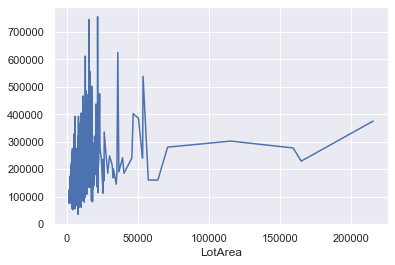

In [592]:
train_df.groupby('LotArea').SalePrice.mean().plot()

<AxesSubplot:xlabel='GrLivArea'>

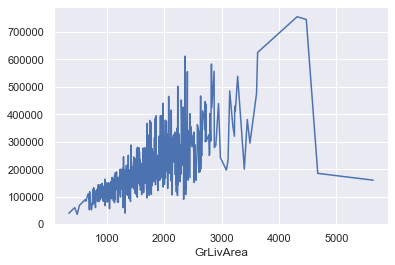

In [598]:
train_df.groupby('GrLivArea').SalePrice.mean().plot()

In [600]:
full_df['area_year']=full_df.GrLivArea*full_df.YearBuilt

In [607]:
full_df.drop('area_year',axis=1,inplace=True)

In [33]:
full_df['base_ground']=full_df.GrLivArea*full_df.BsmtFinSF1

In [627]:
showcoef(cat.feature_importances_)

             feat       coef
78      year_qual  17.833513
16    OverallQual  13.437217
77  garage_square   9.756086
45      GrLivArea   9.268752
79    base_ground   5.328762
76      area_qual   4.243433
4         LotArea   3.084780
60     GarageCars   2.575112
55     Fireplaces   2.113313
37    TotalBsmtSF   1.914580
29       BsmtQual   1.798613
43       2ndFlrSF   1.744112
42       1stFlrSF   1.679500
19   YearRemodAdd   1.676331
48       FullBath   1.506642


In [629]:
full_df

Id  MSSubClass  MSZoning  ...  garage_square  year_qual  base_ground
0        1          60         3  ...         1712.0      14021    1207260.0
1        2          20         3  ...         2524.0      11856    1234236.0
2        3          60         3  ...         1840.0      14007     867996.0
3        4          70         3  ...         2268.0      13405     370872.0
4        5          60         3  ...         3435.0      16000    1439690.0
...    ...         ...       ...  ...            ...        ...          ...
1454  2915         160         4  ...            0.0       7880          0.0
1455  2916         160         4  ...          546.0       7880     275184.0
1456  2917          20         3  ...         2448.0       9800    1498176.0
1457  2918          85         3  ...            0.0       9960     326890.0
1458  2919          60         3  ...         2988.0      13951    1516000.0

[2919 rows x 80 columns]

In [630]:
showcoef(cat.feature_importances_)

             feat       coef
78      year_qual  17.833513
16    OverallQual  13.437217
77  garage_square   9.756086
45      GrLivArea   9.268752
79    base_ground   5.328762
76      area_qual   4.243433
4         LotArea   3.084780
60     GarageCars   2.575112
55     Fireplaces   2.113313
37    TotalBsmtSF   1.914580
29       BsmtQual   1.798613
43       2ndFlrSF   1.744112
42       1stFlrSF   1.679500
19   YearRemodAdd   1.676331
48       FullBath   1.506642


In [29]:
full_df['fullar_qual']=full_df.LotArea*full_df.OverallQual

In [636]:
showcoef(cat.feature_importances_)

             feat       coef
16    OverallQual  16.448437
78      year_qual  13.812508
45      GrLivArea   9.766107
80    fullar_qual   6.636276
77  garage_square   6.623050
79    base_ground   6.144728
76      area_qual   2.553956
42       1stFlrSF   2.254710
60     GarageCars   2.223621
43       2ndFlrSF   2.034338
18      YearBuilt   1.973047
37    TotalBsmtSF   1.922917
52    KitchenQual   1.702181
55     Fireplaces   1.691042
61     GarageArea   1.673187


In [640]:
scale=StandardScaler()

In [642]:
full_df_scaled=full_df.copy()

In [644]:
full_df_scaled[['garage_square','year_qual','base_ground','fullar_qual']]=scale.fit_transform(full_df_scaled[['garage_square','year_qual','base_ground','fullar_qual']])

In [649]:
showcoef(cat.feature_importances_)

             feat       coef
16    OverallQual  16.448437
78      year_qual  13.812508
45      GrLivArea   9.766107
80    fullar_qual   6.636276
77  garage_square   6.623050
79    base_ground   6.144728
76      area_qual   2.553956
42       1stFlrSF   2.254710
60     GarageCars   2.223621
43       2ndFlrSF   2.034338
18      YearBuilt   1.973047
37    TotalBsmtSF   1.922917
52    KitchenQual   1.702181
55     Fireplaces   1.691042
61     GarageArea   1.673187


In [653]:
full_df['gararr_garcar']=full_df.GarageArea*full_df.GarageCars

In [652]:
full_df.GarageQual.unique()

array([4, 1, 2, 0, 3])

In [657]:
full_df.drop('gararr_garcar',axis=1,inplace=True)

In [667]:
full_df.drop('floars',axis=1,inplace=True)

In [674]:
full_df

Id  MSSubClass  MSZoning  ...  year_qual  base_ground  fullar_qual
0        1          60         3  ...      14021    1207260.0        59150
1        2          20         3  ...      11856    1234236.0        57600
2        3          60         3  ...      14007     867996.0        78750
3        4          70         3  ...      13405     370872.0        66850
4        5          60         3  ...      16000    1439690.0       114080
...    ...         ...       ...  ...        ...          ...          ...
1454  2915         160         4  ...       7880          0.0         7744
1455  2916         160         4  ...       7880     275184.0         7576
1456  2917          20         3  ...       9800    1498176.0       100000
1457  2918          85         3  ...       9960     326890.0        52205
1458  2919          60         3  ...      13951    1516000.0        67389

[2919 rows x 81 columns]

In [28]:
full_df['basement']=full_df.TotalBsmtSF*full_df.BsmtQual

In [680]:
showcoef(cat.feature_importances_)

             feat       coef
16    OverallQual  15.763984
78      year_qual  13.148542
45      GrLivArea  11.057400
80    fullar_qual   7.160047
77  garage_square   5.631795
79    base_ground   5.422244
76      area_qual   3.114998
60     GarageCars   2.745755
48       FullBath   2.181937
18      YearBuilt   2.112735
52    KitchenQual   2.054791
55     Fireplaces   1.978890
11   Neighborhood   1.926552
42       1stFlrSF   1.911069
61     GarageArea   1.898540
37    TotalBsmtSF   1.543949
19   YearRemodAdd   1.395887
53   TotRmsAbvGrd   1.389215
17    OverallCond   1.366019
43       2ndFlrSF   1.143251
59   GarageFinish   1.122104
33     BsmtFinSF1   0.942894
58    GarageYrBlt   0.913896
75  SaleCondition   0.866468
29       BsmtQual   0.814210


In [682]:
full_df['']

array([ 5, 24,  6, 15, 11, 21, 14, 17,  3, 19, 16, 12, 20,  9, 10,  7, 23,
        8, 22,  4, 13,  0,  2, 18,  1])

In [683]:
full_df.GrLivArea

0       1710
1       1262
2       1786
3       1717
4       2198
        ... 
1454    1092
1455    1092
1456    1224
1457     970
1458    2000
Name: GrLivArea, Length: 2919, dtype: int64

In [691]:
predict(full_df)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 12.2511629	test: 12.3702435	best: 12.3702435 (0)	total: 2.47ms	remaining: 244ms
1:	learn: 7.8845842	test: 7.8993160	best: 7.8993160 (1)	total: 4.32ms	remaining: 212ms
2:	learn: 5.8627553	test: 5.9054035	best: 5.9054035 (2)	total: 6.46ms	remaining: 209ms
3:	learn: 4.5898601	test: 4.6082167	best: 4.6082167 (3)	total: 9.01ms	remaining: 216ms
4:	learn: 3.7592361	test: 3.7782917	best: 3.7782917 (4)	total: 11.1ms	remaining: 211ms
5:	learn: 3.1415776	test: 3.1575388	best: 3.1575388 (5)	total: 13ms	remaining: 203ms
6:	learn: 2.6668791	test: 2.6782008	best: 2.6782008 (6)	total: 15ms	remaining: 200ms
7:	learn: 2.2967560	test: 2.2990553	best: 2.2990553 (7)	total: 17.7ms	remaining: 204ms
8:	learn: 1.9995036	test: 2.0024931	best: 2.0024931 (8)	total: 21.3ms	remaining: 216ms
9:	learn: 1.7514010	test: 1.7538502	best: 1.7538502 (9)	total: 25.1ms	remaining: 226ms
10:	learn: 1.5481350	test: 1.5494158	best: 1.5494158 (10)	total: 26.9ms	remaining: 218ms
11:	learn: 1.3725067	test: 1.3714815	best:

12:	learn: 1.2248237	test: 1.2215656	best: 1.2215656 (12)	total: 20.6ms	remaining: 455ms
13:	learn: 1.0989845	test: 1.0962867	best: 1.0962867 (13)	total: 22.5ms	remaining: 460ms
14:	learn: 0.9905299	test: 0.9872576	best: 0.9872576 (14)	total: 24ms	remaining: 455ms
15:	learn: 0.8950043	test: 0.8922687	best: 0.8922687 (15)	total: 25.8ms	remaining: 457ms
16:	learn: 0.8110206	test: 0.8070668	best: 0.8070668 (16)	total: 27.9ms	remaining: 465ms
17:	learn: 0.7361577	test: 0.7312417	best: 0.7312417 (17)	total: 29.6ms	remaining: 463ms
18:	learn: 0.6700971	test: 0.6654576	best: 0.6654576 (18)	total: 31.4ms	remaining: 465ms
19:	learn: 0.6125356	test: 0.6089823	best: 0.6089823 (19)	total: 33.1ms	remaining: 463ms
20:	learn: 0.5609455	test: 0.5570333	best: 0.5570333 (20)	total: 34.9ms	remaining: 464ms
21:	learn: 0.5148891	test: 0.5104987	best: 0.5104987 (21)	total: 36.2ms	remaining: 458ms
22:	learn: 0.4728062	test: 0.4690003	best: 0.4690003 (22)	total: 38.9ms	remaining: 469ms
23:	learn: 0.4355477	te

125:	learn: 0.0245984	test: 0.0201850	best: 0.0201850 (125)	total: 209ms	remaining: 289ms
126:	learn: 0.0245588	test: 0.0202021	best: 0.0201850 (125)	total: 211ms	remaining: 287ms
127:	learn: 0.0244866	test: 0.0201480	best: 0.0201480 (127)	total: 213ms	remaining: 286ms
128:	learn: 0.0244167	test: 0.0200971	best: 0.0200971 (128)	total: 215ms	remaining: 285ms
129:	learn: 0.0243707	test: 0.0200590	best: 0.0200590 (129)	total: 217ms	remaining: 284ms
130:	learn: 0.0243424	test: 0.0200442	best: 0.0200442 (130)	total: 219ms	remaining: 282ms
131:	learn: 0.0241623	test: 0.0199278	best: 0.0199278 (131)	total: 221ms	remaining: 281ms
132:	learn: 0.0240606	test: 0.0198444	best: 0.0198444 (132)	total: 223ms	remaining: 280ms
133:	learn: 0.0239820	test: 0.0197702	best: 0.0197702 (133)	total: 226ms	remaining: 280ms
134:	learn: 0.0238485	test: 0.0196196	best: 0.0196196 (134)	total: 227ms	remaining: 278ms
135:	learn: 0.0237599	test: 0.0195596	best: 0.0195596 (135)	total: 229ms	remaining: 277ms
136:	learn

234:	learn: 0.0167068	test: 0.0146155	best: 0.0146155 (234)	total: 401ms	remaining: 111ms
235:	learn: 0.0166897	test: 0.0146076	best: 0.0146076 (235)	total: 404ms	remaining: 109ms
236:	learn: 0.0165969	test: 0.0145539	best: 0.0145539 (236)	total: 406ms	remaining: 108ms
237:	learn: 0.0165283	test: 0.0145309	best: 0.0145309 (237)	total: 408ms	remaining: 106ms
238:	learn: 0.0164525	test: 0.0144598	best: 0.0144598 (238)	total: 411ms	remaining: 105ms
239:	learn: 0.0163645	test: 0.0143821	best: 0.0143821 (239)	total: 413ms	remaining: 103ms
240:	learn: 0.0162807	test: 0.0143275	best: 0.0143275 (240)	total: 415ms	remaining: 102ms
241:	learn: 0.0162067	test: 0.0142993	best: 0.0142993 (241)	total: 417ms	remaining: 100ms
242:	learn: 0.0161131	test: 0.0142197	best: 0.0142197 (242)	total: 420ms	remaining: 98.5ms
243:	learn: 0.0160552	test: 0.0141677	best: 0.0141677 (243)	total: 422ms	remaining: 96.8ms
244:	learn: 0.0160375	test: 0.0141659	best: 0.0141659 (244)	total: 424ms	remaining: 95.1ms
245:	le

46:	learn: 0.0974980	test: 0.0915825	best: 0.0915825 (46)	total: 71.5ms	remaining: 841ms
47:	learn: 0.0931009	test: 0.0871313	best: 0.0871313 (47)	total: 74ms	remaining: 851ms
48:	learn: 0.0887362	test: 0.0827909	best: 0.0827909 (48)	total: 75.3ms	remaining: 847ms
49:	learn: 0.0848551	test: 0.0788595	best: 0.0788595 (49)	total: 77.5ms	remaining: 852ms
50:	learn: 0.0811891	test: 0.0751851	best: 0.0751851 (50)	total: 79.8ms	remaining: 859ms
51:	learn: 0.0778140	test: 0.0717142	best: 0.0717142 (51)	total: 82.1ms	remaining: 865ms
52:	learn: 0.0746389	test: 0.0684761	best: 0.0684761 (52)	total: 84.2ms	remaining: 869ms
53:	learn: 0.0714699	test: 0.0653120	best: 0.0653120 (53)	total: 86.1ms	remaining: 871ms
54:	learn: 0.0686526	test: 0.0624993	best: 0.0624993 (54)	total: 88.5ms	remaining: 877ms
55:	learn: 0.0660576	test: 0.0598836	best: 0.0598836 (55)	total: 90.6ms	remaining: 881ms
56:	learn: 0.0636678	test: 0.0575216	best: 0.0575216 (56)	total: 92.3ms	remaining: 879ms
57:	learn: 0.0613776	te

154:	learn: 0.0219737	test: 0.0181788	best: 0.0181788 (154)	total: 260ms	remaining: 746ms
155:	learn: 0.0219257	test: 0.0181319	best: 0.0181319 (155)	total: 263ms	remaining: 749ms
156:	learn: 0.0218794	test: 0.0181258	best: 0.0181258 (156)	total: 265ms	remaining: 748ms
157:	learn: 0.0217626	test: 0.0180102	best: 0.0180102 (157)	total: 268ms	remaining: 749ms
158:	learn: 0.0216418	test: 0.0179460	best: 0.0179460 (158)	total: 270ms	remaining: 749ms
159:	learn: 0.0215188	test: 0.0178608	best: 0.0178608 (159)	total: 272ms	remaining: 749ms
160:	learn: 0.0213816	test: 0.0177599	best: 0.0177599 (160)	total: 274ms	remaining: 748ms
161:	learn: 0.0213065	test: 0.0177107	best: 0.0177107 (161)	total: 277ms	remaining: 750ms
162:	learn: 0.0211809	test: 0.0175885	best: 0.0175885 (162)	total: 279ms	remaining: 748ms
163:	learn: 0.0210774	test: 0.0175009	best: 0.0175009 (163)	total: 281ms	remaining: 747ms
164:	learn: 0.0210442	test: 0.0175027	best: 0.0175009 (163)	total: 284ms	remaining: 748ms
165:	learn

251:	learn: 0.0157505	test: 0.0140457	best: 0.0140457 (251)	total: 450ms	remaining: 622ms
252:	learn: 0.0157428	test: 0.0140451	best: 0.0140451 (252)	total: 453ms	remaining: 621ms
253:	learn: 0.0156772	test: 0.0140060	best: 0.0140060 (253)	total: 455ms	remaining: 620ms
254:	learn: 0.0156007	test: 0.0139266	best: 0.0139266 (254)	total: 458ms	remaining: 619ms
255:	learn: 0.0155930	test: 0.0139265	best: 0.0139265 (255)	total: 460ms	remaining: 618ms
256:	learn: 0.0155311	test: 0.0138905	best: 0.0138905 (256)	total: 463ms	remaining: 618ms
257:	learn: 0.0155171	test: 0.0138869	best: 0.0138869 (257)	total: 465ms	remaining: 616ms
258:	learn: 0.0154341	test: 0.0138101	best: 0.0138101 (258)	total: 468ms	remaining: 616ms
259:	learn: 0.0154205	test: 0.0138075	best: 0.0138075 (259)	total: 469ms	remaining: 613ms
260:	learn: 0.0153501	test: 0.0137659	best: 0.0137659 (260)	total: 471ms	remaining: 611ms
261:	learn: 0.0152714	test: 0.0137106	best: 0.0137106 (261)	total: 472ms	remaining: 608ms
262:	learn

348:	learn: 0.0126244	test: 0.0122693	best: 0.0122693 (348)	total: 695ms	remaining: 500ms
349:	learn: 0.0125713	test: 0.0122244	best: 0.0122244 (349)	total: 698ms	remaining: 499ms
350:	learn: 0.0125228	test: 0.0121790	best: 0.0121790 (350)	total: 702ms	remaining: 498ms
351:	learn: 0.0125183	test: 0.0121784	best: 0.0121784 (351)	total: 707ms	remaining: 498ms
352:	learn: 0.0124726	test: 0.0121780	best: 0.0121780 (352)	total: 711ms	remaining: 497ms
353:	learn: 0.0124675	test: 0.0121779	best: 0.0121779 (353)	total: 713ms	remaining: 495ms
354:	learn: 0.0124500	test: 0.0121776	best: 0.0121776 (354)	total: 714ms	remaining: 493ms
355:	learn: 0.0124459	test: 0.0121782	best: 0.0121776 (354)	total: 716ms	remaining: 491ms
356:	learn: 0.0124020	test: 0.0121353	best: 0.0121353 (356)	total: 718ms	remaining: 489ms
357:	learn: 0.0123968	test: 0.0121373	best: 0.0121353 (356)	total: 719ms	remaining: 486ms
358:	learn: 0.0123930	test: 0.0121380	best: 0.0121353 (356)	total: 721ms	remaining: 484ms
359:	learn

446:	learn: 0.0105480	test: 0.0114036	best: 0.0114036 (446)	total: 887ms	remaining: 304ms
447:	learn: 0.0105455	test: 0.0114038	best: 0.0114036 (446)	total: 889ms	remaining: 302ms
448:	learn: 0.0105193	test: 0.0114017	best: 0.0114017 (448)	total: 890ms	remaining: 299ms
449:	learn: 0.0105109	test: 0.0114066	best: 0.0114017 (448)	total: 892ms	remaining: 297ms
450:	learn: 0.0105016	test: 0.0114004	best: 0.0114004 (450)	total: 894ms	remaining: 296ms
451:	learn: 0.0104759	test: 0.0113925	best: 0.0113925 (451)	total: 897ms	remaining: 294ms
452:	learn: 0.0104436	test: 0.0113909	best: 0.0113909 (452)	total: 900ms	remaining: 292ms
453:	learn: 0.0104329	test: 0.0113913	best: 0.0113909 (452)	total: 902ms	remaining: 290ms
454:	learn: 0.0104079	test: 0.0113964	best: 0.0113909 (452)	total: 905ms	remaining: 288ms
455:	learn: 0.0103917	test: 0.0114017	best: 0.0113909 (452)	total: 906ms	remaining: 286ms
456:	learn: 0.0103904	test: 0.0114017	best: 0.0113909 (452)	total: 909ms	remaining: 284ms
457:	learn

547:	learn: 0.0089518	test: 0.0110750	best: 0.0110627 (527)	total: 1.08s	remaining: 102ms
548:	learn: 0.0089401	test: 0.0110709	best: 0.0110627 (527)	total: 1.08s	remaining: 100ms
549:	learn: 0.0089248	test: 0.0110726	best: 0.0110627 (527)	total: 1.08s	remaining: 98.2ms
550:	learn: 0.0089149	test: 0.0110688	best: 0.0110627 (527)	total: 1.08s	remaining: 96.2ms
551:	learn: 0.0089013	test: 0.0110634	best: 0.0110627 (527)	total: 1.08s	remaining: 94.3ms
552:	learn: 0.0088795	test: 0.0110421	best: 0.0110421 (552)	total: 1.09s	remaining: 92.4ms
553:	learn: 0.0088778	test: 0.0110421	best: 0.0110421 (553)	total: 1.09s	remaining: 90.5ms
554:	learn: 0.0088691	test: 0.0110321	best: 0.0110321 (554)	total: 1.09s	remaining: 88.6ms
555:	learn: 0.0088617	test: 0.0110257	best: 0.0110257 (555)	total: 1.09s	remaining: 86.7ms
556:	learn: 0.0088598	test: 0.0110255	best: 0.0110255 (556)	total: 1.1s	remaining: 84.7ms
557:	learn: 0.0088526	test: 0.0110276	best: 0.0110255 (556)	total: 1.1s	remaining: 82.8ms
558

50:	learn: 0.0811891	test: 0.0751851	best: 0.0751851 (50)	total: 91ms	remaining: 1.69s
51:	learn: 0.0778140	test: 0.0717142	best: 0.0717142 (51)	total: 93.4ms	remaining: 1.7s
52:	learn: 0.0746389	test: 0.0684761	best: 0.0684761 (52)	total: 95.4ms	remaining: 1.7s
53:	learn: 0.0714699	test: 0.0653120	best: 0.0653120 (53)	total: 97.3ms	remaining: 1.71s
54:	learn: 0.0686526	test: 0.0624993	best: 0.0624993 (54)	total: 100ms	remaining: 1.72s
55:	learn: 0.0660576	test: 0.0598836	best: 0.0598836 (55)	total: 103ms	remaining: 1.73s
56:	learn: 0.0636678	test: 0.0575216	best: 0.0575216 (56)	total: 104ms	remaining: 1.72s
57:	learn: 0.0613776	test: 0.0551271	best: 0.0551271 (57)	total: 105ms	remaining: 1.71s
58:	learn: 0.0590968	test: 0.0528886	best: 0.0528886 (58)	total: 107ms	remaining: 1.71s
59:	learn: 0.0569784	test: 0.0508854	best: 0.0508854 (59)	total: 109ms	remaining: 1.71s
60:	learn: 0.0552838	test: 0.0491370	best: 0.0491370 (60)	total: 111ms	remaining: 1.71s
61:	learn: 0.0537546	test: 0.047

161:	learn: 0.0213065	test: 0.0177107	best: 0.0177107 (161)	total: 283ms	remaining: 1.46s
162:	learn: 0.0211809	test: 0.0175885	best: 0.0175885 (162)	total: 285ms	remaining: 1.46s
163:	learn: 0.0210774	test: 0.0175009	best: 0.0175009 (163)	total: 286ms	remaining: 1.46s
164:	learn: 0.0210442	test: 0.0175027	best: 0.0175009 (163)	total: 288ms	remaining: 1.46s
165:	learn: 0.0209159	test: 0.0174240	best: 0.0174240 (165)	total: 289ms	remaining: 1.45s
166:	learn: 0.0207641	test: 0.0172973	best: 0.0172973 (166)	total: 291ms	remaining: 1.45s
167:	learn: 0.0207420	test: 0.0172967	best: 0.0172967 (167)	total: 293ms	remaining: 1.45s
168:	learn: 0.0206055	test: 0.0171957	best: 0.0171957 (168)	total: 294ms	remaining: 1.45s
169:	learn: 0.0204929	test: 0.0171111	best: 0.0171111 (169)	total: 296ms	remaining: 1.45s
170:	learn: 0.0203727	test: 0.0170184	best: 0.0170184 (170)	total: 298ms	remaining: 1.45s
171:	learn: 0.0202588	test: 0.0169237	best: 0.0169237 (171)	total: 300ms	remaining: 1.45s
172:	learn

264:	learn: 0.0151522	test: 0.0136602	best: 0.0136602 (264)	total: 473ms	remaining: 1.31s
265:	learn: 0.0151290	test: 0.0136616	best: 0.0136602 (264)	total: 475ms	remaining: 1.31s
266:	learn: 0.0151163	test: 0.0136570	best: 0.0136570 (266)	total: 476ms	remaining: 1.31s
267:	learn: 0.0150946	test: 0.0136514	best: 0.0136514 (267)	total: 478ms	remaining: 1.3s
268:	learn: 0.0150797	test: 0.0136509	best: 0.0136509 (268)	total: 480ms	remaining: 1.3s
269:	learn: 0.0150162	test: 0.0136328	best: 0.0136328 (269)	total: 481ms	remaining: 1.3s
270:	learn: 0.0149964	test: 0.0136343	best: 0.0136328 (269)	total: 484ms	remaining: 1.3s
271:	learn: 0.0149614	test: 0.0136054	best: 0.0136054 (271)	total: 485ms	remaining: 1.3s
272:	learn: 0.0149144	test: 0.0135559	best: 0.0135559 (272)	total: 487ms	remaining: 1.3s
273:	learn: 0.0148785	test: 0.0135230	best: 0.0135230 (273)	total: 489ms	remaining: 1.29s
274:	learn: 0.0147914	test: 0.0134811	best: 0.0134811 (274)	total: 491ms	remaining: 1.29s
275:	learn: 0.01

381:	learn: 0.0117640	test: 0.0118604	best: 0.0118604 (381)	total: 662ms	remaining: 1.07s
382:	learn: 0.0117358	test: 0.0118499	best: 0.0118499 (382)	total: 664ms	remaining: 1.07s
383:	learn: 0.0116969	test: 0.0118485	best: 0.0118485 (383)	total: 666ms	remaining: 1.07s
384:	learn: 0.0116873	test: 0.0118444	best: 0.0118444 (384)	total: 667ms	remaining: 1.06s
385:	learn: 0.0116550	test: 0.0118253	best: 0.0118253 (385)	total: 670ms	remaining: 1.06s
386:	learn: 0.0116199	test: 0.0118092	best: 0.0118092 (386)	total: 671ms	remaining: 1.06s
387:	learn: 0.0115927	test: 0.0117914	best: 0.0117914 (387)	total: 672ms	remaining: 1.06s
388:	learn: 0.0115609	test: 0.0117448	best: 0.0117448 (388)	total: 673ms	remaining: 1.06s
389:	learn: 0.0115487	test: 0.0117489	best: 0.0117448 (388)	total: 675ms	remaining: 1.05s
390:	learn: 0.0115445	test: 0.0117467	best: 0.0117448 (388)	total: 677ms	remaining: 1.05s
391:	learn: 0.0115404	test: 0.0117433	best: 0.0117433 (391)	total: 680ms	remaining: 1.05s
392:	learn

486:	learn: 0.0098406	test: 0.0112714	best: 0.0112669 (485)	total: 854ms	remaining: 899ms
487:	learn: 0.0098093	test: 0.0112778	best: 0.0112669 (485)	total: 855ms	remaining: 897ms
488:	learn: 0.0097910	test: 0.0112630	best: 0.0112630 (488)	total: 857ms	remaining: 896ms
489:	learn: 0.0097752	test: 0.0112675	best: 0.0112630 (488)	total: 859ms	remaining: 894ms
490:	learn: 0.0097578	test: 0.0112408	best: 0.0112408 (490)	total: 861ms	remaining: 893ms
491:	learn: 0.0097382	test: 0.0112481	best: 0.0112408 (490)	total: 863ms	remaining: 891ms
492:	learn: 0.0097291	test: 0.0112533	best: 0.0112408 (490)	total: 866ms	remaining: 890ms
493:	learn: 0.0097087	test: 0.0112352	best: 0.0112352 (493)	total: 868ms	remaining: 889ms
494:	learn: 0.0097006	test: 0.0112299	best: 0.0112299 (494)	total: 870ms	remaining: 887ms
495:	learn: 0.0096626	test: 0.0112027	best: 0.0112027 (495)	total: 872ms	remaining: 886ms
496:	learn: 0.0096602	test: 0.0112018	best: 0.0112018 (496)	total: 874ms	remaining: 885ms
497:	learn

595:	learn: 0.0084358	test: 0.0109273	best: 0.0109177 (593)	total: 1.04s	remaining: 708ms
596:	learn: 0.0084326	test: 0.0109283	best: 0.0109177 (593)	total: 1.05s	remaining: 707ms
597:	learn: 0.0084198	test: 0.0109272	best: 0.0109177 (593)	total: 1.05s	remaining: 705ms
598:	learn: 0.0084099	test: 0.0109271	best: 0.0109177 (593)	total: 1.05s	remaining: 704ms
599:	learn: 0.0083969	test: 0.0109234	best: 0.0109177 (593)	total: 1.05s	remaining: 702ms
600:	learn: 0.0083891	test: 0.0109253	best: 0.0109177 (593)	total: 1.05s	remaining: 701ms
601:	learn: 0.0083859	test: 0.0109262	best: 0.0109177 (593)	total: 1.06s	remaining: 700ms
602:	learn: 0.0083767	test: 0.0109264	best: 0.0109177 (593)	total: 1.06s	remaining: 699ms
603:	learn: 0.0083674	test: 0.0109293	best: 0.0109177 (593)	total: 1.06s	remaining: 697ms
604:	learn: 0.0083564	test: 0.0109228	best: 0.0109177 (593)	total: 1.06s	remaining: 695ms
605:	learn: 0.0083474	test: 0.0109265	best: 0.0109177 (593)	total: 1.07s	remaining: 693ms
606:	learn

696:	learn: 0.0074114	test: 0.0107297	best: 0.0107235 (692)	total: 1.23s	remaining: 537ms
697:	learn: 0.0074038	test: 0.0107270	best: 0.0107235 (692)	total: 1.24s	remaining: 535ms
698:	learn: 0.0074025	test: 0.0107288	best: 0.0107235 (692)	total: 1.24s	remaining: 534ms
699:	learn: 0.0073997	test: 0.0107211	best: 0.0107211 (699)	total: 1.24s	remaining: 532ms
700:	learn: 0.0073984	test: 0.0107202	best: 0.0107202 (700)	total: 1.24s	remaining: 530ms
701:	learn: 0.0073973	test: 0.0107220	best: 0.0107202 (700)	total: 1.25s	remaining: 529ms
702:	learn: 0.0073831	test: 0.0107225	best: 0.0107202 (700)	total: 1.25s	remaining: 528ms
703:	learn: 0.0073668	test: 0.0107109	best: 0.0107109 (703)	total: 1.25s	remaining: 526ms
704:	learn: 0.0073593	test: 0.0107122	best: 0.0107109 (703)	total: 1.25s	remaining: 524ms
705:	learn: 0.0073559	test: 0.0107211	best: 0.0107109 (703)	total: 1.25s	remaining: 523ms
706:	learn: 0.0073547	test: 0.0107204	best: 0.0107109 (703)	total: 1.26s	remaining: 521ms
707:	learn

814:	learn: 0.0065136	test: 0.0105938	best: 0.0105549 (795)	total: 1.42s	remaining: 323ms
815:	learn: 0.0065099	test: 0.0105936	best: 0.0105549 (795)	total: 1.43s	remaining: 322ms
816:	learn: 0.0065025	test: 0.0105901	best: 0.0105549 (795)	total: 1.43s	remaining: 320ms
817:	learn: 0.0064964	test: 0.0105905	best: 0.0105549 (795)	total: 1.43s	remaining: 318ms
818:	learn: 0.0064890	test: 0.0105874	best: 0.0105549 (795)	total: 1.43s	remaining: 316ms
819:	learn: 0.0064815	test: 0.0105820	best: 0.0105549 (795)	total: 1.43s	remaining: 315ms
820:	learn: 0.0064746	test: 0.0105854	best: 0.0105549 (795)	total: 1.43s	remaining: 313ms
821:	learn: 0.0064633	test: 0.0105883	best: 0.0105549 (795)	total: 1.44s	remaining: 311ms
822:	learn: 0.0064608	test: 0.0105915	best: 0.0105549 (795)	total: 1.44s	remaining: 309ms
823:	learn: 0.0064555	test: 0.0105903	best: 0.0105549 (795)	total: 1.44s	remaining: 308ms
824:	learn: 0.0064418	test: 0.0105891	best: 0.0105549 (795)	total: 1.44s	remaining: 306ms
825:	learn

928:	learn: 0.0057462	test: 0.0104406	best: 0.0104204 (911)	total: 1.62s	remaining: 124ms
929:	learn: 0.0057451	test: 0.0104402	best: 0.0104204 (911)	total: 1.62s	remaining: 122ms
930:	learn: 0.0057390	test: 0.0104368	best: 0.0104204 (911)	total: 1.62s	remaining: 120ms
931:	learn: 0.0057346	test: 0.0104367	best: 0.0104204 (911)	total: 1.62s	remaining: 119ms
932:	learn: 0.0057266	test: 0.0104346	best: 0.0104204 (911)	total: 1.63s	remaining: 117ms
933:	learn: 0.0057252	test: 0.0104322	best: 0.0104204 (911)	total: 1.63s	remaining: 115ms
934:	learn: 0.0057179	test: 0.0104308	best: 0.0104204 (911)	total: 1.63s	remaining: 113ms
935:	learn: 0.0057091	test: 0.0104310	best: 0.0104204 (911)	total: 1.63s	remaining: 112ms
936:	learn: 0.0057036	test: 0.0104296	best: 0.0104204 (911)	total: 1.63s	remaining: 110ms
937:	learn: 0.0056962	test: 0.0104308	best: 0.0104204 (911)	total: 1.64s	remaining: 108ms
938:	learn: 0.0056915	test: 0.0104333	best: 0.0104204 (911)	total: 1.64s	remaining: 106ms
939:	learn

41:	learn: 0.1279802	test: 0.1220766	best: 0.1220766 (41)	total: 68.1ms	remaining: 1.88s
42:	learn: 0.1208503	test: 0.1147835	best: 0.1147835 (42)	total: 70.6ms	remaining: 1.9s
43:	learn: 0.1139653	test: 0.1079005	best: 0.1079005 (43)	total: 72.6ms	remaining: 1.91s
44:	learn: 0.1081037	test: 0.1020708	best: 0.1020708 (44)	total: 74.4ms	remaining: 1.91s
45:	learn: 0.1026889	test: 0.0966201	best: 0.0966201 (45)	total: 76.1ms	remaining: 1.91s
46:	learn: 0.0974980	test: 0.0915825	best: 0.0915825 (46)	total: 78ms	remaining: 1.91s
47:	learn: 0.0931009	test: 0.0871313	best: 0.0871313 (47)	total: 80.4ms	remaining: 1.93s
48:	learn: 0.0887362	test: 0.0827909	best: 0.0827909 (48)	total: 82.9ms	remaining: 1.95s
49:	learn: 0.0848551	test: 0.0788595	best: 0.0788595 (49)	total: 84.4ms	remaining: 1.94s
50:	learn: 0.0811891	test: 0.0751851	best: 0.0751851 (50)	total: 86.1ms	remaining: 1.94s
51:	learn: 0.0778140	test: 0.0717142	best: 0.0717142 (51)	total: 87.5ms	remaining: 1.93s
52:	learn: 0.0746389	tes

155:	learn: 0.0219257	test: 0.0181319	best: 0.0181319 (155)	total: 257ms	remaining: 1.72s
156:	learn: 0.0218794	test: 0.0181258	best: 0.0181258 (156)	total: 259ms	remaining: 1.72s
157:	learn: 0.0217626	test: 0.0180102	best: 0.0180102 (157)	total: 261ms	remaining: 1.72s
158:	learn: 0.0216418	test: 0.0179460	best: 0.0179460 (158)	total: 262ms	remaining: 1.72s
159:	learn: 0.0215188	test: 0.0178608	best: 0.0178608 (159)	total: 265ms	remaining: 1.72s
160:	learn: 0.0213816	test: 0.0177599	best: 0.0177599 (160)	total: 267ms	remaining: 1.73s
161:	learn: 0.0213065	test: 0.0177107	best: 0.0177107 (161)	total: 270ms	remaining: 1.73s
162:	learn: 0.0211809	test: 0.0175885	best: 0.0175885 (162)	total: 271ms	remaining: 1.73s
163:	learn: 0.0210774	test: 0.0175009	best: 0.0175009 (163)	total: 273ms	remaining: 1.72s
164:	learn: 0.0210442	test: 0.0175027	best: 0.0175009 (163)	total: 275ms	remaining: 1.73s
165:	learn: 0.0209159	test: 0.0174240	best: 0.0174240 (165)	total: 277ms	remaining: 1.73s
166:	learn

272:	learn: 0.0149144	test: 0.0135559	best: 0.0135559 (272)	total: 449ms	remaining: 1.52s
273:	learn: 0.0148785	test: 0.0135230	best: 0.0135230 (273)	total: 450ms	remaining: 1.52s
274:	learn: 0.0147914	test: 0.0134811	best: 0.0134811 (274)	total: 452ms	remaining: 1.52s
275:	learn: 0.0147412	test: 0.0134526	best: 0.0134526 (275)	total: 453ms	remaining: 1.52s
276:	learn: 0.0147240	test: 0.0134434	best: 0.0134434 (276)	total: 455ms	remaining: 1.52s
277:	learn: 0.0147172	test: 0.0134415	best: 0.0134415 (277)	total: 457ms	remaining: 1.52s
278:	learn: 0.0147042	test: 0.0134234	best: 0.0134234 (278)	total: 459ms	remaining: 1.52s
279:	learn: 0.0146957	test: 0.0134252	best: 0.0134234 (278)	total: 462ms	remaining: 1.52s
280:	learn: 0.0146304	test: 0.0133718	best: 0.0133718 (280)	total: 464ms	remaining: 1.52s
281:	learn: 0.0145961	test: 0.0133448	best: 0.0133448 (281)	total: 466ms	remaining: 1.52s
282:	learn: 0.0145804	test: 0.0133394	best: 0.0133394 (282)	total: 468ms	remaining: 1.51s
283:	learn

372:	learn: 0.0120357	test: 0.0119866	best: 0.0119777 (370)	total: 640ms	remaining: 1.42s
373:	learn: 0.0119896	test: 0.0119306	best: 0.0119306 (373)	total: 642ms	remaining: 1.42s
374:	learn: 0.0119512	test: 0.0119122	best: 0.0119122 (374)	total: 643ms	remaining: 1.41s
375:	learn: 0.0119349	test: 0.0119157	best: 0.0119122 (374)	total: 644ms	remaining: 1.41s
376:	learn: 0.0119003	test: 0.0119127	best: 0.0119122 (374)	total: 646ms	remaining: 1.41s
377:	learn: 0.0118815	test: 0.0119202	best: 0.0119122 (374)	total: 648ms	remaining: 1.41s
378:	learn: 0.0118507	test: 0.0119111	best: 0.0119111 (378)	total: 650ms	remaining: 1.41s
379:	learn: 0.0118362	test: 0.0119156	best: 0.0119111 (378)	total: 652ms	remaining: 1.41s
380:	learn: 0.0117810	test: 0.0118833	best: 0.0118833 (380)	total: 654ms	remaining: 1.41s
381:	learn: 0.0117640	test: 0.0118604	best: 0.0118604 (381)	total: 656ms	remaining: 1.4s
382:	learn: 0.0117358	test: 0.0118499	best: 0.0118499 (382)	total: 658ms	remaining: 1.4s
383:	learn: 

483:	learn: 0.0099066	test: 0.0112925	best: 0.0112888 (482)	total: 830ms	remaining: 1.23s
484:	learn: 0.0098755	test: 0.0112724	best: 0.0112724 (484)	total: 833ms	remaining: 1.23s
485:	learn: 0.0098535	test: 0.0112669	best: 0.0112669 (485)	total: 834ms	remaining: 1.23s
486:	learn: 0.0098406	test: 0.0112714	best: 0.0112669 (485)	total: 837ms	remaining: 1.23s
487:	learn: 0.0098093	test: 0.0112778	best: 0.0112669 (485)	total: 840ms	remaining: 1.23s
488:	learn: 0.0097910	test: 0.0112630	best: 0.0112630 (488)	total: 842ms	remaining: 1.22s
489:	learn: 0.0097752	test: 0.0112675	best: 0.0112630 (488)	total: 845ms	remaining: 1.22s
490:	learn: 0.0097578	test: 0.0112408	best: 0.0112408 (490)	total: 847ms	remaining: 1.22s
491:	learn: 0.0097382	test: 0.0112481	best: 0.0112408 (490)	total: 849ms	remaining: 1.22s
492:	learn: 0.0097291	test: 0.0112533	best: 0.0112408 (490)	total: 850ms	remaining: 1.22s
493:	learn: 0.0097087	test: 0.0112352	best: 0.0112352 (493)	total: 853ms	remaining: 1.22s
494:	learn

592:	learn: 0.0084883	test: 0.0109368	best: 0.0109291 (582)	total: 1.02s	remaining: 1.04s
593:	learn: 0.0084654	test: 0.0109177	best: 0.0109177 (593)	total: 1.02s	remaining: 1.04s
594:	learn: 0.0084455	test: 0.0109233	best: 0.0109177 (593)	total: 1.02s	remaining: 1.04s
595:	learn: 0.0084358	test: 0.0109273	best: 0.0109177 (593)	total: 1.03s	remaining: 1.04s
596:	learn: 0.0084326	test: 0.0109283	best: 0.0109177 (593)	total: 1.03s	remaining: 1.04s
597:	learn: 0.0084198	test: 0.0109272	best: 0.0109177 (593)	total: 1.03s	remaining: 1.04s
598:	learn: 0.0084099	test: 0.0109271	best: 0.0109177 (593)	total: 1.03s	remaining: 1.04s
599:	learn: 0.0083969	test: 0.0109234	best: 0.0109177 (593)	total: 1.03s	remaining: 1.03s
600:	learn: 0.0083891	test: 0.0109253	best: 0.0109177 (593)	total: 1.04s	remaining: 1.03s
601:	learn: 0.0083859	test: 0.0109262	best: 0.0109177 (593)	total: 1.04s	remaining: 1.03s
602:	learn: 0.0083767	test: 0.0109264	best: 0.0109177 (593)	total: 1.04s	remaining: 1.03s
603:	learn

698:	learn: 0.0074025	test: 0.0107288	best: 0.0107235 (692)	total: 1.21s	remaining: 866ms
699:	learn: 0.0073997	test: 0.0107211	best: 0.0107211 (699)	total: 1.21s	remaining: 865ms
700:	learn: 0.0073984	test: 0.0107202	best: 0.0107202 (700)	total: 1.21s	remaining: 864ms
701:	learn: 0.0073973	test: 0.0107220	best: 0.0107202 (700)	total: 1.22s	remaining: 863ms
702:	learn: 0.0073831	test: 0.0107225	best: 0.0107202 (700)	total: 1.22s	remaining: 862ms
703:	learn: 0.0073668	test: 0.0107109	best: 0.0107109 (703)	total: 1.22s	remaining: 861ms
704:	learn: 0.0073593	test: 0.0107122	best: 0.0107109 (703)	total: 1.22s	remaining: 860ms
705:	learn: 0.0073559	test: 0.0107211	best: 0.0107109 (703)	total: 1.23s	remaining: 859ms
706:	learn: 0.0073547	test: 0.0107204	best: 0.0107109 (703)	total: 1.23s	remaining: 858ms
707:	learn: 0.0073535	test: 0.0107222	best: 0.0107109 (703)	total: 1.23s	remaining: 857ms
708:	learn: 0.0073457	test: 0.0107094	best: 0.0107094 (708)	total: 1.24s	remaining: 856ms
709:	learn

799:	learn: 0.0066314	test: 0.0105719	best: 0.0105549 (795)	total: 1.4s	remaining: 699ms
800:	learn: 0.0066253	test: 0.0105714	best: 0.0105549 (795)	total: 1.4s	remaining: 698ms
801:	learn: 0.0066223	test: 0.0105696	best: 0.0105549 (795)	total: 1.4s	remaining: 696ms
802:	learn: 0.0066084	test: 0.0105636	best: 0.0105549 (795)	total: 1.4s	remaining: 694ms
803:	learn: 0.0066052	test: 0.0105674	best: 0.0105549 (795)	total: 1.41s	remaining: 692ms
804:	learn: 0.0065989	test: 0.0105747	best: 0.0105549 (795)	total: 1.41s	remaining: 690ms
805:	learn: 0.0065914	test: 0.0105702	best: 0.0105549 (795)	total: 1.41s	remaining: 689ms
806:	learn: 0.0065799	test: 0.0105689	best: 0.0105549 (795)	total: 1.41s	remaining: 687ms
807:	learn: 0.0065737	test: 0.0105720	best: 0.0105549 (795)	total: 1.41s	remaining: 685ms
808:	learn: 0.0065615	test: 0.0105722	best: 0.0105549 (795)	total: 1.41s	remaining: 683ms
809:	learn: 0.0065565	test: 0.0105727	best: 0.0105549 (795)	total: 1.41s	remaining: 681ms
810:	learn: 0.

915:	learn: 0.0058326	test: 0.0104248	best: 0.0104204 (911)	total: 1.59s	remaining: 493ms
916:	learn: 0.0058230	test: 0.0104238	best: 0.0104204 (911)	total: 1.59s	remaining: 491ms
917:	learn: 0.0058163	test: 0.0104228	best: 0.0104204 (911)	total: 1.59s	remaining: 490ms
918:	learn: 0.0058106	test: 0.0104264	best: 0.0104204 (911)	total: 1.59s	remaining: 488ms
919:	learn: 0.0058092	test: 0.0104245	best: 0.0104204 (911)	total: 1.6s	remaining: 486ms
920:	learn: 0.0058015	test: 0.0104326	best: 0.0104204 (911)	total: 1.6s	remaining: 484ms
921:	learn: 0.0057902	test: 0.0104355	best: 0.0104204 (911)	total: 1.6s	remaining: 482ms
922:	learn: 0.0057841	test: 0.0104397	best: 0.0104204 (911)	total: 1.6s	remaining: 481ms
923:	learn: 0.0057796	test: 0.0104382	best: 0.0104204 (911)	total: 1.6s	remaining: 479ms
924:	learn: 0.0057662	test: 0.0104385	best: 0.0104204 (911)	total: 1.61s	remaining: 478ms
925:	learn: 0.0057597	test: 0.0104381	best: 0.0104204 (911)	total: 1.61s	remaining: 476ms
926:	learn: 0.0

1017:	learn: 0.0052616	test: 0.0103978	best: 0.0103756 (990)	total: 1.78s	remaining: 318ms
1018:	learn: 0.0052609	test: 0.0103974	best: 0.0103756 (990)	total: 1.78s	remaining: 317ms
1019:	learn: 0.0052572	test: 0.0103974	best: 0.0103756 (990)	total: 1.78s	remaining: 315ms
1020:	learn: 0.0052497	test: 0.0104002	best: 0.0103756 (990)	total: 1.79s	remaining: 313ms
1021:	learn: 0.0052473	test: 0.0104011	best: 0.0103756 (990)	total: 1.79s	remaining: 312ms
1022:	learn: 0.0052383	test: 0.0104059	best: 0.0103756 (990)	total: 1.79s	remaining: 310ms
1023:	learn: 0.0052315	test: 0.0104090	best: 0.0103756 (990)	total: 1.79s	remaining: 308ms
1024:	learn: 0.0052268	test: 0.0104082	best: 0.0103756 (990)	total: 1.79s	remaining: 306ms
1025:	learn: 0.0052236	test: 0.0104095	best: 0.0103756 (990)	total: 1.8s	remaining: 305ms
1026:	learn: 0.0052230	test: 0.0104085	best: 0.0103756 (990)	total: 1.8s	remaining: 303ms
1027:	learn: 0.0052183	test: 0.0104020	best: 0.0103756 (990)	total: 1.8s	remaining: 301ms
10

1129:	learn: 0.0047258	test: 0.0103612	best: 0.0103427 (1070)	total: 1.97s	remaining: 122ms
1130:	learn: 0.0047218	test: 0.0103630	best: 0.0103427 (1070)	total: 1.97s	remaining: 120ms
1131:	learn: 0.0047088	test: 0.0103626	best: 0.0103427 (1070)	total: 1.97s	remaining: 118ms
1132:	learn: 0.0046993	test: 0.0103651	best: 0.0103427 (1070)	total: 1.97s	remaining: 117ms
1133:	learn: 0.0046982	test: 0.0103653	best: 0.0103427 (1070)	total: 1.98s	remaining: 115ms
1134:	learn: 0.0046904	test: 0.0103623	best: 0.0103427 (1070)	total: 1.98s	remaining: 113ms
1135:	learn: 0.0046879	test: 0.0103623	best: 0.0103427 (1070)	total: 1.98s	remaining: 111ms
1136:	learn: 0.0046819	test: 0.0103614	best: 0.0103427 (1070)	total: 1.98s	remaining: 110ms
1137:	learn: 0.0046795	test: 0.0103643	best: 0.0103427 (1070)	total: 1.98s	remaining: 108ms
1138:	learn: 0.0046730	test: 0.0103586	best: 0.0103427 (1070)	total: 1.98s	remaining: 106ms
1139:	learn: 0.0046664	test: 0.0103613	best: 0.0103427 (1070)	total: 1.99s	remai

57:	learn: 0.0609808	test: 0.0596941	best: 0.0596941 (57)	total: 253ms	remaining: 183ms
58:	learn: 0.0585856	test: 0.0571784	best: 0.0571784 (58)	total: 257ms	remaining: 179ms
59:	learn: 0.0562191	test: 0.0547141	best: 0.0547141 (59)	total: 261ms	remaining: 174ms
60:	learn: 0.0542618	test: 0.0527655	best: 0.0527655 (60)	total: 265ms	remaining: 169ms
61:	learn: 0.0523341	test: 0.0509155	best: 0.0509155 (61)	total: 270ms	remaining: 165ms
62:	learn: 0.0505342	test: 0.0491317	best: 0.0491317 (62)	total: 273ms	remaining: 160ms
63:	learn: 0.0488650	test: 0.0474956	best: 0.0474956 (63)	total: 277ms	remaining: 156ms
64:	learn: 0.0473770	test: 0.0460119	best: 0.0460119 (64)	total: 280ms	remaining: 151ms
65:	learn: 0.0458554	test: 0.0443522	best: 0.0443522 (65)	total: 284ms	remaining: 146ms
66:	learn: 0.0445283	test: 0.0429335	best: 0.0429335 (66)	total: 288ms	remaining: 142ms
67:	learn: 0.0433092	test: 0.0416345	best: 0.0416345 (67)	total: 291ms	remaining: 137ms
68:	learn: 0.0420881	test: 0.040

89:	learn: 0.0278134	test: 0.0254081	best: 0.0254081 (89)	total: 237ms	remaining: 553ms
90:	learn: 0.0274265	test: 0.0249714	best: 0.0249714 (90)	total: 239ms	remaining: 549ms
91:	learn: 0.0269914	test: 0.0244388	best: 0.0244388 (91)	total: 241ms	remaining: 546ms
92:	learn: 0.0265884	test: 0.0240771	best: 0.0240771 (92)	total: 244ms	remaining: 543ms
93:	learn: 0.0262318	test: 0.0237488	best: 0.0237488 (93)	total: 247ms	remaining: 541ms
94:	learn: 0.0259613	test: 0.0235183	best: 0.0235183 (94)	total: 249ms	remaining: 538ms
95:	learn: 0.0255814	test: 0.0231411	best: 0.0231411 (95)	total: 253ms	remaining: 538ms
96:	learn: 0.0253106	test: 0.0229178	best: 0.0229178 (96)	total: 256ms	remaining: 536ms
97:	learn: 0.0250960	test: 0.0226783	best: 0.0226783 (97)	total: 259ms	remaining: 534ms
98:	learn: 0.0248009	test: 0.0223775	best: 0.0223775 (98)	total: 261ms	remaining: 530ms
99:	learn: 0.0245712	test: 0.0221332	best: 0.0221332 (99)	total: 263ms	remaining: 527ms
100:	learn: 0.0242946	test: 0.02

228:	learn: 0.0136205	test: 0.0138599	best: 0.0138599 (228)	total: 623ms	remaining: 193ms
229:	learn: 0.0135762	test: 0.0138323	best: 0.0138323 (229)	total: 626ms	remaining: 191ms
230:	learn: 0.0135381	test: 0.0138104	best: 0.0138104 (230)	total: 629ms	remaining: 188ms
231:	learn: 0.0134714	test: 0.0137955	best: 0.0137955 (231)	total: 631ms	remaining: 185ms
232:	learn: 0.0134527	test: 0.0137859	best: 0.0137859 (232)	total: 634ms	remaining: 182ms
233:	learn: 0.0134457	test: 0.0137794	best: 0.0137794 (233)	total: 638ms	remaining: 180ms
234:	learn: 0.0133687	test: 0.0137542	best: 0.0137542 (234)	total: 641ms	remaining: 177ms
235:	learn: 0.0132865	test: 0.0136959	best: 0.0136959 (235)	total: 643ms	remaining: 174ms
236:	learn: 0.0132618	test: 0.0136743	best: 0.0136743 (236)	total: 645ms	remaining: 172ms
237:	learn: 0.0132053	test: 0.0136286	best: 0.0136286 (237)	total: 648ms	remaining: 169ms
238:	learn: 0.0131555	test: 0.0136091	best: 0.0136091 (238)	total: 651ms	remaining: 166ms
239:	learn

54:	learn: 0.0691740	test: 0.0679962	best: 0.0679962 (54)	total: 188ms	remaining: 1.86s
55:	learn: 0.0661186	test: 0.0648618	best: 0.0648618 (55)	total: 192ms	remaining: 1.86s
56:	learn: 0.0633641	test: 0.0620932	best: 0.0620932 (56)	total: 194ms	remaining: 1.85s
57:	learn: 0.0609808	test: 0.0596941	best: 0.0596941 (57)	total: 196ms	remaining: 1.83s
58:	learn: 0.0585856	test: 0.0571784	best: 0.0571784 (58)	total: 199ms	remaining: 1.82s
59:	learn: 0.0562191	test: 0.0547141	best: 0.0547141 (59)	total: 201ms	remaining: 1.81s
60:	learn: 0.0542618	test: 0.0527655	best: 0.0527655 (60)	total: 204ms	remaining: 1.8s
61:	learn: 0.0523341	test: 0.0509155	best: 0.0509155 (61)	total: 207ms	remaining: 1.8s
62:	learn: 0.0505342	test: 0.0491317	best: 0.0491317 (62)	total: 211ms	remaining: 1.8s
63:	learn: 0.0488650	test: 0.0474956	best: 0.0474956 (63)	total: 214ms	remaining: 1.8s
64:	learn: 0.0473770	test: 0.0460119	best: 0.0460119 (64)	total: 217ms	remaining: 1.79s
65:	learn: 0.0458554	test: 0.0443522

195:	learn: 0.0153244	test: 0.0148519	best: 0.0148519 (195)	total: 583ms	remaining: 1.2s
196:	learn: 0.0152580	test: 0.0148027	best: 0.0148027 (196)	total: 586ms	remaining: 1.2s
197:	learn: 0.0152001	test: 0.0147678	best: 0.0147678 (197)	total: 590ms	remaining: 1.2s
198:	learn: 0.0151705	test: 0.0147632	best: 0.0147632 (198)	total: 594ms	remaining: 1.2s
199:	learn: 0.0150910	test: 0.0147069	best: 0.0147069 (199)	total: 596ms	remaining: 1.19s
200:	learn: 0.0150684	test: 0.0147064	best: 0.0147064 (200)	total: 599ms	remaining: 1.19s
201:	learn: 0.0149771	test: 0.0146256	best: 0.0146256 (201)	total: 601ms	remaining: 1.18s
202:	learn: 0.0149619	test: 0.0146208	best: 0.0146208 (202)	total: 604ms	remaining: 1.18s
203:	learn: 0.0149451	test: 0.0146146	best: 0.0146146 (203)	total: 608ms	remaining: 1.18s
204:	learn: 0.0149067	test: 0.0145859	best: 0.0145859 (204)	total: 611ms	remaining: 1.18s
205:	learn: 0.0148048	test: 0.0145114	best: 0.0145114 (205)	total: 614ms	remaining: 1.17s
206:	learn: 0.

328:	learn: 0.0099595	test: 0.0119091	best: 0.0119091 (328)	total: 968ms	remaining: 797ms
329:	learn: 0.0099203	test: 0.0119149	best: 0.0119091 (328)	total: 972ms	remaining: 795ms
330:	learn: 0.0099155	test: 0.0119144	best: 0.0119091 (328)	total: 974ms	remaining: 792ms
331:	learn: 0.0098778	test: 0.0119291	best: 0.0119091 (328)	total: 978ms	remaining: 789ms
332:	learn: 0.0098665	test: 0.0119243	best: 0.0119091 (328)	total: 980ms	remaining: 786ms
333:	learn: 0.0098335	test: 0.0119176	best: 0.0119091 (328)	total: 983ms	remaining: 783ms
334:	learn: 0.0097926	test: 0.0118936	best: 0.0118936 (334)	total: 986ms	remaining: 780ms
335:	learn: 0.0097878	test: 0.0118937	best: 0.0118936 (334)	total: 988ms	remaining: 776ms
336:	learn: 0.0097386	test: 0.0118796	best: 0.0118796 (336)	total: 990ms	remaining: 773ms
337:	learn: 0.0097260	test: 0.0118854	best: 0.0118796 (336)	total: 994ms	remaining: 770ms
338:	learn: 0.0096952	test: 0.0118536	best: 0.0118536 (338)	total: 998ms	remaining: 768ms
339:	learn

463:	learn: 0.0071067	test: 0.0113022	best: 0.0113022 (463)	total: 1.36s	remaining: 400ms
464:	learn: 0.0070945	test: 0.0113051	best: 0.0113022 (463)	total: 1.38s	remaining: 400ms
465:	learn: 0.0070930	test: 0.0113056	best: 0.0113022 (463)	total: 1.38s	remaining: 397ms
466:	learn: 0.0070716	test: 0.0113068	best: 0.0113022 (463)	total: 1.39s	remaining: 395ms
467:	learn: 0.0070640	test: 0.0113052	best: 0.0113022 (463)	total: 1.39s	remaining: 392ms
468:	learn: 0.0070626	test: 0.0113056	best: 0.0113022 (463)	total: 1.39s	remaining: 388ms
469:	learn: 0.0070494	test: 0.0112982	best: 0.0112982 (469)	total: 1.39s	remaining: 385ms
470:	learn: 0.0070480	test: 0.0113003	best: 0.0112982 (469)	total: 1.4s	remaining: 382ms
471:	learn: 0.0070207	test: 0.0113051	best: 0.0112982 (469)	total: 1.4s	remaining: 379ms
472:	learn: 0.0070103	test: 0.0113063	best: 0.0112982 (469)	total: 1.4s	remaining: 377ms
473:	learn: 0.0070031	test: 0.0113082	best: 0.0112982 (469)	total: 1.41s	remaining: 374ms
474:	learn: 0

593:	learn: 0.0054446	test: 0.0109970	best: 0.0109938 (585)	total: 1.75s	remaining: 17.7ms
594:	learn: 0.0054339	test: 0.0109988	best: 0.0109938 (585)	total: 1.76s	remaining: 14.8ms
595:	learn: 0.0054060	test: 0.0110022	best: 0.0109938 (585)	total: 1.76s	remaining: 11.8ms
596:	learn: 0.0054046	test: 0.0110025	best: 0.0109938 (585)	total: 1.76s	remaining: 8.86ms
597:	learn: 0.0053858	test: 0.0110022	best: 0.0109938 (585)	total: 1.77s	remaining: 5.91ms
598:	learn: 0.0053761	test: 0.0110089	best: 0.0109938 (585)	total: 1.77s	remaining: 2.95ms
599:	learn: 0.0053675	test: 0.0110069	best: 0.0109938 (585)	total: 1.77s	remaining: 0us

bestTest = 0.01099380344
bestIteration = 585

7:	loss: 0.0109938	best: 0.0103153 (4)	total: 9.2s	remaining: 13.8s
0:	learn: 12.4029748	test: 13.1285120	best: 13.1285120 (0)	total: 3.04ms	remaining: 3.04s
1:	learn: 8.0527175	test: 8.1474739	best: 8.1474739 (1)	total: 6ms	remaining: 2.99s
2:	learn: 5.9577933	test: 6.0369046	best: 6.0369046 (2)	total: 8.91ms	remaini

131:	learn: 0.0199523	test: 0.0179931	best: 0.0179931 (131)	total: 371ms	remaining: 2.44s
132:	learn: 0.0198724	test: 0.0179282	best: 0.0179282 (132)	total: 376ms	remaining: 2.45s
133:	learn: 0.0198137	test: 0.0178521	best: 0.0178521 (133)	total: 378ms	remaining: 2.44s
134:	learn: 0.0196345	test: 0.0177230	best: 0.0177230 (134)	total: 381ms	remaining: 2.44s
135:	learn: 0.0195849	test: 0.0176796	best: 0.0176796 (135)	total: 384ms	remaining: 2.44s
136:	learn: 0.0194787	test: 0.0175969	best: 0.0175969 (136)	total: 386ms	remaining: 2.43s
137:	learn: 0.0194257	test: 0.0175569	best: 0.0175569 (137)	total: 389ms	remaining: 2.43s
138:	learn: 0.0193354	test: 0.0174868	best: 0.0174868 (138)	total: 393ms	remaining: 2.43s
139:	learn: 0.0192528	test: 0.0174260	best: 0.0174260 (139)	total: 395ms	remaining: 2.43s
140:	learn: 0.0191415	test: 0.0173455	best: 0.0173455 (140)	total: 398ms	remaining: 2.42s
141:	learn: 0.0190512	test: 0.0172926	best: 0.0172926 (141)	total: 401ms	remaining: 2.42s
142:	learn

260:	learn: 0.0121783	test: 0.0130903	best: 0.0130903 (260)	total: 766ms	remaining: 2.17s
261:	learn: 0.0121053	test: 0.0130324	best: 0.0130324 (261)	total: 769ms	remaining: 2.17s
262:	learn: 0.0120486	test: 0.0129891	best: 0.0129891 (262)	total: 772ms	remaining: 2.16s
263:	learn: 0.0120007	test: 0.0129795	best: 0.0129795 (263)	total: 774ms	remaining: 2.16s
264:	learn: 0.0119500	test: 0.0129280	best: 0.0129280 (264)	total: 778ms	remaining: 2.16s
265:	learn: 0.0118899	test: 0.0128747	best: 0.0128747 (265)	total: 780ms	remaining: 2.15s
266:	learn: 0.0118284	test: 0.0128372	best: 0.0128372 (266)	total: 782ms	remaining: 2.15s
267:	learn: 0.0118246	test: 0.0128340	best: 0.0128340 (267)	total: 785ms	remaining: 2.14s
268:	learn: 0.0118168	test: 0.0128322	best: 0.0128322 (268)	total: 787ms	remaining: 2.14s
269:	learn: 0.0117983	test: 0.0128344	best: 0.0128322 (268)	total: 790ms	remaining: 2.13s
270:	learn: 0.0117735	test: 0.0128293	best: 0.0128293 (270)	total: 792ms	remaining: 2.13s
271:	learn

398:	learn: 0.0082949	test: 0.0114619	best: 0.0114619 (398)	total: 1.16s	remaining: 1.74s
399:	learn: 0.0082933	test: 0.0114632	best: 0.0114619 (398)	total: 1.16s	remaining: 1.74s
400:	learn: 0.0082548	test: 0.0114674	best: 0.0114619 (398)	total: 1.16s	remaining: 1.74s
401:	learn: 0.0082447	test: 0.0114673	best: 0.0114619 (398)	total: 1.17s	remaining: 1.73s
402:	learn: 0.0082172	test: 0.0114622	best: 0.0114619 (398)	total: 1.17s	remaining: 1.73s
403:	learn: 0.0082023	test: 0.0114514	best: 0.0114514 (403)	total: 1.17s	remaining: 1.73s
404:	learn: 0.0082003	test: 0.0114517	best: 0.0114514 (403)	total: 1.17s	remaining: 1.73s
405:	learn: 0.0081979	test: 0.0114510	best: 0.0114510 (405)	total: 1.18s	remaining: 1.72s
406:	learn: 0.0081728	test: 0.0114540	best: 0.0114510 (405)	total: 1.18s	remaining: 1.72s
407:	learn: 0.0081697	test: 0.0114532	best: 0.0114510 (405)	total: 1.18s	remaining: 1.72s
408:	learn: 0.0081319	test: 0.0114571	best: 0.0114510 (405)	total: 1.19s	remaining: 1.71s
409:	learn

535:	learn: 0.0061500	test: 0.0111347	best: 0.0111320 (534)	total: 1.55s	remaining: 1.34s
536:	learn: 0.0061475	test: 0.0111323	best: 0.0111320 (534)	total: 1.55s	remaining: 1.34s
537:	learn: 0.0061462	test: 0.0111351	best: 0.0111320 (534)	total: 1.55s	remaining: 1.33s
538:	learn: 0.0061259	test: 0.0111406	best: 0.0111320 (534)	total: 1.56s	remaining: 1.33s
539:	learn: 0.0061088	test: 0.0111372	best: 0.0111320 (534)	total: 1.56s	remaining: 1.33s
540:	learn: 0.0061013	test: 0.0111378	best: 0.0111320 (534)	total: 1.56s	remaining: 1.32s
541:	learn: 0.0060926	test: 0.0111353	best: 0.0111320 (534)	total: 1.56s	remaining: 1.32s
542:	learn: 0.0060791	test: 0.0111434	best: 0.0111320 (534)	total: 1.57s	remaining: 1.32s
543:	learn: 0.0060593	test: 0.0111284	best: 0.0111284 (543)	total: 1.57s	remaining: 1.32s
544:	learn: 0.0060418	test: 0.0111228	best: 0.0111228 (544)	total: 1.57s	remaining: 1.31s
545:	learn: 0.0060262	test: 0.0111226	best: 0.0111226 (545)	total: 1.57s	remaining: 1.31s
546:	learn

679:	learn: 0.0046194	test: 0.0109715	best: 0.0109614 (670)	total: 1.93s	remaining: 910ms
680:	learn: 0.0046095	test: 0.0109730	best: 0.0109614 (670)	total: 1.94s	remaining: 907ms
681:	learn: 0.0045995	test: 0.0109731	best: 0.0109614 (670)	total: 1.94s	remaining: 905ms
682:	learn: 0.0045945	test: 0.0109696	best: 0.0109614 (670)	total: 1.94s	remaining: 902ms
683:	learn: 0.0045784	test: 0.0109694	best: 0.0109614 (670)	total: 1.95s	remaining: 899ms
684:	learn: 0.0045771	test: 0.0109695	best: 0.0109614 (670)	total: 1.95s	remaining: 896ms
685:	learn: 0.0045625	test: 0.0109657	best: 0.0109614 (670)	total: 1.95s	remaining: 893ms
686:	learn: 0.0045541	test: 0.0109713	best: 0.0109614 (670)	total: 1.95s	remaining: 891ms
687:	learn: 0.0045510	test: 0.0109703	best: 0.0109614 (670)	total: 1.96s	remaining: 887ms
688:	learn: 0.0045460	test: 0.0109735	best: 0.0109614 (670)	total: 1.96s	remaining: 884ms
689:	learn: 0.0045335	test: 0.0109711	best: 0.0109614 (670)	total: 1.96s	remaining: 881ms
690:	learn

824:	learn: 0.0034273	test: 0.0108360	best: 0.0108289 (818)	total: 2.33s	remaining: 494ms
825:	learn: 0.0034169	test: 0.0108405	best: 0.0108289 (818)	total: 2.33s	remaining: 491ms
826:	learn: 0.0034068	test: 0.0108394	best: 0.0108289 (818)	total: 2.33s	remaining: 488ms
827:	learn: 0.0034005	test: 0.0108400	best: 0.0108289 (818)	total: 2.33s	remaining: 485ms
828:	learn: 0.0034002	test: 0.0108401	best: 0.0108289 (818)	total: 2.34s	remaining: 482ms
829:	learn: 0.0033924	test: 0.0108390	best: 0.0108289 (818)	total: 2.34s	remaining: 480ms
830:	learn: 0.0033833	test: 0.0108343	best: 0.0108289 (818)	total: 2.34s	remaining: 477ms
831:	learn: 0.0033776	test: 0.0108322	best: 0.0108289 (818)	total: 2.35s	remaining: 474ms
832:	learn: 0.0033753	test: 0.0108319	best: 0.0108289 (818)	total: 2.35s	remaining: 471ms
833:	learn: 0.0033738	test: 0.0108305	best: 0.0108289 (818)	total: 2.35s	remaining: 468ms
834:	learn: 0.0033720	test: 0.0108338	best: 0.0108289 (818)	total: 2.35s	remaining: 466ms
835:	learn

968:	learn: 0.0026058	test: 0.0108736	best: 0.0108289 (818)	total: 2.72s	remaining: 86.9ms
969:	learn: 0.0026017	test: 0.0108749	best: 0.0108289 (818)	total: 2.72s	remaining: 84.2ms
970:	learn: 0.0025939	test: 0.0108765	best: 0.0108289 (818)	total: 2.72s	remaining: 81.4ms
971:	learn: 0.0025934	test: 0.0108774	best: 0.0108289 (818)	total: 2.73s	remaining: 78.6ms
972:	learn: 0.0025815	test: 0.0108708	best: 0.0108289 (818)	total: 2.73s	remaining: 75.7ms
973:	learn: 0.0025811	test: 0.0108703	best: 0.0108289 (818)	total: 2.73s	remaining: 73ms
974:	learn: 0.0025752	test: 0.0108635	best: 0.0108289 (818)	total: 2.73s	remaining: 70.1ms
975:	learn: 0.0025647	test: 0.0108583	best: 0.0108289 (818)	total: 2.74s	remaining: 67.3ms
976:	learn: 0.0025640	test: 0.0108580	best: 0.0108289 (818)	total: 2.74s	remaining: 64.5ms
977:	learn: 0.0025607	test: 0.0108577	best: 0.0108289 (818)	total: 2.74s	remaining: 61.7ms
978:	learn: 0.0025547	test: 0.0108583	best: 0.0108289 (818)	total: 2.75s	remaining: 58.9ms
9

112:	learn: 0.0219460	test: 0.0197689	best: 0.0197689 (112)	total: 300ms	remaining: 2.88s
113:	learn: 0.0218126	test: 0.0196500	best: 0.0196500 (113)	total: 303ms	remaining: 2.88s
114:	learn: 0.0217048	test: 0.0195618	best: 0.0195618 (114)	total: 306ms	remaining: 2.88s
115:	learn: 0.0216071	test: 0.0194574	best: 0.0194574 (115)	total: 308ms	remaining: 2.88s
116:	learn: 0.0214862	test: 0.0193562	best: 0.0193562 (116)	total: 312ms	remaining: 2.89s
117:	learn: 0.0214120	test: 0.0192825	best: 0.0192825 (117)	total: 315ms	remaining: 2.88s
118:	learn: 0.0212173	test: 0.0191201	best: 0.0191201 (118)	total: 317ms	remaining: 2.88s
119:	learn: 0.0210573	test: 0.0189723	best: 0.0189723 (119)	total: 319ms	remaining: 2.87s
120:	learn: 0.0209015	test: 0.0188349	best: 0.0188349 (120)	total: 322ms	remaining: 2.87s
121:	learn: 0.0208423	test: 0.0187919	best: 0.0187919 (121)	total: 324ms	remaining: 2.86s
122:	learn: 0.0207676	test: 0.0187203	best: 0.0187203 (122)	total: 327ms	remaining: 2.87s
123:	learn

258:	learn: 0.0122503	test: 0.0131373	best: 0.0131373 (258)	total: 692ms	remaining: 2.51s
259:	learn: 0.0121937	test: 0.0131034	best: 0.0131034 (259)	total: 695ms	remaining: 2.51s
260:	learn: 0.0121783	test: 0.0130903	best: 0.0130903 (260)	total: 698ms	remaining: 2.51s
261:	learn: 0.0121053	test: 0.0130324	best: 0.0130324 (261)	total: 700ms	remaining: 2.51s
262:	learn: 0.0120486	test: 0.0129891	best: 0.0129891 (262)	total: 703ms	remaining: 2.5s
263:	learn: 0.0120007	test: 0.0129795	best: 0.0129795 (263)	total: 705ms	remaining: 2.5s
264:	learn: 0.0119500	test: 0.0129280	best: 0.0129280 (264)	total: 708ms	remaining: 2.5s
265:	learn: 0.0118899	test: 0.0128747	best: 0.0128747 (265)	total: 711ms	remaining: 2.5s
266:	learn: 0.0118284	test: 0.0128372	best: 0.0128372 (266)	total: 714ms	remaining: 2.5s
267:	learn: 0.0118246	test: 0.0128340	best: 0.0128340 (267)	total: 717ms	remaining: 2.49s
268:	learn: 0.0118168	test: 0.0128322	best: 0.0128322 (268)	total: 719ms	remaining: 2.49s
269:	learn: 0.0

399:	learn: 0.0082933	test: 0.0114632	best: 0.0114619 (398)	total: 1.08s	remaining: 2.16s
400:	learn: 0.0082548	test: 0.0114674	best: 0.0114619 (398)	total: 1.08s	remaining: 2.15s
401:	learn: 0.0082447	test: 0.0114673	best: 0.0114619 (398)	total: 1.08s	remaining: 2.15s
402:	learn: 0.0082172	test: 0.0114622	best: 0.0114619 (398)	total: 1.09s	remaining: 2.15s
403:	learn: 0.0082023	test: 0.0114514	best: 0.0114514 (403)	total: 1.09s	remaining: 2.14s
404:	learn: 0.0082003	test: 0.0114517	best: 0.0114514 (403)	total: 1.09s	remaining: 2.14s
405:	learn: 0.0081979	test: 0.0114510	best: 0.0114510 (405)	total: 1.09s	remaining: 2.14s
406:	learn: 0.0081728	test: 0.0114540	best: 0.0114510 (405)	total: 1.1s	remaining: 2.14s
407:	learn: 0.0081697	test: 0.0114532	best: 0.0114510 (405)	total: 1.1s	remaining: 2.14s
408:	learn: 0.0081319	test: 0.0114571	best: 0.0114510 (405)	total: 1.1s	remaining: 2.13s
409:	learn: 0.0081076	test: 0.0114542	best: 0.0114510 (405)	total: 1.1s	remaining: 2.13s
410:	learn: 0.

535:	learn: 0.0061500	test: 0.0111347	best: 0.0111320 (534)	total: 1.47s	remaining: 1.82s
536:	learn: 0.0061475	test: 0.0111323	best: 0.0111320 (534)	total: 1.47s	remaining: 1.81s
537:	learn: 0.0061462	test: 0.0111351	best: 0.0111320 (534)	total: 1.47s	remaining: 1.81s
538:	learn: 0.0061259	test: 0.0111406	best: 0.0111320 (534)	total: 1.48s	remaining: 1.81s
539:	learn: 0.0061088	test: 0.0111372	best: 0.0111320 (534)	total: 1.48s	remaining: 1.81s
540:	learn: 0.0061013	test: 0.0111378	best: 0.0111320 (534)	total: 1.48s	remaining: 1.8s
541:	learn: 0.0060926	test: 0.0111353	best: 0.0111320 (534)	total: 1.48s	remaining: 1.8s
542:	learn: 0.0060791	test: 0.0111434	best: 0.0111320 (534)	total: 1.49s	remaining: 1.8s
543:	learn: 0.0060593	test: 0.0111284	best: 0.0111284 (543)	total: 1.49s	remaining: 1.8s
544:	learn: 0.0060418	test: 0.0111228	best: 0.0111228 (544)	total: 1.49s	remaining: 1.79s
545:	learn: 0.0060262	test: 0.0111226	best: 0.0111226 (545)	total: 1.5s	remaining: 1.79s
546:	learn: 0.0

674:	learn: 0.0046427	test: 0.0109643	best: 0.0109614 (670)	total: 1.86s	remaining: 1.45s
675:	learn: 0.0046404	test: 0.0109636	best: 0.0109614 (670)	total: 1.86s	remaining: 1.44s
676:	learn: 0.0046304	test: 0.0109706	best: 0.0109614 (670)	total: 1.86s	remaining: 1.44s
677:	learn: 0.0046240	test: 0.0109674	best: 0.0109614 (670)	total: 1.87s	remaining: 1.44s
678:	learn: 0.0046222	test: 0.0109688	best: 0.0109614 (670)	total: 1.87s	remaining: 1.44s
679:	learn: 0.0046194	test: 0.0109715	best: 0.0109614 (670)	total: 1.87s	remaining: 1.43s
680:	learn: 0.0046095	test: 0.0109730	best: 0.0109614 (670)	total: 1.88s	remaining: 1.43s
681:	learn: 0.0045995	test: 0.0109731	best: 0.0109614 (670)	total: 1.88s	remaining: 1.43s
682:	learn: 0.0045945	test: 0.0109696	best: 0.0109614 (670)	total: 1.88s	remaining: 1.42s
683:	learn: 0.0045784	test: 0.0109694	best: 0.0109614 (670)	total: 1.89s	remaining: 1.42s
684:	learn: 0.0045771	test: 0.0109695	best: 0.0109614 (670)	total: 1.89s	remaining: 1.42s
685:	learn

816:	learn: 0.0034911	test: 0.0108334	best: 0.0108322 (814)	total: 2.25s	remaining: 1.05s
817:	learn: 0.0034781	test: 0.0108319	best: 0.0108319 (817)	total: 2.25s	remaining: 1.05s
818:	learn: 0.0034722	test: 0.0108289	best: 0.0108289 (818)	total: 2.25s	remaining: 1.05s
819:	learn: 0.0034587	test: 0.0108334	best: 0.0108289 (818)	total: 2.26s	remaining: 1.05s
820:	learn: 0.0034484	test: 0.0108343	best: 0.0108289 (818)	total: 2.26s	remaining: 1.04s
821:	learn: 0.0034414	test: 0.0108343	best: 0.0108289 (818)	total: 2.26s	remaining: 1.04s
822:	learn: 0.0034357	test: 0.0108387	best: 0.0108289 (818)	total: 2.27s	remaining: 1.04s
823:	learn: 0.0034288	test: 0.0108355	best: 0.0108289 (818)	total: 2.27s	remaining: 1.03s
824:	learn: 0.0034273	test: 0.0108360	best: 0.0108289 (818)	total: 2.27s	remaining: 1.03s
825:	learn: 0.0034169	test: 0.0108405	best: 0.0108289 (818)	total: 2.27s	remaining: 1.03s
826:	learn: 0.0034068	test: 0.0108394	best: 0.0108289 (818)	total: 2.27s	remaining: 1.03s
827:	learn

962:	learn: 0.0026502	test: 0.0108587	best: 0.0108289 (818)	total: 2.64s	remaining: 649ms
963:	learn: 0.0026427	test: 0.0108653	best: 0.0108289 (818)	total: 2.64s	remaining: 647ms
964:	learn: 0.0026366	test: 0.0108686	best: 0.0108289 (818)	total: 2.64s	remaining: 644ms
965:	learn: 0.0026294	test: 0.0108736	best: 0.0108289 (818)	total: 2.65s	remaining: 641ms
966:	learn: 0.0026241	test: 0.0108754	best: 0.0108289 (818)	total: 2.65s	remaining: 638ms
967:	learn: 0.0026136	test: 0.0108719	best: 0.0108289 (818)	total: 2.65s	remaining: 636ms
968:	learn: 0.0026058	test: 0.0108736	best: 0.0108289 (818)	total: 2.65s	remaining: 633ms
969:	learn: 0.0026017	test: 0.0108749	best: 0.0108289 (818)	total: 2.66s	remaining: 630ms
970:	learn: 0.0025939	test: 0.0108765	best: 0.0108289 (818)	total: 2.66s	remaining: 628ms
971:	learn: 0.0025934	test: 0.0108774	best: 0.0108289 (818)	total: 2.66s	remaining: 625ms
972:	learn: 0.0025815	test: 0.0108708	best: 0.0108289 (818)	total: 2.67s	remaining: 622ms
973:	learn

1104:	learn: 0.0019817	test: 0.0108279	best: 0.0108279 (1104)	total: 3.02s	remaining: 260ms
1105:	learn: 0.0019794	test: 0.0108254	best: 0.0108254 (1105)	total: 3.03s	remaining: 257ms
1106:	learn: 0.0019788	test: 0.0108252	best: 0.0108252 (1106)	total: 3.03s	remaining: 255ms
1107:	learn: 0.0019754	test: 0.0108253	best: 0.0108252 (1106)	total: 3.03s	remaining: 252ms
1108:	learn: 0.0019674	test: 0.0108345	best: 0.0108252 (1106)	total: 3.04s	remaining: 249ms
1109:	learn: 0.0019582	test: 0.0108332	best: 0.0108252 (1106)	total: 3.04s	remaining: 246ms
1110:	learn: 0.0019540	test: 0.0108350	best: 0.0108252 (1106)	total: 3.04s	remaining: 244ms
1111:	learn: 0.0019499	test: 0.0108318	best: 0.0108252 (1106)	total: 3.04s	remaining: 241ms
1112:	learn: 0.0019489	test: 0.0108318	best: 0.0108252 (1106)	total: 3.05s	remaining: 238ms
1113:	learn: 0.0019467	test: 0.0108295	best: 0.0108252 (1106)	total: 3.05s	remaining: 235ms
1114:	learn: 0.0019459	test: 0.0108313	best: 0.0108252 (1106)	total: 3.05s	remai

26:	learn: 0.4180241	test: 0.4573589	best: 0.4573589 (26)	total: 140ms	remaining: 378ms
27:	learn: 0.3883024	test: 0.4258804	best: 0.4258804 (27)	total: 144ms	remaining: 370ms
28:	learn: 0.3611231	test: 0.3972734	best: 0.3972734 (28)	total: 150ms	remaining: 367ms
29:	learn: 0.3359338	test: 0.3703494	best: 0.3703494 (29)	total: 154ms	remaining: 360ms
30:	learn: 0.3139480	test: 0.3460600	best: 0.3460600 (30)	total: 159ms	remaining: 354ms
31:	learn: 0.2927717	test: 0.3227128	best: 0.3227128 (31)	total: 165ms	remaining: 352ms
32:	learn: 0.2730292	test: 0.3009078	best: 0.3009078 (32)	total: 170ms	remaining: 345ms
33:	learn: 0.2558938	test: 0.2828301	best: 0.2828301 (33)	total: 175ms	remaining: 339ms
34:	learn: 0.2397979	test: 0.2650672	best: 0.2650672 (34)	total: 179ms	remaining: 333ms
35:	learn: 0.2246798	test: 0.2495265	best: 0.2495265 (35)	total: 185ms	remaining: 329ms
36:	learn: 0.2112764	test: 0.2349686	best: 0.2349686 (36)	total: 190ms	remaining: 324ms
37:	learn: 0.1983275	test: 0.220

34:	learn: 0.2397979	test: 0.2650672	best: 0.2650672 (34)	total: 194ms	remaining: 1.47s
35:	learn: 0.2246798	test: 0.2495265	best: 0.2495265 (35)	total: 199ms	remaining: 1.46s
36:	learn: 0.2112764	test: 0.2349686	best: 0.2349686 (36)	total: 204ms	remaining: 1.45s
37:	learn: 0.1983275	test: 0.2208544	best: 0.2208544 (37)	total: 209ms	remaining: 1.44s
38:	learn: 0.1861438	test: 0.2079570	best: 0.2079570 (38)	total: 214ms	remaining: 1.44s
39:	learn: 0.1751106	test: 0.1962534	best: 0.1962534 (39)	total: 220ms	remaining: 1.43s
40:	learn: 0.1645644	test: 0.1851550	best: 0.1851550 (40)	total: 225ms	remaining: 1.42s
41:	learn: 0.1554412	test: 0.1754804	best: 0.1754804 (41)	total: 230ms	remaining: 1.41s
42:	learn: 0.1467676	test: 0.1662757	best: 0.1662757 (42)	total: 235ms	remaining: 1.41s
43:	learn: 0.1390180	test: 0.1580082	best: 0.1580082 (43)	total: 240ms	remaining: 1.4s
44:	learn: 0.1314785	test: 0.1498814	best: 0.1498814 (44)	total: 246ms	remaining: 1.4s
45:	learn: 0.1242456	test: 0.14165

151:	learn: 0.0165247	test: 0.0202912	best: 0.0202912 (151)	total: 798ms	remaining: 777ms
152:	learn: 0.0164628	test: 0.0202533	best: 0.0202533 (152)	total: 805ms	remaining: 773ms
153:	learn: 0.0164233	test: 0.0202140	best: 0.0202140 (153)	total: 811ms	remaining: 769ms
154:	learn: 0.0162802	test: 0.0200825	best: 0.0200825 (154)	total: 818ms	remaining: 765ms
155:	learn: 0.0161482	test: 0.0199429	best: 0.0199429 (155)	total: 824ms	remaining: 760ms
156:	learn: 0.0160551	test: 0.0198727	best: 0.0198727 (156)	total: 831ms	remaining: 757ms
157:	learn: 0.0159881	test: 0.0198431	best: 0.0198431 (157)	total: 836ms	remaining: 751ms
158:	learn: 0.0159066	test: 0.0197728	best: 0.0197728 (158)	total: 841ms	remaining: 746ms
159:	learn: 0.0158436	test: 0.0196747	best: 0.0196747 (159)	total: 846ms	remaining: 740ms
160:	learn: 0.0157829	test: 0.0196194	best: 0.0196194 (160)	total: 851ms	remaining: 735ms
161:	learn: 0.0157136	test: 0.0195630	best: 0.0195630 (161)	total: 855ms	remaining: 729ms
162:	learn

261:	learn: 0.0101914	test: 0.0153021	best: 0.0153021 (261)	total: 1.39s	remaining: 201ms
262:	learn: 0.0101446	test: 0.0152890	best: 0.0152890 (262)	total: 1.39s	remaining: 196ms
263:	learn: 0.0101207	test: 0.0152648	best: 0.0152648 (263)	total: 1.4s	remaining: 191ms
264:	learn: 0.0100886	test: 0.0152284	best: 0.0152284 (264)	total: 1.4s	remaining: 185ms
265:	learn: 0.0100346	test: 0.0151879	best: 0.0151879 (265)	total: 1.41s	remaining: 180ms
266:	learn: 0.0100029	test: 0.0151525	best: 0.0151525 (266)	total: 1.41s	remaining: 175ms
267:	learn: 0.0099411	test: 0.0151485	best: 0.0151485 (267)	total: 1.42s	remaining: 170ms
268:	learn: 0.0099096	test: 0.0151280	best: 0.0151280 (268)	total: 1.43s	remaining: 164ms
269:	learn: 0.0098883	test: 0.0151322	best: 0.0151280 (268)	total: 1.43s	remaining: 159ms
270:	learn: 0.0098466	test: 0.0151112	best: 0.0151112 (270)	total: 1.44s	remaining: 154ms
271:	learn: 0.0098272	test: 0.0150908	best: 0.0150908 (271)	total: 1.44s	remaining: 148ms
272:	learn: 

74:	learn: 0.0392658	test: 0.0470300	best: 0.0470300 (74)	total: 396ms	remaining: 2.77s
75:	learn: 0.0383460	test: 0.0459320	best: 0.0459320 (75)	total: 402ms	remaining: 2.77s
76:	learn: 0.0375043	test: 0.0450094	best: 0.0450094 (76)	total: 407ms	remaining: 2.76s
77:	learn: 0.0366443	test: 0.0439504	best: 0.0439504 (77)	total: 412ms	remaining: 2.75s
78:	learn: 0.0358166	test: 0.0428642	best: 0.0428642 (78)	total: 417ms	remaining: 2.75s
79:	learn: 0.0349411	test: 0.0418492	best: 0.0418492 (79)	total: 422ms	remaining: 2.75s
80:	learn: 0.0340779	test: 0.0407671	best: 0.0407671 (80)	total: 424ms	remaining: 2.72s
81:	learn: 0.0333673	test: 0.0400055	best: 0.0400055 (81)	total: 429ms	remaining: 2.71s
82:	learn: 0.0325636	test: 0.0389622	best: 0.0389622 (82)	total: 435ms	remaining: 2.71s
83:	learn: 0.0319572	test: 0.0382847	best: 0.0382847 (83)	total: 440ms	remaining: 2.7s
84:	learn: 0.0312872	test: 0.0373616	best: 0.0373616 (84)	total: 442ms	remaining: 2.68s
85:	learn: 0.0306709	test: 0.0367

182:	learn: 0.0144338	test: 0.0184319	best: 0.0184319 (182)	total: 994ms	remaining: 2.27s
183:	learn: 0.0143406	test: 0.0183969	best: 0.0183969 (183)	total: 1000ms	remaining: 2.26s
184:	learn: 0.0142441	test: 0.0183100	best: 0.0183100 (184)	total: 1s	remaining: 2.25s
185:	learn: 0.0141971	test: 0.0182868	best: 0.0182868 (185)	total: 1.01s	remaining: 2.25s
186:	learn: 0.0141133	test: 0.0182273	best: 0.0182273 (186)	total: 1.01s	remaining: 2.24s
187:	learn: 0.0140385	test: 0.0181468	best: 0.0181468 (187)	total: 1.02s	remaining: 2.24s
188:	learn: 0.0139318	test: 0.0180304	best: 0.0180304 (188)	total: 1.03s	remaining: 2.23s
189:	learn: 0.0138457	test: 0.0179756	best: 0.0179756 (189)	total: 1.03s	remaining: 2.23s
190:	learn: 0.0137757	test: 0.0179048	best: 0.0179048 (190)	total: 1.04s	remaining: 2.22s
191:	learn: 0.0137153	test: 0.0178692	best: 0.0178692 (191)	total: 1.04s	remaining: 2.21s
192:	learn: 0.0136985	test: 0.0178687	best: 0.0178687 (192)	total: 1.05s	remaining: 2.21s
193:	learn: 

294:	learn: 0.0087696	test: 0.0145169	best: 0.0145169 (294)	total: 1.59s	remaining: 1.65s
295:	learn: 0.0087257	test: 0.0144900	best: 0.0144900 (295)	total: 1.6s	remaining: 1.64s
296:	learn: 0.0086997	test: 0.0144896	best: 0.0144896 (296)	total: 1.6s	remaining: 1.64s
297:	learn: 0.0086827	test: 0.0144798	best: 0.0144798 (297)	total: 1.61s	remaining: 1.63s
298:	learn: 0.0086437	test: 0.0144467	best: 0.0144467 (298)	total: 1.61s	remaining: 1.63s
299:	learn: 0.0086064	test: 0.0144412	best: 0.0144412 (299)	total: 1.62s	remaining: 1.62s
300:	learn: 0.0085649	test: 0.0144175	best: 0.0144175 (300)	total: 1.63s	remaining: 1.61s
301:	learn: 0.0085238	test: 0.0143922	best: 0.0143922 (301)	total: 1.63s	remaining: 1.61s
302:	learn: 0.0084975	test: 0.0143687	best: 0.0143687 (302)	total: 1.64s	remaining: 1.6s
303:	learn: 0.0084514	test: 0.0143519	best: 0.0143519 (303)	total: 1.64s	remaining: 1.6s
304:	learn: 0.0084038	test: 0.0143466	best: 0.0143466 (304)	total: 1.65s	remaining: 1.59s
305:	learn: 0.

407:	learn: 0.0056753	test: 0.0131588	best: 0.0131571 (406)	total: 2.19s	remaining: 1.03s
408:	learn: 0.0056542	test: 0.0131533	best: 0.0131533 (408)	total: 2.2s	remaining: 1.02s
409:	learn: 0.0056248	test: 0.0131464	best: 0.0131464 (409)	total: 2.2s	remaining: 1.02s
410:	learn: 0.0056003	test: 0.0131338	best: 0.0131338 (410)	total: 2.21s	remaining: 1.01s
411:	learn: 0.0055680	test: 0.0131232	best: 0.0131232 (411)	total: 2.21s	remaining: 1.01s
412:	learn: 0.0055333	test: 0.0131185	best: 0.0131185 (412)	total: 2.22s	remaining: 1s
413:	learn: 0.0055045	test: 0.0131225	best: 0.0131185 (412)	total: 2.22s	remaining: 999ms
414:	learn: 0.0054672	test: 0.0131022	best: 0.0131022 (414)	total: 2.23s	remaining: 994ms
415:	learn: 0.0054499	test: 0.0130944	best: 0.0130944 (415)	total: 2.23s	remaining: 989ms
416:	learn: 0.0054353	test: 0.0130989	best: 0.0130944 (415)	total: 2.24s	remaining: 983ms
417:	learn: 0.0054206	test: 0.0130895	best: 0.0130895 (417)	total: 2.25s	remaining: 978ms
418:	learn: 0.0

521:	learn: 0.0037376	test: 0.0127576	best: 0.0127463 (518)	total: 2.79s	remaining: 416ms
522:	learn: 0.0037155	test: 0.0127534	best: 0.0127463 (518)	total: 2.79s	remaining: 411ms
523:	learn: 0.0037134	test: 0.0127498	best: 0.0127463 (518)	total: 2.8s	remaining: 406ms
524:	learn: 0.0036932	test: 0.0127412	best: 0.0127412 (524)	total: 2.8s	remaining: 401ms
525:	learn: 0.0036706	test: 0.0127518	best: 0.0127412 (524)	total: 2.81s	remaining: 395ms
526:	learn: 0.0036485	test: 0.0127518	best: 0.0127412 (524)	total: 2.82s	remaining: 390ms
527:	learn: 0.0036353	test: 0.0127453	best: 0.0127412 (524)	total: 2.82s	remaining: 385ms
528:	learn: 0.0036143	test: 0.0127402	best: 0.0127402 (528)	total: 2.83s	remaining: 379ms
529:	learn: 0.0036057	test: 0.0127357	best: 0.0127357 (529)	total: 2.83s	remaining: 374ms
530:	learn: 0.0036037	test: 0.0127322	best: 0.0127322 (530)	total: 2.84s	remaining: 369ms
531:	learn: 0.0035835	test: 0.0127229	best: 0.0127229 (531)	total: 2.84s	remaining: 363ms
532:	learn: 

32:	learn: 0.2730292	test: 0.3009078	best: 0.3009078 (32)	total: 178ms	remaining: 5.21s
33:	learn: 0.2558938	test: 0.2828301	best: 0.2828301 (33)	total: 183ms	remaining: 5.2s
34:	learn: 0.2397979	test: 0.2650672	best: 0.2650672 (34)	total: 187ms	remaining: 5.16s
35:	learn: 0.2246798	test: 0.2495265	best: 0.2495265 (35)	total: 193ms	remaining: 5.17s
36:	learn: 0.2112764	test: 0.2349686	best: 0.2349686 (36)	total: 198ms	remaining: 5.16s
37:	learn: 0.1983275	test: 0.2208544	best: 0.2208544 (37)	total: 203ms	remaining: 5.13s
38:	learn: 0.1861438	test: 0.2079570	best: 0.2079570 (38)	total: 208ms	remaining: 5.12s
39:	learn: 0.1751106	test: 0.1962534	best: 0.1962534 (39)	total: 214ms	remaining: 5.14s
40:	learn: 0.1645644	test: 0.1851550	best: 0.1851550 (40)	total: 219ms	remaining: 5.12s
41:	learn: 0.1554412	test: 0.1754804	best: 0.1754804 (41)	total: 224ms	remaining: 5.12s
42:	learn: 0.1467676	test: 0.1662757	best: 0.1662757 (42)	total: 229ms	remaining: 5.09s
43:	learn: 0.1390180	test: 0.1580

147:	learn: 0.0167843	test: 0.0206402	best: 0.0206402 (147)	total: 772ms	remaining: 4.45s
148:	learn: 0.0167158	test: 0.0205688	best: 0.0205688 (148)	total: 778ms	remaining: 4.44s
149:	learn: 0.0166323	test: 0.0204786	best: 0.0204786 (149)	total: 782ms	remaining: 4.43s
150:	learn: 0.0165923	test: 0.0204268	best: 0.0204268 (150)	total: 787ms	remaining: 4.43s
151:	learn: 0.0165247	test: 0.0202912	best: 0.0202912 (151)	total: 793ms	remaining: 4.43s
152:	learn: 0.0164628	test: 0.0202533	best: 0.0202533 (152)	total: 799ms	remaining: 4.42s
153:	learn: 0.0164233	test: 0.0202140	best: 0.0202140 (153)	total: 804ms	remaining: 4.42s
154:	learn: 0.0162802	test: 0.0200825	best: 0.0200825 (154)	total: 809ms	remaining: 4.41s
155:	learn: 0.0161482	test: 0.0199429	best: 0.0199429 (155)	total: 814ms	remaining: 4.4s
156:	learn: 0.0160551	test: 0.0198727	best: 0.0198727 (156)	total: 819ms	remaining: 4.4s
157:	learn: 0.0159881	test: 0.0198431	best: 0.0198431 (157)	total: 826ms	remaining: 4.4s
158:	learn: 0

259:	learn: 0.0102894	test: 0.0153583	best: 0.0153583 (259)	total: 1.36s	remaining: 3.88s
260:	learn: 0.0102335	test: 0.0153258	best: 0.0153258 (260)	total: 1.37s	remaining: 3.87s
261:	learn: 0.0101914	test: 0.0153021	best: 0.0153021 (261)	total: 1.37s	remaining: 3.87s
262:	learn: 0.0101446	test: 0.0152890	best: 0.0152890 (262)	total: 1.38s	remaining: 3.86s
263:	learn: 0.0101207	test: 0.0152648	best: 0.0152648 (263)	total: 1.38s	remaining: 3.86s
264:	learn: 0.0100886	test: 0.0152284	best: 0.0152284 (264)	total: 1.39s	remaining: 3.85s
265:	learn: 0.0100346	test: 0.0151879	best: 0.0151879 (265)	total: 1.39s	remaining: 3.85s
266:	learn: 0.0100029	test: 0.0151525	best: 0.0151525 (266)	total: 1.4s	remaining: 3.84s
267:	learn: 0.0099411	test: 0.0151485	best: 0.0151485 (267)	total: 1.4s	remaining: 3.83s
268:	learn: 0.0099096	test: 0.0151280	best: 0.0151280 (268)	total: 1.41s	remaining: 3.83s
269:	learn: 0.0098883	test: 0.0151322	best: 0.0151280 (268)	total: 1.41s	remaining: 3.82s
270:	learn: 

372:	learn: 0.0065045	test: 0.0134547	best: 0.0134522 (371)	total: 1.96s	remaining: 3.29s
373:	learn: 0.0064616	test: 0.0134471	best: 0.0134471 (373)	total: 1.97s	remaining: 3.29s
374:	learn: 0.0064385	test: 0.0134416	best: 0.0134416 (374)	total: 1.97s	remaining: 3.29s
375:	learn: 0.0064075	test: 0.0134040	best: 0.0134040 (375)	total: 1.98s	remaining: 3.28s
376:	learn: 0.0063544	test: 0.0133958	best: 0.0133958 (376)	total: 1.98s	remaining: 3.27s
377:	learn: 0.0063139	test: 0.0133808	best: 0.0133808 (377)	total: 1.99s	remaining: 3.27s
378:	learn: 0.0062870	test: 0.0133602	best: 0.0133602 (378)	total: 1.99s	remaining: 3.27s
379:	learn: 0.0062588	test: 0.0133395	best: 0.0133395 (379)	total: 2s	remaining: 3.26s
380:	learn: 0.0062371	test: 0.0133164	best: 0.0133164 (380)	total: 2s	remaining: 3.25s
381:	learn: 0.0062089	test: 0.0133050	best: 0.0133050 (381)	total: 2.01s	remaining: 3.25s
382:	learn: 0.0061875	test: 0.0132933	best: 0.0132933 (382)	total: 2.01s	remaining: 3.24s
383:	learn: 0.00

484:	learn: 0.0042111	test: 0.0128331	best: 0.0128331 (484)	total: 2.56s	remaining: 2.72s
485:	learn: 0.0041943	test: 0.0128283	best: 0.0128283 (485)	total: 2.57s	remaining: 2.71s
486:	learn: 0.0041787	test: 0.0128231	best: 0.0128231 (486)	total: 2.57s	remaining: 2.71s
487:	learn: 0.0041683	test: 0.0128202	best: 0.0128202 (487)	total: 2.58s	remaining: 2.71s
488:	learn: 0.0041437	test: 0.0128189	best: 0.0128189 (488)	total: 2.58s	remaining: 2.7s
489:	learn: 0.0041373	test: 0.0128245	best: 0.0128189 (488)	total: 2.59s	remaining: 2.69s
490:	learn: 0.0041091	test: 0.0128241	best: 0.0128189 (488)	total: 2.59s	remaining: 2.69s
491:	learn: 0.0041005	test: 0.0128233	best: 0.0128189 (488)	total: 2.6s	remaining: 2.68s
492:	learn: 0.0040752	test: 0.0128242	best: 0.0128189 (488)	total: 2.6s	remaining: 2.68s
493:	learn: 0.0040612	test: 0.0128241	best: 0.0128189 (488)	total: 2.61s	remaining: 2.67s
494:	learn: 0.0040440	test: 0.0128178	best: 0.0128178 (494)	total: 2.61s	remaining: 2.67s
495:	learn: 0

595:	learn: 0.0028976	test: 0.0126739	best: 0.0126739 (595)	total: 3.16s	remaining: 2.14s
596:	learn: 0.0028891	test: 0.0126748	best: 0.0126739 (595)	total: 3.16s	remaining: 2.14s
597:	learn: 0.0028730	test: 0.0126690	best: 0.0126690 (597)	total: 3.17s	remaining: 2.13s
598:	learn: 0.0028657	test: 0.0126636	best: 0.0126636 (598)	total: 3.17s	remaining: 2.13s
599:	learn: 0.0028537	test: 0.0126629	best: 0.0126629 (599)	total: 3.18s	remaining: 2.12s
600:	learn: 0.0028396	test: 0.0126482	best: 0.0126482 (600)	total: 3.18s	remaining: 2.11s
601:	learn: 0.0028329	test: 0.0126509	best: 0.0126482 (600)	total: 3.19s	remaining: 2.11s
602:	learn: 0.0028266	test: 0.0126492	best: 0.0126482 (600)	total: 3.2s	remaining: 2.1s
603:	learn: 0.0028251	test: 0.0126504	best: 0.0126482 (600)	total: 3.2s	remaining: 2.1s
604:	learn: 0.0028155	test: 0.0126516	best: 0.0126482 (600)	total: 3.21s	remaining: 2.09s
605:	learn: 0.0028147	test: 0.0126507	best: 0.0126482 (600)	total: 3.21s	remaining: 2.09s
606:	learn: 0.

709:	learn: 0.0019870	test: 0.0125668	best: 0.0125584 (707)	total: 3.76s	remaining: 1.53s
710:	learn: 0.0019824	test: 0.0125683	best: 0.0125584 (707)	total: 3.76s	remaining: 1.53s
711:	learn: 0.0019763	test: 0.0125688	best: 0.0125584 (707)	total: 3.77s	remaining: 1.52s
712:	learn: 0.0019678	test: 0.0125716	best: 0.0125584 (707)	total: 3.78s	remaining: 1.52s
713:	learn: 0.0019641	test: 0.0125718	best: 0.0125584 (707)	total: 3.78s	remaining: 1.51s
714:	learn: 0.0019585	test: 0.0125694	best: 0.0125584 (707)	total: 3.79s	remaining: 1.51s
715:	learn: 0.0019524	test: 0.0125710	best: 0.0125584 (707)	total: 3.79s	remaining: 1.5s
716:	learn: 0.0019436	test: 0.0125723	best: 0.0125584 (707)	total: 3.8s	remaining: 1.5s
717:	learn: 0.0019343	test: 0.0125638	best: 0.0125584 (707)	total: 3.8s	remaining: 1.49s
718:	learn: 0.0019207	test: 0.0125608	best: 0.0125584 (707)	total: 3.81s	remaining: 1.49s
719:	learn: 0.0019081	test: 0.0125572	best: 0.0125572 (719)	total: 3.81s	remaining: 1.48s
720:	learn: 0.

823:	learn: 0.0013746	test: 0.0125618	best: 0.0125424 (796)	total: 4.36s	remaining: 931ms
824:	learn: 0.0013678	test: 0.0125607	best: 0.0125424 (796)	total: 4.36s	remaining: 926ms
825:	learn: 0.0013622	test: 0.0125562	best: 0.0125424 (796)	total: 4.37s	remaining: 920ms
826:	learn: 0.0013556	test: 0.0125554	best: 0.0125424 (796)	total: 4.37s	remaining: 915ms
827:	learn: 0.0013538	test: 0.0125537	best: 0.0125424 (796)	total: 4.38s	remaining: 910ms
828:	learn: 0.0013487	test: 0.0125532	best: 0.0125424 (796)	total: 4.38s	remaining: 904ms
829:	learn: 0.0013470	test: 0.0125507	best: 0.0125424 (796)	total: 4.39s	remaining: 899ms
830:	learn: 0.0013457	test: 0.0125499	best: 0.0125424 (796)	total: 4.4s	remaining: 894ms
831:	learn: 0.0013409	test: 0.0125522	best: 0.0125424 (796)	total: 4.4s	remaining: 889ms
832:	learn: 0.0013346	test: 0.0125529	best: 0.0125424 (796)	total: 4.41s	remaining: 884ms
833:	learn: 0.0013340	test: 0.0125522	best: 0.0125424 (796)	total: 4.41s	remaining: 878ms
834:	learn: 

936:	learn: 0.0009813	test: 0.0125000	best: 0.0124983 (931)	total: 4.96s	remaining: 333ms
937:	learn: 0.0009764	test: 0.0124960	best: 0.0124960 (937)	total: 4.96s	remaining: 328ms
938:	learn: 0.0009730	test: 0.0124941	best: 0.0124941 (938)	total: 4.97s	remaining: 323ms
939:	learn: 0.0009690	test: 0.0124895	best: 0.0124895 (939)	total: 4.97s	remaining: 317ms
940:	learn: 0.0009653	test: 0.0124862	best: 0.0124862 (940)	total: 4.98s	remaining: 312ms
941:	learn: 0.0009651	test: 0.0124857	best: 0.0124857 (941)	total: 4.98s	remaining: 307ms
942:	learn: 0.0009586	test: 0.0124761	best: 0.0124761 (942)	total: 4.99s	remaining: 301ms
943:	learn: 0.0009566	test: 0.0124759	best: 0.0124759 (943)	total: 4.99s	remaining: 296ms
944:	learn: 0.0009537	test: 0.0124737	best: 0.0124737 (944)	total: 5s	remaining: 291ms
945:	learn: 0.0009503	test: 0.0124744	best: 0.0124737 (944)	total: 5s	remaining: 286ms
946:	learn: 0.0009476	test: 0.0124737	best: 0.0124737 (944)	total: 5.01s	remaining: 280ms
947:	learn: 0.00

47:	learn: 0.1124026	test: 0.1289816	best: 0.1289816 (47)	total: 257ms	remaining: 6.17s
48:	learn: 0.1063941	test: 0.1219856	best: 0.1219856 (48)	total: 263ms	remaining: 6.18s
49:	learn: 0.1014452	test: 0.1164912	best: 0.1164912 (49)	total: 268ms	remaining: 6.17s
50:	learn: 0.0965679	test: 0.1111771	best: 0.1111771 (50)	total: 273ms	remaining: 6.15s
51:	learn: 0.0923660	test: 0.1072360	best: 0.1072360 (51)	total: 278ms	remaining: 6.14s
52:	learn: 0.0878816	test: 0.1020373	best: 0.1020373 (52)	total: 280ms	remaining: 6.05s
53:	learn: 0.0844047	test: 0.0984413	best: 0.0984413 (53)	total: 284ms	remaining: 6.03s
54:	learn: 0.0804061	test: 0.0939908	best: 0.0939908 (54)	total: 289ms	remaining: 6.03s
55:	learn: 0.0770898	test: 0.0903838	best: 0.0903838 (55)	total: 296ms	remaining: 6.04s
56:	learn: 0.0735987	test: 0.0861678	best: 0.0861678 (56)	total: 301ms	remaining: 6.03s
57:	learn: 0.0705777	test: 0.0829191	best: 0.0829191 (57)	total: 306ms	remaining: 6.01s
58:	learn: 0.0675371	test: 0.079

161:	learn: 0.0157136	test: 0.0195630	best: 0.0195630 (161)	total: 851ms	remaining: 5.45s
162:	learn: 0.0156082	test: 0.0194506	best: 0.0194506 (162)	total: 856ms	remaining: 5.45s
163:	learn: 0.0155301	test: 0.0193735	best: 0.0193735 (163)	total: 862ms	remaining: 5.44s
164:	learn: 0.0154593	test: 0.0193349	best: 0.0193349 (164)	total: 867ms	remaining: 5.43s
165:	learn: 0.0153867	test: 0.0192806	best: 0.0192806 (165)	total: 872ms	remaining: 5.43s
166:	learn: 0.0153437	test: 0.0192121	best: 0.0192121 (166)	total: 878ms	remaining: 5.43s
167:	learn: 0.0152604	test: 0.0191014	best: 0.0191014 (167)	total: 883ms	remaining: 5.43s
168:	learn: 0.0152249	test: 0.0190679	best: 0.0190679 (168)	total: 888ms	remaining: 5.42s
169:	learn: 0.0151246	test: 0.0189782	best: 0.0189782 (169)	total: 894ms	remaining: 5.41s
170:	learn: 0.0150732	test: 0.0189384	best: 0.0189384 (170)	total: 899ms	remaining: 5.41s
171:	learn: 0.0150072	test: 0.0188310	best: 0.0188310 (171)	total: 905ms	remaining: 5.41s
172:	learn

273:	learn: 0.0097073	test: 0.0149794	best: 0.0149794 (273)	total: 1.45s	remaining: 4.89s
274:	learn: 0.0096626	test: 0.0149281	best: 0.0149281 (274)	total: 1.45s	remaining: 4.88s
275:	learn: 0.0096305	test: 0.0149099	best: 0.0149099 (275)	total: 1.46s	remaining: 4.88s
276:	learn: 0.0095965	test: 0.0148949	best: 0.0148949 (276)	total: 1.47s	remaining: 4.88s
277:	learn: 0.0095539	test: 0.0149016	best: 0.0148949 (276)	total: 1.47s	remaining: 4.88s
278:	learn: 0.0094911	test: 0.0148462	best: 0.0148462 (278)	total: 1.48s	remaining: 4.88s
279:	learn: 0.0094423	test: 0.0148282	best: 0.0148282 (279)	total: 1.49s	remaining: 4.88s
280:	learn: 0.0093696	test: 0.0148158	best: 0.0148158 (280)	total: 1.49s	remaining: 4.88s
281:	learn: 0.0093468	test: 0.0148086	best: 0.0148086 (281)	total: 1.5s	remaining: 4.88s
282:	learn: 0.0093164	test: 0.0147726	best: 0.0147726 (282)	total: 1.5s	remaining: 4.87s
283:	learn: 0.0092578	test: 0.0147551	best: 0.0147551 (283)	total: 1.51s	remaining: 4.87s
284:	learn: 

384:	learn: 0.0061588	test: 0.0132824	best: 0.0132801 (383)	total: 2.04s	remaining: 4.31s
385:	learn: 0.0061325	test: 0.0132639	best: 0.0132639 (385)	total: 2.04s	remaining: 4.31s
386:	learn: 0.0061057	test: 0.0132719	best: 0.0132639 (385)	total: 2.05s	remaining: 4.3s
387:	learn: 0.0060675	test: 0.0132449	best: 0.0132449 (387)	total: 2.05s	remaining: 4.3s
388:	learn: 0.0060591	test: 0.0132463	best: 0.0132449 (387)	total: 2.06s	remaining: 4.29s
389:	learn: 0.0060428	test: 0.0132481	best: 0.0132449 (387)	total: 2.06s	remaining: 4.29s
390:	learn: 0.0060189	test: 0.0132459	best: 0.0132449 (387)	total: 2.07s	remaining: 4.28s
391:	learn: 0.0059901	test: 0.0132374	best: 0.0132374 (391)	total: 2.08s	remaining: 4.28s
392:	learn: 0.0059674	test: 0.0132246	best: 0.0132246 (392)	total: 2.08s	remaining: 4.27s
393:	learn: 0.0059398	test: 0.0132188	best: 0.0132188 (393)	total: 2.08s	remaining: 4.26s
394:	learn: 0.0059108	test: 0.0132089	best: 0.0132089 (394)	total: 2.09s	remaining: 4.26s
395:	learn: 

495:	learn: 0.0040297	test: 0.0128162	best: 0.0128162 (495)	total: 2.63s	remaining: 3.74s
496:	learn: 0.0040258	test: 0.0128186	best: 0.0128162 (495)	total: 2.64s	remaining: 3.73s
497:	learn: 0.0040170	test: 0.0128168	best: 0.0128162 (495)	total: 2.64s	remaining: 3.73s
498:	learn: 0.0040139	test: 0.0128126	best: 0.0128126 (498)	total: 2.65s	remaining: 3.72s
499:	learn: 0.0040004	test: 0.0128096	best: 0.0128096 (499)	total: 2.65s	remaining: 3.71s
500:	learn: 0.0039960	test: 0.0128087	best: 0.0128087 (500)	total: 2.66s	remaining: 3.71s
501:	learn: 0.0039859	test: 0.0128120	best: 0.0128087 (500)	total: 2.66s	remaining: 3.7s
502:	learn: 0.0039716	test: 0.0128113	best: 0.0128087 (500)	total: 2.67s	remaining: 3.7s
503:	learn: 0.0039515	test: 0.0128080	best: 0.0128080 (503)	total: 2.67s	remaining: 3.69s
504:	learn: 0.0039444	test: 0.0128024	best: 0.0128024 (504)	total: 2.68s	remaining: 3.69s
505:	learn: 0.0039372	test: 0.0127990	best: 0.0127990 (505)	total: 2.68s	remaining: 3.68s
506:	learn: 

607:	learn: 0.0027959	test: 0.0126478	best: 0.0126447 (606)	total: 3.23s	remaining: 3.15s
608:	learn: 0.0027836	test: 0.0126502	best: 0.0126447 (606)	total: 3.24s	remaining: 3.15s
609:	learn: 0.0027823	test: 0.0126519	best: 0.0126447 (606)	total: 3.25s	remaining: 3.14s
610:	learn: 0.0027768	test: 0.0126507	best: 0.0126447 (606)	total: 3.25s	remaining: 3.13s
611:	learn: 0.0027717	test: 0.0126463	best: 0.0126447 (606)	total: 3.26s	remaining: 3.13s
612:	learn: 0.0027710	test: 0.0126443	best: 0.0126443 (612)	total: 3.26s	remaining: 3.12s
613:	learn: 0.0027683	test: 0.0126454	best: 0.0126443 (612)	total: 3.27s	remaining: 3.12s
614:	learn: 0.0027482	test: 0.0126427	best: 0.0126427 (614)	total: 3.27s	remaining: 3.11s
615:	learn: 0.0027358	test: 0.0126314	best: 0.0126314 (615)	total: 3.28s	remaining: 3.11s
616:	learn: 0.0027342	test: 0.0126329	best: 0.0126314 (615)	total: 3.28s	remaining: 3.1s
617:	learn: 0.0027222	test: 0.0126326	best: 0.0126314 (615)	total: 3.29s	remaining: 3.1s
618:	learn: 

719:	learn: 0.0019081	test: 0.0125572	best: 0.0125572 (719)	total: 3.83s	remaining: 2.55s
720:	learn: 0.0019036	test: 0.0125562	best: 0.0125562 (720)	total: 3.83s	remaining: 2.55s
721:	learn: 0.0018978	test: 0.0125537	best: 0.0125537 (721)	total: 3.84s	remaining: 2.54s
722:	learn: 0.0018888	test: 0.0125575	best: 0.0125537 (721)	total: 3.84s	remaining: 2.54s
723:	learn: 0.0018809	test: 0.0125571	best: 0.0125537 (721)	total: 3.85s	remaining: 2.53s
724:	learn: 0.0018764	test: 0.0125615	best: 0.0125537 (721)	total: 3.85s	remaining: 2.52s
725:	learn: 0.0018750	test: 0.0125637	best: 0.0125537 (721)	total: 3.86s	remaining: 2.52s
726:	learn: 0.0018659	test: 0.0125636	best: 0.0125537 (721)	total: 3.87s	remaining: 2.51s
727:	learn: 0.0018550	test: 0.0125676	best: 0.0125537 (721)	total: 3.87s	remaining: 2.51s
728:	learn: 0.0018544	test: 0.0125678	best: 0.0125537 (721)	total: 3.88s	remaining: 2.5s
729:	learn: 0.0018487	test: 0.0125642	best: 0.0125537 (721)	total: 3.88s	remaining: 2.5s
730:	learn: 

833:	learn: 0.0013340	test: 0.0125522	best: 0.0125424 (796)	total: 4.42s	remaining: 1.94s
834:	learn: 0.0013313	test: 0.0125513	best: 0.0125424 (796)	total: 4.43s	remaining: 1.94s
835:	learn: 0.0013310	test: 0.0125511	best: 0.0125424 (796)	total: 4.43s	remaining: 1.93s
836:	learn: 0.0013263	test: 0.0125478	best: 0.0125424 (796)	total: 4.44s	remaining: 1.93s
837:	learn: 0.0013194	test: 0.0125499	best: 0.0125424 (796)	total: 4.45s	remaining: 1.92s
838:	learn: 0.0013130	test: 0.0125545	best: 0.0125424 (796)	total: 4.45s	remaining: 1.92s
839:	learn: 0.0013125	test: 0.0125548	best: 0.0125424 (796)	total: 4.46s	remaining: 1.91s
840:	learn: 0.0013060	test: 0.0125592	best: 0.0125424 (796)	total: 4.46s	remaining: 1.9s
841:	learn: 0.0013006	test: 0.0125529	best: 0.0125424 (796)	total: 4.46s	remaining: 1.9s
842:	learn: 0.0012938	test: 0.0125469	best: 0.0125424 (796)	total: 4.47s	remaining: 1.89s
843:	learn: 0.0012891	test: 0.0125389	best: 0.0125389 (843)	total: 4.48s	remaining: 1.89s
844:	learn: 

940:	learn: 0.0009653	test: 0.0124862	best: 0.0124862 (940)	total: 5.03s	remaining: 1.38s
941:	learn: 0.0009651	test: 0.0124857	best: 0.0124857 (941)	total: 5.04s	remaining: 1.38s
942:	learn: 0.0009586	test: 0.0124761	best: 0.0124761 (942)	total: 5.04s	remaining: 1.37s
943:	learn: 0.0009566	test: 0.0124759	best: 0.0124759 (943)	total: 5.05s	remaining: 1.37s
944:	learn: 0.0009537	test: 0.0124737	best: 0.0124737 (944)	total: 5.05s	remaining: 1.36s
945:	learn: 0.0009503	test: 0.0124744	best: 0.0124737 (944)	total: 5.05s	remaining: 1.36s
946:	learn: 0.0009476	test: 0.0124737	best: 0.0124737 (944)	total: 5.06s	remaining: 1.35s
947:	learn: 0.0009413	test: 0.0124750	best: 0.0124737 (944)	total: 5.07s	remaining: 1.35s
948:	learn: 0.0009379	test: 0.0124739	best: 0.0124737 (944)	total: 5.07s	remaining: 1.34s
949:	learn: 0.0009328	test: 0.0124719	best: 0.0124719 (949)	total: 5.08s	remaining: 1.34s
950:	learn: 0.0009299	test: 0.0124718	best: 0.0124718 (950)	total: 5.08s	remaining: 1.33s
951:	learn

1048:	learn: 0.0006889	test: 0.0124552	best: 0.0124525 (1045)	total: 5.62s	remaining: 810ms
1049:	learn: 0.0006870	test: 0.0124545	best: 0.0124525 (1045)	total: 5.63s	remaining: 804ms
1050:	learn: 0.0006826	test: 0.0124565	best: 0.0124525 (1045)	total: 5.64s	remaining: 799ms
1051:	learn: 0.0006825	test: 0.0124565	best: 0.0124525 (1045)	total: 5.64s	remaining: 794ms
1052:	learn: 0.0006806	test: 0.0124599	best: 0.0124525 (1045)	total: 5.65s	remaining: 788ms
1053:	learn: 0.0006792	test: 0.0124595	best: 0.0124525 (1045)	total: 5.65s	remaining: 783ms
1054:	learn: 0.0006766	test: 0.0124576	best: 0.0124525 (1045)	total: 5.66s	remaining: 778ms
1055:	learn: 0.0006733	test: 0.0124538	best: 0.0124525 (1045)	total: 5.66s	remaining: 772ms
1056:	learn: 0.0006723	test: 0.0124535	best: 0.0124525 (1045)	total: 5.67s	remaining: 767ms
1057:	learn: 0.0006707	test: 0.0124555	best: 0.0124525 (1045)	total: 5.67s	remaining: 762ms
1058:	learn: 0.0006694	test: 0.0124549	best: 0.0124525 (1045)	total: 5.68s	remai

1158:	learn: 0.0004900	test: 0.0124213	best: 0.0124189 (1154)	total: 6.22s	remaining: 220ms
1159:	learn: 0.0004885	test: 0.0124207	best: 0.0124189 (1154)	total: 6.23s	remaining: 215ms
1160:	learn: 0.0004860	test: 0.0124222	best: 0.0124189 (1154)	total: 6.23s	remaining: 209ms
1161:	learn: 0.0004860	test: 0.0124220	best: 0.0124189 (1154)	total: 6.24s	remaining: 204ms
1162:	learn: 0.0004848	test: 0.0124241	best: 0.0124189 (1154)	total: 6.24s	remaining: 199ms
1163:	learn: 0.0004826	test: 0.0124247	best: 0.0124189 (1154)	total: 6.25s	remaining: 193ms
1164:	learn: 0.0004818	test: 0.0124249	best: 0.0124189 (1154)	total: 6.25s	remaining: 188ms
1165:	learn: 0.0004800	test: 0.0124253	best: 0.0124189 (1154)	total: 6.26s	remaining: 183ms
1166:	learn: 0.0004773	test: 0.0124240	best: 0.0124189 (1154)	total: 6.26s	remaining: 177ms
1167:	learn: 0.0004762	test: 0.0124264	best: 0.0124189 (1154)	total: 6.27s	remaining: 172ms
1168:	learn: 0.0004742	test: 0.0124262	best: 0.0124189 (1154)	total: 6.28s	remai

58:	learn: 0.0735107	test: 0.0940803	best: 0.0940803 (58)	total: 748ms	remaining: 520ms
59:	learn: 0.0705926	test: 0.0906649	best: 0.0906649 (59)	total: 761ms	remaining: 508ms
60:	learn: 0.0679873	test: 0.0878083	best: 0.0878083 (60)	total: 775ms	remaining: 495ms
61:	learn: 0.0656585	test: 0.0853201	best: 0.0853201 (61)	total: 789ms	remaining: 484ms
62:	learn: 0.0628051	test: 0.0818496	best: 0.0818496 (62)	total: 805ms	remaining: 473ms
63:	learn: 0.0602231	test: 0.0789475	best: 0.0789475 (63)	total: 819ms	remaining: 461ms
64:	learn: 0.0581969	test: 0.0767012	best: 0.0767012 (64)	total: 834ms	remaining: 449ms
65:	learn: 0.0560925	test: 0.0743308	best: 0.0743308 (65)	total: 847ms	remaining: 436ms
66:	learn: 0.0540281	test: 0.0719908	best: 0.0719908 (66)	total: 861ms	remaining: 424ms
67:	learn: 0.0520770	test: 0.0697561	best: 0.0697561 (67)	total: 875ms	remaining: 412ms
68:	learn: 0.0504243	test: 0.0679436	best: 0.0679436 (68)	total: 889ms	remaining: 399ms
69:	learn: 0.0486135	test: 0.065

56:	learn: 0.0800790	test: 0.1011483	best: 0.1011483 (56)	total: 727ms	remaining: 3.1s
57:	learn: 0.0766254	test: 0.0973168	best: 0.0973168 (57)	total: 740ms	remaining: 3.08s
58:	learn: 0.0735107	test: 0.0940803	best: 0.0940803 (58)	total: 753ms	remaining: 3.08s
59:	learn: 0.0705926	test: 0.0906649	best: 0.0906649 (59)	total: 765ms	remaining: 3.06s
60:	learn: 0.0679873	test: 0.0878083	best: 0.0878083 (60)	total: 777ms	remaining: 3.04s
61:	learn: 0.0656585	test: 0.0853201	best: 0.0853201 (61)	total: 789ms	remaining: 3.03s
62:	learn: 0.0628051	test: 0.0818496	best: 0.0818496 (62)	total: 802ms	remaining: 3.02s
63:	learn: 0.0602231	test: 0.0789475	best: 0.0789475 (63)	total: 815ms	remaining: 3s
64:	learn: 0.0581969	test: 0.0767012	best: 0.0767012 (64)	total: 828ms	remaining: 2.99s
65:	learn: 0.0560925	test: 0.0743308	best: 0.0743308 (65)	total: 839ms	remaining: 2.98s
66:	learn: 0.0540281	test: 0.0719908	best: 0.0719908 (66)	total: 851ms	remaining: 2.96s
67:	learn: 0.0520770	test: 0.0697561

157:	learn: 0.0132121	test: 0.0230038	best: 0.0230038 (157)	total: 1.97s	remaining: 1.77s
158:	learn: 0.0131345	test: 0.0229165	best: 0.0229165 (158)	total: 1.98s	remaining: 1.76s
159:	learn: 0.0130514	test: 0.0228211	best: 0.0228211 (159)	total: 2s	remaining: 1.75s
160:	learn: 0.0129420	test: 0.0226984	best: 0.0226984 (160)	total: 2.01s	remaining: 1.73s
161:	learn: 0.0128617	test: 0.0226258	best: 0.0226258 (161)	total: 2.02s	remaining: 1.72s
162:	learn: 0.0127996	test: 0.0225565	best: 0.0225565 (162)	total: 2.03s	remaining: 1.71s
163:	learn: 0.0127208	test: 0.0224800	best: 0.0224800 (163)	total: 2.04s	remaining: 1.7s
164:	learn: 0.0126347	test: 0.0223813	best: 0.0223813 (164)	total: 2.06s	remaining: 1.68s
165:	learn: 0.0125733	test: 0.0222668	best: 0.0222668 (165)	total: 2.07s	remaining: 1.67s
166:	learn: 0.0124983	test: 0.0222074	best: 0.0222074 (166)	total: 2.08s	remaining: 1.66s
167:	learn: 0.0124091	test: 0.0221129	best: 0.0221129 (167)	total: 2.1s	remaining: 1.65s
168:	learn: 0.0

260:	learn: 0.0079395	test: 0.0181325	best: 0.0181325 (260)	total: 3.21s	remaining: 480ms
261:	learn: 0.0079127	test: 0.0181200	best: 0.0181200 (261)	total: 3.22s	remaining: 468ms
262:	learn: 0.0078904	test: 0.0180989	best: 0.0180989 (262)	total: 3.24s	remaining: 455ms
263:	learn: 0.0078480	test: 0.0180562	best: 0.0180562 (263)	total: 3.25s	remaining: 443ms
264:	learn: 0.0077983	test: 0.0179979	best: 0.0179979 (264)	total: 3.26s	remaining: 431ms
265:	learn: 0.0077659	test: 0.0179557	best: 0.0179557 (265)	total: 3.27s	remaining: 419ms
266:	learn: 0.0077213	test: 0.0179450	best: 0.0179450 (266)	total: 3.29s	remaining: 406ms
267:	learn: 0.0076879	test: 0.0178920	best: 0.0178920 (267)	total: 3.3s	remaining: 394ms
268:	learn: 0.0076306	test: 0.0178953	best: 0.0178920 (267)	total: 3.31s	remaining: 382ms
269:	learn: 0.0075903	test: 0.0178716	best: 0.0178716 (269)	total: 3.32s	remaining: 369ms
270:	learn: 0.0075523	test: 0.0178402	best: 0.0178402 (270)	total: 3.34s	remaining: 357ms
271:	learn:

60:	learn: 0.0679873	test: 0.0878083	best: 0.0878083 (60)	total: 752ms	remaining: 6.64s
61:	learn: 0.0656585	test: 0.0853201	best: 0.0853201 (61)	total: 764ms	remaining: 6.63s
62:	learn: 0.0628051	test: 0.0818496	best: 0.0818496 (62)	total: 783ms	remaining: 6.67s
63:	learn: 0.0602231	test: 0.0789475	best: 0.0789475 (63)	total: 795ms	remaining: 6.66s
64:	learn: 0.0581969	test: 0.0767012	best: 0.0767012 (64)	total: 808ms	remaining: 6.65s
65:	learn: 0.0560925	test: 0.0743308	best: 0.0743308 (65)	total: 820ms	remaining: 6.64s
66:	learn: 0.0540281	test: 0.0719908	best: 0.0719908 (66)	total: 833ms	remaining: 6.62s
67:	learn: 0.0520770	test: 0.0697561	best: 0.0697561 (67)	total: 846ms	remaining: 6.62s
68:	learn: 0.0504243	test: 0.0679436	best: 0.0679436 (68)	total: 859ms	remaining: 6.61s
69:	learn: 0.0486135	test: 0.0656621	best: 0.0656621 (69)	total: 872ms	remaining: 6.6s
70:	learn: 0.0470839	test: 0.0640053	best: 0.0640053 (70)	total: 884ms	remaining: 6.59s
71:	learn: 0.0453917	test: 0.0615

159:	learn: 0.0130514	test: 0.0228211	best: 0.0228211 (159)	total: 1.99s	remaining: 5.47s
160:	learn: 0.0129420	test: 0.0226984	best: 0.0226984 (160)	total: 2s	remaining: 5.46s
161:	learn: 0.0128617	test: 0.0226258	best: 0.0226258 (161)	total: 2.01s	remaining: 5.45s
162:	learn: 0.0127996	test: 0.0225565	best: 0.0225565 (162)	total: 2.03s	remaining: 5.43s
163:	learn: 0.0127208	test: 0.0224800	best: 0.0224800 (163)	total: 2.04s	remaining: 5.42s
164:	learn: 0.0126347	test: 0.0223813	best: 0.0223813 (164)	total: 2.05s	remaining: 5.41s
165:	learn: 0.0125733	test: 0.0222668	best: 0.0222668 (165)	total: 2.06s	remaining: 5.39s
166:	learn: 0.0124983	test: 0.0222074	best: 0.0222074 (166)	total: 2.08s	remaining: 5.38s
167:	learn: 0.0124091	test: 0.0221129	best: 0.0221129 (167)	total: 2.09s	remaining: 5.37s
168:	learn: 0.0123396	test: 0.0220626	best: 0.0220626 (168)	total: 2.1s	remaining: 5.36s
169:	learn: 0.0122771	test: 0.0220185	best: 0.0220185 (169)	total: 2.11s	remaining: 5.34s
170:	learn: 0.

260:	learn: 0.0079395	test: 0.0181325	best: 0.0181325 (260)	total: 3.23s	remaining: 4.2s
261:	learn: 0.0079127	test: 0.0181200	best: 0.0181200 (261)	total: 3.25s	remaining: 4.19s
262:	learn: 0.0078904	test: 0.0180989	best: 0.0180989 (262)	total: 3.26s	remaining: 4.17s
263:	learn: 0.0078480	test: 0.0180562	best: 0.0180562 (263)	total: 3.27s	remaining: 4.16s
264:	learn: 0.0077983	test: 0.0179979	best: 0.0179979 (264)	total: 3.28s	remaining: 4.15s
265:	learn: 0.0077659	test: 0.0179557	best: 0.0179557 (265)	total: 3.29s	remaining: 4.14s
266:	learn: 0.0077213	test: 0.0179450	best: 0.0179450 (266)	total: 3.31s	remaining: 4.12s
267:	learn: 0.0076879	test: 0.0178920	best: 0.0178920 (267)	total: 3.32s	remaining: 4.11s
268:	learn: 0.0076306	test: 0.0178953	best: 0.0178920 (267)	total: 3.33s	remaining: 4.1s
269:	learn: 0.0075903	test: 0.0178716	best: 0.0178716 (269)	total: 3.34s	remaining: 4.09s
270:	learn: 0.0075523	test: 0.0178402	best: 0.0178402 (270)	total: 3.36s	remaining: 4.08s
271:	learn: 

359:	learn: 0.0050468	test: 0.0164361	best: 0.0164361 (359)	total: 4.48s	remaining: 2.99s
360:	learn: 0.0050132	test: 0.0164235	best: 0.0164235 (360)	total: 4.49s	remaining: 2.97s
361:	learn: 0.0049820	test: 0.0163976	best: 0.0163976 (361)	total: 4.51s	remaining: 2.96s
362:	learn: 0.0049555	test: 0.0163842	best: 0.0163842 (362)	total: 4.52s	remaining: 2.95s
363:	learn: 0.0049364	test: 0.0163624	best: 0.0163624 (363)	total: 4.53s	remaining: 2.94s
364:	learn: 0.0049137	test: 0.0163566	best: 0.0163566 (364)	total: 4.54s	remaining: 2.93s
365:	learn: 0.0048748	test: 0.0163607	best: 0.0163566 (364)	total: 4.56s	remaining: 2.91s
366:	learn: 0.0048461	test: 0.0163497	best: 0.0163497 (366)	total: 4.57s	remaining: 2.9s
367:	learn: 0.0048155	test: 0.0163344	best: 0.0163344 (367)	total: 4.58s	remaining: 2.89s
368:	learn: 0.0047841	test: 0.0163227	best: 0.0163227 (368)	total: 4.59s	remaining: 2.88s
369:	learn: 0.0047639	test: 0.0163126	best: 0.0163126 (369)	total: 4.61s	remaining: 2.86s
370:	learn:

458:	learn: 0.0030014	test: 0.0158439	best: 0.0158439 (458)	total: 5.72s	remaining: 1.76s
459:	learn: 0.0029811	test: 0.0158432	best: 0.0158432 (459)	total: 5.74s	remaining: 1.75s
460:	learn: 0.0029765	test: 0.0158387	best: 0.0158387 (460)	total: 5.75s	remaining: 1.73s
461:	learn: 0.0029603	test: 0.0158371	best: 0.0158371 (461)	total: 5.76s	remaining: 1.72s
462:	learn: 0.0029586	test: 0.0158340	best: 0.0158340 (462)	total: 5.77s	remaining: 1.71s
463:	learn: 0.0029521	test: 0.0158283	best: 0.0158283 (463)	total: 5.78s	remaining: 1.69s
464:	learn: 0.0029422	test: 0.0158243	best: 0.0158243 (464)	total: 5.79s	remaining: 1.68s
465:	learn: 0.0029357	test: 0.0158238	best: 0.0158238 (465)	total: 5.8s	remaining: 1.67s
466:	learn: 0.0029180	test: 0.0158218	best: 0.0158218 (466)	total: 5.82s	remaining: 1.66s
467:	learn: 0.0029091	test: 0.0158145	best: 0.0158145 (467)	total: 5.83s	remaining: 1.64s
468:	learn: 0.0028866	test: 0.0158065	best: 0.0158065 (468)	total: 5.84s	remaining: 1.63s
469:	learn:

559:	learn: 0.0018755	test: 0.0156337	best: 0.0156337 (559)	total: 6.98s	remaining: 499ms
560:	learn: 0.0018720	test: 0.0156355	best: 0.0156337 (559)	total: 7s	remaining: 486ms
561:	learn: 0.0018689	test: 0.0156330	best: 0.0156330 (561)	total: 7.01s	remaining: 474ms
562:	learn: 0.0018641	test: 0.0156315	best: 0.0156315 (562)	total: 7.02s	remaining: 461ms
563:	learn: 0.0018494	test: 0.0156287	best: 0.0156287 (563)	total: 7.03s	remaining: 449ms
564:	learn: 0.0018361	test: 0.0156289	best: 0.0156287 (563)	total: 7.04s	remaining: 436ms
565:	learn: 0.0018342	test: 0.0156280	best: 0.0156280 (565)	total: 7.06s	remaining: 424ms
566:	learn: 0.0018241	test: 0.0156226	best: 0.0156226 (566)	total: 7.07s	remaining: 412ms
567:	learn: 0.0018200	test: 0.0156228	best: 0.0156226 (566)	total: 7.08s	remaining: 399ms
568:	learn: 0.0018085	test: 0.0156212	best: 0.0156212 (568)	total: 7.09s	remaining: 387ms
569:	learn: 0.0017960	test: 0.0156214	best: 0.0156212 (568)	total: 7.11s	remaining: 374ms
570:	learn: 0

60:	learn: 0.0679873	test: 0.0878083	best: 0.0878083 (60)	total: 715ms	remaining: 11s
61:	learn: 0.0656585	test: 0.0853201	best: 0.0853201 (61)	total: 727ms	remaining: 11s
62:	learn: 0.0628051	test: 0.0818496	best: 0.0818496 (62)	total: 739ms	remaining: 11s
63:	learn: 0.0602231	test: 0.0789475	best: 0.0789475 (63)	total: 752ms	remaining: 11s
64:	learn: 0.0581969	test: 0.0767012	best: 0.0767012 (64)	total: 765ms	remaining: 11s
65:	learn: 0.0560925	test: 0.0743308	best: 0.0743308 (65)	total: 777ms	remaining: 11s
66:	learn: 0.0540281	test: 0.0719908	best: 0.0719908 (66)	total: 789ms	remaining: 11s
67:	learn: 0.0520770	test: 0.0697561	best: 0.0697561 (67)	total: 802ms	remaining: 11s
68:	learn: 0.0504243	test: 0.0679436	best: 0.0679436 (68)	total: 815ms	remaining: 11s
69:	learn: 0.0486135	test: 0.0656621	best: 0.0656621 (69)	total: 828ms	remaining: 11s
70:	learn: 0.0470839	test: 0.0640053	best: 0.0640053 (70)	total: 840ms	remaining: 11s
71:	learn: 0.0453917	test: 0.0615452	best: 0.0615452 (

160:	learn: 0.0129420	test: 0.0226984	best: 0.0226984 (160)	total: 1.95s	remaining: 10.1s
161:	learn: 0.0128617	test: 0.0226258	best: 0.0226258 (161)	total: 1.96s	remaining: 10.1s
162:	learn: 0.0127996	test: 0.0225565	best: 0.0225565 (162)	total: 1.97s	remaining: 10.1s
163:	learn: 0.0127208	test: 0.0224800	best: 0.0224800 (163)	total: 1.99s	remaining: 10.1s
164:	learn: 0.0126347	test: 0.0223813	best: 0.0223813 (164)	total: 2s	remaining: 10.1s
165:	learn: 0.0125733	test: 0.0222668	best: 0.0222668 (165)	total: 2.01s	remaining: 10.1s
166:	learn: 0.0124983	test: 0.0222074	best: 0.0222074 (166)	total: 2.02s	remaining: 10.1s
167:	learn: 0.0124091	test: 0.0221129	best: 0.0221129 (167)	total: 2.03s	remaining: 10.1s
168:	learn: 0.0123396	test: 0.0220626	best: 0.0220626 (168)	total: 2.05s	remaining: 10.1s
169:	learn: 0.0122771	test: 0.0220185	best: 0.0220185 (169)	total: 2.06s	remaining: 10.1s
170:	learn: 0.0122018	test: 0.0218939	best: 0.0218939 (170)	total: 2.07s	remaining: 10s
171:	learn: 0.0

262:	learn: 0.0078904	test: 0.0180989	best: 0.0180989 (262)	total: 3.2s	remaining: 8.96s
263:	learn: 0.0078480	test: 0.0180562	best: 0.0180562 (263)	total: 3.21s	remaining: 8.95s
264:	learn: 0.0077983	test: 0.0179979	best: 0.0179979 (264)	total: 3.22s	remaining: 8.94s
265:	learn: 0.0077659	test: 0.0179557	best: 0.0179557 (265)	total: 3.23s	remaining: 8.93s
266:	learn: 0.0077213	test: 0.0179450	best: 0.0179450 (266)	total: 3.25s	remaining: 8.92s
267:	learn: 0.0076879	test: 0.0178920	best: 0.0178920 (267)	total: 3.26s	remaining: 8.9s
268:	learn: 0.0076306	test: 0.0178953	best: 0.0178920 (267)	total: 3.27s	remaining: 8.89s
269:	learn: 0.0075903	test: 0.0178716	best: 0.0178716 (269)	total: 3.29s	remaining: 8.89s
270:	learn: 0.0075523	test: 0.0178402	best: 0.0178402 (270)	total: 3.3s	remaining: 8.88s
271:	learn: 0.0075205	test: 0.0178043	best: 0.0178043 (271)	total: 3.31s	remaining: 8.87s
272:	learn: 0.0074858	test: 0.0177882	best: 0.0177882 (272)	total: 3.33s	remaining: 8.86s
273:	learn: 0

363:	learn: 0.0049364	test: 0.0163624	best: 0.0163624 (363)	total: 4.45s	remaining: 7.78s
364:	learn: 0.0049137	test: 0.0163566	best: 0.0163566 (364)	total: 4.47s	remaining: 7.77s
365:	learn: 0.0048748	test: 0.0163607	best: 0.0163566 (364)	total: 4.48s	remaining: 7.76s
366:	learn: 0.0048461	test: 0.0163497	best: 0.0163497 (366)	total: 4.49s	remaining: 7.75s
367:	learn: 0.0048155	test: 0.0163344	best: 0.0163344 (367)	total: 4.5s	remaining: 7.73s
368:	learn: 0.0047841	test: 0.0163227	best: 0.0163227 (368)	total: 4.52s	remaining: 7.72s
369:	learn: 0.0047639	test: 0.0163126	best: 0.0163126 (369)	total: 4.53s	remaining: 7.71s
370:	learn: 0.0047565	test: 0.0163155	best: 0.0163126 (369)	total: 4.54s	remaining: 7.7s
371:	learn: 0.0047321	test: 0.0163066	best: 0.0163066 (371)	total: 4.55s	remaining: 7.69s
372:	learn: 0.0047013	test: 0.0162882	best: 0.0162882 (372)	total: 4.57s	remaining: 7.67s
373:	learn: 0.0046737	test: 0.0162680	best: 0.0162680 (373)	total: 4.58s	remaining: 7.66s
374:	learn: 

465:	learn: 0.0029357	test: 0.0158238	best: 0.0158238 (465)	total: 5.71s	remaining: 6.54s
466:	learn: 0.0029180	test: 0.0158218	best: 0.0158218 (466)	total: 5.72s	remaining: 6.53s
467:	learn: 0.0029091	test: 0.0158145	best: 0.0158145 (467)	total: 5.73s	remaining: 6.52s
468:	learn: 0.0028866	test: 0.0158065	best: 0.0158065 (468)	total: 5.75s	remaining: 6.51s
469:	learn: 0.0028640	test: 0.0158053	best: 0.0158053 (469)	total: 5.76s	remaining: 6.49s
470:	learn: 0.0028621	test: 0.0158024	best: 0.0158024 (470)	total: 5.77s	remaining: 6.48s
471:	learn: 0.0028384	test: 0.0157955	best: 0.0157955 (471)	total: 5.78s	remaining: 6.47s
472:	learn: 0.0028206	test: 0.0157977	best: 0.0157955 (471)	total: 5.79s	remaining: 6.46s
473:	learn: 0.0028123	test: 0.0157952	best: 0.0157952 (473)	total: 5.81s	remaining: 6.44s
474:	learn: 0.0027978	test: 0.0157954	best: 0.0157952 (473)	total: 5.82s	remaining: 6.43s
475:	learn: 0.0027870	test: 0.0157928	best: 0.0157928 (475)	total: 5.83s	remaining: 6.42s
476:	learn

565:	learn: 0.0018342	test: 0.0156280	best: 0.0156280 (565)	total: 6.96s	remaining: 5.34s
566:	learn: 0.0018241	test: 0.0156226	best: 0.0156226 (566)	total: 6.97s	remaining: 5.32s
567:	learn: 0.0018200	test: 0.0156228	best: 0.0156226 (566)	total: 6.98s	remaining: 5.31s
568:	learn: 0.0018085	test: 0.0156212	best: 0.0156212 (568)	total: 7s	remaining: 5.3s
569:	learn: 0.0017960	test: 0.0156214	best: 0.0156212 (568)	total: 7.01s	remaining: 5.29s
570:	learn: 0.0017909	test: 0.0156179	best: 0.0156179 (570)	total: 7.02s	remaining: 5.28s
571:	learn: 0.0017749	test: 0.0156153	best: 0.0156153 (571)	total: 7.03s	remaining: 5.26s
572:	learn: 0.0017632	test: 0.0156109	best: 0.0156109 (572)	total: 7.04s	remaining: 5.25s
573:	learn: 0.0017557	test: 0.0156075	best: 0.0156075 (573)	total: 7.06s	remaining: 5.24s
574:	learn: 0.0017472	test: 0.0156085	best: 0.0156075 (573)	total: 7.07s	remaining: 5.22s
575:	learn: 0.0017344	test: 0.0156102	best: 0.0156075 (573)	total: 7.08s	remaining: 5.21s
576:	learn: 0.

663:	learn: 0.0010927	test: 0.0155865	best: 0.0155710 (641)	total: 8.2s	remaining: 4.15s
664:	learn: 0.0010862	test: 0.0155830	best: 0.0155710 (641)	total: 8.21s	remaining: 4.14s
665:	learn: 0.0010833	test: 0.0155785	best: 0.0155710 (641)	total: 8.22s	remaining: 4.12s
666:	learn: 0.0010758	test: 0.0155782	best: 0.0155710 (641)	total: 8.24s	remaining: 4.11s
667:	learn: 0.0010704	test: 0.0155749	best: 0.0155710 (641)	total: 8.25s	remaining: 4.1s
668:	learn: 0.0010657	test: 0.0155761	best: 0.0155710 (641)	total: 8.26s	remaining: 4.09s
669:	learn: 0.0010603	test: 0.0155756	best: 0.0155710 (641)	total: 8.27s	remaining: 4.08s
670:	learn: 0.0010596	test: 0.0155756	best: 0.0155710 (641)	total: 8.29s	remaining: 4.06s
671:	learn: 0.0010590	test: 0.0155756	best: 0.0155710 (641)	total: 8.3s	remaining: 4.05s
672:	learn: 0.0010587	test: 0.0155754	best: 0.0155710 (641)	total: 8.31s	remaining: 4.04s
673:	learn: 0.0010514	test: 0.0155690	best: 0.0155690 (673)	total: 8.32s	remaining: 4.03s
674:	learn: 0

759:	learn: 0.0006967	test: 0.0155598	best: 0.0155595 (694)	total: 9.41s	remaining: 2.97s
760:	learn: 0.0006963	test: 0.0155591	best: 0.0155591 (760)	total: 9.42s	remaining: 2.96s
761:	learn: 0.0006903	test: 0.0155618	best: 0.0155591 (760)	total: 9.44s	remaining: 2.95s
762:	learn: 0.0006876	test: 0.0155582	best: 0.0155582 (762)	total: 9.45s	remaining: 2.94s
763:	learn: 0.0006841	test: 0.0155597	best: 0.0155582 (762)	total: 9.46s	remaining: 2.92s
764:	learn: 0.0006786	test: 0.0155611	best: 0.0155582 (762)	total: 9.48s	remaining: 2.91s
765:	learn: 0.0006735	test: 0.0155608	best: 0.0155582 (762)	total: 9.49s	remaining: 2.9s
766:	learn: 0.0006687	test: 0.0155586	best: 0.0155582 (762)	total: 9.5s	remaining: 2.89s
767:	learn: 0.0006649	test: 0.0155552	best: 0.0155552 (767)	total: 9.52s	remaining: 2.87s
768:	learn: 0.0006593	test: 0.0155549	best: 0.0155549 (768)	total: 9.53s	remaining: 2.86s
769:	learn: 0.0006538	test: 0.0155555	best: 0.0155549 (768)	total: 9.54s	remaining: 2.85s
770:	learn: 

855:	learn: 0.0004434	test: 0.0155285	best: 0.0155262 (850)	total: 10.6s	remaining: 1.79s
856:	learn: 0.0004429	test: 0.0155275	best: 0.0155262 (850)	total: 10.7s	remaining: 1.78s
857:	learn: 0.0004417	test: 0.0155274	best: 0.0155262 (850)	total: 10.7s	remaining: 1.77s
858:	learn: 0.0004395	test: 0.0155279	best: 0.0155262 (850)	total: 10.7s	remaining: 1.75s
859:	learn: 0.0004377	test: 0.0155283	best: 0.0155262 (850)	total: 10.7s	remaining: 1.74s
860:	learn: 0.0004376	test: 0.0155283	best: 0.0155262 (850)	total: 10.7s	remaining: 1.73s
861:	learn: 0.0004339	test: 0.0155295	best: 0.0155262 (850)	total: 10.7s	remaining: 1.72s
862:	learn: 0.0004317	test: 0.0155291	best: 0.0155262 (850)	total: 10.7s	remaining: 1.7s
863:	learn: 0.0004315	test: 0.0155283	best: 0.0155262 (850)	total: 10.7s	remaining: 1.69s
864:	learn: 0.0004302	test: 0.0155318	best: 0.0155262 (850)	total: 10.8s	remaining: 1.68s
865:	learn: 0.0004271	test: 0.0155334	best: 0.0155262 (850)	total: 10.8s	remaining: 1.67s
866:	learn:

959:	learn: 0.0002682	test: 0.0155123	best: 0.0155119 (955)	total: 12.1s	remaining: 504ms
960:	learn: 0.0002679	test: 0.0155148	best: 0.0155119 (955)	total: 12.1s	remaining: 491ms
961:	learn: 0.0002675	test: 0.0155142	best: 0.0155119 (955)	total: 12.1s	remaining: 479ms
962:	learn: 0.0002662	test: 0.0155137	best: 0.0155119 (955)	total: 12.1s	remaining: 466ms
963:	learn: 0.0002654	test: 0.0155133	best: 0.0155119 (955)	total: 12.1s	remaining: 454ms
964:	learn: 0.0002651	test: 0.0155131	best: 0.0155119 (955)	total: 12.2s	remaining: 441ms
965:	learn: 0.0002637	test: 0.0155159	best: 0.0155119 (955)	total: 12.2s	remaining: 429ms
966:	learn: 0.0002627	test: 0.0155166	best: 0.0155119 (955)	total: 12.2s	remaining: 416ms
967:	learn: 0.0002622	test: 0.0155170	best: 0.0155119 (955)	total: 12.2s	remaining: 403ms
968:	learn: 0.0002605	test: 0.0155153	best: 0.0155119 (955)	total: 12.2s	remaining: 391ms
969:	learn: 0.0002594	test: 0.0155141	best: 0.0155119 (955)	total: 12.2s	remaining: 378ms
970:	learn

63:	learn: 0.0602231	test: 0.0789475	best: 0.0789475 (63)	total: 912ms	remaining: 16.2s
64:	learn: 0.0581969	test: 0.0767012	best: 0.0767012 (64)	total: 926ms	remaining: 16.2s
65:	learn: 0.0560925	test: 0.0743308	best: 0.0743308 (65)	total: 939ms	remaining: 16.1s
66:	learn: 0.0540281	test: 0.0719908	best: 0.0719908 (66)	total: 952ms	remaining: 16.1s
67:	learn: 0.0520770	test: 0.0697561	best: 0.0697561 (67)	total: 966ms	remaining: 16.1s
68:	learn: 0.0504243	test: 0.0679436	best: 0.0679436 (68)	total: 980ms	remaining: 16.1s
69:	learn: 0.0486135	test: 0.0656621	best: 0.0656621 (69)	total: 994ms	remaining: 16s
70:	learn: 0.0470839	test: 0.0640053	best: 0.0640053 (70)	total: 1.01s	remaining: 16s
71:	learn: 0.0453917	test: 0.0615452	best: 0.0615452 (71)	total: 1.01s	remaining: 15.8s
72:	learn: 0.0438302	test: 0.0595904	best: 0.0595904 (72)	total: 1.03s	remaining: 15.8s
73:	learn: 0.0425865	test: 0.0582290	best: 0.0582290 (73)	total: 1.04s	remaining: 15.8s
74:	learn: 0.0411158	test: 0.0563857

164:	learn: 0.0126347	test: 0.0223813	best: 0.0223813 (164)	total: 2.15s	remaining: 13.5s
165:	learn: 0.0125733	test: 0.0222668	best: 0.0222668 (165)	total: 2.16s	remaining: 13.5s
166:	learn: 0.0124983	test: 0.0222074	best: 0.0222074 (166)	total: 2.17s	remaining: 13.4s
167:	learn: 0.0124091	test: 0.0221129	best: 0.0221129 (167)	total: 2.18s	remaining: 13.4s
168:	learn: 0.0123396	test: 0.0220626	best: 0.0220626 (168)	total: 2.2s	remaining: 13.4s
169:	learn: 0.0122771	test: 0.0220185	best: 0.0220185 (169)	total: 2.21s	remaining: 13.4s
170:	learn: 0.0122018	test: 0.0218939	best: 0.0218939 (170)	total: 2.22s	remaining: 13.4s
171:	learn: 0.0121447	test: 0.0218227	best: 0.0218227 (171)	total: 2.23s	remaining: 13.3s
172:	learn: 0.0120564	test: 0.0217486	best: 0.0217486 (172)	total: 2.24s	remaining: 13.3s
173:	learn: 0.0120305	test: 0.0216760	best: 0.0216760 (173)	total: 2.25s	remaining: 13.3s
174:	learn: 0.0119536	test: 0.0216157	best: 0.0216157 (174)	total: 2.26s	remaining: 13.2s
175:	learn:

257:	learn: 0.0080474	test: 0.0182523	best: 0.0182523 (257)	total: 3.38s	remaining: 12.3s
258:	learn: 0.0080104	test: 0.0182201	best: 0.0182201 (258)	total: 3.39s	remaining: 12.3s
259:	learn: 0.0079668	test: 0.0181666	best: 0.0181666 (259)	total: 3.41s	remaining: 12.3s
260:	learn: 0.0079395	test: 0.0181325	best: 0.0181325 (260)	total: 3.43s	remaining: 12.3s
261:	learn: 0.0079127	test: 0.0181200	best: 0.0181200 (261)	total: 3.45s	remaining: 12.4s
262:	learn: 0.0078904	test: 0.0180989	best: 0.0180989 (262)	total: 3.47s	remaining: 12.4s
263:	learn: 0.0078480	test: 0.0180562	best: 0.0180562 (263)	total: 3.48s	remaining: 12.4s
264:	learn: 0.0077983	test: 0.0179979	best: 0.0179979 (264)	total: 3.5s	remaining: 12.3s
265:	learn: 0.0077659	test: 0.0179557	best: 0.0179557 (265)	total: 3.51s	remaining: 12.3s
266:	learn: 0.0077213	test: 0.0179450	best: 0.0179450 (266)	total: 3.52s	remaining: 12.3s
267:	learn: 0.0076879	test: 0.0178920	best: 0.0178920 (267)	total: 3.54s	remaining: 12.3s
268:	learn:

361:	learn: 0.0049820	test: 0.0163976	best: 0.0163976 (361)	total: 4.83s	remaining: 11.2s
362:	learn: 0.0049555	test: 0.0163842	best: 0.0163842 (362)	total: 4.84s	remaining: 11.2s
363:	learn: 0.0049364	test: 0.0163624	best: 0.0163624 (363)	total: 4.85s	remaining: 11.1s
364:	learn: 0.0049137	test: 0.0163566	best: 0.0163566 (364)	total: 4.87s	remaining: 11.1s
365:	learn: 0.0048748	test: 0.0163607	best: 0.0163566 (364)	total: 4.88s	remaining: 11.1s
366:	learn: 0.0048461	test: 0.0163497	best: 0.0163497 (366)	total: 4.89s	remaining: 11.1s
367:	learn: 0.0048155	test: 0.0163344	best: 0.0163344 (367)	total: 4.9s	remaining: 11.1s
368:	learn: 0.0047841	test: 0.0163227	best: 0.0163227 (368)	total: 4.92s	remaining: 11.1s
369:	learn: 0.0047639	test: 0.0163126	best: 0.0163126 (369)	total: 4.93s	remaining: 11.1s
370:	learn: 0.0047565	test: 0.0163155	best: 0.0163126 (369)	total: 4.94s	remaining: 11s
371:	learn: 0.0047321	test: 0.0163066	best: 0.0163066 (371)	total: 4.96s	remaining: 11s
372:	learn: 0.0

458:	learn: 0.0030014	test: 0.0158439	best: 0.0158439 (458)	total: 6.04s	remaining: 9.76s
459:	learn: 0.0029811	test: 0.0158432	best: 0.0158432 (459)	total: 6.06s	remaining: 9.74s
460:	learn: 0.0029765	test: 0.0158387	best: 0.0158387 (460)	total: 6.07s	remaining: 9.73s
461:	learn: 0.0029603	test: 0.0158371	best: 0.0158371 (461)	total: 6.08s	remaining: 9.72s
462:	learn: 0.0029586	test: 0.0158340	best: 0.0158340 (462)	total: 6.09s	remaining: 9.7s
463:	learn: 0.0029521	test: 0.0158283	best: 0.0158283 (463)	total: 6.1s	remaining: 9.68s
464:	learn: 0.0029422	test: 0.0158243	best: 0.0158243 (464)	total: 6.12s	remaining: 9.67s
465:	learn: 0.0029357	test: 0.0158238	best: 0.0158238 (465)	total: 6.13s	remaining: 9.65s
466:	learn: 0.0029180	test: 0.0158218	best: 0.0158218 (466)	total: 6.14s	remaining: 9.64s
467:	learn: 0.0029091	test: 0.0158145	best: 0.0158145 (467)	total: 6.15s	remaining: 9.62s
468:	learn: 0.0028866	test: 0.0158065	best: 0.0158065 (468)	total: 6.16s	remaining: 9.61s
469:	learn: 

558:	learn: 0.0018773	test: 0.0156369	best: 0.0156369 (558)	total: 7.29s	remaining: 8.36s
559:	learn: 0.0018755	test: 0.0156337	best: 0.0156337 (559)	total: 7.3s	remaining: 8.35s
560:	learn: 0.0018720	test: 0.0156355	best: 0.0156337 (559)	total: 7.32s	remaining: 8.33s
561:	learn: 0.0018689	test: 0.0156330	best: 0.0156330 (561)	total: 7.33s	remaining: 8.32s
562:	learn: 0.0018641	test: 0.0156315	best: 0.0156315 (562)	total: 7.34s	remaining: 8.3s
563:	learn: 0.0018494	test: 0.0156287	best: 0.0156287 (563)	total: 7.35s	remaining: 8.29s
564:	learn: 0.0018361	test: 0.0156289	best: 0.0156287 (563)	total: 7.37s	remaining: 8.28s
565:	learn: 0.0018342	test: 0.0156280	best: 0.0156280 (565)	total: 7.38s	remaining: 8.27s
566:	learn: 0.0018241	test: 0.0156226	best: 0.0156226 (566)	total: 7.39s	remaining: 8.25s
567:	learn: 0.0018200	test: 0.0156228	best: 0.0156226 (566)	total: 7.41s	remaining: 8.24s
568:	learn: 0.0018085	test: 0.0156212	best: 0.0156212 (568)	total: 7.42s	remaining: 8.23s
569:	learn: 

665:	learn: 0.0010833	test: 0.0155785	best: 0.0155710 (641)	total: 8.74s	remaining: 7.01s
666:	learn: 0.0010758	test: 0.0155782	best: 0.0155710 (641)	total: 8.76s	remaining: 7s
667:	learn: 0.0010704	test: 0.0155749	best: 0.0155710 (641)	total: 8.77s	remaining: 6.99s
668:	learn: 0.0010657	test: 0.0155761	best: 0.0155710 (641)	total: 8.79s	remaining: 6.97s
669:	learn: 0.0010603	test: 0.0155756	best: 0.0155710 (641)	total: 8.8s	remaining: 6.96s
670:	learn: 0.0010596	test: 0.0155756	best: 0.0155710 (641)	total: 8.81s	remaining: 6.95s
671:	learn: 0.0010590	test: 0.0155756	best: 0.0155710 (641)	total: 8.83s	remaining: 6.94s
672:	learn: 0.0010587	test: 0.0155754	best: 0.0155710 (641)	total: 8.84s	remaining: 6.92s
673:	learn: 0.0010514	test: 0.0155690	best: 0.0155690 (673)	total: 8.86s	remaining: 6.91s
674:	learn: 0.0010433	test: 0.0155696	best: 0.0155690 (673)	total: 8.87s	remaining: 6.9s
675:	learn: 0.0010424	test: 0.0155712	best: 0.0155690 (673)	total: 8.88s	remaining: 6.89s
676:	learn: 0.0

768:	learn: 0.0006593	test: 0.0155549	best: 0.0155549 (768)	total: 10.2s	remaining: 5.72s
769:	learn: 0.0006538	test: 0.0155555	best: 0.0155549 (768)	total: 10.2s	remaining: 5.71s
770:	learn: 0.0006496	test: 0.0155541	best: 0.0155541 (770)	total: 10.2s	remaining: 5.69s
771:	learn: 0.0006456	test: 0.0155554	best: 0.0155541 (770)	total: 10.2s	remaining: 5.68s
772:	learn: 0.0006415	test: 0.0155549	best: 0.0155541 (770)	total: 10.3s	remaining: 5.67s
773:	learn: 0.0006358	test: 0.0155553	best: 0.0155541 (770)	total: 10.3s	remaining: 5.66s
774:	learn: 0.0006317	test: 0.0155554	best: 0.0155541 (770)	total: 10.3s	remaining: 5.64s
775:	learn: 0.0006299	test: 0.0155536	best: 0.0155536 (775)	total: 10.3s	remaining: 5.63s
776:	learn: 0.0006268	test: 0.0155526	best: 0.0155526 (776)	total: 10.3s	remaining: 5.62s
777:	learn: 0.0006225	test: 0.0155483	best: 0.0155483 (777)	total: 10.3s	remaining: 5.6s
778:	learn: 0.0006203	test: 0.0155475	best: 0.0155475 (778)	total: 10.3s	remaining: 5.59s
779:	learn:

860:	learn: 0.0004376	test: 0.0155283	best: 0.0155262 (850)	total: 11.4s	remaining: 4.5s
861:	learn: 0.0004339	test: 0.0155295	best: 0.0155262 (850)	total: 11.4s	remaining: 4.49s
862:	learn: 0.0004317	test: 0.0155291	best: 0.0155262 (850)	total: 11.5s	remaining: 4.48s
863:	learn: 0.0004315	test: 0.0155283	best: 0.0155262 (850)	total: 11.5s	remaining: 4.46s
864:	learn: 0.0004302	test: 0.0155318	best: 0.0155262 (850)	total: 11.5s	remaining: 4.45s
865:	learn: 0.0004271	test: 0.0155334	best: 0.0155262 (850)	total: 11.5s	remaining: 4.44s
866:	learn: 0.0004244	test: 0.0155330	best: 0.0155262 (850)	total: 11.5s	remaining: 4.42s
867:	learn: 0.0004229	test: 0.0155327	best: 0.0155262 (850)	total: 11.5s	remaining: 4.41s
868:	learn: 0.0004200	test: 0.0155342	best: 0.0155262 (850)	total: 11.5s	remaining: 4.4s
869:	learn: 0.0004167	test: 0.0155299	best: 0.0155262 (850)	total: 11.6s	remaining: 4.38s
870:	learn: 0.0004147	test: 0.0155301	best: 0.0155262 (850)	total: 11.6s	remaining: 4.37s
871:	learn: 

956:	learn: 0.0002731	test: 0.0155129	best: 0.0155119 (955)	total: 12.7s	remaining: 3.22s
957:	learn: 0.0002718	test: 0.0155140	best: 0.0155119 (955)	total: 12.7s	remaining: 3.2s
958:	learn: 0.0002700	test: 0.0155126	best: 0.0155119 (955)	total: 12.7s	remaining: 3.19s
959:	learn: 0.0002682	test: 0.0155123	best: 0.0155119 (955)	total: 12.7s	remaining: 3.18s
960:	learn: 0.0002679	test: 0.0155148	best: 0.0155119 (955)	total: 12.7s	remaining: 3.16s
961:	learn: 0.0002675	test: 0.0155142	best: 0.0155119 (955)	total: 12.7s	remaining: 3.15s
962:	learn: 0.0002662	test: 0.0155137	best: 0.0155119 (955)	total: 12.8s	remaining: 3.14s
963:	learn: 0.0002654	test: 0.0155133	best: 0.0155119 (955)	total: 12.8s	remaining: 3.13s
964:	learn: 0.0002651	test: 0.0155131	best: 0.0155119 (955)	total: 12.8s	remaining: 3.11s
965:	learn: 0.0002637	test: 0.0155159	best: 0.0155119 (955)	total: 12.8s	remaining: 3.1s
966:	learn: 0.0002627	test: 0.0155166	best: 0.0155119 (955)	total: 12.8s	remaining: 3.08s
967:	learn: 

1049:	learn: 0.0001757	test: 0.0155077	best: 0.0155077 (1049)	total: 13.9s	remaining: 1.99s
1050:	learn: 0.0001751	test: 0.0155067	best: 0.0155067 (1050)	total: 13.9s	remaining: 1.97s
1051:	learn: 0.0001750	test: 0.0155058	best: 0.0155058 (1051)	total: 13.9s	remaining: 1.96s
1052:	learn: 0.0001743	test: 0.0155060	best: 0.0155058 (1051)	total: 14s	remaining: 1.95s
1053:	learn: 0.0001735	test: 0.0155063	best: 0.0155058 (1051)	total: 14s	remaining: 1.93s
1054:	learn: 0.0001726	test: 0.0155060	best: 0.0155058 (1051)	total: 14s	remaining: 1.92s
1055:	learn: 0.0001718	test: 0.0155077	best: 0.0155058 (1051)	total: 14s	remaining: 1.91s
1056:	learn: 0.0001707	test: 0.0155080	best: 0.0155058 (1051)	total: 14s	remaining: 1.89s
1057:	learn: 0.0001695	test: 0.0155106	best: 0.0155058 (1051)	total: 14s	remaining: 1.88s
1058:	learn: 0.0001692	test: 0.0155127	best: 0.0155058 (1051)	total: 14s	remaining: 1.87s
1059:	learn: 0.0001691	test: 0.0155124	best: 0.0155058 (1051)	total: 14s	remaining: 1.85s
1060

1148:	learn: 0.0001133	test: 0.0155045	best: 0.0155045 (1148)	total: 15.1s	remaining: 672ms
1149:	learn: 0.0001131	test: 0.0155047	best: 0.0155045 (1148)	total: 15.1s	remaining: 658ms
1150:	learn: 0.0001128	test: 0.0155050	best: 0.0155045 (1148)	total: 15.2s	remaining: 645ms
1151:	learn: 0.0001120	test: 0.0155026	best: 0.0155026 (1151)	total: 15.2s	remaining: 632ms
1152:	learn: 0.0001118	test: 0.0155019	best: 0.0155019 (1152)	total: 15.2s	remaining: 619ms
1153:	learn: 0.0001116	test: 0.0155022	best: 0.0155019 (1152)	total: 15.2s	remaining: 606ms
1154:	learn: 0.0001114	test: 0.0155030	best: 0.0155019 (1152)	total: 15.2s	remaining: 593ms
1155:	learn: 0.0001105	test: 0.0155019	best: 0.0155019 (1155)	total: 15.2s	remaining: 579ms
1156:	learn: 0.0001100	test: 0.0155005	best: 0.0155005 (1156)	total: 15.2s	remaining: 566ms
1157:	learn: 0.0001095	test: 0.0155004	best: 0.0155004 (1157)	total: 15.3s	remaining: 553ms
1158:	learn: 0.0001093	test: 0.0155008	best: 0.0155004 (1157)	total: 15.3s	remai

350:	learn: 0.0109894	test: 0.0184175	best: 0.0184175 (350)
351:	learn: 0.0109591	test: 0.0183847	best: 0.0183847 (351)
352:	learn: 0.0109254	test: 0.0183639	best: 0.0183639 (352)
353:	learn: 0.0108935	test: 0.0183496	best: 0.0183496 (353)
354:	learn: 0.0108611	test: 0.0183371	best: 0.0183371 (354)
355:	learn: 0.0108354	test: 0.0183324	best: 0.0183324 (355)
356:	learn: 0.0108048	test: 0.0183131	best: 0.0183131 (356)
357:	learn: 0.0107797	test: 0.0183110	best: 0.0183110 (357)
358:	learn: 0.0107569	test: 0.0183127	best: 0.0183110 (357)
359:	learn: 0.0107365	test: 0.0183059	best: 0.0183059 (359)
360:	learn: 0.0107191	test: 0.0183038	best: 0.0183038 (360)
361:	learn: 0.0106872	test: 0.0182905	best: 0.0182905 (361)
362:	learn: 0.0106650	test: 0.0182850	best: 0.0182850 (362)
363:	learn: 0.0106503	test: 0.0182893	best: 0.0182850 (362)
364:	learn: 0.0106069	test: 0.0182582	best: 0.0182582 (364)
365:	learn: 0.0105915	test: 0.0182556	best: 0.0182556 (365)
366:	learn: 0.0105751	test: 0.0182450	be

541:	learn: 0.0078137	test: 0.0171812	best: 0.0171746 (539)
542:	learn: 0.0078028	test: 0.0171766	best: 0.0171746 (539)
543:	learn: 0.0077943	test: 0.0171759	best: 0.0171746 (539)
544:	learn: 0.0077871	test: 0.0171735	best: 0.0171735 (544)
545:	learn: 0.0077733	test: 0.0171687	best: 0.0171687 (545)
546:	learn: 0.0077578	test: 0.0171525	best: 0.0171525 (546)
547:	learn: 0.0077511	test: 0.0171543	best: 0.0171525 (546)
548:	learn: 0.0077375	test: 0.0171493	best: 0.0171493 (548)
549:	learn: 0.0077162	test: 0.0171392	best: 0.0171392 (549)
550:	learn: 0.0077049	test: 0.0171327	best: 0.0171327 (550)
551:	learn: 0.0076956	test: 0.0171302	best: 0.0171302 (551)
552:	learn: 0.0076831	test: 0.0171267	best: 0.0171267 (552)
553:	learn: 0.0076746	test: 0.0171292	best: 0.0171267 (552)
554:	learn: 0.0076579	test: 0.0171222	best: 0.0171222 (554)
555:	learn: 0.0076438	test: 0.0171207	best: 0.0171207 (555)
556:	learn: 0.0076285	test: 0.0171194	best: 0.0171194 (556)
557:	learn: 0.0076210	test: 0.0171121	be

923:	learn: 0.0049280	test: 0.0165237	best: 0.0165237 (923)
924:	learn: 0.0049203	test: 0.0165253	best: 0.0165237 (923)
925:	learn: 0.0049126	test: 0.0165211	best: 0.0165211 (925)
926:	learn: 0.0049057	test: 0.0165168	best: 0.0165168 (926)
927:	learn: 0.0048960	test: 0.0165100	best: 0.0165100 (927)
928:	learn: 0.0048888	test: 0.0165117	best: 0.0165100 (927)
929:	learn: 0.0048849	test: 0.0165104	best: 0.0165100 (927)
930:	learn: 0.0048828	test: 0.0165108	best: 0.0165100 (927)
931:	learn: 0.0048761	test: 0.0165070	best: 0.0165070 (931)
932:	learn: 0.0048715	test: 0.0165050	best: 0.0165050 (932)
933:	learn: 0.0048669	test: 0.0165071	best: 0.0165050 (932)
934:	learn: 0.0048593	test: 0.0165041	best: 0.0165041 (934)
935:	learn: 0.0048534	test: 0.0165035	best: 0.0165035 (935)
936:	learn: 0.0048480	test: 0.0164968	best: 0.0164968 (936)
937:	learn: 0.0048422	test: 0.0164994	best: 0.0164968 (936)
938:	learn: 0.0048332	test: 0.0165002	best: 0.0164968 (936)
939:	learn: 0.0048298	test: 0.0165009	be

1081:	learn: 0.0041203	test: 0.0164345	best: 0.0164341 (1068)
1082:	learn: 0.0041126	test: 0.0164348	best: 0.0164341 (1068)
1083:	learn: 0.0041092	test: 0.0164354	best: 0.0164341 (1068)
1084:	learn: 0.0041018	test: 0.0164318	best: 0.0164318 (1084)
1085:	learn: 0.0040977	test: 0.0164311	best: 0.0164311 (1085)
1086:	learn: 0.0040913	test: 0.0164318	best: 0.0164311 (1085)
1087:	learn: 0.0040877	test: 0.0164310	best: 0.0164310 (1087)
1088:	learn: 0.0040793	test: 0.0164344	best: 0.0164310 (1087)
1089:	learn: 0.0040741	test: 0.0164384	best: 0.0164310 (1087)
1090:	learn: 0.0040691	test: 0.0164363	best: 0.0164310 (1087)
1091:	learn: 0.0040669	test: 0.0164357	best: 0.0164310 (1087)
1092:	learn: 0.0040654	test: 0.0164349	best: 0.0164310 (1087)
1093:	learn: 0.0040564	test: 0.0164351	best: 0.0164310 (1087)
1094:	learn: 0.0040531	test: 0.0164349	best: 0.0164310 (1087)
1095:	learn: 0.0040483	test: 0.0164374	best: 0.0164310 (1087)
1096:	learn: 0.0040421	test: 0.0164357	best: 0.0164310 (1087)
1097:	le

In [700]:
full_df['remode']=(full_df.YearBuilt*full_df.YearRemodAdd)/(2*(full_df.YearBuilt+full_df.YearRemodAdd))

In [702]:
full_df.drop('remode',axis=1,inplace=True)

In [703]:
predict(full_df)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 12.2511629	test: 12.3702435	best: 12.3702435 (0)	total: 2.96ms	remaining: 293ms
1:	learn: 7.8845842	test: 7.8993160	best: 7.8993160 (1)	total: 4.94ms	remaining: 242ms
2:	learn: 5.8627553	test: 5.9054035	best: 5.9054035 (2)	total: 6.49ms	remaining: 210ms
3:	learn: 4.5898601	test: 4.6082167	best: 4.6082167 (3)	total: 8.85ms	remaining: 212ms
4:	learn: 3.7592361	test: 3.7782917	best: 3.7782917 (4)	total: 11.3ms	remaining: 214ms
5:	learn: 3.1415776	test: 3.1575388	best: 3.1575388 (5)	total: 13.9ms	remaining: 217ms
6:	learn: 2.6668791	test: 2.6782008	best: 2.6782008 (6)	total: 15.6ms	remaining: 208ms
7:	learn: 2.2967560	test: 2.2990553	best: 2.2990553 (7)	total: 17.9ms	remaining: 206ms
8:	learn: 1.9995036	test: 2.0024931	best: 2.0024931 (8)	total: 19.7ms	remaining: 200ms
9:	learn: 1.7514010	test: 1.7538502	best: 1.7538502 (9)	total: 21.7ms	remaining: 196ms
10:	learn: 1.5481350	test: 1.5494158	best: 1.5494158 (10)	total: 23.8ms	remaining: 192ms
11:	learn: 1.3725067	test: 1.3714815	b

5:	learn: 3.1415776	test: 3.1575388	best: 3.1575388 (5)	total: 10.7ms	remaining: 525ms
6:	learn: 2.6668791	test: 2.6782008	best: 2.6782008 (6)	total: 12.4ms	remaining: 517ms
7:	learn: 2.2967560	test: 2.2990553	best: 2.2990553 (7)	total: 14.1ms	remaining: 516ms
8:	learn: 1.9995036	test: 2.0024931	best: 2.0024931 (8)	total: 15.9ms	remaining: 514ms
9:	learn: 1.7514010	test: 1.7538502	best: 1.7538502 (9)	total: 18ms	remaining: 522ms
10:	learn: 1.5481350	test: 1.5494158	best: 1.5494158 (10)	total: 19.7ms	remaining: 518ms
11:	learn: 1.3725067	test: 1.3714815	best: 1.3714815 (11)	total: 21.6ms	remaining: 518ms
12:	learn: 1.2248237	test: 1.2215656	best: 1.2215656 (12)	total: 24.1ms	remaining: 532ms
13:	learn: 1.0989845	test: 1.0962867	best: 1.0962867 (13)	total: 26.1ms	remaining: 533ms
14:	learn: 0.9905299	test: 0.9872576	best: 0.9872576 (14)	total: 29.4ms	remaining: 559ms
15:	learn: 0.8950043	test: 0.8922687	best: 0.8922687 (15)	total: 33ms	remaining: 586ms
16:	learn: 0.8110206	test: 0.807066

112:	learn: 0.0260422	test: 0.0212528	best: 0.0212528 (112)	total: 199ms	remaining: 330ms
113:	learn: 0.0259723	test: 0.0212115	best: 0.0212115 (113)	total: 201ms	remaining: 328ms
114:	learn: 0.0257906	test: 0.0210661	best: 0.0210661 (114)	total: 203ms	remaining: 326ms
115:	learn: 0.0257400	test: 0.0210265	best: 0.0210265 (115)	total: 204ms	remaining: 324ms
116:	learn: 0.0256832	test: 0.0209975	best: 0.0209975 (116)	total: 206ms	remaining: 322ms
117:	learn: 0.0256351	test: 0.0209857	best: 0.0209857 (117)	total: 208ms	remaining: 321ms
118:	learn: 0.0254337	test: 0.0208413	best: 0.0208413 (118)	total: 210ms	remaining: 319ms
119:	learn: 0.0252099	test: 0.0206420	best: 0.0206420 (119)	total: 212ms	remaining: 318ms
120:	learn: 0.0251696	test: 0.0206422	best: 0.0206420 (119)	total: 214ms	remaining: 317ms
121:	learn: 0.0249985	test: 0.0204871	best: 0.0204871 (121)	total: 217ms	remaining: 316ms
122:	learn: 0.0249653	test: 0.0204477	best: 0.0204477 (122)	total: 219ms	remaining: 314ms
123:	learn

223:	learn: 0.0172310	test: 0.0149999	best: 0.0149999 (223)	total: 388ms	remaining: 131ms
224:	learn: 0.0171522	test: 0.0149183	best: 0.0149183 (224)	total: 390ms	remaining: 130ms
225:	learn: 0.0171071	test: 0.0148902	best: 0.0148902 (225)	total: 392ms	remaining: 128ms
226:	learn: 0.0170643	test: 0.0148526	best: 0.0148526 (226)	total: 393ms	remaining: 127ms
227:	learn: 0.0170455	test: 0.0148411	best: 0.0148411 (227)	total: 395ms	remaining: 125ms
228:	learn: 0.0170340	test: 0.0148422	best: 0.0148411 (227)	total: 397ms	remaining: 123ms
229:	learn: 0.0169616	test: 0.0147686	best: 0.0147686 (229)	total: 399ms	remaining: 121ms
230:	learn: 0.0169185	test: 0.0147343	best: 0.0147343 (230)	total: 401ms	remaining: 120ms
231:	learn: 0.0169085	test: 0.0147288	best: 0.0147288 (231)	total: 403ms	remaining: 118ms
232:	learn: 0.0168520	test: 0.0146845	best: 0.0146845 (232)	total: 405ms	remaining: 117ms
233:	learn: 0.0167858	test: 0.0146804	best: 0.0146804 (233)	total: 407ms	remaining: 115ms
234:	learn

35:	learn: 0.1836406	test: 0.1787173	best: 0.1787173 (35)	total: 60.5ms	remaining: 948ms
36:	learn: 0.1724788	test: 0.1675094	best: 0.1675094 (36)	total: 62.6ms	remaining: 953ms
37:	learn: 0.1619041	test: 0.1562734	best: 0.1562734 (37)	total: 64.3ms	remaining: 950ms
38:	learn: 0.1521320	test: 0.1463130	best: 0.1463130 (38)	total: 66.5ms	remaining: 956ms
39:	learn: 0.1434540	test: 0.1374535	best: 0.1374535 (39)	total: 68.4ms	remaining: 957ms
40:	learn: 0.1354123	test: 0.1293962	best: 0.1293962 (40)	total: 70.1ms	remaining: 955ms
41:	learn: 0.1279802	test: 0.1220766	best: 0.1220766 (41)	total: 73ms	remaining: 970ms
42:	learn: 0.1208503	test: 0.1147835	best: 0.1147835 (42)	total: 74.8ms	remaining: 968ms
43:	learn: 0.1139653	test: 0.1079005	best: 0.1079005 (43)	total: 76.5ms	remaining: 967ms
44:	learn: 0.1081037	test: 0.1020708	best: 0.1020708 (44)	total: 78.7ms	remaining: 970ms
45:	learn: 0.1026889	test: 0.0966201	best: 0.0966201 (45)	total: 80.7ms	remaining: 971ms
46:	learn: 0.0974980	te

135:	learn: 0.0237599	test: 0.0195596	best: 0.0195596 (135)	total: 252ms	remaining: 859ms
136:	learn: 0.0235870	test: 0.0194004	best: 0.0194004 (136)	total: 254ms	remaining: 858ms
137:	learn: 0.0234624	test: 0.0192653	best: 0.0192653 (137)	total: 257ms	remaining: 861ms
138:	learn: 0.0234007	test: 0.0192310	best: 0.0192310 (138)	total: 259ms	remaining: 860ms
139:	learn: 0.0233675	test: 0.0192087	best: 0.0192087 (139)	total: 261ms	remaining: 858ms
140:	learn: 0.0232172	test: 0.0191183	best: 0.0191183 (140)	total: 263ms	remaining: 857ms
141:	learn: 0.0230565	test: 0.0189502	best: 0.0189502 (141)	total: 266ms	remaining: 857ms
142:	learn: 0.0230128	test: 0.0189550	best: 0.0189502 (141)	total: 268ms	remaining: 857ms
143:	learn: 0.0229405	test: 0.0188976	best: 0.0188976 (143)	total: 275ms	remaining: 872ms
144:	learn: 0.0228484	test: 0.0188132	best: 0.0188132 (144)	total: 283ms	remaining: 889ms
145:	learn: 0.0227401	test: 0.0187233	best: 0.0187233 (145)	total: 286ms	remaining: 891ms
146:	learn

233:	learn: 0.0167858	test: 0.0146804	best: 0.0146804 (233)	total: 443ms	remaining: 693ms
234:	learn: 0.0167068	test: 0.0146155	best: 0.0146155 (234)	total: 445ms	remaining: 692ms
235:	learn: 0.0166897	test: 0.0146076	best: 0.0146076 (235)	total: 447ms	remaining: 690ms
236:	learn: 0.0165969	test: 0.0145539	best: 0.0145539 (236)	total: 450ms	remaining: 689ms
237:	learn: 0.0165283	test: 0.0145309	best: 0.0145309 (237)	total: 452ms	remaining: 688ms
238:	learn: 0.0164525	test: 0.0144598	best: 0.0144598 (238)	total: 454ms	remaining: 686ms
239:	learn: 0.0163645	test: 0.0143821	best: 0.0143821 (239)	total: 456ms	remaining: 684ms
240:	learn: 0.0162807	test: 0.0143275	best: 0.0143275 (240)	total: 457ms	remaining: 681ms
241:	learn: 0.0162067	test: 0.0142993	best: 0.0142993 (241)	total: 459ms	remaining: 679ms
242:	learn: 0.0161131	test: 0.0142197	best: 0.0142197 (242)	total: 461ms	remaining: 677ms
243:	learn: 0.0160552	test: 0.0141677	best: 0.0141677 (243)	total: 462ms	remaining: 674ms
244:	learn

342:	learn: 0.0127687	test: 0.0122868	best: 0.0122847 (340)	total: 639ms	remaining: 479ms
343:	learn: 0.0127471	test: 0.0122941	best: 0.0122847 (340)	total: 702ms	remaining: 522ms
344:	learn: 0.0127277	test: 0.0122951	best: 0.0122847 (340)	total: 705ms	remaining: 521ms
345:	learn: 0.0127142	test: 0.0122947	best: 0.0122847 (340)	total: 707ms	remaining: 519ms
346:	learn: 0.0126685	test: 0.0122913	best: 0.0122847 (340)	total: 709ms	remaining: 517ms
347:	learn: 0.0126489	test: 0.0122768	best: 0.0122768 (347)	total: 712ms	remaining: 515ms
348:	learn: 0.0126244	test: 0.0122693	best: 0.0122693 (348)	total: 713ms	remaining: 513ms
349:	learn: 0.0125713	test: 0.0122244	best: 0.0122244 (349)	total: 716ms	remaining: 511ms
350:	learn: 0.0125228	test: 0.0121790	best: 0.0121790 (350)	total: 718ms	remaining: 509ms
351:	learn: 0.0125183	test: 0.0121784	best: 0.0121784 (351)	total: 720ms	remaining: 507ms
352:	learn: 0.0124726	test: 0.0121780	best: 0.0121780 (352)	total: 721ms	remaining: 504ms
353:	learn

523:	learn: 0.0092568	test: 0.0111033	best: 0.0110977 (519)	total: 1.02s	remaining: 148ms
524:	learn: 0.0092547	test: 0.0111029	best: 0.0110977 (519)	total: 1.02s	remaining: 146ms
525:	learn: 0.0092526	test: 0.0111029	best: 0.0110977 (519)	total: 1.02s	remaining: 144ms
526:	learn: 0.0092161	test: 0.0110803	best: 0.0110803 (526)	total: 1.03s	remaining: 142ms
527:	learn: 0.0091841	test: 0.0110627	best: 0.0110627 (527)	total: 1.03s	remaining: 140ms
528:	learn: 0.0091494	test: 0.0110742	best: 0.0110627 (527)	total: 1.03s	remaining: 139ms
529:	learn: 0.0091288	test: 0.0110871	best: 0.0110627 (527)	total: 1.03s	remaining: 137ms
530:	learn: 0.0091224	test: 0.0110909	best: 0.0110627 (527)	total: 1.04s	remaining: 135ms
531:	learn: 0.0091010	test: 0.0110965	best: 0.0110627 (527)	total: 1.04s	remaining: 133ms
532:	learn: 0.0090989	test: 0.0110965	best: 0.0110627 (527)	total: 1.04s	remaining: 131ms
533:	learn: 0.0090970	test: 0.0110961	best: 0.0110627 (527)	total: 1.04s	remaining: 129ms
534:	learn

21:	learn: 0.5148891	test: 0.5104987	best: 0.5104987 (21)	total: 42.6ms	remaining: 1.89s
22:	learn: 0.4728062	test: 0.4690003	best: 0.4690003 (22)	total: 45ms	remaining: 1.91s
23:	learn: 0.4355477	test: 0.4318722	best: 0.4318722 (23)	total: 46.2ms	remaining: 1.88s
24:	learn: 0.4021636	test: 0.3984354	best: 0.3984354 (24)	total: 47.4ms	remaining: 1.85s
25:	learn: 0.3719391	test: 0.3677072	best: 0.3677072 (25)	total: 49.6ms	remaining: 1.86s
26:	learn: 0.3438812	test: 0.3397947	best: 0.3397947 (26)	total: 52.1ms	remaining: 1.88s
27:	learn: 0.3192265	test: 0.3152696	best: 0.3152696 (27)	total: 54.5ms	remaining: 1.89s
28:	learn: 0.2967914	test: 0.2930915	best: 0.2930915 (28)	total: 56.7ms	remaining: 1.9s
29:	learn: 0.2758643	test: 0.2715368	best: 0.2715368 (29)	total: 58.6ms	remaining: 1.9s
30:	learn: 0.2570827	test: 0.2529645	best: 0.2529645 (30)	total: 61.4ms	remaining: 1.92s
31:	learn: 0.2397098	test: 0.2353105	best: 0.2353105 (31)	total: 62.9ms	remaining: 1.9s
32:	learn: 0.2237646	test:

130:	learn: 0.0243424	test: 0.0200442	best: 0.0200442 (130)	total: 232ms	remaining: 1.54s
131:	learn: 0.0241623	test: 0.0199278	best: 0.0199278 (131)	total: 234ms	remaining: 1.54s
132:	learn: 0.0240606	test: 0.0198444	best: 0.0198444 (132)	total: 236ms	remaining: 1.54s
133:	learn: 0.0239820	test: 0.0197702	best: 0.0197702 (133)	total: 240ms	remaining: 1.55s
134:	learn: 0.0238485	test: 0.0196196	best: 0.0196196 (134)	total: 242ms	remaining: 1.55s
135:	learn: 0.0237599	test: 0.0195596	best: 0.0195596 (135)	total: 244ms	remaining: 1.55s
136:	learn: 0.0235870	test: 0.0194004	best: 0.0194004 (136)	total: 247ms	remaining: 1.55s
137:	learn: 0.0234624	test: 0.0192653	best: 0.0192653 (137)	total: 248ms	remaining: 1.55s
138:	learn: 0.0234007	test: 0.0192310	best: 0.0192310 (138)	total: 250ms	remaining: 1.54s
139:	learn: 0.0233675	test: 0.0192087	best: 0.0192087 (139)	total: 251ms	remaining: 1.54s
140:	learn: 0.0232172	test: 0.0191183	best: 0.0191183 (140)	total: 255ms	remaining: 1.55s
141:	learn

233:	learn: 0.0167858	test: 0.0146804	best: 0.0146804 (233)	total: 423ms	remaining: 1.38s
234:	learn: 0.0167068	test: 0.0146155	best: 0.0146155 (234)	total: 424ms	remaining: 1.38s
235:	learn: 0.0166897	test: 0.0146076	best: 0.0146076 (235)	total: 427ms	remaining: 1.38s
236:	learn: 0.0165969	test: 0.0145539	best: 0.0145539 (236)	total: 429ms	remaining: 1.38s
237:	learn: 0.0165283	test: 0.0145309	best: 0.0145309 (237)	total: 432ms	remaining: 1.38s
238:	learn: 0.0164525	test: 0.0144598	best: 0.0144598 (238)	total: 435ms	remaining: 1.38s
239:	learn: 0.0163645	test: 0.0143821	best: 0.0143821 (239)	total: 437ms	remaining: 1.38s
240:	learn: 0.0162807	test: 0.0143275	best: 0.0143275 (240)	total: 440ms	remaining: 1.39s
241:	learn: 0.0162067	test: 0.0142993	best: 0.0142993 (241)	total: 441ms	remaining: 1.38s
242:	learn: 0.0161131	test: 0.0142197	best: 0.0142197 (242)	total: 443ms	remaining: 1.38s
243:	learn: 0.0160552	test: 0.0141677	best: 0.0141677 (243)	total: 445ms	remaining: 1.38s
244:	learn

341:	learn: 0.0127798	test: 0.0122887	best: 0.0122847 (340)	total: 613ms	remaining: 1.18s
342:	learn: 0.0127687	test: 0.0122868	best: 0.0122847 (340)	total: 615ms	remaining: 1.18s
343:	learn: 0.0127471	test: 0.0122941	best: 0.0122847 (340)	total: 617ms	remaining: 1.18s
344:	learn: 0.0127277	test: 0.0122951	best: 0.0122847 (340)	total: 620ms	remaining: 1.18s
345:	learn: 0.0127142	test: 0.0122947	best: 0.0122847 (340)	total: 623ms	remaining: 1.18s
346:	learn: 0.0126685	test: 0.0122913	best: 0.0122847 (340)	total: 626ms	remaining: 1.18s
347:	learn: 0.0126489	test: 0.0122768	best: 0.0122768 (347)	total: 628ms	remaining: 1.18s
348:	learn: 0.0126244	test: 0.0122693	best: 0.0122693 (348)	total: 630ms	remaining: 1.18s
349:	learn: 0.0125713	test: 0.0122244	best: 0.0122244 (349)	total: 633ms	remaining: 1.18s
350:	learn: 0.0125228	test: 0.0121790	best: 0.0121790 (350)	total: 635ms	remaining: 1.17s
351:	learn: 0.0125183	test: 0.0121784	best: 0.0121784 (351)	total: 637ms	remaining: 1.17s
352:	learn

448:	learn: 0.0105193	test: 0.0114017	best: 0.0114017 (448)	total: 806ms	remaining: 989ms
449:	learn: 0.0105109	test: 0.0114066	best: 0.0114017 (448)	total: 809ms	remaining: 989ms
450:	learn: 0.0105016	test: 0.0114004	best: 0.0114004 (450)	total: 811ms	remaining: 987ms
451:	learn: 0.0104759	test: 0.0113925	best: 0.0113925 (451)	total: 814ms	remaining: 986ms
452:	learn: 0.0104436	test: 0.0113909	best: 0.0113909 (452)	total: 816ms	remaining: 986ms
453:	learn: 0.0104329	test: 0.0113913	best: 0.0113909 (452)	total: 818ms	remaining: 983ms
454:	learn: 0.0104079	test: 0.0113964	best: 0.0113909 (452)	total: 819ms	remaining: 981ms
455:	learn: 0.0103917	test: 0.0114017	best: 0.0113909 (452)	total: 821ms	remaining: 979ms
456:	learn: 0.0103904	test: 0.0114017	best: 0.0113909 (452)	total: 824ms	remaining: 979ms
457:	learn: 0.0103727	test: 0.0114035	best: 0.0113909 (452)	total: 826ms	remaining: 977ms
458:	learn: 0.0103715	test: 0.0114034	best: 0.0113909 (452)	total: 827ms	remaining: 975ms
459:	learn

548:	learn: 0.0089401	test: 0.0110709	best: 0.0110627 (527)	total: 999ms	remaining: 821ms
549:	learn: 0.0089248	test: 0.0110726	best: 0.0110627 (527)	total: 1s	remaining: 820ms
550:	learn: 0.0089149	test: 0.0110688	best: 0.0110627 (527)	total: 1s	remaining: 819ms
551:	learn: 0.0089013	test: 0.0110634	best: 0.0110627 (527)	total: 1.01s	remaining: 817ms
552:	learn: 0.0088795	test: 0.0110421	best: 0.0110421 (552)	total: 1.01s	remaining: 816ms
553:	learn: 0.0088778	test: 0.0110421	best: 0.0110421 (553)	total: 1.01s	remaining: 814ms
554:	learn: 0.0088691	test: 0.0110321	best: 0.0110321 (554)	total: 1.01s	remaining: 812ms
555:	learn: 0.0088617	test: 0.0110257	best: 0.0110257 (555)	total: 1.01s	remaining: 811ms
556:	learn: 0.0088598	test: 0.0110255	best: 0.0110255 (556)	total: 1.02s	remaining: 810ms
557:	learn: 0.0088526	test: 0.0110276	best: 0.0110255 (556)	total: 1.02s	remaining: 809ms
558:	learn: 0.0088405	test: 0.0110226	best: 0.0110226 (558)	total: 1.02s	remaining: 808ms
559:	learn: 0.00

663:	learn: 0.0077292	test: 0.0107711	best: 0.0107711 (663)	total: 1.19s	remaining: 602ms
664:	learn: 0.0077173	test: 0.0107731	best: 0.0107711 (663)	total: 1.19s	remaining: 600ms
665:	learn: 0.0077124	test: 0.0107758	best: 0.0107711 (663)	total: 1.19s	remaining: 598ms
666:	learn: 0.0077000	test: 0.0107763	best: 0.0107711 (663)	total: 1.19s	remaining: 596ms
667:	learn: 0.0076874	test: 0.0107756	best: 0.0107711 (663)	total: 1.2s	remaining: 594ms
668:	learn: 0.0076801	test: 0.0107779	best: 0.0107711 (663)	total: 1.2s	remaining: 592ms
669:	learn: 0.0076714	test: 0.0107825	best: 0.0107711 (663)	total: 1.2s	remaining: 591ms
670:	learn: 0.0076680	test: 0.0107813	best: 0.0107711 (663)	total: 1.2s	remaining: 589ms
671:	learn: 0.0076666	test: 0.0107813	best: 0.0107711 (663)	total: 1.2s	remaining: 587ms
672:	learn: 0.0076556	test: 0.0107742	best: 0.0107711 (663)	total: 1.2s	remaining: 585ms
673:	learn: 0.0076464	test: 0.0107713	best: 0.0107711 (663)	total: 1.21s	remaining: 583ms
674:	learn: 0.00

768:	learn: 0.0068571	test: 0.0106069	best: 0.0106036 (766)	total: 1.38s	remaining: 415ms
769:	learn: 0.0068491	test: 0.0106016	best: 0.0106016 (769)	total: 1.38s	remaining: 413ms
770:	learn: 0.0068437	test: 0.0106013	best: 0.0106013 (770)	total: 1.38s	remaining: 411ms
771:	learn: 0.0068337	test: 0.0106003	best: 0.0106003 (771)	total: 1.39s	remaining: 409ms
772:	learn: 0.0068220	test: 0.0105943	best: 0.0105943 (772)	total: 1.39s	remaining: 408ms
773:	learn: 0.0068211	test: 0.0105938	best: 0.0105938 (773)	total: 1.39s	remaining: 406ms
774:	learn: 0.0068065	test: 0.0105915	best: 0.0105915 (774)	total: 1.39s	remaining: 404ms
775:	learn: 0.0067953	test: 0.0105871	best: 0.0105871 (775)	total: 1.39s	remaining: 402ms
776:	learn: 0.0067910	test: 0.0105910	best: 0.0105871 (775)	total: 1.4s	remaining: 400ms
777:	learn: 0.0067843	test: 0.0105939	best: 0.0105871 (775)	total: 1.4s	remaining: 399ms
778:	learn: 0.0067821	test: 0.0105922	best: 0.0105871 (775)	total: 1.4s	remaining: 397ms
779:	learn: 0

873:	learn: 0.0060728	test: 0.0104839	best: 0.0104839 (873)	total: 1.57s	remaining: 227ms
874:	learn: 0.0060642	test: 0.0104797	best: 0.0104797 (874)	total: 1.57s	remaining: 225ms
875:	learn: 0.0060597	test: 0.0104791	best: 0.0104791 (875)	total: 1.58s	remaining: 223ms
876:	learn: 0.0060497	test: 0.0104723	best: 0.0104723 (876)	total: 1.58s	remaining: 221ms
877:	learn: 0.0060456	test: 0.0104727	best: 0.0104723 (876)	total: 1.58s	remaining: 220ms
878:	learn: 0.0060383	test: 0.0104737	best: 0.0104723 (876)	total: 1.58s	remaining: 218ms
879:	learn: 0.0060373	test: 0.0104720	best: 0.0104720 (879)	total: 1.58s	remaining: 216ms
880:	learn: 0.0060356	test: 0.0104693	best: 0.0104693 (880)	total: 1.58s	remaining: 214ms
881:	learn: 0.0060271	test: 0.0104672	best: 0.0104672 (881)	total: 1.58s	remaining: 212ms
882:	learn: 0.0060182	test: 0.0104618	best: 0.0104618 (882)	total: 1.59s	remaining: 210ms
883:	learn: 0.0060098	test: 0.0104507	best: 0.0104507 (883)	total: 1.59s	remaining: 208ms
884:	learn

993:	learn: 0.0053998	test: 0.0103876	best: 0.0103756 (990)	total: 1.76s	remaining: 10.7ms
994:	learn: 0.0053847	test: 0.0103874	best: 0.0103756 (990)	total: 1.77s	remaining: 8.88ms
995:	learn: 0.0053840	test: 0.0103869	best: 0.0103756 (990)	total: 1.77s	remaining: 7.1ms
996:	learn: 0.0053794	test: 0.0103863	best: 0.0103756 (990)	total: 1.77s	remaining: 5.33ms
997:	learn: 0.0053741	test: 0.0103856	best: 0.0103756 (990)	total: 1.77s	remaining: 3.56ms
998:	learn: 0.0053699	test: 0.0103864	best: 0.0103756 (990)	total: 1.78s	remaining: 1.78ms
999:	learn: 0.0053621	test: 0.0103890	best: 0.0103756 (990)	total: 1.78s	remaining: 0us

bestTest = 0.01037562905
bestIteration = 990

3:	loss: 0.0103756	best: 0.0103756 (3)	total: 3.87s	remaining: 15.5s
0:	learn: 12.2511629	test: 12.3702435	best: 12.3702435 (0)	total: 2.22ms	remaining: 2.66s
1:	learn: 7.8845842	test: 7.8993160	best: 7.8993160 (1)	total: 4.26ms	remaining: 2.55s
2:	learn: 5.8627553	test: 5.9054035	best: 5.9054035 (2)	total: 6.57ms	rema

96:	learn: 0.0292794	test: 0.0241341	best: 0.0241341 (96)	total: 174ms	remaining: 1.98s
97:	learn: 0.0289995	test: 0.0238984	best: 0.0238984 (97)	total: 176ms	remaining: 1.98s
98:	learn: 0.0288007	test: 0.0237479	best: 0.0237479 (98)	total: 179ms	remaining: 1.99s
99:	learn: 0.0284724	test: 0.0234609	best: 0.0234609 (99)	total: 181ms	remaining: 1.99s
100:	learn: 0.0283042	test: 0.0233139	best: 0.0233139 (100)	total: 183ms	remaining: 1.99s
101:	learn: 0.0280532	test: 0.0230775	best: 0.0230775 (101)	total: 185ms	remaining: 1.99s
102:	learn: 0.0278211	test: 0.0228398	best: 0.0228398 (102)	total: 186ms	remaining: 1.98s
103:	learn: 0.0275511	test: 0.0226238	best: 0.0226238 (103)	total: 188ms	remaining: 1.98s
104:	learn: 0.0273846	test: 0.0224637	best: 0.0224637 (104)	total: 189ms	remaining: 1.97s
105:	learn: 0.0272396	test: 0.0223376	best: 0.0223376 (105)	total: 191ms	remaining: 1.97s
106:	learn: 0.0270725	test: 0.0221328	best: 0.0221328 (106)	total: 193ms	remaining: 1.97s
107:	learn: 0.0267

200:	learn: 0.0183364	test: 0.0156875	best: 0.0156875 (200)	total: 364ms	remaining: 1.81s
201:	learn: 0.0182751	test: 0.0156635	best: 0.0156635 (201)	total: 366ms	remaining: 1.81s
202:	learn: 0.0181643	test: 0.0155866	best: 0.0155866 (202)	total: 369ms	remaining: 1.81s
203:	learn: 0.0180812	test: 0.0155337	best: 0.0155337 (203)	total: 371ms	remaining: 1.81s
204:	learn: 0.0179941	test: 0.0154410	best: 0.0154410 (204)	total: 372ms	remaining: 1.8s
205:	learn: 0.0179651	test: 0.0154248	best: 0.0154248 (205)	total: 374ms	remaining: 1.8s
206:	learn: 0.0179478	test: 0.0154224	best: 0.0154224 (206)	total: 376ms	remaining: 1.8s
207:	learn: 0.0178959	test: 0.0153652	best: 0.0153652 (207)	total: 378ms	remaining: 1.8s
208:	learn: 0.0178203	test: 0.0153353	best: 0.0153353 (208)	total: 379ms	remaining: 1.79s
209:	learn: 0.0177875	test: 0.0153472	best: 0.0153353 (208)	total: 380ms	remaining: 1.79s
210:	learn: 0.0177650	test: 0.0153349	best: 0.0153349 (210)	total: 382ms	remaining: 1.79s
211:	learn: 0.

307:	learn: 0.0137111	test: 0.0128011	best: 0.0128011 (307)	total: 557ms	remaining: 1.61s
308:	learn: 0.0136941	test: 0.0127961	best: 0.0127961 (308)	total: 559ms	remaining: 1.61s
309:	learn: 0.0136688	test: 0.0127727	best: 0.0127727 (309)	total: 561ms	remaining: 1.61s
310:	learn: 0.0136643	test: 0.0127744	best: 0.0127727 (309)	total: 563ms	remaining: 1.61s
311:	learn: 0.0136564	test: 0.0127716	best: 0.0127716 (311)	total: 564ms	remaining: 1.61s
312:	learn: 0.0136437	test: 0.0127676	best: 0.0127676 (312)	total: 566ms	remaining: 1.6s
313:	learn: 0.0135949	test: 0.0127577	best: 0.0127577 (313)	total: 568ms	remaining: 1.6s
314:	learn: 0.0135628	test: 0.0127367	best: 0.0127367 (314)	total: 569ms	remaining: 1.6s
315:	learn: 0.0135444	test: 0.0127300	best: 0.0127300 (315)	total: 572ms	remaining: 1.6s
316:	learn: 0.0135414	test: 0.0127295	best: 0.0127295 (316)	total: 574ms	remaining: 1.6s
317:	learn: 0.0135293	test: 0.0127256	best: 0.0127256 (317)	total: 576ms	remaining: 1.6s
318:	learn: 0.01

412:	learn: 0.0110961	test: 0.0114756	best: 0.0114727 (411)	total: 748ms	remaining: 1.43s
413:	learn: 0.0110865	test: 0.0114785	best: 0.0114727 (411)	total: 751ms	remaining: 1.43s
414:	learn: 0.0110579	test: 0.0114887	best: 0.0114727 (411)	total: 753ms	remaining: 1.42s
415:	learn: 0.0110546	test: 0.0114897	best: 0.0114727 (411)	total: 755ms	remaining: 1.42s
416:	learn: 0.0110513	test: 0.0114898	best: 0.0114727 (411)	total: 757ms	remaining: 1.42s
417:	learn: 0.0110489	test: 0.0114904	best: 0.0114727 (411)	total: 759ms	remaining: 1.42s
418:	learn: 0.0110453	test: 0.0114932	best: 0.0114727 (411)	total: 761ms	remaining: 1.42s
419:	learn: 0.0110375	test: 0.0114932	best: 0.0114727 (411)	total: 762ms	remaining: 1.42s
420:	learn: 0.0110341	test: 0.0114942	best: 0.0114727 (411)	total: 765ms	remaining: 1.41s
421:	learn: 0.0110144	test: 0.0114937	best: 0.0114727 (411)	total: 767ms	remaining: 1.41s
422:	learn: 0.0110111	test: 0.0114932	best: 0.0114727 (411)	total: 768ms	remaining: 1.41s
423:	learn

512:	learn: 0.0093991	test: 0.0111540	best: 0.0111540 (512)	total: 941ms	remaining: 1.26s
513:	learn: 0.0093898	test: 0.0111577	best: 0.0111540 (512)	total: 945ms	remaining: 1.26s
514:	learn: 0.0093876	test: 0.0111572	best: 0.0111540 (512)	total: 947ms	remaining: 1.26s
515:	learn: 0.0093558	test: 0.0111312	best: 0.0111312 (515)	total: 948ms	remaining: 1.26s
516:	learn: 0.0093353	test: 0.0111120	best: 0.0111120 (516)	total: 950ms	remaining: 1.25s
517:	learn: 0.0093175	test: 0.0111027	best: 0.0111027 (517)	total: 954ms	remaining: 1.25s
518:	learn: 0.0093106	test: 0.0110985	best: 0.0110985 (518)	total: 955ms	remaining: 1.25s
519:	learn: 0.0092982	test: 0.0110977	best: 0.0110977 (519)	total: 957ms	remaining: 1.25s
520:	learn: 0.0092934	test: 0.0110985	best: 0.0110977 (519)	total: 958ms	remaining: 1.25s
521:	learn: 0.0092832	test: 0.0111048	best: 0.0110977 (519)	total: 960ms	remaining: 1.25s
522:	learn: 0.0092665	test: 0.0111014	best: 0.0110977 (519)	total: 962ms	remaining: 1.24s
523:	learn

607:	learn: 0.0083237	test: 0.0109229	best: 0.0109177 (593)	total: 1.13s	remaining: 1.1s
608:	learn: 0.0083081	test: 0.0109070	best: 0.0109070 (608)	total: 1.13s	remaining: 1.1s
609:	learn: 0.0083029	test: 0.0109104	best: 0.0109070 (608)	total: 1.13s	remaining: 1.1s
610:	learn: 0.0083014	test: 0.0109103	best: 0.0109070 (608)	total: 1.13s	remaining: 1.09s
611:	learn: 0.0082947	test: 0.0109059	best: 0.0109059 (611)	total: 1.14s	remaining: 1.09s
612:	learn: 0.0082864	test: 0.0109063	best: 0.0109059 (611)	total: 1.14s	remaining: 1.09s
613:	learn: 0.0082817	test: 0.0109085	best: 0.0109059 (611)	total: 1.14s	remaining: 1.09s
614:	learn: 0.0082695	test: 0.0109021	best: 0.0109021 (614)	total: 1.14s	remaining: 1.09s
615:	learn: 0.0082681	test: 0.0109022	best: 0.0109021 (614)	total: 1.14s	remaining: 1.08s
616:	learn: 0.0082666	test: 0.0109022	best: 0.0109021 (614)	total: 1.15s	remaining: 1.08s
617:	learn: 0.0082555	test: 0.0109019	best: 0.0109019 (617)	total: 1.15s	remaining: 1.08s
618:	learn: 0

717:	learn: 0.0072601	test: 0.0107096	best: 0.0107020 (709)	total: 1.32s	remaining: 886ms
718:	learn: 0.0072512	test: 0.0107129	best: 0.0107020 (709)	total: 1.32s	remaining: 884ms
719:	learn: 0.0072461	test: 0.0107136	best: 0.0107020 (709)	total: 1.32s	remaining: 882ms
720:	learn: 0.0072416	test: 0.0107106	best: 0.0107020 (709)	total: 1.32s	remaining: 880ms
721:	learn: 0.0072260	test: 0.0106964	best: 0.0106964 (721)	total: 1.33s	remaining: 878ms
722:	learn: 0.0072137	test: 0.0106900	best: 0.0106900 (722)	total: 1.33s	remaining: 876ms
723:	learn: 0.0072070	test: 0.0106921	best: 0.0106900 (722)	total: 1.33s	remaining: 876ms
724:	learn: 0.0071922	test: 0.0106855	best: 0.0106855 (724)	total: 1.33s	remaining: 874ms
725:	learn: 0.0071911	test: 0.0106873	best: 0.0106855 (724)	total: 1.33s	remaining: 872ms
726:	learn: 0.0071809	test: 0.0106897	best: 0.0106855 (724)	total: 1.34s	remaining: 870ms
727:	learn: 0.0071762	test: 0.0106924	best: 0.0106855 (724)	total: 1.34s	remaining: 868ms
728:	learn

819:	learn: 0.0064815	test: 0.0105820	best: 0.0105549 (795)	total: 1.51s	remaining: 700ms
820:	learn: 0.0064746	test: 0.0105854	best: 0.0105549 (795)	total: 1.51s	remaining: 698ms
821:	learn: 0.0064633	test: 0.0105883	best: 0.0105549 (795)	total: 1.51s	remaining: 696ms
822:	learn: 0.0064608	test: 0.0105915	best: 0.0105549 (795)	total: 1.52s	remaining: 695ms
823:	learn: 0.0064555	test: 0.0105903	best: 0.0105549 (795)	total: 1.52s	remaining: 693ms
824:	learn: 0.0064418	test: 0.0105891	best: 0.0105549 (795)	total: 1.52s	remaining: 691ms
825:	learn: 0.0064349	test: 0.0105925	best: 0.0105549 (795)	total: 1.52s	remaining: 689ms
826:	learn: 0.0064282	test: 0.0105868	best: 0.0105549 (795)	total: 1.52s	remaining: 688ms
827:	learn: 0.0064124	test: 0.0105734	best: 0.0105549 (795)	total: 1.53s	remaining: 686ms
828:	learn: 0.0064113	test: 0.0105743	best: 0.0105549 (795)	total: 1.53s	remaining: 684ms
829:	learn: 0.0064062	test: 0.0105766	best: 0.0105549 (795)	total: 1.53s	remaining: 682ms
830:	learn

923:	learn: 0.0057796	test: 0.0104382	best: 0.0104204 (911)	total: 1.7s	remaining: 509ms
924:	learn: 0.0057662	test: 0.0104385	best: 0.0104204 (911)	total: 1.71s	remaining: 507ms
925:	learn: 0.0057597	test: 0.0104381	best: 0.0104204 (911)	total: 1.71s	remaining: 505ms
926:	learn: 0.0057582	test: 0.0104390	best: 0.0104204 (911)	total: 1.71s	remaining: 503ms
927:	learn: 0.0057538	test: 0.0104399	best: 0.0104204 (911)	total: 1.71s	remaining: 501ms
928:	learn: 0.0057462	test: 0.0104406	best: 0.0104204 (911)	total: 1.71s	remaining: 500ms
929:	learn: 0.0057451	test: 0.0104402	best: 0.0104204 (911)	total: 1.71s	remaining: 498ms
930:	learn: 0.0057390	test: 0.0104368	best: 0.0104204 (911)	total: 1.72s	remaining: 496ms
931:	learn: 0.0057346	test: 0.0104367	best: 0.0104204 (911)	total: 1.72s	remaining: 494ms
932:	learn: 0.0057266	test: 0.0104346	best: 0.0104204 (911)	total: 1.72s	remaining: 492ms
933:	learn: 0.0057252	test: 0.0104322	best: 0.0104204 (911)	total: 1.72s	remaining: 490ms
934:	learn:

1043:	learn: 0.0051421	test: 0.0103958	best: 0.0103756 (990)	total: 1.89s	remaining: 283ms
1044:	learn: 0.0051410	test: 0.0103953	best: 0.0103756 (990)	total: 1.89s	remaining: 281ms
1045:	learn: 0.0051350	test: 0.0103917	best: 0.0103756 (990)	total: 1.9s	remaining: 279ms
1046:	learn: 0.0051279	test: 0.0103950	best: 0.0103756 (990)	total: 1.9s	remaining: 277ms
1047:	learn: 0.0051230	test: 0.0103939	best: 0.0103756 (990)	total: 1.9s	remaining: 275ms
1048:	learn: 0.0051171	test: 0.0103890	best: 0.0103756 (990)	total: 1.9s	remaining: 274ms
1049:	learn: 0.0051105	test: 0.0103829	best: 0.0103756 (990)	total: 1.9s	remaining: 272ms
1050:	learn: 0.0050998	test: 0.0103755	best: 0.0103755 (1050)	total: 1.9s	remaining: 270ms
1051:	learn: 0.0050947	test: 0.0103730	best: 0.0103730 (1051)	total: 1.91s	remaining: 268ms
1052:	learn: 0.0050876	test: 0.0103731	best: 0.0103730 (1051)	total: 1.91s	remaining: 266ms
1053:	learn: 0.0050823	test: 0.0103652	best: 0.0103652 (1053)	total: 1.91s	remaining: 264ms
1

1155:	learn: 0.0045933	test: 0.0103483	best: 0.0103427 (1070)	total: 2.08s	remaining: 79.2ms
1156:	learn: 0.0045889	test: 0.0103483	best: 0.0103427 (1070)	total: 2.08s	remaining: 77.4ms
1157:	learn: 0.0045854	test: 0.0103440	best: 0.0103427 (1070)	total: 2.08s	remaining: 75.7ms
1158:	learn: 0.0045844	test: 0.0103428	best: 0.0103427 (1070)	total: 2.09s	remaining: 73.9ms
1159:	learn: 0.0045788	test: 0.0103378	best: 0.0103378 (1159)	total: 2.09s	remaining: 72.1ms
1160:	learn: 0.0045776	test: 0.0103383	best: 0.0103378 (1159)	total: 2.09s	remaining: 70.3ms
1161:	learn: 0.0045746	test: 0.0103396	best: 0.0103378 (1159)	total: 2.1s	remaining: 68.5ms
1162:	learn: 0.0045671	test: 0.0103400	best: 0.0103378 (1159)	total: 2.1s	remaining: 66.7ms
1163:	learn: 0.0045646	test: 0.0103386	best: 0.0103378 (1159)	total: 2.1s	remaining: 64.9ms
1164:	learn: 0.0045581	test: 0.0103390	best: 0.0103378 (1159)	total: 2.1s	remaining: 63.1ms
1165:	learn: 0.0045527	test: 0.0103432	best: 0.0103378 (1159)	total: 2.1s	

9:	learn: 1.8268381	test: 1.8491520	best: 1.8491520 (9)	total: 26.1ms	remaining: 756ms
10:	learn: 1.6180216	test: 1.6398763	best: 1.6398763 (10)	total: 30.5ms	remaining: 801ms
11:	learn: 1.4429066	test: 1.4633870	best: 1.4633870 (11)	total: 34.7ms	remaining: 833ms
12:	learn: 1.2866766	test: 1.3009048	best: 1.3009048 (12)	total: 37.6ms	remaining: 829ms
13:	learn: 1.1535425	test: 1.1640452	best: 1.1640452 (13)	total: 40.1ms	remaining: 819ms
14:	learn: 1.0391234	test: 1.0471647	best: 1.0471647 (14)	total: 42.8ms	remaining: 814ms
15:	learn: 0.9380584	test: 0.9449510	best: 0.9449510 (15)	total: 46.8ms	remaining: 831ms
16:	learn: 0.8530259	test: 0.8604235	best: 0.8604235 (16)	total: 49.4ms	remaining: 822ms
17:	learn: 0.7752605	test: 0.7823241	best: 0.7823241 (17)	total: 52.3ms	remaining: 819ms
18:	learn: 0.7090341	test: 0.7164654	best: 0.7164654 (18)	total: 55ms	remaining: 813ms
19:	learn: 0.6487041	test: 0.6550624	best: 0.6550624 (19)	total: 57.7ms	remaining: 808ms
20:	learn: 0.5932928	test

138:	learn: 0.0193354	test: 0.0174868	best: 0.0174868 (138)	total: 416ms	remaining: 482ms
139:	learn: 0.0192528	test: 0.0174260	best: 0.0174260 (139)	total: 420ms	remaining: 479ms
140:	learn: 0.0191415	test: 0.0173455	best: 0.0173455 (140)	total: 424ms	remaining: 478ms
141:	learn: 0.0190512	test: 0.0172926	best: 0.0172926 (141)	total: 426ms	remaining: 474ms
142:	learn: 0.0190086	test: 0.0172529	best: 0.0172529 (142)	total: 429ms	remaining: 471ms
143:	learn: 0.0189297	test: 0.0172285	best: 0.0172285 (143)	total: 432ms	remaining: 468ms
144:	learn: 0.0188646	test: 0.0171805	best: 0.0171805 (144)	total: 434ms	remaining: 463ms
145:	learn: 0.0187354	test: 0.0170952	best: 0.0170952 (145)	total: 436ms	remaining: 460ms
146:	learn: 0.0186253	test: 0.0170149	best: 0.0170149 (146)	total: 439ms	remaining: 457ms
147:	learn: 0.0185518	test: 0.0169744	best: 0.0169744 (147)	total: 441ms	remaining: 453ms
148:	learn: 0.0184742	test: 0.0169182	best: 0.0169182 (148)	total: 444ms	remaining: 450ms
149:	learn

265:	learn: 0.0118899	test: 0.0128747	best: 0.0128747 (265)	total: 806ms	remaining: 103ms
266:	learn: 0.0118284	test: 0.0128372	best: 0.0128372 (266)	total: 807ms	remaining: 99.8ms
267:	learn: 0.0118246	test: 0.0128340	best: 0.0128340 (267)	total: 810ms	remaining: 96.7ms
268:	learn: 0.0118168	test: 0.0128322	best: 0.0128322 (268)	total: 813ms	remaining: 93.7ms
269:	learn: 0.0117983	test: 0.0128344	best: 0.0128322 (268)	total: 817ms	remaining: 90.7ms
270:	learn: 0.0117735	test: 0.0128293	best: 0.0128293 (270)	total: 819ms	remaining: 87.7ms
271:	learn: 0.0117600	test: 0.0128248	best: 0.0128248 (271)	total: 822ms	remaining: 84.6ms
272:	learn: 0.0117446	test: 0.0128330	best: 0.0128248 (271)	total: 826ms	remaining: 81.7ms
273:	learn: 0.0116726	test: 0.0128104	best: 0.0128104 (273)	total: 829ms	remaining: 78.7ms
274:	learn: 0.0116592	test: 0.0128126	best: 0.0128104 (273)	total: 831ms	remaining: 75.6ms
275:	learn: 0.0116400	test: 0.0127980	best: 0.0127980 (275)	total: 834ms	remaining: 72.5ms


116:	learn: 0.0214862	test: 0.0193562	best: 0.0193562 (116)	total: 292ms	remaining: 1.2s
117:	learn: 0.0214120	test: 0.0192825	best: 0.0192825 (117)	total: 295ms	remaining: 1.21s
118:	learn: 0.0212173	test: 0.0191201	best: 0.0191201 (118)	total: 299ms	remaining: 1.21s
119:	learn: 0.0210573	test: 0.0189723	best: 0.0189723 (119)	total: 302ms	remaining: 1.21s
120:	learn: 0.0209015	test: 0.0188349	best: 0.0188349 (120)	total: 306ms	remaining: 1.21s
121:	learn: 0.0208423	test: 0.0187919	best: 0.0187919 (121)	total: 309ms	remaining: 1.21s
122:	learn: 0.0207676	test: 0.0187203	best: 0.0187203 (122)	total: 312ms	remaining: 1.21s
123:	learn: 0.0206416	test: 0.0186258	best: 0.0186258 (123)	total: 315ms	remaining: 1.21s
124:	learn: 0.0205773	test: 0.0185603	best: 0.0185603 (124)	total: 319ms	remaining: 1.21s
125:	learn: 0.0205373	test: 0.0185085	best: 0.0185085 (125)	total: 321ms	remaining: 1.21s
126:	learn: 0.0204977	test: 0.0184650	best: 0.0184650 (126)	total: 325ms	remaining: 1.21s
127:	learn:

269:	learn: 0.0117983	test: 0.0128344	best: 0.0128322 (268)	total: 681ms	remaining: 833ms
270:	learn: 0.0117735	test: 0.0128293	best: 0.0128293 (270)	total: 684ms	remaining: 830ms
271:	learn: 0.0117600	test: 0.0128248	best: 0.0128248 (271)	total: 686ms	remaining: 828ms
272:	learn: 0.0117446	test: 0.0128330	best: 0.0128248 (271)	total: 689ms	remaining: 825ms
273:	learn: 0.0116726	test: 0.0128104	best: 0.0128104 (273)	total: 691ms	remaining: 822ms
274:	learn: 0.0116592	test: 0.0128126	best: 0.0128104 (273)	total: 694ms	remaining: 820ms
275:	learn: 0.0116400	test: 0.0127980	best: 0.0127980 (275)	total: 696ms	remaining: 817ms
276:	learn: 0.0116198	test: 0.0127879	best: 0.0127879 (276)	total: 698ms	remaining: 814ms
277:	learn: 0.0115871	test: 0.0127763	best: 0.0127763 (277)	total: 701ms	remaining: 812ms
278:	learn: 0.0115625	test: 0.0127677	best: 0.0127677 (278)	total: 704ms	remaining: 810ms
279:	learn: 0.0115543	test: 0.0127667	best: 0.0127667 (279)	total: 706ms	remaining: 807ms
280:	learn

417:	learn: 0.0079418	test: 0.0113739	best: 0.0113739 (417)	total: 1.07s	remaining: 467ms
418:	learn: 0.0079280	test: 0.0113712	best: 0.0113712 (418)	total: 1.07s	remaining: 464ms
419:	learn: 0.0079070	test: 0.0113779	best: 0.0113712 (418)	total: 1.08s	remaining: 462ms
420:	learn: 0.0078831	test: 0.0113738	best: 0.0113712 (418)	total: 1.08s	remaining: 459ms
421:	learn: 0.0078640	test: 0.0113704	best: 0.0113704 (421)	total: 1.08s	remaining: 456ms
422:	learn: 0.0078517	test: 0.0113734	best: 0.0113704 (421)	total: 1.08s	remaining: 454ms
423:	learn: 0.0078192	test: 0.0113792	best: 0.0113704 (421)	total: 1.09s	remaining: 451ms
424:	learn: 0.0077880	test: 0.0113720	best: 0.0113704 (421)	total: 1.09s	remaining: 449ms
425:	learn: 0.0077694	test: 0.0113758	best: 0.0113704 (421)	total: 1.09s	remaining: 446ms
426:	learn: 0.0077589	test: 0.0113833	best: 0.0113704 (421)	total: 1.09s	remaining: 443ms
427:	learn: 0.0077579	test: 0.0113833	best: 0.0113704 (421)	total: 1.1s	remaining: 441ms
428:	learn:

573:	learn: 0.0056928	test: 0.0110413	best: 0.0110393 (572)	total: 1.46s	remaining: 66.3ms
574:	learn: 0.0056791	test: 0.0110367	best: 0.0110367 (574)	total: 1.47s	remaining: 63.7ms
575:	learn: 0.0056635	test: 0.0110296	best: 0.0110296 (575)	total: 1.47s	remaining: 61.2ms
576:	learn: 0.0056554	test: 0.0110291	best: 0.0110291 (576)	total: 1.47s	remaining: 58.7ms
577:	learn: 0.0056544	test: 0.0110293	best: 0.0110291 (576)	total: 1.47s	remaining: 56.1ms
578:	learn: 0.0056414	test: 0.0110182	best: 0.0110182 (578)	total: 1.48s	remaining: 53.5ms
579:	learn: 0.0056139	test: 0.0110214	best: 0.0110182 (578)	total: 1.48s	remaining: 51ms
580:	learn: 0.0056044	test: 0.0110205	best: 0.0110182 (578)	total: 1.48s	remaining: 48.4ms
581:	learn: 0.0055794	test: 0.0110145	best: 0.0110145 (581)	total: 1.48s	remaining: 45.9ms
582:	learn: 0.0055656	test: 0.0110113	best: 0.0110113 (582)	total: 1.49s	remaining: 43.3ms
583:	learn: 0.0055516	test: 0.0110052	best: 0.0110052 (583)	total: 1.49s	remaining: 40.8ms
5

122:	learn: 0.0207676	test: 0.0187203	best: 0.0187203 (122)	total: 313ms	remaining: 2.23s
123:	learn: 0.0206416	test: 0.0186258	best: 0.0186258 (123)	total: 316ms	remaining: 2.23s
124:	learn: 0.0205773	test: 0.0185603	best: 0.0185603 (124)	total: 320ms	remaining: 2.24s
125:	learn: 0.0205373	test: 0.0185085	best: 0.0185085 (125)	total: 323ms	remaining: 2.24s
126:	learn: 0.0204977	test: 0.0184650	best: 0.0184650 (126)	total: 325ms	remaining: 2.23s
127:	learn: 0.0204012	test: 0.0183606	best: 0.0183606 (127)	total: 327ms	remaining: 2.23s
128:	learn: 0.0202797	test: 0.0182900	best: 0.0182900 (128)	total: 330ms	remaining: 2.23s
129:	learn: 0.0201048	test: 0.0181347	best: 0.0181347 (129)	total: 332ms	remaining: 2.22s
130:	learn: 0.0199950	test: 0.0180306	best: 0.0180306 (130)	total: 335ms	remaining: 2.22s
131:	learn: 0.0199523	test: 0.0179931	best: 0.0179931 (131)	total: 338ms	remaining: 2.22s
132:	learn: 0.0198724	test: 0.0179282	best: 0.0179282 (132)	total: 340ms	remaining: 2.22s
133:	learn

274:	learn: 0.0116592	test: 0.0128126	best: 0.0128104 (273)	total: 702ms	remaining: 1.85s
275:	learn: 0.0116400	test: 0.0127980	best: 0.0127980 (275)	total: 705ms	remaining: 1.85s
276:	learn: 0.0116198	test: 0.0127879	best: 0.0127879 (276)	total: 707ms	remaining: 1.84s
277:	learn: 0.0115871	test: 0.0127763	best: 0.0127763 (277)	total: 709ms	remaining: 1.84s
278:	learn: 0.0115625	test: 0.0127677	best: 0.0127677 (278)	total: 711ms	remaining: 1.84s
279:	learn: 0.0115543	test: 0.0127667	best: 0.0127667 (279)	total: 713ms	remaining: 1.83s
280:	learn: 0.0115081	test: 0.0127312	best: 0.0127312 (280)	total: 715ms	remaining: 1.83s
281:	learn: 0.0114915	test: 0.0127212	best: 0.0127212 (281)	total: 718ms	remaining: 1.83s
282:	learn: 0.0114711	test: 0.0126990	best: 0.0126990 (282)	total: 720ms	remaining: 1.82s
283:	learn: 0.0114402	test: 0.0126735	best: 0.0126735 (283)	total: 722ms	remaining: 1.82s
284:	learn: 0.0113998	test: 0.0126654	best: 0.0126654 (284)	total: 724ms	remaining: 1.82s
285:	learn

432:	learn: 0.0076432	test: 0.0113743	best: 0.0113704 (421)	total: 1.09s	remaining: 1.43s
433:	learn: 0.0076146	test: 0.0113748	best: 0.0113704 (421)	total: 1.09s	remaining: 1.43s
434:	learn: 0.0075911	test: 0.0113770	best: 0.0113704 (421)	total: 1.09s	remaining: 1.42s
435:	learn: 0.0075655	test: 0.0113700	best: 0.0113700 (435)	total: 1.1s	remaining: 1.42s
436:	learn: 0.0075476	test: 0.0113705	best: 0.0113700 (435)	total: 1.1s	remaining: 1.42s
437:	learn: 0.0075461	test: 0.0113707	best: 0.0113700 (435)	total: 1.1s	remaining: 1.41s
438:	learn: 0.0075261	test: 0.0113691	best: 0.0113691 (438)	total: 1.1s	remaining: 1.41s
439:	learn: 0.0075135	test: 0.0113718	best: 0.0113691 (438)	total: 1.11s	remaining: 1.41s
440:	learn: 0.0074688	test: 0.0113621	best: 0.0113621 (440)	total: 1.11s	remaining: 1.41s
441:	learn: 0.0074672	test: 0.0113625	best: 0.0113621 (440)	total: 1.11s	remaining: 1.41s
442:	learn: 0.0074536	test: 0.0113637	best: 0.0113621 (440)	total: 1.11s	remaining: 1.4s
443:	learn: 0.0

585:	learn: 0.0055275	test: 0.0109938	best: 0.0109938 (585)	total: 1.48s	remaining: 1.04s
586:	learn: 0.0055182	test: 0.0109959	best: 0.0109938 (585)	total: 1.48s	remaining: 1.04s
587:	learn: 0.0055170	test: 0.0109965	best: 0.0109938 (585)	total: 1.48s	remaining: 1.04s
588:	learn: 0.0055086	test: 0.0109963	best: 0.0109938 (585)	total: 1.48s	remaining: 1.03s
589:	learn: 0.0054921	test: 0.0109998	best: 0.0109938 (585)	total: 1.49s	remaining: 1.03s
590:	learn: 0.0054905	test: 0.0109986	best: 0.0109938 (585)	total: 1.49s	remaining: 1.03s
591:	learn: 0.0054765	test: 0.0109952	best: 0.0109938 (585)	total: 1.49s	remaining: 1.03s
592:	learn: 0.0054718	test: 0.0109978	best: 0.0109938 (585)	total: 1.49s	remaining: 1.02s
593:	learn: 0.0054446	test: 0.0109970	best: 0.0109938 (585)	total: 1.5s	remaining: 1.02s
594:	learn: 0.0054339	test: 0.0109988	best: 0.0109938 (585)	total: 1.5s	remaining: 1.02s
595:	learn: 0.0054060	test: 0.0110022	best: 0.0109938 (585)	total: 1.5s	remaining: 1.02s
596:	learn: 0

730:	learn: 0.0041535	test: 0.0109190	best: 0.0109190 (730)	total: 1.86s	remaining: 686ms
731:	learn: 0.0041482	test: 0.0109272	best: 0.0109190 (730)	total: 1.87s	remaining: 684ms
732:	learn: 0.0041369	test: 0.0109256	best: 0.0109190 (730)	total: 1.87s	remaining: 681ms
733:	learn: 0.0041355	test: 0.0109257	best: 0.0109190 (730)	total: 1.87s	remaining: 679ms
734:	learn: 0.0041342	test: 0.0109246	best: 0.0109190 (730)	total: 1.88s	remaining: 676ms
735:	learn: 0.0041237	test: 0.0109195	best: 0.0109190 (730)	total: 1.88s	remaining: 674ms
736:	learn: 0.0041083	test: 0.0109269	best: 0.0109190 (730)	total: 1.88s	remaining: 672ms
737:	learn: 0.0040980	test: 0.0109290	best: 0.0109190 (730)	total: 1.89s	remaining: 669ms
738:	learn: 0.0040901	test: 0.0109278	best: 0.0109190 (730)	total: 1.89s	remaining: 667ms
739:	learn: 0.0040693	test: 0.0109309	best: 0.0109190 (730)	total: 1.89s	remaining: 665ms
740:	learn: 0.0040568	test: 0.0109304	best: 0.0109190 (730)	total: 1.9s	remaining: 663ms
741:	learn:

853:	learn: 0.0032592	test: 0.0108457	best: 0.0108289 (818)	total: 2.25s	remaining: 385ms
854:	learn: 0.0032569	test: 0.0108479	best: 0.0108289 (818)	total: 2.26s	remaining: 383ms
855:	learn: 0.0032557	test: 0.0108475	best: 0.0108289 (818)	total: 2.26s	remaining: 380ms
856:	learn: 0.0032431	test: 0.0108407	best: 0.0108289 (818)	total: 2.26s	remaining: 378ms
857:	learn: 0.0032396	test: 0.0108398	best: 0.0108289 (818)	total: 2.26s	remaining: 375ms
858:	learn: 0.0032320	test: 0.0108380	best: 0.0108289 (818)	total: 2.27s	remaining: 372ms
859:	learn: 0.0032274	test: 0.0108379	best: 0.0108289 (818)	total: 2.27s	remaining: 370ms
860:	learn: 0.0032231	test: 0.0108348	best: 0.0108289 (818)	total: 2.27s	remaining: 367ms
861:	learn: 0.0032123	test: 0.0108405	best: 0.0108289 (818)	total: 2.27s	remaining: 364ms
862:	learn: 0.0032032	test: 0.0108359	best: 0.0108289 (818)	total: 2.28s	remaining: 362ms
863:	learn: 0.0031952	test: 0.0108339	best: 0.0108289 (818)	total: 2.28s	remaining: 359ms
864:	learn

987:	learn: 0.0025110	test: 0.0108526	best: 0.0108289 (818)	total: 2.65s	remaining: 32.1ms
988:	learn: 0.0025061	test: 0.0108502	best: 0.0108289 (818)	total: 2.65s	remaining: 29.5ms
989:	learn: 0.0025032	test: 0.0108496	best: 0.0108289 (818)	total: 2.65s	remaining: 26.8ms
990:	learn: 0.0024985	test: 0.0108483	best: 0.0108289 (818)	total: 2.65s	remaining: 24.1ms
991:	learn: 0.0024911	test: 0.0108515	best: 0.0108289 (818)	total: 2.66s	remaining: 21.4ms
992:	learn: 0.0024906	test: 0.0108514	best: 0.0108289 (818)	total: 2.66s	remaining: 18.8ms
993:	learn: 0.0024839	test: 0.0108544	best: 0.0108289 (818)	total: 2.66s	remaining: 16.1ms
994:	learn: 0.0024801	test: 0.0108590	best: 0.0108289 (818)	total: 2.67s	remaining: 13.4ms
995:	learn: 0.0024796	test: 0.0108589	best: 0.0108289 (818)	total: 2.67s	remaining: 10.7ms
996:	learn: 0.0024707	test: 0.0108602	best: 0.0108289 (818)	total: 2.67s	remaining: 8.04ms
997:	learn: 0.0024631	test: 0.0108610	best: 0.0108289 (818)	total: 2.67s	remaining: 5.36ms

140:	learn: 0.0191415	test: 0.0173455	best: 0.0173455 (140)	total: 354ms	remaining: 2.66s
141:	learn: 0.0190512	test: 0.0172926	best: 0.0172926 (141)	total: 357ms	remaining: 2.66s
142:	learn: 0.0190086	test: 0.0172529	best: 0.0172529 (142)	total: 359ms	remaining: 2.66s
143:	learn: 0.0189297	test: 0.0172285	best: 0.0172285 (143)	total: 363ms	remaining: 2.66s
144:	learn: 0.0188646	test: 0.0171805	best: 0.0171805 (144)	total: 366ms	remaining: 2.66s
145:	learn: 0.0187354	test: 0.0170952	best: 0.0170952 (145)	total: 369ms	remaining: 2.66s
146:	learn: 0.0186253	test: 0.0170149	best: 0.0170149 (146)	total: 371ms	remaining: 2.65s
147:	learn: 0.0185518	test: 0.0169744	best: 0.0169744 (147)	total: 373ms	remaining: 2.65s
148:	learn: 0.0184742	test: 0.0169182	best: 0.0169182 (148)	total: 375ms	remaining: 2.65s
149:	learn: 0.0183594	test: 0.0168521	best: 0.0168521 (149)	total: 377ms	remaining: 2.64s
150:	learn: 0.0182959	test: 0.0168310	best: 0.0168310 (150)	total: 380ms	remaining: 2.64s
151:	learn

289:	learn: 0.0112333	test: 0.0125899	best: 0.0125899 (289)	total: 741ms	remaining: 2.32s
290:	learn: 0.0111883	test: 0.0125657	best: 0.0125657 (290)	total: 744ms	remaining: 2.32s
291:	learn: 0.0111416	test: 0.0125449	best: 0.0125449 (291)	total: 747ms	remaining: 2.32s
292:	learn: 0.0111071	test: 0.0125339	best: 0.0125339 (292)	total: 750ms	remaining: 2.32s
293:	learn: 0.0110942	test: 0.0125219	best: 0.0125219 (293)	total: 753ms	remaining: 2.32s
294:	learn: 0.0110332	test: 0.0124727	best: 0.0124727 (294)	total: 755ms	remaining: 2.32s
295:	learn: 0.0109844	test: 0.0124418	best: 0.0124418 (295)	total: 758ms	remaining: 2.32s
296:	learn: 0.0109347	test: 0.0123857	best: 0.0123857 (296)	total: 761ms	remaining: 2.31s
297:	learn: 0.0109134	test: 0.0123773	best: 0.0123773 (297)	total: 764ms	remaining: 2.31s
298:	learn: 0.0108781	test: 0.0123389	best: 0.0123389 (298)	total: 767ms	remaining: 2.31s
299:	learn: 0.0108300	test: 0.0123358	best: 0.0123358 (299)	total: 769ms	remaining: 2.31s
300:	learn

425:	learn: 0.0077694	test: 0.0113758	best: 0.0113704 (421)	total: 1.13s	remaining: 2.06s
426:	learn: 0.0077589	test: 0.0113833	best: 0.0113704 (421)	total: 1.13s	remaining: 2.05s
427:	learn: 0.0077579	test: 0.0113833	best: 0.0113704 (421)	total: 1.14s	remaining: 2.05s
428:	learn: 0.0077164	test: 0.0113819	best: 0.0113704 (421)	total: 1.14s	remaining: 2.05s
429:	learn: 0.0077150	test: 0.0113820	best: 0.0113704 (421)	total: 1.14s	remaining: 2.04s
430:	learn: 0.0077062	test: 0.0113767	best: 0.0113704 (421)	total: 1.15s	remaining: 2.04s
431:	learn: 0.0076623	test: 0.0113720	best: 0.0113704 (421)	total: 1.15s	remaining: 2.04s
432:	learn: 0.0076432	test: 0.0113743	best: 0.0113704 (421)	total: 1.15s	remaining: 2.04s
433:	learn: 0.0076146	test: 0.0113748	best: 0.0113704 (421)	total: 1.15s	remaining: 2.03s
434:	learn: 0.0075911	test: 0.0113770	best: 0.0113704 (421)	total: 1.15s	remaining: 2.03s
435:	learn: 0.0075655	test: 0.0113700	best: 0.0113700 (435)	total: 1.16s	remaining: 2.03s
436:	learn

576:	learn: 0.0056554	test: 0.0110291	best: 0.0110291 (576)	total: 1.52s	remaining: 1.64s
577:	learn: 0.0056544	test: 0.0110293	best: 0.0110291 (576)	total: 1.52s	remaining: 1.64s
578:	learn: 0.0056414	test: 0.0110182	best: 0.0110182 (578)	total: 1.53s	remaining: 1.64s
579:	learn: 0.0056139	test: 0.0110214	best: 0.0110182 (578)	total: 1.53s	remaining: 1.64s
580:	learn: 0.0056044	test: 0.0110205	best: 0.0110182 (578)	total: 1.53s	remaining: 1.64s
581:	learn: 0.0055794	test: 0.0110145	best: 0.0110145 (581)	total: 1.54s	remaining: 1.63s
582:	learn: 0.0055656	test: 0.0110113	best: 0.0110113 (582)	total: 1.54s	remaining: 1.63s
583:	learn: 0.0055516	test: 0.0110052	best: 0.0110052 (583)	total: 1.54s	remaining: 1.63s
584:	learn: 0.0055386	test: 0.0109996	best: 0.0109996 (584)	total: 1.54s	remaining: 1.62s
585:	learn: 0.0055275	test: 0.0109938	best: 0.0109938 (585)	total: 1.55s	remaining: 1.62s
586:	learn: 0.0055182	test: 0.0109959	best: 0.0109938 (585)	total: 1.55s	remaining: 1.62s
587:	learn

706:	learn: 0.0043715	test: 0.0109502	best: 0.0109462 (704)	total: 1.91s	remaining: 1.33s
707:	learn: 0.0043638	test: 0.0109477	best: 0.0109462 (704)	total: 1.92s	remaining: 1.33s
708:	learn: 0.0043544	test: 0.0109441	best: 0.0109441 (708)	total: 1.92s	remaining: 1.33s
709:	learn: 0.0043486	test: 0.0109437	best: 0.0109437 (709)	total: 1.92s	remaining: 1.33s
710:	learn: 0.0043259	test: 0.0109467	best: 0.0109437 (709)	total: 1.92s	remaining: 1.32s
711:	learn: 0.0043194	test: 0.0109376	best: 0.0109376 (711)	total: 1.93s	remaining: 1.32s
712:	learn: 0.0043115	test: 0.0109398	best: 0.0109376 (711)	total: 1.93s	remaining: 1.32s
713:	learn: 0.0042992	test: 0.0109505	best: 0.0109376 (711)	total: 1.93s	remaining: 1.31s
714:	learn: 0.0042946	test: 0.0109506	best: 0.0109376 (711)	total: 1.94s	remaining: 1.31s
715:	learn: 0.0042844	test: 0.0109506	best: 0.0109376 (711)	total: 1.94s	remaining: 1.31s
716:	learn: 0.0042757	test: 0.0109519	best: 0.0109376 (711)	total: 1.94s	remaining: 1.31s
717:	learn

842:	learn: 0.0033221	test: 0.0108463	best: 0.0108289 (818)	total: 2.31s	remaining: 976ms
843:	learn: 0.0033170	test: 0.0108407	best: 0.0108289 (818)	total: 2.31s	remaining: 974ms
844:	learn: 0.0033125	test: 0.0108393	best: 0.0108289 (818)	total: 2.31s	remaining: 971ms
845:	learn: 0.0033070	test: 0.0108391	best: 0.0108289 (818)	total: 2.31s	remaining: 968ms
846:	learn: 0.0033024	test: 0.0108381	best: 0.0108289 (818)	total: 2.31s	remaining: 965ms
847:	learn: 0.0032965	test: 0.0108421	best: 0.0108289 (818)	total: 2.32s	remaining: 963ms
848:	learn: 0.0032915	test: 0.0108456	best: 0.0108289 (818)	total: 2.32s	remaining: 960ms
849:	learn: 0.0032795	test: 0.0108461	best: 0.0108289 (818)	total: 2.33s	remaining: 958ms
850:	learn: 0.0032707	test: 0.0108436	best: 0.0108289 (818)	total: 2.33s	remaining: 955ms
851:	learn: 0.0032701	test: 0.0108441	best: 0.0108289 (818)	total: 2.33s	remaining: 952ms
852:	learn: 0.0032689	test: 0.0108448	best: 0.0108289 (818)	total: 2.33s	remaining: 949ms
853:	learn

976:	learn: 0.0025640	test: 0.0108580	best: 0.0108289 (818)	total: 2.69s	remaining: 615ms
977:	learn: 0.0025607	test: 0.0108577	best: 0.0108289 (818)	total: 2.7s	remaining: 612ms
978:	learn: 0.0025547	test: 0.0108583	best: 0.0108289 (818)	total: 2.7s	remaining: 610ms
979:	learn: 0.0025493	test: 0.0108583	best: 0.0108289 (818)	total: 2.7s	remaining: 607ms
980:	learn: 0.0025460	test: 0.0108574	best: 0.0108289 (818)	total: 2.71s	remaining: 604ms
981:	learn: 0.0025370	test: 0.0108648	best: 0.0108289 (818)	total: 2.71s	remaining: 602ms
982:	learn: 0.0025363	test: 0.0108650	best: 0.0108289 (818)	total: 2.71s	remaining: 599ms
983:	learn: 0.0025302	test: 0.0108662	best: 0.0108289 (818)	total: 2.71s	remaining: 596ms
984:	learn: 0.0025225	test: 0.0108585	best: 0.0108289 (818)	total: 2.72s	remaining: 593ms
985:	learn: 0.0025190	test: 0.0108559	best: 0.0108289 (818)	total: 2.72s	remaining: 590ms
986:	learn: 0.0025146	test: 0.0108519	best: 0.0108289 (818)	total: 2.72s	remaining: 588ms
987:	learn: 0

1104:	learn: 0.0019817	test: 0.0108279	best: 0.0108279 (1104)	total: 3.09s	remaining: 266ms
1105:	learn: 0.0019794	test: 0.0108254	best: 0.0108254 (1105)	total: 3.09s	remaining: 263ms
1106:	learn: 0.0019788	test: 0.0108252	best: 0.0108252 (1106)	total: 3.1s	remaining: 260ms
1107:	learn: 0.0019754	test: 0.0108253	best: 0.0108252 (1106)	total: 3.1s	remaining: 257ms
1108:	learn: 0.0019674	test: 0.0108345	best: 0.0108252 (1106)	total: 3.1s	remaining: 254ms
1109:	learn: 0.0019582	test: 0.0108332	best: 0.0108252 (1106)	total: 3.1s	remaining: 252ms
1110:	learn: 0.0019540	test: 0.0108350	best: 0.0108252 (1106)	total: 3.1s	remaining: 249ms
1111:	learn: 0.0019499	test: 0.0108318	best: 0.0108252 (1106)	total: 3.11s	remaining: 246ms
1112:	learn: 0.0019489	test: 0.0108318	best: 0.0108252 (1106)	total: 3.11s	remaining: 243ms
1113:	learn: 0.0019467	test: 0.0108295	best: 0.0108252 (1106)	total: 3.12s	remaining: 241ms
1114:	learn: 0.0019459	test: 0.0108313	best: 0.0108252 (1106)	total: 3.12s	remaining:

21:	learn: 0.6169750	test: 0.6646862	best: 0.6646862 (21)	total: 114ms	remaining: 403ms
22:	learn: 0.5683510	test: 0.6146662	best: 0.6146662 (22)	total: 119ms	remaining: 398ms
23:	learn: 0.5243864	test: 0.5685192	best: 0.5685192 (23)	total: 124ms	remaining: 391ms
24:	learn: 0.4830737	test: 0.5246824	best: 0.5246824 (24)	total: 129ms	remaining: 386ms
25:	learn: 0.4495730	test: 0.4895669	best: 0.4895669 (25)	total: 133ms	remaining: 379ms
26:	learn: 0.4180241	test: 0.4573589	best: 0.4573589 (26)	total: 139ms	remaining: 376ms
27:	learn: 0.3883024	test: 0.4258804	best: 0.4258804 (27)	total: 144ms	remaining: 370ms
28:	learn: 0.3611231	test: 0.3972734	best: 0.3972734 (28)	total: 149ms	remaining: 366ms
29:	learn: 0.3359338	test: 0.3703494	best: 0.3703494 (29)	total: 154ms	remaining: 360ms
30:	learn: 0.3139480	test: 0.3460600	best: 0.3460600 (30)	total: 159ms	remaining: 355ms
31:	learn: 0.2927717	test: 0.3227128	best: 0.3227128 (31)	total: 164ms	remaining: 349ms
32:	learn: 0.2730292	test: 0.300

28:	learn: 0.3611231	test: 0.3972734	best: 0.3972734 (28)	total: 167ms	remaining: 1.56s
29:	learn: 0.3359338	test: 0.3703494	best: 0.3703494 (29)	total: 173ms	remaining: 1.55s
30:	learn: 0.3139480	test: 0.3460600	best: 0.3460600 (30)	total: 180ms	remaining: 1.56s
31:	learn: 0.2927717	test: 0.3227128	best: 0.3227128 (31)	total: 186ms	remaining: 1.56s
32:	learn: 0.2730292	test: 0.3009078	best: 0.3009078 (32)	total: 191ms	remaining: 1.55s
33:	learn: 0.2558938	test: 0.2828301	best: 0.2828301 (33)	total: 197ms	remaining: 1.54s
34:	learn: 0.2397979	test: 0.2650672	best: 0.2650672 (34)	total: 203ms	remaining: 1.53s
35:	learn: 0.2246798	test: 0.2495265	best: 0.2495265 (35)	total: 208ms	remaining: 1.52s
36:	learn: 0.2112764	test: 0.2349686	best: 0.2349686 (36)	total: 214ms	remaining: 1.52s
37:	learn: 0.1983275	test: 0.2208544	best: 0.2208544 (37)	total: 220ms	remaining: 1.51s
38:	learn: 0.1861438	test: 0.2079570	best: 0.2079570 (38)	total: 226ms	remaining: 1.51s
39:	learn: 0.1751106	test: 0.196

137:	learn: 0.0178507	test: 0.0217901	best: 0.0217901 (137)	total: 765ms	remaining: 898ms
138:	learn: 0.0177169	test: 0.0216100	best: 0.0216100 (138)	total: 773ms	remaining: 896ms
139:	learn: 0.0176206	test: 0.0214636	best: 0.0214636 (139)	total: 788ms	remaining: 900ms
140:	learn: 0.0174697	test: 0.0212931	best: 0.0212931 (140)	total: 802ms	remaining: 905ms
141:	learn: 0.0173351	test: 0.0211764	best: 0.0211764 (141)	total: 812ms	remaining: 903ms
142:	learn: 0.0172547	test: 0.0210980	best: 0.0210980 (142)	total: 820ms	remaining: 900ms
143:	learn: 0.0171242	test: 0.0209567	best: 0.0209567 (143)	total: 826ms	remaining: 895ms
144:	learn: 0.0170814	test: 0.0208838	best: 0.0208838 (144)	total: 832ms	remaining: 890ms
145:	learn: 0.0170169	test: 0.0208202	best: 0.0208202 (145)	total: 838ms	remaining: 884ms
146:	learn: 0.0168744	test: 0.0206977	best: 0.0206977 (146)	total: 844ms	remaining: 878ms
147:	learn: 0.0167843	test: 0.0206402	best: 0.0206402 (147)	total: 850ms	remaining: 873ms
148:	learn

249:	learn: 0.0107309	test: 0.0156624	best: 0.0156589 (248)	total: 1.58s	remaining: 315ms
250:	learn: 0.0107010	test: 0.0156428	best: 0.0156428 (250)	total: 1.58s	remaining: 309ms
251:	learn: 0.0106549	test: 0.0155897	best: 0.0155897 (251)	total: 1.59s	remaining: 302ms
252:	learn: 0.0106010	test: 0.0155554	best: 0.0155554 (252)	total: 1.59s	remaining: 296ms
253:	learn: 0.0105534	test: 0.0155430	best: 0.0155430 (253)	total: 1.6s	remaining: 289ms
254:	learn: 0.0105392	test: 0.0155420	best: 0.0155420 (254)	total: 1.6s	remaining: 283ms
255:	learn: 0.0104801	test: 0.0155178	best: 0.0155178 (255)	total: 1.61s	remaining: 277ms
256:	learn: 0.0104315	test: 0.0155029	best: 0.0155029 (256)	total: 1.61s	remaining: 270ms
257:	learn: 0.0103973	test: 0.0154778	best: 0.0154778 (257)	total: 1.62s	remaining: 264ms
258:	learn: 0.0103470	test: 0.0154123	best: 0.0154123 (258)	total: 1.63s	remaining: 257ms
259:	learn: 0.0102894	test: 0.0153583	best: 0.0153583 (259)	total: 1.63s	remaining: 251ms
260:	learn: 

45:	learn: 0.1242456	test: 0.1416550	best: 0.1416550 (45)	total: 318ms	remaining: 3.82s
46:	learn: 0.1179429	test: 0.1348563	best: 0.1348563 (46)	total: 324ms	remaining: 3.81s
47:	learn: 0.1124026	test: 0.1289816	best: 0.1289816 (47)	total: 333ms	remaining: 3.83s
48:	learn: 0.1063941	test: 0.1219856	best: 0.1219856 (48)	total: 341ms	remaining: 3.84s
49:	learn: 0.1014452	test: 0.1164912	best: 0.1164912 (49)	total: 346ms	remaining: 3.81s
50:	learn: 0.0965679	test: 0.1111771	best: 0.1111771 (50)	total: 352ms	remaining: 3.79s
51:	learn: 0.0923660	test: 0.1072360	best: 0.1072360 (51)	total: 358ms	remaining: 3.77s
52:	learn: 0.0878816	test: 0.1020373	best: 0.1020373 (52)	total: 360ms	remaining: 3.71s
53:	learn: 0.0844047	test: 0.0984413	best: 0.0984413 (53)	total: 365ms	remaining: 3.69s
54:	learn: 0.0804061	test: 0.0939908	best: 0.0939908 (54)	total: 372ms	remaining: 3.68s
55:	learn: 0.0770898	test: 0.0903838	best: 0.0903838 (55)	total: 377ms	remaining: 3.66s
56:	learn: 0.0735987	test: 0.086

153:	learn: 0.0164233	test: 0.0202140	best: 0.0202140 (153)	total: 909ms	remaining: 2.63s
154:	learn: 0.0162802	test: 0.0200825	best: 0.0200825 (154)	total: 915ms	remaining: 2.63s
155:	learn: 0.0161482	test: 0.0199429	best: 0.0199429 (155)	total: 922ms	remaining: 2.62s
156:	learn: 0.0160551	test: 0.0198727	best: 0.0198727 (156)	total: 928ms	remaining: 2.62s
157:	learn: 0.0159881	test: 0.0198431	best: 0.0198431 (157)	total: 934ms	remaining: 2.61s
158:	learn: 0.0159066	test: 0.0197728	best: 0.0197728 (158)	total: 940ms	remaining: 2.61s
159:	learn: 0.0158436	test: 0.0196747	best: 0.0196747 (159)	total: 945ms	remaining: 2.6s
160:	learn: 0.0157829	test: 0.0196194	best: 0.0196194 (160)	total: 950ms	remaining: 2.59s
161:	learn: 0.0157136	test: 0.0195630	best: 0.0195630 (161)	total: 954ms	remaining: 2.58s
162:	learn: 0.0156082	test: 0.0194506	best: 0.0194506 (162)	total: 960ms	remaining: 2.57s
163:	learn: 0.0155301	test: 0.0193735	best: 0.0193735 (163)	total: 965ms	remaining: 2.56s
164:	learn:

260:	learn: 0.0102335	test: 0.0153258	best: 0.0153258 (260)	total: 1.51s	remaining: 1.96s
261:	learn: 0.0101914	test: 0.0153021	best: 0.0153021 (261)	total: 1.51s	remaining: 1.95s
262:	learn: 0.0101446	test: 0.0152890	best: 0.0152890 (262)	total: 1.52s	remaining: 1.95s
263:	learn: 0.0101207	test: 0.0152648	best: 0.0152648 (263)	total: 1.52s	remaining: 1.94s
264:	learn: 0.0100886	test: 0.0152284	best: 0.0152284 (264)	total: 1.53s	remaining: 1.93s
265:	learn: 0.0100346	test: 0.0151879	best: 0.0151879 (265)	total: 1.53s	remaining: 1.93s
266:	learn: 0.0100029	test: 0.0151525	best: 0.0151525 (266)	total: 1.54s	remaining: 1.92s
267:	learn: 0.0099411	test: 0.0151485	best: 0.0151485 (267)	total: 1.54s	remaining: 1.92s
268:	learn: 0.0099096	test: 0.0151280	best: 0.0151280 (268)	total: 1.55s	remaining: 1.91s
269:	learn: 0.0098883	test: 0.0151322	best: 0.0151280 (268)	total: 1.56s	remaining: 1.9s
270:	learn: 0.0098466	test: 0.0151112	best: 0.0151112 (270)	total: 1.56s	remaining: 1.9s
271:	learn: 

360:	learn: 0.0068442	test: 0.0135033	best: 0.0135033 (360)	total: 2.1s	remaining: 1.39s
361:	learn: 0.0068344	test: 0.0135041	best: 0.0135033 (360)	total: 2.11s	remaining: 1.39s
362:	learn: 0.0067981	test: 0.0135023	best: 0.0135023 (362)	total: 2.11s	remaining: 1.38s
363:	learn: 0.0067611	test: 0.0135062	best: 0.0135023 (362)	total: 2.12s	remaining: 1.38s
364:	learn: 0.0067264	test: 0.0134982	best: 0.0134982 (364)	total: 2.13s	remaining: 1.37s
365:	learn: 0.0067070	test: 0.0135043	best: 0.0134982 (364)	total: 2.13s	remaining: 1.36s
366:	learn: 0.0066872	test: 0.0134970	best: 0.0134970 (366)	total: 2.14s	remaining: 1.36s
367:	learn: 0.0066711	test: 0.0134753	best: 0.0134753 (367)	total: 2.14s	remaining: 1.35s
368:	learn: 0.0066375	test: 0.0134692	best: 0.0134692 (368)	total: 2.15s	remaining: 1.34s
369:	learn: 0.0065966	test: 0.0134695	best: 0.0134692 (368)	total: 2.15s	remaining: 1.34s
370:	learn: 0.0065675	test: 0.0134547	best: 0.0134547 (370)	total: 2.16s	remaining: 1.33s
371:	learn:

462:	learn: 0.0045255	test: 0.0128939	best: 0.0128919 (461)	total: 2.9s	remaining: 858ms
463:	learn: 0.0045072	test: 0.0128880	best: 0.0128880 (463)	total: 2.9s	remaining: 852ms
464:	learn: 0.0044984	test: 0.0128800	best: 0.0128800 (464)	total: 2.91s	remaining: 845ms
465:	learn: 0.0044779	test: 0.0128652	best: 0.0128652 (465)	total: 2.92s	remaining: 839ms
466:	learn: 0.0044622	test: 0.0128621	best: 0.0128621 (466)	total: 2.92s	remaining: 832ms
467:	learn: 0.0044564	test: 0.0128604	best: 0.0128604 (467)	total: 2.93s	remaining: 825ms
468:	learn: 0.0044432	test: 0.0128576	best: 0.0128576 (468)	total: 2.93s	remaining: 819ms
469:	learn: 0.0044301	test: 0.0128523	best: 0.0128523 (469)	total: 2.94s	remaining: 813ms
470:	learn: 0.0044225	test: 0.0128543	best: 0.0128523 (469)	total: 2.95s	remaining: 807ms
471:	learn: 0.0044106	test: 0.0128446	best: 0.0128446 (471)	total: 2.95s	remaining: 801ms
472:	learn: 0.0044054	test: 0.0128420	best: 0.0128420 (472)	total: 2.96s	remaining: 795ms
473:	learn: 

565:	learn: 0.0031665	test: 0.0127034	best: 0.0126894 (552)	total: 3.49s	remaining: 210ms
566:	learn: 0.0031598	test: 0.0127050	best: 0.0126894 (552)	total: 3.5s	remaining: 204ms
567:	learn: 0.0031550	test: 0.0127026	best: 0.0126894 (552)	total: 3.5s	remaining: 197ms
568:	learn: 0.0031449	test: 0.0127067	best: 0.0126894 (552)	total: 3.5s	remaining: 191ms
569:	learn: 0.0031440	test: 0.0127060	best: 0.0126894 (552)	total: 3.51s	remaining: 185ms
570:	learn: 0.0031263	test: 0.0127091	best: 0.0126894 (552)	total: 3.51s	remaining: 179ms
571:	learn: 0.0031071	test: 0.0127079	best: 0.0126894 (552)	total: 3.52s	remaining: 172ms
572:	learn: 0.0030923	test: 0.0127122	best: 0.0126894 (552)	total: 3.52s	remaining: 166ms
573:	learn: 0.0030910	test: 0.0127098	best: 0.0126894 (552)	total: 3.53s	remaining: 160ms
574:	learn: 0.0030898	test: 0.0127105	best: 0.0126894 (552)	total: 3.53s	remaining: 154ms
575:	learn: 0.0030838	test: 0.0127097	best: 0.0126894 (552)	total: 3.54s	remaining: 147ms
576:	learn: 0

79:	learn: 0.0349411	test: 0.0418492	best: 0.0418492 (79)	total: 428ms	remaining: 4.92s
80:	learn: 0.0340779	test: 0.0407671	best: 0.0407671 (80)	total: 431ms	remaining: 4.89s
81:	learn: 0.0333673	test: 0.0400055	best: 0.0400055 (81)	total: 435ms	remaining: 4.88s
82:	learn: 0.0325636	test: 0.0389622	best: 0.0389622 (82)	total: 440ms	remaining: 4.86s
83:	learn: 0.0319572	test: 0.0382847	best: 0.0382847 (83)	total: 445ms	remaining: 4.85s
84:	learn: 0.0312872	test: 0.0373616	best: 0.0373616 (84)	total: 446ms	remaining: 4.8s
85:	learn: 0.0306709	test: 0.0367703	best: 0.0367703 (85)	total: 451ms	remaining: 4.79s
86:	learn: 0.0301501	test: 0.0361493	best: 0.0361493 (86)	total: 455ms	remaining: 4.78s
87:	learn: 0.0297114	test: 0.0354997	best: 0.0354997 (87)	total: 458ms	remaining: 4.75s
88:	learn: 0.0291828	test: 0.0349380	best: 0.0349380 (88)	total: 463ms	remaining: 4.74s
89:	learn: 0.0287587	test: 0.0344394	best: 0.0344394 (89)	total: 469ms	remaining: 4.74s
90:	learn: 0.0282681	test: 0.0337

196:	learn: 0.0134890	test: 0.0176543	best: 0.0176543 (196)	total: 1.02s	remaining: 4.18s
197:	learn: 0.0134427	test: 0.0176250	best: 0.0176250 (197)	total: 1.03s	remaining: 4.18s
198:	learn: 0.0133809	test: 0.0176083	best: 0.0176083 (198)	total: 1.04s	remaining: 4.17s
199:	learn: 0.0133192	test: 0.0175675	best: 0.0175675 (199)	total: 1.04s	remaining: 4.17s
200:	learn: 0.0132441	test: 0.0175201	best: 0.0175201 (200)	total: 1.05s	remaining: 4.16s
201:	learn: 0.0132089	test: 0.0174806	best: 0.0174806 (201)	total: 1.05s	remaining: 4.16s
202:	learn: 0.0131812	test: 0.0174748	best: 0.0174748 (202)	total: 1.06s	remaining: 4.15s
203:	learn: 0.0131242	test: 0.0174214	best: 0.0174214 (203)	total: 1.06s	remaining: 4.15s
204:	learn: 0.0131019	test: 0.0174066	best: 0.0174066 (204)	total: 1.07s	remaining: 4.15s
205:	learn: 0.0130593	test: 0.0173692	best: 0.0173692 (205)	total: 1.08s	remaining: 4.15s
206:	learn: 0.0130327	test: 0.0173401	best: 0.0173401 (206)	total: 1.08s	remaining: 4.15s
207:	learn

306:	learn: 0.0083689	test: 0.0143321	best: 0.0143321 (306)	total: 1.62s	remaining: 3.67s
307:	learn: 0.0083397	test: 0.0143085	best: 0.0143085 (307)	total: 1.63s	remaining: 3.66s
308:	learn: 0.0082891	test: 0.0142828	best: 0.0142828 (308)	total: 1.63s	remaining: 3.65s
309:	learn: 0.0082456	test: 0.0142486	best: 0.0142486 (309)	total: 1.64s	remaining: 3.65s
310:	learn: 0.0082181	test: 0.0142310	best: 0.0142310 (310)	total: 1.64s	remaining: 3.64s
311:	learn: 0.0082053	test: 0.0142220	best: 0.0142220 (311)	total: 1.65s	remaining: 3.63s
312:	learn: 0.0081728	test: 0.0142017	best: 0.0142017 (312)	total: 1.65s	remaining: 3.63s
313:	learn: 0.0081624	test: 0.0141947	best: 0.0141947 (313)	total: 1.66s	remaining: 3.62s
314:	learn: 0.0081383	test: 0.0141732	best: 0.0141732 (314)	total: 1.66s	remaining: 3.61s
315:	learn: 0.0081283	test: 0.0141711	best: 0.0141711 (315)	total: 1.67s	remaining: 3.61s
316:	learn: 0.0080731	test: 0.0141295	best: 0.0141295 (316)	total: 1.67s	remaining: 3.6s
317:	learn:

417:	learn: 0.0054206	test: 0.0130895	best: 0.0130895 (417)	total: 2.22s	remaining: 3.09s
418:	learn: 0.0054078	test: 0.0130835	best: 0.0130835 (418)	total: 2.22s	remaining: 3.08s
419:	learn: 0.0053796	test: 0.0130582	best: 0.0130582 (419)	total: 2.23s	remaining: 3.08s
420:	learn: 0.0053448	test: 0.0130510	best: 0.0130510 (420)	total: 2.23s	remaining: 3.07s
421:	learn: 0.0053197	test: 0.0130419	best: 0.0130419 (421)	total: 2.24s	remaining: 3.06s
422:	learn: 0.0053013	test: 0.0130422	best: 0.0130419 (421)	total: 2.24s	remaining: 3.06s
423:	learn: 0.0052763	test: 0.0130448	best: 0.0130419 (421)	total: 2.25s	remaining: 3.05s
424:	learn: 0.0052570	test: 0.0130337	best: 0.0130337 (424)	total: 2.25s	remaining: 3.05s
425:	learn: 0.0052433	test: 0.0130261	best: 0.0130261 (425)	total: 2.26s	remaining: 3.04s
426:	learn: 0.0052162	test: 0.0130279	best: 0.0130261 (425)	total: 2.26s	remaining: 3.04s
427:	learn: 0.0051781	test: 0.0130085	best: 0.0130085 (427)	total: 2.27s	remaining: 3.03s
428:	learn

531:	learn: 0.0035835	test: 0.0127229	best: 0.0127229 (531)	total: 2.81s	remaining: 2.47s
532:	learn: 0.0035682	test: 0.0127187	best: 0.0127187 (532)	total: 2.81s	remaining: 2.47s
533:	learn: 0.0035524	test: 0.0127253	best: 0.0127187 (532)	total: 2.82s	remaining: 2.46s
534:	learn: 0.0035346	test: 0.0127186	best: 0.0127186 (534)	total: 2.82s	remaining: 2.45s
535:	learn: 0.0035286	test: 0.0127197	best: 0.0127186 (534)	total: 2.83s	remaining: 2.45s
536:	learn: 0.0035220	test: 0.0127254	best: 0.0127186 (534)	total: 2.83s	remaining: 2.44s
537:	learn: 0.0035122	test: 0.0127280	best: 0.0127186 (534)	total: 2.84s	remaining: 2.44s
538:	learn: 0.0035023	test: 0.0127316	best: 0.0127186 (534)	total: 2.84s	remaining: 2.43s
539:	learn: 0.0035005	test: 0.0127320	best: 0.0127186 (534)	total: 2.85s	remaining: 2.43s
540:	learn: 0.0034904	test: 0.0127315	best: 0.0127186 (534)	total: 2.85s	remaining: 2.42s
541:	learn: 0.0034726	test: 0.0127243	best: 0.0127186 (534)	total: 2.86s	remaining: 2.42s
542:	learn

650:	learn: 0.0024206	test: 0.0125749	best: 0.0125749 (650)	total: 3.41s	remaining: 1.83s
651:	learn: 0.0024154	test: 0.0125747	best: 0.0125747 (651)	total: 3.41s	remaining: 1.82s
652:	learn: 0.0024079	test: 0.0125775	best: 0.0125747 (651)	total: 3.42s	remaining: 1.82s
653:	learn: 0.0024001	test: 0.0125745	best: 0.0125745 (653)	total: 3.42s	remaining: 1.81s
654:	learn: 0.0023957	test: 0.0125707	best: 0.0125707 (654)	total: 3.43s	remaining: 1.8s
655:	learn: 0.0023890	test: 0.0125696	best: 0.0125696 (655)	total: 3.43s	remaining: 1.8s
656:	learn: 0.0023876	test: 0.0125704	best: 0.0125696 (655)	total: 3.44s	remaining: 1.79s
657:	learn: 0.0023795	test: 0.0125625	best: 0.0125625 (657)	total: 3.44s	remaining: 1.79s
658:	learn: 0.0023706	test: 0.0125639	best: 0.0125625 (657)	total: 3.45s	remaining: 1.79s
659:	learn: 0.0023584	test: 0.0125710	best: 0.0125625 (657)	total: 3.46s	remaining: 1.78s
660:	learn: 0.0023547	test: 0.0125704	best: 0.0125625 (657)	total: 3.46s	remaining: 1.78s
661:	learn: 

759:	learn: 0.0017008	test: 0.0125577	best: 0.0125492 (744)	total: 4s	remaining: 1.26s
760:	learn: 0.0016974	test: 0.0125583	best: 0.0125492 (744)	total: 4.01s	remaining: 1.26s
761:	learn: 0.0016916	test: 0.0125536	best: 0.0125492 (744)	total: 4.02s	remaining: 1.25s
762:	learn: 0.0016836	test: 0.0125491	best: 0.0125491 (762)	total: 4.02s	remaining: 1.25s
763:	learn: 0.0016764	test: 0.0125526	best: 0.0125491 (762)	total: 4.03s	remaining: 1.24s
764:	learn: 0.0016732	test: 0.0125519	best: 0.0125491 (762)	total: 4.03s	remaining: 1.24s
765:	learn: 0.0016692	test: 0.0125512	best: 0.0125491 (762)	total: 4.04s	remaining: 1.23s
766:	learn: 0.0016611	test: 0.0125514	best: 0.0125491 (762)	total: 4.05s	remaining: 1.23s
767:	learn: 0.0016518	test: 0.0125516	best: 0.0125491 (762)	total: 4.05s	remaining: 1.22s
768:	learn: 0.0016474	test: 0.0125492	best: 0.0125491 (762)	total: 4.06s	remaining: 1.22s
769:	learn: 0.0016434	test: 0.0125525	best: 0.0125491 (762)	total: 4.07s	remaining: 1.21s
770:	learn: 0

866:	learn: 0.0012048	test: 0.0125286	best: 0.0125269 (861)	total: 4.61s	remaining: 708ms
867:	learn: 0.0012004	test: 0.0125290	best: 0.0125269 (861)	total: 4.62s	remaining: 702ms
868:	learn: 0.0011978	test: 0.0125288	best: 0.0125269 (861)	total: 4.62s	remaining: 697ms
869:	learn: 0.0011923	test: 0.0125279	best: 0.0125269 (861)	total: 4.63s	remaining: 692ms
870:	learn: 0.0011901	test: 0.0125296	best: 0.0125269 (861)	total: 4.63s	remaining: 686ms
871:	learn: 0.0011858	test: 0.0125330	best: 0.0125269 (861)	total: 4.64s	remaining: 681ms
872:	learn: 0.0011792	test: 0.0125365	best: 0.0125269 (861)	total: 4.64s	remaining: 676ms
873:	learn: 0.0011724	test: 0.0125383	best: 0.0125269 (861)	total: 4.65s	remaining: 671ms
874:	learn: 0.0011662	test: 0.0125377	best: 0.0125269 (861)	total: 4.66s	remaining: 665ms
875:	learn: 0.0011611	test: 0.0125282	best: 0.0125269 (861)	total: 4.66s	remaining: 660ms
876:	learn: 0.0011562	test: 0.0125262	best: 0.0125262 (876)	total: 4.67s	remaining: 655ms
877:	learn

981:	learn: 0.0008392	test: 0.0124682	best: 0.0124682 (981)	total: 5.43s	remaining: 99.5ms
982:	learn: 0.0008363	test: 0.0124692	best: 0.0124682 (981)	total: 5.44s	remaining: 94.1ms
983:	learn: 0.0008351	test: 0.0124686	best: 0.0124682 (981)	total: 5.45s	remaining: 88.7ms
984:	learn: 0.0008300	test: 0.0124698	best: 0.0124682 (981)	total: 5.46s	remaining: 83.1ms
985:	learn: 0.0008297	test: 0.0124700	best: 0.0124682 (981)	total: 5.47s	remaining: 77.7ms
986:	learn: 0.0008286	test: 0.0124669	best: 0.0124669 (986)	total: 5.48s	remaining: 72.2ms
987:	learn: 0.0008259	test: 0.0124678	best: 0.0124669 (986)	total: 5.49s	remaining: 66.7ms
988:	learn: 0.0008240	test: 0.0124688	best: 0.0124669 (986)	total: 5.5s	remaining: 61.2ms
989:	learn: 0.0008200	test: 0.0124701	best: 0.0124669 (986)	total: 5.51s	remaining: 55.6ms
990:	learn: 0.0008187	test: 0.0124695	best: 0.0124669 (986)	total: 5.51s	remaining: 50.1ms
991:	learn: 0.0008177	test: 0.0124689	best: 0.0124669 (986)	total: 5.52s	remaining: 44.5ms


106:	learn: 0.0227814	test: 0.0272388	best: 0.0272388 (106)	total: 643ms	remaining: 6.57s
107:	learn: 0.0226187	test: 0.0270372	best: 0.0270372 (107)	total: 649ms	remaining: 6.57s
108:	learn: 0.0224531	test: 0.0268988	best: 0.0268988 (108)	total: 656ms	remaining: 6.57s
109:	learn: 0.0221774	test: 0.0266520	best: 0.0266520 (109)	total: 662ms	remaining: 6.56s
110:	learn: 0.0219029	test: 0.0263600	best: 0.0263600 (110)	total: 667ms	remaining: 6.54s
111:	learn: 0.0216671	test: 0.0260559	best: 0.0260559 (111)	total: 674ms	remaining: 6.55s
112:	learn: 0.0214976	test: 0.0258585	best: 0.0258585 (112)	total: 679ms	remaining: 6.53s
113:	learn: 0.0213166	test: 0.0256778	best: 0.0256778 (113)	total: 684ms	remaining: 6.51s
114:	learn: 0.0211350	test: 0.0254166	best: 0.0254166 (114)	total: 690ms	remaining: 6.51s
115:	learn: 0.0209437	test: 0.0252258	best: 0.0252258 (115)	total: 696ms	remaining: 6.5s
116:	learn: 0.0208029	test: 0.0250551	best: 0.0250551 (116)	total: 701ms	remaining: 6.49s
117:	learn:

204:	learn: 0.0131019	test: 0.0174066	best: 0.0174066 (204)	total: 1.24s	remaining: 6.01s
205:	learn: 0.0130593	test: 0.0173692	best: 0.0173692 (205)	total: 1.24s	remaining: 6.01s
206:	learn: 0.0130327	test: 0.0173401	best: 0.0173401 (206)	total: 1.25s	remaining: 6s
207:	learn: 0.0129512	test: 0.0172866	best: 0.0172866 (207)	total: 1.26s	remaining: 5.99s
208:	learn: 0.0129019	test: 0.0172578	best: 0.0172578 (208)	total: 1.26s	remaining: 5.99s
209:	learn: 0.0128463	test: 0.0171886	best: 0.0171886 (209)	total: 1.27s	remaining: 5.98s
210:	learn: 0.0128227	test: 0.0171634	best: 0.0171634 (210)	total: 1.28s	remaining: 5.98s
211:	learn: 0.0127623	test: 0.0171274	best: 0.0171274 (211)	total: 1.28s	remaining: 5.98s
212:	learn: 0.0127087	test: 0.0171083	best: 0.0171083 (212)	total: 1.29s	remaining: 5.98s
213:	learn: 0.0126837	test: 0.0170718	best: 0.0170718 (213)	total: 1.3s	remaining: 5.97s
214:	learn: 0.0125809	test: 0.0169852	best: 0.0169852 (214)	total: 1.3s	remaining: 5.97s
215:	learn: 0.0

296:	learn: 0.0086997	test: 0.0144896	best: 0.0144896 (296)	total: 1.84s	remaining: 5.59s
297:	learn: 0.0086827	test: 0.0144798	best: 0.0144798 (297)	total: 1.84s	remaining: 5.58s
298:	learn: 0.0086437	test: 0.0144467	best: 0.0144467 (298)	total: 1.85s	remaining: 5.58s
299:	learn: 0.0086064	test: 0.0144412	best: 0.0144412 (299)	total: 1.86s	remaining: 5.57s
300:	learn: 0.0085649	test: 0.0144175	best: 0.0144175 (300)	total: 1.86s	remaining: 5.56s
301:	learn: 0.0085238	test: 0.0143922	best: 0.0143922 (301)	total: 1.87s	remaining: 5.55s
302:	learn: 0.0084975	test: 0.0143687	best: 0.0143687 (302)	total: 1.87s	remaining: 5.55s
303:	learn: 0.0084514	test: 0.0143519	best: 0.0143519 (303)	total: 1.88s	remaining: 5.54s
304:	learn: 0.0084038	test: 0.0143466	best: 0.0143466 (304)	total: 1.89s	remaining: 5.54s
305:	learn: 0.0083938	test: 0.0143395	best: 0.0143395 (305)	total: 1.89s	remaining: 5.53s
306:	learn: 0.0083689	test: 0.0143321	best: 0.0143321 (306)	total: 1.9s	remaining: 5.52s
307:	learn:

399:	learn: 0.0058246	test: 0.0131817	best: 0.0131817 (399)	total: 2.43s	remaining: 4.86s
400:	learn: 0.0058086	test: 0.0131763	best: 0.0131763 (400)	total: 2.44s	remaining: 4.86s
401:	learn: 0.0057993	test: 0.0131692	best: 0.0131692 (401)	total: 2.44s	remaining: 4.85s
402:	learn: 0.0057856	test: 0.0131713	best: 0.0131692 (401)	total: 2.45s	remaining: 4.84s
403:	learn: 0.0057552	test: 0.0131715	best: 0.0131692 (401)	total: 2.45s	remaining: 4.84s
404:	learn: 0.0057445	test: 0.0131693	best: 0.0131692 (401)	total: 2.46s	remaining: 4.83s
405:	learn: 0.0057189	test: 0.0131620	best: 0.0131620 (405)	total: 2.46s	remaining: 4.82s
406:	learn: 0.0056829	test: 0.0131571	best: 0.0131571 (406)	total: 2.47s	remaining: 4.82s
407:	learn: 0.0056753	test: 0.0131588	best: 0.0131571 (406)	total: 2.48s	remaining: 4.81s
408:	learn: 0.0056542	test: 0.0131533	best: 0.0131533 (408)	total: 2.48s	remaining: 4.8s
409:	learn: 0.0056248	test: 0.0131464	best: 0.0131464 (409)	total: 2.49s	remaining: 4.79s
410:	learn:

503:	learn: 0.0039515	test: 0.0128080	best: 0.0128080 (503)	total: 3.03s	remaining: 4.19s
504:	learn: 0.0039444	test: 0.0128024	best: 0.0128024 (504)	total: 3.04s	remaining: 4.18s
505:	learn: 0.0039372	test: 0.0127990	best: 0.0127990 (505)	total: 3.04s	remaining: 4.18s
506:	learn: 0.0039284	test: 0.0128008	best: 0.0127990 (505)	total: 3.05s	remaining: 4.17s
507:	learn: 0.0039095	test: 0.0127860	best: 0.0127860 (507)	total: 3.06s	remaining: 4.17s
508:	learn: 0.0039064	test: 0.0127807	best: 0.0127807 (508)	total: 3.06s	remaining: 4.16s
509:	learn: 0.0038965	test: 0.0127846	best: 0.0127807 (508)	total: 3.07s	remaining: 4.15s
510:	learn: 0.0038891	test: 0.0127841	best: 0.0127807 (508)	total: 3.08s	remaining: 4.15s
511:	learn: 0.0038738	test: 0.0127818	best: 0.0127807 (508)	total: 3.08s	remaining: 4.14s
512:	learn: 0.0038550	test: 0.0127779	best: 0.0127779 (512)	total: 3.09s	remaining: 4.13s
513:	learn: 0.0038525	test: 0.0127740	best: 0.0127740 (513)	total: 3.09s	remaining: 4.13s
514:	learn

602:	learn: 0.0028266	test: 0.0126492	best: 0.0126482 (600)	total: 3.63s	remaining: 3.59s
603:	learn: 0.0028251	test: 0.0126504	best: 0.0126482 (600)	total: 3.63s	remaining: 3.59s
604:	learn: 0.0028155	test: 0.0126516	best: 0.0126482 (600)	total: 3.64s	remaining: 3.58s
605:	learn: 0.0028147	test: 0.0126507	best: 0.0126482 (600)	total: 3.64s	remaining: 3.57s
606:	learn: 0.0027993	test: 0.0126447	best: 0.0126447 (606)	total: 3.65s	remaining: 3.57s
607:	learn: 0.0027959	test: 0.0126478	best: 0.0126447 (606)	total: 3.66s	remaining: 3.56s
608:	learn: 0.0027836	test: 0.0126502	best: 0.0126447 (606)	total: 3.66s	remaining: 3.55s
609:	learn: 0.0027823	test: 0.0126519	best: 0.0126447 (606)	total: 3.67s	remaining: 3.55s
610:	learn: 0.0027768	test: 0.0126507	best: 0.0126447 (606)	total: 3.67s	remaining: 3.54s
611:	learn: 0.0027717	test: 0.0126463	best: 0.0126447 (606)	total: 3.68s	remaining: 3.54s
612:	learn: 0.0027710	test: 0.0126443	best: 0.0126443 (612)	total: 3.69s	remaining: 3.53s
613:	learn

705:	learn: 0.0020213	test: 0.0125649	best: 0.0125619 (697)	total: 4.22s	remaining: 2.96s
706:	learn: 0.0020110	test: 0.0125658	best: 0.0125619 (697)	total: 4.23s	remaining: 2.95s
707:	learn: 0.0020006	test: 0.0125584	best: 0.0125584 (707)	total: 4.24s	remaining: 2.94s
708:	learn: 0.0019991	test: 0.0125605	best: 0.0125584 (707)	total: 4.24s	remaining: 2.94s
709:	learn: 0.0019870	test: 0.0125668	best: 0.0125584 (707)	total: 4.25s	remaining: 2.93s
710:	learn: 0.0019824	test: 0.0125683	best: 0.0125584 (707)	total: 4.25s	remaining: 2.93s
711:	learn: 0.0019763	test: 0.0125688	best: 0.0125584 (707)	total: 4.26s	remaining: 2.92s
712:	learn: 0.0019678	test: 0.0125716	best: 0.0125584 (707)	total: 4.27s	remaining: 2.92s
713:	learn: 0.0019641	test: 0.0125718	best: 0.0125584 (707)	total: 4.27s	remaining: 2.91s
714:	learn: 0.0019585	test: 0.0125694	best: 0.0125584 (707)	total: 4.28s	remaining: 2.9s
715:	learn: 0.0019524	test: 0.0125710	best: 0.0125584 (707)	total: 4.28s	remaining: 2.9s
716:	learn: 

802:	learn: 0.0014521	test: 0.0125525	best: 0.0125424 (796)	total: 4.83s	remaining: 2.39s
803:	learn: 0.0014470	test: 0.0125450	best: 0.0125424 (796)	total: 4.84s	remaining: 2.38s
804:	learn: 0.0014410	test: 0.0125471	best: 0.0125424 (796)	total: 4.84s	remaining: 2.38s
805:	learn: 0.0014364	test: 0.0125467	best: 0.0125424 (796)	total: 4.85s	remaining: 2.37s
806:	learn: 0.0014341	test: 0.0125488	best: 0.0125424 (796)	total: 4.85s	remaining: 2.36s
807:	learn: 0.0014264	test: 0.0125463	best: 0.0125424 (796)	total: 4.86s	remaining: 2.36s
808:	learn: 0.0014249	test: 0.0125488	best: 0.0125424 (796)	total: 4.87s	remaining: 2.35s
809:	learn: 0.0014182	test: 0.0125539	best: 0.0125424 (796)	total: 4.87s	remaining: 2.34s
810:	learn: 0.0014135	test: 0.0125563	best: 0.0125424 (796)	total: 4.88s	remaining: 2.34s
811:	learn: 0.0014097	test: 0.0125588	best: 0.0125424 (796)	total: 4.88s	remaining: 2.33s
812:	learn: 0.0014037	test: 0.0125552	best: 0.0125424 (796)	total: 4.89s	remaining: 2.33s
813:	learn

906:	learn: 0.0010626	test: 0.0125036	best: 0.0125032 (905)	total: 5.42s	remaining: 1.75s
907:	learn: 0.0010563	test: 0.0125032	best: 0.0125032 (907)	total: 5.43s	remaining: 1.75s
908:	learn: 0.0010520	test: 0.0125016	best: 0.0125016 (908)	total: 5.43s	remaining: 1.74s
909:	learn: 0.0010493	test: 0.0125046	best: 0.0125016 (908)	total: 5.44s	remaining: 1.73s
910:	learn: 0.0010420	test: 0.0125081	best: 0.0125016 (908)	total: 5.45s	remaining: 1.73s
911:	learn: 0.0010415	test: 0.0125076	best: 0.0125016 (908)	total: 5.45s	remaining: 1.72s
912:	learn: 0.0010399	test: 0.0125073	best: 0.0125016 (908)	total: 5.46s	remaining: 1.71s
913:	learn: 0.0010389	test: 0.0125081	best: 0.0125016 (908)	total: 5.46s	remaining: 1.71s
914:	learn: 0.0010381	test: 0.0125068	best: 0.0125016 (908)	total: 5.47s	remaining: 1.7s
915:	learn: 0.0010330	test: 0.0125058	best: 0.0125016 (908)	total: 5.47s	remaining: 1.7s
916:	learn: 0.0010327	test: 0.0125061	best: 0.0125016 (908)	total: 5.48s	remaining: 1.69s
917:	learn: 

1011:	learn: 0.0007734	test: 0.0124658	best: 0.0124599 (998)	total: 6.01s	remaining: 1.12s
1012:	learn: 0.0007705	test: 0.0124643	best: 0.0124599 (998)	total: 6.02s	remaining: 1.11s
1013:	learn: 0.0007668	test: 0.0124628	best: 0.0124599 (998)	total: 6.03s	remaining: 1.1s
1014:	learn: 0.0007655	test: 0.0124625	best: 0.0124599 (998)	total: 6.03s	remaining: 1.1s
1015:	learn: 0.0007648	test: 0.0124642	best: 0.0124599 (998)	total: 6.04s	remaining: 1.09s
1016:	learn: 0.0007639	test: 0.0124645	best: 0.0124599 (998)	total: 6.04s	remaining: 1.09s
1017:	learn: 0.0007609	test: 0.0124665	best: 0.0124599 (998)	total: 6.05s	remaining: 1.08s
1018:	learn: 0.0007570	test: 0.0124678	best: 0.0124599 (998)	total: 6.05s	remaining: 1.07s
1019:	learn: 0.0007546	test: 0.0124669	best: 0.0124599 (998)	total: 6.06s	remaining: 1.07s
1020:	learn: 0.0007538	test: 0.0124672	best: 0.0124599 (998)	total: 6.06s	remaining: 1.06s
1021:	learn: 0.0007515	test: 0.0124668	best: 0.0124599 (998)	total: 6.07s	remaining: 1.06s
1

1117:	learn: 0.0005533	test: 0.0124371	best: 0.0124336 (1101)	total: 6.61s	remaining: 485ms
1118:	learn: 0.0005526	test: 0.0124360	best: 0.0124336 (1101)	total: 6.62s	remaining: 479ms
1119:	learn: 0.0005505	test: 0.0124359	best: 0.0124336 (1101)	total: 6.62s	remaining: 473ms
1120:	learn: 0.0005471	test: 0.0124343	best: 0.0124336 (1101)	total: 6.63s	remaining: 467ms
1121:	learn: 0.0005453	test: 0.0124330	best: 0.0124330 (1121)	total: 6.63s	remaining: 461ms
1122:	learn: 0.0005450	test: 0.0124328	best: 0.0124328 (1122)	total: 6.64s	remaining: 455ms
1123:	learn: 0.0005425	test: 0.0124328	best: 0.0124328 (1122)	total: 6.64s	remaining: 449ms
1124:	learn: 0.0005407	test: 0.0124324	best: 0.0124324 (1124)	total: 6.65s	remaining: 443ms
1125:	learn: 0.0005375	test: 0.0124321	best: 0.0124321 (1125)	total: 6.65s	remaining: 437ms
1126:	learn: 0.0005367	test: 0.0124328	best: 0.0124321 (1125)	total: 6.66s	remaining: 431ms
1127:	learn: 0.0005356	test: 0.0124332	best: 0.0124321 (1125)	total: 6.66s	remai

11:	learn: 1.6600727	test: 1.7466517	best: 1.7466517 (11)	total: 145ms	remaining: 1.06s
12:	learn: 1.4865742	test: 1.5674952	best: 1.5674952 (12)	total: 160ms	remaining: 1.07s
13:	learn: 1.3337212	test: 1.4065692	best: 1.4065692 (13)	total: 175ms	remaining: 1.07s
14:	learn: 1.2113815	test: 1.2787626	best: 1.2787626 (14)	total: 191ms	remaining: 1.08s
15:	learn: 1.0976748	test: 1.1638196	best: 1.1638196 (15)	total: 209ms	remaining: 1.1s
16:	learn: 0.9969125	test: 1.0592025	best: 1.0592025 (16)	total: 224ms	remaining: 1.09s
17:	learn: 0.9099472	test: 0.9696831	best: 0.9696831 (17)	total: 242ms	remaining: 1.1s
18:	learn: 0.8332351	test: 0.8887859	best: 0.8887859 (18)	total: 255ms	remaining: 1.09s
19:	learn: 0.7649412	test: 0.8203112	best: 0.8203112 (19)	total: 269ms	remaining: 1.07s
20:	learn: 0.7045923	test: 0.7582066	best: 0.7582066 (20)	total: 281ms	remaining: 1.06s
21:	learn: 0.6574467	test: 0.7109826	best: 0.7109826 (21)	total: 293ms	remaining: 1.04s
22:	learn: 0.5998839	test: 0.64805

8:	learn: 2.3990073	test: 2.5341129	best: 2.5341129 (8)	total: 112ms	remaining: 3.6s
9:	learn: 2.1065514	test: 2.2245145	best: 2.2245145 (9)	total: 125ms	remaining: 3.63s
10:	learn: 1.8802920	test: 1.9840443	best: 1.9840443 (10)	total: 139ms	remaining: 3.64s
11:	learn: 1.6600727	test: 1.7466517	best: 1.7466517 (11)	total: 144ms	remaining: 3.45s
12:	learn: 1.4865742	test: 1.5674952	best: 1.5674952 (12)	total: 156ms	remaining: 3.45s
13:	learn: 1.3337212	test: 1.4065692	best: 1.4065692 (13)	total: 170ms	remaining: 3.47s
14:	learn: 1.2113815	test: 1.2787626	best: 1.2787626 (14)	total: 182ms	remaining: 3.46s
15:	learn: 1.0976748	test: 1.1638196	best: 1.1638196 (15)	total: 196ms	remaining: 3.47s
16:	learn: 0.9969125	test: 1.0592025	best: 1.0592025 (16)	total: 209ms	remaining: 3.48s
17:	learn: 0.9099472	test: 0.9696831	best: 0.9696831 (17)	total: 222ms	remaining: 3.48s
18:	learn: 0.8332351	test: 0.8887859	best: 0.8887859 (18)	total: 236ms	remaining: 3.48s
19:	learn: 0.7649412	test: 0.8203112	

105:	learn: 0.0210095	test: 0.0322149	best: 0.0322149 (105)	total: 1.35s	remaining: 2.47s
106:	learn: 0.0207536	test: 0.0319036	best: 0.0319036 (106)	total: 1.36s	remaining: 2.46s
107:	learn: 0.0205009	test: 0.0316193	best: 0.0316193 (107)	total: 1.38s	remaining: 2.45s
108:	learn: 0.0201919	test: 0.0312505	best: 0.0312505 (108)	total: 1.39s	remaining: 2.44s
109:	learn: 0.0199446	test: 0.0309612	best: 0.0309612 (109)	total: 1.4s	remaining: 2.43s
110:	learn: 0.0197042	test: 0.0307474	best: 0.0307474 (110)	total: 1.42s	remaining: 2.41s
111:	learn: 0.0194138	test: 0.0304237	best: 0.0304237 (111)	total: 1.43s	remaining: 2.4s
112:	learn: 0.0191921	test: 0.0300995	best: 0.0300995 (112)	total: 1.44s	remaining: 2.39s
113:	learn: 0.0189740	test: 0.0298561	best: 0.0298561 (113)	total: 1.46s	remaining: 2.38s
114:	learn: 0.0187314	test: 0.0296056	best: 0.0296056 (114)	total: 1.47s	remaining: 2.36s
115:	learn: 0.0185404	test: 0.0293258	best: 0.0293258 (115)	total: 1.48s	remaining: 2.35s
116:	learn: 

200:	learn: 0.0105073	test: 0.0202263	best: 0.0202263 (200)	total: 2.6s	remaining: 1.28s
201:	learn: 0.0104643	test: 0.0202242	best: 0.0202242 (201)	total: 2.61s	remaining: 1.26s
202:	learn: 0.0104103	test: 0.0201612	best: 0.0201612 (202)	total: 2.62s	remaining: 1.25s
203:	learn: 0.0103273	test: 0.0201199	best: 0.0201199 (203)	total: 2.63s	remaining: 1.24s
204:	learn: 0.0102707	test: 0.0200830	best: 0.0200830 (204)	total: 2.65s	remaining: 1.23s
205:	learn: 0.0102135	test: 0.0200495	best: 0.0200495 (205)	total: 2.66s	remaining: 1.21s
206:	learn: 0.0101650	test: 0.0200308	best: 0.0200308 (206)	total: 2.67s	remaining: 1.2s
207:	learn: 0.0101023	test: 0.0199415	best: 0.0199415 (207)	total: 2.69s	remaining: 1.19s
208:	learn: 0.0100456	test: 0.0198776	best: 0.0198776 (208)	total: 2.7s	remaining: 1.18s
209:	learn: 0.0100376	test: 0.0197911	best: 0.0197911 (209)	total: 2.7s	remaining: 1.16s
210:	learn: 0.0099925	test: 0.0197604	best: 0.0197604 (210)	total: 2.72s	remaining: 1.15s
211:	learn: 0.

295:	learn: 0.0067681	test: 0.0172983	best: 0.0172983 (295)	total: 3.84s	remaining: 51.9ms
296:	learn: 0.0067228	test: 0.0172977	best: 0.0172977 (296)	total: 3.86s	remaining: 39ms
297:	learn: 0.0066869	test: 0.0172810	best: 0.0172810 (297)	total: 3.87s	remaining: 26ms
298:	learn: 0.0066623	test: 0.0172593	best: 0.0172593 (298)	total: 3.88s	remaining: 13ms
299:	learn: 0.0066479	test: 0.0172446	best: 0.0172446 (299)	total: 3.89s	remaining: 0us

bestTest = 0.01724461213
bestIteration = 299

16:	loss: 0.0172446	best: 0.0103153 (4)	total: 39.7s	remaining: 7.01s
0:	learn: 13.0785213	test: 15.6055469	best: 15.6055469 (0)	total: 12.5ms	remaining: 7.48s
1:	learn: 8.3814401	test: 8.5810900	best: 8.5810900 (1)	total: 17.8ms	remaining: 5.32s
2:	learn: 6.3846338	test: 6.6170658	best: 6.6170658 (2)	total: 30.5ms	remaining: 6.07s
3:	learn: 5.1707013	test: 5.3953761	best: 5.3953761 (3)	total: 43.8ms	remaining: 6.52s
4:	learn: 4.2910976	test: 4.5081797	best: 4.5081797 (4)	total: 56.7ms	remaining: 6.74s

94:	learn: 0.0253241	test: 0.0377333	best: 0.0377333 (94)	total: 1.19s	remaining: 6.32s
95:	learn: 0.0248906	test: 0.0373615	best: 0.0373615 (95)	total: 1.2s	remaining: 6.3s
96:	learn: 0.0244463	test: 0.0368899	best: 0.0368899 (96)	total: 1.21s	remaining: 6.29s
97:	learn: 0.0239647	test: 0.0362382	best: 0.0362382 (97)	total: 1.23s	remaining: 6.29s
98:	learn: 0.0235524	test: 0.0356999	best: 0.0356999 (98)	total: 1.24s	remaining: 6.28s
99:	learn: 0.0231611	test: 0.0352172	best: 0.0352172 (99)	total: 1.25s	remaining: 6.24s
100:	learn: 0.0227370	test: 0.0345913	best: 0.0345913 (100)	total: 1.26s	remaining: 6.23s
101:	learn: 0.0223576	test: 0.0338734	best: 0.0338734 (101)	total: 1.28s	remaining: 6.23s
102:	learn: 0.0220592	test: 0.0334907	best: 0.0334907 (102)	total: 1.29s	remaining: 6.22s
103:	learn: 0.0216264	test: 0.0329552	best: 0.0329552 (103)	total: 1.3s	remaining: 6.21s
104:	learn: 0.0213027	test: 0.0325386	best: 0.0325386 (104)	total: 1.31s	remaining: 6.2s
105:	learn: 0.0210095	test

190:	learn: 0.0110449	test: 0.0207509	best: 0.0207509 (190)	total: 2.43s	remaining: 5.21s
191:	learn: 0.0109942	test: 0.0206855	best: 0.0206855 (191)	total: 2.45s	remaining: 5.2s
192:	learn: 0.0109528	test: 0.0206387	best: 0.0206387 (192)	total: 2.46s	remaining: 5.19s
193:	learn: 0.0108783	test: 0.0205770	best: 0.0205770 (193)	total: 2.47s	remaining: 5.17s
194:	learn: 0.0107900	test: 0.0205080	best: 0.0205080 (194)	total: 2.49s	remaining: 5.16s
195:	learn: 0.0107550	test: 0.0204901	best: 0.0204901 (195)	total: 2.5s	remaining: 5.15s
196:	learn: 0.0106674	test: 0.0204317	best: 0.0204317 (196)	total: 2.51s	remaining: 5.14s
197:	learn: 0.0106203	test: 0.0203933	best: 0.0203933 (197)	total: 2.52s	remaining: 5.13s
198:	learn: 0.0105866	test: 0.0203346	best: 0.0203346 (198)	total: 2.54s	remaining: 5.12s
199:	learn: 0.0105473	test: 0.0202949	best: 0.0202949 (199)	total: 2.55s	remaining: 5.1s
200:	learn: 0.0105073	test: 0.0202263	best: 0.0202263 (200)	total: 2.56s	remaining: 5.08s
201:	learn: 0

286:	learn: 0.0070647	test: 0.0174490	best: 0.0174490 (286)	total: 3.69s	remaining: 4.03s
287:	learn: 0.0070359	test: 0.0174068	best: 0.0174068 (287)	total: 3.71s	remaining: 4.02s
288:	learn: 0.0070213	test: 0.0174007	best: 0.0174007 (288)	total: 3.72s	remaining: 4s
289:	learn: 0.0069996	test: 0.0173825	best: 0.0173825 (289)	total: 3.73s	remaining: 3.99s
290:	learn: 0.0069674	test: 0.0173846	best: 0.0173825 (289)	total: 3.75s	remaining: 3.98s
291:	learn: 0.0069412	test: 0.0173703	best: 0.0173703 (291)	total: 3.76s	remaining: 3.97s
292:	learn: 0.0068865	test: 0.0173369	best: 0.0173369 (292)	total: 3.77s	remaining: 3.95s
293:	learn: 0.0068430	test: 0.0173182	best: 0.0173182 (293)	total: 3.79s	remaining: 3.94s
294:	learn: 0.0067891	test: 0.0173042	best: 0.0173042 (294)	total: 3.8s	remaining: 3.93s
295:	learn: 0.0067681	test: 0.0172983	best: 0.0172983 (295)	total: 3.81s	remaining: 3.92s
296:	learn: 0.0067228	test: 0.0172977	best: 0.0172977 (296)	total: 3.82s	remaining: 3.9s
297:	learn: 0.0

383:	learn: 0.0044448	test: 0.0161866	best: 0.0161866 (383)	total: 4.95s	remaining: 2.79s
384:	learn: 0.0044378	test: 0.0161802	best: 0.0161802 (384)	total: 4.96s	remaining: 2.77s
385:	learn: 0.0044071	test: 0.0161748	best: 0.0161748 (385)	total: 4.98s	remaining: 2.76s
386:	learn: 0.0043701	test: 0.0161717	best: 0.0161717 (386)	total: 4.99s	remaining: 2.75s
387:	learn: 0.0043371	test: 0.0161477	best: 0.0161477 (387)	total: 5s	remaining: 2.73s
388:	learn: 0.0043196	test: 0.0161439	best: 0.0161439 (388)	total: 5.02s	remaining: 2.72s
389:	learn: 0.0042984	test: 0.0161477	best: 0.0161439 (388)	total: 5.03s	remaining: 2.71s
390:	learn: 0.0042836	test: 0.0161512	best: 0.0161439 (388)	total: 5.05s	remaining: 2.7s
391:	learn: 0.0042588	test: 0.0161397	best: 0.0161397 (391)	total: 5.06s	remaining: 2.69s
392:	learn: 0.0042390	test: 0.0161298	best: 0.0161298 (392)	total: 5.07s	remaining: 2.67s
393:	learn: 0.0042161	test: 0.0161205	best: 0.0161205 (393)	total: 5.09s	remaining: 2.66s
394:	learn: 0.

477:	learn: 0.0027647	test: 0.0157796	best: 0.0157795 (476)	total: 6.18s	remaining: 1.58s
478:	learn: 0.0027453	test: 0.0157827	best: 0.0157795 (476)	total: 6.2s	remaining: 1.56s
479:	learn: 0.0027302	test: 0.0157778	best: 0.0157778 (479)	total: 6.21s	remaining: 1.55s
480:	learn: 0.0027117	test: 0.0157740	best: 0.0157740 (480)	total: 6.22s	remaining: 1.54s
481:	learn: 0.0026965	test: 0.0157710	best: 0.0157710 (481)	total: 6.24s	remaining: 1.53s
482:	learn: 0.0026753	test: 0.0157666	best: 0.0157666 (482)	total: 6.25s	remaining: 1.51s
483:	learn: 0.0026539	test: 0.0157671	best: 0.0157666 (482)	total: 6.26s	remaining: 1.5s
484:	learn: 0.0026334	test: 0.0157727	best: 0.0157666 (482)	total: 6.28s	remaining: 1.49s
485:	learn: 0.0026206	test: 0.0157698	best: 0.0157666 (482)	total: 6.29s	remaining: 1.48s
486:	learn: 0.0026099	test: 0.0157754	best: 0.0157666 (482)	total: 6.3s	remaining: 1.46s
487:	learn: 0.0025881	test: 0.0157739	best: 0.0157666 (482)	total: 6.32s	remaining: 1.45s
488:	learn: 0

569:	learn: 0.0017960	test: 0.0156214	best: 0.0156212 (568)	total: 7.43s	remaining: 391ms
570:	learn: 0.0017909	test: 0.0156179	best: 0.0156179 (570)	total: 7.44s	remaining: 378ms
571:	learn: 0.0017749	test: 0.0156153	best: 0.0156153 (571)	total: 7.46s	remaining: 365ms
572:	learn: 0.0017632	test: 0.0156109	best: 0.0156109 (572)	total: 7.47s	remaining: 352ms
573:	learn: 0.0017557	test: 0.0156075	best: 0.0156075 (573)	total: 7.48s	remaining: 339ms
574:	learn: 0.0017472	test: 0.0156085	best: 0.0156075 (573)	total: 7.5s	remaining: 326ms
575:	learn: 0.0017344	test: 0.0156102	best: 0.0156075 (573)	total: 7.51s	remaining: 313ms
576:	learn: 0.0017293	test: 0.0156068	best: 0.0156068 (576)	total: 7.52s	remaining: 300ms
577:	learn: 0.0017188	test: 0.0156051	best: 0.0156051 (577)	total: 7.54s	remaining: 287ms
578:	learn: 0.0017059	test: 0.0156156	best: 0.0156051 (577)	total: 7.55s	remaining: 274ms
579:	learn: 0.0016925	test: 0.0156155	best: 0.0156051 (577)	total: 7.56s	remaining: 261ms
580:	learn:

61:	learn: 0.0656585	test: 0.0853201	best: 0.0853201 (61)	total: 859ms	remaining: 13s
62:	learn: 0.0628051	test: 0.0818496	best: 0.0818496 (62)	total: 872ms	remaining: 13s
63:	learn: 0.0602231	test: 0.0789475	best: 0.0789475 (63)	total: 885ms	remaining: 12.9s
64:	learn: 0.0581969	test: 0.0767012	best: 0.0767012 (64)	total: 899ms	remaining: 12.9s
65:	learn: 0.0560925	test: 0.0743308	best: 0.0743308 (65)	total: 910ms	remaining: 12.9s
66:	learn: 0.0540281	test: 0.0719908	best: 0.0719908 (66)	total: 924ms	remaining: 12.9s
67:	learn: 0.0520770	test: 0.0697561	best: 0.0697561 (67)	total: 938ms	remaining: 12.8s
68:	learn: 0.0504243	test: 0.0679436	best: 0.0679436 (68)	total: 952ms	remaining: 12.8s
69:	learn: 0.0486135	test: 0.0656621	best: 0.0656621 (69)	total: 967ms	remaining: 12.8s
70:	learn: 0.0470839	test: 0.0640053	best: 0.0640053 (70)	total: 982ms	remaining: 12.8s
71:	learn: 0.0453917	test: 0.0615452	best: 0.0615452 (71)	total: 984ms	remaining: 12.7s
72:	learn: 0.0438302	test: 0.0595904

154:	learn: 0.0134363	test: 0.0232317	best: 0.0232317 (154)	total: 2.1s	remaining: 11.4s
155:	learn: 0.0133467	test: 0.0231388	best: 0.0231388 (155)	total: 2.11s	remaining: 11.4s
156:	learn: 0.0132828	test: 0.0230581	best: 0.0230581 (156)	total: 2.13s	remaining: 11.4s
157:	learn: 0.0132121	test: 0.0230038	best: 0.0230038 (157)	total: 2.14s	remaining: 11.4s
158:	learn: 0.0131345	test: 0.0229165	best: 0.0229165 (158)	total: 2.15s	remaining: 11.4s
159:	learn: 0.0130514	test: 0.0228211	best: 0.0228211 (159)	total: 2.17s	remaining: 11.4s
160:	learn: 0.0129420	test: 0.0226984	best: 0.0226984 (160)	total: 2.18s	remaining: 11.4s
161:	learn: 0.0128617	test: 0.0226258	best: 0.0226258 (161)	total: 2.2s	remaining: 11.4s
162:	learn: 0.0127996	test: 0.0225565	best: 0.0225565 (162)	total: 2.21s	remaining: 11.4s
163:	learn: 0.0127208	test: 0.0224800	best: 0.0224800 (163)	total: 2.22s	remaining: 11.3s
164:	learn: 0.0126347	test: 0.0223813	best: 0.0223813 (164)	total: 2.24s	remaining: 11.3s
165:	learn: 

251:	learn: 0.0082349	test: 0.0183877	best: 0.0183877 (251)	total: 3.35s	remaining: 9.96s
252:	learn: 0.0082018	test: 0.0183719	best: 0.0183719 (252)	total: 3.37s	remaining: 9.95s
253:	learn: 0.0081803	test: 0.0183500	best: 0.0183500 (253)	total: 3.38s	remaining: 9.94s
254:	learn: 0.0081410	test: 0.0183173	best: 0.0183173 (254)	total: 3.4s	remaining: 9.92s
255:	learn: 0.0081181	test: 0.0183042	best: 0.0183042 (255)	total: 3.41s	remaining: 9.9s
256:	learn: 0.0080810	test: 0.0182690	best: 0.0182690 (256)	total: 3.42s	remaining: 9.89s
257:	learn: 0.0080474	test: 0.0182523	best: 0.0182523 (257)	total: 3.43s	remaining: 9.88s
258:	learn: 0.0080104	test: 0.0182201	best: 0.0182201 (258)	total: 3.45s	remaining: 9.87s
259:	learn: 0.0079668	test: 0.0181666	best: 0.0181666 (259)	total: 3.46s	remaining: 9.85s
260:	learn: 0.0079395	test: 0.0181325	best: 0.0181325 (260)	total: 3.47s	remaining: 9.84s
261:	learn: 0.0079127	test: 0.0181200	best: 0.0181200 (261)	total: 3.49s	remaining: 9.82s
262:	learn: 

343:	learn: 0.0054602	test: 0.0166273	best: 0.0166273 (343)	total: 4.61s	remaining: 8.79s
344:	learn: 0.0054368	test: 0.0166040	best: 0.0166040 (344)	total: 4.62s	remaining: 8.77s
345:	learn: 0.0054019	test: 0.0165955	best: 0.0165955 (345)	total: 4.63s	remaining: 8.76s
346:	learn: 0.0053781	test: 0.0165991	best: 0.0165955 (345)	total: 4.65s	remaining: 8.75s
347:	learn: 0.0053329	test: 0.0165680	best: 0.0165680 (347)	total: 4.66s	remaining: 8.73s
348:	learn: 0.0052853	test: 0.0165571	best: 0.0165571 (348)	total: 4.67s	remaining: 8.72s
349:	learn: 0.0052640	test: 0.0165517	best: 0.0165517 (349)	total: 4.69s	remaining: 8.71s
350:	learn: 0.0052425	test: 0.0165359	best: 0.0165359 (350)	total: 4.7s	remaining: 8.7s
351:	learn: 0.0052126	test: 0.0165249	best: 0.0165249 (351)	total: 4.72s	remaining: 8.69s
352:	learn: 0.0051915	test: 0.0165077	best: 0.0165077 (352)	total: 4.73s	remaining: 8.67s
353:	learn: 0.0051604	test: 0.0164858	best: 0.0164858 (353)	total: 4.75s	remaining: 8.66s
354:	learn: 

448:	learn: 0.0031876	test: 0.0158937	best: 0.0158937 (448)	total: 6.07s	remaining: 7.45s
449:	learn: 0.0031685	test: 0.0158870	best: 0.0158870 (449)	total: 6.08s	remaining: 7.44s
450:	learn: 0.0031433	test: 0.0158848	best: 0.0158848 (450)	total: 6.1s	remaining: 7.42s
451:	learn: 0.0031344	test: 0.0158802	best: 0.0158802 (451)	total: 6.11s	remaining: 7.41s
452:	learn: 0.0031281	test: 0.0158790	best: 0.0158790 (452)	total: 6.13s	remaining: 7.4s
453:	learn: 0.0030983	test: 0.0158695	best: 0.0158695 (453)	total: 6.14s	remaining: 7.38s
454:	learn: 0.0030752	test: 0.0158720	best: 0.0158695 (453)	total: 6.15s	remaining: 7.37s
455:	learn: 0.0030520	test: 0.0158732	best: 0.0158695 (453)	total: 6.16s	remaining: 7.35s
456:	learn: 0.0030369	test: 0.0158576	best: 0.0158576 (456)	total: 6.18s	remaining: 7.34s
457:	learn: 0.0030239	test: 0.0158490	best: 0.0158490 (457)	total: 6.19s	remaining: 7.33s
458:	learn: 0.0030014	test: 0.0158439	best: 0.0158439 (458)	total: 6.2s	remaining: 7.31s
459:	learn: 0

553:	learn: 0.0019181	test: 0.0156615	best: 0.0156551 (548)	total: 7.51s	remaining: 6.04s
554:	learn: 0.0019154	test: 0.0156579	best: 0.0156551 (548)	total: 7.52s	remaining: 6.03s
555:	learn: 0.0019023	test: 0.0156528	best: 0.0156528 (555)	total: 7.54s	remaining: 6.02s
556:	learn: 0.0018974	test: 0.0156466	best: 0.0156466 (556)	total: 7.55s	remaining: 6.01s
557:	learn: 0.0018830	test: 0.0156371	best: 0.0156371 (557)	total: 7.57s	remaining: 5.99s
558:	learn: 0.0018773	test: 0.0156369	best: 0.0156369 (558)	total: 7.58s	remaining: 5.98s
559:	learn: 0.0018755	test: 0.0156337	best: 0.0156337 (559)	total: 7.6s	remaining: 5.97s
560:	learn: 0.0018720	test: 0.0156355	best: 0.0156337 (559)	total: 7.61s	remaining: 5.96s
561:	learn: 0.0018689	test: 0.0156330	best: 0.0156330 (561)	total: 7.63s	remaining: 5.95s
562:	learn: 0.0018641	test: 0.0156315	best: 0.0156315 (562)	total: 7.64s	remaining: 5.93s
563:	learn: 0.0018494	test: 0.0156287	best: 0.0156287 (563)	total: 7.66s	remaining: 5.92s
564:	learn:

655:	learn: 0.0011514	test: 0.0155842	best: 0.0155710 (641)	total: 8.95s	remaining: 4.69s
656:	learn: 0.0011503	test: 0.0155845	best: 0.0155710 (641)	total: 8.96s	remaining: 4.68s
657:	learn: 0.0011401	test: 0.0155836	best: 0.0155710 (641)	total: 8.97s	remaining: 4.66s
658:	learn: 0.0011324	test: 0.0155823	best: 0.0155710 (641)	total: 8.99s	remaining: 4.65s
659:	learn: 0.0011244	test: 0.0155831	best: 0.0155710 (641)	total: 9s	remaining: 4.64s
660:	learn: 0.0011160	test: 0.0155855	best: 0.0155710 (641)	total: 9.01s	remaining: 4.62s
661:	learn: 0.0011059	test: 0.0155835	best: 0.0155710 (641)	total: 9.03s	remaining: 4.61s
662:	learn: 0.0011003	test: 0.0155873	best: 0.0155710 (641)	total: 9.04s	remaining: 4.59s
663:	learn: 0.0010927	test: 0.0155865	best: 0.0155710 (641)	total: 9.06s	remaining: 4.58s
664:	learn: 0.0010862	test: 0.0155830	best: 0.0155710 (641)	total: 9.07s	remaining: 4.57s
665:	learn: 0.0010833	test: 0.0155785	best: 0.0155710 (641)	total: 9.08s	remaining: 4.55s
666:	learn: 0

760:	learn: 0.0006963	test: 0.0155591	best: 0.0155591 (760)	total: 10.4s	remaining: 3.27s
761:	learn: 0.0006903	test: 0.0155618	best: 0.0155591 (760)	total: 10.4s	remaining: 3.25s
762:	learn: 0.0006876	test: 0.0155582	best: 0.0155582 (762)	total: 10.4s	remaining: 3.24s
763:	learn: 0.0006841	test: 0.0155597	best: 0.0155582 (762)	total: 10.4s	remaining: 3.23s
764:	learn: 0.0006786	test: 0.0155611	best: 0.0155582 (762)	total: 10.5s	remaining: 3.21s
765:	learn: 0.0006735	test: 0.0155608	best: 0.0155582 (762)	total: 10.5s	remaining: 3.2s
766:	learn: 0.0006687	test: 0.0155586	best: 0.0155582 (762)	total: 10.5s	remaining: 3.18s
767:	learn: 0.0006649	test: 0.0155552	best: 0.0155552 (767)	total: 10.5s	remaining: 3.17s
768:	learn: 0.0006593	test: 0.0155549	best: 0.0155549 (768)	total: 10.5s	remaining: 3.15s
769:	learn: 0.0006538	test: 0.0155555	best: 0.0155549 (768)	total: 10.5s	remaining: 3.14s
770:	learn: 0.0006496	test: 0.0155541	best: 0.0155541 (770)	total: 10.5s	remaining: 3.13s
771:	learn:

854:	learn: 0.0004452	test: 0.0155320	best: 0.0155262 (850)	total: 11.6s	remaining: 1.97s
855:	learn: 0.0004434	test: 0.0155285	best: 0.0155262 (850)	total: 11.6s	remaining: 1.96s
856:	learn: 0.0004429	test: 0.0155275	best: 0.0155262 (850)	total: 11.7s	remaining: 1.95s
857:	learn: 0.0004417	test: 0.0155274	best: 0.0155262 (850)	total: 11.7s	remaining: 1.93s
858:	learn: 0.0004395	test: 0.0155279	best: 0.0155262 (850)	total: 11.7s	remaining: 1.92s
859:	learn: 0.0004377	test: 0.0155283	best: 0.0155262 (850)	total: 11.7s	remaining: 1.9s
860:	learn: 0.0004376	test: 0.0155283	best: 0.0155262 (850)	total: 11.7s	remaining: 1.89s
861:	learn: 0.0004339	test: 0.0155295	best: 0.0155262 (850)	total: 11.7s	remaining: 1.88s
862:	learn: 0.0004317	test: 0.0155291	best: 0.0155262 (850)	total: 11.7s	remaining: 1.86s
863:	learn: 0.0004315	test: 0.0155283	best: 0.0155262 (850)	total: 11.7s	remaining: 1.85s
864:	learn: 0.0004302	test: 0.0155318	best: 0.0155262 (850)	total: 11.8s	remaining: 1.83s
865:	learn:

949:	learn: 0.0002834	test: 0.0155170	best: 0.0155132 (939)	total: 12.9s	remaining: 678ms
950:	learn: 0.0002827	test: 0.0155179	best: 0.0155132 (939)	total: 12.9s	remaining: 664ms
951:	learn: 0.0002824	test: 0.0155180	best: 0.0155132 (939)	total: 12.9s	remaining: 651ms
952:	learn: 0.0002804	test: 0.0155157	best: 0.0155132 (939)	total: 12.9s	remaining: 637ms
953:	learn: 0.0002781	test: 0.0155158	best: 0.0155132 (939)	total: 12.9s	remaining: 623ms
954:	learn: 0.0002764	test: 0.0155153	best: 0.0155132 (939)	total: 12.9s	remaining: 610ms
955:	learn: 0.0002752	test: 0.0155119	best: 0.0155119 (955)	total: 13s	remaining: 596ms
956:	learn: 0.0002731	test: 0.0155129	best: 0.0155119 (955)	total: 13s	remaining: 583ms
957:	learn: 0.0002718	test: 0.0155140	best: 0.0155119 (955)	total: 13s	remaining: 569ms
958:	learn: 0.0002700	test: 0.0155126	best: 0.0155119 (955)	total: 13s	remaining: 556ms
959:	learn: 0.0002682	test: 0.0155123	best: 0.0155119 (955)	total: 13s	remaining: 542ms
960:	learn: 0.000267

44:	learn: 0.1458821	test: 0.1733182	best: 0.1733182 (44)	total: 546ms	remaining: 14s
45:	learn: 0.1380554	test: 0.1651155	best: 0.1651155 (45)	total: 572ms	remaining: 14.4s
46:	learn: 0.1304810	test: 0.1565326	best: 0.1565326 (46)	total: 587ms	remaining: 14.4s
47:	learn: 0.1234648	test: 0.1490771	best: 0.1490771 (47)	total: 602ms	remaining: 14.4s
48:	learn: 0.1176158	test: 0.1426484	best: 0.1426484 (48)	total: 615ms	remaining: 14.4s
49:	learn: 0.1118287	test: 0.1363051	best: 0.1363051 (49)	total: 627ms	remaining: 14.4s
50:	learn: 0.1065033	test: 0.1304331	best: 0.1304331 (50)	total: 640ms	remaining: 14.4s
51:	learn: 0.1008708	test: 0.1241041	best: 0.1241041 (51)	total: 647ms	remaining: 14.3s
52:	learn: 0.0960280	test: 0.1184917	best: 0.1184917 (52)	total: 661ms	remaining: 14.3s
53:	learn: 0.0918482	test: 0.1140146	best: 0.1140146 (53)	total: 675ms	remaining: 14.3s
54:	learn: 0.0874440	test: 0.1087634	best: 0.1087634 (54)	total: 689ms	remaining: 14.3s
55:	learn: 0.0836718	test: 0.10489

150:	learn: 0.0138549	test: 0.0235839	best: 0.0235839 (150)	total: 2s	remaining: 13.9s
151:	learn: 0.0137593	test: 0.0234903	best: 0.0234903 (151)	total: 2.01s	remaining: 13.9s
152:	learn: 0.0136353	test: 0.0234168	best: 0.0234168 (152)	total: 2.03s	remaining: 13.9s
153:	learn: 0.0135485	test: 0.0233365	best: 0.0233365 (153)	total: 2.04s	remaining: 13.9s
154:	learn: 0.0134363	test: 0.0232317	best: 0.0232317 (154)	total: 2.05s	remaining: 13.8s
155:	learn: 0.0133467	test: 0.0231388	best: 0.0231388 (155)	total: 2.06s	remaining: 13.8s
156:	learn: 0.0132828	test: 0.0230581	best: 0.0230581 (156)	total: 2.08s	remaining: 13.8s
157:	learn: 0.0132121	test: 0.0230038	best: 0.0230038 (157)	total: 2.09s	remaining: 13.8s
158:	learn: 0.0131345	test: 0.0229165	best: 0.0229165 (158)	total: 2.1s	remaining: 13.8s
159:	learn: 0.0130514	test: 0.0228211	best: 0.0228211 (159)	total: 2.11s	remaining: 13.7s
160:	learn: 0.0129420	test: 0.0226984	best: 0.0226984 (160)	total: 2.13s	remaining: 13.7s
161:	learn: 0.

246:	learn: 0.0084474	test: 0.0185283	best: 0.0185283 (246)	total: 3.24s	remaining: 12.5s
247:	learn: 0.0084055	test: 0.0184845	best: 0.0184845 (247)	total: 3.25s	remaining: 12.5s
248:	learn: 0.0083610	test: 0.0184503	best: 0.0184503 (248)	total: 3.27s	remaining: 12.5s
249:	learn: 0.0083291	test: 0.0184461	best: 0.0184461 (249)	total: 3.28s	remaining: 12.5s
250:	learn: 0.0082684	test: 0.0184110	best: 0.0184110 (250)	total: 3.3s	remaining: 12.5s
251:	learn: 0.0082349	test: 0.0183877	best: 0.0183877 (251)	total: 3.31s	remaining: 12.5s
252:	learn: 0.0082018	test: 0.0183719	best: 0.0183719 (252)	total: 3.32s	remaining: 12.4s
253:	learn: 0.0081803	test: 0.0183500	best: 0.0183500 (253)	total: 3.34s	remaining: 12.4s
254:	learn: 0.0081410	test: 0.0183173	best: 0.0183173 (254)	total: 3.35s	remaining: 12.4s
255:	learn: 0.0081181	test: 0.0183042	best: 0.0183042 (255)	total: 3.36s	remaining: 12.4s
256:	learn: 0.0080810	test: 0.0182690	best: 0.0182690 (256)	total: 3.38s	remaining: 12.4s
257:	learn:

338:	learn: 0.0056030	test: 0.0166924	best: 0.0166924 (338)	total: 4.48s	remaining: 11.4s
339:	learn: 0.0055753	test: 0.0166852	best: 0.0166852 (339)	total: 4.49s	remaining: 11.4s
340:	learn: 0.0055387	test: 0.0166845	best: 0.0166845 (340)	total: 4.5s	remaining: 11.3s
341:	learn: 0.0055182	test: 0.0166810	best: 0.0166810 (341)	total: 4.52s	remaining: 11.3s
342:	learn: 0.0055084	test: 0.0166596	best: 0.0166596 (342)	total: 4.53s	remaining: 11.3s
343:	learn: 0.0054602	test: 0.0166273	best: 0.0166273 (343)	total: 4.54s	remaining: 11.3s
344:	learn: 0.0054368	test: 0.0166040	best: 0.0166040 (344)	total: 4.56s	remaining: 11.3s
345:	learn: 0.0054019	test: 0.0165955	best: 0.0165955 (345)	total: 4.57s	remaining: 11.3s
346:	learn: 0.0053781	test: 0.0165991	best: 0.0165955 (345)	total: 4.58s	remaining: 11.3s
347:	learn: 0.0053329	test: 0.0165680	best: 0.0165680 (347)	total: 4.6s	remaining: 11.3s
348:	learn: 0.0052853	test: 0.0165571	best: 0.0165571 (348)	total: 4.61s	remaining: 11.2s
349:	learn: 

434:	learn: 0.0034158	test: 0.0159279	best: 0.0159279 (434)	total: 5.73s	remaining: 10.1s
435:	learn: 0.0034007	test: 0.0159229	best: 0.0159229 (435)	total: 5.74s	remaining: 10.1s
436:	learn: 0.0033758	test: 0.0159117	best: 0.0159117 (436)	total: 5.75s	remaining: 10s
437:	learn: 0.0033708	test: 0.0159083	best: 0.0159083 (437)	total: 5.76s	remaining: 10s
438:	learn: 0.0033511	test: 0.0159056	best: 0.0159056 (438)	total: 5.78s	remaining: 10s
439:	learn: 0.0033464	test: 0.0159078	best: 0.0159056 (438)	total: 5.79s	remaining: 10s
440:	learn: 0.0033283	test: 0.0158963	best: 0.0158963 (440)	total: 5.8s	remaining: 9.98s
441:	learn: 0.0033169	test: 0.0159000	best: 0.0158963 (440)	total: 5.81s	remaining: 9.97s
442:	learn: 0.0032906	test: 0.0159043	best: 0.0158963 (440)	total: 5.82s	remaining: 9.95s
443:	learn: 0.0032696	test: 0.0158998	best: 0.0158963 (440)	total: 5.84s	remaining: 9.94s
444:	learn: 0.0032446	test: 0.0159006	best: 0.0158963 (440)	total: 5.85s	remaining: 9.92s
445:	learn: 0.00321

533:	learn: 0.0021078	test: 0.0156963	best: 0.0156949 (529)	total: 6.96s	remaining: 8.68s
534:	learn: 0.0020907	test: 0.0156937	best: 0.0156937 (534)	total: 6.97s	remaining: 8.67s
535:	learn: 0.0020827	test: 0.0156879	best: 0.0156879 (535)	total: 6.98s	remaining: 8.65s
536:	learn: 0.0020749	test: 0.0156842	best: 0.0156842 (536)	total: 7s	remaining: 8.64s
537:	learn: 0.0020671	test: 0.0156835	best: 0.0156835 (537)	total: 7.01s	remaining: 8.63s
538:	learn: 0.0020567	test: 0.0156856	best: 0.0156835 (537)	total: 7.02s	remaining: 8.61s
539:	learn: 0.0020486	test: 0.0156814	best: 0.0156814 (539)	total: 7.04s	remaining: 8.6s
540:	learn: 0.0020334	test: 0.0156802	best: 0.0156802 (540)	total: 7.05s	remaining: 8.59s
541:	learn: 0.0020149	test: 0.0156649	best: 0.0156649 (541)	total: 7.06s	remaining: 8.57s
542:	learn: 0.0020098	test: 0.0156653	best: 0.0156649 (541)	total: 7.07s	remaining: 8.56s
543:	learn: 0.0020049	test: 0.0156612	best: 0.0156612 (543)	total: 7.09s	remaining: 8.55s
544:	learn: 0.

640:	learn: 0.0012664	test: 0.0155735	best: 0.0155735 (640)	total: 8.41s	remaining: 7.34s
641:	learn: 0.0012556	test: 0.0155710	best: 0.0155710 (641)	total: 8.43s	remaining: 7.33s
642:	learn: 0.0012474	test: 0.0155733	best: 0.0155710 (641)	total: 8.44s	remaining: 7.31s
643:	learn: 0.0012367	test: 0.0155716	best: 0.0155710 (641)	total: 8.45s	remaining: 7.3s
644:	learn: 0.0012257	test: 0.0155726	best: 0.0155710 (641)	total: 8.46s	remaining: 7.28s
645:	learn: 0.0012214	test: 0.0155789	best: 0.0155710 (641)	total: 8.48s	remaining: 7.27s
646:	learn: 0.0012156	test: 0.0155823	best: 0.0155710 (641)	total: 8.49s	remaining: 7.26s
647:	learn: 0.0012085	test: 0.0155851	best: 0.0155710 (641)	total: 8.51s	remaining: 7.25s
648:	learn: 0.0012043	test: 0.0155834	best: 0.0155710 (641)	total: 8.52s	remaining: 7.23s
649:	learn: 0.0011941	test: 0.0155891	best: 0.0155710 (641)	total: 8.53s	remaining: 7.22s
650:	learn: 0.0011856	test: 0.0155877	best: 0.0155710 (641)	total: 8.55s	remaining: 7.21s
651:	learn:

737:	learn: 0.0007616	test: 0.0155660	best: 0.0155595 (694)	total: 9.87s	remaining: 6.17s
738:	learn: 0.0007583	test: 0.0155678	best: 0.0155595 (694)	total: 9.88s	remaining: 6.16s
739:	learn: 0.0007572	test: 0.0155708	best: 0.0155595 (694)	total: 9.89s	remaining: 6.15s
740:	learn: 0.0007556	test: 0.0155703	best: 0.0155595 (694)	total: 9.91s	remaining: 6.14s
741:	learn: 0.0007529	test: 0.0155673	best: 0.0155595 (694)	total: 9.92s	remaining: 6.13s
742:	learn: 0.0007479	test: 0.0155697	best: 0.0155595 (694)	total: 9.94s	remaining: 6.11s
743:	learn: 0.0007466	test: 0.0155688	best: 0.0155595 (694)	total: 9.96s	remaining: 6.1s
744:	learn: 0.0007416	test: 0.0155634	best: 0.0155595 (694)	total: 9.97s	remaining: 6.09s
745:	learn: 0.0007407	test: 0.0155623	best: 0.0155595 (694)	total: 9.98s	remaining: 6.08s
746:	learn: 0.0007354	test: 0.0155611	best: 0.0155595 (694)	total: 10s	remaining: 6.06s
747:	learn: 0.0007308	test: 0.0155613	best: 0.0155595 (694)	total: 10s	remaining: 6.05s
748:	learn: 0.0

835:	learn: 0.0004804	test: 0.0155334	best: 0.0155319 (834)	total: 11.3s	remaining: 4.92s
836:	learn: 0.0004803	test: 0.0155334	best: 0.0155319 (834)	total: 11.3s	remaining: 4.91s
837:	learn: 0.0004767	test: 0.0155338	best: 0.0155319 (834)	total: 11.3s	remaining: 4.9s
838:	learn: 0.0004757	test: 0.0155337	best: 0.0155319 (834)	total: 11.3s	remaining: 4.88s
839:	learn: 0.0004735	test: 0.0155307	best: 0.0155307 (839)	total: 11.4s	remaining: 4.87s
840:	learn: 0.0004704	test: 0.0155292	best: 0.0155292 (840)	total: 11.4s	remaining: 4.86s
841:	learn: 0.0004699	test: 0.0155284	best: 0.0155284 (841)	total: 11.4s	remaining: 4.84s
842:	learn: 0.0004693	test: 0.0155269	best: 0.0155269 (842)	total: 11.4s	remaining: 4.83s
843:	learn: 0.0004688	test: 0.0155293	best: 0.0155269 (842)	total: 11.4s	remaining: 4.82s
844:	learn: 0.0004675	test: 0.0155310	best: 0.0155269 (842)	total: 11.4s	remaining: 4.8s
845:	learn: 0.0004658	test: 0.0155301	best: 0.0155269 (842)	total: 11.5s	remaining: 4.79s
846:	learn: 

935:	learn: 0.0002968	test: 0.0155137	best: 0.0155137 (935)	total: 12.8s	remaining: 3.6s
936:	learn: 0.0002957	test: 0.0155132	best: 0.0155132 (936)	total: 12.8s	remaining: 3.58s
937:	learn: 0.0002954	test: 0.0155136	best: 0.0155132 (936)	total: 12.8s	remaining: 3.57s
938:	learn: 0.0002951	test: 0.0155134	best: 0.0155132 (936)	total: 12.8s	remaining: 3.56s
939:	learn: 0.0002936	test: 0.0155132	best: 0.0155132 (939)	total: 12.8s	remaining: 3.54s
940:	learn: 0.0002923	test: 0.0155165	best: 0.0155132 (939)	total: 12.8s	remaining: 3.53s
941:	learn: 0.0002916	test: 0.0155167	best: 0.0155132 (939)	total: 12.8s	remaining: 3.52s
942:	learn: 0.0002903	test: 0.0155175	best: 0.0155132 (939)	total: 12.9s	remaining: 3.51s
943:	learn: 0.0002896	test: 0.0155158	best: 0.0155132 (939)	total: 12.9s	remaining: 3.49s
944:	learn: 0.0002887	test: 0.0155156	best: 0.0155132 (939)	total: 12.9s	remaining: 3.48s
945:	learn: 0.0002881	test: 0.0155185	best: 0.0155132 (939)	total: 12.9s	remaining: 3.46s
946:	learn:

1034:	learn: 0.0001871	test: 0.0155122	best: 0.0155113 (1033)	total: 14.2s	remaining: 2.26s
1035:	learn: 0.0001866	test: 0.0155112	best: 0.0155112 (1035)	total: 14.2s	remaining: 2.25s
1036:	learn: 0.0001854	test: 0.0155105	best: 0.0155105 (1036)	total: 14.2s	remaining: 2.24s
1037:	learn: 0.0001851	test: 0.0155110	best: 0.0155105 (1036)	total: 14.2s	remaining: 2.22s
1038:	learn: 0.0001840	test: 0.0155120	best: 0.0155105 (1036)	total: 14.3s	remaining: 2.21s
1039:	learn: 0.0001825	test: 0.0155117	best: 0.0155105 (1036)	total: 14.3s	remaining: 2.19s
1040:	learn: 0.0001818	test: 0.0155118	best: 0.0155105 (1036)	total: 14.3s	remaining: 2.18s
1041:	learn: 0.0001817	test: 0.0155118	best: 0.0155105 (1036)	total: 14.3s	remaining: 2.17s
1042:	learn: 0.0001803	test: 0.0155129	best: 0.0155105 (1036)	total: 14.3s	remaining: 2.15s
1043:	learn: 0.0001802	test: 0.0155125	best: 0.0155105 (1036)	total: 14.3s	remaining: 2.14s
1044:	learn: 0.0001795	test: 0.0155110	best: 0.0155105 (1036)	total: 14.3s	remai

1135:	learn: 0.0001200	test: 0.0155105	best: 0.0155058 (1051)	total: 15.7s	remaining: 882ms
1136:	learn: 0.0001192	test: 0.0155100	best: 0.0155058 (1051)	total: 15.7s	remaining: 868ms
1137:	learn: 0.0001190	test: 0.0155096	best: 0.0155058 (1051)	total: 15.7s	remaining: 855ms
1138:	learn: 0.0001188	test: 0.0155099	best: 0.0155058 (1051)	total: 15.7s	remaining: 841ms
1139:	learn: 0.0001187	test: 0.0155100	best: 0.0155058 (1051)	total: 15.7s	remaining: 827ms
1140:	learn: 0.0001177	test: 0.0155101	best: 0.0155058 (1051)	total: 15.7s	remaining: 813ms
1141:	learn: 0.0001170	test: 0.0155101	best: 0.0155058 (1051)	total: 15.7s	remaining: 800ms
1142:	learn: 0.0001166	test: 0.0155079	best: 0.0155058 (1051)	total: 15.8s	remaining: 786ms
1143:	learn: 0.0001162	test: 0.0155078	best: 0.0155058 (1051)	total: 15.8s	remaining: 772ms
1144:	learn: 0.0001156	test: 0.0155067	best: 0.0155058 (1051)	total: 15.8s	remaining: 758ms
1145:	learn: 0.0001150	test: 0.0155065	best: 0.0155058 (1051)	total: 15.8s	remai

260:	learn: 0.0140565	test: 0.0203035	best: 0.0203035 (260)
261:	learn: 0.0140231	test: 0.0202775	best: 0.0202775 (261)
262:	learn: 0.0139739	test: 0.0202491	best: 0.0202491 (262)
263:	learn: 0.0139252	test: 0.0202282	best: 0.0202282 (263)
264:	learn: 0.0138960	test: 0.0202084	best: 0.0202084 (264)
265:	learn: 0.0138628	test: 0.0201943	best: 0.0201943 (265)
266:	learn: 0.0138284	test: 0.0201744	best: 0.0201744 (266)
267:	learn: 0.0137731	test: 0.0201225	best: 0.0201225 (267)
268:	learn: 0.0137493	test: 0.0201173	best: 0.0201173 (268)
269:	learn: 0.0137224	test: 0.0201077	best: 0.0201077 (269)
270:	learn: 0.0137010	test: 0.0200935	best: 0.0200935 (270)
271:	learn: 0.0136669	test: 0.0200741	best: 0.0200741 (271)
272:	learn: 0.0136049	test: 0.0200244	best: 0.0200244 (272)
273:	learn: 0.0135883	test: 0.0200184	best: 0.0200184 (273)
274:	learn: 0.0135415	test: 0.0199905	best: 0.0199905 (274)
275:	learn: 0.0134937	test: 0.0199589	best: 0.0199589 (275)
276:	learn: 0.0134652	test: 0.0199401	be

403:	learn: 0.0097930	test: 0.0178997	best: 0.0178976 (402)
404:	learn: 0.0097757	test: 0.0178927	best: 0.0178927 (404)
405:	learn: 0.0097615	test: 0.0178880	best: 0.0178880 (405)
406:	learn: 0.0097360	test: 0.0178766	best: 0.0178766 (406)
407:	learn: 0.0097190	test: 0.0178809	best: 0.0178766 (406)
408:	learn: 0.0096964	test: 0.0178690	best: 0.0178690 (408)
409:	learn: 0.0096774	test: 0.0178627	best: 0.0178627 (409)
410:	learn: 0.0096609	test: 0.0178649	best: 0.0178627 (409)
411:	learn: 0.0096509	test: 0.0178584	best: 0.0178584 (411)
412:	learn: 0.0096281	test: 0.0178598	best: 0.0178584 (411)
413:	learn: 0.0096109	test: 0.0178513	best: 0.0178513 (413)
414:	learn: 0.0096001	test: 0.0178445	best: 0.0178445 (414)
415:	learn: 0.0095833	test: 0.0178258	best: 0.0178258 (415)
416:	learn: 0.0095684	test: 0.0178227	best: 0.0178227 (416)
417:	learn: 0.0095521	test: 0.0178152	best: 0.0178152 (417)
418:	learn: 0.0095424	test: 0.0178198	best: 0.0178152 (417)
419:	learn: 0.0095333	test: 0.0178204	be

585:	learn: 0.0073242	test: 0.0170081	best: 0.0170081 (585)
586:	learn: 0.0073177	test: 0.0170050	best: 0.0170050 (586)
587:	learn: 0.0073112	test: 0.0170043	best: 0.0170043 (587)
588:	learn: 0.0073018	test: 0.0170089	best: 0.0170043 (587)
589:	learn: 0.0072901	test: 0.0170017	best: 0.0170017 (589)
590:	learn: 0.0072837	test: 0.0169981	best: 0.0169981 (590)
591:	learn: 0.0072750	test: 0.0169893	best: 0.0169893 (591)
592:	learn: 0.0072628	test: 0.0169849	best: 0.0169849 (592)
593:	learn: 0.0072516	test: 0.0169845	best: 0.0169845 (593)
594:	learn: 0.0072429	test: 0.0169804	best: 0.0169804 (594)
595:	learn: 0.0072348	test: 0.0169784	best: 0.0169784 (595)
596:	learn: 0.0072262	test: 0.0169768	best: 0.0169768 (596)
597:	learn: 0.0072184	test: 0.0169776	best: 0.0169768 (596)
598:	learn: 0.0072054	test: 0.0169736	best: 0.0169736 (598)
599:	learn: 0.0071978	test: 0.0169673	best: 0.0169673 (599)
600:	learn: 0.0071920	test: 0.0169647	best: 0.0169647 (600)
601:	learn: 0.0071774	test: 0.0169564	be

727:	learn: 0.0061053	test: 0.0166850	best: 0.0166850 (727)
728:	learn: 0.0060974	test: 0.0166819	best: 0.0166819 (728)
729:	learn: 0.0060910	test: 0.0166823	best: 0.0166819 (728)
730:	learn: 0.0060803	test: 0.0166839	best: 0.0166819 (728)
731:	learn: 0.0060724	test: 0.0166841	best: 0.0166819 (728)
732:	learn: 0.0060651	test: 0.0166832	best: 0.0166819 (728)
733:	learn: 0.0060561	test: 0.0166838	best: 0.0166819 (728)
734:	learn: 0.0060538	test: 0.0166865	best: 0.0166819 (728)
735:	learn: 0.0060464	test: 0.0166851	best: 0.0166819 (728)
736:	learn: 0.0060438	test: 0.0166834	best: 0.0166819 (728)
737:	learn: 0.0060373	test: 0.0166851	best: 0.0166819 (728)
738:	learn: 0.0060353	test: 0.0166861	best: 0.0166819 (728)
739:	learn: 0.0060297	test: 0.0166881	best: 0.0166819 (728)
740:	learn: 0.0060256	test: 0.0166928	best: 0.0166819 (728)
741:	learn: 0.0060201	test: 0.0166919	best: 0.0166819 (728)
742:	learn: 0.0060146	test: 0.0166989	best: 0.0166819 (728)
743:	learn: 0.0060082	test: 0.0166929	be

988:	learn: 0.0045768	test: 0.0164653	best: 0.0164606 (977)
989:	learn: 0.0045703	test: 0.0164620	best: 0.0164606 (977)
990:	learn: 0.0045647	test: 0.0164593	best: 0.0164593 (990)
991:	learn: 0.0045550	test: 0.0164622	best: 0.0164593 (990)
992:	learn: 0.0045526	test: 0.0164615	best: 0.0164593 (990)
993:	learn: 0.0045468	test: 0.0164638	best: 0.0164593 (990)
994:	learn: 0.0045415	test: 0.0164657	best: 0.0164593 (990)
995:	learn: 0.0045341	test: 0.0164604	best: 0.0164593 (990)
996:	learn: 0.0045302	test: 0.0164606	best: 0.0164593 (990)
997:	learn: 0.0045239	test: 0.0164599	best: 0.0164593 (990)
998:	learn: 0.0045188	test: 0.0164568	best: 0.0164568 (998)
999:	learn: 0.0045133	test: 0.0164585	best: 0.0164568 (998)
1000:	learn: 0.0045093	test: 0.0164558	best: 0.0164558 (1000)
1001:	learn: 0.0045041	test: 0.0164547	best: 0.0164547 (1001)
1002:	learn: 0.0045012	test: 0.0164547	best: 0.0164547 (1001)
1003:	learn: 0.0044988	test: 0.0164520	best: 0.0164520 (1003)
1004:	learn: 0.0044919	test: 0.0

In [704]:
sample=cat.feature_importances_

In [712]:
sample=sample.sort_values(by='coef',ascending=False)

In [714]:
sample.head(20)

feat       coef
16    OverallQual  15.763984
78      year_qual  13.148542
45      GrLivArea  11.057400
80    fullar_qual   7.160047
77  garage_square   5.631795
79    base_ground   5.422244
76      area_qual   3.114998
60     GarageCars   2.745755
48       FullBath   2.181937
18      YearBuilt   2.112735
52    KitchenQual   2.054791
55     Fireplaces   1.978890
11   Neighborhood   1.926552
42       1stFlrSF   1.911069
61     GarageArea   1.898540
37    TotalBsmtSF   1.543949
19   YearRemodAdd   1.395887
53   TotRmsAbvGrd   1.389215
17    OverallCond   1.366019
43       2ndFlrSF   1.143251

In [22]:
full_df['hood_qual']=full_df.Neighborhood.map(str)+'_'+full_df.OverallQual.map(str)

In [23]:
full_df.hood_qual=LabelEncoder().fit_transform(full_df.hood_qual)

In [724]:
full_df.hood_qual.nunique()

127

In [725]:
predict(full_df)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 12.3258108	test: 12.1893946	best: 12.1893946 (0)	total: 2.18ms	remaining: 216ms
1:	learn: 7.9820663	test: 7.9427338	best: 7.9427338 (1)	total: 4.06ms	remaining: 199ms
2:	learn: 5.8891297	test: 5.8795417	best: 5.8795417 (2)	total: 6.27ms	remaining: 203ms
3:	learn: 4.6406270	test: 4.6393986	best: 4.6393986 (3)	total: 8.27ms	remaining: 198ms
4:	learn: 3.7848828	test: 3.7795037	best: 3.7795037 (4)	total: 10.7ms	remaining: 203ms
5:	learn: 3.1687772	test: 3.1610880	best: 3.1610880 (5)	total: 13.2ms	remaining: 207ms
6:	learn: 2.7020831	test: 2.7000209	best: 2.7000209 (6)	total: 15.2ms	remaining: 202ms
7:	learn: 2.3284570	test: 2.3219569	best: 2.3219569 (7)	total: 16.9ms	remaining: 195ms
8:	learn: 2.0214649	test: 2.0156662	best: 2.0156662 (8)	total: 18.8ms	remaining: 191ms
9:	learn: 1.7688891	test: 1.7595803	best: 1.7595803 (9)	total: 20.9ms	remaining: 188ms
10:	learn: 1.5625406	test: 1.5523543	best: 1.5523543 (10)	total: 22.8ms	remaining: 184ms
11:	learn: 1.3881743	test: 1.3808295	b

5:	learn: 3.1687772	test: 3.1610880	best: 3.1610880 (5)	total: 10ms	remaining: 491ms
6:	learn: 2.7020831	test: 2.7000209	best: 2.7000209 (6)	total: 11.9ms	remaining: 500ms
7:	learn: 2.3284570	test: 2.3219569	best: 2.3219569 (7)	total: 13.9ms	remaining: 508ms
8:	learn: 2.0214649	test: 2.0156662	best: 2.0156662 (8)	total: 16.3ms	remaining: 528ms
9:	learn: 1.7688891	test: 1.7595803	best: 1.7595803 (9)	total: 18.2ms	remaining: 529ms
10:	learn: 1.5625406	test: 1.5523543	best: 1.5523543 (10)	total: 20.6ms	remaining: 541ms
11:	learn: 1.3881743	test: 1.3808295	best: 1.3808295 (11)	total: 22.6ms	remaining: 543ms
12:	learn: 1.2378517	test: 1.2324278	best: 1.2324278 (12)	total: 24.8ms	remaining: 547ms
13:	learn: 1.1111556	test: 1.1060232	best: 1.1060232 (13)	total: 27ms	remaining: 551ms
14:	learn: 1.0023213	test: 0.9996141	best: 0.9996141 (14)	total: 29.8ms	remaining: 566ms
15:	learn: 0.9058158	test: 0.9029197	best: 0.9029197 (15)	total: 32.9ms	remaining: 584ms
16:	learn: 0.8209201	test: 0.820355

113:	learn: 0.0268346	test: 0.0224388	best: 0.0224388 (113)	total: 201ms	remaining: 327ms
114:	learn: 0.0266560	test: 0.0222867	best: 0.0222867 (114)	total: 203ms	remaining: 326ms
115:	learn: 0.0264952	test: 0.0221716	best: 0.0221716 (115)	total: 204ms	remaining: 324ms
116:	learn: 0.0264299	test: 0.0221331	best: 0.0221331 (116)	total: 206ms	remaining: 322ms
117:	learn: 0.0263001	test: 0.0220332	best: 0.0220332 (117)	total: 208ms	remaining: 320ms
118:	learn: 0.0261222	test: 0.0218683	best: 0.0218683 (118)	total: 209ms	remaining: 318ms
119:	learn: 0.0260048	test: 0.0217770	best: 0.0217770 (119)	total: 211ms	remaining: 316ms
120:	learn: 0.0258598	test: 0.0216562	best: 0.0216562 (120)	total: 212ms	remaining: 313ms
121:	learn: 0.0257252	test: 0.0215397	best: 0.0215397 (121)	total: 214ms	remaining: 312ms
122:	learn: 0.0255815	test: 0.0214311	best: 0.0214311 (122)	total: 216ms	remaining: 310ms
123:	learn: 0.0254737	test: 0.0213690	best: 0.0213690 (123)	total: 218ms	remaining: 310ms
124:	learn

233:	learn: 0.0164854	test: 0.0150037	best: 0.0150037 (233)	total: 389ms	remaining: 110ms
234:	learn: 0.0164253	test: 0.0149666	best: 0.0149666 (234)	total: 392ms	remaining: 108ms
235:	learn: 0.0164119	test: 0.0149598	best: 0.0149598 (235)	total: 393ms	remaining: 107ms
236:	learn: 0.0163232	test: 0.0149047	best: 0.0149047 (236)	total: 395ms	remaining: 105ms
237:	learn: 0.0163135	test: 0.0149071	best: 0.0149047 (236)	total: 396ms	remaining: 103ms
238:	learn: 0.0162504	test: 0.0148634	best: 0.0148634 (238)	total: 397ms	remaining: 101ms
239:	learn: 0.0161650	test: 0.0147621	best: 0.0147621 (239)	total: 399ms	remaining: 99.7ms
240:	learn: 0.0161378	test: 0.0147593	best: 0.0147593 (240)	total: 401ms	remaining: 98.2ms
241:	learn: 0.0161015	test: 0.0147561	best: 0.0147561 (241)	total: 403ms	remaining: 96.6ms
242:	learn: 0.0160767	test: 0.0147628	best: 0.0147561 (241)	total: 405ms	remaining: 95ms
243:	learn: 0.0160509	test: 0.0147476	best: 0.0147476 (243)	total: 407ms	remaining: 93.4ms
244:	le

34:	learn: 0.1995331	test: 0.1961542	best: 0.1961542 (34)	total: 70.3ms	remaining: 1.14s
35:	learn: 0.1863068	test: 0.1827372	best: 0.1827372 (35)	total: 72.4ms	remaining: 1.14s
36:	learn: 0.1751649	test: 0.1717617	best: 0.1717617 (36)	total: 73.9ms	remaining: 1.12s
37:	learn: 0.1646382	test: 0.1612940	best: 0.1612940 (37)	total: 75.3ms	remaining: 1.11s
38:	learn: 0.1550228	test: 0.1518247	best: 0.1518247 (38)	total: 77.1ms	remaining: 1.11s
39:	learn: 0.1459715	test: 0.1421936	best: 0.1421936 (39)	total: 78.8ms	remaining: 1.1s
40:	learn: 0.1377768	test: 0.1338354	best: 0.1338354 (40)	total: 80.8ms	remaining: 1.1s
41:	learn: 0.1297965	test: 0.1256388	best: 0.1256388 (41)	total: 84.6ms	remaining: 1.12s
42:	learn: 0.1226415	test: 0.1185461	best: 0.1185461 (42)	total: 86.9ms	remaining: 1.13s
43:	learn: 0.1162645	test: 0.1121992	best: 0.1121992 (43)	total: 89ms	remaining: 1.12s
44:	learn: 0.1101988	test: 0.1061723	best: 0.1061723 (44)	total: 91.4ms	remaining: 1.13s
45:	learn: 0.1048782	test

136:	learn: 0.0239753	test: 0.0201929	best: 0.0201929 (136)	total: 259ms	remaining: 876ms
137:	learn: 0.0238197	test: 0.0200833	best: 0.0200833 (137)	total: 262ms	remaining: 876ms
138:	learn: 0.0236042	test: 0.0198915	best: 0.0198915 (138)	total: 264ms	remaining: 875ms
139:	learn: 0.0234371	test: 0.0197462	best: 0.0197462 (139)	total: 266ms	remaining: 873ms
140:	learn: 0.0233438	test: 0.0196932	best: 0.0196932 (140)	total: 268ms	remaining: 871ms
141:	learn: 0.0231732	test: 0.0195821	best: 0.0195821 (141)	total: 270ms	remaining: 870ms
142:	learn: 0.0230304	test: 0.0194876	best: 0.0194876 (142)	total: 271ms	remaining: 868ms
143:	learn: 0.0228877	test: 0.0193883	best: 0.0193883 (143)	total: 274ms	remaining: 866ms
144:	learn: 0.0227339	test: 0.0192530	best: 0.0192530 (144)	total: 276ms	remaining: 865ms
145:	learn: 0.0226706	test: 0.0192263	best: 0.0192263 (145)	total: 278ms	remaining: 865ms
146:	learn: 0.0225153	test: 0.0191088	best: 0.0191088 (146)	total: 280ms	remaining: 863ms
147:	learn

243:	learn: 0.0160509	test: 0.0147476	best: 0.0147476 (243)	total: 450ms	remaining: 657ms
244:	learn: 0.0160201	test: 0.0147272	best: 0.0147272 (244)	total: 453ms	remaining: 656ms
245:	learn: 0.0159848	test: 0.0146960	best: 0.0146960 (245)	total: 454ms	remaining: 654ms
246:	learn: 0.0159043	test: 0.0146408	best: 0.0146408 (246)	total: 456ms	remaining: 652ms
247:	learn: 0.0158015	test: 0.0145365	best: 0.0145365 (247)	total: 458ms	remaining: 651ms
248:	learn: 0.0157384	test: 0.0144634	best: 0.0144634 (248)	total: 461ms	remaining: 650ms
249:	learn: 0.0156848	test: 0.0144142	best: 0.0144142 (249)	total: 463ms	remaining: 649ms
250:	learn: 0.0156219	test: 0.0143847	best: 0.0143847 (250)	total: 466ms	remaining: 648ms
251:	learn: 0.0155914	test: 0.0143784	best: 0.0143784 (251)	total: 469ms	remaining: 647ms
252:	learn: 0.0155566	test: 0.0143777	best: 0.0143777 (252)	total: 471ms	remaining: 646ms
253:	learn: 0.0155347	test: 0.0143734	best: 0.0143734 (253)	total: 473ms	remaining: 644ms
254:	learn

352:	learn: 0.0122847	test: 0.0127398	best: 0.0127398 (352)	total: 650ms	remaining: 455ms
353:	learn: 0.0122562	test: 0.0127144	best: 0.0127144 (353)	total: 764ms	remaining: 531ms
354:	learn: 0.0122212	test: 0.0126979	best: 0.0126979 (354)	total: 770ms	remaining: 532ms
355:	learn: 0.0122033	test: 0.0126942	best: 0.0126942 (355)	total: 773ms	remaining: 530ms
356:	learn: 0.0121627	test: 0.0126765	best: 0.0126765 (356)	total: 777ms	remaining: 529ms
357:	learn: 0.0121408	test: 0.0126552	best: 0.0126552 (357)	total: 780ms	remaining: 527ms
358:	learn: 0.0121170	test: 0.0126538	best: 0.0126538 (358)	total: 783ms	remaining: 525ms
359:	learn: 0.0120992	test: 0.0126346	best: 0.0126346 (359)	total: 786ms	remaining: 524ms
360:	learn: 0.0120865	test: 0.0126424	best: 0.0126346 (359)	total: 789ms	remaining: 522ms
361:	learn: 0.0120653	test: 0.0126266	best: 0.0126266 (361)	total: 792ms	remaining: 521ms
362:	learn: 0.0120333	test: 0.0126035	best: 0.0126035 (362)	total: 793ms	remaining: 518ms
363:	learn

485:	learn: 0.0097069	test: 0.0120716	best: 0.0120515 (473)	total: 1.04s	remaining: 243ms
486:	learn: 0.0096972	test: 0.0120744	best: 0.0120515 (473)	total: 1.04s	remaining: 241ms
487:	learn: 0.0096756	test: 0.0120533	best: 0.0120515 (473)	total: 1.04s	remaining: 239ms
488:	learn: 0.0096649	test: 0.0120554	best: 0.0120515 (473)	total: 1.04s	remaining: 237ms
489:	learn: 0.0096626	test: 0.0120587	best: 0.0120515 (473)	total: 1.04s	remaining: 234ms
490:	learn: 0.0096601	test: 0.0120587	best: 0.0120515 (473)	total: 1.04s	remaining: 232ms
491:	learn: 0.0096386	test: 0.0120297	best: 0.0120297 (491)	total: 1.05s	remaining: 230ms
492:	learn: 0.0096261	test: 0.0120270	best: 0.0120270 (492)	total: 1.05s	remaining: 228ms
493:	learn: 0.0095961	test: 0.0120097	best: 0.0120097 (493)	total: 1.05s	remaining: 226ms
494:	learn: 0.0095936	test: 0.0120097	best: 0.0120097 (493)	total: 1.05s	remaining: 223ms
495:	learn: 0.0095911	test: 0.0120107	best: 0.0120097 (493)	total: 1.05s	remaining: 221ms
496:	learn

594:	learn: 0.0085131	test: 0.0117653	best: 0.0117653 (594)	total: 1.23s	remaining: 10.3ms
595:	learn: 0.0085080	test: 0.0117668	best: 0.0117653 (594)	total: 1.23s	remaining: 8.26ms
596:	learn: 0.0084881	test: 0.0117657	best: 0.0117653 (594)	total: 1.23s	remaining: 6.19ms
597:	learn: 0.0084866	test: 0.0117657	best: 0.0117653 (594)	total: 1.23s	remaining: 4.13ms
598:	learn: 0.0084851	test: 0.0117657	best: 0.0117653 (594)	total: 1.24s	remaining: 2.06ms
599:	learn: 0.0084675	test: 0.0117580	best: 0.0117580 (599)	total: 1.24s	remaining: 0us

bestTest = 0.01175800732
bestIteration = 599

2:	loss: 0.0117580	best: 0.0117580 (2)	total: 2.05s	remaining: 11.6s
0:	learn: 12.3258108	test: 12.1893946	best: 12.1893946 (0)	total: 2.63ms	remaining: 2.63s
1:	learn: 7.9820663	test: 7.9427338	best: 7.9427338 (1)	total: 5ms	remaining: 2.49s
2:	learn: 5.8891297	test: 5.8795417	best: 5.8795417 (2)	total: 7.08ms	remaining: 2.35s
3:	learn: 4.6406270	test: 4.6393986	best: 4.6393986 (3)	total: 9.98ms	remaining:

95:	learn: 0.0295889	test: 0.0250245	best: 0.0250245 (95)	total: 176ms	remaining: 1.66s
96:	learn: 0.0294314	test: 0.0248637	best: 0.0248637 (96)	total: 178ms	remaining: 1.66s
97:	learn: 0.0293211	test: 0.0247617	best: 0.0247617 (97)	total: 180ms	remaining: 1.65s
98:	learn: 0.0290162	test: 0.0245108	best: 0.0245108 (98)	total: 181ms	remaining: 1.64s
99:	learn: 0.0288690	test: 0.0243487	best: 0.0243487 (99)	total: 182ms	remaining: 1.64s
100:	learn: 0.0288019	test: 0.0242816	best: 0.0242816 (100)	total: 184ms	remaining: 1.64s
101:	learn: 0.0285692	test: 0.0240410	best: 0.0240410 (101)	total: 186ms	remaining: 1.64s
102:	learn: 0.0284358	test: 0.0239749	best: 0.0239749 (102)	total: 188ms	remaining: 1.64s
103:	learn: 0.0282180	test: 0.0237476	best: 0.0237476 (103)	total: 190ms	remaining: 1.64s
104:	learn: 0.0280884	test: 0.0236069	best: 0.0236069 (104)	total: 192ms	remaining: 1.64s
105:	learn: 0.0279788	test: 0.0234872	best: 0.0234872 (105)	total: 195ms	remaining: 1.64s
106:	learn: 0.027793

219:	learn: 0.0171687	test: 0.0155010	best: 0.0154890 (217)	total: 364ms	remaining: 1.29s
220:	learn: 0.0171606	test: 0.0155055	best: 0.0154890 (217)	total: 366ms	remaining: 1.29s
221:	learn: 0.0170641	test: 0.0154319	best: 0.0154319 (221)	total: 367ms	remaining: 1.29s
222:	learn: 0.0169792	test: 0.0153427	best: 0.0153427 (222)	total: 369ms	remaining: 1.28s
223:	learn: 0.0169446	test: 0.0153356	best: 0.0153356 (223)	total: 370ms	remaining: 1.28s
224:	learn: 0.0168733	test: 0.0152718	best: 0.0152718 (224)	total: 372ms	remaining: 1.28s
225:	learn: 0.0168502	test: 0.0152654	best: 0.0152654 (225)	total: 374ms	remaining: 1.28s
226:	learn: 0.0168332	test: 0.0152629	best: 0.0152629 (226)	total: 375ms	remaining: 1.28s
227:	learn: 0.0167924	test: 0.0152151	best: 0.0152151 (227)	total: 377ms	remaining: 1.28s
228:	learn: 0.0166952	test: 0.0151404	best: 0.0151404 (228)	total: 379ms	remaining: 1.28s
229:	learn: 0.0166533	test: 0.0151283	best: 0.0151283 (229)	total: 382ms	remaining: 1.28s
230:	learn

339:	learn: 0.0127317	test: 0.0128713	best: 0.0128713 (339)	total: 553ms	remaining: 1.07s
340:	learn: 0.0126883	test: 0.0128406	best: 0.0128406 (340)	total: 554ms	remaining: 1.07s
341:	learn: 0.0126507	test: 0.0128248	best: 0.0128248 (341)	total: 555ms	remaining: 1.07s
342:	learn: 0.0126197	test: 0.0128017	best: 0.0128017 (342)	total: 558ms	remaining: 1.07s
343:	learn: 0.0126151	test: 0.0128014	best: 0.0128014 (343)	total: 559ms	remaining: 1.07s
344:	learn: 0.0125729	test: 0.0127812	best: 0.0127812 (344)	total: 562ms	remaining: 1.07s
345:	learn: 0.0125246	test: 0.0127807	best: 0.0127807 (345)	total: 564ms	remaining: 1.06s
346:	learn: 0.0124995	test: 0.0127666	best: 0.0127666 (346)	total: 566ms	remaining: 1.06s
347:	learn: 0.0124867	test: 0.0127575	best: 0.0127575 (347)	total: 567ms	remaining: 1.06s
348:	learn: 0.0124389	test: 0.0127638	best: 0.0127575 (347)	total: 569ms	remaining: 1.06s
349:	learn: 0.0124187	test: 0.0127649	best: 0.0127575 (347)	total: 572ms	remaining: 1.06s
350:	learn

446:	learn: 0.0102960	test: 0.0121441	best: 0.0121420 (445)	total: 744ms	remaining: 921ms
447:	learn: 0.0102600	test: 0.0121220	best: 0.0121220 (447)	total: 747ms	remaining: 920ms
448:	learn: 0.0102448	test: 0.0121279	best: 0.0121220 (447)	total: 749ms	remaining: 919ms
449:	learn: 0.0102044	test: 0.0121283	best: 0.0121220 (447)	total: 751ms	remaining: 918ms
450:	learn: 0.0101922	test: 0.0121219	best: 0.0121219 (450)	total: 753ms	remaining: 917ms
451:	learn: 0.0101775	test: 0.0121339	best: 0.0121219 (450)	total: 756ms	remaining: 916ms
452:	learn: 0.0101747	test: 0.0121334	best: 0.0121219 (450)	total: 758ms	remaining: 915ms
453:	learn: 0.0101513	test: 0.0121374	best: 0.0121219 (450)	total: 760ms	remaining: 914ms
454:	learn: 0.0101249	test: 0.0121278	best: 0.0121219 (450)	total: 762ms	remaining: 912ms
455:	learn: 0.0101120	test: 0.0121276	best: 0.0121219 (450)	total: 764ms	remaining: 911ms
456:	learn: 0.0101091	test: 0.0121259	best: 0.0121219 (450)	total: 766ms	remaining: 910ms
457:	learn

549:	learn: 0.0088666	test: 0.0118262	best: 0.0118029 (542)	total: 935ms	remaining: 765ms
550:	learn: 0.0088639	test: 0.0118251	best: 0.0118029 (542)	total: 937ms	remaining: 764ms
551:	learn: 0.0088615	test: 0.0118230	best: 0.0118029 (542)	total: 939ms	remaining: 762ms
552:	learn: 0.0088469	test: 0.0118235	best: 0.0118029 (542)	total: 942ms	remaining: 761ms
553:	learn: 0.0088448	test: 0.0118234	best: 0.0118029 (542)	total: 944ms	remaining: 760ms
554:	learn: 0.0088428	test: 0.0118233	best: 0.0118029 (542)	total: 946ms	remaining: 758ms
555:	learn: 0.0088366	test: 0.0118134	best: 0.0118029 (542)	total: 947ms	remaining: 756ms
556:	learn: 0.0088345	test: 0.0118124	best: 0.0118029 (542)	total: 949ms	remaining: 755ms
557:	learn: 0.0088254	test: 0.0118116	best: 0.0118029 (542)	total: 952ms	remaining: 754ms
558:	learn: 0.0088108	test: 0.0118045	best: 0.0118029 (542)	total: 954ms	remaining: 752ms
559:	learn: 0.0088001	test: 0.0118039	best: 0.0118029 (542)	total: 955ms	remaining: 751ms
560:	learn

651:	learn: 0.0080255	test: 0.0116516	best: 0.0116504 (650)	total: 1.13s	remaining: 602ms
652:	learn: 0.0080179	test: 0.0116516	best: 0.0116504 (650)	total: 1.13s	remaining: 600ms
653:	learn: 0.0080167	test: 0.0116517	best: 0.0116504 (650)	total: 1.13s	remaining: 598ms
654:	learn: 0.0080156	test: 0.0116517	best: 0.0116504 (650)	total: 1.13s	remaining: 596ms
655:	learn: 0.0080080	test: 0.0116505	best: 0.0116504 (650)	total: 1.13s	remaining: 594ms
656:	learn: 0.0079931	test: 0.0116463	best: 0.0116463 (656)	total: 1.13s	remaining: 592ms
657:	learn: 0.0079920	test: 0.0116469	best: 0.0116463 (656)	total: 1.14s	remaining: 591ms
658:	learn: 0.0079798	test: 0.0116533	best: 0.0116463 (656)	total: 1.14s	remaining: 589ms
659:	learn: 0.0079682	test: 0.0116483	best: 0.0116463 (656)	total: 1.14s	remaining: 588ms
660:	learn: 0.0079554	test: 0.0116383	best: 0.0116383 (660)	total: 1.14s	remaining: 587ms
661:	learn: 0.0079506	test: 0.0116454	best: 0.0116383 (660)	total: 1.15s	remaining: 585ms
662:	learn

757:	learn: 0.0070470	test: 0.0115360	best: 0.0115360 (757)	total: 1.32s	remaining: 421ms
758:	learn: 0.0070410	test: 0.0115392	best: 0.0115360 (757)	total: 1.32s	remaining: 419ms
759:	learn: 0.0070372	test: 0.0115409	best: 0.0115360 (757)	total: 1.32s	remaining: 418ms
760:	learn: 0.0070305	test: 0.0115431	best: 0.0115360 (757)	total: 1.32s	remaining: 416ms
761:	learn: 0.0070297	test: 0.0115430	best: 0.0115360 (757)	total: 1.33s	remaining: 414ms
762:	learn: 0.0070198	test: 0.0115334	best: 0.0115334 (762)	total: 1.33s	remaining: 413ms
763:	learn: 0.0070089	test: 0.0115314	best: 0.0115314 (763)	total: 1.33s	remaining: 411ms
764:	learn: 0.0070023	test: 0.0115203	best: 0.0115203 (764)	total: 1.33s	remaining: 410ms
765:	learn: 0.0069981	test: 0.0115239	best: 0.0115203 (764)	total: 1.33s	remaining: 408ms
766:	learn: 0.0069831	test: 0.0115215	best: 0.0115203 (764)	total: 1.34s	remaining: 406ms
767:	learn: 0.0069718	test: 0.0115246	best: 0.0115203 (764)	total: 1.34s	remaining: 404ms
768:	learn

877:	learn: 0.0061843	test: 0.0113639	best: 0.0113614 (873)	total: 1.5s	remaining: 209ms
878:	learn: 0.0061657	test: 0.0113659	best: 0.0113614 (873)	total: 1.51s	remaining: 207ms
879:	learn: 0.0061595	test: 0.0113642	best: 0.0113614 (873)	total: 1.51s	remaining: 206ms
880:	learn: 0.0061534	test: 0.0113653	best: 0.0113614 (873)	total: 1.51s	remaining: 204ms
881:	learn: 0.0061440	test: 0.0113626	best: 0.0113614 (873)	total: 1.51s	remaining: 202ms
882:	learn: 0.0061378	test: 0.0113667	best: 0.0113614 (873)	total: 1.51s	remaining: 201ms
883:	learn: 0.0061335	test: 0.0113663	best: 0.0113614 (873)	total: 1.51s	remaining: 199ms
884:	learn: 0.0061200	test: 0.0113627	best: 0.0113614 (873)	total: 1.52s	remaining: 197ms
885:	learn: 0.0061105	test: 0.0113640	best: 0.0113614 (873)	total: 1.52s	remaining: 196ms
886:	learn: 0.0061042	test: 0.0113606	best: 0.0113606 (886)	total: 1.52s	remaining: 194ms
887:	learn: 0.0060974	test: 0.0113656	best: 0.0113606 (886)	total: 1.52s	remaining: 192ms
888:	learn:

999:	learn: 0.0053653	test: 0.0112450	best: 0.0112392 (993)	total: 1.69s	remaining: 0us

bestTest = 0.01123923399
bestIteration = 993

3:	loss: 0.0112392	best: 0.0112392 (3)	total: 3.86s	remaining: 15.4s
0:	learn: 12.3258108	test: 12.1893946	best: 12.1893946 (0)	total: 2.22ms	remaining: 2.66s
1:	learn: 7.9820663	test: 7.9427338	best: 7.9427338 (1)	total: 4.07ms	remaining: 2.44s
2:	learn: 5.8891297	test: 5.8795417	best: 5.8795417 (2)	total: 6.09ms	remaining: 2.43s
3:	learn: 4.6406270	test: 4.6393986	best: 4.6393986 (3)	total: 8.33ms	remaining: 2.49s
4:	learn: 3.7848828	test: 3.7795037	best: 3.7795037 (4)	total: 9.84ms	remaining: 2.35s
5:	learn: 3.1687772	test: 3.1610880	best: 3.1610880 (5)	total: 12.6ms	remaining: 2.51s
6:	learn: 2.7020831	test: 2.7000209	best: 2.7000209 (6)	total: 14.3ms	remaining: 2.43s
7:	learn: 2.3284570	test: 2.3219569	best: 2.3219569 (7)	total: 15.9ms	remaining: 2.38s
8:	learn: 2.0214649	test: 2.0156662	best: 2.0156662 (8)	total: 17.4ms	remaining: 2.3s
9:	learn: 1

120:	learn: 0.0258598	test: 0.0216562	best: 0.0216562 (120)	total: 184ms	remaining: 1.64s
121:	learn: 0.0257252	test: 0.0215397	best: 0.0215397 (121)	total: 186ms	remaining: 1.64s
122:	learn: 0.0255815	test: 0.0214311	best: 0.0214311 (122)	total: 188ms	remaining: 1.65s
123:	learn: 0.0254737	test: 0.0213690	best: 0.0213690 (123)	total: 190ms	remaining: 1.65s
124:	learn: 0.0254076	test: 0.0213616	best: 0.0213616 (124)	total: 192ms	remaining: 1.65s
125:	learn: 0.0253051	test: 0.0212458	best: 0.0212458 (125)	total: 194ms	remaining: 1.65s
126:	learn: 0.0252069	test: 0.0211348	best: 0.0211348 (126)	total: 195ms	remaining: 1.65s
127:	learn: 0.0249588	test: 0.0209120	best: 0.0209120 (127)	total: 198ms	remaining: 1.65s
128:	learn: 0.0247808	test: 0.0207739	best: 0.0207739 (128)	total: 200ms	remaining: 1.66s
129:	learn: 0.0247118	test: 0.0207280	best: 0.0207280 (129)	total: 202ms	remaining: 1.66s
130:	learn: 0.0245442	test: 0.0205673	best: 0.0205673 (130)	total: 203ms	remaining: 1.66s
131:	learn

231:	learn: 0.0165817	test: 0.0151009	best: 0.0151009 (231)	total: 374ms	remaining: 1.56s
232:	learn: 0.0165627	test: 0.0150946	best: 0.0150946 (232)	total: 376ms	remaining: 1.56s
233:	learn: 0.0164854	test: 0.0150037	best: 0.0150037 (233)	total: 379ms	remaining: 1.56s
234:	learn: 0.0164253	test: 0.0149666	best: 0.0149666 (234)	total: 380ms	remaining: 1.56s
235:	learn: 0.0164119	test: 0.0149598	best: 0.0149598 (235)	total: 381ms	remaining: 1.56s
236:	learn: 0.0163232	test: 0.0149047	best: 0.0149047 (236)	total: 383ms	remaining: 1.56s
237:	learn: 0.0163135	test: 0.0149071	best: 0.0149047 (236)	total: 385ms	remaining: 1.56s
238:	learn: 0.0162504	test: 0.0148634	best: 0.0148634 (238)	total: 387ms	remaining: 1.55s
239:	learn: 0.0161650	test: 0.0147621	best: 0.0147621 (239)	total: 389ms	remaining: 1.55s
240:	learn: 0.0161378	test: 0.0147593	best: 0.0147593 (240)	total: 391ms	remaining: 1.55s
241:	learn: 0.0161015	test: 0.0147561	best: 0.0147561 (241)	total: 394ms	remaining: 1.56s
242:	learn

352:	learn: 0.0122847	test: 0.0127398	best: 0.0127398 (352)	total: 563ms	remaining: 1.35s
353:	learn: 0.0122562	test: 0.0127144	best: 0.0127144 (353)	total: 566ms	remaining: 1.35s
354:	learn: 0.0122212	test: 0.0126979	best: 0.0126979 (354)	total: 568ms	remaining: 1.35s
355:	learn: 0.0122033	test: 0.0126942	best: 0.0126942 (355)	total: 570ms	remaining: 1.35s
356:	learn: 0.0121627	test: 0.0126765	best: 0.0126765 (356)	total: 572ms	remaining: 1.35s
357:	learn: 0.0121408	test: 0.0126552	best: 0.0126552 (357)	total: 574ms	remaining: 1.35s
358:	learn: 0.0121170	test: 0.0126538	best: 0.0126538 (358)	total: 576ms	remaining: 1.35s
359:	learn: 0.0120992	test: 0.0126346	best: 0.0126346 (359)	total: 578ms	remaining: 1.35s
360:	learn: 0.0120865	test: 0.0126424	best: 0.0126346 (359)	total: 579ms	remaining: 1.35s
361:	learn: 0.0120653	test: 0.0126266	best: 0.0126266 (361)	total: 581ms	remaining: 1.34s
362:	learn: 0.0120333	test: 0.0126035	best: 0.0126035 (362)	total: 582ms	remaining: 1.34s
363:	learn

478:	learn: 0.0098254	test: 0.0120689	best: 0.0120515 (473)	total: 751ms	remaining: 1.13s
479:	learn: 0.0098003	test: 0.0120742	best: 0.0120515 (473)	total: 754ms	remaining: 1.13s
480:	learn: 0.0097894	test: 0.0120672	best: 0.0120515 (473)	total: 755ms	remaining: 1.13s
481:	learn: 0.0097840	test: 0.0120680	best: 0.0120515 (473)	total: 756ms	remaining: 1.13s
482:	learn: 0.0097643	test: 0.0120622	best: 0.0120515 (473)	total: 758ms	remaining: 1.13s
483:	learn: 0.0097435	test: 0.0120569	best: 0.0120515 (473)	total: 761ms	remaining: 1.13s
484:	learn: 0.0097255	test: 0.0120593	best: 0.0120515 (473)	total: 763ms	remaining: 1.12s
485:	learn: 0.0097069	test: 0.0120716	best: 0.0120515 (473)	total: 765ms	remaining: 1.12s
486:	learn: 0.0096972	test: 0.0120744	best: 0.0120515 (473)	total: 768ms	remaining: 1.12s
487:	learn: 0.0096756	test: 0.0120533	best: 0.0120515 (473)	total: 770ms	remaining: 1.12s
488:	learn: 0.0096649	test: 0.0120554	best: 0.0120515 (473)	total: 772ms	remaining: 1.12s
489:	learn

601:	learn: 0.0084633	test: 0.0117578	best: 0.0117578 (601)	total: 940ms	remaining: 933ms
602:	learn: 0.0084607	test: 0.0117574	best: 0.0117574 (602)	total: 942ms	remaining: 932ms
603:	learn: 0.0084539	test: 0.0117569	best: 0.0117569 (603)	total: 944ms	remaining: 932ms
604:	learn: 0.0084373	test: 0.0117606	best: 0.0117569 (603)	total: 947ms	remaining: 931ms
605:	learn: 0.0084363	test: 0.0117626	best: 0.0117569 (603)	total: 949ms	remaining: 930ms
606:	learn: 0.0084349	test: 0.0117626	best: 0.0117569 (603)	total: 952ms	remaining: 930ms
607:	learn: 0.0084210	test: 0.0117578	best: 0.0117569 (603)	total: 954ms	remaining: 929ms
608:	learn: 0.0084040	test: 0.0117474	best: 0.0117474 (608)	total: 957ms	remaining: 928ms
609:	learn: 0.0083913	test: 0.0117422	best: 0.0117422 (609)	total: 958ms	remaining: 927ms
610:	learn: 0.0083724	test: 0.0117257	best: 0.0117257 (610)	total: 960ms	remaining: 925ms
611:	learn: 0.0083497	test: 0.0117285	best: 0.0117257 (610)	total: 961ms	remaining: 923ms
612:	learn

726:	learn: 0.0073325	test: 0.0115862	best: 0.0115814 (723)	total: 1.13s	remaining: 734ms
727:	learn: 0.0073286	test: 0.0115877	best: 0.0115814 (723)	total: 1.13s	remaining: 733ms
728:	learn: 0.0073175	test: 0.0115848	best: 0.0115814 (723)	total: 1.13s	remaining: 731ms
729:	learn: 0.0073131	test: 0.0115857	best: 0.0115814 (723)	total: 1.13s	remaining: 730ms
730:	learn: 0.0072911	test: 0.0115715	best: 0.0115715 (730)	total: 1.14s	remaining: 729ms
731:	learn: 0.0072853	test: 0.0115737	best: 0.0115715 (730)	total: 1.14s	remaining: 728ms
732:	learn: 0.0072765	test: 0.0115697	best: 0.0115697 (732)	total: 1.14s	remaining: 727ms
733:	learn: 0.0072670	test: 0.0115708	best: 0.0115697 (732)	total: 1.14s	remaining: 726ms
734:	learn: 0.0072570	test: 0.0115743	best: 0.0115697 (732)	total: 1.15s	remaining: 724ms
735:	learn: 0.0072502	test: 0.0115738	best: 0.0115697 (732)	total: 1.15s	remaining: 723ms
736:	learn: 0.0072458	test: 0.0115718	best: 0.0115697 (732)	total: 1.15s	remaining: 722ms
737:	learn

852:	learn: 0.0063464	test: 0.0113950	best: 0.0113899 (851)	total: 1.32s	remaining: 536ms
853:	learn: 0.0063415	test: 0.0113941	best: 0.0113899 (851)	total: 1.32s	remaining: 534ms
854:	learn: 0.0063369	test: 0.0113938	best: 0.0113899 (851)	total: 1.32s	remaining: 533ms
855:	learn: 0.0063334	test: 0.0113895	best: 0.0113895 (855)	total: 1.32s	remaining: 531ms
856:	learn: 0.0063268	test: 0.0113892	best: 0.0113892 (856)	total: 1.32s	remaining: 530ms
857:	learn: 0.0063175	test: 0.0113908	best: 0.0113892 (856)	total: 1.33s	remaining: 529ms
858:	learn: 0.0063169	test: 0.0113879	best: 0.0113879 (858)	total: 1.33s	remaining: 528ms
859:	learn: 0.0063117	test: 0.0113896	best: 0.0113879 (858)	total: 1.33s	remaining: 526ms
860:	learn: 0.0063092	test: 0.0113893	best: 0.0113879 (858)	total: 1.33s	remaining: 525ms
861:	learn: 0.0063027	test: 0.0113865	best: 0.0113865 (861)	total: 1.33s	remaining: 524ms
862:	learn: 0.0062969	test: 0.0113877	best: 0.0113865 (861)	total: 1.34s	remaining: 522ms
863:	learn

976:	learn: 0.0055029	test: 0.0112844	best: 0.0112795 (966)	total: 1.51s	remaining: 344ms
977:	learn: 0.0054990	test: 0.0112780	best: 0.0112780 (977)	total: 1.51s	remaining: 342ms
978:	learn: 0.0054978	test: 0.0112724	best: 0.0112724 (978)	total: 1.51s	remaining: 341ms
979:	learn: 0.0054971	test: 0.0112719	best: 0.0112719 (979)	total: 1.51s	remaining: 340ms
980:	learn: 0.0054883	test: 0.0112738	best: 0.0112719 (979)	total: 1.51s	remaining: 338ms
981:	learn: 0.0054855	test: 0.0112725	best: 0.0112719 (979)	total: 1.52s	remaining: 337ms
982:	learn: 0.0054841	test: 0.0112689	best: 0.0112689 (982)	total: 1.52s	remaining: 335ms
983:	learn: 0.0054726	test: 0.0112677	best: 0.0112677 (983)	total: 1.52s	remaining: 334ms
984:	learn: 0.0054651	test: 0.0112667	best: 0.0112667 (984)	total: 1.52s	remaining: 332ms
985:	learn: 0.0054526	test: 0.0112636	best: 0.0112636 (985)	total: 1.52s	remaining: 331ms
986:	learn: 0.0054471	test: 0.0112526	best: 0.0112526 (986)	total: 1.53s	remaining: 329ms
987:	learn

1100:	learn: 0.0048513	test: 0.0111737	best: 0.0111716 (1093)	total: 1.69s	remaining: 152ms
1101:	learn: 0.0048438	test: 0.0111803	best: 0.0111716 (1093)	total: 1.7s	remaining: 151ms
1102:	learn: 0.0048363	test: 0.0111721	best: 0.0111716 (1093)	total: 1.7s	remaining: 149ms
1103:	learn: 0.0048349	test: 0.0111711	best: 0.0111711 (1103)	total: 1.7s	remaining: 148ms
1104:	learn: 0.0048272	test: 0.0111682	best: 0.0111682 (1104)	total: 1.7s	remaining: 146ms
1105:	learn: 0.0048201	test: 0.0111688	best: 0.0111682 (1104)	total: 1.7s	remaining: 145ms
1106:	learn: 0.0048121	test: 0.0111635	best: 0.0111635 (1106)	total: 1.71s	remaining: 143ms
1107:	learn: 0.0048113	test: 0.0111639	best: 0.0111635 (1106)	total: 1.71s	remaining: 142ms
1108:	learn: 0.0048082	test: 0.0111639	best: 0.0111635 (1106)	total: 1.71s	remaining: 140ms
1109:	learn: 0.0048059	test: 0.0111608	best: 0.0111608 (1109)	total: 1.71s	remaining: 139ms
1110:	learn: 0.0048042	test: 0.0111601	best: 0.0111601 (1110)	total: 1.71s	remaining:

12:	learn: 1.2926260	test: 1.2941116	best: 1.2941116 (12)	total: 35.3ms	remaining: 236ms
13:	learn: 1.1591339	test: 1.1603275	best: 1.1603275 (13)	total: 38.9ms	remaining: 239ms
14:	learn: 1.0450049	test: 1.0459782	best: 1.0459782 (14)	total: 42.6ms	remaining: 242ms
15:	learn: 0.9468651	test: 0.9477247	best: 0.9477247 (15)	total: 46ms	remaining: 242ms
16:	learn: 0.8617441	test: 0.8633861	best: 0.8633861 (16)	total: 49.1ms	remaining: 240ms
17:	learn: 0.7874070	test: 0.7886773	best: 0.7886773 (17)	total: 53.1ms	remaining: 242ms
18:	learn: 0.7178378	test: 0.7198144	best: 0.7198144 (18)	total: 55.8ms	remaining: 238ms
19:	learn: 0.6601620	test: 0.6634016	best: 0.6634016 (19)	total: 58.2ms	remaining: 233ms
20:	learn: 0.6055542	test: 0.6095206	best: 0.6095206 (20)	total: 60.5ms	remaining: 228ms
21:	learn: 0.5565653	test: 0.5602066	best: 0.5602066 (21)	total: 63ms	remaining: 223ms
22:	learn: 0.5106336	test: 0.5127663	best: 0.5127663 (22)	total: 65.2ms	remaining: 218ms
23:	learn: 0.4699509	test

66:	learn: 0.0454421	test: 0.0449541	best: 0.0449541 (66)	total: 159ms	remaining: 551ms
67:	learn: 0.0441444	test: 0.0436252	best: 0.0436252 (67)	total: 163ms	remaining: 555ms
68:	learn: 0.0429399	test: 0.0423125	best: 0.0423125 (68)	total: 165ms	remaining: 553ms
69:	learn: 0.0417463	test: 0.0411294	best: 0.0411294 (69)	total: 168ms	remaining: 553ms
70:	learn: 0.0406124	test: 0.0399254	best: 0.0399254 (70)	total: 172ms	remaining: 555ms
71:	learn: 0.0395444	test: 0.0387651	best: 0.0387651 (71)	total: 175ms	remaining: 555ms
72:	learn: 0.0384532	test: 0.0375839	best: 0.0375839 (72)	total: 179ms	remaining: 557ms
73:	learn: 0.0376060	test: 0.0367172	best: 0.0367172 (73)	total: 182ms	remaining: 555ms
74:	learn: 0.0365324	test: 0.0356798	best: 0.0356798 (74)	total: 184ms	remaining: 551ms
75:	learn: 0.0356861	test: 0.0347780	best: 0.0347780 (75)	total: 186ms	remaining: 549ms
76:	learn: 0.0347859	test: 0.0339014	best: 0.0339014 (76)	total: 189ms	remaining: 546ms
77:	learn: 0.0340647	test: 0.033

214:	learn: 0.0139622	test: 0.0140808	best: 0.0140808 (214)	total: 545ms	remaining: 216ms
215:	learn: 0.0139082	test: 0.0140402	best: 0.0140402 (215)	total: 548ms	remaining: 213ms
216:	learn: 0.0138782	test: 0.0140371	best: 0.0140371 (216)	total: 552ms	remaining: 211ms
217:	learn: 0.0138007	test: 0.0139737	best: 0.0139737 (217)	total: 555ms	remaining: 209ms
218:	learn: 0.0137495	test: 0.0139156	best: 0.0139156 (218)	total: 559ms	remaining: 207ms
219:	learn: 0.0137089	test: 0.0138991	best: 0.0138991 (219)	total: 562ms	remaining: 205ms
220:	learn: 0.0136738	test: 0.0138734	best: 0.0138734 (220)	total: 566ms	remaining: 202ms
221:	learn: 0.0136541	test: 0.0138734	best: 0.0138734 (220)	total: 568ms	remaining: 200ms
222:	learn: 0.0135986	test: 0.0138181	best: 0.0138181 (222)	total: 570ms	remaining: 197ms
223:	learn: 0.0135756	test: 0.0138199	best: 0.0138181 (222)	total: 573ms	remaining: 194ms
224:	learn: 0.0135133	test: 0.0137876	best: 0.0137876 (224)	total: 576ms	remaining: 192ms
225:	learn

65:	learn: 0.0469451	test: 0.0465610	best: 0.0465610 (65)	total: 171ms	remaining: 1.38s
66:	learn: 0.0454421	test: 0.0449541	best: 0.0449541 (66)	total: 174ms	remaining: 1.38s
67:	learn: 0.0441444	test: 0.0436252	best: 0.0436252 (67)	total: 176ms	remaining: 1.38s
68:	learn: 0.0429399	test: 0.0423125	best: 0.0423125 (68)	total: 179ms	remaining: 1.38s
69:	learn: 0.0417463	test: 0.0411294	best: 0.0411294 (69)	total: 183ms	remaining: 1.38s
70:	learn: 0.0406124	test: 0.0399254	best: 0.0399254 (70)	total: 187ms	remaining: 1.39s
71:	learn: 0.0395444	test: 0.0387651	best: 0.0387651 (71)	total: 191ms	remaining: 1.4s
72:	learn: 0.0384532	test: 0.0375839	best: 0.0375839 (72)	total: 193ms	remaining: 1.39s
73:	learn: 0.0376060	test: 0.0367172	best: 0.0367172 (73)	total: 196ms	remaining: 1.39s
74:	learn: 0.0365324	test: 0.0356798	best: 0.0356798 (74)	total: 198ms	remaining: 1.39s
75:	learn: 0.0356861	test: 0.0347780	best: 0.0347780 (75)	total: 200ms	remaining: 1.38s
76:	learn: 0.0347859	test: 0.0339

207:	learn: 0.0143816	test: 0.0143348	best: 0.0143348 (207)	total: 561ms	remaining: 1.06s
208:	learn: 0.0142907	test: 0.0142640	best: 0.0142640 (208)	total: 564ms	remaining: 1.06s
209:	learn: 0.0142439	test: 0.0142643	best: 0.0142640 (208)	total: 567ms	remaining: 1.05s
210:	learn: 0.0142187	test: 0.0142501	best: 0.0142501 (210)	total: 570ms	remaining: 1.05s
211:	learn: 0.0141810	test: 0.0142367	best: 0.0142367 (211)	total: 574ms	remaining: 1.05s
212:	learn: 0.0140925	test: 0.0141701	best: 0.0141701 (212)	total: 577ms	remaining: 1.05s
213:	learn: 0.0140320	test: 0.0141136	best: 0.0141136 (213)	total: 580ms	remaining: 1.05s
214:	learn: 0.0139622	test: 0.0140808	best: 0.0140808 (214)	total: 582ms	remaining: 1.04s
215:	learn: 0.0139082	test: 0.0140402	best: 0.0140402 (215)	total: 584ms	remaining: 1.04s
216:	learn: 0.0138782	test: 0.0140371	best: 0.0140371 (216)	total: 587ms	remaining: 1.03s
217:	learn: 0.0138007	test: 0.0139737	best: 0.0139737 (217)	total: 589ms	remaining: 1.03s
218:	learn

364:	learn: 0.0085661	test: 0.0114532	best: 0.0114532 (364)	total: 948ms	remaining: 611ms
365:	learn: 0.0085440	test: 0.0114308	best: 0.0114308 (365)	total: 951ms	remaining: 608ms
366:	learn: 0.0085292	test: 0.0114369	best: 0.0114308 (365)	total: 955ms	remaining: 606ms
367:	learn: 0.0084814	test: 0.0113927	best: 0.0113927 (367)	total: 958ms	remaining: 604ms
368:	learn: 0.0084679	test: 0.0113911	best: 0.0113911 (368)	total: 961ms	remaining: 602ms
369:	learn: 0.0084281	test: 0.0113921	best: 0.0113911 (368)	total: 964ms	remaining: 600ms
370:	learn: 0.0083985	test: 0.0113634	best: 0.0113634 (370)	total: 968ms	remaining: 598ms
371:	learn: 0.0083635	test: 0.0113374	best: 0.0113374 (371)	total: 971ms	remaining: 595ms
372:	learn: 0.0083498	test: 0.0113451	best: 0.0113374 (371)	total: 974ms	remaining: 593ms
373:	learn: 0.0083196	test: 0.0113271	best: 0.0113271 (373)	total: 976ms	remaining: 590ms
374:	learn: 0.0082937	test: 0.0113269	best: 0.0113269 (374)	total: 979ms	remaining: 587ms
375:	learn

520:	learn: 0.0058903	test: 0.0108083	best: 0.0108083 (520)	total: 1.33s	remaining: 202ms
521:	learn: 0.0058746	test: 0.0108169	best: 0.0108083 (520)	total: 1.34s	remaining: 200ms
522:	learn: 0.0058733	test: 0.0108172	best: 0.0108083 (520)	total: 1.34s	remaining: 197ms
523:	learn: 0.0058547	test: 0.0108281	best: 0.0108083 (520)	total: 1.34s	remaining: 195ms
524:	learn: 0.0058423	test: 0.0108266	best: 0.0108083 (520)	total: 1.35s	remaining: 193ms
525:	learn: 0.0058411	test: 0.0108263	best: 0.0108083 (520)	total: 1.35s	remaining: 190ms
526:	learn: 0.0058277	test: 0.0108290	best: 0.0108083 (520)	total: 1.35s	remaining: 188ms
527:	learn: 0.0058081	test: 0.0108177	best: 0.0108083 (520)	total: 1.36s	remaining: 185ms
528:	learn: 0.0057943	test: 0.0108154	best: 0.0108083 (520)	total: 1.36s	remaining: 183ms
529:	learn: 0.0057931	test: 0.0108151	best: 0.0108083 (520)	total: 1.36s	remaining: 180ms
530:	learn: 0.0057889	test: 0.0108134	best: 0.0108083 (520)	total: 1.36s	remaining: 177ms
531:	learn

55:	learn: 0.0680503	test: 0.0683064	best: 0.0683064 (55)	total: 161ms	remaining: 2.72s
56:	learn: 0.0653940	test: 0.0656087	best: 0.0656087 (56)	total: 164ms	remaining: 2.72s
57:	learn: 0.0630172	test: 0.0631995	best: 0.0631995 (57)	total: 167ms	remaining: 2.72s
58:	learn: 0.0604430	test: 0.0605466	best: 0.0605466 (58)	total: 171ms	remaining: 2.72s
59:	learn: 0.0581585	test: 0.0581281	best: 0.0581281 (59)	total: 174ms	remaining: 2.72s
60:	learn: 0.0558262	test: 0.0557255	best: 0.0557255 (60)	total: 177ms	remaining: 2.73s
61:	learn: 0.0538672	test: 0.0536134	best: 0.0536134 (61)	total: 181ms	remaining: 2.73s
62:	learn: 0.0520667	test: 0.0517642	best: 0.0517642 (62)	total: 184ms	remaining: 2.74s
63:	learn: 0.0502137	test: 0.0498654	best: 0.0498654 (63)	total: 188ms	remaining: 2.75s
64:	learn: 0.0485381	test: 0.0481912	best: 0.0481912 (64)	total: 192ms	remaining: 2.76s
65:	learn: 0.0469451	test: 0.0465610	best: 0.0465610 (65)	total: 195ms	remaining: 2.75s
66:	learn: 0.0454421	test: 0.044

187:	learn: 0.0157253	test: 0.0154743	best: 0.0154743 (187)	total: 552ms	remaining: 2.38s
188:	learn: 0.0156317	test: 0.0153662	best: 0.0153662 (188)	total: 556ms	remaining: 2.38s
189:	learn: 0.0155391	test: 0.0152926	best: 0.0152926 (189)	total: 560ms	remaining: 2.39s
190:	learn: 0.0154439	test: 0.0151994	best: 0.0151994 (190)	total: 563ms	remaining: 2.39s
191:	learn: 0.0153767	test: 0.0151671	best: 0.0151671 (191)	total: 567ms	remaining: 2.38s
192:	learn: 0.0153358	test: 0.0151449	best: 0.0151449 (192)	total: 570ms	remaining: 2.38s
193:	learn: 0.0152602	test: 0.0150800	best: 0.0150800 (193)	total: 573ms	remaining: 2.38s
194:	learn: 0.0152095	test: 0.0150388	best: 0.0150388 (194)	total: 576ms	remaining: 2.38s
195:	learn: 0.0151571	test: 0.0150082	best: 0.0150082 (195)	total: 578ms	remaining: 2.37s
196:	learn: 0.0151007	test: 0.0149446	best: 0.0149446 (196)	total: 581ms	remaining: 2.37s
197:	learn: 0.0150705	test: 0.0149367	best: 0.0149367 (197)	total: 584ms	remaining: 2.37s
198:	learn

327:	learn: 0.0095157	test: 0.0117351	best: 0.0117351 (327)	total: 941ms	remaining: 1.93s
328:	learn: 0.0094896	test: 0.0117310	best: 0.0117310 (328)	total: 945ms	remaining: 1.93s
329:	learn: 0.0094714	test: 0.0117310	best: 0.0117310 (329)	total: 949ms	remaining: 1.93s
330:	learn: 0.0094494	test: 0.0117289	best: 0.0117289 (330)	total: 953ms	remaining: 1.93s
331:	learn: 0.0094170	test: 0.0117136	best: 0.0117136 (331)	total: 957ms	remaining: 1.92s
332:	learn: 0.0093956	test: 0.0116936	best: 0.0116936 (332)	total: 961ms	remaining: 1.92s
333:	learn: 0.0093898	test: 0.0116943	best: 0.0116936 (332)	total: 964ms	remaining: 1.92s
334:	learn: 0.0093603	test: 0.0116762	best: 0.0116762 (334)	total: 969ms	remaining: 1.92s
335:	learn: 0.0093340	test: 0.0116631	best: 0.0116631 (335)	total: 972ms	remaining: 1.92s
336:	learn: 0.0093010	test: 0.0116402	best: 0.0116402 (336)	total: 974ms	remaining: 1.92s
337:	learn: 0.0092744	test: 0.0116246	best: 0.0116246 (337)	total: 977ms	remaining: 1.91s
338:	learn

471:	learn: 0.0065702	test: 0.0109344	best: 0.0109250 (468)	total: 1.33s	remaining: 1.49s
472:	learn: 0.0065538	test: 0.0109163	best: 0.0109163 (472)	total: 1.33s	remaining: 1.48s
473:	learn: 0.0065522	test: 0.0109165	best: 0.0109163 (472)	total: 1.33s	remaining: 1.48s
474:	learn: 0.0065415	test: 0.0109168	best: 0.0109163 (472)	total: 1.34s	remaining: 1.48s
475:	learn: 0.0065350	test: 0.0109184	best: 0.0109163 (472)	total: 1.34s	remaining: 1.48s
476:	learn: 0.0065274	test: 0.0109105	best: 0.0109105 (476)	total: 1.34s	remaining: 1.48s
477:	learn: 0.0065122	test: 0.0109146	best: 0.0109105 (476)	total: 1.35s	remaining: 1.47s
478:	learn: 0.0064945	test: 0.0108979	best: 0.0108979 (478)	total: 1.35s	remaining: 1.47s
479:	learn: 0.0064685	test: 0.0108861	best: 0.0108861 (479)	total: 1.35s	remaining: 1.47s
480:	learn: 0.0064451	test: 0.0108755	best: 0.0108755 (480)	total: 1.36s	remaining: 1.47s
481:	learn: 0.0064369	test: 0.0108760	best: 0.0108755 (480)	total: 1.36s	remaining: 1.46s
482:	learn

615:	learn: 0.0048464	test: 0.0107629	best: 0.0107539 (586)	total: 1.72s	remaining: 1.07s
616:	learn: 0.0048350	test: 0.0107612	best: 0.0107539 (586)	total: 1.72s	remaining: 1.07s
617:	learn: 0.0048339	test: 0.0107601	best: 0.0107539 (586)	total: 1.72s	remaining: 1.06s
618:	learn: 0.0048270	test: 0.0107581	best: 0.0107539 (586)	total: 1.73s	remaining: 1.06s
619:	learn: 0.0048136	test: 0.0107572	best: 0.0107539 (586)	total: 1.73s	remaining: 1.06s
620:	learn: 0.0048028	test: 0.0107578	best: 0.0107539 (586)	total: 1.73s	remaining: 1.06s
621:	learn: 0.0047861	test: 0.0107607	best: 0.0107539 (586)	total: 1.73s	remaining: 1.05s
622:	learn: 0.0047749	test: 0.0107601	best: 0.0107539 (586)	total: 1.74s	remaining: 1.05s
623:	learn: 0.0047689	test: 0.0107549	best: 0.0107539 (586)	total: 1.74s	remaining: 1.05s
624:	learn: 0.0047533	test: 0.0107563	best: 0.0107539 (586)	total: 1.75s	remaining: 1.05s
625:	learn: 0.0047405	test: 0.0107573	best: 0.0107539 (586)	total: 1.75s	remaining: 1.04s
626:	learn

749:	learn: 0.0037277	test: 0.0106671	best: 0.0106594 (743)	total: 2.11s	remaining: 704ms
750:	learn: 0.0037130	test: 0.0106584	best: 0.0106584 (750)	total: 2.11s	remaining: 701ms
751:	learn: 0.0037012	test: 0.0106523	best: 0.0106523 (751)	total: 2.12s	remaining: 698ms
752:	learn: 0.0036921	test: 0.0106499	best: 0.0106499 (752)	total: 2.12s	remaining: 695ms
753:	learn: 0.0036909	test: 0.0106507	best: 0.0106499 (752)	total: 2.12s	remaining: 693ms
754:	learn: 0.0036850	test: 0.0106482	best: 0.0106482 (754)	total: 2.13s	remaining: 690ms
755:	learn: 0.0036753	test: 0.0106485	best: 0.0106482 (754)	total: 2.13s	remaining: 688ms
756:	learn: 0.0036695	test: 0.0106504	best: 0.0106482 (754)	total: 2.13s	remaining: 686ms
757:	learn: 0.0036688	test: 0.0106502	best: 0.0106482 (754)	total: 2.14s	remaining: 683ms
758:	learn: 0.0036640	test: 0.0106516	best: 0.0106482 (754)	total: 2.14s	remaining: 680ms
759:	learn: 0.0036588	test: 0.0106476	best: 0.0106476 (759)	total: 2.14s	remaining: 677ms
760:	learn

888:	learn: 0.0028727	test: 0.0106096	best: 0.0106031 (871)	total: 2.5s	remaining: 312ms
889:	learn: 0.0028649	test: 0.0106096	best: 0.0106031 (871)	total: 2.5s	remaining: 310ms
890:	learn: 0.0028554	test: 0.0106147	best: 0.0106031 (871)	total: 2.51s	remaining: 307ms
891:	learn: 0.0028513	test: 0.0106159	best: 0.0106031 (871)	total: 2.51s	remaining: 304ms
892:	learn: 0.0028458	test: 0.0106136	best: 0.0106031 (871)	total: 2.51s	remaining: 301ms
893:	learn: 0.0028366	test: 0.0106133	best: 0.0106031 (871)	total: 2.52s	remaining: 299ms
894:	learn: 0.0028311	test: 0.0106119	best: 0.0106031 (871)	total: 2.52s	remaining: 296ms
895:	learn: 0.0028264	test: 0.0106146	best: 0.0106031 (871)	total: 2.52s	remaining: 293ms
896:	learn: 0.0028261	test: 0.0106141	best: 0.0106031 (871)	total: 2.53s	remaining: 290ms
897:	learn: 0.0028210	test: 0.0106150	best: 0.0106031 (871)	total: 2.53s	remaining: 288ms
898:	learn: 0.0028186	test: 0.0106140	best: 0.0106031 (871)	total: 2.53s	remaining: 285ms
899:	learn: 

37:	learn: 0.1737355	test: 0.1749250	best: 0.1749250 (37)	total: 91.4ms	remaining: 2.79s
38:	learn: 0.1633047	test: 0.1648118	best: 0.1648118 (38)	total: 94.2ms	remaining: 2.8s
39:	learn: 0.1535835	test: 0.1547464	best: 0.1547464 (39)	total: 96.2ms	remaining: 2.79s
40:	learn: 0.1445032	test: 0.1456619	best: 0.1456619 (40)	total: 98.6ms	remaining: 2.79s
41:	learn: 0.1364403	test: 0.1376678	best: 0.1376678 (41)	total: 101ms	remaining: 2.78s
42:	learn: 0.1287550	test: 0.1300171	best: 0.1300171 (42)	total: 104ms	remaining: 2.79s
43:	learn: 0.1214937	test: 0.1226649	best: 0.1226649 (43)	total: 107ms	remaining: 2.81s
44:	learn: 0.1148528	test: 0.1159273	best: 0.1159273 (44)	total: 111ms	remaining: 2.84s
45:	learn: 0.1091210	test: 0.1100145	best: 0.1100145 (45)	total: 114ms	remaining: 2.85s
46:	learn: 0.1037922	test: 0.1046783	best: 0.1046783 (46)	total: 118ms	remaining: 2.9s
47:	learn: 0.0982249	test: 0.0990203	best: 0.0990203 (47)	total: 121ms	remaining: 2.89s
48:	learn: 0.0935044	test: 0.0

181:	learn: 0.0161068	test: 0.0157601	best: 0.0157601 (181)	total: 479ms	remaining: 2.68s
182:	learn: 0.0160155	test: 0.0156700	best: 0.0156700 (182)	total: 482ms	remaining: 2.68s
183:	learn: 0.0159576	test: 0.0156313	best: 0.0156313 (183)	total: 485ms	remaining: 2.68s
184:	learn: 0.0159244	test: 0.0155997	best: 0.0155997 (184)	total: 489ms	remaining: 2.68s
185:	learn: 0.0158529	test: 0.0155792	best: 0.0155792 (185)	total: 492ms	remaining: 2.68s
186:	learn: 0.0157621	test: 0.0154863	best: 0.0154863 (186)	total: 495ms	remaining: 2.68s
187:	learn: 0.0157253	test: 0.0154743	best: 0.0154743 (187)	total: 499ms	remaining: 2.69s
188:	learn: 0.0156317	test: 0.0153662	best: 0.0153662 (188)	total: 502ms	remaining: 2.68s
189:	learn: 0.0155391	test: 0.0152926	best: 0.0152926 (189)	total: 505ms	remaining: 2.68s
190:	learn: 0.0154439	test: 0.0151994	best: 0.0151994 (190)	total: 508ms	remaining: 2.68s
191:	learn: 0.0153767	test: 0.0151671	best: 0.0151671 (191)	total: 510ms	remaining: 2.68s
192:	learn

328:	learn: 0.0094896	test: 0.0117310	best: 0.0117310 (328)	total: 867ms	remaining: 2.29s
329:	learn: 0.0094714	test: 0.0117310	best: 0.0117310 (329)	total: 870ms	remaining: 2.29s
330:	learn: 0.0094494	test: 0.0117289	best: 0.0117289 (330)	total: 873ms	remaining: 2.29s
331:	learn: 0.0094170	test: 0.0117136	best: 0.0117136 (331)	total: 876ms	remaining: 2.29s
332:	learn: 0.0093956	test: 0.0116936	best: 0.0116936 (332)	total: 880ms	remaining: 2.29s
333:	learn: 0.0093898	test: 0.0116943	best: 0.0116936 (332)	total: 882ms	remaining: 2.29s
334:	learn: 0.0093603	test: 0.0116762	best: 0.0116762 (334)	total: 885ms	remaining: 2.29s
335:	learn: 0.0093340	test: 0.0116631	best: 0.0116631 (335)	total: 889ms	remaining: 2.29s
336:	learn: 0.0093010	test: 0.0116402	best: 0.0116402 (336)	total: 892ms	remaining: 2.28s
337:	learn: 0.0092744	test: 0.0116246	best: 0.0116246 (337)	total: 894ms	remaining: 2.28s
338:	learn: 0.0092532	test: 0.0116263	best: 0.0116246 (337)	total: 897ms	remaining: 2.28s
339:	learn

479:	learn: 0.0064685	test: 0.0108861	best: 0.0108861 (479)	total: 1.25s	remaining: 1.88s
480:	learn: 0.0064451	test: 0.0108755	best: 0.0108755 (480)	total: 1.26s	remaining: 1.88s
481:	learn: 0.0064369	test: 0.0108760	best: 0.0108755 (480)	total: 1.26s	remaining: 1.88s
482:	learn: 0.0064203	test: 0.0108731	best: 0.0108731 (482)	total: 1.26s	remaining: 1.88s
483:	learn: 0.0064002	test: 0.0108809	best: 0.0108731 (482)	total: 1.27s	remaining: 1.87s
484:	learn: 0.0063850	test: 0.0108835	best: 0.0108731 (482)	total: 1.27s	remaining: 1.87s
485:	learn: 0.0063672	test: 0.0108837	best: 0.0108731 (482)	total: 1.27s	remaining: 1.87s
486:	learn: 0.0063554	test: 0.0108771	best: 0.0108731 (482)	total: 1.27s	remaining: 1.87s
487:	learn: 0.0063490	test: 0.0108787	best: 0.0108731 (482)	total: 1.28s	remaining: 1.86s
488:	learn: 0.0063245	test: 0.0108634	best: 0.0108634 (488)	total: 1.28s	remaining: 1.86s
489:	learn: 0.0063211	test: 0.0108671	best: 0.0108634 (488)	total: 1.28s	remaining: 1.86s
490:	learn

628:	learn: 0.0047174	test: 0.0107465	best: 0.0107446 (626)	total: 1.64s	remaining: 1.49s
629:	learn: 0.0046987	test: 0.0107386	best: 0.0107386 (629)	total: 1.65s	remaining: 1.49s
630:	learn: 0.0046830	test: 0.0107342	best: 0.0107342 (630)	total: 1.65s	remaining: 1.49s
631:	learn: 0.0046818	test: 0.0107343	best: 0.0107342 (630)	total: 1.65s	remaining: 1.48s
632:	learn: 0.0046723	test: 0.0107334	best: 0.0107334 (632)	total: 1.65s	remaining: 1.48s
633:	learn: 0.0046630	test: 0.0107386	best: 0.0107334 (632)	total: 1.66s	remaining: 1.48s
634:	learn: 0.0046606	test: 0.0107398	best: 0.0107334 (632)	total: 1.66s	remaining: 1.48s
635:	learn: 0.0046388	test: 0.0107406	best: 0.0107334 (632)	total: 1.67s	remaining: 1.48s
636:	learn: 0.0046318	test: 0.0107405	best: 0.0107334 (632)	total: 1.67s	remaining: 1.47s
637:	learn: 0.0046238	test: 0.0107401	best: 0.0107334 (632)	total: 1.67s	remaining: 1.47s
638:	learn: 0.0046128	test: 0.0107471	best: 0.0107334 (632)	total: 1.67s	remaining: 1.47s
639:	learn

762:	learn: 0.0036363	test: 0.0106438	best: 0.0106427 (761)	total: 2.03s	remaining: 1.16s
763:	learn: 0.0036297	test: 0.0106436	best: 0.0106427 (761)	total: 2.04s	remaining: 1.16s
764:	learn: 0.0036241	test: 0.0106427	best: 0.0106427 (764)	total: 2.04s	remaining: 1.16s
765:	learn: 0.0036232	test: 0.0106419	best: 0.0106419 (765)	total: 2.04s	remaining: 1.16s
766:	learn: 0.0036186	test: 0.0106422	best: 0.0106419 (765)	total: 2.04s	remaining: 1.15s
767:	learn: 0.0036119	test: 0.0106392	best: 0.0106392 (767)	total: 2.05s	remaining: 1.15s
768:	learn: 0.0036082	test: 0.0106394	best: 0.0106392 (767)	total: 2.05s	remaining: 1.15s
769:	learn: 0.0036068	test: 0.0106409	best: 0.0106392 (767)	total: 2.05s	remaining: 1.15s
770:	learn: 0.0036027	test: 0.0106402	best: 0.0106392 (767)	total: 2.06s	remaining: 1.14s
771:	learn: 0.0035954	test: 0.0106457	best: 0.0106392 (767)	total: 2.06s	remaining: 1.14s
772:	learn: 0.0035930	test: 0.0106411	best: 0.0106392 (767)	total: 2.06s	remaining: 1.14s
773:	learn

914:	learn: 0.0027246	test: 0.0106258	best: 0.0106031 (871)	total: 2.42s	remaining: 754ms
915:	learn: 0.0027143	test: 0.0106260	best: 0.0106031 (871)	total: 2.42s	remaining: 752ms
916:	learn: 0.0027067	test: 0.0106192	best: 0.0106031 (871)	total: 2.43s	remaining: 749ms
917:	learn: 0.0027042	test: 0.0106170	best: 0.0106031 (871)	total: 2.43s	remaining: 747ms
918:	learn: 0.0027033	test: 0.0106178	best: 0.0106031 (871)	total: 2.43s	remaining: 744ms
919:	learn: 0.0027004	test: 0.0106140	best: 0.0106031 (871)	total: 2.44s	remaining: 742ms
920:	learn: 0.0026937	test: 0.0106146	best: 0.0106031 (871)	total: 2.44s	remaining: 739ms
921:	learn: 0.0026872	test: 0.0106144	best: 0.0106031 (871)	total: 2.44s	remaining: 737ms
922:	learn: 0.0026838	test: 0.0106121	best: 0.0106031 (871)	total: 2.45s	remaining: 734ms
923:	learn: 0.0026766	test: 0.0106086	best: 0.0106031 (871)	total: 2.45s	remaining: 732ms
924:	learn: 0.0026643	test: 0.0106075	best: 0.0106031 (871)	total: 2.45s	remaining: 729ms
925:	learn

1068:	learn: 0.0020342	test: 0.0105855	best: 0.0105487 (1000)	total: 2.81s	remaining: 345ms
1069:	learn: 0.0020294	test: 0.0105869	best: 0.0105487 (1000)	total: 2.81s	remaining: 342ms
1070:	learn: 0.0020275	test: 0.0105863	best: 0.0105487 (1000)	total: 2.82s	remaining: 339ms
1071:	learn: 0.0020262	test: 0.0105883	best: 0.0105487 (1000)	total: 2.82s	remaining: 337ms
1072:	learn: 0.0020201	test: 0.0105886	best: 0.0105487 (1000)	total: 2.82s	remaining: 334ms
1073:	learn: 0.0020178	test: 0.0105902	best: 0.0105487 (1000)	total: 2.82s	remaining: 331ms
1074:	learn: 0.0020130	test: 0.0105928	best: 0.0105487 (1000)	total: 2.83s	remaining: 329ms
1075:	learn: 0.0020095	test: 0.0105942	best: 0.0105487 (1000)	total: 2.83s	remaining: 326ms
1076:	learn: 0.0020067	test: 0.0105957	best: 0.0105487 (1000)	total: 2.83s	remaining: 324ms
1077:	learn: 0.0020034	test: 0.0105937	best: 0.0105487 (1000)	total: 2.84s	remaining: 321ms
1078:	learn: 0.0019980	test: 0.0105902	best: 0.0105487 (1000)	total: 2.84s	remai

12:	learn: 1.3682699	test: 1.3956161	best: 1.3956161 (12)	total: 60.8ms	remaining: 407ms
13:	learn: 1.2371391	test: 1.2625733	best: 1.2625733 (13)	total: 66.1ms	remaining: 406ms
14:	learn: 1.1253887	test: 1.1516495	best: 1.1516495 (14)	total: 71.6ms	remaining: 406ms
15:	learn: 1.0197443	test: 1.0433623	best: 1.0433623 (15)	total: 77.7ms	remaining: 408ms
16:	learn: 0.9269852	test: 0.9502708	best: 0.9502708 (16)	total: 83.7ms	remaining: 408ms
17:	learn: 0.8408949	test: 0.8644493	best: 0.8644493 (17)	total: 88.8ms	remaining: 405ms
18:	learn: 0.7675462	test: 0.7885617	best: 0.7885617 (18)	total: 93.3ms	remaining: 398ms
19:	learn: 0.7056748	test: 0.7251145	best: 0.7251145 (19)	total: 98.2ms	remaining: 393ms
20:	learn: 0.6494586	test: 0.6701703	best: 0.6701703 (20)	total: 103ms	remaining: 386ms
21:	learn: 0.5963458	test: 0.6154849	best: 0.6154849 (21)	total: 107ms	remaining: 380ms
22:	learn: 0.5512829	test: 0.5708623	best: 0.5708623 (22)	total: 112ms	remaining: 374ms
23:	learn: 0.5097544	tes

34:	learn: 0.2300845	test: 0.2436051	best: 0.2436051 (34)	total: 163ms	remaining: 1.23s
35:	learn: 0.2155640	test: 0.2290535	best: 0.2290535 (35)	total: 170ms	remaining: 1.24s
36:	learn: 0.2019412	test: 0.2145107	best: 0.2145107 (36)	total: 175ms	remaining: 1.25s
37:	learn: 0.1896813	test: 0.2017755	best: 0.2017755 (37)	total: 182ms	remaining: 1.25s
38:	learn: 0.1781240	test: 0.1898083	best: 0.1898083 (38)	total: 187ms	remaining: 1.25s
39:	learn: 0.1670326	test: 0.1782655	best: 0.1782655 (39)	total: 192ms	remaining: 1.25s
40:	learn: 0.1579704	test: 0.1693955	best: 0.1693955 (40)	total: 198ms	remaining: 1.25s
41:	learn: 0.1489488	test: 0.1600371	best: 0.1600371 (41)	total: 204ms	remaining: 1.25s
42:	learn: 0.1401826	test: 0.1507941	best: 0.1507941 (42)	total: 209ms	remaining: 1.25s
43:	learn: 0.1326548	test: 0.1431649	best: 0.1431649 (43)	total: 216ms	remaining: 1.25s
44:	learn: 0.1256057	test: 0.1358398	best: 0.1358398 (44)	total: 222ms	remaining: 1.26s
45:	learn: 0.1189462	test: 0.128

143:	learn: 0.0162941	test: 0.0187928	best: 0.0187928 (143)	total: 759ms	remaining: 823ms
144:	learn: 0.0162502	test: 0.0186865	best: 0.0186865 (144)	total: 764ms	remaining: 817ms
145:	learn: 0.0161833	test: 0.0186343	best: 0.0186343 (145)	total: 770ms	remaining: 812ms
146:	learn: 0.0160923	test: 0.0185401	best: 0.0185401 (146)	total: 776ms	remaining: 808ms
147:	learn: 0.0160298	test: 0.0184730	best: 0.0184730 (147)	total: 783ms	remaining: 804ms
148:	learn: 0.0159313	test: 0.0183862	best: 0.0183862 (148)	total: 788ms	remaining: 799ms
149:	learn: 0.0158880	test: 0.0183233	best: 0.0183233 (149)	total: 793ms	remaining: 793ms
150:	learn: 0.0158358	test: 0.0183053	best: 0.0183053 (150)	total: 798ms	remaining: 787ms
151:	learn: 0.0157608	test: 0.0182727	best: 0.0182727 (151)	total: 803ms	remaining: 782ms
152:	learn: 0.0156307	test: 0.0181767	best: 0.0181767 (152)	total: 808ms	remaining: 777ms
153:	learn: 0.0155530	test: 0.0181125	best: 0.0181125 (153)	total: 813ms	remaining: 771ms
154:	learn

250:	learn: 0.0102099	test: 0.0139675	best: 0.0139675 (250)	total: 1.35s	remaining: 263ms
251:	learn: 0.0101581	test: 0.0139407	best: 0.0139407 (251)	total: 1.35s	remaining: 258ms
252:	learn: 0.0101238	test: 0.0139151	best: 0.0139151 (252)	total: 1.36s	remaining: 252ms
253:	learn: 0.0101026	test: 0.0139167	best: 0.0139151 (252)	total: 1.36s	remaining: 247ms
254:	learn: 0.0100634	test: 0.0139001	best: 0.0139001 (254)	total: 1.37s	remaining: 242ms
255:	learn: 0.0100059	test: 0.0138430	best: 0.0138430 (255)	total: 1.38s	remaining: 236ms
256:	learn: 0.0099712	test: 0.0138550	best: 0.0138430 (255)	total: 1.38s	remaining: 231ms
257:	learn: 0.0099583	test: 0.0138533	best: 0.0138430 (255)	total: 1.39s	remaining: 226ms
258:	learn: 0.0098969	test: 0.0138139	best: 0.0138139 (258)	total: 1.39s	remaining: 220ms
259:	learn: 0.0098719	test: 0.0138042	best: 0.0138042 (259)	total: 1.4s	remaining: 215ms
260:	learn: 0.0098276	test: 0.0137746	best: 0.0137746 (260)	total: 1.4s	remaining: 209ms
261:	learn: 

60:	learn: 0.0584605	test: 0.0641124	best: 0.0641124 (60)	total: 350ms	remaining: 3.09s
61:	learn: 0.0560223	test: 0.0614156	best: 0.0614156 (61)	total: 357ms	remaining: 3.09s
62:	learn: 0.0537536	test: 0.0587836	best: 0.0587836 (62)	total: 363ms	remaining: 3.09s
63:	learn: 0.0519019	test: 0.0568136	best: 0.0568136 (63)	total: 371ms	remaining: 3.11s
64:	learn: 0.0498323	test: 0.0544074	best: 0.0544074 (64)	total: 378ms	remaining: 3.11s
65:	learn: 0.0481042	test: 0.0524039	best: 0.0524039 (65)	total: 384ms	remaining: 3.11s
66:	learn: 0.0465705	test: 0.0507126	best: 0.0507126 (66)	total: 390ms	remaining: 3.1s
67:	learn: 0.0449747	test: 0.0489364	best: 0.0489364 (67)	total: 396ms	remaining: 3.1s
68:	learn: 0.0435975	test: 0.0474340	best: 0.0474340 (68)	total: 401ms	remaining: 3.09s
69:	learn: 0.0423017	test: 0.0460389	best: 0.0460389 (69)	total: 407ms	remaining: 3.08s
70:	learn: 0.0410610	test: 0.0446659	best: 0.0446659 (70)	total: 412ms	remaining: 3.07s
71:	learn: 0.0399919	test: 0.04360

167:	learn: 0.0145829	test: 0.0171584	best: 0.0171584 (167)	total: 943ms	remaining: 2.42s
168:	learn: 0.0145423	test: 0.0171380	best: 0.0171380 (168)	total: 949ms	remaining: 2.42s
169:	learn: 0.0145145	test: 0.0171241	best: 0.0171241 (169)	total: 956ms	remaining: 2.42s
170:	learn: 0.0144556	test: 0.0170882	best: 0.0170882 (170)	total: 963ms	remaining: 2.41s
171:	learn: 0.0143634	test: 0.0170212	best: 0.0170212 (171)	total: 969ms	remaining: 2.41s
172:	learn: 0.0142881	test: 0.0169723	best: 0.0169723 (172)	total: 974ms	remaining: 2.4s
173:	learn: 0.0142409	test: 0.0169366	best: 0.0169366 (173)	total: 979ms	remaining: 2.4s
174:	learn: 0.0141839	test: 0.0168731	best: 0.0168731 (174)	total: 987ms	remaining: 2.4s
175:	learn: 0.0141483	test: 0.0168232	best: 0.0168232 (175)	total: 992ms	remaining: 2.39s
176:	learn: 0.0141119	test: 0.0168110	best: 0.0168110 (176)	total: 997ms	remaining: 2.38s
177:	learn: 0.0140463	test: 0.0167473	best: 0.0167473 (177)	total: 1s	remaining: 2.38s
178:	learn: 0.01

276:	learn: 0.0092081	test: 0.0135264	best: 0.0135264 (276)	total: 1.54s	remaining: 1.79s
277:	learn: 0.0091919	test: 0.0135266	best: 0.0135264 (276)	total: 1.54s	remaining: 1.79s
278:	learn: 0.0091803	test: 0.0135257	best: 0.0135257 (278)	total: 1.55s	remaining: 1.79s
279:	learn: 0.0091391	test: 0.0135032	best: 0.0135032 (279)	total: 1.56s	remaining: 1.78s
280:	learn: 0.0090719	test: 0.0134743	best: 0.0134743 (280)	total: 1.56s	remaining: 1.78s
281:	learn: 0.0090203	test: 0.0134258	best: 0.0134258 (281)	total: 1.57s	remaining: 1.77s
282:	learn: 0.0089631	test: 0.0133997	best: 0.0133997 (282)	total: 1.57s	remaining: 1.76s
283:	learn: 0.0089284	test: 0.0133890	best: 0.0133890 (283)	total: 1.58s	remaining: 1.76s
284:	learn: 0.0088956	test: 0.0133791	best: 0.0133791 (284)	total: 1.59s	remaining: 1.75s
285:	learn: 0.0088243	test: 0.0133356	best: 0.0133356 (285)	total: 1.59s	remaining: 1.75s
286:	learn: 0.0087907	test: 0.0133270	best: 0.0133270 (286)	total: 1.6s	remaining: 1.74s
287:	learn:

382:	learn: 0.0060708	test: 0.0124075	best: 0.0123789 (372)	total: 2.14s	remaining: 1.21s
383:	learn: 0.0060429	test: 0.0123940	best: 0.0123789 (372)	total: 2.15s	remaining: 1.21s
384:	learn: 0.0060197	test: 0.0123860	best: 0.0123789 (372)	total: 2.15s	remaining: 1.2s
385:	learn: 0.0060148	test: 0.0123881	best: 0.0123789 (372)	total: 2.15s	remaining: 1.19s
386:	learn: 0.0060011	test: 0.0123860	best: 0.0123789 (372)	total: 2.16s	remaining: 1.19s
387:	learn: 0.0059714	test: 0.0123705	best: 0.0123705 (387)	total: 2.17s	remaining: 1.18s
388:	learn: 0.0059449	test: 0.0123814	best: 0.0123705 (387)	total: 2.17s	remaining: 1.18s
389:	learn: 0.0059369	test: 0.0123900	best: 0.0123705 (387)	total: 2.18s	remaining: 1.17s
390:	learn: 0.0059103	test: 0.0123933	best: 0.0123705 (387)	total: 2.18s	remaining: 1.17s
391:	learn: 0.0058678	test: 0.0123988	best: 0.0123705 (387)	total: 2.19s	remaining: 1.16s
392:	learn: 0.0058400	test: 0.0123954	best: 0.0123705 (387)	total: 2.19s	remaining: 1.16s
393:	learn:

493:	learn: 0.0041697	test: 0.0120355	best: 0.0120355 (493)	total: 2.73s	remaining: 586ms
494:	learn: 0.0041560	test: 0.0120413	best: 0.0120355 (493)	total: 2.74s	remaining: 581ms
495:	learn: 0.0041547	test: 0.0120401	best: 0.0120355 (493)	total: 2.74s	remaining: 575ms
496:	learn: 0.0041457	test: 0.0120382	best: 0.0120355 (493)	total: 2.75s	remaining: 570ms
497:	learn: 0.0041444	test: 0.0120382	best: 0.0120355 (493)	total: 2.76s	remaining: 565ms
498:	learn: 0.0041346	test: 0.0120307	best: 0.0120307 (498)	total: 2.76s	remaining: 559ms
499:	learn: 0.0041291	test: 0.0120294	best: 0.0120294 (499)	total: 2.77s	remaining: 554ms
500:	learn: 0.0041214	test: 0.0120357	best: 0.0120294 (499)	total: 2.78s	remaining: 549ms
501:	learn: 0.0041176	test: 0.0120356	best: 0.0120294 (499)	total: 2.79s	remaining: 545ms
502:	learn: 0.0041065	test: 0.0120268	best: 0.0120268 (502)	total: 2.81s	remaining: 542ms
503:	learn: 0.0041047	test: 0.0120265	best: 0.0120265 (503)	total: 2.82s	remaining: 537ms
504:	learn

595:	learn: 0.0030492	test: 0.0118948	best: 0.0118948 (595)	total: 3.32s	remaining: 22.3ms
596:	learn: 0.0030486	test: 0.0118951	best: 0.0118948 (595)	total: 3.32s	remaining: 16.7ms
597:	learn: 0.0030330	test: 0.0118948	best: 0.0118948 (595)	total: 3.33s	remaining: 11.1ms
598:	learn: 0.0030312	test: 0.0118956	best: 0.0118948 (595)	total: 3.33s	remaining: 5.57ms
599:	learn: 0.0030166	test: 0.0118963	best: 0.0118948 (595)	total: 3.34s	remaining: 0us

bestTest = 0.01189481009
bestIteration = 595

12:	loss: 0.0118948	best: 0.0105487 (9)	total: 20.3s	remaining: 10.9s
0:	learn: 13.2616908	test: 17.9400972	best: 17.9400972 (0)	total: 5.51ms	remaining: 5.51s
1:	learn: 8.7381118	test: 8.9910790	best: 8.9910790 (1)	total: 10.4ms	remaining: 5.18s
2:	learn: 6.4738452	test: 6.6356493	best: 6.6356493 (2)	total: 16.6ms	remaining: 5.51s
3:	learn: 5.1132991	test: 5.2351773	best: 5.2351773 (3)	total: 22.5ms	remaining: 5.59s
4:	learn: 4.1187294	test: 4.1762878	best: 4.1762878 (4)	total: 25.1ms	remaining:

103:	learn: 0.0218955	test: 0.0243526	best: 0.0243526 (103)	total: 566ms	remaining: 4.87s
104:	learn: 0.0216565	test: 0.0239749	best: 0.0239749 (104)	total: 571ms	remaining: 4.87s
105:	learn: 0.0214437	test: 0.0237209	best: 0.0237209 (105)	total: 576ms	remaining: 4.86s
106:	learn: 0.0211680	test: 0.0234495	best: 0.0234495 (106)	total: 582ms	remaining: 4.86s
107:	learn: 0.0210060	test: 0.0232749	best: 0.0232749 (107)	total: 587ms	remaining: 4.85s
108:	learn: 0.0208288	test: 0.0231060	best: 0.0231060 (108)	total: 592ms	remaining: 4.84s
109:	learn: 0.0206444	test: 0.0229150	best: 0.0229150 (109)	total: 599ms	remaining: 4.85s
110:	learn: 0.0205015	test: 0.0227248	best: 0.0227248 (110)	total: 604ms	remaining: 4.83s
111:	learn: 0.0203088	test: 0.0225442	best: 0.0225442 (111)	total: 608ms	remaining: 4.82s
112:	learn: 0.0201723	test: 0.0223835	best: 0.0223835 (112)	total: 615ms	remaining: 4.82s
113:	learn: 0.0200078	test: 0.0222663	best: 0.0222663 (113)	total: 619ms	remaining: 4.81s
114:	learn

211:	learn: 0.0121274	test: 0.0152710	best: 0.0152710 (211)	total: 1.16s	remaining: 4.31s
212:	learn: 0.0120913	test: 0.0152510	best: 0.0152510 (212)	total: 1.17s	remaining: 4.31s
213:	learn: 0.0120585	test: 0.0152465	best: 0.0152465 (213)	total: 1.17s	remaining: 4.3s
214:	learn: 0.0120018	test: 0.0152262	best: 0.0152262 (214)	total: 1.18s	remaining: 4.3s
215:	learn: 0.0119288	test: 0.0151614	best: 0.0151614 (215)	total: 1.18s	remaining: 4.3s
216:	learn: 0.0118906	test: 0.0151097	best: 0.0151097 (216)	total: 1.19s	remaining: 4.29s
217:	learn: 0.0118030	test: 0.0150542	best: 0.0150542 (217)	total: 1.2s	remaining: 4.29s
218:	learn: 0.0117245	test: 0.0149752	best: 0.0149752 (218)	total: 1.2s	remaining: 4.28s
219:	learn: 0.0116639	test: 0.0149290	best: 0.0149290 (219)	total: 1.21s	remaining: 4.28s
220:	learn: 0.0116148	test: 0.0148948	best: 0.0148948 (220)	total: 1.21s	remaining: 4.27s
221:	learn: 0.0115828	test: 0.0148756	best: 0.0148756 (221)	total: 1.22s	remaining: 4.26s
222:	learn: 0.0

316:	learn: 0.0078055	test: 0.0128556	best: 0.0128384 (315)	total: 1.76s	remaining: 3.8s
317:	learn: 0.0077546	test: 0.0128611	best: 0.0128384 (315)	total: 1.77s	remaining: 3.79s
318:	learn: 0.0077230	test: 0.0128390	best: 0.0128384 (315)	total: 1.77s	remaining: 3.79s
319:	learn: 0.0076969	test: 0.0128251	best: 0.0128251 (319)	total: 1.78s	remaining: 3.78s
320:	learn: 0.0076581	test: 0.0128181	best: 0.0128181 (320)	total: 1.78s	remaining: 3.78s
321:	learn: 0.0076378	test: 0.0128146	best: 0.0128146 (321)	total: 1.79s	remaining: 3.77s
322:	learn: 0.0076152	test: 0.0128056	best: 0.0128056 (322)	total: 1.8s	remaining: 3.77s
323:	learn: 0.0075761	test: 0.0127738	best: 0.0127738 (323)	total: 1.8s	remaining: 3.76s
324:	learn: 0.0075585	test: 0.0127663	best: 0.0127663 (324)	total: 1.81s	remaining: 3.75s
325:	learn: 0.0075385	test: 0.0127621	best: 0.0127621 (325)	total: 1.81s	remaining: 3.75s
326:	learn: 0.0075192	test: 0.0127596	best: 0.0127596 (326)	total: 1.82s	remaining: 3.74s
327:	learn: 0

425:	learn: 0.0052036	test: 0.0122700	best: 0.0122700 (425)	total: 2.35s	remaining: 3.17s
426:	learn: 0.0051674	test: 0.0122551	best: 0.0122551 (426)	total: 2.36s	remaining: 3.17s
427:	learn: 0.0051573	test: 0.0122569	best: 0.0122551 (426)	total: 2.36s	remaining: 3.16s
428:	learn: 0.0051543	test: 0.0122552	best: 0.0122551 (426)	total: 2.37s	remaining: 3.15s
429:	learn: 0.0051277	test: 0.0122382	best: 0.0122382 (429)	total: 2.37s	remaining: 3.15s
430:	learn: 0.0050993	test: 0.0122412	best: 0.0122382 (429)	total: 2.38s	remaining: 3.14s
431:	learn: 0.0050749	test: 0.0122409	best: 0.0122382 (429)	total: 2.38s	remaining: 3.13s
432:	learn: 0.0050504	test: 0.0122339	best: 0.0122339 (432)	total: 2.39s	remaining: 3.13s
433:	learn: 0.0050300	test: 0.0122317	best: 0.0122317 (433)	total: 2.4s	remaining: 3.12s
434:	learn: 0.0050231	test: 0.0122377	best: 0.0122317 (433)	total: 2.4s	remaining: 3.12s
435:	learn: 0.0050020	test: 0.0122312	best: 0.0122312 (435)	total: 2.4s	remaining: 3.11s
436:	learn: 0

541:	learn: 0.0036277	test: 0.0120019	best: 0.0119909 (536)	total: 2.94s	remaining: 2.49s
542:	learn: 0.0036266	test: 0.0120015	best: 0.0119909 (536)	total: 2.95s	remaining: 2.48s
543:	learn: 0.0036001	test: 0.0119934	best: 0.0119909 (536)	total: 2.96s	remaining: 2.48s
544:	learn: 0.0035991	test: 0.0119931	best: 0.0119909 (536)	total: 2.96s	remaining: 2.47s
545:	learn: 0.0035929	test: 0.0119900	best: 0.0119900 (545)	total: 2.97s	remaining: 2.47s
546:	learn: 0.0035798	test: 0.0119860	best: 0.0119860 (546)	total: 2.97s	remaining: 2.46s
547:	learn: 0.0035731	test: 0.0119895	best: 0.0119860 (546)	total: 2.98s	remaining: 2.46s
548:	learn: 0.0035533	test: 0.0119910	best: 0.0119860 (546)	total: 2.98s	remaining: 2.45s
549:	learn: 0.0035418	test: 0.0119914	best: 0.0119860 (546)	total: 2.99s	remaining: 2.44s
550:	learn: 0.0035403	test: 0.0119903	best: 0.0119860 (546)	total: 3s	remaining: 2.44s
551:	learn: 0.0035290	test: 0.0119877	best: 0.0119860 (546)	total: 3s	remaining: 2.44s
552:	learn: 0.00

649:	learn: 0.0025667	test: 0.0119178	best: 0.0118865 (612)	total: 3.54s	remaining: 1.9s
650:	learn: 0.0025565	test: 0.0119254	best: 0.0118865 (612)	total: 3.54s	remaining: 1.9s
651:	learn: 0.0025558	test: 0.0119262	best: 0.0118865 (612)	total: 3.55s	remaining: 1.89s
652:	learn: 0.0025434	test: 0.0119256	best: 0.0118865 (612)	total: 3.55s	remaining: 1.89s
653:	learn: 0.0025369	test: 0.0119277	best: 0.0118865 (612)	total: 3.56s	remaining: 1.88s
654:	learn: 0.0025288	test: 0.0119295	best: 0.0118865 (612)	total: 3.56s	remaining: 1.88s
655:	learn: 0.0025154	test: 0.0119288	best: 0.0118865 (612)	total: 3.57s	remaining: 1.87s
656:	learn: 0.0025044	test: 0.0119319	best: 0.0118865 (612)	total: 3.57s	remaining: 1.86s
657:	learn: 0.0025035	test: 0.0119312	best: 0.0118865 (612)	total: 3.58s	remaining: 1.86s
658:	learn: 0.0024972	test: 0.0119308	best: 0.0118865 (612)	total: 3.58s	remaining: 1.85s
659:	learn: 0.0024820	test: 0.0119304	best: 0.0118865 (612)	total: 3.59s	remaining: 1.85s
660:	learn: 

766:	learn: 0.0017332	test: 0.0118969	best: 0.0118848 (754)	total: 4.13s	remaining: 1.25s
767:	learn: 0.0017256	test: 0.0118987	best: 0.0118848 (754)	total: 4.14s	remaining: 1.25s
768:	learn: 0.0017204	test: 0.0118971	best: 0.0118848 (754)	total: 4.14s	remaining: 1.24s
769:	learn: 0.0017090	test: 0.0118946	best: 0.0118848 (754)	total: 4.15s	remaining: 1.24s
770:	learn: 0.0017010	test: 0.0118913	best: 0.0118848 (754)	total: 4.15s	remaining: 1.23s
771:	learn: 0.0016972	test: 0.0118894	best: 0.0118848 (754)	total: 4.16s	remaining: 1.23s
772:	learn: 0.0016959	test: 0.0118899	best: 0.0118848 (754)	total: 4.17s	remaining: 1.22s
773:	learn: 0.0016897	test: 0.0118927	best: 0.0118848 (754)	total: 4.17s	remaining: 1.22s
774:	learn: 0.0016791	test: 0.0118929	best: 0.0118848 (754)	total: 4.17s	remaining: 1.21s
775:	learn: 0.0016784	test: 0.0118924	best: 0.0118848 (754)	total: 4.18s	remaining: 1.21s
776:	learn: 0.0016696	test: 0.0118972	best: 0.0118848 (754)	total: 4.18s	remaining: 1.2s
777:	learn:

882:	learn: 0.0011800	test: 0.0118809	best: 0.0118766 (870)	total: 4.73s	remaining: 627ms
883:	learn: 0.0011790	test: 0.0118808	best: 0.0118766 (870)	total: 4.74s	remaining: 621ms
884:	learn: 0.0011714	test: 0.0118851	best: 0.0118766 (870)	total: 4.74s	remaining: 616ms
885:	learn: 0.0011672	test: 0.0118857	best: 0.0118766 (870)	total: 4.75s	remaining: 611ms
886:	learn: 0.0011661	test: 0.0118837	best: 0.0118766 (870)	total: 4.75s	remaining: 605ms
887:	learn: 0.0011607	test: 0.0118786	best: 0.0118766 (870)	total: 4.76s	remaining: 600ms
888:	learn: 0.0011603	test: 0.0118788	best: 0.0118766 (870)	total: 4.76s	remaining: 595ms
889:	learn: 0.0011585	test: 0.0118787	best: 0.0118766 (870)	total: 4.77s	remaining: 589ms
890:	learn: 0.0011574	test: 0.0118792	best: 0.0118766 (870)	total: 4.77s	remaining: 584ms
891:	learn: 0.0011533	test: 0.0118764	best: 0.0118764 (891)	total: 4.78s	remaining: 579ms
892:	learn: 0.0011456	test: 0.0118722	best: 0.0118722 (892)	total: 4.78s	remaining: 573ms
893:	learn

13:	loss: 0.0118537	best: 0.0105487 (9)	total: 25.8s	remaining: 11.1s
0:	learn: 13.2616908	test: 17.9400972	best: 17.9400972 (0)	total: 5.23ms	remaining: 6.27s
1:	learn: 8.7381118	test: 8.9910790	best: 8.9910790 (1)	total: 10.8ms	remaining: 6.47s
2:	learn: 6.4738452	test: 6.6356493	best: 6.6356493 (2)	total: 17.2ms	remaining: 6.84s
3:	learn: 5.1132991	test: 5.2351773	best: 5.2351773 (3)	total: 21.8ms	remaining: 6.52s
4:	learn: 4.1187294	test: 4.1762878	best: 4.1762878 (4)	total: 23.8ms	remaining: 5.69s
5:	learn: 3.4287098	test: 3.4746033	best: 3.4746033 (5)	total: 29.5ms	remaining: 5.87s
6:	learn: 2.9115098	test: 2.9554518	best: 2.9554518 (6)	total: 35.2ms	remaining: 6s
7:	learn: 2.5141873	test: 2.5505506	best: 2.5505506 (7)	total: 40ms	remaining: 5.96s
8:	learn: 2.1977530	test: 2.2290222	best: 2.2290222 (8)	total: 45ms	remaining: 5.95s
9:	learn: 1.9385275	test: 1.9737238	best: 1.9737238 (9)	total: 50.6ms	remaining: 6.02s
10:	learn: 1.7217315	test: 1.7517143	best: 1.7517143 (10)	total:

116:	learn: 0.0195053	test: 0.0218093	best: 0.0218093 (116)	total: 594ms	remaining: 5.5s
117:	learn: 0.0193479	test: 0.0216630	best: 0.0216630 (117)	total: 599ms	remaining: 5.49s
118:	learn: 0.0191666	test: 0.0215049	best: 0.0215049 (118)	total: 603ms	remaining: 5.48s
119:	learn: 0.0190695	test: 0.0214072	best: 0.0214072 (119)	total: 609ms	remaining: 5.48s
120:	learn: 0.0189699	test: 0.0212947	best: 0.0212947 (120)	total: 614ms	remaining: 5.48s
121:	learn: 0.0188436	test: 0.0211889	best: 0.0211889 (121)	total: 620ms	remaining: 5.47s
122:	learn: 0.0186812	test: 0.0210484	best: 0.0210484 (122)	total: 625ms	remaining: 5.47s
123:	learn: 0.0185159	test: 0.0208847	best: 0.0208847 (123)	total: 629ms	remaining: 5.46s
124:	learn: 0.0184040	test: 0.0207575	best: 0.0207575 (124)	total: 634ms	remaining: 5.45s
125:	learn: 0.0182843	test: 0.0206340	best: 0.0206340 (125)	total: 639ms	remaining: 5.44s
126:	learn: 0.0181791	test: 0.0205513	best: 0.0205513 (126)	total: 645ms	remaining: 5.45s
127:	learn:

230:	learn: 0.0111393	test: 0.0145822	best: 0.0145822 (230)	total: 1.19s	remaining: 4.97s
231:	learn: 0.0110990	test: 0.0145553	best: 0.0145553 (231)	total: 1.19s	remaining: 4.97s
232:	learn: 0.0110296	test: 0.0145322	best: 0.0145322 (232)	total: 1.2s	remaining: 4.96s
233:	learn: 0.0109613	test: 0.0144902	best: 0.0144902 (233)	total: 1.2s	remaining: 4.96s
234:	learn: 0.0109039	test: 0.0144330	best: 0.0144330 (234)	total: 1.21s	remaining: 4.95s
235:	learn: 0.0108740	test: 0.0143880	best: 0.0143880 (235)	total: 1.21s	remaining: 4.95s
236:	learn: 0.0108084	test: 0.0143510	best: 0.0143510 (236)	total: 1.22s	remaining: 4.94s
237:	learn: 0.0107729	test: 0.0143304	best: 0.0143304 (237)	total: 1.22s	remaining: 4.93s
238:	learn: 0.0106999	test: 0.0142583	best: 0.0142583 (238)	total: 1.23s	remaining: 4.93s
239:	learn: 0.0106706	test: 0.0142403	best: 0.0142403 (239)	total: 1.23s	remaining: 4.93s
240:	learn: 0.0106155	test: 0.0142195	best: 0.0142195 (240)	total: 1.24s	remaining: 4.92s
241:	learn: 

346:	learn: 0.0070009	test: 0.0125872	best: 0.0125872 (346)	total: 1.78s	remaining: 4.38s
347:	learn: 0.0069509	test: 0.0125992	best: 0.0125872 (346)	total: 1.79s	remaining: 4.37s
348:	learn: 0.0069343	test: 0.0125764	best: 0.0125764 (348)	total: 1.79s	remaining: 4.37s
349:	learn: 0.0068984	test: 0.0125785	best: 0.0125764 (348)	total: 1.8s	remaining: 4.37s
350:	learn: 0.0068602	test: 0.0125497	best: 0.0125497 (350)	total: 1.8s	remaining: 4.36s
351:	learn: 0.0068496	test: 0.0125529	best: 0.0125497 (350)	total: 1.81s	remaining: 4.36s
352:	learn: 0.0068015	test: 0.0125409	best: 0.0125409 (352)	total: 1.81s	remaining: 4.35s
353:	learn: 0.0067831	test: 0.0125347	best: 0.0125347 (353)	total: 1.82s	remaining: 4.34s
354:	learn: 0.0067522	test: 0.0125250	best: 0.0125250 (354)	total: 1.82s	remaining: 4.34s
355:	learn: 0.0067345	test: 0.0125051	best: 0.0125051 (355)	total: 1.83s	remaining: 4.33s
356:	learn: 0.0066926	test: 0.0125039	best: 0.0125039 (356)	total: 1.83s	remaining: 4.33s
357:	learn: 

463:	learn: 0.0045810	test: 0.0120868	best: 0.0120841 (461)	total: 2.37s	remaining: 3.76s
464:	learn: 0.0045566	test: 0.0120825	best: 0.0120825 (464)	total: 2.38s	remaining: 3.76s
465:	learn: 0.0045522	test: 0.0120811	best: 0.0120811 (465)	total: 2.38s	remaining: 3.75s
466:	learn: 0.0045417	test: 0.0120876	best: 0.0120811 (465)	total: 2.39s	remaining: 3.75s
467:	learn: 0.0045202	test: 0.0120880	best: 0.0120811 (465)	total: 2.39s	remaining: 3.74s
468:	learn: 0.0044975	test: 0.0120788	best: 0.0120788 (468)	total: 2.4s	remaining: 3.74s
469:	learn: 0.0044853	test: 0.0120789	best: 0.0120788 (468)	total: 2.4s	remaining: 3.73s
470:	learn: 0.0044838	test: 0.0120792	best: 0.0120788 (468)	total: 2.41s	remaining: 3.73s
471:	learn: 0.0044537	test: 0.0120835	best: 0.0120788 (468)	total: 2.41s	remaining: 3.72s
472:	learn: 0.0044346	test: 0.0120824	best: 0.0120788 (468)	total: 2.42s	remaining: 3.72s
473:	learn: 0.0044324	test: 0.0120824	best: 0.0120788 (468)	total: 2.42s	remaining: 3.71s
474:	learn: 

580:	learn: 0.0032182	test: 0.0119277	best: 0.0119266 (579)	total: 2.97s	remaining: 3.17s
581:	learn: 0.0032055	test: 0.0119285	best: 0.0119266 (579)	total: 2.98s	remaining: 3.16s
582:	learn: 0.0031915	test: 0.0119244	best: 0.0119244 (582)	total: 2.98s	remaining: 3.16s
583:	learn: 0.0031860	test: 0.0119257	best: 0.0119244 (582)	total: 2.99s	remaining: 3.15s
584:	learn: 0.0031740	test: 0.0119252	best: 0.0119244 (582)	total: 2.99s	remaining: 3.15s
585:	learn: 0.0031571	test: 0.0119231	best: 0.0119231 (585)	total: 3s	remaining: 3.14s
586:	learn: 0.0031523	test: 0.0119194	best: 0.0119194 (586)	total: 3s	remaining: 3.14s
587:	learn: 0.0031352	test: 0.0119189	best: 0.0119189 (587)	total: 3.01s	remaining: 3.13s
588:	learn: 0.0031231	test: 0.0119191	best: 0.0119189 (587)	total: 3.01s	remaining: 3.13s
589:	learn: 0.0031107	test: 0.0119152	best: 0.0119152 (589)	total: 3.02s	remaining: 3.12s
590:	learn: 0.0030901	test: 0.0119243	best: 0.0119152 (589)	total: 3.02s	remaining: 3.12s
591:	learn: 0.00

696:	learn: 0.0021914	test: 0.0119288	best: 0.0118865 (612)	total: 3.56s	remaining: 2.57s
697:	learn: 0.0021869	test: 0.0119302	best: 0.0118865 (612)	total: 3.57s	remaining: 2.57s
698:	learn: 0.0021798	test: 0.0119321	best: 0.0118865 (612)	total: 3.58s	remaining: 2.56s
699:	learn: 0.0021731	test: 0.0119309	best: 0.0118865 (612)	total: 3.58s	remaining: 2.56s
700:	learn: 0.0021653	test: 0.0119258	best: 0.0118865 (612)	total: 3.59s	remaining: 2.55s
701:	learn: 0.0021637	test: 0.0119253	best: 0.0118865 (612)	total: 3.59s	remaining: 2.55s
702:	learn: 0.0021513	test: 0.0119274	best: 0.0118865 (612)	total: 3.6s	remaining: 2.54s
703:	learn: 0.0021437	test: 0.0119230	best: 0.0118865 (612)	total: 3.6s	remaining: 2.54s
704:	learn: 0.0021308	test: 0.0119212	best: 0.0118865 (612)	total: 3.61s	remaining: 2.53s
705:	learn: 0.0021261	test: 0.0119159	best: 0.0118865 (612)	total: 3.61s	remaining: 2.53s
706:	learn: 0.0021135	test: 0.0119174	best: 0.0118865 (612)	total: 3.62s	remaining: 2.52s
707:	learn: 

813:	learn: 0.0014660	test: 0.0118984	best: 0.0118848 (754)	total: 4.16s	remaining: 1.97s
814:	learn: 0.0014593	test: 0.0119004	best: 0.0118848 (754)	total: 4.17s	remaining: 1.97s
815:	learn: 0.0014548	test: 0.0119027	best: 0.0118848 (754)	total: 4.17s	remaining: 1.96s
816:	learn: 0.0014523	test: 0.0119008	best: 0.0118848 (754)	total: 4.18s	remaining: 1.96s
817:	learn: 0.0014461	test: 0.0119010	best: 0.0118848 (754)	total: 4.18s	remaining: 1.95s
818:	learn: 0.0014413	test: 0.0119030	best: 0.0118848 (754)	total: 4.19s	remaining: 1.95s
819:	learn: 0.0014332	test: 0.0118992	best: 0.0118848 (754)	total: 4.19s	remaining: 1.94s
820:	learn: 0.0014289	test: 0.0118979	best: 0.0118848 (754)	total: 4.2s	remaining: 1.94s
821:	learn: 0.0014246	test: 0.0118987	best: 0.0118848 (754)	total: 4.2s	remaining: 1.93s
822:	learn: 0.0014238	test: 0.0118977	best: 0.0118848 (754)	total: 4.21s	remaining: 1.93s
823:	learn: 0.0014190	test: 0.0118965	best: 0.0118848 (754)	total: 4.21s	remaining: 1.92s
824:	learn: 

930:	learn: 0.0010267	test: 0.0118845	best: 0.0118701 (922)	total: 4.75s	remaining: 1.37s
931:	learn: 0.0010239	test: 0.0118829	best: 0.0118701 (922)	total: 4.76s	remaining: 1.37s
932:	learn: 0.0010212	test: 0.0118806	best: 0.0118701 (922)	total: 4.76s	remaining: 1.36s
933:	learn: 0.0010163	test: 0.0118821	best: 0.0118701 (922)	total: 4.77s	remaining: 1.36s
934:	learn: 0.0010119	test: 0.0118847	best: 0.0118701 (922)	total: 4.78s	remaining: 1.35s
935:	learn: 0.0010071	test: 0.0118825	best: 0.0118701 (922)	total: 4.78s	remaining: 1.35s
936:	learn: 0.0010021	test: 0.0118813	best: 0.0118701 (922)	total: 4.79s	remaining: 1.34s
937:	learn: 0.0009967	test: 0.0118805	best: 0.0118701 (922)	total: 4.79s	remaining: 1.34s
938:	learn: 0.0009940	test: 0.0118780	best: 0.0118701 (922)	total: 4.79s	remaining: 1.33s
939:	learn: 0.0009916	test: 0.0118769	best: 0.0118701 (922)	total: 4.8s	remaining: 1.33s
940:	learn: 0.0009898	test: 0.0118762	best: 0.0118701 (922)	total: 4.8s	remaining: 1.32s
941:	learn: 

1047:	learn: 0.0007113	test: 0.0118814	best: 0.0118537 (998)	total: 5.35s	remaining: 776ms
1048:	learn: 0.0007095	test: 0.0118826	best: 0.0118537 (998)	total: 5.36s	remaining: 771ms
1049:	learn: 0.0007073	test: 0.0118797	best: 0.0118537 (998)	total: 5.36s	remaining: 766ms
1050:	learn: 0.0007051	test: 0.0118815	best: 0.0118537 (998)	total: 5.37s	remaining: 761ms
1051:	learn: 0.0007044	test: 0.0118812	best: 0.0118537 (998)	total: 5.37s	remaining: 756ms
1052:	learn: 0.0007039	test: 0.0118817	best: 0.0118537 (998)	total: 5.38s	remaining: 751ms
1053:	learn: 0.0007029	test: 0.0118816	best: 0.0118537 (998)	total: 5.38s	remaining: 746ms
1054:	learn: 0.0007022	test: 0.0118821	best: 0.0118537 (998)	total: 5.39s	remaining: 740ms
1055:	learn: 0.0007012	test: 0.0118831	best: 0.0118537 (998)	total: 5.39s	remaining: 735ms
1056:	learn: 0.0006989	test: 0.0118840	best: 0.0118537 (998)	total: 5.4s	remaining: 730ms
1057:	learn: 0.0006985	test: 0.0118856	best: 0.0118537 (998)	total: 5.4s	remaining: 725ms
1

1161:	learn: 0.0005170	test: 0.0118983	best: 0.0118537 (998)	total: 5.95s	remaining: 195ms
1162:	learn: 0.0005146	test: 0.0118965	best: 0.0118537 (998)	total: 5.95s	remaining: 189ms
1163:	learn: 0.0005122	test: 0.0118974	best: 0.0118537 (998)	total: 5.96s	remaining: 184ms
1164:	learn: 0.0005119	test: 0.0118976	best: 0.0118537 (998)	total: 5.96s	remaining: 179ms
1165:	learn: 0.0005098	test: 0.0118964	best: 0.0118537 (998)	total: 5.97s	remaining: 174ms
1166:	learn: 0.0005090	test: 0.0118970	best: 0.0118537 (998)	total: 5.97s	remaining: 169ms
1167:	learn: 0.0005084	test: 0.0118978	best: 0.0118537 (998)	total: 5.98s	remaining: 164ms
1168:	learn: 0.0005065	test: 0.0118954	best: 0.0118537 (998)	total: 5.98s	remaining: 159ms
1169:	learn: 0.0005040	test: 0.0118971	best: 0.0118537 (998)	total: 5.99s	remaining: 154ms
1170:	learn: 0.0005016	test: 0.0118997	best: 0.0118537 (998)	total: 5.99s	remaining: 148ms
1171:	learn: 0.0004987	test: 0.0118988	best: 0.0118537 (998)	total: 6s	remaining: 143ms
11

54:	learn: 0.0861032	test: 0.1025793	best: 0.1025793 (54)	total: 633ms	remaining: 518ms
55:	learn: 0.0822694	test: 0.0985088	best: 0.0985088 (55)	total: 646ms	remaining: 507ms
56:	learn: 0.0786496	test: 0.0946965	best: 0.0946965 (56)	total: 658ms	remaining: 496ms
57:	learn: 0.0749637	test: 0.0903892	best: 0.0903892 (57)	total: 663ms	remaining: 480ms
58:	learn: 0.0717252	test: 0.0867523	best: 0.0867523 (58)	total: 676ms	remaining: 470ms
59:	learn: 0.0686166	test: 0.0832874	best: 0.0832874 (59)	total: 687ms	remaining: 458ms
60:	learn: 0.0660020	test: 0.0805837	best: 0.0805837 (60)	total: 701ms	remaining: 448ms
61:	learn: 0.0630833	test: 0.0775628	best: 0.0775628 (61)	total: 713ms	remaining: 437ms
62:	learn: 0.0605687	test: 0.0750580	best: 0.0750580 (62)	total: 725ms	remaining: 426ms
63:	learn: 0.0581085	test: 0.0723057	best: 0.0723057 (63)	total: 737ms	remaining: 415ms
64:	learn: 0.0557387	test: 0.0696608	best: 0.0696608 (64)	total: 750ms	remaining: 404ms
65:	learn: 0.0535955	test: 0.067

57:	learn: 0.0749637	test: 0.0903892	best: 0.0903892 (57)	total: 696ms	remaining: 2.9s
58:	learn: 0.0717252	test: 0.0867523	best: 0.0867523 (58)	total: 709ms	remaining: 2.9s
59:	learn: 0.0686166	test: 0.0832874	best: 0.0832874 (59)	total: 721ms	remaining: 2.88s
60:	learn: 0.0660020	test: 0.0805837	best: 0.0805837 (60)	total: 734ms	remaining: 2.87s
61:	learn: 0.0630833	test: 0.0775628	best: 0.0775628 (61)	total: 747ms	remaining: 2.87s
62:	learn: 0.0605687	test: 0.0750580	best: 0.0750580 (62)	total: 759ms	remaining: 2.85s
63:	learn: 0.0581085	test: 0.0723057	best: 0.0723057 (63)	total: 770ms	remaining: 2.84s
64:	learn: 0.0557387	test: 0.0696608	best: 0.0696608 (64)	total: 785ms	remaining: 2.84s
65:	learn: 0.0535955	test: 0.0671967	best: 0.0671967 (65)	total: 797ms	remaining: 2.82s
66:	learn: 0.0515396	test: 0.0649004	best: 0.0649004 (66)	total: 810ms	remaining: 2.81s
67:	learn: 0.0495470	test: 0.0627042	best: 0.0627042 (67)	total: 822ms	remaining: 2.81s
68:	learn: 0.0478825	test: 0.06091

159:	learn: 0.0124981	test: 0.0212176	best: 0.0212176 (159)	total: 1.92s	remaining: 1.68s
160:	learn: 0.0124683	test: 0.0211563	best: 0.0211563 (160)	total: 1.94s	remaining: 1.67s
161:	learn: 0.0123891	test: 0.0210630	best: 0.0210630 (161)	total: 1.95s	remaining: 1.66s
162:	learn: 0.0123297	test: 0.0210118	best: 0.0210118 (162)	total: 1.96s	remaining: 1.65s
163:	learn: 0.0122439	test: 0.0209284	best: 0.0209284 (163)	total: 1.97s	remaining: 1.64s
164:	learn: 0.0121747	test: 0.0208757	best: 0.0208757 (164)	total: 1.99s	remaining: 1.62s
165:	learn: 0.0121204	test: 0.0208108	best: 0.0208108 (165)	total: 2s	remaining: 1.61s
166:	learn: 0.0120488	test: 0.0207770	best: 0.0207770 (166)	total: 2.01s	remaining: 1.6s
167:	learn: 0.0119861	test: 0.0207292	best: 0.0207292 (167)	total: 2.02s	remaining: 1.59s
168:	learn: 0.0119310	test: 0.0206712	best: 0.0206712 (168)	total: 2.04s	remaining: 1.58s
169:	learn: 0.0118853	test: 0.0206041	best: 0.0206041 (169)	total: 2.05s	remaining: 1.57s
170:	learn: 0.

260:	learn: 0.0076704	test: 0.0171994	best: 0.0171994 (260)	total: 3.18s	remaining: 475ms
261:	learn: 0.0076559	test: 0.0171839	best: 0.0171839 (261)	total: 3.19s	remaining: 463ms
262:	learn: 0.0076090	test: 0.0171642	best: 0.0171642 (262)	total: 3.21s	remaining: 451ms
263:	learn: 0.0075912	test: 0.0171475	best: 0.0171475 (263)	total: 3.22s	remaining: 439ms
264:	learn: 0.0075466	test: 0.0170783	best: 0.0170783 (264)	total: 3.23s	remaining: 427ms
265:	learn: 0.0075204	test: 0.0170616	best: 0.0170616 (265)	total: 3.24s	remaining: 415ms
266:	learn: 0.0074750	test: 0.0170101	best: 0.0170101 (266)	total: 3.26s	remaining: 403ms
267:	learn: 0.0074399	test: 0.0169972	best: 0.0169972 (267)	total: 3.27s	remaining: 390ms
268:	learn: 0.0073876	test: 0.0169635	best: 0.0169635 (268)	total: 3.28s	remaining: 378ms
269:	learn: 0.0073432	test: 0.0169255	best: 0.0169255 (269)	total: 3.29s	remaining: 366ms
270:	learn: 0.0073062	test: 0.0168876	best: 0.0168876 (270)	total: 3.31s	remaining: 354ms
271:	learn

64:	learn: 0.0557387	test: 0.0696608	best: 0.0696608 (64)	total: 761ms	remaining: 6.27s
65:	learn: 0.0535955	test: 0.0671967	best: 0.0671967 (65)	total: 774ms	remaining: 6.26s
66:	learn: 0.0515396	test: 0.0649004	best: 0.0649004 (66)	total: 786ms	remaining: 6.25s
67:	learn: 0.0495470	test: 0.0627042	best: 0.0627042 (67)	total: 798ms	remaining: 6.24s
68:	learn: 0.0478825	test: 0.0609191	best: 0.0609191 (68)	total: 811ms	remaining: 6.24s
69:	learn: 0.0462804	test: 0.0592678	best: 0.0592678 (69)	total: 824ms	remaining: 6.24s
70:	learn: 0.0449432	test: 0.0578611	best: 0.0578611 (70)	total: 836ms	remaining: 6.23s
71:	learn: 0.0432947	test: 0.0561029	best: 0.0561029 (71)	total: 849ms	remaining: 6.22s
72:	learn: 0.0418205	test: 0.0543420	best: 0.0543420 (72)	total: 862ms	remaining: 6.22s
73:	learn: 0.0405018	test: 0.0529017	best: 0.0529017 (73)	total: 874ms	remaining: 6.21s
74:	learn: 0.0392395	test: 0.0511945	best: 0.0511945 (74)	total: 881ms	remaining: 6.17s
75:	learn: 0.0380879	test: 0.050

160:	learn: 0.0124683	test: 0.0211563	best: 0.0211563 (160)	total: 2.02s	remaining: 5.5s
161:	learn: 0.0123891	test: 0.0210630	best: 0.0210630 (161)	total: 2.03s	remaining: 5.49s
162:	learn: 0.0123297	test: 0.0210118	best: 0.0210118 (162)	total: 2.04s	remaining: 5.47s
163:	learn: 0.0122439	test: 0.0209284	best: 0.0209284 (163)	total: 2.05s	remaining: 5.46s
164:	learn: 0.0121747	test: 0.0208757	best: 0.0208757 (164)	total: 2.06s	remaining: 5.45s
165:	learn: 0.0121204	test: 0.0208108	best: 0.0208108 (165)	total: 2.08s	remaining: 5.43s
166:	learn: 0.0120488	test: 0.0207770	best: 0.0207770 (166)	total: 2.09s	remaining: 5.42s
167:	learn: 0.0119861	test: 0.0207292	best: 0.0207292 (167)	total: 2.1s	remaining: 5.41s
168:	learn: 0.0119310	test: 0.0206712	best: 0.0206712 (168)	total: 2.12s	remaining: 5.39s
169:	learn: 0.0118853	test: 0.0206041	best: 0.0206041 (169)	total: 2.13s	remaining: 5.38s
170:	learn: 0.0118203	test: 0.0205524	best: 0.0205524 (170)	total: 2.14s	remaining: 5.37s
171:	learn: 

258:	learn: 0.0077198	test: 0.0172408	best: 0.0172408 (258)	total: 3.27s	remaining: 4.3s
259:	learn: 0.0076932	test: 0.0172351	best: 0.0172351 (259)	total: 3.28s	remaining: 4.29s
260:	learn: 0.0076704	test: 0.0171994	best: 0.0171994 (260)	total: 3.29s	remaining: 4.28s
261:	learn: 0.0076559	test: 0.0171839	best: 0.0171839 (261)	total: 3.31s	remaining: 4.27s
262:	learn: 0.0076090	test: 0.0171642	best: 0.0171642 (262)	total: 3.32s	remaining: 4.26s
263:	learn: 0.0075912	test: 0.0171475	best: 0.0171475 (263)	total: 3.33s	remaining: 4.24s
264:	learn: 0.0075466	test: 0.0170783	best: 0.0170783 (264)	total: 3.35s	remaining: 4.23s
265:	learn: 0.0075204	test: 0.0170616	best: 0.0170616 (265)	total: 3.36s	remaining: 4.22s
266:	learn: 0.0074750	test: 0.0170101	best: 0.0170101 (266)	total: 3.37s	remaining: 4.21s
267:	learn: 0.0074399	test: 0.0169972	best: 0.0169972 (267)	total: 3.39s	remaining: 4.2s
268:	learn: 0.0073876	test: 0.0169635	best: 0.0169635 (268)	total: 3.4s	remaining: 4.18s
269:	learn: 0

356:	learn: 0.0047829	test: 0.0155727	best: 0.0155727 (356)	total: 4.52s	remaining: 3.08s
357:	learn: 0.0047623	test: 0.0155633	best: 0.0155633 (357)	total: 4.53s	remaining: 3.06s
358:	learn: 0.0047339	test: 0.0155476	best: 0.0155476 (358)	total: 4.54s	remaining: 3.05s
359:	learn: 0.0046953	test: 0.0155389	best: 0.0155389 (359)	total: 4.56s	remaining: 3.04s
360:	learn: 0.0046859	test: 0.0155279	best: 0.0155279 (360)	total: 4.57s	remaining: 3.02s
361:	learn: 0.0046495	test: 0.0155253	best: 0.0155253 (361)	total: 4.58s	remaining: 3.01s
362:	learn: 0.0046367	test: 0.0155188	best: 0.0155188 (362)	total: 4.59s	remaining: 3s
363:	learn: 0.0046045	test: 0.0154938	best: 0.0154938 (363)	total: 4.61s	remaining: 2.99s
364:	learn: 0.0045827	test: 0.0154725	best: 0.0154725 (364)	total: 4.62s	remaining: 2.97s
365:	learn: 0.0045583	test: 0.0154505	best: 0.0154505 (365)	total: 4.63s	remaining: 2.96s
366:	learn: 0.0045409	test: 0.0154463	best: 0.0154463 (366)	total: 4.64s	remaining: 2.95s
367:	learn: 0

457:	learn: 0.0028430	test: 0.0149304	best: 0.0149304 (457)	total: 5.76s	remaining: 1.79s
458:	learn: 0.0028253	test: 0.0149212	best: 0.0149212 (458)	total: 5.77s	remaining: 1.77s
459:	learn: 0.0028153	test: 0.0149181	best: 0.0149181 (459)	total: 5.79s	remaining: 1.76s
460:	learn: 0.0028067	test: 0.0149139	best: 0.0149139 (460)	total: 5.8s	remaining: 1.75s
461:	learn: 0.0027892	test: 0.0149039	best: 0.0149039 (461)	total: 5.81s	remaining: 1.74s
462:	learn: 0.0027730	test: 0.0149058	best: 0.0149039 (461)	total: 5.82s	remaining: 1.72s
463:	learn: 0.0027596	test: 0.0148976	best: 0.0148976 (463)	total: 5.84s	remaining: 1.71s
464:	learn: 0.0027414	test: 0.0148912	best: 0.0148912 (464)	total: 5.85s	remaining: 1.7s
465:	learn: 0.0027192	test: 0.0148832	best: 0.0148832 (465)	total: 5.86s	remaining: 1.69s
466:	learn: 0.0026982	test: 0.0148710	best: 0.0148710 (466)	total: 5.87s	remaining: 1.67s
467:	learn: 0.0026878	test: 0.0148650	best: 0.0148650 (467)	total: 5.89s	remaining: 1.66s
468:	learn: 

559:	learn: 0.0016176	test: 0.0146912	best: 0.0146816 (554)	total: 7.01s	remaining: 501ms
560:	learn: 0.0016152	test: 0.0146928	best: 0.0146816 (554)	total: 7.03s	remaining: 488ms
561:	learn: 0.0016051	test: 0.0146872	best: 0.0146816 (554)	total: 7.04s	remaining: 476ms
562:	learn: 0.0016036	test: 0.0146847	best: 0.0146816 (554)	total: 7.05s	remaining: 463ms
563:	learn: 0.0015954	test: 0.0146852	best: 0.0146816 (554)	total: 7.06s	remaining: 451ms
564:	learn: 0.0015851	test: 0.0146837	best: 0.0146816 (554)	total: 7.08s	remaining: 438ms
565:	learn: 0.0015775	test: 0.0146831	best: 0.0146816 (554)	total: 7.09s	remaining: 426ms
566:	learn: 0.0015707	test: 0.0146831	best: 0.0146816 (554)	total: 7.1s	remaining: 413ms
567:	learn: 0.0015614	test: 0.0146814	best: 0.0146814 (567)	total: 7.11s	remaining: 401ms
568:	learn: 0.0015539	test: 0.0146808	best: 0.0146808 (568)	total: 7.12s	remaining: 388ms
569:	learn: 0.0015482	test: 0.0146768	best: 0.0146768 (569)	total: 7.14s	remaining: 376ms
570:	learn:

61:	learn: 0.0630833	test: 0.0775628	best: 0.0775628 (61)	total: 760ms	remaining: 11.5s
62:	learn: 0.0605687	test: 0.0750580	best: 0.0750580 (62)	total: 773ms	remaining: 11.5s
63:	learn: 0.0581085	test: 0.0723057	best: 0.0723057 (63)	total: 785ms	remaining: 11.5s
64:	learn: 0.0557387	test: 0.0696608	best: 0.0696608 (64)	total: 798ms	remaining: 11.5s
65:	learn: 0.0535955	test: 0.0671967	best: 0.0671967 (65)	total: 811ms	remaining: 11.5s
66:	learn: 0.0515396	test: 0.0649004	best: 0.0649004 (66)	total: 823ms	remaining: 11.5s
67:	learn: 0.0495470	test: 0.0627042	best: 0.0627042 (67)	total: 835ms	remaining: 11.4s
68:	learn: 0.0478825	test: 0.0609191	best: 0.0609191 (68)	total: 848ms	remaining: 11.4s
69:	learn: 0.0462804	test: 0.0592678	best: 0.0592678 (69)	total: 861ms	remaining: 11.4s
70:	learn: 0.0449432	test: 0.0578611	best: 0.0578611 (70)	total: 874ms	remaining: 11.4s
71:	learn: 0.0432947	test: 0.0561029	best: 0.0561029 (71)	total: 885ms	remaining: 11.4s
72:	learn: 0.0418205	test: 0.054

162:	learn: 0.0123297	test: 0.0210118	best: 0.0210118 (162)	total: 1.99s	remaining: 10.2s
163:	learn: 0.0122439	test: 0.0209284	best: 0.0209284 (163)	total: 2s	remaining: 10.2s
164:	learn: 0.0121747	test: 0.0208757	best: 0.0208757 (164)	total: 2.02s	remaining: 10.2s
165:	learn: 0.0121204	test: 0.0208108	best: 0.0208108 (165)	total: 2.03s	remaining: 10.2s
166:	learn: 0.0120488	test: 0.0207770	best: 0.0207770 (166)	total: 2.04s	remaining: 10.2s
167:	learn: 0.0119861	test: 0.0207292	best: 0.0207292 (167)	total: 2.05s	remaining: 10.2s
168:	learn: 0.0119310	test: 0.0206712	best: 0.0206712 (168)	total: 2.06s	remaining: 10.2s
169:	learn: 0.0118853	test: 0.0206041	best: 0.0206041 (169)	total: 2.08s	remaining: 10.1s
170:	learn: 0.0118203	test: 0.0205524	best: 0.0205524 (170)	total: 2.09s	remaining: 10.1s
171:	learn: 0.0117783	test: 0.0205040	best: 0.0205040 (171)	total: 2.1s	remaining: 10.1s
172:	learn: 0.0116811	test: 0.0204288	best: 0.0204288 (172)	total: 2.11s	remaining: 10.1s
173:	learn: 0.

264:	learn: 0.0075466	test: 0.0170783	best: 0.0170783 (264)	total: 3.25s	remaining: 9.03s
265:	learn: 0.0075204	test: 0.0170616	best: 0.0170616 (265)	total: 3.27s	remaining: 9.02s
266:	learn: 0.0074750	test: 0.0170101	best: 0.0170101 (266)	total: 3.28s	remaining: 9.01s
267:	learn: 0.0074399	test: 0.0169972	best: 0.0169972 (267)	total: 3.29s	remaining: 8.99s
268:	learn: 0.0073876	test: 0.0169635	best: 0.0169635 (268)	total: 3.3s	remaining: 8.98s
269:	learn: 0.0073432	test: 0.0169255	best: 0.0169255 (269)	total: 3.32s	remaining: 8.97s
270:	learn: 0.0073062	test: 0.0168876	best: 0.0168876 (270)	total: 3.33s	remaining: 8.95s
271:	learn: 0.0072640	test: 0.0168751	best: 0.0168751 (271)	total: 3.34s	remaining: 8.94s
272:	learn: 0.0072094	test: 0.0168584	best: 0.0168584 (272)	total: 3.35s	remaining: 8.93s
273:	learn: 0.0071462	test: 0.0168044	best: 0.0168044 (273)	total: 3.37s	remaining: 8.92s
274:	learn: 0.0071280	test: 0.0168012	best: 0.0168012 (274)	total: 3.38s	remaining: 8.91s
275:	learn:

365:	learn: 0.0045583	test: 0.0154505	best: 0.0154505 (365)	total: 4.5s	remaining: 7.8s
366:	learn: 0.0045409	test: 0.0154463	best: 0.0154463 (366)	total: 4.52s	remaining: 7.79s
367:	learn: 0.0045125	test: 0.0154237	best: 0.0154237 (367)	total: 4.53s	remaining: 7.78s
368:	learn: 0.0044929	test: 0.0154190	best: 0.0154190 (368)	total: 4.54s	remaining: 7.77s
369:	learn: 0.0044686	test: 0.0154163	best: 0.0154163 (369)	total: 4.55s	remaining: 7.75s
370:	learn: 0.0044426	test: 0.0154097	best: 0.0154097 (370)	total: 4.57s	remaining: 7.74s
371:	learn: 0.0044061	test: 0.0153917	best: 0.0153917 (371)	total: 4.58s	remaining: 7.73s
372:	learn: 0.0043819	test: 0.0153797	best: 0.0153797 (372)	total: 4.59s	remaining: 7.72s
373:	learn: 0.0043669	test: 0.0153475	best: 0.0153475 (373)	total: 4.6s	remaining: 7.71s
374:	learn: 0.0043426	test: 0.0153489	best: 0.0153475 (373)	total: 4.62s	remaining: 7.69s
375:	learn: 0.0043225	test: 0.0153480	best: 0.0153475 (373)	total: 4.63s	remaining: 7.68s
376:	learn: 0

467:	learn: 0.0026878	test: 0.0148650	best: 0.0148650 (467)	total: 5.76s	remaining: 6.54s
468:	learn: 0.0026710	test: 0.0148609	best: 0.0148609 (468)	total: 5.77s	remaining: 6.53s
469:	learn: 0.0026579	test: 0.0148595	best: 0.0148595 (469)	total: 5.78s	remaining: 6.52s
470:	learn: 0.0026512	test: 0.0148564	best: 0.0148564 (470)	total: 5.79s	remaining: 6.51s
471:	learn: 0.0026346	test: 0.0148507	best: 0.0148507 (471)	total: 5.81s	remaining: 6.5s
472:	learn: 0.0026202	test: 0.0148531	best: 0.0148507 (471)	total: 5.82s	remaining: 6.48s
473:	learn: 0.0025986	test: 0.0148430	best: 0.0148430 (473)	total: 5.83s	remaining: 6.47s
474:	learn: 0.0025763	test: 0.0148412	best: 0.0148412 (474)	total: 5.84s	remaining: 6.46s
475:	learn: 0.0025547	test: 0.0148355	best: 0.0148355 (475)	total: 5.86s	remaining: 6.45s
476:	learn: 0.0025391	test: 0.0148160	best: 0.0148160 (476)	total: 5.87s	remaining: 6.43s
477:	learn: 0.0025299	test: 0.0148183	best: 0.0148160 (476)	total: 5.88s	remaining: 6.42s
478:	learn:

569:	learn: 0.0015482	test: 0.0146768	best: 0.0146768 (569)	total: 7.01s	remaining: 5.29s
570:	learn: 0.0015370	test: 0.0146757	best: 0.0146757 (570)	total: 7.03s	remaining: 5.28s
571:	learn: 0.0015265	test: 0.0146697	best: 0.0146697 (571)	total: 7.04s	remaining: 5.27s
572:	learn: 0.0015223	test: 0.0146691	best: 0.0146691 (572)	total: 7.05s	remaining: 5.25s
573:	learn: 0.0015149	test: 0.0146668	best: 0.0146668 (573)	total: 7.06s	remaining: 5.24s
574:	learn: 0.0015061	test: 0.0146630	best: 0.0146630 (574)	total: 7.08s	remaining: 5.23s
575:	learn: 0.0014974	test: 0.0146598	best: 0.0146598 (575)	total: 7.09s	remaining: 5.22s
576:	learn: 0.0014947	test: 0.0146619	best: 0.0146598 (575)	total: 7.1s	remaining: 5.2s
577:	learn: 0.0014886	test: 0.0146577	best: 0.0146577 (577)	total: 7.11s	remaining: 5.19s
578:	learn: 0.0014767	test: 0.0146504	best: 0.0146504 (578)	total: 7.12s	remaining: 5.18s
579:	learn: 0.0014673	test: 0.0146504	best: 0.0146504 (578)	total: 7.13s	remaining: 5.17s
580:	learn: 

671:	learn: 0.0009244	test: 0.0145736	best: 0.0145736 (671)	total: 8.27s	remaining: 4.04s
672:	learn: 0.0009191	test: 0.0145705	best: 0.0145705 (672)	total: 8.28s	remaining: 4.02s
673:	learn: 0.0009152	test: 0.0145650	best: 0.0145650 (673)	total: 8.29s	remaining: 4.01s
674:	learn: 0.0009108	test: 0.0145629	best: 0.0145629 (674)	total: 8.31s	remaining: 4s
675:	learn: 0.0009024	test: 0.0145645	best: 0.0145629 (674)	total: 8.32s	remaining: 3.99s
676:	learn: 0.0008989	test: 0.0145664	best: 0.0145629 (674)	total: 8.33s	remaining: 3.98s
677:	learn: 0.0008942	test: 0.0145697	best: 0.0145629 (674)	total: 8.34s	remaining: 3.96s
678:	learn: 0.0008870	test: 0.0145697	best: 0.0145629 (674)	total: 8.36s	remaining: 3.95s
679:	learn: 0.0008844	test: 0.0145696	best: 0.0145629 (674)	total: 8.37s	remaining: 3.94s
680:	learn: 0.0008786	test: 0.0145687	best: 0.0145629 (674)	total: 8.38s	remaining: 3.92s
681:	learn: 0.0008783	test: 0.0145678	best: 0.0145629 (674)	total: 8.39s	remaining: 3.91s
682:	learn: 0

772:	learn: 0.0005436	test: 0.0145585	best: 0.0145429 (744)	total: 9.53s	remaining: 2.8s
773:	learn: 0.0005416	test: 0.0145558	best: 0.0145429 (744)	total: 9.54s	remaining: 2.79s
774:	learn: 0.0005392	test: 0.0145553	best: 0.0145429 (744)	total: 9.55s	remaining: 2.77s
775:	learn: 0.0005389	test: 0.0145554	best: 0.0145429 (744)	total: 9.56s	remaining: 2.76s
776:	learn: 0.0005362	test: 0.0145526	best: 0.0145429 (744)	total: 9.57s	remaining: 2.75s
777:	learn: 0.0005344	test: 0.0145551	best: 0.0145429 (744)	total: 9.59s	remaining: 2.73s
778:	learn: 0.0005319	test: 0.0145565	best: 0.0145429 (744)	total: 9.6s	remaining: 2.72s
779:	learn: 0.0005285	test: 0.0145583	best: 0.0145429 (744)	total: 9.61s	remaining: 2.71s
780:	learn: 0.0005279	test: 0.0145574	best: 0.0145429 (744)	total: 9.62s	remaining: 2.7s
781:	learn: 0.0005266	test: 0.0145572	best: 0.0145429 (744)	total: 9.64s	remaining: 2.69s
782:	learn: 0.0005221	test: 0.0145527	best: 0.0145429 (744)	total: 9.65s	remaining: 2.67s
783:	learn: 0

873:	learn: 0.0003320	test: 0.0145518	best: 0.0145403 (854)	total: 10.8s	remaining: 1.55s
874:	learn: 0.0003317	test: 0.0145502	best: 0.0145403 (854)	total: 10.8s	remaining: 1.54s
875:	learn: 0.0003298	test: 0.0145483	best: 0.0145403 (854)	total: 10.8s	remaining: 1.53s
876:	learn: 0.0003289	test: 0.0145471	best: 0.0145403 (854)	total: 10.8s	remaining: 1.52s
877:	learn: 0.0003281	test: 0.0145471	best: 0.0145403 (854)	total: 10.8s	remaining: 1.5s
878:	learn: 0.0003269	test: 0.0145472	best: 0.0145403 (854)	total: 10.8s	remaining: 1.49s
879:	learn: 0.0003254	test: 0.0145495	best: 0.0145403 (854)	total: 10.9s	remaining: 1.48s
880:	learn: 0.0003228	test: 0.0145454	best: 0.0145403 (854)	total: 10.9s	remaining: 1.47s
881:	learn: 0.0003202	test: 0.0145426	best: 0.0145403 (854)	total: 10.9s	remaining: 1.46s
882:	learn: 0.0003197	test: 0.0145420	best: 0.0145403 (854)	total: 10.9s	remaining: 1.44s
883:	learn: 0.0003180	test: 0.0145419	best: 0.0145403 (854)	total: 10.9s	remaining: 1.43s
884:	learn:

973:	learn: 0.0002118	test: 0.0145237	best: 0.0145222 (949)	total: 12s	remaining: 321ms
974:	learn: 0.0002105	test: 0.0145214	best: 0.0145214 (974)	total: 12s	remaining: 309ms
975:	learn: 0.0002090	test: 0.0145213	best: 0.0145213 (975)	total: 12.1s	remaining: 297ms
976:	learn: 0.0002088	test: 0.0145215	best: 0.0145213 (975)	total: 12.1s	remaining: 284ms
977:	learn: 0.0002083	test: 0.0145212	best: 0.0145212 (977)	total: 12.1s	remaining: 272ms
978:	learn: 0.0002080	test: 0.0145212	best: 0.0145212 (977)	total: 12.1s	remaining: 259ms
979:	learn: 0.0002069	test: 0.0145217	best: 0.0145212 (977)	total: 12.1s	remaining: 247ms
980:	learn: 0.0002067	test: 0.0145218	best: 0.0145212 (977)	total: 12.1s	remaining: 235ms
981:	learn: 0.0002050	test: 0.0145201	best: 0.0145201 (981)	total: 12.1s	remaining: 222ms
982:	learn: 0.0002047	test: 0.0145199	best: 0.0145199 (982)	total: 12.1s	remaining: 210ms
983:	learn: 0.0002037	test: 0.0145209	best: 0.0145199 (982)	total: 12.2s	remaining: 198ms
984:	learn: 0.

74:	learn: 0.0392395	test: 0.0511945	best: 0.0511945 (74)	total: 892ms	remaining: 13.4s
75:	learn: 0.0380879	test: 0.0500609	best: 0.0500609 (75)	total: 905ms	remaining: 13.4s
76:	learn: 0.0369181	test: 0.0486559	best: 0.0486559 (76)	total: 918ms	remaining: 13.4s
77:	learn: 0.0357782	test: 0.0475117	best: 0.0475117 (77)	total: 931ms	remaining: 13.4s
78:	learn: 0.0348026	test: 0.0463888	best: 0.0463888 (78)	total: 943ms	remaining: 13.4s
79:	learn: 0.0338279	test: 0.0451296	best: 0.0451296 (79)	total: 947ms	remaining: 13.3s
80:	learn: 0.0330424	test: 0.0443820	best: 0.0443820 (80)	total: 959ms	remaining: 13.2s
81:	learn: 0.0321960	test: 0.0433561	best: 0.0433561 (81)	total: 972ms	remaining: 13.2s
82:	learn: 0.0313860	test: 0.0426913	best: 0.0426913 (82)	total: 984ms	remaining: 13.2s
83:	learn: 0.0305338	test: 0.0416735	best: 0.0416735 (83)	total: 997ms	remaining: 13.2s
84:	learn: 0.0296758	test: 0.0404870	best: 0.0404870 (84)	total: 1s	remaining: 13.1s
85:	learn: 0.0290556	test: 0.039669

176:	learn: 0.0114169	test: 0.0201882	best: 0.0201882 (176)	total: 2.13s	remaining: 12.3s
177:	learn: 0.0113782	test: 0.0201396	best: 0.0201396 (177)	total: 2.15s	remaining: 12.3s
178:	learn: 0.0113372	test: 0.0201129	best: 0.0201129 (178)	total: 2.16s	remaining: 12.3s
179:	learn: 0.0112718	test: 0.0200648	best: 0.0200648 (179)	total: 2.17s	remaining: 12.3s
180:	learn: 0.0112208	test: 0.0200088	best: 0.0200088 (180)	total: 2.18s	remaining: 12.3s
181:	learn: 0.0111402	test: 0.0199449	best: 0.0199449 (181)	total: 2.2s	remaining: 12.3s
182:	learn: 0.0110876	test: 0.0198699	best: 0.0198699 (182)	total: 2.21s	remaining: 12.3s
183:	learn: 0.0110320	test: 0.0198026	best: 0.0198026 (183)	total: 2.22s	remaining: 12.3s
184:	learn: 0.0109643	test: 0.0197755	best: 0.0197755 (184)	total: 2.23s	remaining: 12.3s
185:	learn: 0.0108953	test: 0.0197421	best: 0.0197421 (185)	total: 2.25s	remaining: 12.3s
186:	learn: 0.0108542	test: 0.0197153	best: 0.0197153 (186)	total: 2.26s	remaining: 12.2s
187:	learn:

274:	learn: 0.0071280	test: 0.0168012	best: 0.0168012 (274)	total: 3.36s	remaining: 11.3s
275:	learn: 0.0071084	test: 0.0167941	best: 0.0167941 (275)	total: 3.37s	remaining: 11.3s
276:	learn: 0.0070957	test: 0.0167818	best: 0.0167818 (276)	total: 3.38s	remaining: 11.3s
277:	learn: 0.0070652	test: 0.0167568	best: 0.0167568 (277)	total: 3.39s	remaining: 11.3s
278:	learn: 0.0070276	test: 0.0167342	best: 0.0167342 (278)	total: 3.41s	remaining: 11.2s
279:	learn: 0.0069930	test: 0.0167212	best: 0.0167212 (279)	total: 3.42s	remaining: 11.2s
280:	learn: 0.0069759	test: 0.0167039	best: 0.0167039 (280)	total: 3.43s	remaining: 11.2s
281:	learn: 0.0069363	test: 0.0166763	best: 0.0166763 (281)	total: 3.45s	remaining: 11.2s
282:	learn: 0.0068952	test: 0.0166403	best: 0.0166403 (282)	total: 3.46s	remaining: 11.2s
283:	learn: 0.0068539	test: 0.0166163	best: 0.0166163 (283)	total: 3.47s	remaining: 11.2s
284:	learn: 0.0068385	test: 0.0166016	best: 0.0166016 (284)	total: 3.48s	remaining: 11.2s
285:	learn

371:	learn: 0.0044061	test: 0.0153917	best: 0.0153917 (371)	total: 4.58s	remaining: 10.2s
372:	learn: 0.0043819	test: 0.0153797	best: 0.0153797 (372)	total: 4.59s	remaining: 10.2s
373:	learn: 0.0043669	test: 0.0153475	best: 0.0153475 (373)	total: 4.6s	remaining: 10.2s
374:	learn: 0.0043426	test: 0.0153489	best: 0.0153475 (373)	total: 4.62s	remaining: 10.2s
375:	learn: 0.0043225	test: 0.0153480	best: 0.0153475 (373)	total: 4.63s	remaining: 10.1s
376:	learn: 0.0043105	test: 0.0153481	best: 0.0153475 (373)	total: 4.64s	remaining: 10.1s
377:	learn: 0.0042826	test: 0.0153435	best: 0.0153435 (377)	total: 4.65s	remaining: 10.1s
378:	learn: 0.0042733	test: 0.0153382	best: 0.0153382 (378)	total: 4.67s	remaining: 10.1s
379:	learn: 0.0042630	test: 0.0153298	best: 0.0153298 (379)	total: 4.68s	remaining: 10.1s
380:	learn: 0.0042537	test: 0.0153271	best: 0.0153271 (380)	total: 4.69s	remaining: 10.1s
381:	learn: 0.0042392	test: 0.0153269	best: 0.0153269 (381)	total: 4.7s	remaining: 10.1s
382:	learn: 

467:	learn: 0.0026878	test: 0.0148650	best: 0.0148650 (467)	total: 5.81s	remaining: 9.09s
468:	learn: 0.0026710	test: 0.0148609	best: 0.0148609 (468)	total: 5.82s	remaining: 9.07s
469:	learn: 0.0026579	test: 0.0148595	best: 0.0148595 (469)	total: 5.84s	remaining: 9.06s
470:	learn: 0.0026512	test: 0.0148564	best: 0.0148564 (470)	total: 5.85s	remaining: 9.05s
471:	learn: 0.0026346	test: 0.0148507	best: 0.0148507 (471)	total: 5.86s	remaining: 9.04s
472:	learn: 0.0026202	test: 0.0148531	best: 0.0148507 (471)	total: 5.88s	remaining: 9.03s
473:	learn: 0.0025986	test: 0.0148430	best: 0.0148430 (473)	total: 5.89s	remaining: 9.02s
474:	learn: 0.0025763	test: 0.0148412	best: 0.0148412 (474)	total: 5.9s	remaining: 9.01s
475:	learn: 0.0025547	test: 0.0148355	best: 0.0148355 (475)	total: 5.92s	remaining: 9s
476:	learn: 0.0025391	test: 0.0148160	best: 0.0148160 (476)	total: 5.93s	remaining: 8.99s
477:	learn: 0.0025299	test: 0.0148183	best: 0.0148160 (476)	total: 5.94s	remaining: 8.98s
478:	learn: 0.

566:	learn: 0.0015707	test: 0.0146831	best: 0.0146816 (554)	total: 7.06s	remaining: 7.88s
567:	learn: 0.0015614	test: 0.0146814	best: 0.0146814 (567)	total: 7.07s	remaining: 7.87s
568:	learn: 0.0015539	test: 0.0146808	best: 0.0146808 (568)	total: 7.08s	remaining: 7.86s
569:	learn: 0.0015482	test: 0.0146768	best: 0.0146768 (569)	total: 7.1s	remaining: 7.84s
570:	learn: 0.0015370	test: 0.0146757	best: 0.0146757 (570)	total: 7.11s	remaining: 7.83s
571:	learn: 0.0015265	test: 0.0146697	best: 0.0146697 (571)	total: 7.12s	remaining: 7.82s
572:	learn: 0.0015223	test: 0.0146691	best: 0.0146691 (572)	total: 7.14s	remaining: 7.81s
573:	learn: 0.0015149	test: 0.0146668	best: 0.0146668 (573)	total: 7.15s	remaining: 7.8s
574:	learn: 0.0015061	test: 0.0146630	best: 0.0146630 (574)	total: 7.16s	remaining: 7.78s
575:	learn: 0.0014974	test: 0.0146598	best: 0.0146598 (575)	total: 7.17s	remaining: 7.77s
576:	learn: 0.0014947	test: 0.0146619	best: 0.0146598 (575)	total: 7.19s	remaining: 7.76s
577:	learn: 

662:	learn: 0.0009627	test: 0.0145834	best: 0.0145820 (661)	total: 8.27s	remaining: 6.7s
663:	learn: 0.0009556	test: 0.0145847	best: 0.0145820 (661)	total: 8.29s	remaining: 6.69s
664:	learn: 0.0009516	test: 0.0145851	best: 0.0145820 (661)	total: 8.3s	remaining: 6.68s
665:	learn: 0.0009469	test: 0.0145816	best: 0.0145816 (665)	total: 8.31s	remaining: 6.66s
666:	learn: 0.0009464	test: 0.0145810	best: 0.0145810 (666)	total: 8.33s	remaining: 6.65s
667:	learn: 0.0009394	test: 0.0145763	best: 0.0145763 (667)	total: 8.34s	remaining: 6.64s
668:	learn: 0.0009359	test: 0.0145776	best: 0.0145763 (667)	total: 8.35s	remaining: 6.63s
669:	learn: 0.0009328	test: 0.0145793	best: 0.0145763 (667)	total: 8.36s	remaining: 6.62s
670:	learn: 0.0009325	test: 0.0145777	best: 0.0145763 (667)	total: 8.38s	remaining: 6.6s
671:	learn: 0.0009244	test: 0.0145736	best: 0.0145736 (671)	total: 8.39s	remaining: 6.59s
672:	learn: 0.0009191	test: 0.0145705	best: 0.0145705 (672)	total: 8.4s	remaining: 6.58s
673:	learn: 0.

758:	learn: 0.0005866	test: 0.0145533	best: 0.0145429 (744)	total: 9.48s	remaining: 5.51s
759:	learn: 0.0005818	test: 0.0145545	best: 0.0145429 (744)	total: 9.5s	remaining: 5.5s
760:	learn: 0.0005785	test: 0.0145577	best: 0.0145429 (744)	total: 9.51s	remaining: 5.49s
761:	learn: 0.0005762	test: 0.0145590	best: 0.0145429 (744)	total: 9.52s	remaining: 5.47s
762:	learn: 0.0005740	test: 0.0145587	best: 0.0145429 (744)	total: 9.54s	remaining: 5.46s
763:	learn: 0.0005724	test: 0.0145575	best: 0.0145429 (744)	total: 9.55s	remaining: 5.45s
764:	learn: 0.0005689	test: 0.0145524	best: 0.0145429 (744)	total: 9.56s	remaining: 5.44s
765:	learn: 0.0005652	test: 0.0145548	best: 0.0145429 (744)	total: 9.57s	remaining: 5.42s
766:	learn: 0.0005621	test: 0.0145555	best: 0.0145429 (744)	total: 9.59s	remaining: 5.41s
767:	learn: 0.0005583	test: 0.0145574	best: 0.0145429 (744)	total: 9.6s	remaining: 5.4s
768:	learn: 0.0005537	test: 0.0145585	best: 0.0145429 (744)	total: 9.61s	remaining: 5.39s
769:	learn: 0.

854:	learn: 0.0003671	test: 0.0145403	best: 0.0145403 (854)	total: 10.7s	remaining: 4.32s
855:	learn: 0.0003667	test: 0.0145408	best: 0.0145403 (854)	total: 10.7s	remaining: 4.3s
856:	learn: 0.0003641	test: 0.0145415	best: 0.0145403 (854)	total: 10.7s	remaining: 4.29s
857:	learn: 0.0003622	test: 0.0145412	best: 0.0145403 (854)	total: 10.7s	remaining: 4.28s
858:	learn: 0.0003602	test: 0.0145417	best: 0.0145403 (854)	total: 10.7s	remaining: 4.27s
859:	learn: 0.0003586	test: 0.0145430	best: 0.0145403 (854)	total: 10.8s	remaining: 4.25s
860:	learn: 0.0003559	test: 0.0145448	best: 0.0145403 (854)	total: 10.8s	remaining: 4.24s
861:	learn: 0.0003555	test: 0.0145431	best: 0.0145403 (854)	total: 10.8s	remaining: 4.23s
862:	learn: 0.0003545	test: 0.0145430	best: 0.0145403 (854)	total: 10.8s	remaining: 4.21s
863:	learn: 0.0003511	test: 0.0145452	best: 0.0145403 (854)	total: 10.8s	remaining: 4.2s
864:	learn: 0.0003492	test: 0.0145447	best: 0.0145403 (854)	total: 10.8s	remaining: 4.19s
865:	learn: 

950:	learn: 0.0002347	test: 0.0145240	best: 0.0145222 (949)	total: 11.9s	remaining: 3.13s
951:	learn: 0.0002341	test: 0.0145233	best: 0.0145222 (949)	total: 12s	remaining: 3.11s
952:	learn: 0.0002316	test: 0.0145235	best: 0.0145222 (949)	total: 12s	remaining: 3.1s
953:	learn: 0.0002301	test: 0.0145228	best: 0.0145222 (949)	total: 12s	remaining: 3.09s
954:	learn: 0.0002288	test: 0.0145228	best: 0.0145222 (949)	total: 12s	remaining: 3.08s
955:	learn: 0.0002275	test: 0.0145228	best: 0.0145222 (949)	total: 12s	remaining: 3.06s
956:	learn: 0.0002264	test: 0.0145245	best: 0.0145222 (949)	total: 12s	remaining: 3.05s
957:	learn: 0.0002262	test: 0.0145246	best: 0.0145222 (949)	total: 12s	remaining: 3.04s
958:	learn: 0.0002259	test: 0.0145240	best: 0.0145222 (949)	total: 12s	remaining: 3.03s
959:	learn: 0.0002245	test: 0.0145251	best: 0.0145222 (949)	total: 12.1s	remaining: 3.01s
960:	learn: 0.0002241	test: 0.0145261	best: 0.0145222 (949)	total: 12.1s	remaining: 3s
961:	learn: 0.0002238	test: 0.

1047:	learn: 0.0001520	test: 0.0145190	best: 0.0145176 (1046)	total: 13.2s	remaining: 1.91s
1048:	learn: 0.0001517	test: 0.0145193	best: 0.0145176 (1046)	total: 13.2s	remaining: 1.9s
1049:	learn: 0.0001515	test: 0.0145189	best: 0.0145176 (1046)	total: 13.2s	remaining: 1.88s
1050:	learn: 0.0001506	test: 0.0145192	best: 0.0145176 (1046)	total: 13.2s	remaining: 1.87s
1051:	learn: 0.0001504	test: 0.0145187	best: 0.0145176 (1046)	total: 13.2s	remaining: 1.86s
1052:	learn: 0.0001490	test: 0.0145223	best: 0.0145176 (1046)	total: 13.2s	remaining: 1.85s
1053:	learn: 0.0001489	test: 0.0145220	best: 0.0145176 (1046)	total: 13.2s	remaining: 1.83s
1054:	learn: 0.0001478	test: 0.0145208	best: 0.0145176 (1046)	total: 13.3s	remaining: 1.82s
1055:	learn: 0.0001472	test: 0.0145219	best: 0.0145176 (1046)	total: 13.3s	remaining: 1.81s
1056:	learn: 0.0001460	test: 0.0145209	best: 0.0145176 (1046)	total: 13.3s	remaining: 1.8s
1057:	learn: 0.0001456	test: 0.0145234	best: 0.0145176 (1046)	total: 13.3s	remaini

1148:	learn: 0.0001015	test: 0.0145191	best: 0.0145176 (1046)	total: 14.4s	remaining: 640ms
1149:	learn: 0.0001015	test: 0.0145192	best: 0.0145176 (1046)	total: 14.4s	remaining: 627ms
1150:	learn: 0.0001015	test: 0.0145192	best: 0.0145176 (1046)	total: 14.4s	remaining: 615ms
1151:	learn: 0.0001009	test: 0.0145192	best: 0.0145176 (1046)	total: 14.5s	remaining: 602ms
1152:	learn: 0.0001002	test: 0.0145194	best: 0.0145176 (1046)	total: 14.5s	remaining: 590ms
1153:	learn: 0.0001001	test: 0.0145198	best: 0.0145176 (1046)	total: 14.5s	remaining: 577ms
1154:	learn: 0.0000991	test: 0.0145207	best: 0.0145176 (1046)	total: 14.5s	remaining: 564ms
1155:	learn: 0.0000988	test: 0.0145201	best: 0.0145176 (1046)	total: 14.5s	remaining: 552ms
1156:	learn: 0.0000983	test: 0.0145200	best: 0.0145176 (1046)	total: 14.5s	remaining: 539ms
1157:	learn: 0.0000976	test: 0.0145204	best: 0.0145176 (1046)	total: 14.5s	remaining: 527ms
1158:	learn: 0.0000976	test: 0.0145203	best: 0.0145176 (1046)	total: 14.5s	remai

126:	learn: 0.0184780	test: 0.0249247	best: 0.0249247 (126)
127:	learn: 0.0183783	test: 0.0248210	best: 0.0248210 (127)
128:	learn: 0.0182643	test: 0.0247260	best: 0.0247260 (128)
129:	learn: 0.0181749	test: 0.0246178	best: 0.0246178 (129)
130:	learn: 0.0180528	test: 0.0245225	best: 0.0245225 (130)
131:	learn: 0.0179348	test: 0.0244188	best: 0.0244188 (131)
132:	learn: 0.0178097	test: 0.0242860	best: 0.0242860 (132)
133:	learn: 0.0176848	test: 0.0241757	best: 0.0241757 (133)
134:	learn: 0.0176187	test: 0.0241215	best: 0.0241215 (134)
135:	learn: 0.0175381	test: 0.0240360	best: 0.0240360 (135)
136:	learn: 0.0174661	test: 0.0239637	best: 0.0239637 (136)
137:	learn: 0.0173766	test: 0.0238935	best: 0.0238935 (137)
138:	learn: 0.0173010	test: 0.0238118	best: 0.0238118 (138)
139:	learn: 0.0172259	test: 0.0237386	best: 0.0237386 (139)
140:	learn: 0.0171121	test: 0.0236255	best: 0.0236255 (140)
141:	learn: 0.0170232	test: 0.0235603	best: 0.0235603 (141)
142:	learn: 0.0169323	test: 0.0234738	be

273:	learn: 0.0104866	test: 0.0185443	best: 0.0185443 (273)
274:	learn: 0.0104571	test: 0.0185198	best: 0.0185198 (274)
275:	learn: 0.0104358	test: 0.0185033	best: 0.0185033 (275)
276:	learn: 0.0104132	test: 0.0184895	best: 0.0184895 (276)
277:	learn: 0.0103785	test: 0.0184614	best: 0.0184614 (277)
278:	learn: 0.0103492	test: 0.0184432	best: 0.0184432 (278)
279:	learn: 0.0103341	test: 0.0184373	best: 0.0184373 (279)
280:	learn: 0.0102943	test: 0.0184055	best: 0.0184055 (280)
281:	learn: 0.0102768	test: 0.0183879	best: 0.0183879 (281)
282:	learn: 0.0102512	test: 0.0183785	best: 0.0183785 (282)
283:	learn: 0.0102243	test: 0.0183722	best: 0.0183722 (283)
284:	learn: 0.0102006	test: 0.0183591	best: 0.0183591 (284)
285:	learn: 0.0101782	test: 0.0183472	best: 0.0183472 (285)
286:	learn: 0.0101376	test: 0.0183268	best: 0.0183268 (286)
287:	learn: 0.0101010	test: 0.0183068	best: 0.0183068 (287)
288:	learn: 0.0100652	test: 0.0182765	best: 0.0182765 (288)
289:	learn: 0.0100375	test: 0.0182577	be

779:	learn: 0.0029766	test: 0.0158111	best: 0.0158067 (774)
780:	learn: 0.0029698	test: 0.0158127	best: 0.0158067 (774)
781:	learn: 0.0029662	test: 0.0158117	best: 0.0158067 (774)
782:	learn: 0.0029598	test: 0.0158113	best: 0.0158067 (774)
783:	learn: 0.0029564	test: 0.0158107	best: 0.0158067 (774)
784:	learn: 0.0029530	test: 0.0158118	best: 0.0158067 (774)
785:	learn: 0.0029506	test: 0.0158077	best: 0.0158067 (774)
786:	learn: 0.0029407	test: 0.0158071	best: 0.0158067 (774)
787:	learn: 0.0029290	test: 0.0158046	best: 0.0158046 (787)
788:	learn: 0.0029210	test: 0.0158055	best: 0.0158046 (787)
789:	learn: 0.0029146	test: 0.0158041	best: 0.0158041 (789)
790:	learn: 0.0029068	test: 0.0158023	best: 0.0158023 (790)
791:	learn: 0.0028976	test: 0.0158015	best: 0.0158015 (791)
792:	learn: 0.0028950	test: 0.0158002	best: 0.0158002 (792)
793:	learn: 0.0028939	test: 0.0157989	best: 0.0157989 (793)
794:	learn: 0.0028893	test: 0.0157959	best: 0.0157959 (794)
795:	learn: 0.0028800	test: 0.0157924	be

1049:	learn: 0.0016995	test: 0.0156656	best: 0.0156610 (1038)
1050:	learn: 0.0016968	test: 0.0156648	best: 0.0156610 (1038)
1051:	learn: 0.0016928	test: 0.0156672	best: 0.0156610 (1038)
1052:	learn: 0.0016909	test: 0.0156674	best: 0.0156610 (1038)
1053:	learn: 0.0016899	test: 0.0156687	best: 0.0156610 (1038)
1054:	learn: 0.0016872	test: 0.0156642	best: 0.0156610 (1038)
1055:	learn: 0.0016817	test: 0.0156647	best: 0.0156610 (1038)
1056:	learn: 0.0016782	test: 0.0156654	best: 0.0156610 (1038)
1057:	learn: 0.0016731	test: 0.0156657	best: 0.0156610 (1038)
1058:	learn: 0.0016694	test: 0.0156638	best: 0.0156610 (1038)
1059:	learn: 0.0016661	test: 0.0156637	best: 0.0156610 (1038)
1060:	learn: 0.0016638	test: 0.0156644	best: 0.0156610 (1038)
1061:	learn: 0.0016621	test: 0.0156649	best: 0.0156610 (1038)
1062:	learn: 0.0016592	test: 0.0156652	best: 0.0156610 (1038)
1063:	learn: 0.0016571	test: 0.0156639	best: 0.0156610 (1038)
1064:	learn: 0.0016549	test: 0.0156666	best: 0.0156610 (1038)
1065:	le

In [727]:
showcoef(cat.feature_importances_)

             feat       coef
16    OverallQual  11.328194
78      year_qual  10.448181
45      GrLivArea   9.209446
80    fullar_qual   6.161597
77  garage_square   5.770131
76      area_qual   4.791016
79    base_ground   4.555469
42       1stFlrSF   2.932821
48       FullBath   2.422648
37    TotalBsmtSF   2.323717
33     BsmtFinSF1   2.308916
60     GarageCars   1.904130
19   YearRemodAdd   1.880812
82      hood_qual   1.823968
26      ExterQual   1.786765
43       2ndFlrSF   1.641975
52    KitchenQual   1.531745
29       BsmtQual   1.503474
53   TotRmsAbvGrd   1.428032
17    OverallCond   1.378860
11   Neighborhood   1.339003
55     Fireplaces   1.258179
49       HalfBath   1.230206
61     GarageArea   1.218585
59   GarageFinish   1.188726


In [729]:
full_df

Id  MSSubClass  MSZoning  ...  fullar_qual  basement  hood_qual
0        1          60         3  ...        59150    1712.0         97
1        2          20         3  ...        57600    2524.0         76
2        3          60         3  ...        78750    1840.0         97
3        4          70         3  ...        66850    2268.0        103
4        5          60         3  ...       114080    2290.0         27
...    ...         ...       ...  ...          ...       ...        ...
1454  2915         160         4  ...         7744    1638.0          2
1455  2916         160         4  ...         7576    1638.0          2
1456  2917          20         3  ...       100000    3672.0          8
1457  2918          85         3  ...        52205    1824.0          8
1458  2919          60         3  ...        67389    1992.0         10

[2919 rows x 83 columns]

In [733]:
full_df_sparse=full_df.copy()

In [734]:
a=OneHotEncoder().fit_transform(full_df[obj])

In [737]:
full_df_sparse.drop(obj,axis=1,inplace=True)

In [738]:
full_df_sparse=hstack([a,full_df_sparse])

In [745]:
full_df_sparse=csr_matrix(full_df_sparse)

In [740]:
rf=RandomForestRegressor(n_jobs=-1)

In [742]:
params_rf={'n_estimators':[100,300,500,700],'max_depth':[7,10,13,15]}

In [743]:
search=GridSearchCV(rf,params_rf,cv=5,n_jobs=-1,scoring='neg_mean_squared_log_error')

In [746]:
search.fit(full_df_sparse[:train_df.shape[0]],y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1), n_jobs=-1,
             param_grid={'max_depth': [7, 10, 13, 15],
                         'n_estimators': [100, 300, 500, 700]},
             scoring='neg_mean_squared_log_error')

In [747]:
search.best_score_

-0.020528389142517218

In [765]:
save(search.predict(full_df_sparse[train_df.shape[0]:]))

In [749]:
xgb=XGBRegressor()

In [762]:
search=GridSearchCV(xgb,params_xgb,cv=5,n_jobs=-1,scoring='neg_mean_squared_error')

In [763]:
search.fit(full_df_sparse[:train_df.shape[0]],y)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [771]:
import catboost

In [772]:
showcoef(cat.feature_importances_)

             feat       coef
16    OverallQual  11.328194
78      year_qual  10.448181
45      GrLivArea   9.209446
80    fullar_qual   6.161597
77  garage_square   5.770131
76      area_qual   4.791016
79    base_ground   4.555469
42       1stFlrSF   2.932821
48       FullBath   2.422648
37    TotalBsmtSF   2.323717
33     BsmtFinSF1   2.308916
60     GarageCars   1.904130
19   YearRemodAdd   1.880812
82      hood_qual   1.823968
26      ExterQual   1.786765
43       2ndFlrSF   1.641975
52    KitchenQual   1.531745
29       BsmtQual   1.503474
53   TotRmsAbvGrd   1.428032
17    OverallCond   1.378860
11   Neighborhood   1.339003
55     Fireplaces   1.258179
49       HalfBath   1.230206
61     GarageArea   1.218585
59   GarageFinish   1.188726


In [781]:
full_df

Id  MSSubClass  MSZoning  ...  basement  hood_qual  firstfloor_allsq
0        1          60         3  ...    1712.0         97           1463760
1        2          20         3  ...    2524.0         76           1592644
2        3          60         3  ...    1840.0         97           1643120
3        4          70         3  ...    2268.0        103           1650037
4        5          60         3  ...    2290.0         27           2516710
...    ...         ...       ...  ...       ...        ...               ...
1454  2915         160         4  ...    1638.0          2            596232
1455  2916         160         4  ...    1638.0          2            596232
1456  2917          20         3  ...    3672.0          8           1498176
1457  2918          85         3  ...    1824.0          8            940900
1458  2919          60         3  ...    1992.0         10           1992000

[2919 rows x 84 columns]

In [775]:
showcoef(cat.feature_importances_)

             feat       coef
16    OverallQual  11.328194
78      year_qual  10.448181
45      GrLivArea   9.209446
80    fullar_qual   6.161597
77  garage_square   5.770131
76      area_qual   4.791016
79    base_ground   4.555469
42       1stFlrSF   2.932821
48       FullBath   2.422648
37    TotalBsmtSF   2.323717
33     BsmtFinSF1   2.308916
60     GarageCars   1.904130
19   YearRemodAdd   1.880812
82      hood_qual   1.823968
26      ExterQual   1.786765
43       2ndFlrSF   1.641975
52    KitchenQual   1.531745
29       BsmtQual   1.503474
53   TotRmsAbvGrd   1.428032
17    OverallCond   1.378860
11   Neighborhood   1.339003
55     Fireplaces   1.258179
49       HalfBath   1.230206
61     GarageArea   1.218585
59   GarageFinish   1.188726


In [777]:
full_df['firstfloor_allsq']=full_df['1stFlrSF']*full_df['GrLivArea']

In [779]:
predict(full_df)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 12.3240065	test: 12.2663319	best: 12.2663319 (0)	total: 7.08ms	remaining: 701ms
1:	learn: 7.9894533	test: 7.9763503	best: 7.9763503 (1)	total: 9.37ms	remaining: 459ms
2:	learn: 5.9223596	test: 5.9176378	best: 5.9176378 (2)	total: 11.7ms	remaining: 378ms
3:	learn: 4.6410881	test: 4.6387915	best: 4.6387915 (3)	total: 13.6ms	remaining: 326ms
4:	learn: 3.8063731	test: 3.8024244	best: 3.8024244 (4)	total: 16.2ms	remaining: 309ms
5:	learn: 3.1808110	test: 3.1784261	best: 3.1784261 (5)	total: 19.2ms	remaining: 301ms
6:	learn: 2.7059013	test: 2.7023517	best: 2.7023517 (6)	total: 22.8ms	remaining: 303ms
7:	learn: 2.3263052	test: 2.3206673	best: 2.3206673 (7)	total: 26.2ms	remaining: 302ms
8:	learn: 2.0243194	test: 2.0207124	best: 2.0207124 (8)	total: 28.2ms	remaining: 286ms
9:	learn: 1.7694477	test: 1.7682079	best: 1.7682079 (9)	total: 30.2ms	remaining: 272ms
10:	learn: 1.5612278	test: 1.5586528	best: 1.5586528 (10)	total: 33.7ms	remaining: 273ms
11:	learn: 1.3880959	test: 1.3867792	b

6:	learn: 2.7059013	test: 2.7023517	best: 2.7023517 (6)	total: 13.1ms	remaining: 549ms
7:	learn: 2.3263052	test: 2.3206673	best: 2.3206673 (7)	total: 15.1ms	remaining: 551ms
8:	learn: 2.0243194	test: 2.0207124	best: 2.0207124 (8)	total: 17ms	remaining: 551ms
9:	learn: 1.7694477	test: 1.7682079	best: 1.7682079 (9)	total: 19.2ms	remaining: 556ms
10:	learn: 1.5612278	test: 1.5586528	best: 1.5586528 (10)	total: 22.1ms	remaining: 581ms
11:	learn: 1.3880959	test: 1.3867792	best: 1.3867792 (11)	total: 24.1ms	remaining: 578ms
12:	learn: 1.2377852	test: 1.2347932	best: 1.2347932 (12)	total: 26.3ms	remaining: 582ms
13:	learn: 1.1111138	test: 1.1078554	best: 1.1078554 (13)	total: 28ms	remaining: 572ms
14:	learn: 0.9988211	test: 0.9952000	best: 0.9952000 (14)	total: 30.4ms	remaining: 579ms
15:	learn: 0.9031673	test: 0.8990308	best: 0.8990308 (15)	total: 32.9ms	remaining: 584ms
16:	learn: 0.8192155	test: 0.8157734	best: 0.8157734 (16)	total: 35.2ms	remaining: 586ms
17:	learn: 0.7440015	test: 0.7415

111:	learn: 0.0266340	test: 0.0215018	best: 0.0215018 (111)	total: 201ms	remaining: 338ms
112:	learn: 0.0265231	test: 0.0214263	best: 0.0214263 (112)	total: 203ms	remaining: 336ms
113:	learn: 0.0264163	test: 0.0213645	best: 0.0213645 (113)	total: 205ms	remaining: 334ms
114:	learn: 0.0263763	test: 0.0213118	best: 0.0213118 (114)	total: 206ms	remaining: 332ms
115:	learn: 0.0261237	test: 0.0210587	best: 0.0210587 (115)	total: 209ms	remaining: 332ms
116:	learn: 0.0260546	test: 0.0210149	best: 0.0210149 (116)	total: 212ms	remaining: 331ms
117:	learn: 0.0259275	test: 0.0209210	best: 0.0209210 (117)	total: 214ms	remaining: 330ms
118:	learn: 0.0257476	test: 0.0207485	best: 0.0207485 (118)	total: 216ms	remaining: 329ms
119:	learn: 0.0256236	test: 0.0207041	best: 0.0207041 (119)	total: 219ms	remaining: 329ms
120:	learn: 0.0255563	test: 0.0206975	best: 0.0206975 (120)	total: 223ms	remaining: 330ms
121:	learn: 0.0254541	test: 0.0206200	best: 0.0206200 (121)	total: 226ms	remaining: 330ms
122:	learn

223:	learn: 0.0168937	test: 0.0150290	best: 0.0150290 (223)	total: 392ms	remaining: 133ms
224:	learn: 0.0168553	test: 0.0150136	best: 0.0150136 (224)	total: 394ms	remaining: 131ms
225:	learn: 0.0168093	test: 0.0149868	best: 0.0149868 (225)	total: 397ms	remaining: 130ms
226:	learn: 0.0167495	test: 0.0149632	best: 0.0149632 (226)	total: 398ms	remaining: 128ms
227:	learn: 0.0167214	test: 0.0149521	best: 0.0149521 (227)	total: 401ms	remaining: 127ms
228:	learn: 0.0166563	test: 0.0149117	best: 0.0149117 (228)	total: 403ms	remaining: 125ms
229:	learn: 0.0165814	test: 0.0149094	best: 0.0149094 (229)	total: 404ms	remaining: 123ms
230:	learn: 0.0165339	test: 0.0148619	best: 0.0148619 (230)	total: 406ms	remaining: 121ms
231:	learn: 0.0164661	test: 0.0148369	best: 0.0148369 (231)	total: 409ms	remaining: 120ms
232:	learn: 0.0164107	test: 0.0148101	best: 0.0148101 (232)	total: 412ms	remaining: 118ms
233:	learn: 0.0164034	test: 0.0148091	best: 0.0148091 (233)	total: 413ms	remaining: 117ms
234:	learn

37:	learn: 0.1635803	test: 0.1589119	best: 0.1589119 (37)	total: 64.3ms	remaining: 951ms
38:	learn: 0.1537817	test: 0.1486335	best: 0.1486335 (38)	total: 66.9ms	remaining: 962ms
39:	learn: 0.1448987	test: 0.1397584	best: 0.1397584 (39)	total: 70.2ms	remaining: 983ms
40:	learn: 0.1368997	test: 0.1317780	best: 0.1317780 (40)	total: 72.4ms	remaining: 987ms
41:	learn: 0.1292192	test: 0.1240948	best: 0.1240948 (41)	total: 74.2ms	remaining: 986ms
42:	learn: 0.1220440	test: 0.1165476	best: 0.1165476 (42)	total: 76.8ms	remaining: 995ms
43:	learn: 0.1156135	test: 0.1102115	best: 0.1102115 (43)	total: 79.5ms	remaining: 1s
44:	learn: 0.1097225	test: 0.1042724	best: 0.1042724 (44)	total: 81.3ms	remaining: 1s
45:	learn: 0.1042755	test: 0.0988909	best: 0.0988909 (45)	total: 84.2ms	remaining: 1.01s
46:	learn: 0.0991034	test: 0.0936147	best: 0.0936147 (46)	total: 87.8ms	remaining: 1.03s
47:	learn: 0.0945171	test: 0.0889436	best: 0.0889436 (47)	total: 89.9ms	remaining: 1.03s
48:	learn: 0.0902714	test: 

231:	learn: 0.0164661	test: 0.0148369	best: 0.0148369 (231)	total: 446ms	remaining: 708ms
232:	learn: 0.0164107	test: 0.0148101	best: 0.0148101 (232)	total: 449ms	remaining: 707ms
233:	learn: 0.0164034	test: 0.0148091	best: 0.0148091 (233)	total: 450ms	remaining: 705ms
234:	learn: 0.0163806	test: 0.0147941	best: 0.0147941 (234)	total: 452ms	remaining: 703ms
235:	learn: 0.0163058	test: 0.0147174	best: 0.0147174 (235)	total: 454ms	remaining: 701ms
236:	learn: 0.0162266	test: 0.0146374	best: 0.0146374 (236)	total: 456ms	remaining: 699ms
237:	learn: 0.0161879	test: 0.0146297	best: 0.0146297 (237)	total: 458ms	remaining: 697ms
238:	learn: 0.0161457	test: 0.0145917	best: 0.0145917 (238)	total: 460ms	remaining: 695ms
239:	learn: 0.0160636	test: 0.0145732	best: 0.0145732 (239)	total: 462ms	remaining: 694ms
240:	learn: 0.0159985	test: 0.0145480	best: 0.0145480 (240)	total: 464ms	remaining: 691ms
241:	learn: 0.0159116	test: 0.0144945	best: 0.0144945 (241)	total: 465ms	remaining: 688ms
242:	learn

344:	learn: 0.0127267	test: 0.0127196	best: 0.0127196 (344)	total: 692ms	remaining: 511ms
345:	learn: 0.0126991	test: 0.0127138	best: 0.0127138 (345)	total: 711ms	remaining: 522ms
346:	learn: 0.0126543	test: 0.0126760	best: 0.0126760 (346)	total: 719ms	remaining: 524ms
347:	learn: 0.0126282	test: 0.0126536	best: 0.0126536 (347)	total: 721ms	remaining: 522ms
348:	learn: 0.0125891	test: 0.0126430	best: 0.0126430 (348)	total: 724ms	remaining: 521ms
349:	learn: 0.0125522	test: 0.0126122	best: 0.0126122 (349)	total: 726ms	remaining: 518ms
350:	learn: 0.0125181	test: 0.0125707	best: 0.0125707 (350)	total: 727ms	remaining: 516ms
351:	learn: 0.0124993	test: 0.0125669	best: 0.0125669 (351)	total: 730ms	remaining: 514ms
352:	learn: 0.0124833	test: 0.0125700	best: 0.0125669 (351)	total: 732ms	remaining: 512ms
353:	learn: 0.0124795	test: 0.0125696	best: 0.0125669 (351)	total: 733ms	remaining: 509ms
354:	learn: 0.0124419	test: 0.0125346	best: 0.0125346 (354)	total: 734ms	remaining: 507ms
355:	learn

442:	learn: 0.0106082	test: 0.0119508	best: 0.0119508 (442)	total: 882ms	remaining: 313ms
443:	learn: 0.0105922	test: 0.0119387	best: 0.0119387 (443)	total: 884ms	remaining: 311ms
444:	learn: 0.0105629	test: 0.0119007	best: 0.0119007 (444)	total: 886ms	remaining: 309ms
445:	learn: 0.0105299	test: 0.0118697	best: 0.0118697 (445)	total: 888ms	remaining: 307ms
446:	learn: 0.0105204	test: 0.0118694	best: 0.0118694 (446)	total: 890ms	remaining: 305ms
447:	learn: 0.0105178	test: 0.0118691	best: 0.0118691 (447)	total: 892ms	remaining: 303ms
448:	learn: 0.0104883	test: 0.0118455	best: 0.0118455 (448)	total: 895ms	remaining: 301ms
449:	learn: 0.0104616	test: 0.0118307	best: 0.0118307 (449)	total: 897ms	remaining: 299ms
450:	learn: 0.0104193	test: 0.0118422	best: 0.0118307 (449)	total: 900ms	remaining: 297ms
451:	learn: 0.0103959	test: 0.0118420	best: 0.0118307 (449)	total: 902ms	remaining: 295ms
452:	learn: 0.0103849	test: 0.0118409	best: 0.0118307 (449)	total: 904ms	remaining: 293ms
453:	learn

542:	learn: 0.0090335	test: 0.0113651	best: 0.0113651 (542)	total: 1.07s	remaining: 113ms
543:	learn: 0.0090235	test: 0.0113600	best: 0.0113600 (543)	total: 1.07s	remaining: 111ms
544:	learn: 0.0090188	test: 0.0113598	best: 0.0113598 (544)	total: 1.08s	remaining: 109ms
545:	learn: 0.0090051	test: 0.0113569	best: 0.0113569 (545)	total: 1.08s	remaining: 107ms
546:	learn: 0.0089952	test: 0.0113558	best: 0.0113558 (546)	total: 1.08s	remaining: 105ms
547:	learn: 0.0089843	test: 0.0113480	best: 0.0113480 (547)	total: 1.08s	remaining: 103ms
548:	learn: 0.0089583	test: 0.0113519	best: 0.0113480 (547)	total: 1.08s	remaining: 101ms
549:	learn: 0.0089541	test: 0.0113549	best: 0.0113480 (547)	total: 1.09s	remaining: 98.8ms
550:	learn: 0.0089523	test: 0.0113574	best: 0.0113480 (547)	total: 1.09s	remaining: 96.9ms
551:	learn: 0.0089412	test: 0.0113455	best: 0.0113455 (551)	total: 1.09s	remaining: 94.9ms
552:	learn: 0.0089363	test: 0.0113473	best: 0.0113455 (551)	total: 1.09s	remaining: 93ms
553:	lea

41:	learn: 0.1292192	test: 0.1240948	best: 0.1240948 (41)	total: 90.1ms	remaining: 2.06s
42:	learn: 0.1220440	test: 0.1165476	best: 0.1165476 (42)	total: 93.8ms	remaining: 2.09s
43:	learn: 0.1156135	test: 0.1102115	best: 0.1102115 (43)	total: 96.3ms	remaining: 2.09s
44:	learn: 0.1097225	test: 0.1042724	best: 0.1042724 (44)	total: 98.2ms	remaining: 2.08s
45:	learn: 0.1042755	test: 0.0988909	best: 0.0988909 (45)	total: 101ms	remaining: 2.1s
46:	learn: 0.0991034	test: 0.0936147	best: 0.0936147 (46)	total: 103ms	remaining: 2.09s
47:	learn: 0.0945171	test: 0.0889436	best: 0.0889436 (47)	total: 105ms	remaining: 2.09s
48:	learn: 0.0902714	test: 0.0848666	best: 0.0848666 (48)	total: 108ms	remaining: 2.09s
49:	learn: 0.0861046	test: 0.0806205	best: 0.0806205 (49)	total: 109ms	remaining: 2.08s
50:	learn: 0.0825332	test: 0.0771653	best: 0.0771653 (50)	total: 112ms	remaining: 2.08s
51:	learn: 0.0789812	test: 0.0736659	best: 0.0736659 (51)	total: 114ms	remaining: 2.07s
52:	learn: 0.0757330	test: 0.

162:	learn: 0.0212776	test: 0.0176702	best: 0.0176702 (162)	total: 280ms	remaining: 1.44s
163:	learn: 0.0211662	test: 0.0176065	best: 0.0176065 (163)	total: 282ms	remaining: 1.44s
164:	learn: 0.0210444	test: 0.0175205	best: 0.0175205 (164)	total: 284ms	remaining: 1.44s
165:	learn: 0.0209100	test: 0.0174256	best: 0.0174256 (165)	total: 285ms	remaining: 1.43s
166:	learn: 0.0207657	test: 0.0173361	best: 0.0173361 (166)	total: 287ms	remaining: 1.43s
167:	learn: 0.0206401	test: 0.0172140	best: 0.0172140 (167)	total: 289ms	remaining: 1.43s
168:	learn: 0.0205252	test: 0.0171369	best: 0.0171369 (168)	total: 292ms	remaining: 1.43s
169:	learn: 0.0204025	test: 0.0171120	best: 0.0171120 (169)	total: 293ms	remaining: 1.43s
170:	learn: 0.0202875	test: 0.0170176	best: 0.0170176 (170)	total: 296ms	remaining: 1.43s
171:	learn: 0.0202044	test: 0.0169911	best: 0.0169911 (171)	total: 298ms	remaining: 1.43s
172:	learn: 0.0201092	test: 0.0169292	best: 0.0169292 (172)	total: 300ms	remaining: 1.44s
173:	learn

264:	learn: 0.0151628	test: 0.0139761	best: 0.0139761 (264)	total: 471ms	remaining: 1.3s
265:	learn: 0.0151499	test: 0.0139688	best: 0.0139688 (265)	total: 473ms	remaining: 1.3s
266:	learn: 0.0151139	test: 0.0139434	best: 0.0139434 (266)	total: 476ms	remaining: 1.31s
267:	learn: 0.0150636	test: 0.0139307	best: 0.0139307 (267)	total: 478ms	remaining: 1.31s
268:	learn: 0.0150515	test: 0.0139272	best: 0.0139272 (268)	total: 481ms	remaining: 1.31s
269:	learn: 0.0150145	test: 0.0139264	best: 0.0139264 (269)	total: 484ms	remaining: 1.31s
270:	learn: 0.0149585	test: 0.0139041	best: 0.0139041 (270)	total: 486ms	remaining: 1.31s
271:	learn: 0.0148865	test: 0.0138611	best: 0.0138611 (271)	total: 488ms	remaining: 1.3s
272:	learn: 0.0148294	test: 0.0137877	best: 0.0137877 (272)	total: 489ms	remaining: 1.3s
273:	learn: 0.0148168	test: 0.0137867	best: 0.0137867 (273)	total: 493ms	remaining: 1.3s
274:	learn: 0.0147852	test: 0.0137776	best: 0.0137776 (274)	total: 495ms	remaining: 1.3s
275:	learn: 0.01

370:	learn: 0.0120434	test: 0.0123523	best: 0.0123501 (369)	total: 660ms	remaining: 1.12s
371:	learn: 0.0120099	test: 0.0123170	best: 0.0123170 (371)	total: 663ms	remaining: 1.12s
372:	learn: 0.0119758	test: 0.0123026	best: 0.0123026 (372)	total: 665ms	remaining: 1.12s
373:	learn: 0.0119634	test: 0.0123021	best: 0.0123021 (373)	total: 667ms	remaining: 1.11s
374:	learn: 0.0119479	test: 0.0123000	best: 0.0123000 (374)	total: 668ms	remaining: 1.11s
375:	learn: 0.0119094	test: 0.0122647	best: 0.0122647 (375)	total: 669ms	remaining: 1.11s
376:	learn: 0.0118947	test: 0.0122631	best: 0.0122631 (376)	total: 671ms	remaining: 1.11s
377:	learn: 0.0118911	test: 0.0122627	best: 0.0122627 (377)	total: 672ms	remaining: 1.11s
378:	learn: 0.0118863	test: 0.0122623	best: 0.0122623 (378)	total: 674ms	remaining: 1.1s
379:	learn: 0.0118668	test: 0.0122690	best: 0.0122623 (378)	total: 676ms	remaining: 1.1s
380:	learn: 0.0118394	test: 0.0122651	best: 0.0122623 (378)	total: 678ms	remaining: 1.1s
381:	learn: 0

491:	learn: 0.0097805	test: 0.0115613	best: 0.0115609 (490)	total: 849ms	remaining: 876ms
492:	learn: 0.0097695	test: 0.0115667	best: 0.0115609 (490)	total: 851ms	remaining: 875ms
493:	learn: 0.0097464	test: 0.0115401	best: 0.0115401 (493)	total: 853ms	remaining: 874ms
494:	learn: 0.0097228	test: 0.0115395	best: 0.0115395 (494)	total: 855ms	remaining: 873ms
495:	learn: 0.0097169	test: 0.0115330	best: 0.0115330 (495)	total: 857ms	remaining: 871ms
496:	learn: 0.0096987	test: 0.0115362	best: 0.0115330 (495)	total: 859ms	remaining: 869ms
497:	learn: 0.0096809	test: 0.0115282	best: 0.0115282 (497)	total: 861ms	remaining: 868ms
498:	learn: 0.0096768	test: 0.0115290	best: 0.0115282 (497)	total: 863ms	remaining: 866ms
499:	learn: 0.0096390	test: 0.0115398	best: 0.0115282 (497)	total: 865ms	remaining: 865ms
500:	learn: 0.0096162	test: 0.0115326	best: 0.0115282 (497)	total: 867ms	remaining: 864ms
501:	learn: 0.0095859	test: 0.0115364	best: 0.0115282 (497)	total: 869ms	remaining: 862ms
502:	learn

597:	learn: 0.0084330	test: 0.0111613	best: 0.0111613 (597)	total: 1.04s	remaining: 701ms
598:	learn: 0.0084149	test: 0.0111572	best: 0.0111572 (598)	total: 1.04s	remaining: 699ms
599:	learn: 0.0083952	test: 0.0111497	best: 0.0111497 (599)	total: 1.05s	remaining: 697ms
600:	learn: 0.0083857	test: 0.0111544	best: 0.0111497 (599)	total: 1.05s	remaining: 695ms
601:	learn: 0.0083715	test: 0.0111541	best: 0.0111497 (599)	total: 1.05s	remaining: 693ms
602:	learn: 0.0083616	test: 0.0111298	best: 0.0111298 (602)	total: 1.05s	remaining: 691ms
603:	learn: 0.0083603	test: 0.0111318	best: 0.0111298 (602)	total: 1.05s	remaining: 690ms
604:	learn: 0.0083314	test: 0.0111145	best: 0.0111145 (604)	total: 1.05s	remaining: 689ms
605:	learn: 0.0083299	test: 0.0111146	best: 0.0111145 (604)	total: 1.06s	remaining: 688ms
606:	learn: 0.0083046	test: 0.0111286	best: 0.0111145 (604)	total: 1.06s	remaining: 686ms
607:	learn: 0.0083033	test: 0.0111286	best: 0.0111145 (604)	total: 1.06s	remaining: 684ms
608:	learn

708:	learn: 0.0074071	test: 0.0109329	best: 0.0109260 (704)	total: 1.23s	remaining: 506ms
709:	learn: 0.0073921	test: 0.0109280	best: 0.0109260 (704)	total: 1.24s	remaining: 504ms
710:	learn: 0.0073897	test: 0.0109292	best: 0.0109260 (704)	total: 1.24s	remaining: 503ms
711:	learn: 0.0073876	test: 0.0109292	best: 0.0109260 (704)	total: 1.24s	remaining: 501ms
712:	learn: 0.0073656	test: 0.0109108	best: 0.0109108 (712)	total: 1.24s	remaining: 500ms
713:	learn: 0.0073644	test: 0.0109131	best: 0.0109108 (712)	total: 1.24s	remaining: 498ms
714:	learn: 0.0073530	test: 0.0109084	best: 0.0109084 (714)	total: 1.25s	remaining: 497ms
715:	learn: 0.0073459	test: 0.0108999	best: 0.0108999 (715)	total: 1.25s	remaining: 495ms
716:	learn: 0.0073343	test: 0.0109013	best: 0.0108999 (715)	total: 1.25s	remaining: 494ms
717:	learn: 0.0073282	test: 0.0108984	best: 0.0108984 (717)	total: 1.25s	remaining: 492ms
718:	learn: 0.0073239	test: 0.0108995	best: 0.0108984 (717)	total: 1.25s	remaining: 490ms
719:	learn

833:	learn: 0.0063163	test: 0.0107485	best: 0.0107383 (827)	total: 1.42s	remaining: 283ms
834:	learn: 0.0063133	test: 0.0107484	best: 0.0107383 (827)	total: 1.42s	remaining: 281ms
835:	learn: 0.0063085	test: 0.0107503	best: 0.0107383 (827)	total: 1.43s	remaining: 280ms
836:	learn: 0.0063015	test: 0.0107535	best: 0.0107383 (827)	total: 1.43s	remaining: 278ms
837:	learn: 0.0062946	test: 0.0107548	best: 0.0107383 (827)	total: 1.43s	remaining: 276ms
838:	learn: 0.0062808	test: 0.0107570	best: 0.0107383 (827)	total: 1.43s	remaining: 275ms
839:	learn: 0.0062730	test: 0.0107534	best: 0.0107383 (827)	total: 1.43s	remaining: 273ms
840:	learn: 0.0062588	test: 0.0107402	best: 0.0107383 (827)	total: 1.44s	remaining: 271ms
841:	learn: 0.0062391	test: 0.0107504	best: 0.0107383 (827)	total: 1.44s	remaining: 270ms
842:	learn: 0.0062307	test: 0.0107482	best: 0.0107383 (827)	total: 1.44s	remaining: 269ms
843:	learn: 0.0062259	test: 0.0107434	best: 0.0107383 (827)	total: 1.44s	remaining: 267ms
844:	learn

935:	learn: 0.0056528	test: 0.0105897	best: 0.0105838 (932)	total: 1.61s	remaining: 110ms
936:	learn: 0.0056461	test: 0.0105855	best: 0.0105838 (932)	total: 1.61s	remaining: 109ms
937:	learn: 0.0056390	test: 0.0105835	best: 0.0105835 (937)	total: 1.62s	remaining: 107ms
938:	learn: 0.0056373	test: 0.0105842	best: 0.0105835 (937)	total: 1.62s	remaining: 105ms
939:	learn: 0.0056342	test: 0.0105840	best: 0.0105835 (937)	total: 1.62s	remaining: 103ms
940:	learn: 0.0056252	test: 0.0105851	best: 0.0105835 (937)	total: 1.62s	remaining: 102ms
941:	learn: 0.0056200	test: 0.0105817	best: 0.0105817 (941)	total: 1.62s	remaining: 100ms
942:	learn: 0.0056154	test: 0.0105806	best: 0.0105806 (942)	total: 1.63s	remaining: 98.3ms
943:	learn: 0.0056106	test: 0.0105832	best: 0.0105806 (942)	total: 1.63s	remaining: 96.7ms
944:	learn: 0.0056079	test: 0.0105825	best: 0.0105806 (942)	total: 1.63s	remaining: 95ms
945:	learn: 0.0056051	test: 0.0105830	best: 0.0105806 (942)	total: 1.63s	remaining: 93.2ms
946:	lea

53:	learn: 0.0725046	test: 0.0671972	best: 0.0671972 (53)	total: 84.1ms	remaining: 1.78s
54:	learn: 0.0696528	test: 0.0641692	best: 0.0641692 (54)	total: 90.4ms	remaining: 1.88s
55:	learn: 0.0668669	test: 0.0611140	best: 0.0611140 (55)	total: 93ms	remaining: 1.9s
56:	learn: 0.0643371	test: 0.0583801	best: 0.0583801 (56)	total: 94.8ms	remaining: 1.9s
57:	learn: 0.0619338	test: 0.0559276	best: 0.0559276 (57)	total: 97.1ms	remaining: 1.91s
58:	learn: 0.0596908	test: 0.0536089	best: 0.0536089 (58)	total: 99.9ms	remaining: 1.93s
59:	learn: 0.0578342	test: 0.0518185	best: 0.0518185 (59)	total: 103ms	remaining: 1.96s
60:	learn: 0.0560004	test: 0.0499603	best: 0.0499603 (60)	total: 106ms	remaining: 1.99s
61:	learn: 0.0541424	test: 0.0481778	best: 0.0481778 (61)	total: 109ms	remaining: 2s
62:	learn: 0.0525145	test: 0.0465398	best: 0.0465398 (62)	total: 111ms	remaining: 2.01s
63:	learn: 0.0509575	test: 0.0450517	best: 0.0450517 (63)	total: 113ms	remaining: 2.01s
64:	learn: 0.0495809	test: 0.0437

166:	learn: 0.0207657	test: 0.0173361	best: 0.0173361 (166)	total: 273ms	remaining: 1.69s
167:	learn: 0.0206401	test: 0.0172140	best: 0.0172140 (167)	total: 275ms	remaining: 1.69s
168:	learn: 0.0205252	test: 0.0171369	best: 0.0171369 (168)	total: 277ms	remaining: 1.69s
169:	learn: 0.0204025	test: 0.0171120	best: 0.0171120 (169)	total: 279ms	remaining: 1.69s
170:	learn: 0.0202875	test: 0.0170176	best: 0.0170176 (170)	total: 281ms	remaining: 1.69s
171:	learn: 0.0202044	test: 0.0169911	best: 0.0169911 (171)	total: 283ms	remaining: 1.69s
172:	learn: 0.0201092	test: 0.0169292	best: 0.0169292 (172)	total: 285ms	remaining: 1.69s
173:	learn: 0.0200647	test: 0.0169168	best: 0.0169168 (173)	total: 287ms	remaining: 1.69s
174:	learn: 0.0199949	test: 0.0168727	best: 0.0168727 (174)	total: 289ms	remaining: 1.69s
175:	learn: 0.0198795	test: 0.0167988	best: 0.0167988 (175)	total: 292ms	remaining: 1.7s
176:	learn: 0.0197962	test: 0.0167519	best: 0.0167519 (176)	total: 294ms	remaining: 1.7s
177:	learn: 

277:	learn: 0.0146870	test: 0.0137200	best: 0.0137200 (277)	total: 462ms	remaining: 1.53s
278:	learn: 0.0146775	test: 0.0137191	best: 0.0137191 (278)	total: 465ms	remaining: 1.53s
279:	learn: 0.0146456	test: 0.0136957	best: 0.0136957 (279)	total: 467ms	remaining: 1.53s
280:	learn: 0.0145887	test: 0.0136715	best: 0.0136715 (280)	total: 469ms	remaining: 1.53s
281:	learn: 0.0145277	test: 0.0136143	best: 0.0136143 (281)	total: 472ms	remaining: 1.54s
282:	learn: 0.0144772	test: 0.0135997	best: 0.0135997 (282)	total: 474ms	remaining: 1.54s
283:	learn: 0.0144716	test: 0.0135995	best: 0.0135995 (283)	total: 478ms	remaining: 1.54s
284:	learn: 0.0144628	test: 0.0136009	best: 0.0135995 (283)	total: 480ms	remaining: 1.54s
285:	learn: 0.0144509	test: 0.0135964	best: 0.0135964 (285)	total: 482ms	remaining: 1.54s
286:	learn: 0.0143957	test: 0.0135444	best: 0.0135444 (286)	total: 483ms	remaining: 1.54s
287:	learn: 0.0143533	test: 0.0135304	best: 0.0135304 (287)	total: 485ms	remaining: 1.54s
288:	learn

375:	learn: 0.0119094	test: 0.0122647	best: 0.0122647 (375)	total: 655ms	remaining: 1.44s
376:	learn: 0.0118947	test: 0.0122631	best: 0.0122631 (376)	total: 657ms	remaining: 1.43s
377:	learn: 0.0118911	test: 0.0122627	best: 0.0122627 (377)	total: 658ms	remaining: 1.43s
378:	learn: 0.0118863	test: 0.0122623	best: 0.0122623 (378)	total: 660ms	remaining: 1.43s
379:	learn: 0.0118668	test: 0.0122690	best: 0.0122623 (378)	total: 661ms	remaining: 1.43s
380:	learn: 0.0118394	test: 0.0122651	best: 0.0122623 (378)	total: 663ms	remaining: 1.43s
381:	learn: 0.0118005	test: 0.0122447	best: 0.0122447 (381)	total: 665ms	remaining: 1.42s
382:	learn: 0.0117806	test: 0.0122301	best: 0.0122301 (382)	total: 666ms	remaining: 1.42s
383:	learn: 0.0117595	test: 0.0122224	best: 0.0122224 (383)	total: 668ms	remaining: 1.42s
384:	learn: 0.0117262	test: 0.0121969	best: 0.0121969 (384)	total: 670ms	remaining: 1.42s
385:	learn: 0.0117223	test: 0.0121980	best: 0.0121969 (384)	total: 673ms	remaining: 1.42s
386:	learn

497:	learn: 0.0096809	test: 0.0115282	best: 0.0115282 (497)	total: 841ms	remaining: 1.19s
498:	learn: 0.0096768	test: 0.0115290	best: 0.0115282 (497)	total: 843ms	remaining: 1.18s
499:	learn: 0.0096390	test: 0.0115398	best: 0.0115282 (497)	total: 845ms	remaining: 1.18s
500:	learn: 0.0096162	test: 0.0115326	best: 0.0115282 (497)	total: 846ms	remaining: 1.18s
501:	learn: 0.0095859	test: 0.0115364	best: 0.0115282 (497)	total: 848ms	remaining: 1.18s
502:	learn: 0.0095764	test: 0.0115367	best: 0.0115282 (497)	total: 851ms	remaining: 1.18s
503:	learn: 0.0095567	test: 0.0115353	best: 0.0115282 (497)	total: 852ms	remaining: 1.18s
504:	learn: 0.0095552	test: 0.0115350	best: 0.0115282 (497)	total: 855ms	remaining: 1.18s
505:	learn: 0.0095252	test: 0.0115384	best: 0.0115282 (497)	total: 856ms	remaining: 1.17s
506:	learn: 0.0095054	test: 0.0115315	best: 0.0115282 (497)	total: 859ms	remaining: 1.17s
507:	learn: 0.0094873	test: 0.0115128	best: 0.0115128 (507)	total: 861ms	remaining: 1.17s
508:	learn

620:	learn: 0.0081688	test: 0.0110630	best: 0.0110630 (620)	total: 1.03s	remaining: 961ms
621:	learn: 0.0081528	test: 0.0110654	best: 0.0110630 (620)	total: 1.03s	remaining: 959ms
622:	learn: 0.0081448	test: 0.0110650	best: 0.0110630 (620)	total: 1.03s	remaining: 958ms
623:	learn: 0.0081327	test: 0.0110718	best: 0.0110630 (620)	total: 1.04s	remaining: 957ms
624:	learn: 0.0081204	test: 0.0110695	best: 0.0110630 (620)	total: 1.04s	remaining: 956ms
625:	learn: 0.0081190	test: 0.0110696	best: 0.0110630 (620)	total: 1.04s	remaining: 955ms
626:	learn: 0.0081142	test: 0.0110662	best: 0.0110630 (620)	total: 1.04s	remaining: 953ms
627:	learn: 0.0081128	test: 0.0110662	best: 0.0110630 (620)	total: 1.04s	remaining: 952ms
628:	learn: 0.0081041	test: 0.0110652	best: 0.0110630 (620)	total: 1.05s	remaining: 951ms
629:	learn: 0.0080939	test: 0.0110568	best: 0.0110568 (629)	total: 1.05s	remaining: 950ms
630:	learn: 0.0080871	test: 0.0110495	best: 0.0110495 (630)	total: 1.05s	remaining: 948ms
631:	learn

742:	learn: 0.0070483	test: 0.0108558	best: 0.0108499 (731)	total: 1.22s	remaining: 750ms
743:	learn: 0.0070248	test: 0.0108555	best: 0.0108499 (731)	total: 1.22s	remaining: 749ms
744:	learn: 0.0070234	test: 0.0108536	best: 0.0108499 (731)	total: 1.22s	remaining: 747ms
745:	learn: 0.0070193	test: 0.0108526	best: 0.0108499 (731)	total: 1.23s	remaining: 746ms
746:	learn: 0.0070093	test: 0.0108517	best: 0.0108499 (731)	total: 1.23s	remaining: 744ms
747:	learn: 0.0070054	test: 0.0108507	best: 0.0108499 (731)	total: 1.23s	remaining: 743ms
748:	learn: 0.0069998	test: 0.0108485	best: 0.0108485 (748)	total: 1.23s	remaining: 742ms
749:	learn: 0.0069906	test: 0.0108446	best: 0.0108446 (749)	total: 1.23s	remaining: 741ms
750:	learn: 0.0069873	test: 0.0108405	best: 0.0108405 (750)	total: 1.24s	remaining: 740ms
751:	learn: 0.0069817	test: 0.0108339	best: 0.0108339 (751)	total: 1.24s	remaining: 738ms
752:	learn: 0.0069646	test: 0.0108260	best: 0.0108260 (752)	total: 1.24s	remaining: 737ms
753:	learn

864:	learn: 0.0060822	test: 0.0106995	best: 0.0106995 (864)	total: 1.41s	remaining: 546ms
865:	learn: 0.0060763	test: 0.0106944	best: 0.0106944 (865)	total: 1.41s	remaining: 544ms
866:	learn: 0.0060722	test: 0.0106945	best: 0.0106944 (865)	total: 1.41s	remaining: 543ms
867:	learn: 0.0060556	test: 0.0106810	best: 0.0106810 (867)	total: 1.42s	remaining: 541ms
868:	learn: 0.0060509	test: 0.0106803	best: 0.0106803 (868)	total: 1.42s	remaining: 540ms
869:	learn: 0.0060456	test: 0.0106806	best: 0.0106803 (868)	total: 1.42s	remaining: 539ms
870:	learn: 0.0060411	test: 0.0106863	best: 0.0106803 (868)	total: 1.42s	remaining: 537ms
871:	learn: 0.0060347	test: 0.0106820	best: 0.0106803 (868)	total: 1.42s	remaining: 536ms
872:	learn: 0.0060316	test: 0.0106866	best: 0.0106803 (868)	total: 1.43s	remaining: 534ms
873:	learn: 0.0060231	test: 0.0106839	best: 0.0106803 (868)	total: 1.43s	remaining: 533ms
874:	learn: 0.0060207	test: 0.0106833	best: 0.0106803 (868)	total: 1.43s	remaining: 532ms
875:	learn

973:	learn: 0.0053999	test: 0.0105272	best: 0.0105272 (973)	total: 1.6s	remaining: 371ms
974:	learn: 0.0053941	test: 0.0105243	best: 0.0105243 (974)	total: 1.6s	remaining: 370ms
975:	learn: 0.0053845	test: 0.0105149	best: 0.0105149 (975)	total: 1.6s	remaining: 368ms
976:	learn: 0.0053810	test: 0.0105169	best: 0.0105149 (975)	total: 1.61s	remaining: 367ms
977:	learn: 0.0053799	test: 0.0105161	best: 0.0105149 (975)	total: 1.61s	remaining: 365ms
978:	learn: 0.0053703	test: 0.0105084	best: 0.0105084 (978)	total: 1.61s	remaining: 364ms
979:	learn: 0.0053607	test: 0.0104981	best: 0.0104981 (979)	total: 1.61s	remaining: 362ms
980:	learn: 0.0053582	test: 0.0104995	best: 0.0104981 (979)	total: 1.61s	remaining: 361ms
981:	learn: 0.0053466	test: 0.0104924	best: 0.0104924 (981)	total: 1.62s	remaining: 359ms
982:	learn: 0.0053443	test: 0.0104953	best: 0.0104924 (981)	total: 1.62s	remaining: 357ms
983:	learn: 0.0053408	test: 0.0104966	best: 0.0104924 (981)	total: 1.62s	remaining: 356ms
984:	learn: 0

1096:	learn: 0.0047334	test: 0.0103993	best: 0.0103993 (1096)	total: 1.79s	remaining: 168ms
1097:	learn: 0.0047317	test: 0.0103999	best: 0.0103993 (1096)	total: 1.79s	remaining: 166ms
1098:	learn: 0.0047303	test: 0.0103989	best: 0.0103989 (1098)	total: 1.79s	remaining: 165ms
1099:	learn: 0.0047288	test: 0.0103968	best: 0.0103968 (1099)	total: 1.79s	remaining: 163ms
1100:	learn: 0.0047263	test: 0.0103986	best: 0.0103968 (1099)	total: 1.8s	remaining: 162ms
1101:	learn: 0.0047234	test: 0.0103973	best: 0.0103968 (1099)	total: 1.8s	remaining: 160ms
1102:	learn: 0.0047215	test: 0.0103958	best: 0.0103958 (1102)	total: 1.8s	remaining: 159ms
1103:	learn: 0.0047173	test: 0.0103946	best: 0.0103946 (1103)	total: 1.8s	remaining: 157ms
1104:	learn: 0.0046980	test: 0.0103991	best: 0.0103946 (1103)	total: 1.81s	remaining: 155ms
1105:	learn: 0.0046975	test: 0.0103999	best: 0.0103946 (1103)	total: 1.81s	remaining: 154ms
1106:	learn: 0.0046959	test: 0.0103991	best: 0.0103946 (1103)	total: 1.81s	remaining

4:	loss: 0.0103576	best: 0.0103576 (4)	total: 5.93s	remaining: 17.8s
0:	learn: 12.6486975	test: 13.7935169	best: 13.7935169 (0)	total: 4.9ms	remaining: 485ms
1:	learn: 8.2765597	test: 8.3935285	best: 8.3935285 (1)	total: 8.31ms	remaining: 407ms
2:	learn: 6.1766785	test: 6.2613879	best: 6.2613879 (2)	total: 12.4ms	remaining: 400ms
3:	learn: 4.8025304	test: 4.8491988	best: 4.8491988 (3)	total: 14.9ms	remaining: 358ms
4:	learn: 3.8965296	test: 3.9206700	best: 3.9206700 (4)	total: 18.9ms	remaining: 359ms
5:	learn: 3.2718428	test: 3.2863955	best: 3.2863955 (5)	total: 22.7ms	remaining: 356ms
6:	learn: 2.8034496	test: 2.8255112	best: 2.8255112 (6)	total: 26.3ms	remaining: 349ms
7:	learn: 2.4237243	test: 2.4522232	best: 2.4522232 (7)	total: 30.5ms	remaining: 350ms
8:	learn: 2.1164571	test: 2.1410945	best: 2.1410945 (8)	total: 34.6ms	remaining: 350ms
9:	learn: 1.8601874	test: 1.8740669	best: 1.8740669 (9)	total: 36.9ms	remaining: 332ms
10:	learn: 1.6447897	test: 1.6591258	best: 1.6591258 (10)	t

30:	learn: 0.2753092	test: 0.2807001	best: 0.2807001 (30)	total: 89.8ms	remaining: 779ms
31:	learn: 0.2573016	test: 0.2623496	best: 0.2623496 (31)	total: 92.9ms	remaining: 778ms
32:	learn: 0.2399507	test: 0.2449901	best: 0.2449901 (32)	total: 96.7ms	remaining: 782ms
33:	learn: 0.2241164	test: 0.2287183	best: 0.2287183 (33)	total: 99.7ms	remaining: 780ms
34:	learn: 0.2095825	test: 0.2133938	best: 0.2133938 (34)	total: 104ms	remaining: 787ms
35:	learn: 0.1960875	test: 0.1992778	best: 0.1992778 (35)	total: 107ms	remaining: 788ms
36:	learn: 0.1839965	test: 0.1869748	best: 0.1869748 (36)	total: 112ms	remaining: 794ms
37:	learn: 0.1730588	test: 0.1758319	best: 0.1758319 (37)	total: 115ms	remaining: 791ms
38:	learn: 0.1626502	test: 0.1650523	best: 0.1650523 (38)	total: 119ms	remaining: 794ms
39:	learn: 0.1530213	test: 0.1548934	best: 0.1548934 (39)	total: 121ms	remaining: 789ms
40:	learn: 0.1441272	test: 0.1457894	best: 0.1457894 (40)	total: 124ms	remaining: 783ms
41:	learn: 0.1357122	test: 0

159:	learn: 0.0174458	test: 0.0161265	best: 0.0161265 (159)	total: 478ms	remaining: 419ms
160:	learn: 0.0174251	test: 0.0161187	best: 0.0161187 (160)	total: 482ms	remaining: 416ms
161:	learn: 0.0173713	test: 0.0160721	best: 0.0160721 (161)	total: 485ms	remaining: 414ms
162:	learn: 0.0173069	test: 0.0160227	best: 0.0160227 (162)	total: 489ms	remaining: 411ms
163:	learn: 0.0172586	test: 0.0160069	best: 0.0160069 (163)	total: 492ms	remaining: 408ms
164:	learn: 0.0172066	test: 0.0159666	best: 0.0159666 (164)	total: 495ms	remaining: 405ms
165:	learn: 0.0171150	test: 0.0158941	best: 0.0158941 (165)	total: 498ms	remaining: 402ms
166:	learn: 0.0170299	test: 0.0158463	best: 0.0158463 (166)	total: 501ms	remaining: 399ms
167:	learn: 0.0169169	test: 0.0157832	best: 0.0157832 (167)	total: 503ms	remaining: 395ms
168:	learn: 0.0167658	test: 0.0156616	best: 0.0156616 (168)	total: 506ms	remaining: 392ms
169:	learn: 0.0166893	test: 0.0156164	best: 0.0156164 (169)	total: 509ms	remaining: 389ms
170:	learn

294:	learn: 0.0109174	test: 0.0121937	best: 0.0121862 (293)	total: 866ms	remaining: 14.7ms
295:	learn: 0.0108656	test: 0.0121418	best: 0.0121418 (295)	total: 871ms	remaining: 11.8ms
296:	learn: 0.0108226	test: 0.0121489	best: 0.0121418 (295)	total: 874ms	remaining: 8.82ms
297:	learn: 0.0107729	test: 0.0121523	best: 0.0121418 (295)	total: 877ms	remaining: 5.89ms
298:	learn: 0.0107427	test: 0.0121145	best: 0.0121145 (298)	total: 881ms	remaining: 2.95ms
299:	learn: 0.0106796	test: 0.0121208	best: 0.0121145 (298)	total: 885ms	remaining: 0us

bestTest = 0.01211450942
bestIteration = 298

6:	loss: 0.0121145	best: 0.0103576 (4)	total: 7.17s	remaining: 13.3s
0:	learn: 12.6486975	test: 13.7935169	best: 13.7935169 (0)	total: 2.45ms	remaining: 1.47s
1:	learn: 8.2765597	test: 8.3935285	best: 8.3935285 (1)	total: 5.53ms	remaining: 1.65s
2:	learn: 6.1766785	test: 6.2613879	best: 6.2613879 (2)	total: 7.76ms	remaining: 1.54s
3:	learn: 4.8025304	test: 4.8491988	best: 4.8491988 (3)	total: 9.59ms	remaini

124:	learn: 0.0211262	test: 0.0188963	best: 0.0188963 (124)	total: 367ms	remaining: 1.4s
125:	learn: 0.0210659	test: 0.0188118	best: 0.0188118 (125)	total: 370ms	remaining: 1.39s
126:	learn: 0.0209610	test: 0.0187287	best: 0.0187287 (126)	total: 374ms	remaining: 1.39s
127:	learn: 0.0208490	test: 0.0186550	best: 0.0186550 (127)	total: 376ms	remaining: 1.39s
128:	learn: 0.0207108	test: 0.0185507	best: 0.0185507 (128)	total: 379ms	remaining: 1.38s
129:	learn: 0.0205794	test: 0.0184669	best: 0.0184669 (129)	total: 382ms	remaining: 1.38s
130:	learn: 0.0204348	test: 0.0183476	best: 0.0183476 (130)	total: 385ms	remaining: 1.38s
131:	learn: 0.0203111	test: 0.0182454	best: 0.0182454 (131)	total: 388ms	remaining: 1.38s
132:	learn: 0.0202432	test: 0.0181747	best: 0.0181747 (132)	total: 392ms	remaining: 1.38s
133:	learn: 0.0201657	test: 0.0181351	best: 0.0181351 (133)	total: 396ms	remaining: 1.38s
134:	learn: 0.0199863	test: 0.0179519	best: 0.0179519 (134)	total: 400ms	remaining: 1.38s
135:	learn:

246:	learn: 0.0124882	test: 0.0128766	best: 0.0128766 (246)	total: 757ms	remaining: 1.08s
247:	learn: 0.0124491	test: 0.0128727	best: 0.0128727 (247)	total: 760ms	remaining: 1.08s
248:	learn: 0.0124058	test: 0.0128407	best: 0.0128407 (248)	total: 764ms	remaining: 1.08s
249:	learn: 0.0123641	test: 0.0128299	best: 0.0128299 (249)	total: 767ms	remaining: 1.07s
250:	learn: 0.0123309	test: 0.0128039	best: 0.0128039 (250)	total: 771ms	remaining: 1.07s
251:	learn: 0.0123188	test: 0.0128095	best: 0.0128039 (250)	total: 774ms	remaining: 1.07s
252:	learn: 0.0123056	test: 0.0128028	best: 0.0128028 (252)	total: 778ms	remaining: 1.07s
253:	learn: 0.0122425	test: 0.0127534	best: 0.0127534 (253)	total: 782ms	remaining: 1.06s
254:	learn: 0.0122105	test: 0.0127286	best: 0.0127286 (254)	total: 785ms	remaining: 1.06s
255:	learn: 0.0121708	test: 0.0127099	best: 0.0127099 (255)	total: 789ms	remaining: 1.06s
256:	learn: 0.0121435	test: 0.0126856	best: 0.0126856 (256)	total: 791ms	remaining: 1.06s
257:	learn

377:	learn: 0.0084583	test: 0.0114535	best: 0.0114535 (377)	total: 1.15s	remaining: 674ms
378:	learn: 0.0084484	test: 0.0114609	best: 0.0114535 (377)	total: 1.15s	remaining: 671ms
379:	learn: 0.0084264	test: 0.0114722	best: 0.0114535 (377)	total: 1.15s	remaining: 668ms
380:	learn: 0.0083797	test: 0.0114616	best: 0.0114535 (377)	total: 1.16s	remaining: 665ms
381:	learn: 0.0083691	test: 0.0114605	best: 0.0114535 (377)	total: 1.16s	remaining: 662ms
382:	learn: 0.0083644	test: 0.0114599	best: 0.0114535 (377)	total: 1.16s	remaining: 660ms
383:	learn: 0.0083352	test: 0.0114389	best: 0.0114389 (383)	total: 1.17s	remaining: 657ms
384:	learn: 0.0083145	test: 0.0114356	best: 0.0114356 (384)	total: 1.17s	remaining: 653ms
385:	learn: 0.0082873	test: 0.0114407	best: 0.0114356 (384)	total: 1.17s	remaining: 650ms
386:	learn: 0.0082776	test: 0.0114312	best: 0.0114312 (386)	total: 1.17s	remaining: 646ms
387:	learn: 0.0082729	test: 0.0114321	best: 0.0114312 (386)	total: 1.18s	remaining: 644ms
388:	learn

506:	learn: 0.0061904	test: 0.0111394	best: 0.0111372 (505)	total: 1.54s	remaining: 282ms
507:	learn: 0.0061796	test: 0.0111414	best: 0.0111372 (505)	total: 1.54s	remaining: 279ms
508:	learn: 0.0061723	test: 0.0111434	best: 0.0111372 (505)	total: 1.54s	remaining: 276ms
509:	learn: 0.0061489	test: 0.0111384	best: 0.0111372 (505)	total: 1.55s	remaining: 273ms
510:	learn: 0.0061204	test: 0.0111401	best: 0.0111372 (505)	total: 1.55s	remaining: 270ms
511:	learn: 0.0061027	test: 0.0111331	best: 0.0111331 (511)	total: 1.55s	remaining: 267ms
512:	learn: 0.0060909	test: 0.0111246	best: 0.0111246 (512)	total: 1.55s	remaining: 264ms
513:	learn: 0.0060825	test: 0.0111277	best: 0.0111246 (512)	total: 1.56s	remaining: 261ms
514:	learn: 0.0060710	test: 0.0111288	best: 0.0111246 (512)	total: 1.56s	remaining: 257ms
515:	learn: 0.0060594	test: 0.0111257	best: 0.0111246 (512)	total: 1.56s	remaining: 254ms
516:	learn: 0.0060302	test: 0.0111344	best: 0.0111246 (512)	total: 1.56s	remaining: 251ms
517:	learn

55:	learn: 0.0684319	test: 0.0675160	best: 0.0675160 (55)	total: 149ms	remaining: 2.52s
56:	learn: 0.0656924	test: 0.0646258	best: 0.0646258 (56)	total: 152ms	remaining: 2.52s
57:	learn: 0.0630835	test: 0.0619786	best: 0.0619786 (57)	total: 156ms	remaining: 2.53s
58:	learn: 0.0606091	test: 0.0593913	best: 0.0593913 (58)	total: 159ms	remaining: 2.54s
59:	learn: 0.0582389	test: 0.0569816	best: 0.0569816 (59)	total: 162ms	remaining: 2.54s
60:	learn: 0.0561296	test: 0.0546680	best: 0.0546680 (60)	total: 165ms	remaining: 2.54s
61:	learn: 0.0542579	test: 0.0527127	best: 0.0527127 (61)	total: 169ms	remaining: 2.56s
62:	learn: 0.0522134	test: 0.0505842	best: 0.0505842 (62)	total: 173ms	remaining: 2.58s
63:	learn: 0.0504796	test: 0.0488114	best: 0.0488114 (63)	total: 176ms	remaining: 2.58s
64:	learn: 0.0488574	test: 0.0470835	best: 0.0470835 (64)	total: 178ms	remaining: 2.57s
65:	learn: 0.0474843	test: 0.0455502	best: 0.0455502 (65)	total: 180ms	remaining: 2.54s
66:	learn: 0.0459736	test: 0.043

196:	learn: 0.0148192	test: 0.0143867	best: 0.0143867 (196)	total: 535ms	remaining: 2.18s
197:	learn: 0.0147478	test: 0.0143145	best: 0.0143145 (197)	total: 539ms	remaining: 2.18s
198:	learn: 0.0146735	test: 0.0142754	best: 0.0142754 (198)	total: 543ms	remaining: 2.18s
199:	learn: 0.0146393	test: 0.0142582	best: 0.0142582 (199)	total: 547ms	remaining: 2.19s
200:	learn: 0.0146105	test: 0.0142374	best: 0.0142374 (200)	total: 550ms	remaining: 2.19s
201:	learn: 0.0145748	test: 0.0141955	best: 0.0141955 (201)	total: 554ms	remaining: 2.19s
202:	learn: 0.0145471	test: 0.0141802	best: 0.0141802 (202)	total: 557ms	remaining: 2.19s
203:	learn: 0.0144720	test: 0.0141132	best: 0.0141132 (203)	total: 560ms	remaining: 2.19s
204:	learn: 0.0144351	test: 0.0140823	best: 0.0140823 (204)	total: 562ms	remaining: 2.18s
205:	learn: 0.0144020	test: 0.0140638	best: 0.0140638 (205)	total: 565ms	remaining: 2.18s
206:	learn: 0.0143862	test: 0.0140480	best: 0.0140480 (206)	total: 567ms	remaining: 2.17s
207:	learn

347:	learn: 0.0092039	test: 0.0116914	best: 0.0116914 (347)	total: 925ms	remaining: 1.73s
348:	learn: 0.0091892	test: 0.0116779	best: 0.0116779 (348)	total: 929ms	remaining: 1.73s
349:	learn: 0.0091637	test: 0.0116770	best: 0.0116770 (349)	total: 932ms	remaining: 1.73s
350:	learn: 0.0091581	test: 0.0116775	best: 0.0116770 (349)	total: 935ms	remaining: 1.73s
351:	learn: 0.0091422	test: 0.0116830	best: 0.0116770 (349)	total: 939ms	remaining: 1.73s
352:	learn: 0.0091154	test: 0.0116662	best: 0.0116662 (352)	total: 942ms	remaining: 1.73s
353:	learn: 0.0090798	test: 0.0116713	best: 0.0116662 (352)	total: 945ms	remaining: 1.72s
354:	learn: 0.0090413	test: 0.0116578	best: 0.0116578 (354)	total: 949ms	remaining: 1.72s
355:	learn: 0.0090342	test: 0.0116588	best: 0.0116578 (354)	total: 952ms	remaining: 1.72s
356:	learn: 0.0089983	test: 0.0116455	best: 0.0116455 (356)	total: 954ms	remaining: 1.72s
357:	learn: 0.0089848	test: 0.0116385	best: 0.0116385 (357)	total: 957ms	remaining: 1.72s
358:	learn

497:	learn: 0.0063294	test: 0.0111462	best: 0.0111460 (496)	total: 1.31s	remaining: 1.32s
498:	learn: 0.0063236	test: 0.0111455	best: 0.0111455 (498)	total: 1.31s	remaining: 1.32s
499:	learn: 0.0063074	test: 0.0111416	best: 0.0111416 (499)	total: 1.32s	remaining: 1.32s
500:	learn: 0.0062890	test: 0.0111466	best: 0.0111416 (499)	total: 1.32s	remaining: 1.31s
501:	learn: 0.0062828	test: 0.0111471	best: 0.0111416 (499)	total: 1.32s	remaining: 1.31s
502:	learn: 0.0062673	test: 0.0111429	best: 0.0111416 (499)	total: 1.33s	remaining: 1.31s
503:	learn: 0.0062577	test: 0.0111435	best: 0.0111416 (499)	total: 1.33s	remaining: 1.31s
504:	learn: 0.0062288	test: 0.0111389	best: 0.0111389 (504)	total: 1.33s	remaining: 1.31s
505:	learn: 0.0061968	test: 0.0111372	best: 0.0111372 (505)	total: 1.34s	remaining: 1.31s
506:	learn: 0.0061904	test: 0.0111394	best: 0.0111372 (505)	total: 1.34s	remaining: 1.3s
507:	learn: 0.0061796	test: 0.0111414	best: 0.0111372 (505)	total: 1.34s	remaining: 1.3s
508:	learn: 

648:	learn: 0.0045781	test: 0.0109670	best: 0.0109641 (645)	total: 1.7s	remaining: 917ms
649:	learn: 0.0045678	test: 0.0109688	best: 0.0109641 (645)	total: 1.7s	remaining: 915ms
650:	learn: 0.0045597	test: 0.0109698	best: 0.0109641 (645)	total: 1.7s	remaining: 913ms
651:	learn: 0.0045580	test: 0.0109712	best: 0.0109641 (645)	total: 1.71s	remaining: 910ms
652:	learn: 0.0045468	test: 0.0109675	best: 0.0109641 (645)	total: 1.71s	remaining: 908ms
653:	learn: 0.0045372	test: 0.0109659	best: 0.0109641 (645)	total: 1.71s	remaining: 905ms
654:	learn: 0.0045318	test: 0.0109588	best: 0.0109588 (654)	total: 1.71s	remaining: 903ms
655:	learn: 0.0045136	test: 0.0109468	best: 0.0109468 (655)	total: 1.72s	remaining: 901ms
656:	learn: 0.0044919	test: 0.0109483	best: 0.0109468 (655)	total: 1.72s	remaining: 899ms
657:	learn: 0.0044723	test: 0.0109457	best: 0.0109457 (657)	total: 1.72s	remaining: 896ms
658:	learn: 0.0044605	test: 0.0109518	best: 0.0109457 (657)	total: 1.73s	remaining: 893ms
659:	learn: 0

800:	learn: 0.0033829	test: 0.0108712	best: 0.0108679 (796)	total: 2.09s	remaining: 519ms
801:	learn: 0.0033786	test: 0.0108729	best: 0.0108679 (796)	total: 2.09s	remaining: 517ms
802:	learn: 0.0033735	test: 0.0108797	best: 0.0108679 (796)	total: 2.1s	remaining: 515ms
803:	learn: 0.0033719	test: 0.0108802	best: 0.0108679 (796)	total: 2.1s	remaining: 512ms
804:	learn: 0.0033684	test: 0.0108796	best: 0.0108679 (796)	total: 2.1s	remaining: 510ms
805:	learn: 0.0033616	test: 0.0108800	best: 0.0108679 (796)	total: 2.11s	remaining: 507ms
806:	learn: 0.0033560	test: 0.0108790	best: 0.0108679 (796)	total: 2.11s	remaining: 505ms
807:	learn: 0.0033501	test: 0.0108762	best: 0.0108679 (796)	total: 2.11s	remaining: 502ms
808:	learn: 0.0033429	test: 0.0108801	best: 0.0108679 (796)	total: 2.12s	remaining: 500ms
809:	learn: 0.0033394	test: 0.0108772	best: 0.0108679 (796)	total: 2.12s	remaining: 497ms
810:	learn: 0.0033288	test: 0.0108747	best: 0.0108679 (796)	total: 2.12s	remaining: 494ms
811:	learn: 0

948:	learn: 0.0024935	test: 0.0107364	best: 0.0107333 (947)	total: 2.48s	remaining: 133ms
949:	learn: 0.0024866	test: 0.0107337	best: 0.0107333 (947)	total: 2.48s	remaining: 130ms
950:	learn: 0.0024812	test: 0.0107320	best: 0.0107320 (950)	total: 2.48s	remaining: 128ms
951:	learn: 0.0024808	test: 0.0107323	best: 0.0107320 (950)	total: 2.48s	remaining: 125ms
952:	learn: 0.0024788	test: 0.0107330	best: 0.0107320 (950)	total: 2.49s	remaining: 123ms
953:	learn: 0.0024758	test: 0.0107343	best: 0.0107320 (950)	total: 2.49s	remaining: 120ms
954:	learn: 0.0024711	test: 0.0107298	best: 0.0107298 (954)	total: 2.49s	remaining: 118ms
955:	learn: 0.0024693	test: 0.0107296	best: 0.0107296 (955)	total: 2.5s	remaining: 115ms
956:	learn: 0.0024644	test: 0.0107268	best: 0.0107268 (956)	total: 2.5s	remaining: 112ms
957:	learn: 0.0024589	test: 0.0107238	best: 0.0107238 (957)	total: 2.5s	remaining: 110ms
958:	learn: 0.0024493	test: 0.0107264	best: 0.0107238 (957)	total: 2.5s	remaining: 107ms
959:	learn: 0.

99:	learn: 0.0254018	test: 0.0229136	best: 0.0229136 (99)	total: 256ms	remaining: 2.82s
100:	learn: 0.0252440	test: 0.0227670	best: 0.0227670 (100)	total: 259ms	remaining: 2.82s
101:	learn: 0.0250126	test: 0.0225606	best: 0.0225606 (101)	total: 263ms	remaining: 2.83s
102:	learn: 0.0247351	test: 0.0223037	best: 0.0223037 (102)	total: 267ms	remaining: 2.84s
103:	learn: 0.0246111	test: 0.0221814	best: 0.0221814 (103)	total: 270ms	remaining: 2.85s
104:	learn: 0.0243600	test: 0.0219374	best: 0.0219374 (104)	total: 273ms	remaining: 2.85s
105:	learn: 0.0241470	test: 0.0217336	best: 0.0217336 (105)	total: 278ms	remaining: 2.87s
106:	learn: 0.0239959	test: 0.0215406	best: 0.0215406 (106)	total: 280ms	remaining: 2.86s
107:	learn: 0.0238091	test: 0.0213327	best: 0.0213327 (107)	total: 283ms	remaining: 2.86s
108:	learn: 0.0235848	test: 0.0210915	best: 0.0210915 (108)	total: 287ms	remaining: 2.87s
109:	learn: 0.0234359	test: 0.0209218	best: 0.0209218 (109)	total: 289ms	remaining: 2.87s
110:	learn: 

234:	learn: 0.0130460	test: 0.0131915	best: 0.0131915 (234)	total: 644ms	remaining: 2.65s
235:	learn: 0.0129861	test: 0.0131372	best: 0.0131372 (235)	total: 647ms	remaining: 2.64s
236:	learn: 0.0129714	test: 0.0131313	best: 0.0131313 (236)	total: 650ms	remaining: 2.64s
237:	learn: 0.0129590	test: 0.0131264	best: 0.0131264 (237)	total: 652ms	remaining: 2.64s
238:	learn: 0.0129092	test: 0.0131138	best: 0.0131138 (238)	total: 655ms	remaining: 2.63s
239:	learn: 0.0128572	test: 0.0131059	best: 0.0131059 (239)	total: 659ms	remaining: 2.63s
240:	learn: 0.0127946	test: 0.0130678	best: 0.0130678 (240)	total: 662ms	remaining: 2.63s
241:	learn: 0.0127109	test: 0.0130126	best: 0.0130126 (241)	total: 666ms	remaining: 2.63s
242:	learn: 0.0126874	test: 0.0129981	best: 0.0129981 (242)	total: 668ms	remaining: 2.63s
243:	learn: 0.0126418	test: 0.0129967	best: 0.0129967 (243)	total: 670ms	remaining: 2.63s
244:	learn: 0.0126195	test: 0.0129768	best: 0.0129768 (244)	total: 673ms	remaining: 2.62s
245:	learn

377:	learn: 0.0084583	test: 0.0114535	best: 0.0114535 (377)	total: 1.03s	remaining: 2.24s
378:	learn: 0.0084484	test: 0.0114609	best: 0.0114535 (377)	total: 1.03s	remaining: 2.24s
379:	learn: 0.0084264	test: 0.0114722	best: 0.0114535 (377)	total: 1.04s	remaining: 2.24s
380:	learn: 0.0083797	test: 0.0114616	best: 0.0114535 (377)	total: 1.04s	remaining: 2.24s
381:	learn: 0.0083691	test: 0.0114605	best: 0.0114535 (377)	total: 1.04s	remaining: 2.24s
382:	learn: 0.0083644	test: 0.0114599	best: 0.0114535 (377)	total: 1.05s	remaining: 2.24s
383:	learn: 0.0083352	test: 0.0114389	best: 0.0114389 (383)	total: 1.05s	remaining: 2.23s
384:	learn: 0.0083145	test: 0.0114356	best: 0.0114356 (384)	total: 1.05s	remaining: 2.23s
385:	learn: 0.0082873	test: 0.0114407	best: 0.0114356 (384)	total: 1.06s	remaining: 2.23s
386:	learn: 0.0082776	test: 0.0114312	best: 0.0114312 (386)	total: 1.06s	remaining: 2.23s
387:	learn: 0.0082729	test: 0.0114321	best: 0.0114312 (386)	total: 1.06s	remaining: 2.23s
388:	learn

525:	learn: 0.0059499	test: 0.0111353	best: 0.0111241 (522)	total: 1.42s	remaining: 1.82s
526:	learn: 0.0059448	test: 0.0111362	best: 0.0111241 (522)	total: 1.42s	remaining: 1.82s
527:	learn: 0.0059305	test: 0.0111326	best: 0.0111241 (522)	total: 1.43s	remaining: 1.82s
528:	learn: 0.0059104	test: 0.0111275	best: 0.0111241 (522)	total: 1.43s	remaining: 1.81s
529:	learn: 0.0058941	test: 0.0111365	best: 0.0111241 (522)	total: 1.43s	remaining: 1.81s
530:	learn: 0.0058926	test: 0.0111367	best: 0.0111241 (522)	total: 1.44s	remaining: 1.81s
531:	learn: 0.0058903	test: 0.0111345	best: 0.0111241 (522)	total: 1.44s	remaining: 1.81s
532:	learn: 0.0058835	test: 0.0111382	best: 0.0111241 (522)	total: 1.44s	remaining: 1.81s
533:	learn: 0.0058814	test: 0.0111385	best: 0.0111241 (522)	total: 1.45s	remaining: 1.8s
534:	learn: 0.0058737	test: 0.0111357	best: 0.0111241 (522)	total: 1.45s	remaining: 1.8s
535:	learn: 0.0058487	test: 0.0111177	best: 0.0111177 (535)	total: 1.45s	remaining: 1.8s
536:	learn: 0

675:	learn: 0.0043078	test: 0.0109562	best: 0.0109457 (657)	total: 1.81s	remaining: 1.4s
676:	learn: 0.0042932	test: 0.0109576	best: 0.0109457 (657)	total: 1.81s	remaining: 1.4s
677:	learn: 0.0042879	test: 0.0109562	best: 0.0109457 (657)	total: 1.81s	remaining: 1.4s
678:	learn: 0.0042720	test: 0.0109549	best: 0.0109457 (657)	total: 1.82s	remaining: 1.4s
679:	learn: 0.0042540	test: 0.0109455	best: 0.0109455 (679)	total: 1.82s	remaining: 1.39s
680:	learn: 0.0042514	test: 0.0109458	best: 0.0109455 (679)	total: 1.82s	remaining: 1.39s
681:	learn: 0.0042464	test: 0.0109439	best: 0.0109439 (681)	total: 1.83s	remaining: 1.39s
682:	learn: 0.0042345	test: 0.0109527	best: 0.0109439 (681)	total: 1.83s	remaining: 1.39s
683:	learn: 0.0042310	test: 0.0109489	best: 0.0109439 (681)	total: 1.83s	remaining: 1.38s
684:	learn: 0.0042236	test: 0.0109497	best: 0.0109439 (681)	total: 1.84s	remaining: 1.38s
685:	learn: 0.0042174	test: 0.0109537	best: 0.0109439 (681)	total: 1.84s	remaining: 1.38s
686:	learn: 0.

811:	learn: 0.0033216	test: 0.0108751	best: 0.0108679 (796)	total: 2.2s	remaining: 1.05s
812:	learn: 0.0033198	test: 0.0108720	best: 0.0108679 (796)	total: 2.2s	remaining: 1.05s
813:	learn: 0.0033168	test: 0.0108734	best: 0.0108679 (796)	total: 2.21s	remaining: 1.05s
814:	learn: 0.0033091	test: 0.0108721	best: 0.0108679 (796)	total: 2.21s	remaining: 1.04s
815:	learn: 0.0033069	test: 0.0108695	best: 0.0108679 (796)	total: 2.21s	remaining: 1.04s
816:	learn: 0.0032985	test: 0.0108678	best: 0.0108678 (816)	total: 2.22s	remaining: 1.04s
817:	learn: 0.0032974	test: 0.0108684	best: 0.0108678 (816)	total: 2.22s	remaining: 1.04s
818:	learn: 0.0032834	test: 0.0108646	best: 0.0108646 (818)	total: 2.23s	remaining: 1.03s
819:	learn: 0.0032786	test: 0.0108673	best: 0.0108646 (818)	total: 2.23s	remaining: 1.03s
820:	learn: 0.0032726	test: 0.0108629	best: 0.0108629 (820)	total: 2.23s	remaining: 1.03s
821:	learn: 0.0032668	test: 0.0108648	best: 0.0108629 (820)	total: 2.24s	remaining: 1.03s
822:	learn: 

944:	learn: 0.0025121	test: 0.0107375	best: 0.0107375 (944)	total: 2.59s	remaining: 699ms
945:	learn: 0.0025094	test: 0.0107406	best: 0.0107375 (944)	total: 2.59s	remaining: 696ms
946:	learn: 0.0024993	test: 0.0107376	best: 0.0107375 (944)	total: 2.6s	remaining: 694ms
947:	learn: 0.0024958	test: 0.0107333	best: 0.0107333 (947)	total: 2.6s	remaining: 691ms
948:	learn: 0.0024935	test: 0.0107364	best: 0.0107333 (947)	total: 2.6s	remaining: 689ms
949:	learn: 0.0024866	test: 0.0107337	best: 0.0107333 (947)	total: 2.61s	remaining: 687ms
950:	learn: 0.0024812	test: 0.0107320	best: 0.0107320 (950)	total: 2.61s	remaining: 684ms
951:	learn: 0.0024808	test: 0.0107323	best: 0.0107320 (950)	total: 2.62s	remaining: 682ms
952:	learn: 0.0024788	test: 0.0107330	best: 0.0107320 (950)	total: 2.62s	remaining: 679ms
953:	learn: 0.0024758	test: 0.0107343	best: 0.0107320 (950)	total: 2.62s	remaining: 676ms
954:	learn: 0.0024711	test: 0.0107298	best: 0.0107298 (954)	total: 2.63s	remaining: 674ms
955:	learn: 0

1081:	learn: 0.0019532	test: 0.0107192	best: 0.0107026 (1032)	total: 2.98s	remaining: 325ms
1082:	learn: 0.0019520	test: 0.0107176	best: 0.0107026 (1032)	total: 2.98s	remaining: 322ms
1083:	learn: 0.0019511	test: 0.0107167	best: 0.0107026 (1032)	total: 2.99s	remaining: 320ms
1084:	learn: 0.0019508	test: 0.0107160	best: 0.0107026 (1032)	total: 2.99s	remaining: 317ms
1085:	learn: 0.0019483	test: 0.0107201	best: 0.0107026 (1032)	total: 2.99s	remaining: 314ms
1086:	learn: 0.0019443	test: 0.0107134	best: 0.0107026 (1032)	total: 3s	remaining: 312ms
1087:	learn: 0.0019385	test: 0.0107132	best: 0.0107026 (1032)	total: 3s	remaining: 309ms
1088:	learn: 0.0019328	test: 0.0107096	best: 0.0107026 (1032)	total: 3s	remaining: 306ms
1089:	learn: 0.0019304	test: 0.0107112	best: 0.0107026 (1032)	total: 3.01s	remaining: 303ms
1090:	learn: 0.0019288	test: 0.0107119	best: 0.0107026 (1032)	total: 3.01s	remaining: 301ms
1091:	learn: 0.0019246	test: 0.0107116	best: 0.0107026 (1032)	total: 3.01s	remaining: 298

9:	learn: 1.9330386	test: 1.9620260	best: 1.9620260 (9)	total: 57ms	remaining: 513ms
10:	learn: 1.7146438	test: 1.7479120	best: 1.7479120 (10)	total: 63.1ms	remaining: 511ms
11:	learn: 1.5254428	test: 1.5568437	best: 1.5568437 (11)	total: 68.9ms	remaining: 505ms
12:	learn: 1.3633961	test: 1.3913451	best: 1.3913451 (12)	total: 75.5ms	remaining: 506ms
13:	learn: 1.2317141	test: 1.2579480	best: 1.2579480 (13)	total: 81.8ms	remaining: 503ms
14:	learn: 1.1161963	test: 1.1410483	best: 1.1410483 (14)	total: 87ms	remaining: 493ms
15:	learn: 1.0100787	test: 1.0333375	best: 1.0333375 (15)	total: 92.5ms	remaining: 485ms
16:	learn: 0.9138530	test: 0.9356779	best: 0.9356779 (16)	total: 97.3ms	remaining: 475ms
17:	learn: 0.8334544	test: 0.8538561	best: 0.8538561 (17)	total: 104ms	remaining: 472ms
18:	learn: 0.7620911	test: 0.7815213	best: 0.7815213 (18)	total: 109ms	remaining: 463ms
19:	learn: 0.7010107	test: 0.7213380	best: 0.7213380 (19)	total: 114ms	remaining: 455ms
20:	learn: 0.6456349	test: 0.6

26:	learn: 0.3977792	test: 0.4098651	best: 0.4098651 (26)	total: 139ms	remaining: 1.4s
27:	learn: 0.3685253	test: 0.3801382	best: 0.3801382 (27)	total: 144ms	remaining: 1.4s
28:	learn: 0.3413851	test: 0.3517342	best: 0.3517342 (28)	total: 150ms	remaining: 1.4s
29:	learn: 0.3185124	test: 0.3284028	best: 0.3284028 (29)	total: 156ms	remaining: 1.4s
30:	learn: 0.2962933	test: 0.3055927	best: 0.3055927 (30)	total: 162ms	remaining: 1.4s
31:	learn: 0.2772481	test: 0.2862838	best: 0.2862838 (31)	total: 168ms	remaining: 1.41s
32:	learn: 0.2598075	test: 0.2685597	best: 0.2685597 (32)	total: 173ms	remaining: 1.4s
33:	learn: 0.2431437	test: 0.2512334	best: 0.2512334 (33)	total: 178ms	remaining: 1.39s
34:	learn: 0.2265107	test: 0.2343611	best: 0.2343611 (34)	total: 183ms	remaining: 1.38s
35:	learn: 0.2116156	test: 0.2192165	best: 0.2192165 (35)	total: 187ms	remaining: 1.37s
36:	learn: 0.1980650	test: 0.2054785	best: 0.2054785 (36)	total: 192ms	remaining: 1.37s
37:	learn: 0.1857746	test: 0.1928151	b

140:	learn: 0.0160119	test: 0.0188551	best: 0.0188551 (140)	total: 731ms	remaining: 824ms
141:	learn: 0.0159549	test: 0.0187809	best: 0.0187809 (141)	total: 738ms	remaining: 821ms
142:	learn: 0.0158977	test: 0.0187058	best: 0.0187058 (142)	total: 744ms	remaining: 817ms
143:	learn: 0.0158213	test: 0.0186611	best: 0.0186611 (143)	total: 752ms	remaining: 814ms
144:	learn: 0.0157627	test: 0.0186032	best: 0.0186032 (144)	total: 759ms	remaining: 811ms
145:	learn: 0.0156756	test: 0.0185465	best: 0.0185465 (145)	total: 766ms	remaining: 808ms
146:	learn: 0.0156230	test: 0.0184692	best: 0.0184692 (146)	total: 770ms	remaining: 802ms
147:	learn: 0.0155321	test: 0.0184216	best: 0.0184216 (147)	total: 775ms	remaining: 796ms
148:	learn: 0.0154070	test: 0.0182794	best: 0.0182794 (148)	total: 781ms	remaining: 791ms
149:	learn: 0.0153732	test: 0.0182335	best: 0.0182335 (149)	total: 786ms	remaining: 786ms
150:	learn: 0.0152468	test: 0.0181526	best: 0.0181526 (150)	total: 791ms	remaining: 780ms
151:	learn

255:	learn: 0.0095926	test: 0.0139812	best: 0.0139812 (255)	total: 1.33s	remaining: 229ms
256:	learn: 0.0095418	test: 0.0139531	best: 0.0139531 (256)	total: 1.33s	remaining: 223ms
257:	learn: 0.0094946	test: 0.0139325	best: 0.0139325 (257)	total: 1.34s	remaining: 218ms
258:	learn: 0.0094483	test: 0.0139084	best: 0.0139084 (258)	total: 1.35s	remaining: 213ms
259:	learn: 0.0094004	test: 0.0138921	best: 0.0138921 (259)	total: 1.35s	remaining: 208ms
260:	learn: 0.0093452	test: 0.0138434	best: 0.0138434 (260)	total: 1.36s	remaining: 203ms
261:	learn: 0.0093271	test: 0.0138378	best: 0.0138378 (261)	total: 1.36s	remaining: 198ms
262:	learn: 0.0093129	test: 0.0138389	best: 0.0138378 (261)	total: 1.37s	remaining: 193ms
263:	learn: 0.0092721	test: 0.0138253	best: 0.0138253 (263)	total: 1.38s	remaining: 188ms
264:	learn: 0.0092395	test: 0.0137794	best: 0.0137794 (264)	total: 1.38s	remaining: 182ms
265:	learn: 0.0091728	test: 0.0137404	best: 0.0137404 (265)	total: 1.39s	remaining: 177ms
266:	learn

72:	learn: 0.0378127	test: 0.0411547	best: 0.0411547 (72)	total: 369ms	remaining: 2.66s
73:	learn: 0.0368005	test: 0.0402046	best: 0.0402046 (73)	total: 374ms	remaining: 2.66s
74:	learn: 0.0356527	test: 0.0389049	best: 0.0389049 (74)	total: 381ms	remaining: 2.67s
75:	learn: 0.0347032	test: 0.0377643	best: 0.0377643 (75)	total: 388ms	remaining: 2.67s
76:	learn: 0.0338405	test: 0.0368031	best: 0.0368031 (76)	total: 393ms	remaining: 2.67s
77:	learn: 0.0328427	test: 0.0357230	best: 0.0357230 (77)	total: 398ms	remaining: 2.66s
78:	learn: 0.0321071	test: 0.0350408	best: 0.0350408 (78)	total: 403ms	remaining: 2.66s
79:	learn: 0.0313733	test: 0.0343108	best: 0.0343108 (79)	total: 409ms	remaining: 2.66s
80:	learn: 0.0306166	test: 0.0335287	best: 0.0335287 (80)	total: 414ms	remaining: 2.65s
81:	learn: 0.0301035	test: 0.0330239	best: 0.0330239 (81)	total: 419ms	remaining: 2.65s
82:	learn: 0.0295044	test: 0.0324183	best: 0.0324183 (82)	total: 424ms	remaining: 2.64s
83:	learn: 0.0288276	test: 0.031

188:	learn: 0.0127827	test: 0.0162352	best: 0.0162352 (188)	total: 964ms	remaining: 2.1s
189:	learn: 0.0127165	test: 0.0162000	best: 0.0162000 (189)	total: 969ms	remaining: 2.09s
190:	learn: 0.0126838	test: 0.0161877	best: 0.0161877 (190)	total: 975ms	remaining: 2.09s
191:	learn: 0.0126292	test: 0.0161520	best: 0.0161520 (191)	total: 982ms	remaining: 2.08s
192:	learn: 0.0125826	test: 0.0161342	best: 0.0161342 (192)	total: 988ms	remaining: 2.08s
193:	learn: 0.0125403	test: 0.0161060	best: 0.0161060 (193)	total: 994ms	remaining: 2.08s
194:	learn: 0.0125214	test: 0.0160826	best: 0.0160826 (194)	total: 999ms	remaining: 2.07s
195:	learn: 0.0124827	test: 0.0160498	best: 0.0160498 (195)	total: 1s	remaining: 2.07s
196:	learn: 0.0124382	test: 0.0160064	best: 0.0160064 (196)	total: 1.01s	remaining: 2.06s
197:	learn: 0.0123805	test: 0.0159826	best: 0.0159826 (197)	total: 1.01s	remaining: 2.06s
198:	learn: 0.0123451	test: 0.0159540	best: 0.0159540 (198)	total: 1.02s	remaining: 2.05s
199:	learn: 0.

283:	learn: 0.0085062	test: 0.0133185	best: 0.0133185 (283)	total: 1.56s	remaining: 1.74s
284:	learn: 0.0084724	test: 0.0133170	best: 0.0133170 (284)	total: 1.57s	remaining: 1.74s
285:	learn: 0.0084340	test: 0.0132924	best: 0.0132924 (285)	total: 1.58s	remaining: 1.73s
286:	learn: 0.0083985	test: 0.0132854	best: 0.0132854 (286)	total: 1.59s	remaining: 1.73s
287:	learn: 0.0083572	test: 0.0132744	best: 0.0132744 (287)	total: 1.59s	remaining: 1.73s
288:	learn: 0.0083407	test: 0.0132647	best: 0.0132647 (288)	total: 1.6s	remaining: 1.72s
289:	learn: 0.0082952	test: 0.0132562	best: 0.0132562 (289)	total: 1.61s	remaining: 1.72s
290:	learn: 0.0082381	test: 0.0132201	best: 0.0132201 (290)	total: 1.62s	remaining: 1.72s
291:	learn: 0.0081906	test: 0.0131875	best: 0.0131875 (291)	total: 1.62s	remaining: 1.71s
292:	learn: 0.0081725	test: 0.0131875	best: 0.0131875 (292)	total: 1.63s	remaining: 1.71s
293:	learn: 0.0081299	test: 0.0131749	best: 0.0131749 (293)	total: 1.64s	remaining: 1.71s
294:	learn:

387:	learn: 0.0057403	test: 0.0122378	best: 0.0122353 (386)	total: 2.16s	remaining: 1.18s
388:	learn: 0.0057328	test: 0.0122380	best: 0.0122353 (386)	total: 2.16s	remaining: 1.17s
389:	learn: 0.0057050	test: 0.0122287	best: 0.0122287 (389)	total: 2.17s	remaining: 1.17s
390:	learn: 0.0056817	test: 0.0122212	best: 0.0122212 (390)	total: 2.18s	remaining: 1.16s
391:	learn: 0.0056599	test: 0.0122205	best: 0.0122205 (391)	total: 2.18s	remaining: 1.16s
392:	learn: 0.0056400	test: 0.0122115	best: 0.0122115 (392)	total: 2.19s	remaining: 1.15s
393:	learn: 0.0056133	test: 0.0121925	best: 0.0121925 (393)	total: 2.19s	remaining: 1.15s
394:	learn: 0.0055923	test: 0.0121873	best: 0.0121873 (394)	total: 2.2s	remaining: 1.14s
395:	learn: 0.0055675	test: 0.0121672	best: 0.0121672 (395)	total: 2.2s	remaining: 1.14s
396:	learn: 0.0055375	test: 0.0121445	best: 0.0121445 (396)	total: 2.21s	remaining: 1.13s
397:	learn: 0.0055167	test: 0.0121325	best: 0.0121325 (397)	total: 2.21s	remaining: 1.12s
398:	learn: 

494:	learn: 0.0038090	test: 0.0118905	best: 0.0118905 (494)	total: 2.75s	remaining: 583ms
495:	learn: 0.0037873	test: 0.0118841	best: 0.0118841 (495)	total: 2.76s	remaining: 578ms
496:	learn: 0.0037847	test: 0.0118831	best: 0.0118831 (496)	total: 2.76s	remaining: 573ms
497:	learn: 0.0037781	test: 0.0118865	best: 0.0118831 (496)	total: 2.77s	remaining: 568ms
498:	learn: 0.0037675	test: 0.0118879	best: 0.0118831 (496)	total: 2.78s	remaining: 562ms
499:	learn: 0.0037581	test: 0.0118862	best: 0.0118831 (496)	total: 2.78s	remaining: 557ms
500:	learn: 0.0037451	test: 0.0118825	best: 0.0118825 (500)	total: 2.79s	remaining: 551ms
501:	learn: 0.0037434	test: 0.0118796	best: 0.0118796 (501)	total: 2.79s	remaining: 546ms
502:	learn: 0.0037332	test: 0.0118791	best: 0.0118791 (502)	total: 2.8s	remaining: 540ms
503:	learn: 0.0037242	test: 0.0118771	best: 0.0118771 (503)	total: 2.81s	remaining: 535ms
504:	learn: 0.0037235	test: 0.0118764	best: 0.0118764 (504)	total: 2.81s	remaining: 529ms
505:	learn:

592:	learn: 0.0028260	test: 0.0117395	best: 0.0117367 (567)	total: 3.35s	remaining: 39.5ms
593:	learn: 0.0028253	test: 0.0117382	best: 0.0117367 (567)	total: 3.35s	remaining: 33.9ms
594:	learn: 0.0028217	test: 0.0117427	best: 0.0117367 (567)	total: 3.36s	remaining: 28.3ms
595:	learn: 0.0028133	test: 0.0117437	best: 0.0117367 (567)	total: 3.37s	remaining: 22.6ms
596:	learn: 0.0028038	test: 0.0117410	best: 0.0117367 (567)	total: 3.38s	remaining: 17ms
597:	learn: 0.0027951	test: 0.0117429	best: 0.0117367 (567)	total: 3.38s	remaining: 11.3ms
598:	learn: 0.0027781	test: 0.0117352	best: 0.0117352 (598)	total: 3.39s	remaining: 5.65ms
599:	learn: 0.0027696	test: 0.0117374	best: 0.0117352 (598)	total: 3.39s	remaining: 0us

bestTest = 0.01173520687
bestIteration = 598

12:	loss: 0.0117352	best: 0.0103576 (4)	total: 20.8s	remaining: 11.2s
0:	learn: 13.1203702	test: 15.7768726	best: 15.7768726 (0)	total: 6.85ms	remaining: 6.84s
1:	learn: 8.4609600	test: 8.5909393	best: 8.5909393 (1)	total: 12.4ms	

95:	learn: 0.0234393	test: 0.0261467	best: 0.0261467 (95)	total: 551ms	remaining: 5.19s
96:	learn: 0.0231214	test: 0.0258305	best: 0.0258305 (96)	total: 556ms	remaining: 5.18s
97:	learn: 0.0228063	test: 0.0255033	best: 0.0255033 (97)	total: 563ms	remaining: 5.18s
98:	learn: 0.0224095	test: 0.0250907	best: 0.0250907 (98)	total: 570ms	remaining: 5.18s
99:	learn: 0.0220743	test: 0.0247771	best: 0.0247771 (99)	total: 577ms	remaining: 5.19s
100:	learn: 0.0218514	test: 0.0244594	best: 0.0244594 (100)	total: 582ms	remaining: 5.18s
101:	learn: 0.0215781	test: 0.0242181	best: 0.0242181 (101)	total: 588ms	remaining: 5.18s
102:	learn: 0.0213427	test: 0.0239219	best: 0.0239219 (102)	total: 593ms	remaining: 5.17s
103:	learn: 0.0211143	test: 0.0236811	best: 0.0236811 (103)	total: 600ms	remaining: 5.17s
104:	learn: 0.0209168	test: 0.0234634	best: 0.0234634 (104)	total: 606ms	remaining: 5.16s
105:	learn: 0.0207185	test: 0.0232465	best: 0.0232465 (105)	total: 611ms	remaining: 5.15s
106:	learn: 0.020496

201:	learn: 0.0121786	test: 0.0158054	best: 0.0158054 (201)	total: 1.14s	remaining: 4.52s
202:	learn: 0.0121444	test: 0.0157941	best: 0.0157941 (202)	total: 1.15s	remaining: 4.51s
203:	learn: 0.0120935	test: 0.0157757	best: 0.0157757 (203)	total: 1.16s	remaining: 4.51s
204:	learn: 0.0120049	test: 0.0156966	best: 0.0156966 (204)	total: 1.16s	remaining: 4.5s
205:	learn: 0.0119659	test: 0.0156730	best: 0.0156730 (205)	total: 1.17s	remaining: 4.5s
206:	learn: 0.0118733	test: 0.0155915	best: 0.0155915 (206)	total: 1.18s	remaining: 4.51s
207:	learn: 0.0118480	test: 0.0155695	best: 0.0155695 (207)	total: 1.18s	remaining: 4.5s
208:	learn: 0.0117492	test: 0.0154850	best: 0.0154850 (208)	total: 1.19s	remaining: 4.5s
209:	learn: 0.0117193	test: 0.0154668	best: 0.0154668 (209)	total: 1.19s	remaining: 4.49s
210:	learn: 0.0116948	test: 0.0154483	best: 0.0154483 (210)	total: 1.2s	remaining: 4.48s
211:	learn: 0.0116390	test: 0.0154085	best: 0.0154085 (211)	total: 1.2s	remaining: 4.48s
212:	learn: 0.01

315:	learn: 0.0074841	test: 0.0129111	best: 0.0129111 (315)	total: 1.74s	remaining: 3.77s
316:	learn: 0.0074756	test: 0.0129080	best: 0.0129080 (316)	total: 1.75s	remaining: 3.76s
317:	learn: 0.0074659	test: 0.0129106	best: 0.0129080 (316)	total: 1.75s	remaining: 3.76s
318:	learn: 0.0074437	test: 0.0129097	best: 0.0129080 (316)	total: 1.76s	remaining: 3.76s
319:	learn: 0.0074044	test: 0.0128718	best: 0.0128718 (319)	total: 1.77s	remaining: 3.75s
320:	learn: 0.0073965	test: 0.0128700	best: 0.0128700 (320)	total: 1.77s	remaining: 3.75s
321:	learn: 0.0073613	test: 0.0128576	best: 0.0128576 (321)	total: 1.78s	remaining: 3.74s
322:	learn: 0.0073349	test: 0.0128416	best: 0.0128416 (322)	total: 1.78s	remaining: 3.74s
323:	learn: 0.0073186	test: 0.0128378	best: 0.0128378 (323)	total: 1.79s	remaining: 3.73s
324:	learn: 0.0073058	test: 0.0128411	best: 0.0128378 (323)	total: 1.79s	remaining: 3.73s
325:	learn: 0.0072662	test: 0.0128000	best: 0.0128000 (325)	total: 1.8s	remaining: 3.72s
326:	learn:

428:	learn: 0.0048194	test: 0.0120308	best: 0.0120266 (427)	total: 2.34s	remaining: 3.12s
429:	learn: 0.0048179	test: 0.0120290	best: 0.0120266 (427)	total: 2.35s	remaining: 3.11s
430:	learn: 0.0047860	test: 0.0120395	best: 0.0120266 (427)	total: 2.35s	remaining: 3.1s
431:	learn: 0.0047703	test: 0.0120475	best: 0.0120266 (427)	total: 2.36s	remaining: 3.1s
432:	learn: 0.0047681	test: 0.0120457	best: 0.0120266 (427)	total: 2.36s	remaining: 3.1s
433:	learn: 0.0047558	test: 0.0120374	best: 0.0120266 (427)	total: 2.37s	remaining: 3.09s
434:	learn: 0.0047446	test: 0.0120367	best: 0.0120266 (427)	total: 2.37s	remaining: 3.08s
435:	learn: 0.0047156	test: 0.0120264	best: 0.0120264 (435)	total: 2.38s	remaining: 3.08s
436:	learn: 0.0046894	test: 0.0120160	best: 0.0120160 (436)	total: 2.38s	remaining: 3.07s
437:	learn: 0.0046803	test: 0.0120153	best: 0.0120153 (437)	total: 2.39s	remaining: 3.07s
438:	learn: 0.0046724	test: 0.0120145	best: 0.0120145 (438)	total: 2.39s	remaining: 3.06s
439:	learn: 0

543:	learn: 0.0032910	test: 0.0118155	best: 0.0118099 (533)	total: 2.94s	remaining: 2.46s
544:	learn: 0.0032796	test: 0.0118106	best: 0.0118099 (533)	total: 2.95s	remaining: 2.46s
545:	learn: 0.0032594	test: 0.0118084	best: 0.0118084 (545)	total: 2.95s	remaining: 2.46s
546:	learn: 0.0032541	test: 0.0118054	best: 0.0118054 (546)	total: 2.96s	remaining: 2.45s
547:	learn: 0.0032429	test: 0.0117951	best: 0.0117951 (547)	total: 2.97s	remaining: 2.45s
548:	learn: 0.0032324	test: 0.0117799	best: 0.0117799 (548)	total: 2.97s	remaining: 2.44s
549:	learn: 0.0032189	test: 0.0117796	best: 0.0117796 (549)	total: 2.98s	remaining: 2.44s
550:	learn: 0.0032007	test: 0.0117727	best: 0.0117727 (550)	total: 2.98s	remaining: 2.43s
551:	learn: 0.0031981	test: 0.0117667	best: 0.0117667 (551)	total: 2.99s	remaining: 2.42s
552:	learn: 0.0031928	test: 0.0117649	best: 0.0117649 (552)	total: 2.99s	remaining: 2.42s
553:	learn: 0.0031834	test: 0.0117663	best: 0.0117649 (552)	total: 3s	remaining: 2.41s
554:	learn: 0

657:	learn: 0.0023074	test: 0.0116891	best: 0.0116872 (656)	total: 3.54s	remaining: 1.84s
658:	learn: 0.0022966	test: 0.0116867	best: 0.0116867 (658)	total: 3.55s	remaining: 1.83s
659:	learn: 0.0022874	test: 0.0116848	best: 0.0116848 (659)	total: 3.55s	remaining: 1.83s
660:	learn: 0.0022716	test: 0.0116849	best: 0.0116848 (659)	total: 3.56s	remaining: 1.83s
661:	learn: 0.0022614	test: 0.0116829	best: 0.0116829 (661)	total: 3.57s	remaining: 1.82s
662:	learn: 0.0022546	test: 0.0116837	best: 0.0116829 (661)	total: 3.57s	remaining: 1.81s
663:	learn: 0.0022494	test: 0.0116866	best: 0.0116829 (661)	total: 3.58s	remaining: 1.81s
664:	learn: 0.0022420	test: 0.0116854	best: 0.0116829 (661)	total: 3.58s	remaining: 1.8s
665:	learn: 0.0022403	test: 0.0116858	best: 0.0116829 (661)	total: 3.59s	remaining: 1.8s
666:	learn: 0.0022329	test: 0.0116802	best: 0.0116802 (666)	total: 3.59s	remaining: 1.79s
667:	learn: 0.0022238	test: 0.0116818	best: 0.0116802 (666)	total: 3.6s	remaining: 1.79s
668:	learn: 0

771:	learn: 0.0016018	test: 0.0116234	best: 0.0116229 (770)	total: 4.14s	remaining: 1.22s
772:	learn: 0.0015960	test: 0.0116205	best: 0.0116205 (772)	total: 4.16s	remaining: 1.22s
773:	learn: 0.0015951	test: 0.0116198	best: 0.0116198 (773)	total: 4.16s	remaining: 1.22s
774:	learn: 0.0015930	test: 0.0116210	best: 0.0116198 (773)	total: 4.17s	remaining: 1.21s
775:	learn: 0.0015886	test: 0.0116167	best: 0.0116167 (775)	total: 4.17s	remaining: 1.2s
776:	learn: 0.0015880	test: 0.0116168	best: 0.0116167 (775)	total: 4.18s	remaining: 1.2s
777:	learn: 0.0015851	test: 0.0116196	best: 0.0116167 (775)	total: 4.18s	remaining: 1.19s
778:	learn: 0.0015845	test: 0.0116191	best: 0.0116167 (775)	total: 4.19s	remaining: 1.19s
779:	learn: 0.0015805	test: 0.0116179	best: 0.0116167 (775)	total: 4.19s	remaining: 1.18s
780:	learn: 0.0015742	test: 0.0116101	best: 0.0116101 (780)	total: 4.2s	remaining: 1.18s
781:	learn: 0.0015696	test: 0.0116098	best: 0.0116098 (781)	total: 4.2s	remaining: 1.17s
782:	learn: 0.

884:	learn: 0.0011154	test: 0.0116028	best: 0.0115947 (815)	total: 4.74s	remaining: 616ms
885:	learn: 0.0011150	test: 0.0116026	best: 0.0115947 (815)	total: 4.75s	remaining: 611ms
886:	learn: 0.0011116	test: 0.0116105	best: 0.0115947 (815)	total: 4.75s	remaining: 605ms
887:	learn: 0.0011108	test: 0.0116115	best: 0.0115947 (815)	total: 4.76s	remaining: 600ms
888:	learn: 0.0011069	test: 0.0116106	best: 0.0115947 (815)	total: 4.76s	remaining: 595ms
889:	learn: 0.0011056	test: 0.0116114	best: 0.0115947 (815)	total: 4.77s	remaining: 590ms
890:	learn: 0.0011039	test: 0.0116106	best: 0.0115947 (815)	total: 4.78s	remaining: 584ms
891:	learn: 0.0010996	test: 0.0116169	best: 0.0115947 (815)	total: 4.78s	remaining: 579ms
892:	learn: 0.0010973	test: 0.0116189	best: 0.0115947 (815)	total: 4.79s	remaining: 573ms
893:	learn: 0.0010924	test: 0.0116223	best: 0.0115947 (815)	total: 4.79s	remaining: 568ms
894:	learn: 0.0010909	test: 0.0116241	best: 0.0115947 (815)	total: 4.79s	remaining: 563ms
895:	learn

998:	learn: 0.0007685	test: 0.0116195	best: 0.0115947 (815)	total: 5.34s	remaining: 5.35ms
999:	learn: 0.0007661	test: 0.0116222	best: 0.0115947 (815)	total: 5.35s	remaining: 0us

bestTest = 0.01159474827
bestIteration = 815

13:	loss: 0.0115947	best: 0.0103576 (4)	total: 26.3s	remaining: 11.3s
0:	learn: 13.1203702	test: 15.7768726	best: 15.7768726 (0)	total: 6.86ms	remaining: 8.23s
1:	learn: 8.4609600	test: 8.5909393	best: 8.5909393 (1)	total: 14ms	remaining: 8.4s
2:	learn: 6.2245087	test: 6.3121865	best: 6.3121865 (2)	total: 18.6ms	remaining: 7.43s
3:	learn: 4.9481079	test: 5.0249864	best: 5.0249864 (3)	total: 23.6ms	remaining: 7.06s
4:	learn: 4.0390075	test: 4.1105837	best: 4.1105837 (4)	total: 29.2ms	remaining: 6.99s
5:	learn: 3.3781139	test: 3.4403480	best: 3.4403480 (5)	total: 34.3ms	remaining: 6.83s
6:	learn: 2.8980447	test: 2.9401631	best: 2.9401631 (6)	total: 39.4ms	remaining: 6.71s
7:	learn: 2.5031096	test: 2.5471131	best: 2.5471131 (7)	total: 44.7ms	remaining: 6.66s
8:	learn

99:	learn: 0.0220743	test: 0.0247771	best: 0.0247771 (99)	total: 591ms	remaining: 6.5s
100:	learn: 0.0218514	test: 0.0244594	best: 0.0244594 (100)	total: 598ms	remaining: 6.5s
101:	learn: 0.0215781	test: 0.0242181	best: 0.0242181 (101)	total: 604ms	remaining: 6.5s
102:	learn: 0.0213427	test: 0.0239219	best: 0.0239219 (102)	total: 610ms	remaining: 6.5s
103:	learn: 0.0211143	test: 0.0236811	best: 0.0236811 (103)	total: 617ms	remaining: 6.5s
104:	learn: 0.0209168	test: 0.0234634	best: 0.0234634 (104)	total: 622ms	remaining: 6.48s
105:	learn: 0.0207185	test: 0.0232465	best: 0.0232465 (105)	total: 628ms	remaining: 6.48s
106:	learn: 0.0204965	test: 0.0230808	best: 0.0230808 (106)	total: 634ms	remaining: 6.47s
107:	learn: 0.0202724	test: 0.0229078	best: 0.0229078 (107)	total: 639ms	remaining: 6.46s
108:	learn: 0.0200354	test: 0.0226764	best: 0.0226764 (108)	total: 644ms	remaining: 6.45s
109:	learn: 0.0198352	test: 0.0223906	best: 0.0223906 (109)	total: 647ms	remaining: 6.41s
110:	learn: 0.019

195:	learn: 0.0124827	test: 0.0160498	best: 0.0160498 (195)	total: 1.19s	remaining: 6.09s
196:	learn: 0.0124382	test: 0.0160064	best: 0.0160064 (196)	total: 1.19s	remaining: 6.08s
197:	learn: 0.0123805	test: 0.0159826	best: 0.0159826 (197)	total: 1.2s	remaining: 6.07s
198:	learn: 0.0123451	test: 0.0159540	best: 0.0159540 (198)	total: 1.21s	remaining: 6.07s
199:	learn: 0.0122943	test: 0.0159074	best: 0.0159074 (199)	total: 1.21s	remaining: 6.06s
200:	learn: 0.0122612	test: 0.0158984	best: 0.0158984 (200)	total: 1.22s	remaining: 6.05s
201:	learn: 0.0121786	test: 0.0158054	best: 0.0158054 (201)	total: 1.22s	remaining: 6.04s
202:	learn: 0.0121444	test: 0.0157941	best: 0.0157941 (202)	total: 1.23s	remaining: 6.02s
203:	learn: 0.0120935	test: 0.0157757	best: 0.0157757 (203)	total: 1.23s	remaining: 6.01s
204:	learn: 0.0120049	test: 0.0156966	best: 0.0156966 (204)	total: 1.24s	remaining: 6s
205:	learn: 0.0119659	test: 0.0156730	best: 0.0156730 (205)	total: 1.24s	remaining: 6s
206:	learn: 0.011

299:	learn: 0.0079425	test: 0.0131006	best: 0.0131006 (299)	total: 1.79s	remaining: 5.36s
300:	learn: 0.0078934	test: 0.0130914	best: 0.0130914 (300)	total: 1.79s	remaining: 5.35s
301:	learn: 0.0078557	test: 0.0130528	best: 0.0130528 (301)	total: 1.8s	remaining: 5.35s
302:	learn: 0.0078310	test: 0.0130249	best: 0.0130249 (302)	total: 1.8s	remaining: 5.34s
303:	learn: 0.0078199	test: 0.0130224	best: 0.0130224 (303)	total: 1.81s	remaining: 5.33s
304:	learn: 0.0078052	test: 0.0130246	best: 0.0130224 (303)	total: 1.81s	remaining: 5.32s
305:	learn: 0.0077671	test: 0.0130344	best: 0.0130224 (303)	total: 1.82s	remaining: 5.31s
306:	learn: 0.0077332	test: 0.0130222	best: 0.0130222 (306)	total: 1.82s	remaining: 5.3s
307:	learn: 0.0076938	test: 0.0129841	best: 0.0129841 (307)	total: 1.83s	remaining: 5.29s
308:	learn: 0.0076560	test: 0.0129964	best: 0.0129841 (307)	total: 1.83s	remaining: 5.29s
309:	learn: 0.0076329	test: 0.0129756	best: 0.0129756 (309)	total: 1.84s	remaining: 5.28s
310:	learn: 0

399:	learn: 0.0054758	test: 0.0121303	best: 0.0121303 (399)	total: 2.39s	remaining: 4.77s
400:	learn: 0.0054584	test: 0.0121262	best: 0.0121262 (400)	total: 2.39s	remaining: 4.77s
401:	learn: 0.0054240	test: 0.0121116	best: 0.0121116 (401)	total: 2.4s	remaining: 4.76s
402:	learn: 0.0053844	test: 0.0121111	best: 0.0121111 (402)	total: 2.4s	remaining: 4.76s
403:	learn: 0.0053509	test: 0.0120915	best: 0.0120915 (403)	total: 2.41s	remaining: 4.75s
404:	learn: 0.0053118	test: 0.0120888	best: 0.0120888 (404)	total: 2.42s	remaining: 4.75s
405:	learn: 0.0052870	test: 0.0120881	best: 0.0120881 (405)	total: 2.42s	remaining: 4.74s
406:	learn: 0.0052655	test: 0.0120755	best: 0.0120755 (406)	total: 2.43s	remaining: 4.73s
407:	learn: 0.0052490	test: 0.0120687	best: 0.0120687 (407)	total: 2.44s	remaining: 4.73s
408:	learn: 0.0052285	test: 0.0120685	best: 0.0120685 (408)	total: 2.44s	remaining: 4.72s
409:	learn: 0.0051980	test: 0.0120601	best: 0.0120601 (409)	total: 2.45s	remaining: 4.71s
410:	learn: 

504:	learn: 0.0037235	test: 0.0118764	best: 0.0118764 (504)	total: 2.98s	remaining: 4.1s
505:	learn: 0.0037113	test: 0.0118708	best: 0.0118708 (505)	total: 2.98s	remaining: 4.09s
506:	learn: 0.0037009	test: 0.0118735	best: 0.0118708 (505)	total: 2.99s	remaining: 4.09s
507:	learn: 0.0036942	test: 0.0118710	best: 0.0118708 (505)	total: 3s	remaining: 4.08s
508:	learn: 0.0036864	test: 0.0118701	best: 0.0118701 (508)	total: 3s	remaining: 4.07s
509:	learn: 0.0036785	test: 0.0118650	best: 0.0118650 (509)	total: 3.01s	remaining: 4.07s
510:	learn: 0.0036578	test: 0.0118591	best: 0.0118591 (510)	total: 3.01s	remaining: 4.06s
511:	learn: 0.0036482	test: 0.0118534	best: 0.0118534 (511)	total: 3.02s	remaining: 4.05s
512:	learn: 0.0036457	test: 0.0118512	best: 0.0118512 (512)	total: 3.02s	remaining: 4.05s
513:	learn: 0.0036421	test: 0.0118503	best: 0.0118503 (513)	total: 3.03s	remaining: 4.04s
514:	learn: 0.0036330	test: 0.0118471	best: 0.0118471 (514)	total: 3.03s	remaining: 4.03s
515:	learn: 0.003

601:	learn: 0.0027412	test: 0.0117372	best: 0.0117352 (598)	total: 3.58s	remaining: 3.55s
602:	learn: 0.0027373	test: 0.0117350	best: 0.0117350 (602)	total: 3.59s	remaining: 3.55s
603:	learn: 0.0027337	test: 0.0117380	best: 0.0117350 (602)	total: 3.59s	remaining: 3.55s
604:	learn: 0.0027330	test: 0.0117392	best: 0.0117350 (602)	total: 3.6s	remaining: 3.54s
605:	learn: 0.0027256	test: 0.0117378	best: 0.0117350 (602)	total: 3.61s	remaining: 3.54s
606:	learn: 0.0027247	test: 0.0117368	best: 0.0117350 (602)	total: 3.61s	remaining: 3.53s
607:	learn: 0.0027197	test: 0.0117373	best: 0.0117350 (602)	total: 3.62s	remaining: 3.52s
608:	learn: 0.0027084	test: 0.0117367	best: 0.0117350 (602)	total: 3.62s	remaining: 3.52s
609:	learn: 0.0027009	test: 0.0117374	best: 0.0117350 (602)	total: 3.63s	remaining: 3.51s
610:	learn: 0.0026947	test: 0.0117350	best: 0.0117350 (610)	total: 3.64s	remaining: 3.5s
611:	learn: 0.0026826	test: 0.0117336	best: 0.0117336 (611)	total: 3.64s	remaining: 3.5s
612:	learn: 0

702:	learn: 0.0020175	test: 0.0116906	best: 0.0116665 (689)	total: 4.17s	remaining: 2.95s
703:	learn: 0.0020132	test: 0.0116884	best: 0.0116665 (689)	total: 4.18s	remaining: 2.94s
704:	learn: 0.0020073	test: 0.0116882	best: 0.0116665 (689)	total: 4.18s	remaining: 2.94s
705:	learn: 0.0020054	test: 0.0116886	best: 0.0116665 (689)	total: 4.19s	remaining: 2.93s
706:	learn: 0.0019899	test: 0.0116825	best: 0.0116665 (689)	total: 4.2s	remaining: 2.93s
707:	learn: 0.0019805	test: 0.0116799	best: 0.0116665 (689)	total: 4.21s	remaining: 2.92s
708:	learn: 0.0019709	test: 0.0116758	best: 0.0116665 (689)	total: 4.21s	remaining: 2.92s
709:	learn: 0.0019673	test: 0.0116740	best: 0.0116665 (689)	total: 4.21s	remaining: 2.91s
710:	learn: 0.0019580	test: 0.0116742	best: 0.0116665 (689)	total: 4.22s	remaining: 2.9s
711:	learn: 0.0019507	test: 0.0116717	best: 0.0116665 (689)	total: 4.23s	remaining: 2.9s
712:	learn: 0.0019430	test: 0.0116653	best: 0.0116653 (712)	total: 4.23s	remaining: 2.89s
713:	learn: 0

805:	learn: 0.0014568	test: 0.0115999	best: 0.0115987 (795)	total: 4.76s	remaining: 2.33s
806:	learn: 0.0014474	test: 0.0115988	best: 0.0115987 (795)	total: 4.77s	remaining: 2.32s
807:	learn: 0.0014469	test: 0.0115980	best: 0.0115980 (807)	total: 4.78s	remaining: 2.32s
808:	learn: 0.0014418	test: 0.0116000	best: 0.0115980 (807)	total: 4.78s	remaining: 2.31s
809:	learn: 0.0014352	test: 0.0116010	best: 0.0115980 (807)	total: 4.79s	remaining: 2.31s
810:	learn: 0.0014304	test: 0.0115982	best: 0.0115980 (807)	total: 4.8s	remaining: 2.3s
811:	learn: 0.0014297	test: 0.0115986	best: 0.0115980 (807)	total: 4.8s	remaining: 2.29s
812:	learn: 0.0014259	test: 0.0115970	best: 0.0115970 (812)	total: 4.8s	remaining: 2.29s
813:	learn: 0.0014210	test: 0.0115961	best: 0.0115961 (813)	total: 4.81s	remaining: 2.28s
814:	learn: 0.0014140	test: 0.0115954	best: 0.0115954 (814)	total: 4.82s	remaining: 2.27s
815:	learn: 0.0014132	test: 0.0115947	best: 0.0115947 (815)	total: 4.82s	remaining: 2.27s
816:	learn: 0.

917:	learn: 0.0009985	test: 0.0116154	best: 0.0115947 (815)	total: 5.37s	remaining: 1.65s
918:	learn: 0.0009941	test: 0.0116145	best: 0.0115947 (815)	total: 5.37s	remaining: 1.64s
919:	learn: 0.0009924	test: 0.0116137	best: 0.0115947 (815)	total: 5.38s	remaining: 1.64s
920:	learn: 0.0009902	test: 0.0116145	best: 0.0115947 (815)	total: 5.38s	remaining: 1.63s
921:	learn: 0.0009877	test: 0.0116144	best: 0.0115947 (815)	total: 5.39s	remaining: 1.63s
922:	learn: 0.0009836	test: 0.0116124	best: 0.0115947 (815)	total: 5.4s	remaining: 1.62s
923:	learn: 0.0009774	test: 0.0116159	best: 0.0115947 (815)	total: 5.4s	remaining: 1.61s
924:	learn: 0.0009724	test: 0.0116167	best: 0.0115947 (815)	total: 5.41s	remaining: 1.61s
925:	learn: 0.0009717	test: 0.0116178	best: 0.0115947 (815)	total: 5.41s	remaining: 1.6s
926:	learn: 0.0009673	test: 0.0116148	best: 0.0115947 (815)	total: 5.42s	remaining: 1.59s
927:	learn: 0.0009628	test: 0.0116116	best: 0.0115947 (815)	total: 5.42s	remaining: 1.59s
928:	learn: 0

1031:	learn: 0.0006986	test: 0.0116225	best: 0.0115947 (815)	total: 5.97s	remaining: 972ms
1032:	learn: 0.0006955	test: 0.0116235	best: 0.0115947 (815)	total: 5.98s	remaining: 966ms
1033:	learn: 0.0006953	test: 0.0116237	best: 0.0115947 (815)	total: 5.98s	remaining: 961ms
1034:	learn: 0.0006924	test: 0.0116273	best: 0.0115947 (815)	total: 5.99s	remaining: 955ms
1035:	learn: 0.0006894	test: 0.0116256	best: 0.0115947 (815)	total: 6s	remaining: 949ms
1036:	learn: 0.0006890	test: 0.0116262	best: 0.0115947 (815)	total: 6s	remaining: 943ms
1037:	learn: 0.0006866	test: 0.0116262	best: 0.0115947 (815)	total: 6.01s	remaining: 937ms
1038:	learn: 0.0006844	test: 0.0116275	best: 0.0115947 (815)	total: 6.01s	remaining: 932ms
1039:	learn: 0.0006809	test: 0.0116307	best: 0.0115947 (815)	total: 6.02s	remaining: 926ms
1040:	learn: 0.0006768	test: 0.0116242	best: 0.0115947 (815)	total: 6.02s	remaining: 920ms
1041:	learn: 0.0006743	test: 0.0116220	best: 0.0115947 (815)	total: 6.03s	remaining: 914ms
1042:

1146:	learn: 0.0004831	test: 0.0116267	best: 0.0115947 (815)	total: 6.57s	remaining: 304ms
1147:	learn: 0.0004827	test: 0.0116268	best: 0.0115947 (815)	total: 6.57s	remaining: 298ms
1148:	learn: 0.0004823	test: 0.0116262	best: 0.0115947 (815)	total: 6.58s	remaining: 292ms
1149:	learn: 0.0004803	test: 0.0116269	best: 0.0115947 (815)	total: 6.59s	remaining: 286ms
1150:	learn: 0.0004786	test: 0.0116263	best: 0.0115947 (815)	total: 6.59s	remaining: 281ms
1151:	learn: 0.0004779	test: 0.0116237	best: 0.0115947 (815)	total: 6.6s	remaining: 275ms
1152:	learn: 0.0004771	test: 0.0116242	best: 0.0115947 (815)	total: 6.6s	remaining: 269ms
1153:	learn: 0.0004734	test: 0.0116234	best: 0.0115947 (815)	total: 6.61s	remaining: 263ms
1154:	learn: 0.0004720	test: 0.0116248	best: 0.0115947 (815)	total: 6.61s	remaining: 258ms
1155:	learn: 0.0004709	test: 0.0116249	best: 0.0115947 (815)	total: 6.62s	remaining: 252ms
1156:	learn: 0.0004702	test: 0.0116245	best: 0.0115947 (815)	total: 6.62s	remaining: 246ms
1

44:	learn: 0.1480304	test: 0.1756947	best: 0.1756947 (44)	total: 523ms	remaining: 639ms
45:	learn: 0.1404509	test: 0.1680277	best: 0.1680277 (45)	total: 537ms	remaining: 630ms
46:	learn: 0.1335289	test: 0.1610571	best: 0.1610571 (46)	total: 553ms	remaining: 623ms
47:	learn: 0.1264162	test: 0.1531073	best: 0.1531073 (47)	total: 565ms	remaining: 612ms
48:	learn: 0.1195599	test: 0.1457001	best: 0.1457001 (48)	total: 577ms	remaining: 600ms
49:	learn: 0.1137456	test: 0.1391171	best: 0.1391171 (49)	total: 588ms	remaining: 588ms
50:	learn: 0.1080726	test: 0.1329898	best: 0.1329898 (50)	total: 601ms	remaining: 577ms
51:	learn: 0.1028678	test: 0.1270055	best: 0.1270055 (51)	total: 613ms	remaining: 566ms
52:	learn: 0.0981598	test: 0.1218141	best: 0.1218141 (52)	total: 625ms	remaining: 554ms
53:	learn: 0.0934082	test: 0.1161953	best: 0.1161953 (53)	total: 637ms	remaining: 542ms
54:	learn: 0.0889552	test: 0.1114347	best: 0.1114347 (54)	total: 648ms	remaining: 530ms
55:	learn: 0.0843853	test: 0.105

47:	learn: 0.1264162	test: 0.1531073	best: 0.1531073 (47)	total: 555ms	remaining: 2.91s
48:	learn: 0.1195599	test: 0.1457001	best: 0.1457001 (48)	total: 570ms	remaining: 2.92s
49:	learn: 0.1137456	test: 0.1391171	best: 0.1391171 (49)	total: 583ms	remaining: 2.92s
50:	learn: 0.1080726	test: 0.1329898	best: 0.1329898 (50)	total: 596ms	remaining: 2.91s
51:	learn: 0.1028678	test: 0.1270055	best: 0.1270055 (51)	total: 608ms	remaining: 2.9s
52:	learn: 0.0981598	test: 0.1218141	best: 0.1218141 (52)	total: 620ms	remaining: 2.89s
53:	learn: 0.0934082	test: 0.1161953	best: 0.1161953 (53)	total: 633ms	remaining: 2.88s
54:	learn: 0.0889552	test: 0.1114347	best: 0.1114347 (54)	total: 645ms	remaining: 2.87s
55:	learn: 0.0843853	test: 0.1056954	best: 0.1056954 (55)	total: 646ms	remaining: 2.82s
56:	learn: 0.0810563	test: 0.1022989	best: 0.1022989 (56)	total: 658ms	remaining: 2.81s
57:	learn: 0.0774750	test: 0.0980025	best: 0.0980025 (57)	total: 670ms	remaining: 2.79s
58:	learn: 0.0740114	test: 0.0939

150:	learn: 0.0134989	test: 0.0240023	best: 0.0240023 (150)	total: 1.8s	remaining: 1.77s
151:	learn: 0.0134371	test: 0.0239197	best: 0.0239197 (151)	total: 1.81s	remaining: 1.76s
152:	learn: 0.0133463	test: 0.0238508	best: 0.0238508 (152)	total: 1.83s	remaining: 1.75s
153:	learn: 0.0132701	test: 0.0237754	best: 0.0237754 (153)	total: 1.84s	remaining: 1.74s
154:	learn: 0.0131635	test: 0.0236344	best: 0.0236344 (154)	total: 1.85s	remaining: 1.73s
155:	learn: 0.0130639	test: 0.0235103	best: 0.0235103 (155)	total: 1.86s	remaining: 1.72s
156:	learn: 0.0129813	test: 0.0234564	best: 0.0234564 (156)	total: 1.88s	remaining: 1.71s
157:	learn: 0.0129101	test: 0.0233910	best: 0.0233910 (157)	total: 1.89s	remaining: 1.7s
158:	learn: 0.0128172	test: 0.0233162	best: 0.0233162 (158)	total: 1.9s	remaining: 1.69s
159:	learn: 0.0127625	test: 0.0232265	best: 0.0232265 (159)	total: 1.91s	remaining: 1.67s
160:	learn: 0.0126802	test: 0.0231674	best: 0.0231674 (160)	total: 1.93s	remaining: 1.66s
161:	learn: 0

248:	learn: 0.0080835	test: 0.0192769	best: 0.0192769 (248)	total: 3.02s	remaining: 619ms
249:	learn: 0.0080306	test: 0.0192300	best: 0.0192300 (249)	total: 3.04s	remaining: 607ms
250:	learn: 0.0080158	test: 0.0192009	best: 0.0192009 (250)	total: 3.05s	remaining: 595ms
251:	learn: 0.0079858	test: 0.0191737	best: 0.0191737 (251)	total: 3.06s	remaining: 583ms
252:	learn: 0.0079267	test: 0.0191208	best: 0.0191208 (252)	total: 3.07s	remaining: 571ms
253:	learn: 0.0078837	test: 0.0190951	best: 0.0190951 (253)	total: 3.08s	remaining: 559ms
254:	learn: 0.0078375	test: 0.0190468	best: 0.0190468 (254)	total: 3.1s	remaining: 547ms
255:	learn: 0.0078192	test: 0.0190441	best: 0.0190441 (255)	total: 3.11s	remaining: 535ms
256:	learn: 0.0077921	test: 0.0190392	best: 0.0190392 (256)	total: 3.12s	remaining: 522ms
257:	learn: 0.0077457	test: 0.0190139	best: 0.0190139 (257)	total: 3.13s	remaining: 510ms
258:	learn: 0.0077009	test: 0.0189932	best: 0.0189932 (258)	total: 3.15s	remaining: 498ms
259:	learn:

51:	learn: 0.1028678	test: 0.1270055	best: 0.1270055 (51)	total: 602ms	remaining: 6.34s
52:	learn: 0.0981598	test: 0.1218141	best: 0.1218141 (52)	total: 617ms	remaining: 6.37s
53:	learn: 0.0934082	test: 0.1161953	best: 0.1161953 (53)	total: 630ms	remaining: 6.37s
54:	learn: 0.0889552	test: 0.1114347	best: 0.1114347 (54)	total: 644ms	remaining: 6.38s
55:	learn: 0.0843853	test: 0.1056954	best: 0.1056954 (55)	total: 646ms	remaining: 6.27s
56:	learn: 0.0810563	test: 0.1022989	best: 0.1022989 (56)	total: 658ms	remaining: 6.27s
57:	learn: 0.0774750	test: 0.0980025	best: 0.0980025 (57)	total: 670ms	remaining: 6.26s
58:	learn: 0.0740114	test: 0.0939677	best: 0.0939677 (58)	total: 682ms	remaining: 6.25s
59:	learn: 0.0711133	test: 0.0909115	best: 0.0909115 (59)	total: 694ms	remaining: 6.25s
60:	learn: 0.0679274	test: 0.0872535	best: 0.0872535 (60)	total: 706ms	remaining: 6.24s
61:	learn: 0.0654229	test: 0.0842812	best: 0.0842812 (61)	total: 718ms	remaining: 6.23s
62:	learn: 0.0629309	test: 0.081

153:	learn: 0.0132701	test: 0.0237754	best: 0.0237754 (153)	total: 1.85s	remaining: 5.35s
154:	learn: 0.0131635	test: 0.0236344	best: 0.0236344 (154)	total: 1.86s	remaining: 5.34s
155:	learn: 0.0130639	test: 0.0235103	best: 0.0235103 (155)	total: 1.88s	remaining: 5.34s
156:	learn: 0.0129813	test: 0.0234564	best: 0.0234564 (156)	total: 1.89s	remaining: 5.33s
157:	learn: 0.0129101	test: 0.0233910	best: 0.0233910 (157)	total: 1.9s	remaining: 5.32s
158:	learn: 0.0128172	test: 0.0233162	best: 0.0233162 (158)	total: 1.92s	remaining: 5.31s
159:	learn: 0.0127625	test: 0.0232265	best: 0.0232265 (159)	total: 1.93s	remaining: 5.3s
160:	learn: 0.0126802	test: 0.0231674	best: 0.0231674 (160)	total: 1.94s	remaining: 5.29s
161:	learn: 0.0125847	test: 0.0230546	best: 0.0230546 (161)	total: 1.95s	remaining: 5.28s
162:	learn: 0.0125127	test: 0.0229435	best: 0.0229435 (162)	total: 1.96s	remaining: 5.24s
163:	learn: 0.0124235	test: 0.0228005	best: 0.0228005 (163)	total: 1.97s	remaining: 5.23s
164:	learn: 

255:	learn: 0.0078192	test: 0.0190441	best: 0.0190441 (255)	total: 3.1s	remaining: 4.16s
256:	learn: 0.0077921	test: 0.0190392	best: 0.0190392 (256)	total: 3.11s	remaining: 4.15s
257:	learn: 0.0077457	test: 0.0190139	best: 0.0190139 (257)	total: 3.12s	remaining: 4.14s
258:	learn: 0.0077009	test: 0.0189932	best: 0.0189932 (258)	total: 3.13s	remaining: 4.13s
259:	learn: 0.0076626	test: 0.0189610	best: 0.0189610 (259)	total: 3.15s	remaining: 4.12s
260:	learn: 0.0076250	test: 0.0189427	best: 0.0189427 (260)	total: 3.16s	remaining: 4.11s
261:	learn: 0.0075878	test: 0.0189188	best: 0.0189188 (261)	total: 3.17s	remaining: 4.09s
262:	learn: 0.0075477	test: 0.0189069	best: 0.0189069 (262)	total: 3.18s	remaining: 4.08s
263:	learn: 0.0075251	test: 0.0188968	best: 0.0188968 (263)	total: 3.2s	remaining: 4.07s
264:	learn: 0.0074754	test: 0.0188673	best: 0.0188673 (264)	total: 3.21s	remaining: 4.05s
265:	learn: 0.0074257	test: 0.0188482	best: 0.0188482 (265)	total: 3.22s	remaining: 4.04s
266:	learn: 

356:	learn: 0.0046622	test: 0.0170440	best: 0.0170415 (354)	total: 4.35s	remaining: 2.96s
357:	learn: 0.0046465	test: 0.0170341	best: 0.0170341 (357)	total: 4.36s	remaining: 2.95s
358:	learn: 0.0046153	test: 0.0170167	best: 0.0170167 (358)	total: 4.38s	remaining: 2.94s
359:	learn: 0.0045916	test: 0.0170148	best: 0.0170148 (359)	total: 4.39s	remaining: 2.93s
360:	learn: 0.0045723	test: 0.0170013	best: 0.0170013 (360)	total: 4.4s	remaining: 2.91s
361:	learn: 0.0045315	test: 0.0169944	best: 0.0169944 (361)	total: 4.41s	remaining: 2.9s
362:	learn: 0.0045118	test: 0.0169997	best: 0.0169944 (361)	total: 4.43s	remaining: 2.89s
363:	learn: 0.0044986	test: 0.0169965	best: 0.0169944 (361)	total: 4.44s	remaining: 2.88s
364:	learn: 0.0044885	test: 0.0169916	best: 0.0169916 (364)	total: 4.45s	remaining: 2.86s
365:	learn: 0.0044662	test: 0.0169967	best: 0.0169916 (364)	total: 4.46s	remaining: 2.85s
366:	learn: 0.0044309	test: 0.0169825	best: 0.0169825 (366)	total: 4.47s	remaining: 2.84s
367:	learn: 

456:	learn: 0.0028018	test: 0.0165839	best: 0.0165743 (454)	total: 5.59s	remaining: 1.75s
457:	learn: 0.0027904	test: 0.0165810	best: 0.0165743 (454)	total: 5.6s	remaining: 1.74s
458:	learn: 0.0027697	test: 0.0165760	best: 0.0165743 (454)	total: 5.62s	remaining: 1.73s
459:	learn: 0.0027503	test: 0.0165730	best: 0.0165730 (459)	total: 5.63s	remaining: 1.71s
460:	learn: 0.0027280	test: 0.0165681	best: 0.0165681 (460)	total: 5.65s	remaining: 1.7s
461:	learn: 0.0027111	test: 0.0165553	best: 0.0165553 (461)	total: 5.66s	remaining: 1.69s
462:	learn: 0.0026883	test: 0.0165564	best: 0.0165553 (461)	total: 5.67s	remaining: 1.68s
463:	learn: 0.0026644	test: 0.0165535	best: 0.0165535 (463)	total: 5.68s	remaining: 1.67s
464:	learn: 0.0026454	test: 0.0165457	best: 0.0165457 (464)	total: 5.7s	remaining: 1.65s
465:	learn: 0.0026293	test: 0.0165394	best: 0.0165394 (465)	total: 5.71s	remaining: 1.64s
466:	learn: 0.0026116	test: 0.0165379	best: 0.0165379 (466)	total: 5.72s	remaining: 1.63s
467:	learn: 0

556:	learn: 0.0016290	test: 0.0163961	best: 0.0163924 (554)	total: 6.83s	remaining: 528ms
557:	learn: 0.0016221	test: 0.0163913	best: 0.0163913 (557)	total: 6.85s	remaining: 516ms
558:	learn: 0.0016176	test: 0.0163935	best: 0.0163913 (557)	total: 6.86s	remaining: 503ms
559:	learn: 0.0016147	test: 0.0163933	best: 0.0163913 (557)	total: 6.88s	remaining: 491ms
560:	learn: 0.0016063	test: 0.0163966	best: 0.0163913 (557)	total: 6.89s	remaining: 479ms
561:	learn: 0.0015973	test: 0.0163927	best: 0.0163913 (557)	total: 6.9s	remaining: 467ms
562:	learn: 0.0015893	test: 0.0163898	best: 0.0163898 (562)	total: 6.91s	remaining: 454ms
563:	learn: 0.0015857	test: 0.0163941	best: 0.0163898 (562)	total: 6.93s	remaining: 442ms
564:	learn: 0.0015751	test: 0.0163889	best: 0.0163889 (564)	total: 6.94s	remaining: 430ms
565:	learn: 0.0015623	test: 0.0163870	best: 0.0163870 (565)	total: 6.95s	remaining: 418ms
566:	learn: 0.0015520	test: 0.0163864	best: 0.0163864 (566)	total: 6.96s	remaining: 405ms
567:	learn:

59:	learn: 0.0711133	test: 0.0909115	best: 0.0909115 (59)	total: 696ms	remaining: 10.9s
60:	learn: 0.0679274	test: 0.0872535	best: 0.0872535 (60)	total: 710ms	remaining: 10.9s
61:	learn: 0.0654229	test: 0.0842812	best: 0.0842812 (61)	total: 722ms	remaining: 10.9s
62:	learn: 0.0629309	test: 0.0817592	best: 0.0817592 (62)	total: 735ms	remaining: 10.9s
63:	learn: 0.0605166	test: 0.0790064	best: 0.0790064 (63)	total: 747ms	remaining: 10.9s
64:	learn: 0.0583061	test: 0.0765443	best: 0.0765443 (64)	total: 759ms	remaining: 10.9s
65:	learn: 0.0561947	test: 0.0740236	best: 0.0740236 (65)	total: 771ms	remaining: 10.9s
66:	learn: 0.0539531	test: 0.0710676	best: 0.0710676 (66)	total: 783ms	remaining: 10.9s
67:	learn: 0.0519481	test: 0.0689629	best: 0.0689629 (67)	total: 796ms	remaining: 10.9s
68:	learn: 0.0500760	test: 0.0668338	best: 0.0668338 (68)	total: 808ms	remaining: 10.9s
69:	learn: 0.0481107	test: 0.0643120	best: 0.0643120 (69)	total: 823ms	remaining: 10.9s
70:	learn: 0.0466174	test: 0.062

163:	learn: 0.0124235	test: 0.0228005	best: 0.0228005 (163)	total: 1.97s	remaining: 10s
164:	learn: 0.0123725	test: 0.0227688	best: 0.0227688 (164)	total: 1.98s	remaining: 10s
165:	learn: 0.0123114	test: 0.0227449	best: 0.0227449 (165)	total: 2s	remaining: 10s
166:	learn: 0.0122375	test: 0.0227091	best: 0.0227091 (166)	total: 2.01s	remaining: 10s
167:	learn: 0.0121996	test: 0.0226367	best: 0.0226367 (167)	total: 2.02s	remaining: 10s
168:	learn: 0.0121063	test: 0.0225649	best: 0.0225649 (168)	total: 2.03s	remaining: 10s
169:	learn: 0.0120457	test: 0.0225131	best: 0.0225131 (169)	total: 2.04s	remaining: 9.99s
170:	learn: 0.0119780	test: 0.0224619	best: 0.0224619 (170)	total: 2.06s	remaining: 9.98s
171:	learn: 0.0119774	test: 0.0223670	best: 0.0223670 (171)	total: 2.06s	remaining: 9.91s
172:	learn: 0.0118885	test: 0.0222692	best: 0.0222692 (172)	total: 2.07s	remaining: 9.9s
173:	learn: 0.0117987	test: 0.0221883	best: 0.0221883 (173)	total: 2.08s	remaining: 9.89s
174:	learn: 0.0117155	test

265:	learn: 0.0074257	test: 0.0188482	best: 0.0188482 (265)	total: 3.22s	remaining: 8.89s
266:	learn: 0.0073744	test: 0.0188134	best: 0.0188134 (266)	total: 3.23s	remaining: 8.88s
267:	learn: 0.0073488	test: 0.0187848	best: 0.0187848 (267)	total: 3.25s	remaining: 8.88s
268:	learn: 0.0073356	test: 0.0187657	best: 0.0187657 (268)	total: 3.26s	remaining: 8.86s
269:	learn: 0.0072952	test: 0.0187107	best: 0.0187107 (269)	total: 3.27s	remaining: 8.85s
270:	learn: 0.0072575	test: 0.0186988	best: 0.0186988 (270)	total: 3.29s	remaining: 8.84s
271:	learn: 0.0071947	test: 0.0186607	best: 0.0186607 (271)	total: 3.3s	remaining: 8.83s
272:	learn: 0.0071505	test: 0.0186320	best: 0.0186320 (272)	total: 3.31s	remaining: 8.81s
273:	learn: 0.0071107	test: 0.0186003	best: 0.0186003 (273)	total: 3.32s	remaining: 8.8s
274:	learn: 0.0070486	test: 0.0185600	best: 0.0185600 (274)	total: 3.33s	remaining: 8.79s
275:	learn: 0.0069977	test: 0.0185415	best: 0.0185415 (275)	total: 3.35s	remaining: 8.78s
276:	learn: 

365:	learn: 0.0044662	test: 0.0169967	best: 0.0169916 (364)	total: 4.46s	remaining: 7.73s
366:	learn: 0.0044309	test: 0.0169825	best: 0.0169825 (366)	total: 4.48s	remaining: 7.72s
367:	learn: 0.0044017	test: 0.0169719	best: 0.0169719 (367)	total: 4.49s	remaining: 7.71s
368:	learn: 0.0043682	test: 0.0169783	best: 0.0169719 (367)	total: 4.5s	remaining: 7.7s
369:	learn: 0.0043554	test: 0.0169745	best: 0.0169719 (367)	total: 4.52s	remaining: 7.69s
370:	learn: 0.0043327	test: 0.0169658	best: 0.0169658 (370)	total: 4.53s	remaining: 7.68s
371:	learn: 0.0043189	test: 0.0169533	best: 0.0169533 (371)	total: 4.54s	remaining: 7.67s
372:	learn: 0.0042996	test: 0.0169525	best: 0.0169525 (372)	total: 4.55s	remaining: 7.65s
373:	learn: 0.0042789	test: 0.0169468	best: 0.0169468 (373)	total: 4.57s	remaining: 7.64s
374:	learn: 0.0042527	test: 0.0169529	best: 0.0169468 (373)	total: 4.58s	remaining: 7.63s
375:	learn: 0.0042303	test: 0.0169514	best: 0.0169468 (373)	total: 4.59s	remaining: 7.62s
376:	learn: 

467:	learn: 0.0025983	test: 0.0165409	best: 0.0165379 (466)	total: 5.73s	remaining: 6.51s
468:	learn: 0.0025766	test: 0.0165382	best: 0.0165379 (466)	total: 5.74s	remaining: 6.5s
469:	learn: 0.0025592	test: 0.0165406	best: 0.0165379 (466)	total: 5.75s	remaining: 6.49s
470:	learn: 0.0025523	test: 0.0165392	best: 0.0165379 (466)	total: 5.77s	remaining: 6.48s
471:	learn: 0.0025405	test: 0.0165342	best: 0.0165342 (471)	total: 5.78s	remaining: 6.46s
472:	learn: 0.0025256	test: 0.0165286	best: 0.0165286 (472)	total: 5.79s	remaining: 6.45s
473:	learn: 0.0025183	test: 0.0165288	best: 0.0165286 (472)	total: 5.8s	remaining: 6.44s
474:	learn: 0.0025104	test: 0.0165263	best: 0.0165263 (474)	total: 5.82s	remaining: 6.43s
475:	learn: 0.0025008	test: 0.0165255	best: 0.0165255 (475)	total: 5.83s	remaining: 6.42s
476:	learn: 0.0024907	test: 0.0165221	best: 0.0165221 (476)	total: 5.84s	remaining: 6.4s
477:	learn: 0.0024857	test: 0.0165260	best: 0.0165221 (476)	total: 5.85s	remaining: 6.39s
478:	learn: 0

569:	learn: 0.0015284	test: 0.0163799	best: 0.0163799 (569)	total: 6.99s	remaining: 5.28s
570:	learn: 0.0015210	test: 0.0163750	best: 0.0163750 (570)	total: 7.01s	remaining: 5.27s
571:	learn: 0.0015196	test: 0.0163751	best: 0.0163750 (570)	total: 7.02s	remaining: 5.25s
572:	learn: 0.0015147	test: 0.0163747	best: 0.0163747 (572)	total: 7.03s	remaining: 5.24s
573:	learn: 0.0015075	test: 0.0163700	best: 0.0163700 (573)	total: 7.05s	remaining: 5.23s
574:	learn: 0.0014988	test: 0.0163711	best: 0.0163700 (573)	total: 7.06s	remaining: 5.22s
575:	learn: 0.0014942	test: 0.0163728	best: 0.0163700 (573)	total: 7.07s	remaining: 5.21s
576:	learn: 0.0014877	test: 0.0163723	best: 0.0163700 (573)	total: 7.08s	remaining: 5.19s
577:	learn: 0.0014829	test: 0.0163725	best: 0.0163700 (573)	total: 7.1s	remaining: 5.18s
578:	learn: 0.0014785	test: 0.0163705	best: 0.0163700 (573)	total: 7.11s	remaining: 5.17s
579:	learn: 0.0014679	test: 0.0163696	best: 0.0163696 (579)	total: 7.12s	remaining: 5.16s
580:	learn:

670:	learn: 0.0008962	test: 0.0162754	best: 0.0162722 (669)	total: 8.25s	remaining: 4.05s
671:	learn: 0.0008922	test: 0.0162785	best: 0.0162722 (669)	total: 8.27s	remaining: 4.04s
672:	learn: 0.0008888	test: 0.0162763	best: 0.0162722 (669)	total: 8.28s	remaining: 4.02s
673:	learn: 0.0008851	test: 0.0162790	best: 0.0162722 (669)	total: 8.29s	remaining: 4.01s
674:	learn: 0.0008845	test: 0.0162785	best: 0.0162722 (669)	total: 8.31s	remaining: 4s
675:	learn: 0.0008821	test: 0.0162831	best: 0.0162722 (669)	total: 8.32s	remaining: 3.99s
676:	learn: 0.0008783	test: 0.0162827	best: 0.0162722 (669)	total: 8.33s	remaining: 3.97s
677:	learn: 0.0008729	test: 0.0162789	best: 0.0162722 (669)	total: 8.34s	remaining: 3.96s
678:	learn: 0.0008672	test: 0.0162767	best: 0.0162722 (669)	total: 8.35s	remaining: 3.95s
679:	learn: 0.0008611	test: 0.0162741	best: 0.0162722 (669)	total: 8.37s	remaining: 3.94s
680:	learn: 0.0008549	test: 0.0162758	best: 0.0162722 (669)	total: 8.38s	remaining: 3.92s
681:	learn: 0

772:	learn: 0.0005352	test: 0.0162581	best: 0.0162581 (772)	total: 9.51s	remaining: 2.79s
773:	learn: 0.0005309	test: 0.0162584	best: 0.0162581 (772)	total: 9.52s	remaining: 2.78s
774:	learn: 0.0005305	test: 0.0162555	best: 0.0162555 (774)	total: 9.54s	remaining: 2.77s
775:	learn: 0.0005282	test: 0.0162547	best: 0.0162547 (775)	total: 9.55s	remaining: 2.76s
776:	learn: 0.0005247	test: 0.0162553	best: 0.0162547 (775)	total: 9.56s	remaining: 2.74s
777:	learn: 0.0005214	test: 0.0162555	best: 0.0162547 (775)	total: 9.57s	remaining: 2.73s
778:	learn: 0.0005180	test: 0.0162561	best: 0.0162547 (775)	total: 9.59s	remaining: 2.72s
779:	learn: 0.0005173	test: 0.0162549	best: 0.0162547 (775)	total: 9.6s	remaining: 2.71s
780:	learn: 0.0005170	test: 0.0162541	best: 0.0162541 (780)	total: 9.61s	remaining: 2.69s
781:	learn: 0.0005137	test: 0.0162560	best: 0.0162541 (780)	total: 9.62s	remaining: 2.68s
782:	learn: 0.0005123	test: 0.0162577	best: 0.0162541 (780)	total: 9.63s	remaining: 2.67s
783:	learn:

874:	learn: 0.0003259	test: 0.0162189	best: 0.0162128 (860)	total: 10.8s	remaining: 1.54s
875:	learn: 0.0003239	test: 0.0162207	best: 0.0162128 (860)	total: 10.8s	remaining: 1.53s
876:	learn: 0.0003237	test: 0.0162209	best: 0.0162128 (860)	total: 10.8s	remaining: 1.51s
877:	learn: 0.0003216	test: 0.0162234	best: 0.0162128 (860)	total: 10.8s	remaining: 1.5s
878:	learn: 0.0003214	test: 0.0162233	best: 0.0162128 (860)	total: 10.8s	remaining: 1.49s
879:	learn: 0.0003213	test: 0.0162231	best: 0.0162128 (860)	total: 10.8s	remaining: 1.48s
880:	learn: 0.0003193	test: 0.0162217	best: 0.0162128 (860)	total: 10.8s	remaining: 1.47s
881:	learn: 0.0003171	test: 0.0162199	best: 0.0162128 (860)	total: 10.9s	remaining: 1.45s
882:	learn: 0.0003146	test: 0.0162186	best: 0.0162128 (860)	total: 10.9s	remaining: 1.44s
883:	learn: 0.0003131	test: 0.0162181	best: 0.0162128 (860)	total: 10.9s	remaining: 1.43s
884:	learn: 0.0003109	test: 0.0162143	best: 0.0162128 (860)	total: 10.9s	remaining: 1.42s
885:	learn:

973:	learn: 0.0002027	test: 0.0161994	best: 0.0161953 (952)	total: 12s	remaining: 320ms
974:	learn: 0.0002017	test: 0.0162003	best: 0.0161953 (952)	total: 12s	remaining: 308ms
975:	learn: 0.0002008	test: 0.0162013	best: 0.0161953 (952)	total: 12s	remaining: 296ms
976:	learn: 0.0001991	test: 0.0162017	best: 0.0161953 (952)	total: 12s	remaining: 284ms
977:	learn: 0.0001979	test: 0.0162017	best: 0.0161953 (952)	total: 12.1s	remaining: 271ms
978:	learn: 0.0001969	test: 0.0162010	best: 0.0161953 (952)	total: 12.1s	remaining: 259ms
979:	learn: 0.0001957	test: 0.0162011	best: 0.0161953 (952)	total: 12.1s	remaining: 247ms
980:	learn: 0.0001946	test: 0.0162011	best: 0.0161953 (952)	total: 12.1s	remaining: 234ms
981:	learn: 0.0001939	test: 0.0161972	best: 0.0161953 (952)	total: 12.1s	remaining: 222ms
982:	learn: 0.0001931	test: 0.0161963	best: 0.0161953 (952)	total: 12.1s	remaining: 210ms
983:	learn: 0.0001921	test: 0.0161965	best: 0.0161953 (952)	total: 12.1s	remaining: 197ms
984:	learn: 0.0001

75:	learn: 0.0395306	test: 0.0541618	best: 0.0541618 (75)	total: 888ms	remaining: 13.1s
76:	learn: 0.0384472	test: 0.0529924	best: 0.0529924 (76)	total: 901ms	remaining: 13.1s
77:	learn: 0.0373365	test: 0.0519196	best: 0.0519196 (77)	total: 916ms	remaining: 13.2s
78:	learn: 0.0361221	test: 0.0503166	best: 0.0503166 (78)	total: 928ms	remaining: 13.2s
79:	learn: 0.0352217	test: 0.0493648	best: 0.0493648 (79)	total: 941ms	remaining: 13.2s
80:	learn: 0.0343496	test: 0.0483581	best: 0.0483581 (80)	total: 955ms	remaining: 13.2s
81:	learn: 0.0334982	test: 0.0474599	best: 0.0474599 (81)	total: 967ms	remaining: 13.2s
82:	learn: 0.0326596	test: 0.0465330	best: 0.0465330 (82)	total: 979ms	remaining: 13.2s
83:	learn: 0.0317447	test: 0.0453728	best: 0.0453728 (83)	total: 992ms	remaining: 13.2s
84:	learn: 0.0309190	test: 0.0443790	best: 0.0443790 (84)	total: 1s	remaining: 13.2s
85:	learn: 0.0302507	test: 0.0437843	best: 0.0437843 (85)	total: 1.02s	remaining: 13.2s
86:	learn: 0.0295426	test: 0.042901

175:	learn: 0.0116484	test: 0.0219527	best: 0.0219527 (175)	total: 2.12s	remaining: 12.4s
176:	learn: 0.0115901	test: 0.0218884	best: 0.0218884 (176)	total: 2.14s	remaining: 12.3s
177:	learn: 0.0115542	test: 0.0218523	best: 0.0218523 (177)	total: 2.15s	remaining: 12.4s
178:	learn: 0.0114911	test: 0.0217785	best: 0.0217785 (178)	total: 2.16s	remaining: 12.3s
179:	learn: 0.0114350	test: 0.0217454	best: 0.0217454 (179)	total: 2.18s	remaining: 12.3s
180:	learn: 0.0113617	test: 0.0216828	best: 0.0216828 (180)	total: 2.19s	remaining: 12.3s
181:	learn: 0.0113183	test: 0.0216410	best: 0.0216410 (181)	total: 2.2s	remaining: 12.3s
182:	learn: 0.0112720	test: 0.0216080	best: 0.0216080 (182)	total: 2.21s	remaining: 12.3s
183:	learn: 0.0111860	test: 0.0214679	best: 0.0214679 (183)	total: 2.22s	remaining: 12.3s
184:	learn: 0.0111021	test: 0.0214146	best: 0.0214146 (184)	total: 2.24s	remaining: 12.3s
185:	learn: 0.0110473	test: 0.0213764	best: 0.0213764 (185)	total: 2.25s	remaining: 12.3s
186:	learn:

277:	learn: 0.0069111	test: 0.0185160	best: 0.0185160 (277)	total: 3.38s	remaining: 11.2s
278:	learn: 0.0068783	test: 0.0185067	best: 0.0185067 (278)	total: 3.4s	remaining: 11.2s
279:	learn: 0.0068356	test: 0.0184697	best: 0.0184697 (279)	total: 3.41s	remaining: 11.2s
280:	learn: 0.0068237	test: 0.0184541	best: 0.0184541 (280)	total: 3.42s	remaining: 11.2s
281:	learn: 0.0067987	test: 0.0184377	best: 0.0184377 (281)	total: 3.44s	remaining: 11.2s
282:	learn: 0.0067559	test: 0.0183961	best: 0.0183961 (282)	total: 3.45s	remaining: 11.2s
283:	learn: 0.0067238	test: 0.0183778	best: 0.0183778 (283)	total: 3.46s	remaining: 11.2s
284:	learn: 0.0066852	test: 0.0183246	best: 0.0183246 (284)	total: 3.47s	remaining: 11.1s
285:	learn: 0.0066506	test: 0.0182719	best: 0.0182719 (285)	total: 3.48s	remaining: 11.1s
286:	learn: 0.0066065	test: 0.0182392	best: 0.0182392 (286)	total: 3.49s	remaining: 11.1s
287:	learn: 0.0065897	test: 0.0182245	best: 0.0182245 (287)	total: 3.51s	remaining: 11.1s
288:	learn:

375:	learn: 0.0042303	test: 0.0169514	best: 0.0169468 (373)	total: 4.6s	remaining: 10.1s
376:	learn: 0.0042169	test: 0.0169354	best: 0.0169354 (376)	total: 4.61s	remaining: 10.1s
377:	learn: 0.0041949	test: 0.0169394	best: 0.0169354 (376)	total: 4.63s	remaining: 10.1s
378:	learn: 0.0041670	test: 0.0169359	best: 0.0169354 (376)	total: 4.64s	remaining: 10.1s
379:	learn: 0.0041520	test: 0.0169267	best: 0.0169267 (379)	total: 4.66s	remaining: 10s
380:	learn: 0.0041448	test: 0.0169206	best: 0.0169206 (380)	total: 4.67s	remaining: 10s
381:	learn: 0.0041223	test: 0.0169081	best: 0.0169081 (381)	total: 4.68s	remaining: 10s
382:	learn: 0.0041111	test: 0.0169029	best: 0.0169029 (382)	total: 4.69s	remaining: 10s
383:	learn: 0.0040861	test: 0.0168993	best: 0.0168993 (383)	total: 4.7s	remaining: 10s
384:	learn: 0.0040485	test: 0.0168842	best: 0.0168842 (384)	total: 4.72s	remaining: 9.98s
385:	learn: 0.0040149	test: 0.0168750	best: 0.0168750 (385)	total: 4.73s	remaining: 9.97s
386:	learn: 0.0039941	

473:	learn: 0.0025183	test: 0.0165288	best: 0.0165286 (472)	total: 5.84s	remaining: 8.94s
474:	learn: 0.0025104	test: 0.0165263	best: 0.0165263 (474)	total: 5.85s	remaining: 8.93s
475:	learn: 0.0025008	test: 0.0165255	best: 0.0165255 (475)	total: 5.87s	remaining: 8.92s
476:	learn: 0.0024907	test: 0.0165221	best: 0.0165221 (476)	total: 5.88s	remaining: 8.91s
477:	learn: 0.0024857	test: 0.0165260	best: 0.0165221 (476)	total: 5.89s	remaining: 8.9s
478:	learn: 0.0024701	test: 0.0165159	best: 0.0165159 (478)	total: 5.91s	remaining: 8.89s
479:	learn: 0.0024579	test: 0.0165140	best: 0.0165140 (479)	total: 5.92s	remaining: 8.88s
480:	learn: 0.0024443	test: 0.0165071	best: 0.0165071 (480)	total: 5.93s	remaining: 8.87s
481:	learn: 0.0024254	test: 0.0164998	best: 0.0164998 (481)	total: 5.94s	remaining: 8.85s
482:	learn: 0.0024142	test: 0.0164951	best: 0.0164951 (482)	total: 5.96s	remaining: 8.84s
483:	learn: 0.0024097	test: 0.0164903	best: 0.0164903 (483)	total: 5.97s	remaining: 8.83s
484:	learn:

571:	learn: 0.0015196	test: 0.0163751	best: 0.0163750 (570)	total: 7.07s	remaining: 7.76s
572:	learn: 0.0015147	test: 0.0163747	best: 0.0163747 (572)	total: 7.09s	remaining: 7.75s
573:	learn: 0.0015075	test: 0.0163700	best: 0.0163700 (573)	total: 7.1s	remaining: 7.74s
574:	learn: 0.0014988	test: 0.0163711	best: 0.0163700 (573)	total: 7.11s	remaining: 7.73s
575:	learn: 0.0014942	test: 0.0163728	best: 0.0163700 (573)	total: 7.13s	remaining: 7.72s
576:	learn: 0.0014877	test: 0.0163723	best: 0.0163700 (573)	total: 7.14s	remaining: 7.71s
577:	learn: 0.0014829	test: 0.0163725	best: 0.0163700 (573)	total: 7.15s	remaining: 7.69s
578:	learn: 0.0014785	test: 0.0163705	best: 0.0163700 (573)	total: 7.16s	remaining: 7.68s
579:	learn: 0.0014679	test: 0.0163696	best: 0.0163696 (579)	total: 7.17s	remaining: 7.67s
580:	learn: 0.0014581	test: 0.0163626	best: 0.0163626 (580)	total: 7.19s	remaining: 7.66s
581:	learn: 0.0014510	test: 0.0163603	best: 0.0163603 (581)	total: 7.2s	remaining: 7.64s
582:	learn: 

669:	learn: 0.0009026	test: 0.0162722	best: 0.0162722 (669)	total: 8.3s	remaining: 6.57s
670:	learn: 0.0008962	test: 0.0162754	best: 0.0162722 (669)	total: 8.32s	remaining: 6.56s
671:	learn: 0.0008922	test: 0.0162785	best: 0.0162722 (669)	total: 8.33s	remaining: 6.55s
672:	learn: 0.0008888	test: 0.0162763	best: 0.0162722 (669)	total: 8.34s	remaining: 6.53s
673:	learn: 0.0008851	test: 0.0162790	best: 0.0162722 (669)	total: 8.36s	remaining: 6.52s
674:	learn: 0.0008845	test: 0.0162785	best: 0.0162722 (669)	total: 8.37s	remaining: 6.51s
675:	learn: 0.0008821	test: 0.0162831	best: 0.0162722 (669)	total: 8.38s	remaining: 6.5s
676:	learn: 0.0008783	test: 0.0162827	best: 0.0162722 (669)	total: 8.39s	remaining: 6.48s
677:	learn: 0.0008729	test: 0.0162789	best: 0.0162722 (669)	total: 8.4s	remaining: 6.47s
678:	learn: 0.0008672	test: 0.0162767	best: 0.0162722 (669)	total: 8.42s	remaining: 6.46s
679:	learn: 0.0008611	test: 0.0162741	best: 0.0162722 (669)	total: 8.43s	remaining: 6.45s
680:	learn: 0

766:	learn: 0.0005439	test: 0.0162588	best: 0.0162585 (746)	total: 9.53s	remaining: 5.38s
767:	learn: 0.0005435	test: 0.0162588	best: 0.0162585 (746)	total: 9.54s	remaining: 5.37s
768:	learn: 0.0005426	test: 0.0162597	best: 0.0162585 (746)	total: 9.56s	remaining: 5.36s
769:	learn: 0.0005418	test: 0.0162599	best: 0.0162585 (746)	total: 9.57s	remaining: 5.34s
770:	learn: 0.0005381	test: 0.0162595	best: 0.0162585 (746)	total: 9.58s	remaining: 5.33s
771:	learn: 0.0005378	test: 0.0162585	best: 0.0162585 (771)	total: 9.59s	remaining: 5.32s
772:	learn: 0.0005352	test: 0.0162581	best: 0.0162581 (772)	total: 9.6s	remaining: 5.3s
773:	learn: 0.0005309	test: 0.0162584	best: 0.0162581 (772)	total: 9.62s	remaining: 5.29s
774:	learn: 0.0005305	test: 0.0162555	best: 0.0162555 (774)	total: 9.63s	remaining: 5.28s
775:	learn: 0.0005282	test: 0.0162547	best: 0.0162547 (775)	total: 9.64s	remaining: 5.27s
776:	learn: 0.0005247	test: 0.0162553	best: 0.0162547 (775)	total: 9.65s	remaining: 5.25s
777:	learn: 

862:	learn: 0.0003491	test: 0.0162193	best: 0.0162128 (860)	total: 10.7s	remaining: 4.2s
863:	learn: 0.0003468	test: 0.0162168	best: 0.0162128 (860)	total: 10.8s	remaining: 4.18s
864:	learn: 0.0003445	test: 0.0162151	best: 0.0162128 (860)	total: 10.8s	remaining: 4.17s
865:	learn: 0.0003419	test: 0.0162192	best: 0.0162128 (860)	total: 10.8s	remaining: 4.16s
866:	learn: 0.0003401	test: 0.0162172	best: 0.0162128 (860)	total: 10.8s	remaining: 4.15s
867:	learn: 0.0003387	test: 0.0162162	best: 0.0162128 (860)	total: 10.8s	remaining: 4.13s
868:	learn: 0.0003364	test: 0.0162193	best: 0.0162128 (860)	total: 10.8s	remaining: 4.12s
869:	learn: 0.0003352	test: 0.0162188	best: 0.0162128 (860)	total: 10.8s	remaining: 4.11s
870:	learn: 0.0003336	test: 0.0162181	best: 0.0162128 (860)	total: 10.8s	remaining: 4.1s
871:	learn: 0.0003316	test: 0.0162168	best: 0.0162128 (860)	total: 10.9s	remaining: 4.08s
872:	learn: 0.0003294	test: 0.0162171	best: 0.0162128 (860)	total: 10.9s	remaining: 4.07s
873:	learn: 

958:	learn: 0.0002170	test: 0.0161969	best: 0.0161953 (952)	total: 12s	remaining: 3.01s
959:	learn: 0.0002161	test: 0.0161969	best: 0.0161953 (952)	total: 12s	remaining: 3s
960:	learn: 0.0002161	test: 0.0161962	best: 0.0161953 (952)	total: 12s	remaining: 2.99s
961:	learn: 0.0002146	test: 0.0161972	best: 0.0161953 (952)	total: 12s	remaining: 2.97s
962:	learn: 0.0002130	test: 0.0161973	best: 0.0161953 (952)	total: 12s	remaining: 2.96s
963:	learn: 0.0002126	test: 0.0161972	best: 0.0161953 (952)	total: 12.1s	remaining: 2.95s
964:	learn: 0.0002114	test: 0.0161974	best: 0.0161953 (952)	total: 12.1s	remaining: 2.94s
965:	learn: 0.0002107	test: 0.0161983	best: 0.0161953 (952)	total: 12.1s	remaining: 2.92s
966:	learn: 0.0002097	test: 0.0162008	best: 0.0161953 (952)	total: 12.1s	remaining: 2.91s
967:	learn: 0.0002095	test: 0.0162026	best: 0.0161953 (952)	total: 12.1s	remaining: 2.9s
968:	learn: 0.0002088	test: 0.0161992	best: 0.0161953 (952)	total: 12.1s	remaining: 2.89s
969:	learn: 0.0002073	te

1053:	learn: 0.0001368	test: 0.0161789	best: 0.0161770 (1039)	total: 13.2s	remaining: 1.83s
1054:	learn: 0.0001362	test: 0.0161788	best: 0.0161770 (1039)	total: 13.2s	remaining: 1.82s
1055:	learn: 0.0001354	test: 0.0161783	best: 0.0161770 (1039)	total: 13.2s	remaining: 1.8s
1056:	learn: 0.0001346	test: 0.0161788	best: 0.0161770 (1039)	total: 13.2s	remaining: 1.79s
1057:	learn: 0.0001336	test: 0.0161798	best: 0.0161770 (1039)	total: 13.3s	remaining: 1.78s
1058:	learn: 0.0001328	test: 0.0161804	best: 0.0161770 (1039)	total: 13.3s	remaining: 1.77s
1059:	learn: 0.0001324	test: 0.0161806	best: 0.0161770 (1039)	total: 13.3s	remaining: 1.75s
1060:	learn: 0.0001315	test: 0.0161831	best: 0.0161770 (1039)	total: 13.3s	remaining: 1.74s
1061:	learn: 0.0001306	test: 0.0161845	best: 0.0161770 (1039)	total: 13.3s	remaining: 1.73s
1062:	learn: 0.0001292	test: 0.0161840	best: 0.0161770 (1039)	total: 13.3s	remaining: 1.72s
1063:	learn: 0.0001281	test: 0.0161861	best: 0.0161770 (1039)	total: 13.3s	remain

1149:	learn: 0.0000817	test: 0.0161833	best: 0.0161770 (1039)	total: 14.4s	remaining: 627ms
1150:	learn: 0.0000816	test: 0.0161829	best: 0.0161770 (1039)	total: 14.4s	remaining: 615ms
1151:	learn: 0.0000816	test: 0.0161830	best: 0.0161770 (1039)	total: 14.5s	remaining: 602ms
1152:	learn: 0.0000812	test: 0.0161829	best: 0.0161770 (1039)	total: 14.5s	remaining: 590ms
1153:	learn: 0.0000809	test: 0.0161839	best: 0.0161770 (1039)	total: 14.5s	remaining: 577ms
1154:	learn: 0.0000809	test: 0.0161839	best: 0.0161770 (1039)	total: 14.5s	remaining: 565ms
1155:	learn: 0.0000807	test: 0.0161836	best: 0.0161770 (1039)	total: 14.5s	remaining: 552ms
1156:	learn: 0.0000802	test: 0.0161829	best: 0.0161770 (1039)	total: 14.5s	remaining: 539ms
1157:	learn: 0.0000796	test: 0.0161835	best: 0.0161770 (1039)	total: 14.5s	remaining: 527ms
1158:	learn: 0.0000790	test: 0.0161829	best: 0.0161770 (1039)	total: 14.5s	remaining: 514ms
1159:	learn: 0.0000784	test: 0.0161835	best: 0.0161770 (1039)	total: 14.6s	remai

256:	learn: 0.0139079	test: 0.0197833	best: 0.0197833 (256)
257:	learn: 0.0138733	test: 0.0197730	best: 0.0197730 (257)
258:	learn: 0.0138340	test: 0.0197509	best: 0.0197509 (258)
259:	learn: 0.0137808	test: 0.0196999	best: 0.0196999 (259)
260:	learn: 0.0137384	test: 0.0196732	best: 0.0196732 (260)
261:	learn: 0.0136726	test: 0.0196166	best: 0.0196166 (261)
262:	learn: 0.0136307	test: 0.0195799	best: 0.0195799 (262)
263:	learn: 0.0136045	test: 0.0195740	best: 0.0195740 (263)
264:	learn: 0.0135793	test: 0.0195612	best: 0.0195612 (264)
265:	learn: 0.0135475	test: 0.0195496	best: 0.0195496 (265)
266:	learn: 0.0135050	test: 0.0195123	best: 0.0195123 (266)
267:	learn: 0.0134509	test: 0.0194842	best: 0.0194842 (267)
268:	learn: 0.0134330	test: 0.0194738	best: 0.0194738 (268)
269:	learn: 0.0134037	test: 0.0194433	best: 0.0194433 (269)
270:	learn: 0.0133523	test: 0.0194094	best: 0.0194094 (270)
271:	learn: 0.0133277	test: 0.0193956	best: 0.0193956 (271)
272:	learn: 0.0132804	test: 0.0193558	be

434:	learn: 0.0091520	test: 0.0173547	best: 0.0173547 (434)
435:	learn: 0.0091388	test: 0.0173582	best: 0.0173547 (434)
436:	learn: 0.0091128	test: 0.0173556	best: 0.0173547 (434)
437:	learn: 0.0091028	test: 0.0173611	best: 0.0173547 (434)
438:	learn: 0.0090852	test: 0.0173658	best: 0.0173547 (434)
439:	learn: 0.0090601	test: 0.0173509	best: 0.0173509 (439)
440:	learn: 0.0090327	test: 0.0173414	best: 0.0173414 (440)
441:	learn: 0.0090251	test: 0.0173410	best: 0.0173410 (441)
442:	learn: 0.0090112	test: 0.0173301	best: 0.0173301 (442)
443:	learn: 0.0089932	test: 0.0173190	best: 0.0173190 (443)
444:	learn: 0.0089784	test: 0.0173174	best: 0.0173174 (444)
445:	learn: 0.0089671	test: 0.0173156	best: 0.0173156 (445)
446:	learn: 0.0089469	test: 0.0173020	best: 0.0173020 (446)
447:	learn: 0.0089162	test: 0.0172718	best: 0.0172718 (447)
448:	learn: 0.0088990	test: 0.0172636	best: 0.0172636 (448)
449:	learn: 0.0088859	test: 0.0172675	best: 0.0172636 (448)
450:	learn: 0.0088695	test: 0.0172657	be

582:	learn: 0.0072923	test: 0.0167976	best: 0.0167970 (581)
583:	learn: 0.0072823	test: 0.0168015	best: 0.0167970 (581)
584:	learn: 0.0072697	test: 0.0168006	best: 0.0167970 (581)
585:	learn: 0.0072575	test: 0.0167969	best: 0.0167969 (585)
586:	learn: 0.0072486	test: 0.0167973	best: 0.0167969 (585)
587:	learn: 0.0072358	test: 0.0167884	best: 0.0167884 (587)
588:	learn: 0.0072225	test: 0.0167867	best: 0.0167867 (588)
589:	learn: 0.0072105	test: 0.0167842	best: 0.0167842 (589)
590:	learn: 0.0072026	test: 0.0167784	best: 0.0167784 (590)
591:	learn: 0.0071952	test: 0.0167753	best: 0.0167753 (591)
592:	learn: 0.0071877	test: 0.0167753	best: 0.0167753 (591)
593:	learn: 0.0071793	test: 0.0167715	best: 0.0167715 (593)
594:	learn: 0.0071659	test: 0.0167681	best: 0.0167681 (594)
595:	learn: 0.0071571	test: 0.0167666	best: 0.0167666 (595)
596:	learn: 0.0071461	test: 0.0167630	best: 0.0167630 (596)
597:	learn: 0.0071269	test: 0.0167606	best: 0.0167606 (597)
598:	learn: 0.0071201	test: 0.0167579	be

739:	learn: 0.0059556	test: 0.0164980	best: 0.0164980 (739)
740:	learn: 0.0059525	test: 0.0164966	best: 0.0164966 (740)
741:	learn: 0.0059480	test: 0.0164968	best: 0.0164966 (740)
742:	learn: 0.0059389	test: 0.0165016	best: 0.0164966 (740)
743:	learn: 0.0059343	test: 0.0165000	best: 0.0164966 (740)
744:	learn: 0.0059238	test: 0.0164972	best: 0.0164966 (740)
745:	learn: 0.0059139	test: 0.0164962	best: 0.0164962 (745)
746:	learn: 0.0059066	test: 0.0164956	best: 0.0164956 (746)
747:	learn: 0.0058984	test: 0.0164917	best: 0.0164917 (747)
748:	learn: 0.0058927	test: 0.0164918	best: 0.0164917 (747)
749:	learn: 0.0058880	test: 0.0164918	best: 0.0164917 (747)
750:	learn: 0.0058828	test: 0.0164916	best: 0.0164916 (750)
751:	learn: 0.0058762	test: 0.0164894	best: 0.0164894 (751)
752:	learn: 0.0058638	test: 0.0164835	best: 0.0164835 (752)
753:	learn: 0.0058529	test: 0.0164795	best: 0.0164795 (753)
754:	learn: 0.0058429	test: 0.0164779	best: 0.0164779 (754)
755:	learn: 0.0058375	test: 0.0164758	be

1103:	learn: 0.0039126	test: 0.0162004	best: 0.0161973 (1097)
1104:	learn: 0.0039088	test: 0.0161977	best: 0.0161973 (1097)
1105:	learn: 0.0039017	test: 0.0162001	best: 0.0161973 (1097)
1106:	learn: 0.0038975	test: 0.0162018	best: 0.0161973 (1097)
1107:	learn: 0.0038919	test: 0.0162018	best: 0.0161973 (1097)
1108:	learn: 0.0038863	test: 0.0162013	best: 0.0161973 (1097)
1109:	learn: 0.0038824	test: 0.0162047	best: 0.0161973 (1097)
1110:	learn: 0.0038778	test: 0.0162047	best: 0.0161973 (1097)
1111:	learn: 0.0038745	test: 0.0162071	best: 0.0161973 (1097)
1112:	learn: 0.0038685	test: 0.0162016	best: 0.0161973 (1097)
1113:	learn: 0.0038632	test: 0.0161983	best: 0.0161973 (1097)
1114:	learn: 0.0038617	test: 0.0162010	best: 0.0161973 (1097)
1115:	learn: 0.0038577	test: 0.0162023	best: 0.0161973 (1097)
1116:	learn: 0.0038539	test: 0.0162013	best: 0.0161973 (1097)
1117:	learn: 0.0038489	test: 0.0161987	best: 0.0161973 (1097)
1118:	learn: 0.0038456	test: 0.0161974	best: 0.0161973 (1097)
1119:	le

In [780]:
cat.best_score_

{'learn': {'MSLE': 0.004004261170021026, 'RMSE': 9698.906057818494}}

In [782]:
full_df.drop('firstfloor_allsq',axis=1,inplace=True)

In [783]:
full_df

Id  MSSubClass  MSZoning  ...  fullar_qual  basement  hood_qual
0        1          60         3  ...        59150    1712.0         97
1        2          20         3  ...        57600    2524.0         76
2        3          60         3  ...        78750    1840.0         97
3        4          70         3  ...        66850    2268.0        103
4        5          60         3  ...       114080    2290.0         27
...    ...         ...       ...  ...          ...       ...        ...
1454  2915         160         4  ...         7744    1638.0          2
1455  2916         160         4  ...         7576    1638.0          2
1456  2917          20         3  ...       100000    3672.0          8
1457  2918          85         3  ...        52205    1824.0          8
1458  2919          60         3  ...        67389    1992.0         10

[2919 rows x 83 columns]

In [785]:
pre

ValueError: All arrays must be of the same length

In [786]:
pip uninstall numpy

Found existing installation: numpy 1.21.2
Uninstalling numpy-1.21.2:
  Would remove:
    /Users/mihailkozlov/miniforge/bin/f2py
    /Users/mihailkozlov/miniforge/bin/f2py3
    /Users/mihailkozlov/miniforge/bin/f2py3.9
    /Users/mihailkozlov/miniforge/lib/python3.9/site-packages/numpy-1.21.2.dist-info/*
    /Users/mihailkozlov/miniforge/lib/python3.9/site-packages/numpy/*
  Would not remove (might be manually added):
    /Users/mihailkozlov/miniforge/lib/python3.9/site-packages/numpy-1.21.2.dist-info/LICENSES_bundled.txt
    /Users/mihailkozlov/miniforge/lib/python3.9/site-packages/numpy/.dylibs/libgcc_s.1.dylib
    /Users/mihailkozlov/miniforge/lib/python3.9/site-packages/numpy/.dylibs/libgfortran.3.dylib
    /Users/mihailkozlov/miniforge/lib/python3.9/site-packages/numpy/.dylibs/libopenblas.0.dylib
    /Users/mihailkozlov/miniforge/lib/python3.9/site-packages/numpy/.dylibs/libquadmath.0.dylib
Proceed (Y/n)? ^C
ERROR: Operation cancelled by user
Note: you may need to restart the kerne

In [35]:
full_df.to_csv('houses_full.csv')